#### Import Library

In [ ]:
import os
import sys
import copy
import time
import scipy.io
import numpy as np
import pandas as pd
import scipy.io as sio
import tensorflow as tf
import scipy.sparse as sp

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import normalize
from sklearn.metrics import average_precision_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfTransformer

#### Financial Data

In [ ]:
df_stock = pd.read_excel('/content/drive/MyDrive/IRO1FAJR0003-a.xls')
df_stock.head()

نماد  تاریخ میلادی  اولین قیمت  بیشترین قیمت  کمترین قیمت  قیمت پایانی  \
0  فجر-ت      20040816      315.06         315.0        300.0       308.84   
1  فجر-ت      20040818      324.18         324.0        324.0       324.18   
2  فجر-ت      20040821      340.32         340.0        340.0       340.32   
3  فجر-ت      20040822      357.27         357.0        346.0       357.16   
4  فجر-ت      20040823      357.16         375.0        354.0       357.62   

       حجم          ارزش  تعداد معاملات  قیمت دیروز کد شرکت  \
0  1653000  4.426716e+09           1269       315.0    FAJR   
1   417000  1.172187e+09            280       309.0    FAJR   
2  1700000  5.016700e+09            813       324.0    FAJR   
3  7944792  2.461034e+10           1983       340.0    FAJR   
4  1954319  6.107483e+09            449       357.0    FAJR   

           نام لاتین                    نام  آخرین قیمت  
0  Amirkabir Steel-a  فولاد اميركبيركاشان-ت      308.84  
1  Amirkabir Steel-a  فولاد اميركبيركاشان-ت      324.18  
2  Amirkabir Steel-a  فولاد اميركبيركاشان-ت      340.32  
3  Amirkabir Steel-a  فولاد اميركبيركاشان-ت      357.16  
4  Amirkabir Steel-a  فولاد اميركبيركاشان-ت      357.62

In [ ]:
!tar -xvf "/content/drive/MyDrive/cora.tgz"

cora/
cora/README
cora/cora.cites
cora/cora.content


In [ ]:
import os
import networkx as nx
import pandas as pd
data_dir = os.path.expanduser("/content/cora")

In [ ]:
edgelist = pd.read_csv(os.path.join(data_dir, "cora.cites"), sep='\t', header=None, names=["target", "source"])
edgelist["label"] = "cites"
edgelist.head(10)

target   source  label
0      35     1033  cites
1      35   103482  cites
2      35   103515  cites
3      35  1050679  cites
4      35  1103960  cites
5      35  1103985  cites
6      35  1109199  cites
7      35  1112911  cites
8      35  1113438  cites
9      35  1113831  cites

In [ ]:
Gnx = nx.from_pandas_edgelist(edgelist, edge_attr="label")
nx.set_node_attributes(Gnx, "paper", "label")

In [ ]:
Gnx.nodes[1103985]

{'label': 'paper'}

In [ ]:
feature_names = ["w_{}".format(ii) for ii in range(1433)]
column_names =  feature_names + ["subject"]
node_data = pd.read_csv(os.path.join(data_dir, "cora.content"), sep='\t', header=None, names=column_names)
node_data.head()

w_0  w_1  w_2  w_3  w_4  w_5  w_6  w_7  w_8  w_9  ...  w_1424  \
31336      0    0    0    0    0    0    0    0    0    0  ...       0   
1061127    0    0    0    0    0    0    0    0    0    0  ...       0   
1106406    0    0    0    0    0    0    0    0    0    0  ...       0   
13195      0    0    0    0    0    0    0    0    0    0  ...       0   
37879      0    0    0    0    0    0    0    0    0    0  ...       0   

         w_1425  w_1426  w_1427  w_1428  w_1429  w_1430  w_1431  w_1432  \
31336         0       1       0       0       0       0       0       0   
1061127       1       0       0       0       0       0       0       0   
1106406       0       0       0       0       0       0       0       0   
13195         0       0       0       0       0       0       0       0   
37879         0       0       0       0       0       0       0       0   

                        subject  
31336           Neural_Networks  
1061127           Rule_Learning  
1106406  Reinforcement_Learning  
13195    Reinforcement_Learning  
37879     Probabilistic_Methods  

[5 rows x 1434 columns]

In [ ]:
set(node_data["subject"])

{'Case_Based',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Reinforcement_Learning',
 'Rule_Learning',
 'Theory'}

In [ ]:
!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-{torch.__version__}.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.1-cp310-cp310-linux_x86_64.whl size=3536354 sha256=49026caaadc684e2d008100db32b6820a6917287db4cd0b5b06c76803ab572ef
  Stored in directory: /root/.cache/pip/wheels/ef/67/58/6566a3b61c6ec0f2ca0c2c324cd035ef2955601f0fb3197d5f
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-{torch.__version__}.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.17-cp310-cp310-linux_x86_64.whl size=2693683 sha256=9497b8ee937893fa6c001cbe26e67464c03e39fa197d8d554bcb493008e9397a
  Stored in directory: /root/.cache/pip/wheels/67/25/e7/037b58fa47ba781444fd101a2f06c63a9d4e967ca6b910c53a
Succes

In [ ]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='~/somewhere/Cora', name='Cora')

data = dataset[0]
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


# GCN-based Community Detection (Cora DataSet)

## GCC Model ✔️

### Clone & Setting

In [ ]:
%%capture
!git clone https://github.com/chakib401/graph_convolutional_clustering.git

In [ ]:
import sys
sys.path.append('/content/graph_convolutional_clustering/gcc')

In [ ]:
import scipy.io
mat = scipy.io.loadmat('/content/graph_convolutional_clustering/data/cora.mat')

In [ ]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jan 18 15:36:27 2019',
 '__version__': '1.0',
 '__globals__': [],
 'W': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]], dtype=uint8),
 'fea': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'gnd': array([[4],
        [5],
        [5],
        ...,
        [4],
        [4],
        [4]], dtype=uint8)}

### Utilities

In [ ]:
import os.path
import scipy.io as sio
import scipy.sparse as sp
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfTransformer


def aug_normalized_adjacency(adj, add_loops=True):
    if add_loops:
        adj = adj + sp.eye(adj.shape[0])
    adj = sp.coo_matrix(adj)
    row_sum = np.array(adj.sum(1))
    d_inv_sqrt = np.power(row_sum, -0.5).flatten()
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
    return d_mat_inv_sqrt.dot(adj).dot(d_mat_inv_sqrt).tocoo()


def row_normalize(mx, add_loops=True):
    if add_loops:
        mx = mx + sp.eye(mx.shape[0])
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx


def is_close(a, b, c):
    return np.abs(a - b) < c


def read_dataset(dataset):
    data = sio.loadmat(os.path.join('/content/graph_convolutional_clustering/data', f'{dataset}.mat'))
    features = data['fea'].astype(float)
    adj = data['W']
    adj = adj.astype(float)
    if not sp.issparse(adj):
        adj = sp.csc_matrix(adj)
    if sp.issparse(features):
        features = features.toarray()
    labels = data['gnd'].reshape(-1) - 1
    n_classes = len(np.unique(labels))
    return adj, features, labels, n_classes


def preprocess_dataset(adj, features, row_norm=True, sym_norm=True, feat_norm=True, tf_idf=False):
    if sym_norm:
        adj = aug_normalized_adjacency(adj, True)
    if row_norm:
        adj = row_normalize(adj, True)

    if tf_idf:
        features = TfidfTransformer().fit_transform(features).toarray()
    if feat_norm:
        features = normalize(features)
    return adj, features


def parse_logs(filename):
    import re
    with open(file=filename) as f:
        log = f.readlines()

    metrics_names = None
    metrics = []

    for line in log:
        if line[0:4] != 'time' and line[0:4] != 'loss': continue
        if metrics_names is None:

            metrics_names = [m.group(1) for m in re.finditer(r'(\w+):', line)]
            for _ in metrics_names:
                metrics.append([])

        metrics_values = [m.group(1) for m in re.finditer(r':([\d.e-]+)', line)]

        for i in range(len(metrics_values)):
            metrics[i].append(float(metrics_values[i]))
    metrics = np.array(metrics).T
    metrics = pd.DataFrame(metrics, columns=metrics_names, index=list(range(1, len(metrics)+1)))
    return metrics

### Metrics

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, silhouette_score, davies_bouldin_score, f1_score
from scipy.optimize import linear_sum_assignment
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
import numpy as np
from sklearn.metrics import adjusted_rand_score as ari


def ordered_confusion_matrix(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    w = np.max(conf_mat) - conf_mat
    row_ind, col_ind = linear_sum_assignment(w)
    conf_mat = conf_mat[row_ind, :]
    conf_mat = conf_mat[:, col_ind]
    return conf_mat


def clustering_accuracy(y_true, y_pred):
    conf_mat = ordered_confusion_matrix(y_true, y_pred)
    return np.trace(conf_mat) / np.sum(conf_mat)


def clustering_f1_score(y_true, y_pred, **kwargs):
    def cmat_to_psuedo_y_true_and_y_pred(cmat):
        y_true = []
        y_pred = []
        for true_class, row in enumerate(cmat):
            for pred_class, elm in enumerate(row):
                y_true.extend([true_class] * elm)
                y_pred.extend([pred_class] * elm)
        return y_true, y_pred

    conf_mat = ordered_confusion_matrix(y_true, y_pred)
    pseudo_y_true, pseudo_y_pred = cmat_to_psuedo_y_true_and_y_pred(conf_mat)
    return f1_score(pseudo_y_true, pseudo_y_pred, **kwargs)


def output_metrics(X, y_true, y_pred):
    return [
        clustering_accuracy(y_true, y_pred),
        nmi(y_true, y_pred),
        ari(y_true, y_pred),
        clustering_f1_score(y_true, y_pred, average='macro'),
        davies_bouldin_score(X, y_pred),
        silhouette_score(X, y_pred)
    ]


def print_metrics(metrics_means, metrics_stds, time_mean=None, time_std=None):
    if time_mean is not None: print(f'time_mean:{time_mean} ', end='')
    print(f'loss_mean:{metrics_means[6]} '
          f'acc_mean:{metrics_means[0]} '
          f'ari_mean:{metrics_means[2]} '
          f'nmi_mean:{metrics_means[1]} '
          f'db_mean:{metrics_means[4]} '
          f'sil_mean:{metrics_means[5]} '
          f'f1_mean:{metrics_means[3]} ', end=' ')

    if time_std is not None: print(f'time_std:{time_std} ', end='')
    print(f'loss_std:{metrics_stds[6]} '
          f'acc_std:{metrics_stds[0]} '
          f'ari_std:{metrics_stds[2]} '
          f'nmi_std:{metrics_stds[1]} '
          f'f1_std:{metrics_stds[3]} '
          f'db_std:{metrics_stds[4]} '
          f'sil_std:{metrics_stds[5]} ')

### Optimizer

In [ ]:
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


def update_rule_F(XW, G, k):
    F = tf.math.unsorted_segment_mean(XW, G, k)
    return F


def update_rule_W(X, F, G):
    _, U, V = tf.linalg.svd(tf.transpose(X) @ tf.gather(F, G), full_matrices=False)
    W = U @ tf.transpose(V)
    return W


def update_rule_G(XW, F):
    centroids_expanded = F[:, None, ...]
    distances = tf.reduce_mean(tf.math.squared_difference(XW, centroids_expanded), 2)
    G = tf.math.argmin(distances, 0, output_type=tf.dtypes.int32)
    return G


def init_G_F(XW, k):
    km = KMeans(k).fit(XW)
    G = km.labels_
    F = km.cluster_centers_
    return G, F


def init_W(X, f):
    pca = PCA(f, svd_solver='randomized').fit(X)
    W = pca.components_.T
    return W


@tf.function
def train_loop(X, F, G, W, k, max_iter, tolerance):
    losses = tf.TensorArray(tf.float64, size=0, dynamic_size=True)
    prev_loss = tf.float64.max

    for i in tf.range(max_iter):

        W = update_rule_W(X, F, G)
        XW = X @ W
        G = update_rule_G(XW, F)
        F = update_rule_F(XW, G, k)

        loss = tf.linalg.norm(X - tf.gather(F @ tf.transpose(W), G))
        if prev_loss - loss < tolerance:
            break

        losses = losses.write(i, loss)
        prev_loss = loss

    return G, F, W, losses.stack()


def optimize(X, k, f, max_iter=30, tolerance=10e-7):
    # init G and F
    W = init_W(X, f)
    G, F = init_G_F(X @ W, k)
    G, F, W, loss_history = train_loop(X, F, G, W, k, max_iter, tolerance)

    return G, F, W, loss_history

### Training (Cora)

In [ ]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

import tensorflow as tf
import numpy as np
# from gcc.metrics import output_metrics, print_metrics
# from gcc.optimizer import optimize
# from gcc.utils import read_dataset, is_close, preprocess_dataset

import warnings
warnings.filterwarnings("ignore")

flags = tf.compat.v1.flags
FLAGS = flags.FLAGS

def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.compat.v1.flags.FLAGS)

# Parameters
flags.DEFINE_string('dataset', 'cora', 'Name of the graph dataset (cora, citeseer, pubmed or wiki).')
flags.DEFINE_integer('min_power', 1, 'Smallest propagation order to test.')
flags.DEFINE_integer('max_power', 150, 'Largest propagation order to test.')
flags.DEFINE_integer('runs', 20, 'Number of runs per power.')
flags.DEFINE_integer('n_clusters', 0, 'Number of clusters (0 for ground truth).')
flags.DEFINE_integer('max_iter', 30, 'Number of iterations of the algorithm.')
flags.DEFINE_float('tol', 10e-7, 'Tolerance threshold of convergence.')

dataset = flags.FLAGS['dataset'].value
min_power = flags.FLAGS['min_power'].value
max_power = flags.FLAGS['max_power'].value
runs = flags.FLAGS['runs'].value
n_clusters = flags.FLAGS['n_clusters'].value
max_iter = flags.FLAGS['max_iter'].value
tolerance = flags.FLAGS['tol'].value

# Read the dataset
adj, features, labels, n_classes = read_dataset(dataset)
if n_clusters == 0: n_clusters = n_classes
# Process the dataset
tf_idf = (dataset == 'cora' or dataset == 'citeseer') # normalize binary word datasets
norm_adj, features = preprocess_dataset(adj, features, tf_idf=tf_idf)

# compute min_power matrix
for power in range(1, min_power):
    features = norm_adj @ features

# apply the algorithm from min_power to max_power matrices
global_metrics_means = []
global_metrics_stds = []
value_1 = np.nan

for power in range(min_power, max_power + 1):
    print(f"== power {power} ==")

    features = norm_adj @ features
    run_metrics = []

    for run in range(runs):
        G, F, W, losses = optimize(features, n_clusters, n_clusters,
                                   max_iter=max_iter, tolerance=tolerance)
        metrics = output_metrics(features @ W, labels, G)
        run_metrics.append(metrics + [losses[-1] if max_iter > 0 else 0])

    global_metrics_means.append(np.mean(run_metrics, 0))
    global_metrics_stds.append(np.std(run_metrics, 0))

    print_metrics(global_metrics_means[-1], global_metrics_stds[-1])

    value = global_metrics_means[-1][-1]
    if is_close(value, value_1, features.shape[1] / features.shape[0]):
        print(f'best power: {power-1}')
        break
    value_1 = value

== power 1 ==
loss_mean:37.72842837151378 acc_mean:0.6358197932053177 ari_mean:0.36993560249801777 nmi_mean:0.46182669980495916 db_mean:0.8979327269665853 sil_mean:0.37087925169237146 f1_mean:0.5870224979083305  loss_std:0.0015618947093971479 acc_std:0.011358230563931718 ari_std:0.011128681779233988 nmi_std:0.008386182954079285 f1_std:0.01074075544789513 db_std:0.013538335938623313 sil_std:0.0032813118494571915 
== power 2 ==
loss_mean:32.06088638158107 acc_mean:0.6535819793205317 ari_mean:0.4254416994073632 nmi_mean:0.5248633188154279 db_mean:0.8644694535287941 sil_mean:0.4043894236503787 f1_mean:0.6435928390316175  loss_std:0.00045467986369173677 acc_std:0.0032063299492407584 ari_std:0.002661589202286162 nmi_std:0.0013563110415434868 f1_std:0.0011563434329995151 db_std:0.005085811233566056 sil_std:0.003131484985016987 
== power 3 ==
loss_mean:28.80219010278467 acc_mean:0.6838626292466764 ari_mean:0.44642021480364197 nmi_mean:0.5435400222203948 db_mean:0.8060716827757307 sil_mean:0.43

### Testing (Cora)

In [ ]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

import time
import numpy as np
# from gcc.metrics import output_metrics, print_metrics
# from gcc.optimizer import optimize
# from gcc.utils import read_dataset, preprocess_dataset
import tensorflow as tf

flags = tf.compat.v1.flags
FLAGS = flags.FLAGS

def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.compat.v1.flags.FLAGS)

# Parameters
flags.DEFINE_string('dataset', 'cora', 'Name of the graph dataset (cora, citeseer, pubmed or wiki).')
flags.DEFINE_integer('power', 5, 'Propagation order.')
flags.DEFINE_integer('runs', 20, 'Number of runs per power.')
flags.DEFINE_integer('n_clusters', 0, 'Number of clusters (0 for ground truth).')
flags.DEFINE_integer('max_iter', 30, 'Number of iterations of the algorithm.')
flags.DEFINE_float('tol', 10e-7, 'Tolerance threshold of convergence.')

dataset = flags.FLAGS['dataset'].value
min_power = flags.FLAGS['power'].value
runs = flags.FLAGS['runs'].value
n_clusters = flags.FLAGS['n_clusters'].value
max_iter = flags.FLAGS['max_iter'].value
tolerance = flags.FLAGS['tol'].value


# Read the dataset
adj, features, labels, n_classes = read_dataset(dataset)
if n_clusters == 0: n_clusters = n_classes
# Process the dataset
tf_idf = (dataset == 'cora' or dataset == 'citeseer') # normalize binary word datasets
norm_adj, features = preprocess_dataset(adj, features, tf_idf=tf_idf)


run_metrics = []
times = []

X = features

for run in range(runs):
    features = X
    t0 = time.time()
    for _ in range(power):
        features = norm_adj @ features

    G, F, W, losses = optimize(features, n_clusters, n_clusters,
                               max_iter=max_iter, tolerance=tolerance)
    time_it_took = time.time() - t0
    metrics = output_metrics(features @ W, labels, G)
    run_metrics.append(metrics + [losses[-1]])
    times.append(time_it_took)

print_metrics(np.mean(run_metrics, 0), np.std(run_metrics, 0), np.mean(times), np.std(times))

time_mean:3.4794262170791628 loss_mean:18.337216163280978 acc_mean:0.7427991137370754 ari_mean:0.5120275187749089 nmi_mean:0.5917232112457756 db_mean:0.6206545292017005 sil_mean:0.5073721832682678 f1_mean:0.7034309059452062  time_std:1.2523837040911132 loss_std:3.1289898563713336e-05 acc_std:0.00018463810930574587 ari_std:0.0004948824105917571 nmi_std:0.00021572956407340805 f1_std:8.220495435340427e-05 db_std:4.880238311977258e-06 sil_std:6.941031956295139e-05 


## AGC Model ✔️

### Settings

In [ ]:
#!/usr/bin/env python
# -*- coding: iso-8859-1 -*-

__docformat__ = 'restructuredtext'

# ---------------------------------------------------------------------------
# Imports
# ---------------------------------------------------------------------------

import sys
import copy

# ---------------------------------------------------------------------------
# Exports
# ---------------------------------------------------------------------------

__all__     = ['Munkres', 'make_cost_matrix', 'DISALLOWED']

# ---------------------------------------------------------------------------
# Globals
# ---------------------------------------------------------------------------

# Info about the module
__version__   = "1.0.12"
__author__    = "Brian Clapper, bmc@clapper.org"
__url__       = "http://software.clapper.org/munkres/"
__copyright__ = "(c) 2008-2017 Brian M. Clapper"
__license__   = "Apache Software License"

# Constants
class DISALLOWED_OBJ(object):
    pass
DISALLOWED = DISALLOWED_OBJ()
DISALLOWED_PRINTVAL = "D"

# ---------------------------------------------------------------------------
# Exceptions
# ---------------------------------------------------------------------------

class UnsolvableMatrix(Exception):
    """
    Exception raised for unsolvable matrices
    """
    pass

# ---------------------------------------------------------------------------
# Classes
# ---------------------------------------------------------------------------

class Munkres:
    """
    Calculate the Munkres solution to the classical assignment problem.
    See the module documentation for usage.
    """

    def __init__(self):
        """Create a new instance"""
        self.C = None
        self.row_covered = []
        self.col_covered = []
        self.n = 0
        self.Z0_r = 0
        self.Z0_c = 0
        self.marked = None
        self.path = None

    def make_cost_matrix(profit_matrix, inversion_function):
        """
        **DEPRECATED**

        Please use the module function ``make_cost_matrix()``.
        """
        import munkres
        return munkres.make_cost_matrix(profit_matrix, inversion_function)

    make_cost_matrix = staticmethod(make_cost_matrix)

    def pad_matrix(self, matrix, pad_value=0):
        """
        Pad a possibly non-square matrix to make it square.

        :Parameters:
            matrix : list of lists
                matrix to pad

            pad_value : int
                value to use to pad the matrix

        :rtype: list of lists
        :return: a new, possibly padded, matrix
        """
        max_columns = 0
        total_rows = len(matrix)

        for row in matrix:
            max_columns = max(max_columns, len(row))

        total_rows = max(max_columns, total_rows)

        new_matrix = []
        for row in matrix:
            row_len = len(row)
            new_row = row[:]
            if total_rows > row_len:
                # Row too short. Pad it.
                new_row += [pad_value] * (total_rows - row_len)
            new_matrix += [new_row]

        while len(new_matrix) < total_rows:
            new_matrix += [[pad_value] * total_rows]

        return new_matrix

    def compute(self, cost_matrix):
        """
        Compute the indexes for the lowest-cost pairings between rows and
        columns in the database. Returns a list of (row, column) tuples
        that can be used to traverse the matrix.

        :Parameters:
            cost_matrix : list of lists
                The cost matrix. If this cost matrix is not square, it
                will be padded with zeros, via a call to ``pad_matrix()``.
                (This method does *not* modify the caller's matrix. It
                operates on a copy of the matrix.)

                **WARNING**: This code handles square and rectangular
                matrices. It does *not* handle irregular matrices.

        :rtype: list
        :return: A list of ``(row, column)`` tuples that describe the lowest
                 cost path through the matrix

        """
        self.C = self.pad_matrix(cost_matrix)
        self.n = len(self.C)
        self.original_length = len(cost_matrix)
        self.original_width = len(cost_matrix[0])
        self.row_covered = [False for i in range(self.n)]
        self.col_covered = [False for i in range(self.n)]
        self.Z0_r = 0
        self.Z0_c = 0
        self.path = self.__make_matrix(self.n * 2, 0)
        self.marked = self.__make_matrix(self.n, 0)

        done = False
        step = 1

        steps = { 1 : self.__step1,
                  2 : self.__step2,
                  3 : self.__step3,
                  4 : self.__step4,
                  5 : self.__step5,
                  6 : self.__step6 }

        while not done:
            try:
                func = steps[step]
                step = func()
            except KeyError:
                done = True

        # Look for the starred columns
        results = []
        for i in range(self.original_length):
            for j in range(self.original_width):
                if self.marked[i][j] == 1:
                    results += [(i, j)]

        return results

    def __copy_matrix(self, matrix):
        """Return an exact copy of the supplied matrix"""
        return copy.deepcopy(matrix)

    def __make_matrix(self, n, val):
        """Create an *n*x*n* matrix, populating it with the specific value."""
        matrix = []
        for i in range(n):
            matrix += [[val for j in range(n)]]
        return matrix

    def __step1(self):
        """
        For each row of the matrix, find the smallest element and
        subtract it from every element in its row. Go to Step 2.
        """
        C = self.C
        n = self.n
        for i in range(n):
            vals = [x for x in self.C[i] if x is not DISALLOWED]
            if len(vals) == 0:
                # All values in this row are DISALLOWED. This matrix is
                # unsolvable.
                raise UnsolvableMatrix(
                    "Row {0} is entirely DISALLOWED.".format(i)
                )
            minval = min(vals)
            # Find the minimum value for this row and subtract that minimum
            # from every element in the row.
            for j in range(n):
                if self.C[i][j] is not DISALLOWED:
                    self.C[i][j] -= minval
        return 2

    def __step2(self):
        """
        Find a zero (Z) in the resulting matrix. If there is no starred
        zero in its row or column, star Z. Repeat for each element in the
        matrix. Go to Step 3.
        """
        n = self.n
        for i in range(n):
            for j in range(n):
                if (self.C[i][j] == 0) and \
                        (not self.col_covered[j]) and \
                        (not self.row_covered[i]):
                    self.marked[i][j] = 1
                    self.col_covered[j] = True
                    self.row_covered[i] = True
                    break

        self.__clear_covers()
        return 3

    def __step3(self):
        """
        Cover each column containing a starred zero. If K columns are
        covered, the starred zeros describe a complete set of unique
        assignments. In this case, Go to DONE, otherwise, Go to Step 4.
        """
        n = self.n
        count = 0
        for i in range(n):
            for j in range(n):
                if self.marked[i][j] == 1 and not self.col_covered[j]:
                    self.col_covered[j] = True
                    count += 1

        if count >= n:
            step = 7 # done
        else:
            step = 4

        return step

    def __step4(self):
        """
        Find a noncovered zero and prime it. If there is no starred zero
        in the row containing this primed zero, Go to Step 5. Otherwise,
        cover this row and uncover the column containing the starred
        zero. Continue in this manner until there are no uncovered zeros
        left. Save the smallest uncovered value and Go to Step 6.
        """
        step = 0
        done = False
        row = 0
        col = 0
        star_col = -1
        while not done:
            (row, col) = self.__find_a_zero(row, col)
            if row < 0:
                done = True
                step = 6
            else:
                self.marked[row][col] = 2
                star_col = self.__find_star_in_row(row)
                if star_col >= 0:
                    col = star_col
                    self.row_covered[row] = True
                    self.col_covered[col] = False
                else:
                    done = True
                    self.Z0_r = row
                    self.Z0_c = col
                    step = 5

        return step

    def __step5(self):
        """
        Construct a series of alternating primed and starred zeros as
        follows. Let Z0 represent the uncovered primed zero found in Step 4.
        Let Z1 denote the starred zero in the column of Z0 (if any).
        Let Z2 denote the primed zero in the row of Z1 (there will always
        be one). Continue until the series terminates at a primed zero
        that has no starred zero in its column. Unstar each starred zero
        of the series, star each primed zero of the series, erase all
        primes and uncover every line in the matrix. Return to Step 3
        """
        count = 0
        path = self.path
        path[count][0] = self.Z0_r
        path[count][1] = self.Z0_c
        done = False
        while not done:
            row = self.__find_star_in_col(path[count][1])
            if row >= 0:
                count += 1
                path[count][0] = row
                path[count][1] = path[count-1][1]
            else:
                done = True

            if not done:
                col = self.__find_prime_in_row(path[count][0])
                count += 1
                path[count][0] = path[count-1][0]
                path[count][1] = col

        self.__convert_path(path, count)
        self.__clear_covers()
        self.__erase_primes()
        return 3

    def __step6(self):
        """
        Add the value found in Step 4 to every element of each covered
        row, and subtract it from every element of each uncovered column.
        Return to Step 4 without altering any stars, primes, or covered
        lines.
        """
        minval = self.__find_smallest()
        events = 0 # track actual changes to matrix
        for i in range(self.n):
            for j in range(self.n):
                if self.C[i][j] is DISALLOWED:
                    continue
                if self.row_covered[i]:
                    self.C[i][j] += minval
                    events += 1
                if not self.col_covered[j]:
                    self.C[i][j] -= minval
                    events += 1
                if self.row_covered[i] and not self.col_covered[j]:
                    events -= 2 # change reversed, no real difference
        if (events == 0):
            raise UnsolvableMatrix("Matrix cannot be solved!")
        return 4

    def __find_smallest(self):
        """Find the smallest uncovered value in the matrix."""
        minval = sys.maxsize
        for i in range(self.n):
            for j in range(self.n):
                if (not self.row_covered[i]) and (not self.col_covered[j]):
                    if self.C[i][j] is not DISALLOWED and minval > self.C[i][j]:
                        minval = self.C[i][j]
        return minval


    def __find_a_zero(self, i0=0, j0=0):
        """Find the first uncovered element with value 0"""
        row = -1
        col = -1
        i = i0
        n = self.n
        done = False

        while not done:
            j = j0
            while True:
                if (self.C[i][j] == 0) and \
                        (not self.row_covered[i]) and \
                        (not self.col_covered[j]):
                    row = i
                    col = j
                    done = True
                j = (j + 1) % n
                if j == j0:
                    break
            i = (i + 1) % n
            if i == i0:
                done = True

        return (row, col)

    def __find_star_in_row(self, row):
        """
        Find the first starred element in the specified row. Returns
        the column index, or -1 if no starred element was found.
        """
        col = -1
        for j in range(self.n):
            if self.marked[row][j] == 1:
                col = j
                break

        return col

    def __find_star_in_col(self, col):
        """
        Find the first starred element in the specified row. Returns
        the row index, or -1 if no starred element was found.
        """
        row = -1
        for i in range(self.n):
            if self.marked[i][col] == 1:
                row = i
                break

        return row

    def __find_prime_in_row(self, row):
        """
        Find the first prime element in the specified row. Returns
        the column index, or -1 if no starred element was found.
        """
        col = -1
        for j in range(self.n):
            if self.marked[row][j] == 2:
                col = j
                break

        return col

    def __convert_path(self, path, count):
        for i in range(count+1):
            if self.marked[path[i][0]][path[i][1]] == 1:
                self.marked[path[i][0]][path[i][1]] = 0
            else:
                self.marked[path[i][0]][path[i][1]] = 1

    def __clear_covers(self):
        """Clear all covered matrix cells"""
        for i in range(self.n):
            self.row_covered[i] = False
            self.col_covered[i] = False

    def __erase_primes(self):
        """Erase all prime markings"""
        for i in range(self.n):
            for j in range(self.n):
                if self.marked[i][j] == 2:
                    self.marked[i][j] = 0

# ---------------------------------------------------------------------------
# Functions
# ---------------------------------------------------------------------------

def make_cost_matrix(profit_matrix, inversion_function=None):
    """
    Create a cost matrix from a profit matrix by calling
    'inversion_function' to invert each value. The inversion
    function must take one numeric argument (of any type) and return
    another numeric argument which is presumed to be the cost inverse
    of the original profit. In case the inversion function is not provided,
    calculate it as max(matrix) - matrix.

    This is a static method. Call it like this:

    .. python:

        cost_matrix = Munkres.make_cost_matrix(matrix, inversion_func)

    For example:

    .. python:

        cost_matrix = Munkres.make_cost_matrix(matrix, lambda x : sys.maxsize - x)

    :Parameters:
        profit_matrix : list of lists
            The matrix to convert from a profit to a cost matrix

        inversion_function : function
            The function to use to invert each entry in the profit matrix.
            In case it is not provided, calculate it as max(matrix) - matrix.

    :rtype: list of lists
    :return: The converted matrix
    """
    if not inversion_function:
      maximum = max(max(row) for row in profit_matrix)
      inversion_function = lambda x: maximum - x

    cost_matrix = []
    for row in profit_matrix:
        cost_matrix.append([inversion_function(value) for value in row])
    return cost_matrix

def print_matrix(matrix, msg=None):
    """
    Convenience function: Displays the contents of a matrix of integers.

    :Parameters:
        matrix : list of lists
            Matrix to print

        msg : str
            Optional message to print before displaying the matrix
    """
    import math

    if msg is not None:
        print(msg)

    # Calculate the appropriate format width.
    width = 0
    for row in matrix:
        for val in row:
            if val is DISALLOWED:
                val = DISALLOWED_PRINTVAL
            width = max(width, len(str(val)))

    # Make the format string
    format = ('%%%d' % width)

    # Print the matrix
    for row in matrix:
        sep = '['
        for val in row:
            if val is DISALLOWED:
                formatted = ((format + 's') % DISALLOWED_PRINTVAL)
            else: formatted = ((format + 'd') % val)
            sys.stdout.write(sep + formatted)
            sep = ', '
        sys.stdout.write(']\n')

# ---------------------------------------------------------------------------
# Main
# ---------------------------------------------------------------------------

if __name__ == '__main__':

    matrices = [
        # Square
        ([[400, 150, 400],
          [400, 450, 600],
          [300, 225, 300]],
         850),  # expected cost

        # Rectangular variant
        ([[400, 150, 400, 1],
          [400, 450, 600, 2],
          [300, 225, 300, 3]],
         452),  # expected cost


        # Square
        ([[10, 10,  8],
          [9,  8,  1],
          [9,  7,  4]],
         18),

        # Rectangular variant
        ([[10, 10,  8, 11],
          [9,  8,  1, 1],
          [9,  7,  4, 10]],
         15),

        # Rectangular with DISALLOWED
        ([[4, 5, 6, DISALLOWED],
          [1, 9, 12, 11],
          [DISALLOWED, 5, 4, DISALLOWED],
          [12, 12, 12, 10]],
         20),

        # DISALLOWED to force pairings
        ([[1, DISALLOWED, DISALLOWED, DISALLOWED],
          [DISALLOWED, 2, DISALLOWED, DISALLOWED],
          [DISALLOWED, DISALLOWED, 3, DISALLOWED],
          [DISALLOWED, DISALLOWED, DISALLOWED, 4]],
         10)]

    m = Munkres()
    for cost_matrix, expected_total in matrices:
        print_matrix(cost_matrix, msg='cost matrix')
        indexes = m.compute(cost_matrix)
        total_cost = 0
        for r, c in indexes:
            x = cost_matrix[r][c]
            total_cost += x
            print('(%d, %d) -> %d' % (r, c, x))
        print('lowest cost=%d' % total_cost)
        assert expected_total == total_cost

cost matrix
[400, 150, 400]
[400, 450, 600]
[300, 225, 300]
(0, 1) -> 150
(1, 0) -> 400
(2, 2) -> 300
lowest cost=850
cost matrix
[400, 150, 400,   1]
[400, 450, 600,   2]
[300, 225, 300,   3]
(0, 1) -> 150
(1, 3) -> 2
(2, 2) -> 300
lowest cost=452
cost matrix
[10, 10,  8]
[ 9,  8,  1]
[ 9,  7,  4]
(0, 0) -> 10
(1, 2) -> 1
(2, 1) -> 7
lowest cost=18
cost matrix
[10, 10,  8, 11]
[ 9,  8,  1,  1]
[ 9,  7,  4, 10]
(0, 1) -> 10
(1, 3) -> 1
(2, 2) -> 4
lowest cost=15
cost matrix
[ 4,  5,  6,  D]
[ 1,  9, 12, 11]
[ D,  5,  4,  D]
[12, 12, 12, 10]
(0, 1) -> 5
(1, 0) -> 1
(2, 2) -> 4
(3, 3) -> 10
lowest cost=20
cost matrix
[1, D, D, D]
[D, 2, D, D]
[D, D, 3, D]
[D, D, D, 4]
(0, 0) -> 1
(1, 1) -> 2
(2, 2) -> 3
(3, 3) -> 4
lowest cost=10


### Metrics

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn import metrics
# from munkres import Munkres, print_matrix
import numpy as np

class linkpred_metrics():
    def __init__(self, edges_pos, edges_neg):
        self.edges_pos = edges_pos
        self.edges_neg = edges_neg

    def get_roc_score(self, emb, feas):
        # if emb is None:
        #     feed_dict.update({placeholders['dropout']: 0})
        #     emb = sess.run(model.z_mean, feed_dict=feed_dict)

        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        # Predict on test set of edges
        adj_rec = np.dot(emb, emb.T)
        preds = []
        pos = []
        for e in self.edges_pos:
            preds.append(sigmoid(adj_rec[e[0], e[1]]))
            pos.append(feas['adj_orig'][e[0], e[1]])

        preds_neg = []
        neg = []
        for e in self.edges_neg:
            preds_neg.append(sigmoid(adj_rec[e[0], e[1]]))
            neg.append(feas['adj_orig'][e[0], e[1]])

        preds_all = np.hstack([preds, preds_neg])
        labels_all = np.hstack([np.ones(len(preds)), np.zeros(len(preds))])
        roc_score = roc_auc_score(labels_all, preds_all)
        ap_score = average_precision_score(labels_all, preds_all)

        return roc_score, ap_score, emb


class clustering_metrics():
    def __init__(self, true_label, predict_label):
        self.true_label = true_label
        self.pred_label = predict_label


    def clusteringAcc(self):
        # best mapping between true_label and predict label
        l1 = list(set(self.true_label))
        numclass1 = len(l1)

        l2 = list(set(self.pred_label))
        numclass2 = len(l2)
        if numclass1 != numclass2:
            print('Class Not equal, Error!!!!')
            return 0

        cost = np.zeros((numclass1, numclass2), dtype=int)
        for i, c1 in enumerate(l1):
            mps = [i1 for i1, e1 in enumerate(self.true_label) if e1 == c1]
            for j, c2 in enumerate(l2):
                mps_d = [i1 for i1 in mps if self.pred_label[i1] == c2]

                cost[i][j] = len(mps_d)

        # match two clustering results by Munkres algorithm
        m = Munkres()
        cost = cost.__neg__().tolist()

        indexes = m.compute(cost)

        # get the match results
        new_predict = np.zeros(len(self.pred_label))
        for i, c in enumerate(l1):
            # correponding label in l2:
            c2 = l2[indexes[i][1]]

            # ai is the index with label==c2 in the pred_label list
            ai = [ind for ind, elm in enumerate(self.pred_label) if elm == c2]
            new_predict[ai] = c

        acc = metrics.accuracy_score(self.true_label, new_predict)
        f1_macro = metrics.f1_score(self.true_label, new_predict, average='macro')
        precision_macro = metrics.precision_score(self.true_label, new_predict, average='macro')
        recall_macro = metrics.recall_score(self.true_label, new_predict, average='macro')
        f1_micro = metrics.f1_score(self.true_label, new_predict, average='micro')
        precision_micro = metrics.precision_score(self.true_label, new_predict, average='micro')
        recall_micro = metrics.recall_score(self.true_label, new_predict, average='micro')
        return acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro

    def evaluationClusterModelFromLabel(self):
        nmi = metrics.normalized_mutual_info_score(self.true_label, self.pred_label)
        adjscore = metrics.adjusted_rand_score(self.true_label, self.pred_label)
        acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro = self.clusteringAcc()

        print('ACC=%f, f1_macro=%f, precision_macro=%f, recall_macro=%f, f1_micro=%f, precision_micro=%f, recall_micro=%f, NMI=%f, ADJ_RAND_SCORE=%f' % (acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro, nmi, adjscore))

        fh = open('recoder.txt', 'a')

        fh.write('ACC=%f, f1_macro=%f, precision_macro=%f, recall_macro=%f, f1_micro=%f, precision_micro=%f, recall_micro=%f, NMI=%f, ADJ_RAND_SCORE=%f' % (acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro, nmi, adjscore) )
        fh.write('\r\n')
        fh.flush()
        fh.close()

        return acc, nmi, f1_macro

### Train & Test Model

In [ ]:
import scipy.io as sio
import time
import tensorflow as tf
import numpy as np
import scipy.sparse as sp
from sklearn.cluster import KMeans
# from metrics import clustering_metrics
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings("ignore")

def normalize_adj(adj, type='sym'):
    """Symmetrically normalize adjacency matrix."""
    if type == 'sym':
        adj = sp.coo_matrix(adj)
        rowsum = np.array(adj.sum(1))
        # d_inv_sqrt = np.power(rowsum, -0.5)
        # d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
        # return adj*d_inv_sqrt*d_inv_sqrt.flatten()
        d_inv_sqrt = np.power(rowsum, -0.5).flatten()
        d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
        d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
        return d_mat_inv_sqrt.dot(adj).dot(d_mat_inv_sqrt).tocoo()
    elif type == 'rw':
        rowsum = np.array(adj.sum(1))
        d_inv = np.power(rowsum, -1.0).flatten()
        d_inv[np.isinf(d_inv)] = 0.
        d_mat_inv = sp.diags(d_inv)
        adj_normalized = d_mat_inv.dot(adj)
        return adj_normalized


def preprocess_adj(adj, type='sym', loop=True):
    """Preprocessing of adjacency matrix for simple GCN model and conversion to tuple representation."""
    if loop:
        adj = adj + sp.eye(adj.shape[0])
    adj_normalized = normalize_adj(adj, type=type)
    return adj_normalized


def to_onehot(prelabel):
    k = len(np.unique(prelabel))
    label = np.zeros([prelabel.shape[0], k])
    label[range(prelabel.shape[0]), prelabel] = 1
    label = label.T
    return label


def square_dist(prelabel, feature):
    if sp.issparse(feature):
        feature = feature.todense()
    feature = np.array(feature)


    onehot = to_onehot(prelabel)

    m, n = onehot.shape
    count = onehot.sum(1).reshape(m, 1)
    count[count==0] = 1

    mean = onehot.dot(feature)/count
    a2 = (onehot.dot(feature*feature)/count).sum(1)
    pdist2 = np.array(a2 + a2.T - 2*mean.dot(mean.T))

    intra_dist = pdist2.trace()
    inter_dist = pdist2.sum() - intra_dist
    intra_dist /= m
    inter_dist /= m * (m - 1)
    return intra_dist

def dist(prelabel, feature):
    k = len(np.unique(prelabel))
    intra_dist = 0

    for i in range(k):
        Data_i = feature[np.where(prelabel == i)]

        Dis = euclidean_distances(Data_i, Data_i)
        n_i = Data_i.shape[0]
        if n_i == 0 or n_i == 1:
            intra_dist = intra_dist
        else:
            intra_dist = intra_dist + 1 / k * 1 / (n_i * (n_i - 1)) * sum(sum(Dis))


    return intra_dist


if __name__ == '__main__':

    dataset = 'cora'
    data = sio.loadmat('/content/graph_convolutional_clustering/data/{}.mat'.format(dataset))
    feature = data['fea']
    if sp.issparse(feature):
        feature = feature.todense()

    adj = data['W']
    gnd = data['gnd']
    gnd = gnd.T
    gnd = gnd - 1
    gnd = gnd[0, :]
    k = len(np.unique(gnd))
    adj = sp.coo_matrix(adj)
    intra_list = []
    intra_list.append(10000)


    acc_list = []
    nmi_list = []
    f1_list = []
    stdacc_list = []
    stdnmi_list = []
    stdf1_list = []
    max_iter = 60
    rep = 10
    t = time.time()
    adj_normalized = preprocess_adj(adj)
    adj_normalized = (sp.eye(adj_normalized.shape[0]) + adj_normalized) / 2
    total_dist = []

    tt = 0
    while 1:
        tt = tt + 1
        power = tt
        intraD = np.zeros(rep)


        ac = np.zeros(rep)
        nm = np.zeros(rep)
        f1 = np.zeros(rep)

        feature = adj_normalized.dot(feature)

        u, s, v = sp.linalg.svds(feature, k=k, which='LM')




        for i in range(rep):
            kmeans = KMeans(n_clusters=k).fit(u)
            predict_labels = kmeans.predict(u)
            intraD[i] = square_dist(predict_labels, feature)
            #intraD[i] = dist(predict_labels, feature)
            cm = clustering_metrics(gnd, predict_labels)
            ac[i], nm[i], f1[i] = cm.evaluationClusterModelFromLabel()

        intramean = np.mean(intraD)
        acc_means = np.mean(ac)
        acc_stds = np.std(ac)
        nmi_means = np.mean(nm)
        nmi_stds = np.std(nm)
        f1_means = np.mean(f1)
        f1_stds = np.std(f1)

        intra_list.append(intramean)
        acc_list.append(acc_means)
        stdacc_list.append(acc_stds)
        nmi_list.append(nmi_means)
        stdnmi_list.append(nmi_stds)
        f1_list.append(f1_means)
        stdf1_list.append(f1_stds)
        print('power: {}'.format(power),
              'intra_dist: {}'.format(intramean),
              'acc_mean: {}'.format(acc_means),
              'acc_std: {}'.format(acc_stds),
              'nmi_mean: {}'.format(nmi_means),
              'nmi_std: {}'.format(nmi_stds),
              'f1_mean: {}'.format(f1_means),
              'f1_std: {}'.format(f1_stds))

        if intra_list[tt] > intra_list[tt - 1] or tt > max_iter:
            print('bestpower: {}'.format(tt - 1))
            t = time.time() - t
            print(t)
            break

ACC=0.457903, f1_macro=0.446200, precision_macro=0.482933, recall_macro=0.470380, f1_micro=0.457903, precision_micro=0.457903, recall_micro=0.457903, NMI=0.278993, ADJ_RAND_SCORE=0.201403
ACC=0.466396, f1_macro=0.456983, precision_macro=0.493809, recall_macro=0.481963, f1_micro=0.466396, precision_micro=0.466396, recall_micro=0.466396, NMI=0.278373, ADJ_RAND_SCORE=0.200247
ACC=0.466027, f1_macro=0.456940, precision_macro=0.494342, recall_macro=0.481686, f1_micro=0.466027, precision_micro=0.466027, recall_micro=0.466027, NMI=0.278080, ADJ_RAND_SCORE=0.200146
ACC=0.465657, f1_macro=0.455848, precision_macro=0.492047, recall_macro=0.481088, f1_micro=0.465657, precision_micro=0.465657, recall_micro=0.465657, NMI=0.279090, ADJ_RAND_SCORE=0.201061
ACC=0.466765, f1_macro=0.457698, precision_macro=0.494816, recall_macro=0.482822, f1_micro=0.466765, precision_micro=0.466765, recall_micro=0.466765, NMI=0.277964, ADJ_RAND_SCORE=0.199696
ACC=0.466396, f1_macro=0.456983, precision_macro=0.493809, r

## G2R Model ✔️

#### Installing

In [ ]:
!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 25.4 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 21.4 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.0 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-frzeo57v
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-frzeo57v
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit ca5311c2d1cf3d384916c47c112b69dcd7703f24
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.4.0-py3-none-any.whl size=97

### Code-1

#### Settings

In [ ]:
%%capture
!git clone https://github.com/ahxt/G2R.git

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="5"

In [ ]:
import sys
sys.path.append('/content/G2R/src')

#### Import Library

In [ ]:
import numpy as np
from torch_geometric.utils import to_dense_adj
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.utils import add_remaining_self_loops
from torch_scatter import scatter_add
from torch_geometric.datasets import Planetoid, CitationFull
from torch_geometric.datasets import Planetoid
from torch_geometric.datasets import Coauthor, Amazon
import torch_geometric.transforms as T
from torch.nn import Parameter
import torch.nn.functional as F
import torch.nn as nn
import torch
import os

from sklearn.decomposition import PCA
from eval import label_classification
from model import Model, GCNConv, Encoder
from utils import random_coauthor_amazon_splits, random_planetoid_splits, normalize_adj_row, normalize_adj

#### Training & Test Model

In [ ]:
seed = 21415
learning_rate = 0.001
num_hidden = 1024
num_out = 512
activation = F.relu
base_model = GCNConv
num_epochs = 20
weight_decay = 0.0001
gam1 = 0.5
gam2 = 0.5
eps = 0.05
num_layers = 1
num_node_batch = 768

torch.manual_seed(seed)
np.random.seed(seed)
torch.set_num_threads(3)



path = os.path.join("/data/han/pgnn/data")


dataset = Planetoid(path, 'Cora', transform=T.NormalizeFeatures())
data = dataset[0]
data.num_classes = dataset.num_classes

print("Number of Nodes:", data.x.shape[0])
print("Number of Nodes Features:", data.x.shape[1])
print("Number of Edges:", data.edge_index.shape[1])


node_num = data.x.shape[0]
num_features = data.x.shape[1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)

A = to_dense_adj(data.edge_index)[0].cpu()
A = normalize_adj_row(A)
A = torch.from_numpy(A.todense())





class MaximalCodingRateReduction(torch.nn.Module):
    def __init__(self, gam1=1.0, gam2=1.0, eps=0.01):
        super(MaximalCodingRateReduction, self).__init__()
        self.gam1 = gam1
        self.gam2 = gam2
        self.eps = eps

    def projection(self, z: torch.Tensor) -> torch.Tensor:
        z = F.normalize(z, dim=0)
        return z

    def compute_discrimn_loss_empirical(self, W):
        """Empirical Discriminative Loss."""
        p, m = W.shape
        # I = torch.eye(p).cuda()
        I = torch.eye(p)
        scalar = p / (m * self.eps)
        logdet = torch.logdet(I + self.gam1 * scalar * W.matmul(W.T))
        return logdet / 2.

    def compute_compress_loss_empirical_all(self, W, Pi):
        """Empirical Compressive Loss."""
        p, m = W.shape
        k, _ = Pi.shape
        sum_trPi = torch.sum(Pi)
        # I = torch.eye(p).cuda()
        I = torch.eye(p)
        compress_loss = 0.
        for j in range(k):
            trPi = torch.sum(Pi[j]) + 1e-8
            scalar = p / (trPi * self.eps)
            a = W.T * Pi[j].view(-1, 1)
            a = a.T
            log_det = torch.logdet(I + scalar * a.matmul(W.T))
            compress_loss += log_det * trPi / m
        num = data.x.shape[0]
        compress_loss = compress_loss / 2 * (num / sum_trPi)
        return compress_loss

    def forward(self, X, A):

        i = np.random.randint(A.shape[0], size=num_node_batch)
        A = A[i,::]

        A = A.cpu().numpy()
        W = X.T
        Pi = A
        # Pi = torch.tensor(Pi, dtype=torch.float32).cuda()
        Pi = torch.tensor(Pi, dtype=torch.float32)

        discrimn_loss_empi = self.compute_discrimn_loss_empirical(W)
        compress_loss_empi = self.compute_compress_loss_empirical_all(W, Pi)
        total_loss_empi = - self.gam2 * discrimn_loss_empi + compress_loss_empi
        return total_loss_empi


def train(model: Model, x, edge_index, A, MaximalCodingRateReduction: MaximalCodingRateReduction):
    model.train()
    optimizer.zero_grad()
    z = model(x, edge_index)
    loss = MaximalCodingRateReduction(z, A)
    loss.backward()
    optimizer.step()
    return loss.item()


def test(model: Model, x, edge_index, y, train_mask=None, test_mask=None):
    model.eval()
    z = model(x, edge_index)
    x = z.detach().cpu().numpy()
    res = label_classification(z, y, train_mask=train_mask, test_mask=test_mask)
    return res



encoder = Encoder(in_channels=num_features,out_channels=num_out, hidden_channels=num_hidden, activation=activation,base_model=base_model, k=num_layers).to(device)
model = Model(encoder=encoder).to(device)
coding_rate_loss = MaximalCodingRateReduction(gam1=gam1, gam2=gam2, eps=eps).to(device)
optimizer = torch.optim.Adam( list(model.parameters()) + list(coding_rate_loss.parameters()), lr=learning_rate, weight_decay=weight_decay)


for epoch in range(1, num_epochs + 1):
    loss = train(model, data.x, data.edge_index, A, coding_rate_loss)
    val_res = test(model, data.x, data.edge_index, data.y, train_mask=data.train_mask.cpu().numpy(), test_mask=data.val_mask.cpu().numpy())
    test_res = test(model, data.x, data.edge_index, data.y, train_mask=data.train_mask.cpu().numpy(), test_mask=data.test_mask.cpu().numpy())
    print("Epoch: {:03d}, val_acc: {:.4f}, test_acc:{:.4f}".format(epoch, val_res["acc"], test_res["acc"] ))

Number of Nodes: 2708
Number of Nodes Features: 1433
Number of Edges: 10556
Epoch: 001, val_acc: 0.7720, test_acc:0.7770
Epoch: 002, val_acc: 0.7880, test_acc:0.8010
Epoch: 003, val_acc: 0.8080, test_acc:0.8180
Epoch: 004, val_acc: 0.8060, test_acc:0.8210
Epoch: 005, val_acc: 0.7980, test_acc:0.8220
Epoch: 006, val_acc: 0.8040, test_acc:0.8300
Epoch: 007, val_acc: 0.8080, test_acc:0.8280
Epoch: 008, val_acc: 0.8140, test_acc:0.8270
Epoch: 009, val_acc: 0.8160, test_acc:0.8350
Epoch: 010, val_acc: 0.8200, test_acc:0.8320
Epoch: 011, val_acc: 0.8180, test_acc:0.8330
Epoch: 012, val_acc: 0.8200, test_acc:0.8340
Epoch: 013, val_acc: 0.8160, test_acc:0.8330
Epoch: 014, val_acc: 0.8200, test_acc:0.8340
Epoch: 015, val_acc: 0.8140, test_acc:0.8300
Epoch: 016, val_acc: 0.8140, test_acc:0.8370
Epoch: 017, val_acc: 0.8180, test_acc:0.8400
Epoch: 018, val_acc: 0.8180, test_acc:0.8420
Epoch: 019, val_acc: 0.8140, test_acc:0.8440
Epoch: 020, val_acc: 0.8160, test_acc:0.8430


In [ ]:
import sklearn as skl
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from torch import nn
from torch_geometric.datasets import Planetoid, TUDataset, CoraFull, Coauthor, Amazon
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv, ChebConv  # noqa
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.transforms import Bbox
from torch_geometric.utils import to_networkx
import networkx as nx


dataset = 'Cora'
path = os.path.join("/data/han/data/pgnn/data", dataset)
print("path:", path)
dataset = Planetoid(path, dataset, transform=T.NormalizeFeatures())

data = dataset[0]

G = to_networkx(data)
G = G.to_undirected()

y = data.y
X_orig = data.x
largest_cc = max(nx.connected_components(G), key=len)
largest_cc = G.subgraph(largest_cc).copy()

path: /data/han/data/pgnn/data/Cora


Processing...
Done!


#### Ploting (PCA)

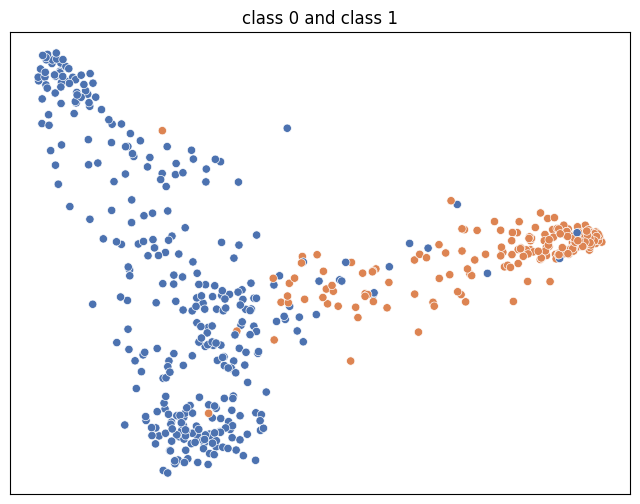

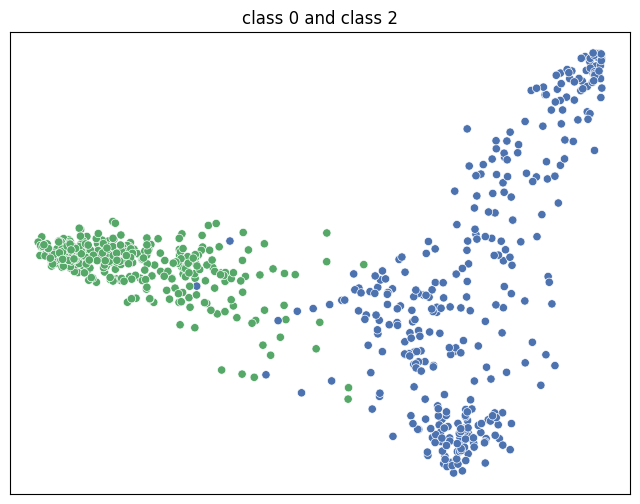

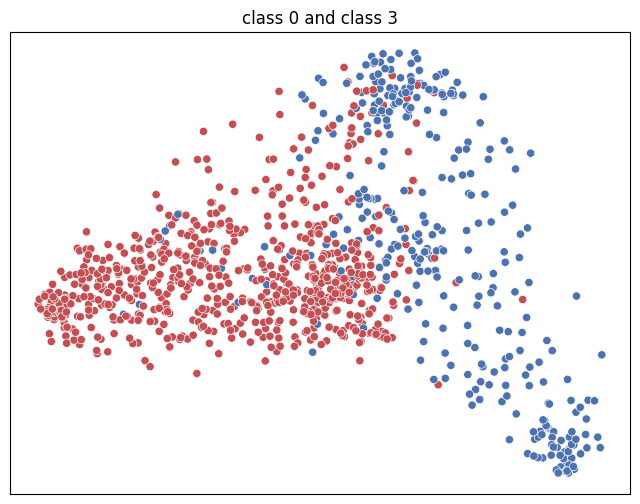

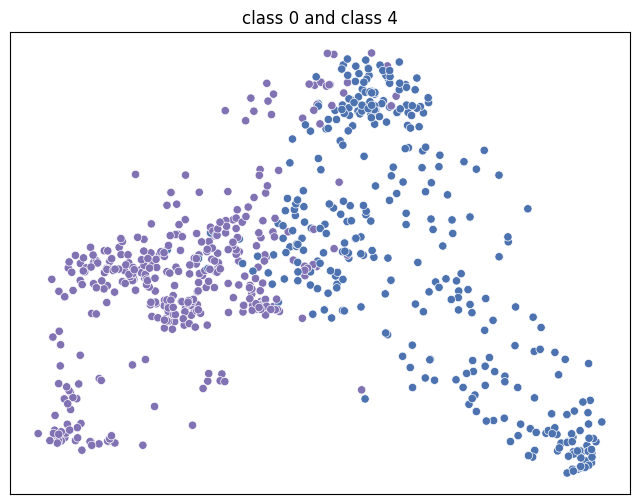

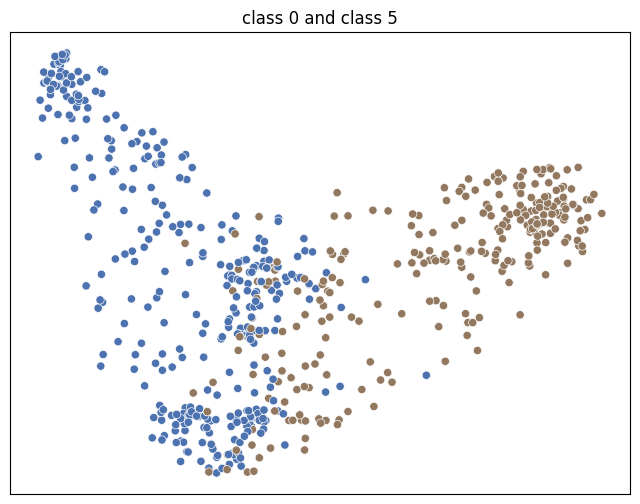

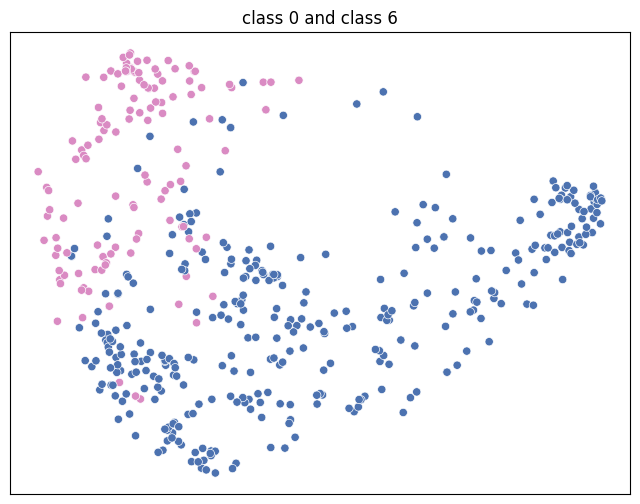

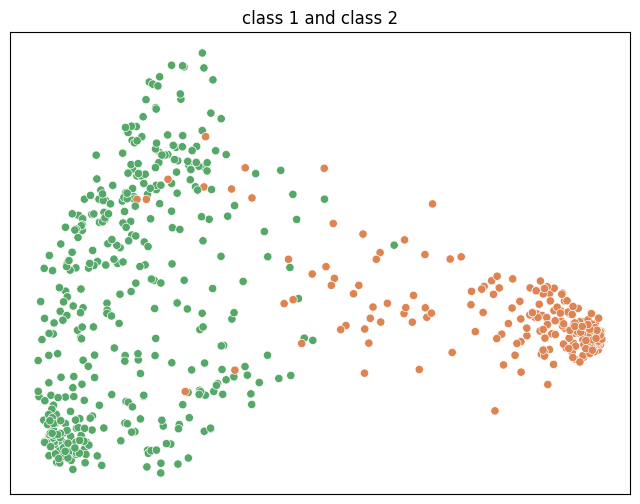

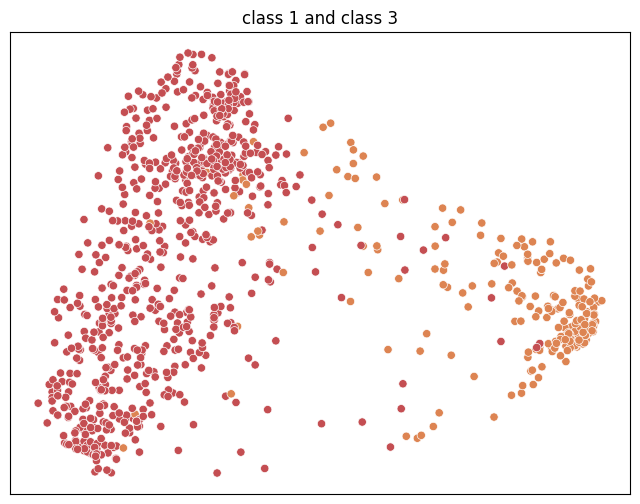

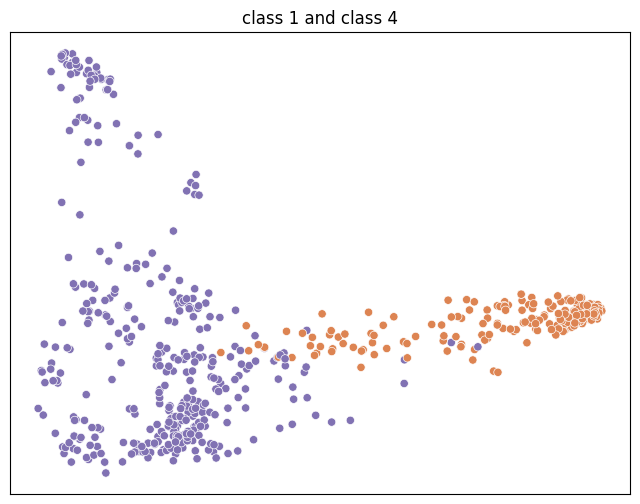

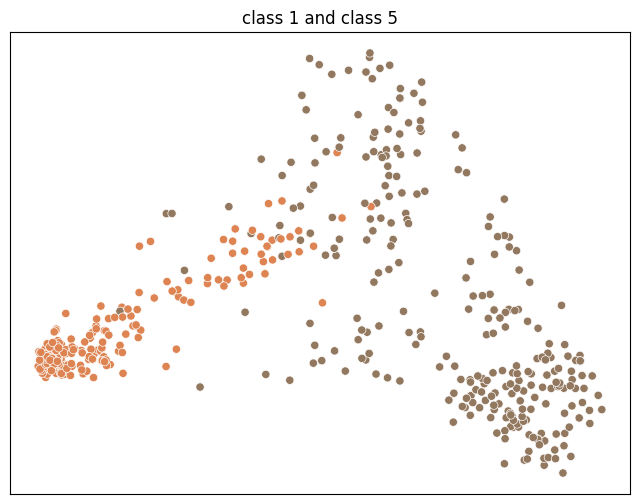

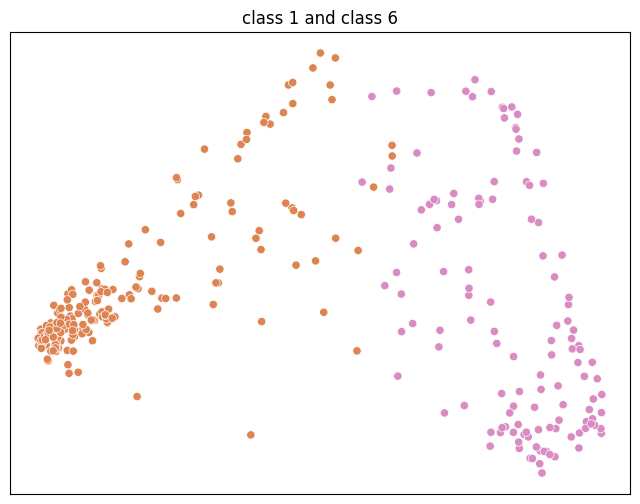

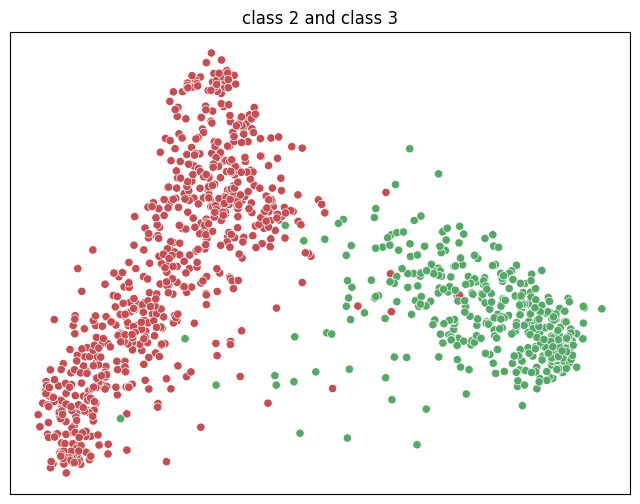

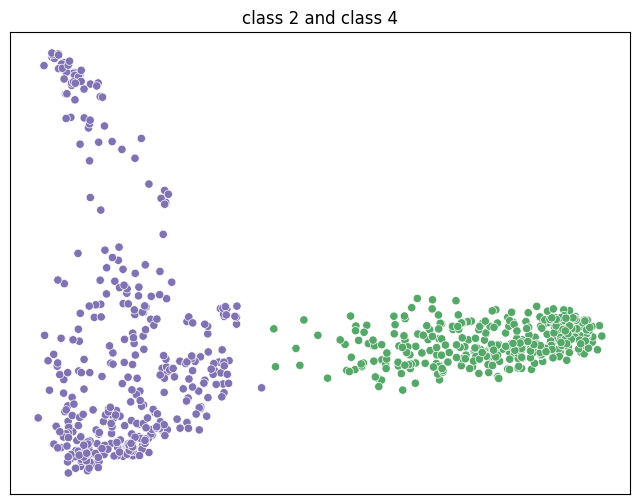

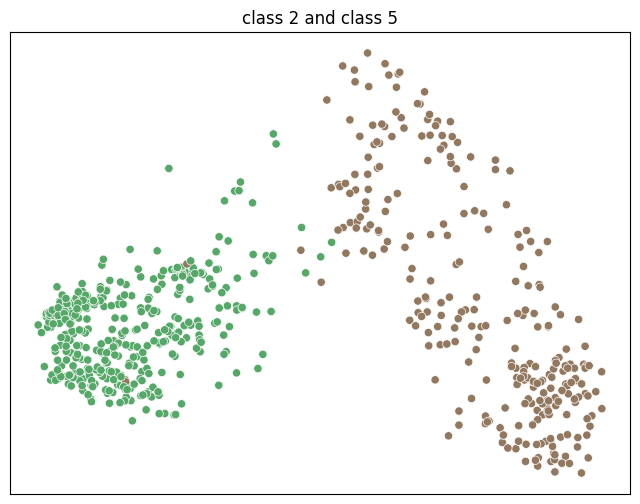

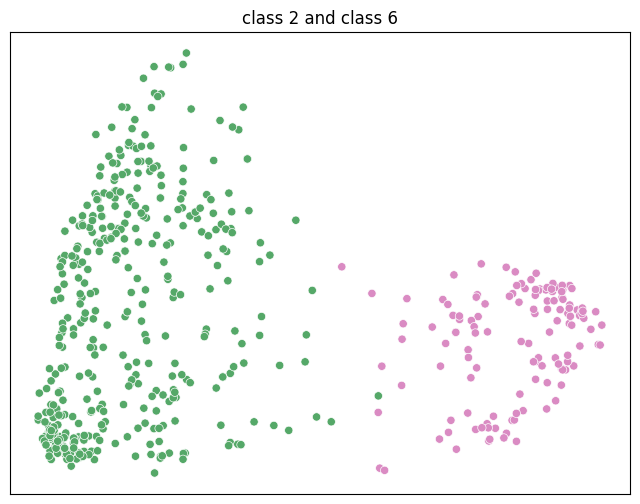

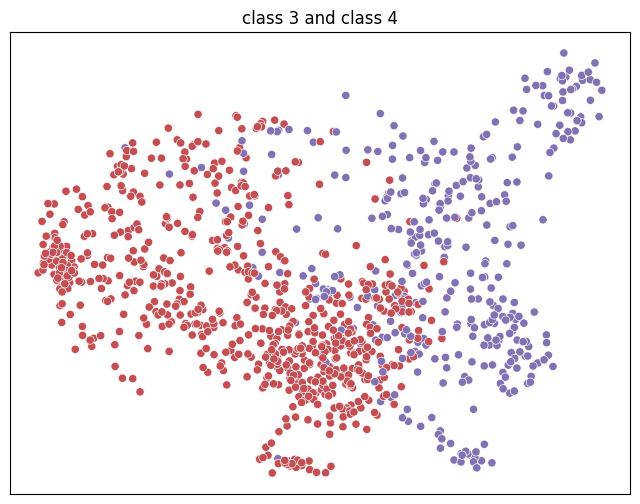

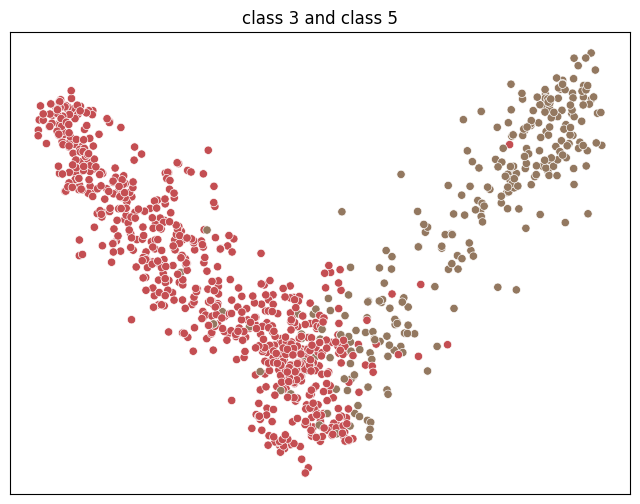

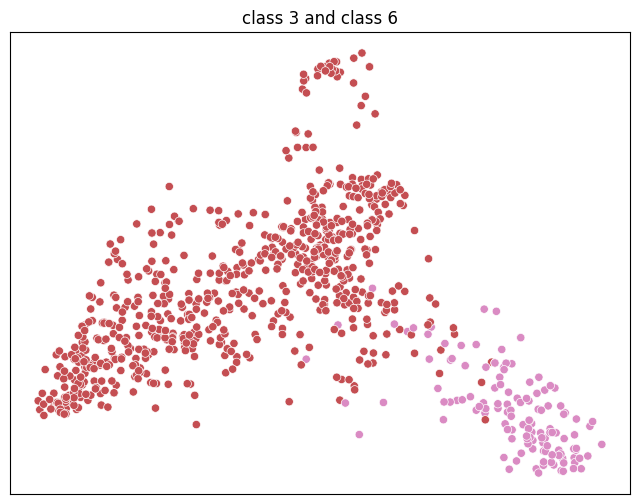

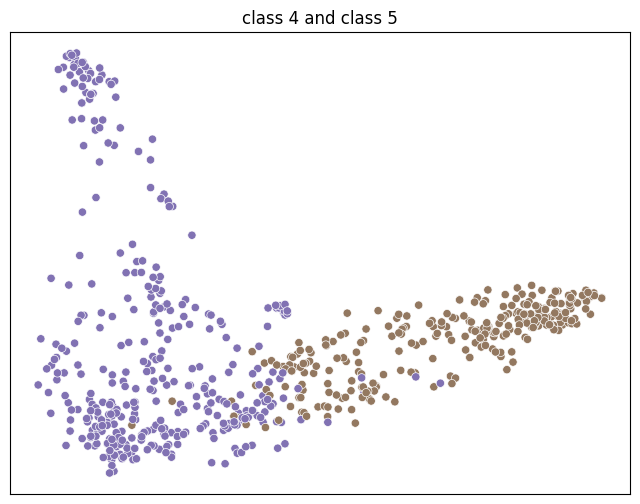

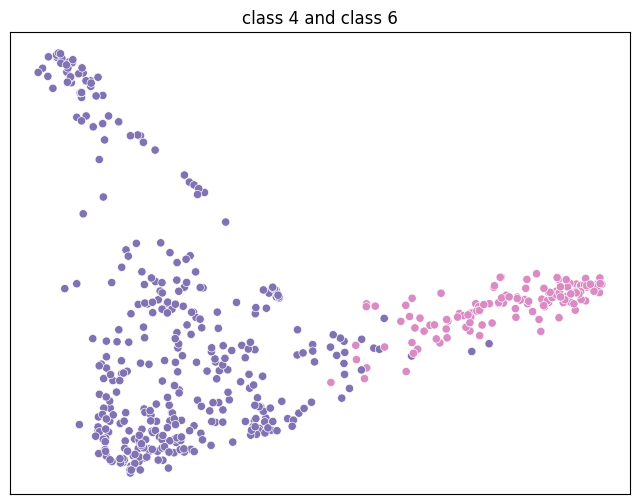

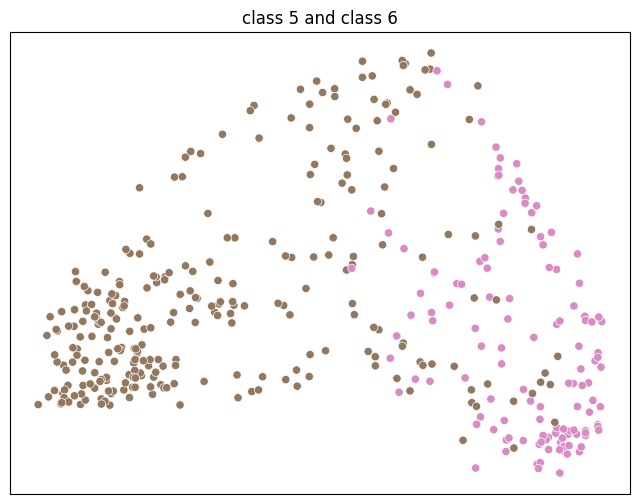

In [ ]:
import pandas as pd

model.eval()
#X_embd = model(data.x.to("cuda"), data.edge_index.to("cuda")).detach().cpu().numpy()
X_embd = model(data.x, data.edge_index).detach().cpu().numpy()

y = data.y

node_index = list(largest_cc.nodes)
X_embd = X_embd[node_index]
y = data.y.numpy()[node_index]


color_dict = dict({0:"#4C72B0",
                    1: "#DD8452",
                    2: "#55A868",
                    3: "#C44E52",
                    4: "#8172B3",
                    5:"#937860",
                    6:"#DA8BC3",
                    7: "#8C8C8C",
                    8: "#CCB974",
                    9:"#64B5CD"})


for i in range(0, 7):
    for j in range(0, 7):
        if i < j:
            X_embd_tmp = X_embd[(y==i)|(y==j)]
            y_tmp = y[(y == i) | (y == j)]


            pca = PCA(n_components=2, svd_solver='full')
            X_embedded_2 = pca.fit_transform(X_embd_tmp)

            df2 = pd.DataFrame()
            df2['x'] = X_embedded_2[:, 0]
            df2['y'] = X_embedded_2[:, 1]
            df2['cluster'] = y_tmp

            fig, ax = plt.subplots(figsize=(8, 6))
            g = sns.scatterplot(ax=ax, data=df2, x="x", y="y", hue="cluster", palette=color_dict, legend =False)
            g.set(xlabel=None)
            g.set(ylabel=None)
            plt.tick_params(top=False, bottom=False, left=False, right=False,labelleft=False, labelbottom=False)
            plt.title( f"class {i} and class {j}" )
            plt.show()

### Code-2 ✔️

#### Utilities

In [ ]:
import os
import logging
import json
import numpy as np
import torch
import torch.nn
import scipy.sparse as sp


def sort_dataset(data, labels, num_classes=10, stack=False):
    """Sort dataset based on classes.

    Parameters:
        data (np.ndarray): data array
        labels (np.ndarray): one dimensional array of class labels
        num_classes (int): number of classes
        stack (bol): combine sorted data into one numpy array

    Return:
        sorted data (np.ndarray), sorted_labels (np.ndarray)

    """
    sorted_data = [[] for _ in range(num_classes)]
    for i, lbl in enumerate(labels):
        sorted_data[lbl].append(data[i])
    sorted_data = [np.stack(class_data) for class_data in sorted_data]
    sorted_labels = [np.repeat(i, (len(sorted_data[i]))) for i in range(num_classes)]
    if stack:
        sorted_data = np.vstack(sorted_data)
        sorted_labels = np.hstack(sorted_labels)
    return sorted_data, sorted_labels

def init_pipeline(model_dir, headers=None):
    """Initialize folder and .csv logger."""
    # project folder
    os.makedirs(model_dir)
    os.makedirs(os.path.join(model_dir, 'checkpoints'))
    os.makedirs(os.path.join(model_dir, 'figures'))
    os.makedirs(os.path.join(model_dir, 'plabels'))
    if headers is None:
        headers = ["epoch", "step", "loss", "discrimn_loss_e", "compress_loss_e",
            "discrimn_loss_t",  "compress_loss_t"]
    create_csv(model_dir, 'losses.csv', headers)
    print("project dir: {}".format(model_dir))

def create_csv(model_dir, filename, headers):
    """Create .csv file with filename in model_dir, with headers as the first line
    of the csv. """
    csv_path = os.path.join(model_dir, filename)
    if os.path.exists(csv_path):
        os.remove(csv_path)
    with open(csv_path, 'w+') as f:
        f.write(','.join(map(str, headers)))
    return csv_path

def save_params(model_dir, params):
    """Save params to a .json file. Params is a dictionary of parameters."""
    path = os.path.join(model_dir, 'params.json')
    with open(path, 'w') as f:
        json.dump(params, f, indent=2, sort_keys=True)

def update_params(model_dir, pretrain_dir):
    """Updates architecture and feature dimension from pretrain directory
    to new directoy. """
    params = load_params(model_dir)
    old_params = load_params(pretrain_dir)
    params['arch'] = old_params["arch"]
    params['fd'] = old_params['fd']
    save_params(model_dir, params)

def load_params(model_dir):
    """Load params.json file in model directory and return dictionary."""
    _path = os.path.join(model_dir, "params.json")
    with open(_path, 'r') as f:
        _dict = json.load(f)
    return _dict

def save_state(model_dir, *entries, filename='losses.csv'):
    """Save entries to csv. Entries is list of numbers. """
    csv_path = os.path.join(model_dir, filename)
    assert os.path.exists(csv_path), 'CSV file is missing in project directory.'
    with open(csv_path, 'a') as f:
        f.write('\n'+','.join(map(str, entries)))

def save_ckpt(model_dir, net, epoch):
    """Save PyTorch checkpoint to ./checkpoints/ directory in model directory. """
    torch.save(net.state_dict(), os.path.join(model_dir, 'checkpoints',
        'model-epoch{}.pt'.format(epoch)))

def save_labels(model_dir, labels, epoch):
    """Save labels of a certain epoch to directory. """
    path = os.path.join(model_dir, 'plabels', f'epoch{epoch}.npy')
    np.save(path, labels)

def compute_accuracy(y_pred, y_true):
    """Compute accuracy by counting correct classification. """
    assert y_pred.shape == y_true.shape
    return 1 - np.count_nonzero(y_pred - y_true) / y_true.size

def clustering_accuracy(labels_true, labels_pred):
    """Compute clustering accuracy."""
    from sklearn.metrics.cluster import supervised
    from scipy.optimize import linear_sum_assignment
    labels_true, labels_pred = supervised.check_clusterings(labels_true, labels_pred)
    value = supervised.contingency_matrix(labels_true, labels_pred)
    [r, c] = linear_sum_assignment(-value)
    return value[r, c].sum() / len(labels_true)




def label_to_membership(targets, num_classes=None):
    """Generate a true membership matrix, and assign value to current Pi.

    Parameters:
        targets (np.ndarray): matrix with one hot labels

    Return:
        Pi: membership matirx, shape (num_classes, num_samples, num_samples)

    """
    targets = one_hot(targets, num_classes)
    num_samples, num_classes = targets.shape
    Pi = np.zeros(shape=(num_classes, num_samples, num_samples))
    for j in range(len(targets)):
        k = np.argmax(targets[j])
        Pi[k, j, j] = 1.
    return Pi


def adjacency_to_membership(adjacency):
    Pi = np.apply_along_axis(np.diag, 1, adjacency)
    return Pi


def membership_to_label(membership):
    """Turn a membership matrix into a list of labels."""
    _, num_classes, num_samples, _ = membership.shape
    labels = np.zeros(num_samples)
    for i in range(num_samples):
        labels[i] = np.argmax(membership[:, i, i])
    return labels

def one_hot(labels_int, n_classes):
    """Turn labels into one hot vector of K classes. """
    labels_onehot = torch.zeros(size=(len(labels_int), n_classes)).float()
    for i, y in enumerate(labels_int):
        labels_onehot[i, y] = 1.
    return labels_onehot

def sparse2coarse(targets):
    """CIFAR100 Coarse Labels. """
    coarse_targets = [ 4,  1, 14,  8,  0,  6,  7,  7, 18,  3,  3, 14,  9, 18,  7, 11,  3,
                       9,  7, 11,  6, 11,  5, 10,  7,  6, 13, 15,  3, 15,  0, 11,  1, 10,
                      12, 14, 16,  9, 11,  5,  5, 19,  8,  8, 15, 13, 14, 17, 18, 10, 16,
                       4, 17,  4,  2,  0, 17,  4, 18, 17, 10,  3,  2, 12, 12, 16, 12,  1,
                       9, 19,  2, 10,  0,  1, 16, 12,  9, 13, 15, 13, 16, 19,  2,  4,  6,
                      19,  5,  5,  8, 19, 18,  1,  2, 15,  6,  0, 17,  8, 14, 13]
    return np.array(coarse_targets)[targets]


def index_to_mask(index, size):
    mask = torch.zeros(size, dtype=torch.bool, device=index.device)
    mask[index] = 1
    return mask



def random_planetoid_splits(data, num_classes, lcc_mask = None):
    # Set new random planetoid splits:
    # * 20 * num_classes labels for training
    # * 500 labels for validation
    # * 1000 labels for testing

    indices = []
    if lcc_mask is not None:
        for i in range(num_classes):
            index = (data.y[lcc_mask] == i).nonzero().view(-1)
            index = index[torch.randperm(index.size(0))]
            indices.append(index)
    else:
        for i in range(num_classes):
            index = (data.y == i).nonzero().view(-1)
            index = index[torch.randperm(index.size(0))]
            indices.append(index)

    train_index = torch.cat([i[:20] for i in indices], dim=0)

    rest_index = torch.cat([i[20:] for i in indices], dim=0)
    rest_index = rest_index[torch.randperm(rest_index.size(0))]

    data.train_mask = index_to_mask(train_index, size=data.num_nodes)
    data.val_mask = index_to_mask(rest_index[:500], size=data.num_nodes)
    data.test_mask = index_to_mask(rest_index[500:1500], size=data.num_nodes)

    return data


def random_coauthor_amazon_splits(data, num_classes, lcc_mask = None):
    # Set random coauthor/co-purchase splits:
    # * 20 * num_classes labels for training
    # * 30 * num_classes labels for validation
    # rest labels for testing

    indices = []
    if lcc_mask is not None:
        for i in range(num_classes):
            index = (data.y[lcc_mask] == i).nonzero().view(-1)
            index = index[torch.randperm(index.size(0))]
            indices.append(index)
    else:
        for i in range(num_classes):
            index = (data.y == i).nonzero().view(-1)
            index = index[torch.randperm(index.size(0))]
            indices.append(index)

    train_index = torch.cat([i[:20] for i in indices], dim=0)
    val_index = torch.cat([i[20:50] for i in indices], dim=0)

    rest_index = torch.cat([i[50:] for i in indices], dim=0)
    rest_index = rest_index[torch.randperm(rest_index.size(0))]

    data.train_mask = index_to_mask(train_index, size=data.num_nodes)
    data.val_mask = index_to_mask(val_index, size=data.num_nodes)
    data.test_mask = index_to_mask(rest_index, size=data.num_nodes)

    return data


def sparse_to_tuple(sparse_mx, insert_batch=False):
    """Convert sparse matrix to tuple representation."""
    """Set insert_batch=True if you want to insert a batch dimension."""
    def to_tuple(mx):
        if not sp.isspmatrix_coo(mx):
            mx = mx.tocoo()
        if insert_batch:
            coords = np.vstack((np.zeros(mx.row.shape[0]), mx.row, mx.col)).transpose()
            values = mx.data
            shape = (1,) + mx.shape
        else:
            coords = np.vstack((mx.row, mx.col)).transpose()
            values = mx.data
            shape = mx.shape
        return coords, values, shape

    if isinstance(sparse_mx, list):
        for i in range(len(sparse_mx)):
            sparse_mx[i] = to_tuple(sparse_mx[i])
    else:
        sparse_mx = to_tuple(sparse_mx)

    return sparse_mx


def normalize_adj(adj):
    """Symmetrically normalize adjacency matrix."""
    adj = sp.coo_matrix(adj)
    rowsum = np.array(adj.sum(1))
    d_inv_sqrt = np.power(rowsum, -0.5).flatten()
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
    return adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt).tocoo()


def normalize_adj_row(adj):
    """Symmetrically normalize adjacency matrix."""
    adj = sp.coo_matrix(adj)
    # print( "adj:", adj )
    rowsum = np.array(adj.sum(1))
    # d_inv_sqrt = np.power(rowsum, -0.5).flatten()
    d_inv_sqrt = np.power(rowsum, -1).flatten()
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
    return adj.dot(d_mat_inv_sqrt).tocoo()


def preprocess_adj(adj):
    """Preprocessing of adjacency matrix for simple GCN model and conversion to tuple representation."""
    adj_normalized = normalize_adj(adj + sp.eye(adj.shape[0]))
    return sparse_to_tuple(adj_normalized)


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

#### Model

In [ ]:

import numpy as np
from torch_geometric.nn.conv import MessagePassing
from torch_scatter import scatter_add
import torch_geometric.transforms as T
from torch_geometric.utils import add_remaining_self_loops
from torch.nn import Parameter
import torch.nn.functional as F
import torch.nn as nn
import torch
import math



def glorot(tensor):
    if tensor is not None:
        stdv = math.sqrt(6.0 / (tensor.size(-2) + tensor.size(-1)))
        tensor.data.uniform_(-stdv, stdv)


def zeros(tensor):
    if tensor is not None:
        tensor.data.fill_(0)


class GCNConv(MessagePassing):

    def __init__(self,
                 in_channels,
                 out_channels,
                 improved=False,
                 cached=False,
                 bias=True,
                 normalize=True,
                 **kwargs):
        super(GCNConv, self).__init__(aggr='add', **kwargs)

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.improved = improved
        self.cached = cached
        self.normalize = normalize

        self.weight = Parameter(torch.Tensor(in_channels, out_channels))

        if bias:
            self.bias = Parameter(torch.Tensor(out_channels))
        else:
            self.register_parameter('bias', None)

        self.reset_parameters()

    def reset_parameters(self):
        glorot(self.weight)
        zeros(self.bias)
        self.cached_result = None
        self.cached_num_edges = None

    @staticmethod
    def norm(edge_index, num_nodes, edge_weight=None, improved=False, dtype=None):
        if edge_weight is None:
            edge_weight = torch.ones((edge_index.size(1), ), dtype=dtype, device=edge_index.device)

        fill_value = 1 if not improved else 2
        edge_index, edge_weight = add_remaining_self_loops(edge_index, edge_weight, fill_value, num_nodes)

        row, col = edge_index
        deg = scatter_add(edge_weight, row, dim=0, dim_size=num_nodes)
        deg_inv_sqrt = deg.pow(-0.5)
        deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0

        return edge_index, deg_inv_sqrt[row] * edge_weight * deg_inv_sqrt[col]

    def forward(self, x, edge_index, edge_weight=None):
        """"""
        x = torch.matmul(x, self.weight)

        if self.cached and self.cached_result is not None:
            if edge_index.size(1) != self.cached_num_edges:
                raise RuntimeError(
                    'Cached {} number of edges, but found {}. Please '
                    'disable the caching behavior of this layer by removing '
                    'the `cached=True` argument in its constructor.'.format(
                        self.cached_num_edges, edge_index.size(1)))

        if not self.cached or self.cached_result is None:
            self.cached_num_edges = edge_index.size(1)
            if self.normalize:
                edge_index, norm = self.norm(edge_index, x.size(self.node_dim), edge_weight, self.improved, x.dtype)
            else:
                norm = edge_weight
            self.cached_result = edge_index, norm

        edge_index, norm = self.cached_result

        return self.propagate(edge_index, x=x, norm=norm)

    def message(self, x_j, norm):
        return norm.view(-1, 1) * x_j if norm is not None else x_j

    def update(self, aggr_out):
        if self.bias is not None:
            aggr_out = aggr_out + self.bias
        return aggr_out

    def __repr__(self):
        return '{}({}, {})'.format(self.__class__.__name__, self.in_channels,
                                   self.out_channels)


class Encoder(torch.nn.Module):
    def __init__(self,
                 in_channels: int,
                 hidden_channels: int,
                 out_channels: int,
                 activation,
                 base_model=GCNConv,
                 k: int = 2):
        super(Encoder, self).__init__()
        self.base_model = base_model
        self.k = k
        self.conv_1 = self.base_model(in_channels,  hidden_channels)
        self.conv_0 = self.base_model(in_channels,  out_channels)

        for i in range(2, 10):
            exec("self.conv_%s = self.base_model( hidden_channels, hidden_channels )" % i)

        self.conv_last_layer = self.base_model(hidden_channels, out_channels)
        self.conv_layers_list = [self.conv_1, self.conv_2, self.conv_3]
        self.conv_layers_list.append(self.conv_last_layer)
        self.activation = activation
        self.prelu = nn.PReLU(out_channels)
        self.lin0 = nn.Linear(in_channels, hidden_channels, bias=True)
        self.lin1 = nn.Linear(hidden_channels, hidden_channels, bias=True)
        self.lin2 = nn.Linear(hidden_channels, hidden_channels, bias=True)
        self.lin3 = nn.Linear(hidden_channels, out_channels, bias=True)

    def forward(self, x: torch.Tensor, edge_index: torch.Tensor):
        if self.k == 0:
            x = self.conv_0( x, edge_index )
            x = F.normalize(x, p=1)
            return x
        for i in range(0, self.k):
            x = self.activation(self.conv_layers_list[i](x, edge_index))
        x = self.conv_last_layer(x, edge_index)
        x = F.normalize(x, p=1)
        return x


class Model(torch.nn.Module):
    def __init__(self,encoder: Encoder):
        super(Model, self).__init__()
        self.encoder: Encoder = encoder

    def forward(self, x: torch.Tensor, edge_index: torch.Tensor) -> torch.Tensor:
        return self.encoder(x, edge_index)

#### Evaluation

In [ ]:
## some code in this file is based on https://github.com/CRIPAC-DIG/GRACE/blob/master/eval.py
import numpy as np
import functools

from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import normalize, OneHotEncoder
from torch import take


def repeat(n_times):
    def decorator(f):
        @functools.wraps(f)
        def wrapper(*args, **kwargs):
            results = [f(*args, **kwargs) for _ in range(n_times)]
            statistics = {}
            for key in results[0].keys():
                values = [r[key] for r in results]
                statistics[key] = {
                    'mean': np.mean(values),
                    'std': np.std(values)}
            print_statistics(statistics, f.__name__)
            return statistics
        return wrapper
    return decorator


def prob_to_one_hot(y_pred):
    ret = np.zeros(y_pred.shape, np.bool)
    indices = np.argmax(y_pred, axis=1)
    for i in range(y_pred.shape[0]):
        ret[i][indices[i]] = True
    return ret


def print_statistics(statistics, function_name):
    print(f'(E) | {function_name}:', end=' ')
    for i, key in enumerate(statistics.keys()):
        mean = statistics[key]['mean']
        std = statistics[key]['std']
        print(f'{key}={mean:.4f}+-{std:.4f}', end='')
        if i != len(statistics.keys()) - 1:
            print(',', end=' ')
        else:
            print()


def label_classification(embeddings, y, ratio = None, train_mask = None, test_mask = None, val_mask = None):
    X = embeddings.detach().cpu().numpy()
    Y = y.detach().cpu().numpy()
    Y = Y.reshape(-1, 1)

    X = normalize(X, norm='l2')
    X_train, X_test, y_train, y_test = X[train_mask], X[test_mask], Y[train_mask], Y[test_mask]

    clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=500).fit(X_train,  y_train.ravel() )
    onehot_encoder = OneHotEncoder(categories='auto').fit(Y)
    y_test = onehot_encoder.transform(y_test).toarray().astype(np.bool)

    y_pred = clf.predict_proba(X_test)
    y_pred = prob_to_one_hot(y_pred)

    micro = f1_score(y_test, y_pred, average="micro")
    macro = f1_score(y_test, y_pred, average="macro")
    acc = accuracy_score( y_test, y_pred, )

    return {
        'F1Mi': micro,
        'F1Ma': macro,
        "acc" : acc
    }

#### Train & Test (G2R)

In [ ]:
import numpy as np
from torch_geometric.utils import to_dense_adj
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.utils import add_remaining_self_loops
from torch_scatter import scatter_add
from torch_geometric.datasets import Planetoid, CitationFull
from torch_geometric.datasets import Planetoid
from torch_geometric.datasets import Coauthor, Amazon
import torch_geometric.transforms as T
from torch.nn import Parameter
import torch.nn.functional as F
import torch.nn as nn
import torch
import math
import argparse
import os
import logging

# from eval import label_classification
# from model import Model, GCNConv, Encoder
# from utils import random_coauthor_amazon_splits, random_planetoid_splits, normalize_adj_row, normalize_adj



class MaximalCodingRateReduction(torch.nn.Module):
    ## This function is based on https://github.com/ryanchankh/mcr2/blob/master/loss.py
    def __init__(self, gam1=1.0, gam2=1.0, eps=0.01):
        super(MaximalCodingRateReduction, self).__init__()
        self.gam1 = gam1
        self.gam2 = gam2
        self.eps = eps

    def projection(self, z: torch.Tensor) -> torch.Tensor:
        z = F.normalize(z, dim=0)
        return z

    def compute_discrimn_loss_empirical(self, W):
        """Empirical Discriminative Loss."""
        p, m = W.shape
        I = torch.eye(p).cuda()
        scalar = p / (m * self.eps)
        logdet = torch.logdet(I + self.gam1 * scalar * W.matmul(W.T))
        return logdet / 2.

    def compute_compress_loss_empirical_all(self, W, Pi):
        """Empirical Compressive Loss."""
        p, m = W.shape
        k, _ = Pi.shape
        sum_trPi = torch.sum(Pi)

        I = torch.eye(p).cuda()
        compress_loss = 0.
        for j in range(k):
            trPi = torch.sum(Pi[j]) + 1e-8
            scalar = p / (trPi * self.eps)
            a = W.T * Pi[j].view(-1, 1)
            a = a.T
            log_det = torch.logdet(I + scalar * a.matmul(W.T))
            compress_loss += log_det * trPi / m
        num = data.x.shape[0]
        compress_loss = compress_loss / 2 * (num / sum_trPi)
        return compress_loss

    def forward(self, X, A):
        i = np.random.randint(A.shape[0], size=args.num_node_batch)
        A = A[i,::]
        A = A.cpu().numpy()
        W = X.T
        Pi = A
        Pi = torch.tensor(Pi, dtype=torch.float32).cuda()

        discrimn_loss_empi = self.compute_discrimn_loss_empirical(W)
        compress_loss_empi = self.compute_compress_loss_empirical_all(W, Pi)
        total_loss_empi = - self.gam2 * discrimn_loss_empi + compress_loss_empi
        return total_loss_empi



def train(model: Model, x, edge_index, A, MaximalCodingRateReduction: MaximalCodingRateReduction):
    model.train()
    optimizer.zero_grad()
    z = model(x, edge_index)
    loss = MaximalCodingRateReduction(z, A)
    loss.backward()
    optimizer.step()
    return loss.item()


def test(model: Model, x, edge_index, y, train_mask=None, test_mask=None):
    model.eval()
    z = model(x, edge_index)
    x = z.detach().cpu().numpy()
    res = label_classification(z, y, train_mask=train_mask, test_mask=test_mask)
    return res






if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--dataset', type=str, default='Cora')
    parser.add_argument('--learning_rate', type=float, default=0.001)
    parser.add_argument('--num_hidden', type=int, default=512)
    parser.add_argument('--num_out', type=int, default=512)
    parser.add_argument('--gam1', type=float, default=0.5)
    parser.add_argument('--gam2', type=float, default=0.5)
    parser.add_argument('--eps', type=float, default=0.05)
    parser.add_argument('--activation', type=str, default="relu")
    parser.add_argument('--num_epochs', type=int, default=40)
    parser.add_argument('--num_layers', type=int, default=1)
    parser.add_argument('--num_node_batch', type=int, default=100)
    parser.add_argument('--weight_decay', type=float, default=0.0001)
    parser.add_argument('--input_dir', type=str, default="../data")
    parser.add_argument('--seed', type=int, default=31415)
    parser.add_argument('--round', type=int, default=0)
    parser.add_argument('--exp_name', type=str, default="G2R")
    parser.add_argument('--split', type=str, default="random")
    parser.add_argument("-f", required=False)
    args = parser.parse_args()

    print("Args:{}".format(args))

    seed = args.seed
    learning_rate = args.learning_rate
    num_hidden = args.num_hidden
    num_out = args.num_out
    activation = ({'relu': F.relu, 'prelu': nn.PReLU()})[args.activation]
    base_model = GCNConv
    num_epochs = args.num_epochs
    weight_decay = args.weight_decay

    torch.manual_seed(seed)
    np.random.seed(seed)
    torch.set_num_threads(3)


    path = os.path.join(args.input_dir)

    if args.dataset == "Cora":
        dataset = Planetoid(path, args.dataset, transform=T.NormalizeFeatures())
        data = dataset[0]
        data.num_classes = dataset.num_classes
        if args.split == "random":
            data = random_planetoid_splits(data, dataset.num_classes, lcc_mask=None)

    elif args.dataset == "CiteSeer":
        dataset = Planetoid(path, args.dataset, transform=T.NormalizeFeatures())
        # dataset = Planetoid(path, args.dataset)
        data = dataset[0]
        data.num_classes = dataset.num_classes
        if args.split == "random":
            data = random_planetoid_splits(data, dataset.num_classes, lcc_mask=None)

    elif args.dataset == "PubMed":
        dataset = Planetoid(path, args.dataset, transform=T.NormalizeFeatures())
        # dataset = Planetoid(path, args.dataset)
        data = dataset[0]
        data.num_classes = dataset.num_classes
        if args.split == "random":
            data = random_planetoid_splits(data, dataset.num_classes, lcc_mask=None)

    elif args.dataset == "CoraFull":
        dataset = CitationFull(path, "cora")
        data = dataset[0]
        data.num_classes = dataset.num_classes
        data = random_coauthor_amazon_splits(data, dataset.num_classes, lcc_mask=None)

    elif args.dataset == "Photo":
        dataset = Amazon(path, args.dataset, transform=T.NormalizeFeatures())
        data = dataset[0]
        data.num_classes = dataset.num_classes
        data = random_coauthor_amazon_splits(data, dataset.num_classes, lcc_mask=None)

    elif args.dataset == "Computers":
        dataset = Amazon(path, args.dataset, transform=T.NormalizeFeatures())
        # dataset = Amazon(path, args.dataset)
        data = dataset[0]
        data.num_classes = dataset.num_classes
        data = random_coauthor_amazon_splits(data, dataset.num_classes, lcc_mask=None)

    elif args.dataset == "CS":
        dataset = Coauthor(path, args.dataset, transform=T.NormalizeFeatures())
        data = dataset[0]
        data.num_classes = dataset.num_classes
        data = random_coauthor_amazon_splits(data, dataset.num_classes, lcc_mask=None)

    elif args.dataset == "Physics":
        dataset = Coauthor(path, args.dataset, transform=T.NormalizeFeatures())
        data = dataset[0]
        data.num_classes = dataset.num_classes
        data = random_coauthor_amazon_splits(data, dataset.num_classes, lcc_mask=None)
    else:
        print("Input dataset name!!")
        raise NotImplementedError

    print("Dataset:", args.dataset)
    print("Number of Nodes:", data.x.shape[0])
    print("Number of Nodes Features:", data.x.shape[1])
    print("Number of Edges:", data.edge_index.shape[1])


    node_num = data.x.shape[0]
    num_features = data.x.shape[1]

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    data = data.to(device)

    A = to_dense_adj(data.edge_index)[0].cpu()
    A = normalize_adj_row(A)
    A = torch.from_numpy(A.todense())


    encoder = Encoder(in_channels=num_features,out_channels=num_out, hidden_channels=num_hidden, activation=activation,base_model=base_model, k=args.num_layers).to(device)
    model = Model(encoder=encoder).to(device)
    coding_rate_loss = MaximalCodingRateReduction(gam1=args.gam1, gam2=args.gam2, eps=args.eps).to(device)
    optimizer = torch.optim.Adam( list(model.parameters()) + list(coding_rate_loss.parameters()), lr=learning_rate, weight_decay=weight_decay)


    for epoch in range(1, num_epochs + 1):
        loss = train(model, data.x, data.edge_index, A, coding_rate_loss)
        val_res = test(model, data.x, data.edge_index, data.y, train_mask=data.train_mask.cpu().numpy(), test_mask=data.val_mask.cpu().numpy())
        test_res = test(model, data.x, data.edge_index, data.y, train_mask=data.train_mask.cpu().numpy(), test_mask=data.test_mask.cpu().numpy())
        print("Epoch: {:03d}, val_acc: {:.4f}, test_acc:{:.4f}".format(epoch, val_res["acc"], test_res["acc"] ))

## AGE Model ✔️

### Installing

In [ ]:
!pip install munkres

In [ ]:
!git clone https://github.com/thunlp/AGE.git

Cloning into 'AGE'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 56 (delta 15), reused 40 (delta 8), pack-reused 0
Receiving objects: 100% (56/56), 13.30 MiB | 6.93 MiB/s, done.
Resolving deltas: 100% (15/15), done.


### Metrics

In [ ]:
# Clustering_Metrics

from sklearn import metrics
from munkres import Munkres
import numpy as np
from sklearn.manifold import TSNE
import matplotlib

matplotlib.use('Agg')
import matplotlib.pyplot as plt


class clustering_metrics:
    def __init__(self, true_label, predict_label):
        self.true_label = true_label
        self.pred_label = predict_label

    def clusteringAcc(self):
        # best mapping between true_label and predict label
        l1 = list(set(self.true_label))
        numclass1 = len(l1)

        l2 = list(set(self.pred_label))
        numclass2 = len(l2)

        if numclass1 != numclass2:
            print('Class Not equal, Error!!!!')
            return 0

        cost = np.zeros((numclass1, numclass2), dtype=int)
        for i, c1 in enumerate(l1):
            mps = [i1 for i1, e1 in enumerate(self.true_label) if e1 == c1]
            for j, c2 in enumerate(l2):
                mps_d = [i1 for i1 in mps if self.pred_label[i1] == c2]

                cost[i][j] = len(mps_d)

        # match two clustering results by Munkres algorithm
        m = Munkres()
        cost = cost.__neg__().tolist()

        indexes = m.compute(cost)

        # get the match results
        new_predict = np.zeros(len(self.pred_label))
        for i, c in enumerate(l1):
            # correponding label in l2:
            c2 = l2[indexes[i][1]]

            # ai is the index with label==c2 in the pred_label list
            ai = [ind for ind, elm in enumerate(self.pred_label) if elm == c2]
            new_predict[ai] = c

        acc = metrics.accuracy_score(self.true_label, new_predict)
        f1_macro = metrics.f1_score(self.true_label, new_predict, average='macro')
        precision_macro = metrics.precision_score(self.true_label, new_predict, average='macro')
        recall_macro = metrics.recall_score(self.true_label, new_predict, average='macro')
        f1_micro = metrics.f1_score(self.true_label, new_predict, average='micro')
        precision_micro = metrics.precision_score(self.true_label, new_predict, average='micro')
        recall_micro = metrics.recall_score(self.true_label, new_predict, average='micro')
        return acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro

    def evaluationClusterModelFromLabel(self, tqdm):
        nmi = metrics.normalized_mutual_info_score(self.true_label, self.pred_label)
        adjscore = metrics.adjusted_rand_score(self.true_label, self.pred_label)
        acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro = self.clusteringAcc()

        return acc, nmi, adjscore

    @staticmethod
    def plot(X, fig, col, size, true_labels):
        ax = fig.add_subplot(1, 1, 1)
        for i, point in enumerate(X):
            ax.scatter(point[0], point[1], lw=0, s=size, c=col[true_labels[i]])

    def plotClusters(self, tqdm, hidden_emb, true_labels):
        tqdm.write('Start plotting using TSNE...')
        # Doing dimensionality reduction for plotting
        tsne = TSNE(n_components=2)
        X_tsne = tsne.fit_transform(hidden_emb)
        # Plot figure
        fig = plt.figure()
        self.plot(X_tsne, fig, ['red', 'green', 'blue', 'brown', 'purple', 'yellow', 'pink', 'orange'], 40, true_labels)
        plt.axis("off")
        fig.savefig("plot.png", dpi=120)
        tqdm.write("Finished plotting")

### Set Layer

In [ ]:
# Layer

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.modules.module import Module
from torch.nn.parameter import Parameter
import numpy as np

class GraphConvolution(Module):
    """
    Simple GCN layer, similar to https://arxiv.org/abs/1609.02907
    """

    def __init__(self, in_features, out_features, dropout=0., act=F.relu):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.dropout = dropout
        self.act = act
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)

    def forward(self, input, adj):
        input = F.dropout(input, self.dropout, self.training)
        support = torch.mm(input, self.weight)
        output = torch.spmm(adj, support)
        output = self.act(output)
        return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'

class SampleDecoder(Module):
    def __init__(self, act=torch.sigmoid):
        super(SampleDecoder, self).__init__()
        self.act = act

    def forward(self, zx, zy):
        sim = (zx * zy).sum(1)
        sim = self.act(sim)

        return sim

### Optimizer

In [ ]:
# Optimizer

import torch
import torch.nn.modules.loss
import torch.nn.functional as F

def loss_function(adj_preds, adj_labels, n_nodes):
    cost = 0.
    cost += F.binary_cross_entropy_with_logits(adj_preds, adj_labels)

    return cost

### Utilities

In [ ]:
# utils

import pickle as pkl

import networkx as nx
import numpy as np
import scipy.sparse as sp
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score
import sklearn.preprocessing as preprocess

def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)


def load_data(dataset):
    # load the data: x, tx, allx, graph
    names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph']
    objects = []
    if dataset == 'wiki':
        adj, features, label = load_wiki()
        return adj, features, label, 0, 0, 0

    for i in range(len(names)):
        '''
        fix Pickle incompatibility of numpy arrays between Python 2 and 3
        https://stackoverflow.com/questions/11305790/pickle-incompatibility-of-numpy-arrays-between-python-2-and-3
        '''
        with open("/content/AGE/data/ind.{}.{}".format(dataset, names[i]), 'rb') as rf:
            u = pkl._Unpickler(rf)
            u.encoding = 'latin1'
            cur_data = u.load()
            objects.append(cur_data)
        # objects.append(
        #     pkl.load(open("data/ind.{}.{}".format(dataset, names[i]), 'rb')))
    x, y, tx, ty, allx, ally, graph = tuple(objects)
    test_idx_reorder = parse_index_file(
        "/content/AGE/data/ind.{}.test.index".format(dataset))
    test_idx_range = np.sort(test_idx_reorder)

    if dataset == 'citeseer':
        # Fix citeseer dataset (there are some isolated nodes in the graph)
        # Find isolated nodes, add them as zero-vecs into the right position
        test_idx_range_full = range(
            min(test_idx_reorder), max(test_idx_reorder) + 1)
        tx_extended = sp.lil_matrix((len(test_idx_range_full), x.shape[1]))
        tx_extended[test_idx_range - min(test_idx_range), :] = tx
        tx = tx_extended
        ty_extended = np.zeros((len(test_idx_range_full), y.shape[1]))
        ty_extended[test_idx_range - min(test_idx_range), :] = ty
        ty = ty_extended

    features = sp.vstack((allx, tx)).tolil()
    features[test_idx_reorder, :] = features[test_idx_range, :]
    features = torch.FloatTensor(np.array(features.todense()))
    adj = nx.adjacency_matrix(nx.from_dict_of_lists(graph))

    labels = np.vstack((ally, ty))
    labels[test_idx_reorder, :] = labels[test_idx_range, :]

    idx_test = test_idx_range.tolist()
    idx_train = range(len(y))
    idx_val = range(len(y), len(y) + 500)

    train_mask = sample_mask(idx_train, labels.shape[0])
    val_mask = sample_mask(idx_val, labels.shape[0])
    test_mask = sample_mask(idx_test, labels.shape[0])

    y_train = np.zeros(labels.shape)
    y_val = np.zeros(labels.shape)
    y_test = np.zeros(labels.shape)
    y_train[train_mask, :] = labels[train_mask, :]
    y_val[val_mask, :] = labels[val_mask, :]
    y_test[test_mask, :] = labels[test_mask, :]

    return adj, features, np.argmax(labels, 1), idx_train, idx_val, idx_test

def load_wiki():
    f = open('/content/AGE/data/graph.txt','r')
    adj, xind, yind = [], [], []
    for line in f.readlines():
        line = line.split()

        xind.append(int(line[0]))
        yind.append(int(line[1]))
        adj.append([int(line[0]), int(line[1])])
    f.close()
    ##print(len(adj))

    f = open('/content/AGE/data/group.txt','r')
    label = []
    for line in f.readlines():
        line = line.split()
        label.append(int(line[1]))
    f.close()

    f = open('/content/AGE/data/tfidf.txt','r')
    fea_idx = []
    fea = []
    adj = np.array(adj)
    adj = np.vstack((adj, adj[:,[1,0]]))
    adj = np.unique(adj, axis=0)

    labelset = np.unique(label)
    labeldict = dict(zip(labelset, range(len(labelset))))
    label = np.array([labeldict[x] for x in label])
    adj = sp.csr_matrix((np.ones(len(adj)), (adj[:,0], adj[:,1])), shape=(len(label), len(label)))

    for line in f.readlines():
        line = line.split()
        fea_idx.append([int(line[0]), int(line[1])])
        fea.append(float(line[2]))
    f.close()

    fea_idx = np.array(fea_idx)
    features = sp.csr_matrix((fea, (fea_idx[:,0], fea_idx[:,1])), shape=(len(label), 4973)).toarray()
    scaler = preprocess.MinMaxScaler()
    #features = preprocess.normalize(features, norm='l2')
    features = scaler.fit_transform(features)
    features = torch.FloatTensor(features)

    return adj, features, label


def parse_index_file(filename):
    index = []
    for line in open(filename):
        index.append(int(line.strip()))
    return index


def sparse_to_tuple(sparse_mx):
    if not sp.isspmatrix_coo(sparse_mx):
        sparse_mx = sparse_mx.tocoo()
    coords = np.vstack((sparse_mx.row, sparse_mx.col)).transpose()
    values = sparse_mx.data
    shape = sparse_mx.shape
    return coords, values, shape


def mask_test_edges(adj):
    # Function to build test set with 10% positive links
    # NOTE: Splits are randomized and results might slightly deviate from reported numbers in the paper.
    # TODO: Clean up.

    # Remove diagonal elements
    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
    adj.eliminate_zeros()
    # Check that diag is zero:
    assert np.diag(adj.todense()).sum() == 0

    adj_triu = sp.triu(adj)
    adj_tuple = sparse_to_tuple(adj_triu)
    edges = adj_tuple[0]
    edges_all = sparse_to_tuple(adj)[0]
    num_test = int(np.floor(edges.shape[0] / 10.))
    num_val = int(np.floor(edges.shape[0] / 20.))

    all_edge_idx = list(range(edges.shape[0]))
    np.random.shuffle(all_edge_idx)
    val_edge_idx = all_edge_idx[:num_val]
    test_edge_idx = all_edge_idx[num_val:(num_val + num_test)]
    test_edges = edges[test_edge_idx]
    val_edges = edges[val_edge_idx]
    train_edges = np.delete(edges, np.hstack([test_edge_idx, val_edge_idx]), axis=0)

    def ismember(a, b, tol=5):
        rows_close = np.all(np.round(a - b[:, None], tol) == 0, axis=-1)
        return np.any(rows_close)

    test_edges_false = []
    while len(test_edges_false) < len(test_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue
        if ismember([idx_i, idx_j], edges_all):
            continue
        if test_edges_false:
            if ismember([idx_j, idx_i], np.array(test_edges_false)):
                continue
            if ismember([idx_i, idx_j], np.array(test_edges_false)):
                continue
        test_edges_false.append([idx_i, idx_j])

    val_edges_false = []
    while len(val_edges_false) < len(val_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue
        if ismember([idx_i, idx_j], train_edges):
            continue
        if ismember([idx_j, idx_i], train_edges):
            continue
        if ismember([idx_i, idx_j], val_edges):
            continue
        if ismember([idx_j, idx_i], val_edges):
            continue
        if val_edges_false:
            if ismember([idx_j, idx_i], np.array(val_edges_false)):
                continue
            if ismember([idx_i, idx_j], np.array(val_edges_false)):
                continue
        val_edges_false.append([idx_i, idx_j])

    #assert ~ismember(test_edges_false, edges_all)
    #assert ~ismember(val_edges_false, edges_all)
    #assert ~ismember(val_edges, train_edges)
    #assert ~ismember(test_edges, train_edges)
    #assert ~ismember(val_edges, test_edges)

    data = np.ones(train_edges.shape[0])

    # Re-build adj matrix
    adj_train = sp.csr_matrix((data, (train_edges[:, 0], train_edges[:, 1])), shape=adj.shape)
    adj_train = adj_train + adj_train.T

    # NOTE: these edge lists only contain single direction of edge!
    return adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false

def decompose(adj, dataset, norm='sym', renorm=True):
    adj = sp.coo_matrix(adj)
    ident = sp.eye(adj.shape[0])
    if renorm:
        adj_ = adj + ident
    else:
        adj_ = adj

    rowsum = np.array(adj_.sum(1))

    if norm == 'sym':
        degree_mat_inv_sqrt = sp.diags(np.power(rowsum, -0.5).flatten())
        adj_normalized = adj_.dot(degree_mat_inv_sqrt).transpose().dot(degree_mat_inv_sqrt).tocoo()
        laplacian = ident - adj_normalized
    evalue, evector = np.linalg.eig(laplacian.toarray())
    np.save(dataset + ".npy", evalue)
    print(max(evalue))
    exit(1)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    n, bins, patches = ax.hist(evalue, 50, facecolor='g')
    plt.xlabel('Eigenvalues')
    plt.ylabel('Frequncy')
    fig.savefig("eig_renorm_" + dataset + ".png")



def preprocess_graph(adj, layer, norm='sym', renorm=True):
    adj = sp.coo_matrix(adj)
    ident = sp.eye(adj.shape[0])
    if renorm:
        adj_ = adj + ident
    else:
        adj_ = adj

    rowsum = np.array(adj_.sum(1))

    if norm == 'sym':
        degree_mat_inv_sqrt = sp.diags(np.power(rowsum, -0.5).flatten())
        adj_normalized = adj_.dot(degree_mat_inv_sqrt).transpose().dot(degree_mat_inv_sqrt).tocoo()
        laplacian = ident - adj_normalized
    elif norm == 'left':
        degree_mat_inv_sqrt = sp.diags(np.power(rowsum, -1.).flatten())
        adj_normalized = degree_mat_inv_sqrt.dot(adj_).tocoo()
        laplacian = ident - adj_normalized


    reg = [2/3] * (layer)

    adjs = []
    for i in range(len(reg)):
        adjs.append(ident-(reg[i] * laplacian))
    return adjs

def laplacian(adj):
    rowsum = np.array(adj.sum(1))
    degree_mat = sp.diags(rowsum.flatten())
    lap = degree_mat - adj
    return torch.FloatTensor(lap.toarray())

def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)


def get_roc_score(emb, adj_orig, edges_pos, edges_neg):
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Predict on test set of edges
    adj_rec = np.dot(emb, emb.T)
    preds = []
    pos = []
    for e in edges_pos:
        preds.append(sigmoid(adj_rec[e[0], e[1]]))
        pos.append(adj_orig[e[0], e[1]])

    preds_neg = []
    neg = []
    for e in edges_neg:
        preds_neg.append(sigmoid(adj_rec[e[0], e[1]]))
        neg.append(adj_orig[e[0], e[1]])

    preds_all = np.hstack([preds, preds_neg])
    labels_all = np.hstack([np.ones(len(preds)), np.zeros(len(preds))])
    roc_score = roc_auc_score(labels_all, preds_all)
    ap_score = average_precision_score(labels_all, preds_all)

    return roc_score, ap_score

### Model

In [ ]:
# model

import torch
import torch.nn as nn
import torch.nn.functional as F

#from layers import *

class LinTrans(nn.Module):
    def __init__(self, layers, dims):
        super(LinTrans, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(layers):
            self.layers.append(nn.Linear(dims[i], dims[i+1]))
        self.dcs = SampleDecoder(act=lambda x: x)

    def scale(self, z):

        zmax = z.max(dim=1, keepdim=True)[0]
        zmin = z.min(dim=1, keepdim=True)[0]
        z_std = (z - zmin) / (zmax - zmin)
        z_scaled = z_std

        return z_scaled

    def forward(self, x):
        out = x
        for layer in self.layers:
            out = layer(out)
        out = self.scale(out)
        out = F.normalize(out)
        return out

class LogReg(nn.Module):
    def __init__(self, ft_in, nb_classes):
        super(LogReg, self).__init__()
        self.fc = nn.Linear(ft_in, nb_classes)


    def weights_init(self, m):
        if isinstance(m, nn.Linear):
            torch.nn.init.xavier_uniform_(m.weight.data)
            if m.bias is not None:
                m.bias.data.fill_(0.0)

    def forward(self, seq):
        ret = self.fc(seq)
        return ret

### Training & Test

In [ ]:
# link_pred == Train

from __future__ import division
from __future__ import print_function
import os, sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
#sys.path.append(os.path.join(os.path.dirname(os.path.realpath(__file__)), os.pardir))

# For replicating the experiments
SEED = 42
import argparse
import time
import random
import numpy as np
import scipy.sparse as sp
import torch

np.random.seed(SEED)
torch.manual_seed(SEED)
from torch import optim
import torch.nn.functional as F
#from model import LinTrans, LogReg
#from optimizer import loss_function
#from utils import *
from sklearn.cluster import SpectralClustering, KMeans
#from clustering_metric import clustering_metrics
from tqdm import tqdm
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt

parser = argparse.ArgumentParser()
parser.add_argument('--gnnlayers', type=int, default=1, help="Number of gnn layers")
parser.add_argument('--linlayers', type=int, default=1, help="Number of hidden layers")
parser.add_argument('--epochs', type=int, default=400, help='Number of epochs to train.')
parser.add_argument('--dims', type=int, default=[500], help='Number of units in hidden layer 1.')
parser.add_argument('--lr', type=float, default=0.001, help='Initial learning rate.')
parser.add_argument('--upth_st', type=float, default=0.0011, help='Upper Threshold start.')
parser.add_argument('--lowth_st', type=float, default=0.1, help='Lower Threshold start.')
parser.add_argument('--upth_ed', type=float, default=0.001, help='Upper Threshold end.')
parser.add_argument('--lowth_ed', type=float, default=0.5, help='Lower Threshold end.')
parser.add_argument('--upd', type=int, default=10, help='Update epoch.')
parser.add_argument('--bs', type=int, default=10000, help='Batchsize.')
parser.add_argument('--dataset', type=str, default='cora', help='type of dataset.')
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='Disables CUDA training.')
parser.add_argument('-f', required="Flase")
args = parser.parse_args()
args.cuda = not args.no_cuda and torch.cuda.is_available()

if args.cuda is True:
    print('Using GPU')
    torch.cuda.manual_seed(SEED)
    os.environ["CUDA_VISIBLE_DEVICES"] = "5"

def clustering(Cluster, feature, true_labels):
    f_adj = np.matmul(feature, np.transpose(feature))
    predict_labels = Cluster.fit_predict(f_adj)

    cm = clustering_metrics(true_labels, predict_labels)
    db = -metrics.davies_bouldin_score(f_adj, predict_labels)
    acc, nmi, adj = cm.evaluationClusterModelFromLabel(tqdm)

    return db, acc, nmi, adj

def update_similarity(z, upper_threshold, lower_treshold, pos_num, neg_num):
    f_adj = np.matmul(z, np.transpose(z))
    cosine = f_adj
    cosine = cosine.reshape([-1,])
    pos_num = round(upper_threshold * len(cosine))
    neg_num = round((1-lower_treshold) * len(cosine))

    pos_inds = np.argpartition(-cosine, pos_num)[:pos_num]
    neg_inds = np.argpartition(cosine, neg_num)[:neg_num]

    return np.array(pos_inds), np.array(neg_inds)

def update_threshold(upper_threshold, lower_treshold, up_eta, low_eta):
    upth = upper_threshold + up_eta
    lowth = lower_treshold + low_eta
    return upth, lowth


def gae_for(args):
    print("Using {} dataset".format(args.dataset))
    if args.dataset == 'cora':
        n_clusters = 7
        Cluster = SpectralClustering(n_clusters=n_clusters, affinity = 'precomputed', random_state=0)
    elif args.dataset == 'citeseer':
        n_clusters = 6
        Cluster = SpectralClustering(n_clusters=n_clusters, affinity = 'precomputed', random_state=0)
    elif args.dataset == 'pubmed':
        n_clusters = 3
        Cluster = SpectralClustering(n_clusters=n_clusters, affinity = 'precomputed', random_state=0)
    elif args.dataset == 'wiki':
        n_clusters = 17
        Cluster = SpectralClustering(n_clusters=n_clusters, affinity = 'precomputed', random_state=0)

    adj, features, true_labels, idx_train, idx_val, idx_test = load_data(args.dataset)
    n_nodes, feat_dim = features.shape
    dims = [feat_dim] + args.dims

    layers = args.linlayers
    # Store original adjacency matrix (without diagonal entries) for later

    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
    adj.eliminate_zeros()
    adj_orig = adj

    adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false = mask_test_edges(adj)
    adj = adj_train
    n = adj.shape[0]

    adj_norm_s = preprocess_graph(adj, args.gnnlayers, norm='sym', renorm=True)
    sm_fea_s = sp.csr_matrix(features).toarray()

    print('Laplacian Smoothing...')
    for a in adj_norm_s:
        sm_fea_s = a.dot(sm_fea_s)
    adj_1st = (adj + sp.eye(n)).toarray()

    adj_label = torch.FloatTensor(adj_1st)

    model = LinTrans(layers, dims)

    optimizer = optim.Adam(model.parameters(), lr=args.lr)

    sm_fea_s = torch.FloatTensor(sm_fea_s)
    adj_label = adj_label.reshape([-1,])

    if args.cuda:
        model.cuda()
        inx = sm_fea_s.cuda()
        adj_label = adj_label.cuda()

    # inx = sm_fea_s

    pos_num = len(adj.indices)
    neg_num = n_nodes*n_nodes-pos_num

    up_eta = (args.upth_ed - args.upth_st) / (args.epochs/args.upd)
    low_eta = (args.lowth_ed - args.lowth_st) / (args.epochs/args.upd)

    pos_inds, neg_inds = update_similarity(normalize(sm_fea_s.numpy()), args.upth_st, args.lowth_st, pos_num, neg_num)
    upth, lowth = update_threshold(args.upth_st, args.lowth_st, up_eta, low_eta)

    bs = min(args.bs, len(pos_inds))
    length = len(pos_inds)

    pos_inds_cuda = torch.LongTensor(pos_inds).cuda()
    # pos_inds_cuda = torch.LongTensor(pos_inds)
    best_lp = 0.
    print('Start Training...')
    for epoch in tqdm(range(args.epochs)):

        st, ed = 0, bs
        batch_num = 0
        model.train()
        length = len(pos_inds)

        while ( ed <= length ):
            sampled_neg = torch.LongTensor(np.random.choice(neg_inds, size=ed-st)).cuda()
            # sampled_neg = torch.LongTensor(np.random.choice(neg_inds, size=ed-st))
            sampled_inds = torch.cat((pos_inds_cuda[st:ed], sampled_neg), 0)
            t = time.time()
            optimizer.zero_grad()
            xind = sampled_inds // n_nodes
            yind = sampled_inds % n_nodes
            x = torch.index_select(inx, 0, xind)
            y = torch.index_select(inx, 0, yind)
            zx = model(x)
            zy = model(y)
            batch_label = torch.cat((torch.ones(ed-st), torch.zeros(ed-st))).cuda()
            # batch_label = torch.cat((torch.ones(ed-st), torch.zeros(ed-st)))
            batch_pred = model.dcs(zx, zy)
            loss = loss_function(adj_preds=batch_pred, adj_labels=batch_label, n_nodes=ed-st)

            loss.backward()
            cur_loss = loss.item()
            optimizer.step()

            st = ed
            batch_num += 1
            if ed < length and ed + bs >= length:
                ed += length - ed
            else:
                ed += bs


        if (epoch + 1) % args.upd == 0:
            model.eval()
            mu = model(inx)
            hidden_emb = mu.cpu().data.numpy()
            upth, lowth = update_threshold(upth, lowth, up_eta, low_eta)
            pos_inds, neg_inds = update_similarity(hidden_emb, upth, lowth, pos_num, neg_num)
            bs = min(args.bs, len(pos_inds))
            pos_inds_cuda = torch.LongTensor(pos_inds).cuda()
            # pos_inds_cuda = torch.LongTensor(pos_inds)
            val_auc, val_ap = get_roc_score(hidden_emb, adj_orig, val_edges, val_edges_false)
            if val_auc + val_ap >= best_lp:
                best_lp = val_auc + val_ap
                best_emb = hidden_emb
            tqdm.write("Epoch: {}, train_loss_gae={:.5f}, time={:.5f}".format(
                epoch + 1, cur_loss, time.time() - t))



    tqdm.write("Optimization Finished!")
    auc_score, ap_score = get_roc_score(best_emb, adj_orig, test_edges, test_edges_false)
    tqdm.write('Test AUC score: ' + str(auc_score))
    tqdm.write('Test AP score: ' + str(ap_score))


if __name__ == '__main__':
    gae_for(args)

## LGNN/GNN Model ✔️

### Loading

In [ ]:
#Load

import numpy as np
import torch
import torch.nn as nn
from torch.nn import init
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F


def compute_operators(W, J):
    N = W.shape[0]
    d = W.sum(1)
    D = np.diag(d)
    QQ = W.copy()
    WW = np.zeros([N, N, J + 2])
    WW[:, :, 0] = np.eye(N)
    for j in range(J):
        WW[:, :, j + 1] = QQ.copy()
        QQ = np.minimum(np.dot(QQ, QQ), np.ones(QQ.shape))
    WW[:, :, J + 1] = D
    WW = np.reshape(WW, [N, N, J + 2])
    x = np.reshape(d, [N, 1])
    return WW, x


def get_Pm(W):
    N = W.shape[0]
    W = W * (np.ones([N, N]) - np.eye(N))
    M = int(W.sum()) // 2
    p = 0
    Pm = np.zeros([N, M * 2])
    for n in range(N):
        for m in range(n+1, N):
            if (W[n][m]==1):
                Pm[n][p] = 1
                Pm[m][p] = 1
                Pm[n][p + M] = 1
                Pm[m][p + M] = 1
                p += 1
    return Pm

def get_Pd(W):
    N = W.shape[0]
    W = W * (np.ones([N, N]) - np.eye(N))
    M = int(W.sum()) // 2
    p = 0
    Pd = np.zeros([N, M * 2])
    for n in range(N):
        for m in range(n+1, N):
            if (W[n][m]==1):
                Pd[n][p] = 1
                Pd[m][p] = -1
                Pd[n][p + M] = -1
                Pd[m][p + M] = 1
                p += 1
    return Pd

def get_P(W):
    P = np.concatenate((np.expand_dims(get_Pm(W), 2), np.expand_dims(get_Pd(W), 2)), axis=2)
    return P

def get_W_lg(W):
    W_lg = np.transpose(get_Pm(W)).dot(get_Pd(W))
    return W_lg

def get_NB(W):
    product = np.transpose(get_Pm(W)).dot(get_Pd(W))
    M_doubled = product.shape[0]
    NB = product * (product > 0)
    for i in range(M_doubled):
        NB[i, i] = 0
    return NB

def get_NB_2(W):
    Pm = get_Pm(W)
    Pd = get_Pd(W)
    Pf = (Pm + Pd) / 2
    Pt = (Pm - Pd) / 2
    NB = np.transpose(Pt).dot(Pf) * (1 - np.transpose(Pf).dot(Pt))
    return NB

def get_lg_inputs(W, J):
    if (W.ndim == 3):
        W = W[0, :, :]
    WW, x = compute_operators(W, J)
    # W_lg = get_W_lg(W)
    # W_lg = get_NB(W)
    W_lg = get_NB_2(W)
    WW_lg, y = compute_operators(W_lg, J)
    P = get_P(W)
    x = x.astype(float)
    y = y.astype(float)
    WW = WW.astype(float)
    WW_lg = WW_lg.astype(float)
    P = P.astype(float)
    WW = torch.tensor(WW, requires_grad=True).unsqueeze(0)
    x = torch.tensor(x, requires_grad=True).unsqueeze(0)
    WW_lg = torch.tensor(WW_lg, requires_grad=True).unsqueeze(0)
    y = torch.tensor(y, requires_grad=True).unsqueeze(0)
    P = torch.tensor(P, requires_grad=True).unsqueeze(0)
    return WW, x, WW_lg, y, P

def get_gnn_inputs(W, J):
    W = W[0, :, :]
    WW, x = compute_operators(W, J)
    WW = WW.astype(float)
    WW = torch.tensor(WW, requires_grad=True).unsqueeze(0)
    x = torch.tensor(x, requires_grad=True).unsqueeze(0)
    return WW, x

### Data Generator

In [ ]:
# data_generator

import numpy as np
import torch
import torch.nn as nn
from torch.nn import init
from torch import optim
import torch.nn.functional as F
#from load import get_Pm, get_Pd, get_W_lg


class Generator(object):
    def __init__(self, N_train=50, N_test=100, generative_model='SBM_multiclass', p_SBM=0.8, q_SBM=0.2, n_classes=2, path_dataset='', num_examples_train=100, num_examples_test=10):
        self.N_train = N_train
        self.N_test = N_test
        self.generative_model = generative_model
        self.p_SBM = p_SBM
        self.q_SBM = q_SBM
        self.n_classes = n_classes
        self.path_dataset = path_dataset
        self.data_train = None
        self.data_test = None
        self.num_examples_train = num_examples_train
        self.num_examples_test = num_examples_test

    def SBM(self, p, q, N):
        W = np.zeros((N, N))

        p_prime = 1 - np.sqrt(1 - p)
        q_prime = 1 - np.sqrt(1 - q)

        n = N // 2

        W[:n, :n] = np.random.binomial(1, p, (n, n))
        W[n:, n:] = np.random.binomial(1, p, (N-n, N-n))
        W[:n, n:] = np.random.binomial(1, q, (n, N-n))
        W[n:, :n] = np.random.binomial(1, q, (N-n, n))
        W = W * (np.ones(N) - np.eye(N))
        W = np.maximum(W, W.transpose())

        perm = torch.randperm(N).numpy()
        blockA = perm < n
        labels = blockA * 2 - 1

        W_permed = W[perm]
        W_permed = W_permed[:, perm]
        return W_permed, labels

    def SBM_multiclass(self, p, q, N, n_classes):
        p_prime = 1 - np.sqrt(1 - p)
        q_prime = 1 - np.sqrt(1 - q)

        prob_mat = np.ones((N, N)) * q_prime

        n = N // n_classes

        for i in range(n_classes):
            prob_mat[i * n : (i+1) * n, i * n : (i+1) * n] = p_prime

        W = np.random.rand(N, N) < prob_mat
        W = W.astype(int)

        W = W * (np.ones(N) - np.eye(N))
        W = np.maximum(W, W.transpose())

        perm = torch.randperm(N).numpy()
        labels = (perm // n)

        W_permed = W[perm]
        W_permed = W_permed[:, perm]
        return W_permed, labels


    def create_dataset(self, directory, is_training):
        if (self.generative_model == 'SBM_multiclass'):
            if not os.path.exists(directory):
                os.mkdir(directory)
            if is_training:
                graph_size = self.N_train
                num_graphs = self.num_examples_train
            else:
                graph_size = self.N_test
                num_graphs = self.num_examples_test
            dataset = []
            for i in range(num_graphs):
                W, labels = self.SBM_multiclass(self.p_SBM, self.q_SBM, graph_size, self.n_classes)
                Pm = get_Pm(W)
                Pd = get_Pd(W)
                NB = get_W_lg(W)
                example = {}
                example['W'] = W
                example['labels'] = labels
                dataset.append(example)
            if is_training:
                print ('Saving the training dataset')
            else:
                print ('Saving the testing dataset')
            np.save(directory + '/dataset.npy', dataset)
            if is_training:
                self.data_train = dataset
            else:
                self.data_test = dataset
        else:
            raise ValueError('Generative model {} not supported'.format(self.generative_model))


    def prepare_data(self):
        train_directory = self.generative_model + '_nc' + str(self.n_classes) + '_p' + str(self.p_SBM) + '_q' + str(self.q_SBM) + '_gstr' + str(self.N_train) + '_numtr' + str(self.num_examples_train)

        train_path = os.path.join(self.path_dataset, train_directory)
        if os.path.exists(train_path + '/dataset.npy'):
            print('Reading training dataset at {}'.format(train_path))
            self.data_train = np.load(train_path + '/dataset.npy')
        else:
            print('Creating training dataset.')
            self.create_dataset(train_path, is_training=True)
        # load test dataset
        test_directory = self.generative_model + '_nc' + str(self.n_classes) + '_p' + str(self.p_SBM) + '_q' + str(self.q_SBM) + '_gste' + str(self.N_test) + '_numte' + str(self.num_examples_test)
        test_path = os.path.join(self.path_dataset, test_directory)
        if os.path.exists(test_path + '/dataset.npy'):
            print('Reading testing dataset at {}'.format(test_path))
            self.data_test = np.load(test_path + '/dataset.npy')
        else:
            print('Creating testing dataset.')
            self.create_dataset(test_path, is_training=False)


    def sample_single(self, i, is_training=True):
        if is_training:
            dataset = self.data_train
        else:
            dataset = self.data_test
        example = dataset[i]
        if (self.generative_model == 'SBM_multiclass'):
            W_np = example['W']
            labels = np.expand_dims(example['labels'], 0)
            labels_var = torch.from_numpy(labels)
            if is_training:
                labels_var.requires_grad = True
            return W_np, labels_var


    def sample_otf_single(self, is_training=True, cuda=True):
        if is_training:
            N = self.N_train
        else:
            N = self.N_test
        if self.generative_model == 'SBM':
            W, labels = self.SBM(self.p_SBM, self.q_SBM, N)
        elif self.generative_model == 'SBM_multiclass':
            W, labels = self.SBM_multiclass(self.p_SBM, self.q_SBM, N, self.n_classes)
        else:
            raise ValueError('Generative model {} not supported'.format(self.generative_model))

        labels = np.expand_dims(labels, 0)
        labels = torch.from_numpy(labels)
        W = np.expand_dims(W, 0)
        return W, labels

### Set Losses

In [ ]:
# losses

import numpy as np
import math

import torch
import torch.nn as nn
from torch.nn import init
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()

if torch.cuda.is_available():
    dtype = torch.cuda.FloatTensor
    dtype_l = torch.cuda.LongTensor
    # torch.cuda.manual_seed(0)
else:
    dtype = torch.FloatTensor
    dtype_l = torch.LongTensor


def from_scores_to_labels_multiclass_batch(pred):
    labels_pred = np.argmax(pred, axis = 2).astype(int)
    return labels_pred

def compute_accuracy_multiclass_batch(labels_pred, labels):
    overlap = (labels_pred == labels).astype(int)
    acc = np.mean(labels_pred == labels)
    return acc

def compute_loss_multiclass(pred_llh, labels, n_classes):
    loss = 0
    permutations = permuteposs(n_classes)
    batch_size = pred_llh.data.cpu().shape[0]
    for i in range(batch_size):
        pred_llh_single = pred_llh[i, :, :]
        labels_single = labels[i, :]
        for j in range(permutations.shape[0]):
            permutation = permutations[j, :]
            labels_under_perm = torch.from_numpy(permutations[j, labels_single.data.cpu().numpy().astype(int)])
            loss_under_perm = criterion(pred_llh_single, labels_under_perm.type(dtype_l))

            if (j == 0):
                loss_single = loss_under_perm
            else:
                loss_single = torch.min(loss_single, loss_under_perm)

        loss += loss_single
    return loss

def compute_accuracy_multiclass(pred_llh, labels, n_classes):
    pred_llh = pred_llh.data.cpu().numpy()
    labels = labels.data.cpu().numpy()
    batch_size = pred_llh.shape[0]
    pred_labels = from_scores_to_labels_multiclass_batch(pred_llh)
    acc = 0
    permutations = permuteposs(n_classes)
    for i in range(batch_size):
        pred_labels_single = pred_labels[i, :]
        labels_single = labels[i, :]
        for j in range(permutations.shape[0]):
            permutation = permutations[j, :]
            labels_under_perm = permutations[j, labels_single.astype(int)]

            acc_under_perm = compute_accuracy_multiclass_batch(pred_labels_single, labels_under_perm)
            if (j == 0):
                acc_single = acc_under_perm
            else:
                acc_single = np.max([acc_single, acc_under_perm])

        acc += acc_single
    acc = acc / labels.shape[0]
    acc = (acc - 1 / n_classes) / (1 - 1 / n_classes)
    return acc

def permuteposs(n_classes):
    permutor = Permutor(n_classes)
    permutations = permutor.return_permutations()
    return permutations


class Permutor:
    def __init__(self, n_classes):
        self.row = 0
        self.n_classes = n_classes
        self.collection = np.zeros([math.factorial(n_classes), n_classes])

    def permute(self, arr, l, r):
        if l==r:
            self.collection[self.row, :] = arr
            self.row += 1
        else:
            for i in range(l,r+1):
                arr[l], arr[i] = arr[i], arr[l]
                self.permute(arr, l+1, r)
                arr[l], arr[i] = arr[i], arr[l]

    def return_permutations(self):
        self.permute(np.arange(self.n_classes), 0, self.n_classes-1)
        return self.collection

### Set Layers

In [ ]:
# Models

import torch
import torch.nn as nn
from torch.nn import init
import torch.nn.functional as F

if torch.cuda.is_available():
    dtype = torch.cuda.FloatTensor
    dtype_l = torch.cuda.LongTensor
else:
    dtype = torch.FloatTensor
    dtype_l = torch.cuda.LongTensor


def GMul(W, x):
    # x is a tensor of size (bs, N, num_features)
    # W is a tensor of size (bs, N, N, J)
    x_size = x.size()
    W_size = W.size()
    N = W_size[-3]
    J = W_size[-1]
    W_lst = W.split(1, 3)
    if N > 5000:
        output_lst = []
        for W in W_lst:
            output_lst.append(torch.bmm(W.squeeze(3),x))
        output = torch.cat(output_lst, 1)
    else:
        W = torch.cat(W_lst, 1).squeeze(3) # W is now a tensor of size (bs, J*N, N)
        output = torch.bmm(W, x) # output has size (bs, J*N, num_features)
    output = output.split(N, 1)
    output = torch.cat(output, 2) # output has size (bs, N, J*num_features)
    return output


class gnn_atomic(nn.Module):
    def __init__(self, feature_maps, J):
        super(gnn_atomic, self).__init__()
        self.num_inputs = J*feature_maps[0]
        self.num_outputs = feature_maps[2]
        self.fc1 = nn.Linear(self.num_inputs, self.num_outputs // 2)
        self.fc2 = nn.Linear(self.num_inputs, self.num_outputs - self.num_outputs // 2)
        self.bn = nn.BatchNorm1d(self.num_outputs)

    def forward(self, WW, x):
        x = GMul(WW, x)
        x_size = x.size()
        x = x.contiguous()
        x = x.view(-1, self.num_inputs)
        x1 = F.relu(self.fc1(x)) # has size (bs*N, num_outputs)
        x2 = self.fc2(x)
        x = torch.cat((x1, x2), 1)
        x = self.bn(x)
        x = x.view(*x_size[:-1], self.num_outputs)
        return WW, x


class gnn_atomic_final(nn.Module):
    def __init__(self, feature_maps, J, n_classes):
        super(gnn_atomic_final, self).__init__()
        self.num_inputs = J*feature_maps[0]
        self.num_outputs = n_classes
        self.fc = nn.Linear(self.num_inputs, self.num_outputs)

    def forward(self, WW, x):
        x = GMul(WW, x) # out has size (bs, N, num_inputs)
        x_size = x.size()
        x = x.contiguous()
        x = x.view(x_size[0]*x_size[1], -1)
        x = self.fc(x) # has size (bs*N, num_outputs)
        x = x.view(*x_size[:-1], self.num_outputs)
        return WW, x


class gnn_atomic_lg(nn.Module):
    def __init__(self, feature_maps, J):
        super(gnn_atomic_lg, self).__init__()
        self.feature_maps = feature_maps
        self.J = J
        self.fcx2x_1 = nn.Linear(J * feature_maps[0], feature_maps[2])
        self.fcy2x_1 = nn.Linear(2 * feature_maps[1], feature_maps[2])
        self.fcx2x_2 = nn.Linear(J * feature_maps[0], feature_maps[2])
        self.fcy2x_2 = nn.Linear(2 * feature_maps[1], feature_maps[2])
        self.fcx2y_1 = nn.Linear(J * feature_maps[1], feature_maps[2])
        self.fcy2y_1 = nn.Linear(4 * feature_maps[2], feature_maps[2])
        self.fcx2y_2 = nn.Linear(J * feature_maps[1], feature_maps[2])
        self.fcy2y_2 = nn.Linear(4 * feature_maps[2], feature_maps[2])
        self.bn_x = nn.BatchNorm1d(2 * feature_maps[2])
        self.bn_y = nn.BatchNorm1d(2 * feature_maps[2])

    def forward(self, WW, x, WW_lg, y, P):
        xa1 = GMul(WW, x) # out has size (bs, N, num_inputs)
        xa1_size = xa1.size()
        xa1 = xa1.contiguous()
        xa1 = xa1.view(-1, self.J * self.feature_maps[0])
        xb1 = GMul(P, y)
        xb1 = xb1.contiguous()
        xb1 = xb1.view(-1, 2 * self.feature_maps[1])
        z1 = F.relu(self.fcx2x_1(xa1) + self.fcy2x_1(xb1)) # has size (bs*N, num_outputs)
        yl1 = self.fcx2x_2(xa1) + self.fcy2x_2(xb1)
        zb1 = torch.cat((yl1, z1), 1)
        # zc1 = self.bn_x(zb1.unsqueeze(2).unsqueeze(3)).squeeze(3).squeeze(2)
        zc1 = self.bn_x(zb1)
        zc1 = zc1.view(*xa1_size[:-1], 2 * self.feature_maps[2])
        x_output = zc1

        xda1 = GMul(WW_lg, y)
        xda1_size = xda1.size()
        xda1 = xda1.contiguous()
        xda1 = xda1.view(-1, self.J * self.feature_maps[1])
        xdb1 = GMul(torch.transpose(P, 2, 1), zc1)
        xdb1 = xdb1.contiguous()
        xdb1 = xdb1.view(-1, 4 * self.feature_maps[2])
        zd1 = F.relu(self.fcx2y_1(xda1) + self.fcy2y_1(xdb1))
        ydl1 = self.fcx2y_2(xda1) + self.fcy2y_2(xdb1)
        zdb1 = torch.cat((ydl1, zd1), 1)
        # zdc1 = self.bn_y(zdb1.unsqueeze(2).unsqueeze(3)).squeeze(3).squeeze(2)
        zdc1 = self.bn_y(zdb1)

        zdc1 = zdc1.view(*xda1_size[:-1], 2 * self.feature_maps[2])
        y_output = zdc1

        return WW, x_output, WW_lg, y_output, P


class gnn_atomic_lg_final(nn.Module):
    def __init__(self, feature_maps, J, n_classes):
        super(gnn_atomic_lg_final, self).__init__()
        self.num_inputs = J*feature_maps[0]
        self.num_inputs_2 = 2 * feature_maps[1]
        self.num_outputs = n_classes
        self.fcx2x_1 = nn.Linear(self.num_inputs, self.num_outputs)
        self.fcy2x_1 = nn.Linear(self.num_inputs_2, self.num_outputs)

    def forward(self, W, x, W_lg, y, P):
        x2x = GMul(W, x) # out has size (bs, N, num_inputs)
        x2x_size = x2x.size()
        x2x = x2x.contiguous()
        x2x = x2x.view(-1, self.num_inputs)
        y2x = GMul(P, y)
        y2x_size = x2x.size()
        y2x = y2x.contiguous()
        y2x = y2x.view(-1, self.num_inputs_2)
        xy2x = self.fcx2x_1(x2x) + self.fcy2x_1(y2x) # has size (bs*N, num_outputs)

        x_output = xy2x.view(*x2x_size[:-1], self.num_outputs)

        return W, x_output


class lGNN_multiclass(nn.Module):
    def __init__(self, num_features, num_layers, J, n_classes=2):
        super(lGNN_multiclass, self).__init__()
        self.num_features = num_features
        self.num_layers = num_layers
        self.featuremap_in = [1, 1, num_features // 2]
        self.featuremap_mi = [num_features, num_features, num_features // 2]
        self.featuremap_end = [num_features, num_features, 1]
        self.layer0 = gnn_atomic_lg(self.featuremap_in, J)
        for i in range(num_layers):
            module = gnn_atomic_lg(self.featuremap_mi, J)
            self.add_module('layer{}'.format(i + 1), module)
        self.layerlast = gnn_atomic_lg_final(self.featuremap_end, J, n_classes)

    def forward(self, W, x, W_lg, y, P):
        cur = self.layer0(W, x, W_lg, y, P)
        for i in range(self.num_layers):
            cur = self._modules['layer{}'.format(i+1)](*cur)
        out = self.layerlast(*cur)
        return out[1]


class GNN_multiclass(nn.Module):
    def __init__(self, num_features, num_layers, J, n_classes=2):
        super(GNN_multiclass, self).__init__()
        self.num_features = num_features
        self.num_layers = num_layers
        self.featuremap_in = [1, 1, num_features]
        self.featuremap_mi = [num_features, num_features, num_features]
        self.featuremap_end = [num_features, num_features, num_features]
        self.layer0 = gnn_atomic(self.featuremap_in, J)
        for i in range(num_layers):
            module = gnn_atomic(self.featuremap_mi, J)
            self.add_module('layer{}'.format(i + 1), module)
        self.layerlast = gnn_atomic_final(self.featuremap_end, J, n_classes)

    def forward(self, W, x):
        cur = self.layer0(W, x)
        for i in range(self.num_layers):
            cur = self._modules['layer{}'.format(i+1)](*cur)
        out = self.layerlast(*cur)
        return out[1]

### Training & Test (LGNN) Model

In [ ]:
# LGNN

import numpy as np
import os
# from data_generator import Generator
# from load import get_lg_inputs
# from models import lGNN_multiclass
import time

import argparse

import torch
import torch.nn as nn
from torch import optim
# from losses import compute_loss_multiclass, compute_accuracy_multiclass

parser = argparse.ArgumentParser()

###############################################################################
#                             General Settings                                #
###############################################################################
parser.add_argument('--num_examples_train', nargs='?', const=1, type=int,
                    default=int(500)) # 6000
parser.add_argument('--num_examples_test', nargs='?', const=1, type=int,
                    default=int(100)) # 1000
parser.add_argument('--edge_density', nargs='?', const=1, type=float,
                    default=0.2)
parser.add_argument('--p_SBM', nargs='?', const=1, type=float,
                    default=0.8)
parser.add_argument('--q_SBM', nargs='?', const=1, type=float,
                    default=0.2)
parser.add_argument('--random_noise', action='store_true')
parser.add_argument('--noise', nargs='?', const=1, type=float, default=0.03)
parser.add_argument('--noise_model', nargs='?', const=1, type=int, default=2)
parser.add_argument('--generative_model', nargs='?', const=1, type=str,
                    default='SBM_multiclass')
parser.add_argument('--batch_size', nargs='?', const=1, type=int, default=1)
parser.add_argument('--mode', nargs='?', const=1, type=str, default='train')
parser.add_argument('--path_dataset', nargs='?', const=1, type=str, default='')
parser.add_argument('--path_gnn', nargs='?', const=1, type=str, default='')
parser.add_argument('--filename_existing_gnn', nargs='?', const=1, type=str, default='')
parser.add_argument('--print_freq', nargs='?', const=1, type=int, default=100)
parser.add_argument('--test_freq', nargs='?', const=1, type=int, default=500)
parser.add_argument('--save_freq', nargs='?', const=1, type=int, default=2000)
parser.add_argument('--clip_grad_norm', nargs='?', const=1, type=float,
                    default=40.0)
parser.add_argument('--freeze_bn', dest='eval_vs_train', action='store_true')
parser.set_defaults(eval_vs_train=False)

###############################################################################
#                                 GNN Settings                                #
###############################################################################

parser.add_argument('--num_features', nargs='?', const=1, type=int,
                    default=20)
parser.add_argument('--num_layers', nargs='?', const=1, type=int,
                    default=20)
parser.add_argument('--n_classes', nargs='?', const=1, type=int,
                    default=2)
parser.add_argument('--J', nargs='?', const=1, type=int, default=4)
parser.add_argument('--N_train', nargs='?', const=1, type=int, default=50)
parser.add_argument('--N_test', nargs='?', const=1, type=int, default=50)
parser.add_argument('--lr', nargs='?', const=1, type=float, default=1e-3)
parser.add_argument("-f", required=False)

args = parser.parse_args()

if torch.cuda.is_available():
    dtype = torch.cuda.FloatTensor
    dtype_l = torch.cuda.LongTensor
    torch.cuda.manual_seed(42)
else:
    dtype = torch.FloatTensor
    dtype_l = torch.LongTensor
    torch.manual_seed(42)

batch_size = args.batch_size
criterion = nn.CrossEntropyLoss()
# template1 = '{:<10} {:<10} {:<10} {:<15} {:<10} {:<10} {:<10} '
# template2 = '{:<10} {:<10.5f} {:<10.5f} {:<15} {:<10} {:<10} {:<10.3f} \n'
template1 = '{:<10} {:<10} {:<10} {:<10} {:<10} '
template2 = '{:<10} {:<10.5f} {:<10.5f} {:<10} {:<10.3f} \n'
template3 = '{:<10} {:<10} {:<10} '
template4 = '{:<10} {:<10.5f} {:<10.5f} \n'

def train_single(gnn, optimizer, gen, n_classes, it):
    start = time.time()
    W, labels = gen.sample_otf_single(is_training=True, cuda=torch.cuda.is_available())
    labels = labels.type(dtype_l)

    print ('Num of edges: ', np.sum(W))

    if (args.generative_model == 'SBM_multiclass') and (args.n_classes == 2):
        labels = (labels + 1)/2

    WW, x, WW_lg, y, P = get_lg_inputs(W, args.J)

    if (torch.cuda.is_available()):
        WW.cuda()
        x.cuda()
        WW_lg.cuda()
        y.cuda()
        P.cuda()

    pred = gnn(WW.type(dtype), x.type(dtype), WW_lg.type(dtype), y.type(dtype), P.type(dtype))

    loss = compute_loss_multiclass(pred, labels, n_classes)
    gnn.zero_grad()
    loss.backward()
    nn.utils.clip_grad_norm_(gnn.parameters(), args.clip_grad_norm)
    optimizer.step()

    acc = compute_accuracy_multiclass(pred, labels, n_classes)

    elapsed = time.time() - start

    if(torch.cuda.is_available()):
        loss_value = float(loss.data.cpu().numpy())
    else:
        loss_value = float(loss.data.numpy())

    info = ['iter', 'avg loss', 'avg acc', 'edge_density',
            'noise', 'model', 'elapsed']
    out = [it, loss_value, acc, args.edge_density,
           args.noise, 'LGNN', elapsed]
    print(template1.format(*info))
    print(template2.format(*out))

    del WW
    del WW_lg
    del x
    del y
    del P

    return loss_value, acc

def train(gnn, gen, n_classes=args.n_classes, iters=args.num_examples_train):
    gnn.train()
    optimizer = torch.optim.Adamax(gnn.parameters(), lr=args.lr)
    loss_lst = np.zeros([iters])
    acc_lst = np.zeros([iters])
    for it in range(iters):

        loss_single, acc_single = train_single(gnn, optimizer, gen, n_classes, it)
        loss_lst[it] = loss_single
        acc_lst[it] = acc_single
        torch.cuda.empty_cache()

        if (it % 100 == 0) and (it >= 100):
            print ('Check_pt at iteration ' + str(it) + ' :')
            print ('Avg train loss', np.mean(loss_lst[it-100:it]))
            print ('Avg train acc', np.mean(acc_lst[it-100:it]))
            print ('Std train acc', np.std(acc_lst[it-100:it]))

    print ('Final avg train loss', np.mean(loss_lst))
    print ('Final avg train acc', np.mean(acc_lst))
    print ('Final std train acc', np.std(acc_lst))

def test_single(gnn, gen, n_classes, it):

    start = time.time()
    W, labels = gen.sample_otf_single(is_training=False, cuda=torch.cuda.is_available())
    labels = labels.type(dtype_l)
    if (args.generative_model == 'SBM_multiclass') and (args.n_classes == 2):
        labels = (labels + 1)/2
    WW, x, WW_lg, y, P = get_lg_inputs(W, args.J)

    if (torch.cuda.is_available()):
        WW.cuda()
        x.cuda()
        WW_lg.cuda()
        y.cuda()
        P.cuda()

    pred_single = gnn(WW.type(dtype), x.type(dtype), WW_lg.type(dtype), y.type(dtype), P.type(dtype))
    labels_single = labels

    loss_test = compute_loss_multiclass(pred_single, labels_single, n_classes)
    acc_test = compute_accuracy_multiclass(pred_single, labels_single, n_classes)

    elapsed = time.time() - start

    if(torch.cuda.is_available()):
        loss_value = float(loss_test.data.cpu().numpy())
    else:
        loss_value = float(loss_test.data.numpy())

    info = ['iter', 'avg loss', 'avg acc', 'edge_density',
            'noise', 'model', 'elapsed']
    out = [it, loss_value, acc_test, args.edge_density,
           args.noise, 'LGNN', elapsed]
    print(template1.format(*info))
    print(template2.format(*out))

    del WW
    del WW_lg
    del x
    del y
    del P

    return loss_value, acc_test

def test(gnn, gen, n_classes, iters=args.num_examples_test):
    gnn.train()
    loss_lst = np.zeros([iters])
    acc_lst = np.zeros([iters])
    for it in range(iters):
        loss_single, acc_single = test_single(gnn, gen, n_classes, it)
        loss_lst[it] = loss_single
        acc_lst[it] = acc_single
        torch.cuda.empty_cache()
    print ('Testing results:')
    print ('Avg test loss', np.mean(loss_lst))
    print ('Avg test acc', np.mean(acc_lst))
    print ('Std test acc', np.std(acc_lst))



if __name__ == '__main__':

    print ('main file starts here')

    gen = Generator()
    gen.N_train = args.N_train
    gen.N_test = args.N_test
    gen.edge_density = args.edge_density
    gen.p_SBM = args.p_SBM
    gen.q_SBM = args.q_SBM
    gen.random_noise = args.random_noise
    gen.noise = args.noise
    gen.noise_model = args.noise_model
    gen.generative_model = args.generative_model
    gen.n_classes = args.n_classes

    torch.backends.cudnn.enabled=False

    if (args.mode == 'test'):
        print ('In testing mode')
        filename = args.filename_existing_gnn
        path_plus_name = os.path.join(args.path_gnn, filename)
        if ((filename != '') and (os.path.exists(path_plus_name))):
            print ('Loading gnn ' + filename)
            gnn = torch.load(path_plus_name)
            if torch.cuda.is_available():
                gnn.cuda()
        else:
            print ('No such a gnn exists; creating a brand new one')
            if (args.generative_model == 'SBM_multiclass'):
                gnn = lGNN_multiclass(args.num_features, args.num_layers, args.J + 2, n_classes=args.n_classes)
            filename = 'lgnn_J' + str(args.J) + '_lyr' + str(args.num_layers) + '_Ntr' + str(args.N_train) + '_num' + str(args.num_examples_train)
            path_plus_name = os.path.join(args.path_gnn, filename)
            if torch.cuda.is_available():
                gnn.cuda()
            print ('Training begins')


    elif (args.mode == 'train'):
        filename = args.filename_existing_gnn
        path_plus_name = os.path.join(args.path_gnn, filename)
        if ((filename != '') and (os.path.exists(path_plus_name))):
            print ('Loading gnn ' + filename)
            gnn = torch.load(path_plus_name)
            filename = filename + '_Ntr' + str(args.N_train) + '_num' + str(args.num_examples_train)
            path_plus_name = os.path.join(args.path_gnn, filename)
        else:
            print ('No such a gnn exists; creating a brand new one')
            filename = 'lgnn_J' + str(args.J) + '_lyr' + str(args.num_layers) + '_Ntr' + str(args.N_train) + '_num' + str(args.num_examples_train)
            path_plus_name = os.path.join(args.path_gnn, filename)
            if (args.generative_model == 'SBM_multiclass'):
                gnn = lGNN_multiclass(args.num_features, args.num_layers, args.J + 2, n_classes=args.n_classes)

        if torch.cuda.is_available():
            gnn.cuda()
        print ('Training begins')
        if (args.generative_model == 'SBM'):
            train(gnn, gen, 2)
        elif (args.generative_model == 'SBM_multiclass'):
            train(gnn, gen, args.n_classes)
        print ('Saving gnn ' + filename)
        if torch.cuda.is_available():
            torch.save(gnn.cpu(), path_plus_name)
            gnn.cuda()
        else:
            torch.save(gnn, path_plus_name)

    print ('Testing the GNN:')
    if args.eval_vs_train:
        print ('model status: eval')
        gnn.eval()
    else:
        print ('model status: train')
        gnn.train()

    test(gnn, gen, args.n_classes)

main file starts here
No such a gnn exists; creating a brand new one
Training begins
Num of edges:  1220.0
iter       avg loss   avg acc    edge_density noise      
0          0.80943    0.88000    0.2        0.030      

Num of edges:  1208.0
iter       avg loss   avg acc    edge_density noise      
1          2.43964    0.28000    0.2        0.030      

Num of edges:  1216.0
iter       avg loss   avg acc    edge_density noise      
2          1.10036    0.60000    0.2        0.030      

Num of edges:  1242.0
iter       avg loss   avg acc    edge_density noise      
3          0.00000    1.00000    0.2        0.030      

Num of edges:  1212.0
iter       avg loss   avg acc    edge_density noise      
4          0.32280    0.84000    0.2        0.030      

Num of edges:  1210.0
iter       avg loss   avg acc    edge_density noise      
5          0.25652    0.96000    0.2        0.030      

Num of edges:  1182.0
iter       avg loss   avg acc    edge_density noise      
6          0.

### Training & Test (GNN) Model

In [ ]:
# GNN

import numpy as np
import os
#from data_generator import Generator
#from load import get_gnn_inputs
#from models import GNN_multiclass
import time
import argparse

import torch
import torch.nn as nn
from torch.nn import init
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
#from losses import compute_loss_multiclass, compute_accuracy_multiclass


parser = argparse.ArgumentParser()

###############################################################################
#                             General Settings                                #
###############################################################################

parser.add_argument('--num_examples_train', nargs='?', const=1, type=int,
                    default=int(500)) # 6000
parser.add_argument('--num_examples_test', nargs='?', const=1, type=int,
                    default=int(100)) # 1000
parser.add_argument('--edge_density', nargs='?', const=1, type=float,
                    default=0.2)
parser.add_argument('--p_SBM', nargs='?', const=1, type=float,
                    default=0.8)
parser.add_argument('--q_SBM', nargs='?', const=1, type=float,
                    default=0.2)
parser.add_argument('--random_noise', action='store_true')
parser.add_argument('--noise', nargs='?', const=1, type=float, default=0.03)
parser.add_argument('--noise_model', nargs='?', const=1, type=int, default=2)
parser.add_argument('--generative_model', nargs='?', const=1, type=str,
                    default='SBM_multiclass')
parser.add_argument('--batch_size', nargs='?', const=1, type=int, default=1)
parser.add_argument('--mode', nargs='?', const=1, type=str, default='train')
parser.add_argument('--path_gnn', nargs='?', const=1, type=str, default='')
parser.add_argument('--filename_existing_gnn', nargs='?', const=1, type=str, default='')
parser.add_argument('--print_freq', nargs='?', const=1, type=int, default=100)
parser.add_argument('--test_freq', nargs='?', const=1, type=int, default=500)
parser.add_argument('--save_freq', nargs='?', const=1, type=int, default=2000)
parser.add_argument('--clip_grad_norm', nargs='?', const=1, type=float,
                    default=40.0)
parser.add_argument('--freeze_bn', dest='eval_vs_train', action='store_true')
parser.set_defaults(eval_vs_train=False)

###############################################################################
#                                 GNN Settings                                #
###############################################################################

parser.add_argument('--num_features', nargs='?', const=1, type=int,
                    default=20)
parser.add_argument('--num_layers', nargs='?', const=1, type=int,
                    default=20)
parser.add_argument('--n_classes', nargs='?', const=1, type=int,
                    default=2)
parser.add_argument('--J', nargs='?', const=1, type=int, default=4)
parser.add_argument('--N_train', nargs='?', const=1, type=int, default=50)
parser.add_argument('--N_test', nargs='?', const=1, type=int, default=50)
parser.add_argument('--lr', nargs='?', const=1, type=float, default=1e-3)
parser.add_argument("-f", required=False)

args = parser.parse_args()

if torch.cuda.is_available():
    dtype = torch.cuda.FloatTensor
    dtype_l = torch.cuda.LongTensor
    # torch.cuda.manual_seed(0)
else:
    dtype = torch.FloatTensor
    dtype_l = torch.LongTensor
    # torch.manual_seed(1)

batch_size = args.batch_size
criterion = nn.CrossEntropyLoss()
template1 = '{:<10} {:<10} {:<10} {:<15} {:<10} {:<10} {:<10} '
template2 = '{:<10} {:<10.5f} {:<10.5f} {:<15} {:<10} {:<10} {:<10.3f} \n'
template3 = '{:<10} {:<10} {:<10} '
template4 = '{:<10} {:<10.5f} {:<10.5f} \n'

def train_single(gnn, optimizer, gen, n_classes, it):
    start = time.time()
    W, labels = gen.sample_otf_single(is_training=True, cuda=torch.cuda.is_available())
    labels = labels.type(dtype_l)

    if (args.generative_model == 'SBM_multiclass') and (args.n_classes == 2):
        labels = (labels + 1)/2

    WW, x = get_gnn_inputs(W, args.J)

    if (torch.cuda.is_available()):
        WW.cuda()
        x.cuda()

    pred = gnn(WW.type(dtype), x.type(dtype))

    loss = compute_loss_multiclass(pred, labels, n_classes)
    gnn.zero_grad()
    loss.backward()
    nn.utils.clip_grad_norm_(gnn.parameters(), args.clip_grad_norm)
    optimizer.step()

    acc = compute_accuracy_multiclass(pred, labels, n_classes)

    elapsed = time.time() - start

    if(torch.cuda.is_available()):
        loss_value = float(loss.data.cpu().numpy())
    else:
        loss_value = float(loss.data.numpy())

    info = ['iter', 'avg loss', 'avg acc', 'edge_density',
            'noise', 'model', 'elapsed']
    out = [it, loss_value, acc, args.edge_density,
           args.noise, 'GNN', elapsed]
    print(template1.format(*info))
    print(template2.format(*out))

    del WW
    del x

    return loss_value, acc

def train(gnn, gen, n_classes=args.n_classes, iters=args.num_examples_train):
    gnn.train()
    optimizer = torch.optim.Adamax(gnn.parameters(), lr=args.lr)
    loss_lst = np.zeros([iters])
    acc_lst = np.zeros([iters])
    for it in range(iters):
        loss_single, acc_single = train_single(gnn, optimizer, gen, n_classes, it)
        loss_lst[it] = loss_single
        acc_lst[it] = acc_single
        torch.cuda.empty_cache()
    print ('Avg train loss', np.mean(loss_lst))
    print ('Avg train acc', np.mean(acc_lst))
    print ('Std train acc', np.std(acc_lst))

def test_single(gnn, gen, n_classes, it):

    start = time.time()
    W, labels = gen.sample_otf_single(is_training=False, cuda=torch.cuda.is_available())
    labels = labels.type(dtype_l)
    if (args.generative_model == 'SBM_multiclass') and (args.n_classes == 2):
        labels = (labels + 1)/2
    WW, x = get_gnn_inputs(W, args.J)

    print ('WW', WW.shape)

    if (torch.cuda.is_available()):
        WW.cuda()
        x.cuda()

    pred_single = gnn(WW.type(dtype), x.type(dtype))
    labels_single = labels

    loss_test = compute_loss_multiclass(pred_single, labels_single, n_classes)
    acc_test = compute_accuracy_multiclass(pred_single, labels_single, n_classes)

    elapsed = time.time() - start

    if(torch.cuda.is_available()):
        loss_value = float(loss_test.data.cpu().numpy())
    else:
        loss_value = float(loss_test.data.numpy())

    info = ['iter', 'avg loss', 'avg acc', 'edge_density',
            'noise', 'model', 'elapsed']
    out = [it, loss_value, acc_test, args.edge_density,
           args.noise, 'GNN', elapsed]
    print(template1.format(*info))
    print(template2.format(*out))

    del WW
    del x

    return loss_value, acc_test

def test(gnn, gen, n_classes, iters=args.num_examples_test):
    gnn.train()
    loss_lst = np.zeros([iters])
    acc_lst = np.zeros([iters])
    for it in range(iters):
        loss_single, acc_single = test_single(gnn, gen, n_classes, it)
        loss_lst[it] = loss_single
        acc_lst[it] = acc_single
        torch.cuda.empty_cache()
    print ('Avg test loss', np.mean(loss_lst))
    print ('Avg test acc', np.mean(acc_lst))
    print ('Std test acc', np.std(acc_lst))

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)



if __name__ == '__main__':

    gen = Generator()
    gen.N_train = args.N_train
    gen.N_test = args.N_test
    gen.edge_density = args.edge_density
    gen.p_SBM = args.p_SBM
    gen.q_SBM = args.q_SBM
    gen.random_noise = args.random_noise
    gen.noise = args.noise
    gen.noise_model = args.noise_model
    gen.generative_model = args.generative_model
    gen.n_classes = args.n_classes


    torch.backends.cudnn.enabled=False

    if (args.mode == 'test'):
        print ('In testing mode')
        filename = args.filename_existing_gnn
        path_plus_name = os.path.join(args.path_gnn, filename)
        if ((filename != '') and (os.path.exists(path_plus_name))):
            print ('Loading gnn ' + filename)
            gnn = torch.load(path_plus_name)
            if torch.cuda.is_available():
                gnn.cuda()
        else:
            print ('No such a gnn exists; creating a brand new one')
            if (args.generative_model == 'SBM_multiclass'):
                gnn = GNN_multiclass(args.num_features, args.num_layers, args.J + 2, n_classes=args.n_classes)
            filename = 'gnn_J' + str(args.J) + '_lyr' + str(args.num_layers) + '_Ntr' + str(args.N_train) + '_num' + str(args.num_examples_train)
            path_plus_name = os.path.join(args.path_gnn, filename)
            if torch.cuda.is_available():
                gnn.cuda()
            print ('Training begins')


    elif (args.mode == 'train'):
        filename = args.filename_existing_gnn
        path_plus_name = os.path.join(args.path_gnn, filename)
        if ((filename != '') and (os.path.exists(path_plus_name))):
            print ('Loading gnn ' + filename)
            gnn = torch.load(path_plus_name)
            filename = filename + '_Ntr' + str(args.N_train) + '_num' + str(args.num_examples_train)
            path_plus_name = os.path.join(args.path_gnn, filename)
        else:
            print ('No such a gnn exists; creating a brand new one')
            filename = 'gnn_J' + str(args.J) + '_lyr' + str(args.num_layers) + '_Ntr' + str(args.N_train) + '_num' + str(args.num_examples_train)
            path_plus_name = os.path.join(args.path_gnn, filename)
            if (args.generative_model == 'SBM_multiclass'):
                gnn = GNN_multiclass(args.num_features, args.num_layers, args.J + 2, n_classes=args.n_classes)

        print ('total num of params:', count_parameters(gnn))

        if torch.cuda.is_available():
            gnn.cuda()
        print ('Training begins')
        if (args.generative_model == 'SBM_multiclass'):
            train(gnn, gen, args.n_classes)
        print ('Saving gnn ' + filename)
        if torch.cuda.is_available():
            torch.save(gnn.cpu(), path_plus_name)
            gnn.cuda()
        else:
            torch.save(gnn, path_plus_name)


    print ('Testing the GNN:')
    if args.eval_vs_train:
        print ('model status: eval')
        gnn.eval()
    else:
        print ('model status: train')
        gnn.train()

    test(gnn, gen, args.n_classes)

    print ('total num of params:', count_parameters(gnn))

No such a gnn exists; creating a brand new one
total num of params: 49622
Training begins
iter       avg loss   avg acc    edge_density    noise      model      elapsed    
0          1.57593    0.04000    0.2             0.03       GNN        0.039      

iter       avg loss   avg acc    edge_density    noise      model      elapsed    
1          1.24076    0.40000    0.2             0.03       GNN        0.030      

iter       avg loss   avg acc    edge_density    noise      model      elapsed    
2          0.09425    0.92000    0.2             0.03       GNN        0.032      

iter       avg loss   avg acc    edge_density    noise      model      elapsed    
3          0.29200    0.88000    0.2             0.03       GNN        0.029      

iter       avg loss   avg acc    edge_density    noise      model      elapsed    
4          0.60555    0.64000    0.2             0.03       GNN        0.034      

iter       avg loss   avg acc    edge_density    noise      model      elap

## NOCD Model ✔️

### Installig

In [ ]:
!git clone https://github.com/shchur/overlapping-community-detection.git

Cloning into 'overlapping-community-detection'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 68 (delta 15), reused 9 (delta 9), pack-reused 48
Receiving objects: 100% (68/68), 16.65 MiB | 11.66 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [ ]:
import sys
sys.path.append('/content/overlapping-community-detection')

### Import Library

In [ ]:
import nocd
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import normalize

%matplotlib inline

torch.set_default_tensor_type(torch.cuda.FloatTensor)

### Load Data

In [ ]:
loader = nocd.data.load_dataset('/content/overlapping-community-detection/data/mag_cs.npz')
A, X, Z_gt = loader['A'], loader['X'], loader['Z']
N, K = Z_gt.shape

### Setting

In [ ]:
hidden_sizes = [128]    # hidden sizes of the GNN
weight_decay = 1e-2     # strength of L2 regularization on GNN weights
dropout = 0.5           # whether to use dropout
batch_norm = True       # whether to use batch norm
lr = 1e-3               # learning rate
max_epochs = 500        # number of epochs to train
display_step = 25       # how often to compute validation loss
balance_loss = True     # whether to use balanced loss
stochastic_loss = True  # whether to use stochastic or full-batch training
batch_size = 20000

# -----------------------------------------------------------------------------#

x_norm = normalize(X)  # node features
# x_norm = normalize(A)  # adjacency matrix
# x_norm = sp.hstack([normalize(X), normalize(A)])  # concatenate A and X
x_norm = nocd.utils.to_sparse_tensor(x_norm).cuda()

# -----------------------------------------------------------------------------#

sampler = nocd.sampler.get_edge_sampler(A, batch_size, batch_size, num_workers=5)
gnn = nocd.nn.GCN(x_norm.shape[1], hidden_sizes, K, batch_norm=batch_norm, dropout=dropout).cuda()
adj_norm = gnn.normalize_adj(A)
decoder = nocd.nn.BerpoDecoder(N, A.nnz, balance_loss=balance_loss)
opt = torch.optim.Adam(gnn.parameters(), lr=lr)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### Define Metric

In [ ]:
def get_nmi(thresh=0.5):
    """Compute Overlapping NMI of the communities predicted by the GNN."""
    gnn.eval()
    Z = F.relu(gnn(x_norm, adj_norm))
    Z_pred = Z.cpu().detach().numpy() > thresh
    nmi = nocd.metrics.overlapping_nmi(Z_pred, Z_gt)
    return nmi

### Training loop

In [ ]:
val_loss = np.inf
validation_fn = lambda: val_loss
early_stopping = nocd.train.NoImprovementStopping(validation_fn, patience=10)
model_saver = nocd.train.ModelSaver(gnn)

for epoch, batch in enumerate(sampler):
    if epoch > max_epochs:
        break
    if epoch % 25 == 0:
        with torch.no_grad():
            gnn.eval()
            # Compute validation loss
            Z = F.relu(gnn(x_norm, adj_norm))
            val_loss = decoder.loss_full(Z, A)
            print(f'Epoch {epoch:4d}, loss.full = {val_loss:.4f}, nmi = {get_nmi():.2f}')

            # Check if it's time for early stopping / to save the model
            early_stopping.next_step()
            if early_stopping.should_save():
                model_saver.save()
            if early_stopping.should_stop():
                print(f'Breaking due to early stopping at epoch {epoch}')
                break

    # Training step
    gnn.train()
    opt.zero_grad()
    Z = F.relu(gnn(x_norm, adj_norm))
    ones_idx, zeros_idx = batch
    if stochastic_loss:
        loss = decoder.loss_batch(Z, ones_idx, zeros_idx)
    else:
        loss = decoder.loss_full(Z, A)
    loss += nocd.utils.l2_reg_loss(gnn, scale=weight_decay)
    loss.backward()
    opt.step()

Epoch    0, loss.full = 0.9400, nmi = 0.02
Epoch   25, loss.full = 0.2810, nmi = 0.33
Epoch   50, loss.full = 0.2328, nmi = 0.42
Epoch   75, loss.full = 0.2145, nmi = 0.47
Epoch  100, loss.full = 0.2031, nmi = 0.47
Epoch  125, loss.full = 0.1958, nmi = 0.45
Epoch  150, loss.full = 0.1952, nmi = 0.44
Epoch  175, loss.full = 0.1885, nmi = 0.46
Epoch  200, loss.full = 0.1859, nmi = 0.47
Epoch  225, loss.full = 0.1850, nmi = 0.49
Epoch  250, loss.full = 0.1914, nmi = 0.48
Epoch  275, loss.full = 0.1902, nmi = 0.48
Epoch  300, loss.full = 0.1852, nmi = 0.50
Epoch  325, loss.full = 0.1936, nmi = 0.49
Epoch  350, loss.full = 0.1851, nmi = 0.49
Epoch  375, loss.full = 0.1950, nmi = 0.46
Epoch  400, loss.full = 0.1846, nmi = 0.50
Epoch  425, loss.full = 0.1875, nmi = 0.49
Epoch  450, loss.full = 0.1832, nmi = 0.49
Epoch  475, loss.full = 0.1862, nmi = 0.49
Epoch  500, loss.full = 0.1848, nmi = 0.49


### Visualization

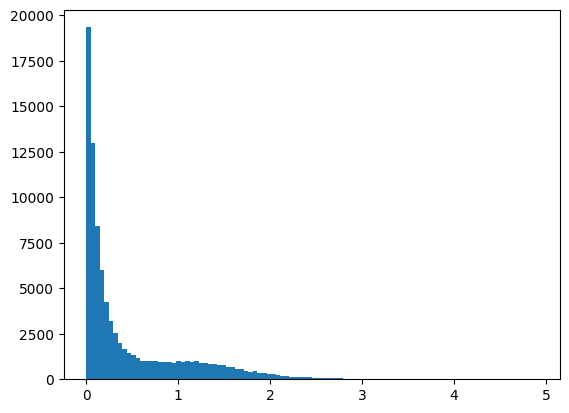

In [ ]:
plt.hist(Z[Z > 0].cpu().detach().numpy(), 100);

In [ ]:
thresh = 0.5

Z = F.relu(gnn(x_norm, adj_norm))
Z_pred = Z.cpu().detach().numpy() > thresh
model_saver.restore()
print(f'Final nmi = {get_nmi(thresh):.3f}')

Final nmi = 0.486


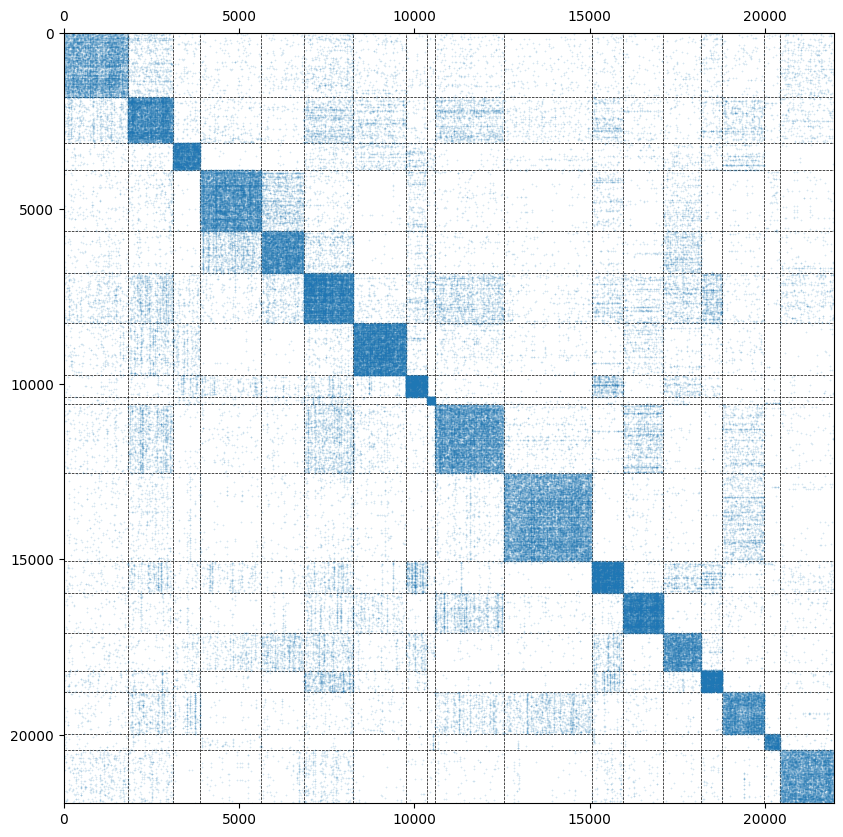

In [ ]:
plt.figure(figsize=[10, 10])
z = np.argmax(Z_pred, 1)
o = np.argsort(z)
nocd.utils.plot_sparse_clustered_adjacency(A, K, z, o, markersize=0.05)

In [ ]:
# Sizes of detected communities
print(Z_pred.sum(0))

[1245 1511  783 1852 1571 1752 1637  848  276 2709 2636 1109 1596 1739
 1116 2152  566 1924]


In [ ]:
density_baseline = A.nnz / (N**2 - N)
num_triangles = (A @ A @ A).diagonal().sum() / 6
num_possible_triangles = (N - 2) * (N - 1) * N / 6
clust_coef_baseline = num_triangles / num_possible_triangles
print(f'Background (over the entire graph):\n'
      f' - density    = {density_baseline:.3e}\n'
      f' - clust_coef = {clust_coef_baseline:.3e}')

Background (over the entire graph):
 - density    = 4.014e-04
 - clust_coef = 5.733e-08


In [ ]:
metrics = nocd.metrics.evaluate_unsupervised(Z_gt, A)
print(f"Ground truth communities:\n"
      f" - coverage    = {metrics['coverage']:.4f}\n"
      f" - conductance = {metrics['conductance']:.4f}\n"
      f" - density     = {metrics['density']:.3e}\n"
      f" - clust_coef  = {metrics['clustering_coef']:.3e}")

Ground truth communities:
 - coverage    = 0.9588
 - conductance = 0.3392
 - density     = 3.853e-03
 - clust_coef  = 9.145e-06


In [ ]:
metrics = nocd.metrics.evaluate_unsupervised(Z_pred, A)
print(f"Predicted communities:\n"
      f" - coverage    = {metrics['coverage']:.4f}\n"
      f" - conductance = {metrics['conductance']:.4f}\n"
      f" - density     = {metrics['density']:.3e}\n"
      f" - clust_coef  = {metrics['clustering_coef']:.3e}")

Predicted communities:
 - coverage    = 0.9212
 - conductance = 0.2418
 - density     = 4.834e-03
 - clust_coef  = 1.109e-05


Utilities

In [ ]:
"""Various utility functions."""
import numpy as np
import scipy.sparse as sp
import torch

from typing import Union


def l2_reg_loss(model, scale=1e-5):
    """Get L2 loss for model weights."""
    loss = 0.0
    for w in model.get_weights():
        loss += w.pow(2.).sum()
    return loss * scale


def to_sparse_tensor(matrix: Union[sp.spmatrix, torch.Tensor],
                     cuda: bool = True,
                     ) -> Union[torch.sparse.FloatTensor, torch.cuda.sparse.FloatTensor]:
    """Convert a scipy sparse matrix to a torch sparse tensor.

    Args:
        matrix: Sparse matrix to convert.
        cuda: Whether to move the resulting tensor to GPU.

    Returns:
        sparse_tensor: Resulting sparse tensor (on CPU or on GPU).

    """
    if sp.issparse(matrix):
        coo = matrix.tocoo()
        indices = torch.LongTensor(np.vstack([coo.row, coo.col]))
        values = torch.FloatTensor(coo.data)
        shape = torch.Size(coo.shape)
        sparse_tensor = torch.sparse.FloatTensor(indices, values, shape)
    elif torch.is_tensor(matrix):
        row, col = matrix.nonzero().t()
        indices = torch.stack([row, col])
        values = matrix[row, col]
        shape = torch.Size(matrix.shape)
        sparse_tensor = torch.sparse.FloatTensor(indices, values, shape)
    else:
        raise ValueError(f"matrix must be scipy.sparse or torch.Tensor (got {type(matrix)} instead).")
    if cuda:
        sparse_tensor = sparse_tensor.cuda()
    return sparse_tensor.coalesce()


def coms_list_to_matrix(communities_list, num_nodes=None):
    """Convert a communities list of len [C] to an [N, C] communities matrix.

    Parameters
    ----------
    communities_list : list
        List of lists of nodes belonging to respective community.
    num_nodes : int, optional
        Total number of nodes. This needs to be here in case
        some nodes are not in any communities, but the resulting
        matrix must have the correct shape [num_nodes, num_coms].

    Returns
    -------
    communities_matrix : np.array, shape [num_nodes, num_coms]
        Binary matrix of community assignments.
    """
    num_coms = len(communities_list)
    if num_nodes is None:
        num_nodes = max(max(cmty) for cmty in communities_list) + 1
    communities_matrix = np.zeros([num_nodes, num_coms], dtype=np.float32)
    for cmty_idx, nodes in enumerate(communities_list):
        communities_matrix[nodes, cmty_idx] = 1
    return communities_matrix


def coms_matrix_to_list(communities_matrix):
    """Convert an [N, C] communities matrix to a communities list of len [C].

    Parameters
    ----------
    communities_matrix : np.ndarray or sp.spmatrix, shape [num_nodes, num_coms]
        Binary matrix of community assignments.

    Returns
    -------
    communities_list : list
        List of lists of nodes belonging to respective community.

    """
    num_nodes, num_coms = communities_matrix.shape
    communities_list = [[] for _ in range(num_coms)]
    nodes, communities = communities_matrix.nonzero()
    for node, cmty in zip(nodes, communities):
        communities_list[cmty].append(node)
    return communities_list


def plot_sparse_clustered_adjacency(A, num_coms, z, o, ax=None, markersize=0.25):
    import seaborn as sns
    import matplotlib.pyplot as plt
    if ax is None:
        ax = plt.gca()

    colors = sns.color_palette('hls', num_coms)
    sns.set_style('white')

    crt = 0
    for idx in np.where(np.diff(z[o]))[0].tolist() + [z.shape[0]]:
        ax.axhline(y=idx, linewidth=0.5, color='black', linestyle='--')
        ax.axvline(x=idx, linewidth=0.5, color='black', linestyle='--')
        crt = idx + 1

    ax.spy(A[o][:, o], markersize=markersize)
    ax.tick_params(axis='both', which='both', labelbottom='off', labelleft='off', labeltop='off')


def adjacency_split_naive(A, p_val, neg_mul=1, max_num_val=None):
    edges = np.column_stack(sp.tril(A).nonzero())
    num_edges = edges.shape[0]
    num_val_edges = int(num_edges * p_val)
    if max_num_val is not None:
        num_val_edges = min(num_val_edges, max_num_val)

    shuffled = np.random.permutation(num_edges)
    which_val = shuffled[:num_val_edges]
    which_train = shuffled[num_val_edges:]
    train_ones = edges[which_train]
    val_ones = edges[which_val]
    A_train = sp.coo_matrix((np.ones_like(train_ones.T[0]), (train_ones.T[0], train_ones.T[1])),
                            shape=A.shape).tocsr()
    A_train = A_train.maximum(A_train.T)

    num_nodes = A.shape[0]
    num_val_nonedges = neg_mul * num_val_edges
    candidate_zeros = np.random.choice(np.arange(num_nodes, dtype=np.int32),
                                       size=(2 * num_val_nonedges, 2), replace=True)
    cne1, cne2 = candidate_zeros[:, 0], candidate_zeros[:, 1]
    to_keep = (1 - A[cne1, cne2]).astype(np.bool).A1
    val_zeros = candidate_zeros[to_keep][:num_val_nonedges]
    if to_keep.sum() < num_val_nonedges:
        raise ValueError("Couldn't produce enough non-edges")

    return A_train, val_ones, val_zeros

Data

In [ ]:
import numpy as np
import scipy.sparse as sp


def load_dataset(file_name):
    """Load a graph from a Numpy binary file.

    Parameters
    ----------
    file_name : str
        Name of the file to load.

    Returns
    -------
    graph : dict
        Dictionary that contains:
            * 'A' : The adjacency matrix in sparse matrix format
            * 'X' : The attribute matrix in sparse matrix format
            * 'Z' : The community labels in sparse matrix format
            * Further dictionaries mapping node, class and attribute IDs

    """
    if not file_name.endswith('.npz'):
        file_name += '.npz'
    with np.load(file_name, allow_pickle=True) as loader:
        loader = dict(loader)
        A = sp.csr_matrix((loader['adj_matrix.data'], loader['adj_matrix.indices'],
                           loader['adj_matrix.indptr']), shape=loader['adj_matrix.shape'])

        if 'attr_matrix.data' in loader.keys():
            X = sp.csr_matrix((loader['attr_matrix.data'], loader['attr_matrix.indices'],
                               loader['attr_matrix.indptr']), shape=loader['attr_matrix.shape'])
        else:
            X = None

        Z = sp.csr_matrix((loader['labels.data'], loader['labels.indices'],
                           loader['labels.indptr']), shape=loader['labels.shape'])

        # Remove self-loops
        A = A.tolil()
        A.setdiag(0)
        A = A.tocsr()

        # Convert label matrix to numpy
        if sp.issparse(Z):
            Z = Z.toarray().astype(np.float32)

        graph = {
            'A': A,
            'X': X,
            'Z': Z
        }

        node_names = loader.get('node_names')
        if node_names is not None:
            node_names = node_names.tolist()
            graph['node_names'] = node_names

        attr_names = loader.get('attr_names')
        if attr_names is not None:
            attr_names = attr_names.tolist()
            graph['attr_names'] = attr_names

        class_names = loader.get('class_names')
        if class_names is not None:
            class_names = class_names.tolist()
            graph['class_names'] = class_names

        return graph

Generate

In [ ]:
import numpy as np


def generate_bigclam(F, B=None, D=None, p_no_comm=0, seed=None):
    """Produce the graph according to the BigCLAM model.

    Parameters
    ----------
    F : np.ndarray, shape [N, K]
        Nonnegative community affiliation matrix.
    B : np.ndarray, shape [K, K]
        Compatiblity matrix.
    D : np.ndarray, shape [N]
        Degree vector.
    p_no_comm : float
        Background edge probability.
    seed : int or None
        Random seed.

    Returns
    -------
    A : np.ndarray, shape [num_nodes, num_nodes]
        Adjacency matrix of the generated graph.

    """
    N, K = F.shape
    if B is None and D is not None:
        raise ValueError("Can only use D if B is provided.")
    if B is None:
        B = np.eye(K)
    if np.any(F < 0):
        raise ValueError("F must be nonnegative.")
    if np.any(B < 0):
        raise ValueError("B must be nonnegative.")
    if D is not None:
        D[D == 0]= 1
        if np.any(D < 0):
            raise ValueError("D must be nonnegative.")
        F = F * D[:, None]

    if seed is not None:
        np.random.seed(seed)
    eps = np.log(1 / (1 - p_no_comm))
    probas = 1 - np.exp(-F @ B @ F.T - eps)
    A = np.tril(np.random.binomial(1, probas))
    A = A + A.T
    np.fill_diagonal(A, 0)
    return A


Sampler

In [ ]:
import numpy as np
import scipy.sparse as sp
import torch
import torch.utils.data as data_utils


class EdgeSampler(data_utils.Dataset):
    """Sample edges and non-edges uniformly from a graph.

    Args:
        A: adjacency matrix.
        num_pos: number of edges per batch.
        num_neg: number of non-edges per batch.
    """
    def __init__(self, A, num_pos=1000, num_neg=1000):
        self.num_pos = num_pos
        self.num_neg = num_neg
        self.A = A
        self.edges = np.transpose(A.nonzero())
        self.num_nodes = A.shape[0]
        self.num_edges = self.edges.shape[0]

    def __getitem__(self, key):
        np.random.seed(key)
        edges_idx = np.random.randint(0, self.num_edges, size=self.num_pos, dtype=np.int64)
        next_edges = self.edges[edges_idx, :]

        # Select num_neg non-edges
        generated = False
        while not generated:
            candidate_ne = np.random.randint(0, self.num_nodes, size=(2*self.num_neg, 2), dtype=np.int64)
            cne1, cne2 = candidate_ne[:, 0], candidate_ne[:, 1]
            to_keep = (1 - self.A[cne1, cne2]).astype(np.bool).A1 * (cne1 != cne2)
            next_nonedges = candidate_ne[to_keep][:self.num_neg]
            generated = to_keep.sum() >= self.num_neg
        return torch.LongTensor(next_edges), torch.LongTensor(next_nonedges)

    def __len__(self):
        return 2**32

def collate_fn(batch):
    edges, nonedges = batch[0]
    return (edges, nonedges)

def get_edge_sampler(A, num_pos=1000, num_neg=1000, num_workers=2):
    data_source = EdgeSampler(A, num_pos, num_neg)
    return data_utils.DataLoader(data_source, num_workers=num_workers, collate_fn=collate_fn)

train

In [ ]:
import numpy as np
import torch

from copy import deepcopy


class ModelSaver:
    """In-memory saver for model parameters.

    Storing weights in memory is faster than saving to disk with torch.save.
    """
    def __init__(self, model):
        self.model = model

    def save(self):
        self.state_dict = deepcopy(self.model.state_dict())

    def restore(self):
        self.model.load_state_dict(self.state_dict)


class EarlyStopping:
    """Base class for an early stopping monitor that says when it's time to stop training.

    Examples
    --------
    early_stopping = EarlyStopping()
    for epoch in range(max_epochs):
        sess.run(train_op)  # perform training operation
        early_stopping.next_step()
        if early_stopping.should_stop():
            break
        if early_stopping.should_save():
            model_saver.save()  # save model weights

    """
    def __init__(self):
        pass

    def reset(self):
        """Reset the internal state."""
        raise NotImplementedError

    def next_step(self):
        """Should be called at every iteration."""
        raise NotImplementedError

    def should_save(self):
        """Says if it's time to save model weights."""
        raise NotImplementedError

    def should_stop(self):
        """Says if it's time to stop training."""
        raise NotImplementedError


class NoEarlyStopping(EarlyStopping):
    """No early stopping."""
    def __init__(self):
        super().__init__()
        pass

    def reset(self):
        pass

    def next_step(self):
        pass

    def should_stop(self):
        return False

    def should_save(self):
        return False


class NoImprovementStopping(EarlyStopping):
    """Stop training when the validation metric stops improving.

    Parameters
    ----------
    validation_fn : function
        Calling this function returns the current value of the validation metric.
    mode : {'min', 'max'}
        Should the validation metric be minimized or maximized?
    patience : int
        Number of iterations without improvement before stopping.
    tolerance : float
        Minimal improvement in validation metric to not trigger patience.
    relative : bool
        Is tolerance measured in absolute units or relatively?

    Attributes
    ----------
    _best_value : float
        Best value of the validation loss.
    _num_bad_epochs : int
        Number of epochs since last significant improvement in validation metric.
    _time_to_save : bool
        Is it time to save the model weights?
    _is_better : function
        Tells if new validation metric value is better than the best one so far.
        Signature self._is_better(new_value, best_value).

    """
    def __init__(self, validation_fn, mode='min', patience=10, tolerance=0.0, relative=False):
        super().__init__()
        self.validation_fn = validation_fn
        self.mode = mode
        self.patience = patience
        self.tolerance = tolerance
        self.relative = relative
        self.reset()

        if mode not in ['min', 'max']:
            raise ValueError(f"Mode should be either 'min' or 'max' (got {mode} instead).")

        # Create the comparison function
        if relative:
            if mode == 'min':
                self._is_better = lambda new, best: new < best - (best * tolerance)
            if mode == 'max':
                self._is_better = lambda new, best: new > best + (best * tolerance)
        else:
            if mode == 'min':
                self._is_better = lambda new, best: new < best - tolerance
            if mode == 'max':
                self._is_better = lambda new, best: new > best + tolerance

    def reset(self):
        """Reset the internal state."""
        self._best_value = self.validation_fn()
        self._num_bad_epochs = 0
        self._time_to_save = False

    def next_step(self):
        """Should be called at every iteration."""
        last_value = self.validation_fn()
        if self._is_better(last_value, self._best_value):
            self._time_to_save = True
            self._best_value = last_value
            self._num_bad_epochs = 0
        else:
            self._num_bad_epochs += 1

    def should_save(self):
        """Says if it's time to save model weights."""
        if self._time_to_save:
            self._time_to_save = False
            return True
        else:
            return False

    def should_stop(self):
        """Says if it's time to stop training."""
        return self._num_bad_epochs > self.patience

## CayleyNets Model *

### Installing

In [ ]:
!git clone https://github.com/amoliu/CayleyNet.git

Cloning into 'CayleyNet'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Receiving objects: 100% (40/40), 137.01 KiB | 11.42 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
import sys
sys.path.append('/content/CayleyNet')

### Import Library

In [ ]:
import tensorflow.compat.v1 as tf
import time, shutil
import numpy as np
import os, collections, sklearn
import joblib
import random
# import graph, coarsening
import scipy.sparse as sp

import matplotlib.pyplot as plt
%matplotlib inline

### Code

#### Utilities

In [ ]:
import gensim
import sklearn, sklearn.datasets
import sklearn.naive_bayes, sklearn.linear_model, sklearn.svm, sklearn.neighbors, sklearn.ensemble
import matplotlib.pyplot as plt
import scipy.sparse
import numpy as np
import time, re


# Helpers to process text documents.


class TextDataset(object):
    def clean_text(self, num='substitute'):
        # TODO: stemming, lemmatisation
        for i,doc in enumerate(self.documents):
            # Digits.
            if num == 'spell':
                doc = doc.replace('0', ' zero ')
                doc = doc.replace('1', ' one ')
                doc = doc.replace('2', ' two ')
                doc = doc.replace('3', ' three ')
                doc = doc.replace('4', ' four ')
                doc = doc.replace('5', ' five ')
                doc = doc.replace('6', ' six ')
                doc = doc.replace('7', ' seven ')
                doc = doc.replace('8', ' eight ')
                doc = doc.replace('9', ' nine ')
            elif num == 'substitute':
                # All numbers are equal. Useful for embedding (countable words) ?
                doc = re.sub('(\\d+)', ' NUM ', doc)
            elif num == 'remove':
                # Numbers are uninformative (they are all over the place). Useful for bag-of-words ?
                # But maybe some kind of documents contain more numbers, e.g. finance.
                # Some documents are indeed full of numbers. At least in 20NEWS.
                doc = re.sub('[0-9]', ' ', doc)
            # Remove everything except a-z characters and single space.
            doc = doc.replace('$', ' dollar ')
            doc = doc.lower()
            doc = re.sub('[^a-z]', ' ', doc)
            doc = ' '.join(doc.split())  # same as doc = re.sub('\s{2,}', ' ', doc)
            self.documents[i] = doc

    def vectorize(self, **params):
        # TODO: count or tf-idf. Or in normalize ?
        vectorizer = sklearn.feature_extraction.text.CountVectorizer(**params)
        self.data = vectorizer.fit_transform(self.documents)
        self.vocab = vectorizer.get_feature_names()
        assert len(self.vocab) == self.data.shape[1]

    def data_info(self, show_classes=False):
        N, M = self.data.shape
        sparsity = self.data.nnz / N / M * 100
        print('N = {} documents, M = {} words, sparsity={:.4f}%'.format(N, M, sparsity))
        if show_classes:
            for i in range(len(self.class_names)):
                num = sum(self.labels == i)
                print('  {:5d} documents in class {:2d} ({})'.format(num, i, self.class_names[i]))

    def show_document(self, i):
        label = self.labels[i]
        name = self.class_names[label]
        try:
            text = self.documents[i]
            wc = len(text.split())
        except AttributeError:
            text = None
            wc = 'N/A'
        print('document {}: label {} --> {}, {} words'.format(i, label, name, wc))
        try:
            vector = self.data[i,:]
            for j in range(vector.shape[1]):
                if vector[0,j] != 0:
                    print('  {:.2f} "{}" ({})'.format(vector[0,j], self.vocab[j], j))
        except AttributeError:
            pass
        return text

    def keep_documents(self, idx):
        """Keep the documents given by the index, discard the others."""
        self.documents = [self.documents[i] for i in idx]
        self.labels = self.labels[idx]
        self.data = self.data[idx,:]

    def keep_words(self, idx):
        """Keep the documents given by the index, discard the others."""
        self.data = self.data[:,idx]
        self.vocab = [self.vocab[i] for i in idx]
        try:
            self.embeddings = self.embeddings[idx,:]
        except AttributeError:
            pass

    def remove_short_documents(self, nwords, vocab='selected'):
        """Remove a document if it contains less than nwords."""
        if vocab == 'selected':
            # Word count with selected vocabulary.
            wc = self.data.sum(axis=1)
            wc = np.squeeze(np.asarray(wc))
        elif vocab == 'full':
            # Word count with full vocabulary.
            wc = np.empty(len(self.documents), dtype=np.int)
            for i,doc in enumerate(self.documents):
                wc[i] = len(doc.split())
        idx = np.argwhere(wc >= nwords).squeeze()
        self.keep_documents(idx)
        return wc

    def keep_top_words(self, M, Mprint=20):
        """Keep in the vocaluary the M words who appear most often."""
        freq = self.data.sum(axis=0)
        freq = np.squeeze(np.asarray(freq))
        idx = np.argsort(freq)[::-1]
        idx = idx[:M]
        self.keep_words(idx)
        print('most frequent words')
        for i in range(Mprint):
            print('  {:3d}: {:10s} {:6d} counts'.format(i, self.vocab[i], freq[idx][i]))
        return freq[idx]

    def normalize(self, norm='l1'):
        """Normalize data to unit length."""
        # TODO: TF-IDF.
        data = self.data.astype(np.float64)
        self.data = sklearn.preprocessing.normalize(data, axis=1, norm=norm)

    def embed(self, filename=None, size=100):
        """Embed the vocabulary using pre-trained vectors."""
        if filename:
            model = gensim.models.Word2Vec.load_word2vec_format(filename, binary=True)
            size = model.vector_size
        else:
            class Sentences(object):
                def __init__(self, documents):
                    self.documents = documents
                def __iter__(self):
                    for document in self.documents:
                        yield document.split()
            model = gensim.models.Word2Vec(Sentences(self.documents), size)
        self.embeddings = np.empty((len(self.vocab), size))
        keep = []
        not_found = 0
        for i,word in enumerate(self.vocab):
            try:
                self.embeddings[i,:] = model[word]
                keep.append(i)
            except KeyError:
                not_found += 1
        print('{} words not found in corpus'.format(not_found, i))
        self.keep_words(keep)

class Text20News(TextDataset):
    def __init__(self, **params):
        dataset = sklearn.datasets.fetch_20newsgroups(**params)
        self.documents = dataset.data
        self.labels = dataset.target
        self.class_names = dataset.target_names
        assert max(self.labels) + 1 == len(self.class_names)
        N, C = len(self.documents), len(self.class_names)
        print('N = {} documents, C = {} classes'.format(N, C))

class TextRCV1(TextDataset):
    def __init__(self, **params):
        dataset = sklearn.datasets.fetch_rcv1(**params)
        self.data = dataset.data
        self.target = dataset.target
        self.class_names = dataset.target_names
        assert len(self.class_names) == 103  # 103 categories according to LYRL2004
        N, C = self.target.shape
        assert C == len(self.class_names)
        print('N = {} documents, C = {} classes'.format(N, C))

    def remove_classes(self, keep):
        ## Construct a lookup table for labels.
        labels_row = []
        labels_col = []
        class_lookup = {}
        for i,name in enumerate(self.class_names):
            class_lookup[name] = i
        self.class_names = keep

        # Index of classes to keep.
        idx_keep = np.empty(len(keep))
        for i,cat in enumerate(keep):
            idx_keep[i] = class_lookup[cat]
        self.target = self.target[:,idx_keep]
        assert self.target.shape[1] == len(keep)

    def show_doc_per_class(self, print_=False):
        """Number of documents per class."""
        docs_per_class = np.array(self.target.astype(np.uint64).sum(axis=0)).squeeze()
        print('categories ({} assignments in total)'.format(docs_per_class.sum()))
        if print_:
            for i,cat in enumerate(self.class_names):
                print('  {:5s}: {:6d} documents'.format(cat, docs_per_class[i]))
        plt.figure(figsize=(17,5))
        plt.plot(sorted(docs_per_class[::-1]),'.')

    def show_classes_per_doc(self):
        """Number of classes per document."""
        classes_per_doc = np.array(self.target.sum(axis=1)).squeeze()
        plt.figure(figsize=(17,5))
        plt.plot(sorted(classes_per_doc[::-1]),'.')

    def select_documents(self):
        classes_per_doc = np.array(self.target.sum(axis=1)).squeeze()
        self.target = self.target[classes_per_doc==1]
        self.data = self.data[classes_per_doc==1, :]

        # Convert labels from indicator form to single value.
        N, C = self.target.shape
        target = self.target.tocoo()
        self.labels = target.col
        assert self.labels.min() == 0
        assert self.labels.max() == C - 1

        # Bruna and Dropout used 2 * 201369 = 402738 documents. Probably the difference btw v1 and v2.
        #return classes_per_doc

### Helpers to quantify classifier's quality.


def baseline(train_data, train_labels, test_data, test_labels, omit=[]):
    """Train various classifiers to get a baseline."""
    clf, train_accuracy, test_accuracy, train_f1, test_f1, exec_time = [], [], [], [], [], []
    clf.append(sklearn.neighbors.KNeighborsClassifier(n_neighbors=10))
    clf.append(sklearn.linear_model.LogisticRegression())
    clf.append(sklearn.naive_bayes.BernoulliNB(alpha=.01))
    clf.append(sklearn.ensemble.RandomForestClassifier())
    clf.append(sklearn.naive_bayes.MultinomialNB(alpha=.01))
    clf.append(sklearn.linear_model.RidgeClassifier())
    clf.append(sklearn.svm.LinearSVC())
    for i,c in enumerate(clf):
        if i not in omit:
            t_start = time.process_time()
            c.fit(train_data, train_labels)
            train_pred = c.predict(train_data)
            test_pred = c.predict(test_data)
            train_accuracy.append('{:5.2f}'.format(100*sklearn.metrics.accuracy_score(train_labels, train_pred)))
            test_accuracy.append('{:5.2f}'.format(100*sklearn.metrics.accuracy_score(test_labels, test_pred)))
            train_f1.append('{:5.2f}'.format(100*sklearn.metrics.f1_score(train_labels, train_pred, average='weighted')))
            test_f1.append('{:5.2f}'.format(100*sklearn.metrics.f1_score(test_labels, test_pred, average='weighted')))
            exec_time.append('{:5.2f}'.format(time.process_time() - t_start))
    print('Train accuracy:      {}'.format(' '.join(train_accuracy)))
    print('Test accuracy:       {}'.format(' '.join(test_accuracy)))
    print('Train F1 (weighted): {}'.format(' '.join(train_f1)))
    print('Test F1 (weighted):  {}'.format(' '.join(test_f1)))
    print('Execution time:      {}'.format(' '.join(exec_time)))

def grid_search(params, grid_params, train_data, train_labels, val_data,
        val_labels, test_data, test_labels, model):
    """Explore the hyper-parameter space with an exhaustive grid search."""
    params = params.copy()
    train_accuracy, test_accuracy, train_f1, test_f1 = [], [], [], []
    grid = sklearn.grid_search.ParameterGrid(grid_params)
    print('grid search: {} combinations to evaluate'.format(len(grid)))
    for grid_params in grid:
        params.update(grid_params)
        name = '{}'.format(grid)
        print('\n\n  {}  \n\n'.format(grid_params))
        m = model(params)
        m.fit(train_data, train_labels, val_data, val_labels)
        string, accuracy, f1, loss = m.evaluate(train_data, train_labels)
        train_accuracy.append('{:5.2f}'.format(accuracy)); train_f1.append('{:5.2f}'.format(f1))
        print('train {}'.format(string))
        string, accuracy, f1, loss = m.evaluate(test_data, test_labels)
        test_accuracy.append('{:5.2f}'.format(accuracy)); test_f1.append('{:5.2f}'.format(f1))
        print('test  {}'.format(string))
    print('\n\n')
    print('Train accuracy:      {}'.format(' '.join(train_accuracy)))
    print('Test accuracy:       {}'.format(' '.join(test_accuracy)))
    print('Train F1 (weighted): {}'.format(' '.join(train_f1)))
    print('Test F1 (weighted):  {}'.format(' '.join(test_f1)))
    for i,grid_params in enumerate(grid):
        print('{} --> {} {} {} {}'.format(grid_params, train_accuracy[i], test_accuracy[i], train_f1[i], test_f1[i]))


class model_perf(object):

    def __init__(s):
        s.names, s.params = set(), {}
        s.fit_accuracies, s.fit_losses, s.fit_time = {}, {}, {}
        s.train_accuracy, s.train_f1, s.train_loss = {}, {}, {}
        s.test_accuracy, s.test_f1, s.test_loss = {}, {}, {}

    def test(s, model, name, params, train_data, train_labels, val_data, val_labels, test_data, test_labels):
        s.params[name] = params
        s.fit_accuracies[name], s.fit_losses[name], s.fit_time[name] = \
                model.fit(train_data, train_labels, val_data, val_labels)
        string, s.train_accuracy[name], s.train_f1[name], s.train_loss[name] = \
                model.evaluate(train_data, train_labels)
        print('train {}'.format(string))
        string, s.test_accuracy[name], s.test_f1[name], s.test_loss[name] = \
                model.evaluate(test_data, test_labels)
        print('test  {}'.format(string))
        s.names.add(name)

    def show(s, fontsize=None):
        if fontsize:
            plt.rc('pdf', fonttype=42)
            plt.rc('ps', fonttype=42)
            plt.rc('font', size=fontsize)         # controls default text sizes
            plt.rc('axes', titlesize=fontsize)    # fontsize of the axes title
            plt.rc('axes', labelsize=fontsize)    # fontsize of the x any y labels
            plt.rc('xtick', labelsize=fontsize)   # fontsize of the tick labels
            plt.rc('ytick', labelsize=fontsize)   # fontsize of the tick labels
            plt.rc('legend', fontsize=fontsize)   # legend fontsize
            plt.rc('figure', titlesize=fontsize)  # size of the figure title
        print('  accuracy        F1             loss        time [ms]  name')
        print('test  train   test  train   test     train')
        for name in sorted(s.names):
            print('{:5.2f} {:5.2f}   {:5.2f} {:5.2f}   {:.2e} {:.2e}   {:3.0f}   {}'.format(
                    s.test_accuracy[name], s.train_accuracy[name],
                    s.test_f1[name], s.train_f1[name],
                    s.test_loss[name], s.train_loss[name], s.fit_time[name]*1000, name))

        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        for name in sorted(s.names):
            steps = np.arange(len(s.fit_accuracies[name])) + 1
            steps *= s.params[name]['eval_frequency']
            ax[0].plot(steps, s.fit_accuracies[name], '.-', label=name)
            ax[1].plot(steps, s.fit_losses[name], '.-', label=name)
        ax[0].set_xlim(min(steps), max(steps))
        ax[1].set_xlim(min(steps), max(steps))
        ax[0].set_xlabel('step')
        ax[1].set_xlabel('step')
        ax[0].set_ylabel('validation accuracy')
        ax[1].set_ylabel('training loss')
        ax[0].legend(loc='lower right')
        ax[1].legend(loc='upper right')
        #fig.savefig('training.pdf')

#### Graph

In [ ]:
import sklearn.metrics
import sklearn.neighbors
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
import scipy.spatial.distance
import numpy as np


def grid(m, dtype=np.float32):
    """Return the embedding of a grid graph."""
    M = m**2
    x = np.linspace(0, 1, m, dtype=dtype)
    y = np.linspace(0, 1, m, dtype=dtype)
    xx, yy = np.meshgrid(x, y)
    z = np.empty((M, 2), dtype)
    z[:, 0] = xx.reshape(M)
    z[:, 1] = yy.reshape(M)
    return z


def distance_scipy_spatial(z, k=4, metric='euclidean'):
    """Compute exact pairwise distances."""
    d = scipy.spatial.distance.pdist(z, metric)
    d = scipy.spatial.distance.squareform(d)
    # k-NN graph.
    idx = np.argsort(d)[:, 1:k+1]
    d.sort()
    d = d[:, 1:k+1]
    return d, idx


def distance_sklearn_metrics(z, k=4, metric='euclidean'):
    """Compute exact pairwise distances."""
    d = sklearn.metrics.pairwise.pairwise_distances(
            z, metric=metric, n_jobs=-2)
    # k-NN graph.
    idx = np.argsort(d)[:, 1:k+1]
    d.sort()
    d = d[:, 1:k+1]
    return d, idx


def distance_lshforest(z, k=4, metric='cosine'):
    """Return an approximation of the k-nearest cosine distances."""
    assert metric == 'cosine'
    lshf = sklearn.neighbors.LSHForest()
    lshf.fit(z)
    dist, idx = lshf.kneighbors(z, n_neighbors=k+1)
    assert dist.min() < 1e-10
    dist[dist < 0] = 0
    return dist, idx

# TODO: other ANNs s.a. NMSLIB, EFANNA, FLANN, Annoy, sklearn neighbors, PANN


def adjacency(dist, idx):
    """Return the adjacency matrix of a kNN graph."""
    M, k = dist.shape
    assert M, k == idx.shape
    assert dist.min() >= 0

    # Weights.
    sigma2 = np.mean(dist[:, -1])**2
    dist = np.exp(- dist**2 / sigma2)

    # Weight matrix.
    I = np.arange(0, M).repeat(k)
    J = idx.reshape(M*k)
    V = dist.reshape(M*k)
    W = scipy.sparse.coo_matrix((V, (I, J)), shape=(M, M))

    # No self-connections.
    W.setdiag(0)

    # Non-directed graph.
    bigger = W.T > W
    W = W - W.multiply(bigger) + W.T.multiply(bigger)

    assert W.nnz % 2 == 0
    assert np.abs(W - W.T).mean() < 1e-10
    assert type(W) == scipy.sparse.csr.csr_matrix
    return W


def replace_random_edges(A, noise_level):
    """Replace randomly chosen edges by random edges."""
    M, M = A.shape
    n = int(noise_level * A.nnz // 2)

    indices = np.random.permutation(A.nnz//2)[:n]
    rows = np.random.randint(0, M, n)
    cols = np.random.randint(0, M, n)
    vals = np.random.uniform(0, 1, n)
    assert len(indices) == len(rows) == len(cols) == len(vals)

    A_coo = scipy.sparse.triu(A, format='coo')
    assert A_coo.nnz == A.nnz // 2
    assert A_coo.nnz >= n
    A = A.tolil()

    for idx, row, col, val in zip(indices, rows, cols, vals):
        old_row = A_coo.row[idx]
        old_col = A_coo.col[idx]

        A[old_row, old_col] = 0
        A[old_col, old_row] = 0
        A[row, col] = 1
        A[col, row] = 1

    A.setdiag(0)
    A = A.tocsr()
    A.eliminate_zeros()
    return A


def laplacian(W, normalized=True):
    """Return the Laplacian of the weigth matrix."""

    # Degree matrix.
    d = W.sum(axis=0)

    # Laplacian matrix.
    if not normalized:
        D = scipy.sparse.diags(d.A.squeeze(), 0)
        L = D - W
    else:
        d += np.spacing(np.array(0, W.dtype))
        d = 1 / np.sqrt(d)
        D = scipy.sparse.diags(d.A.squeeze(), 0)
        I = scipy.sparse.identity(d.size, dtype=W.dtype)
        L = I - D * W * D

    # assert np.abs(L - L.T).mean() < 1e-9
    assert type(L) == scipy.sparse.csr.csr_matrix
    return L


def lmax(L, normalized=True):
    """Upper-bound on the spectrum."""
    if normalized:
        return 2
    else:
        return scipy.sparse.linalg.eigsh(
                L, k=1, which='LM', return_eigenvectors=False)[0]


def fourier(L, algo='eigh', k=1):
    """Return the Fourier basis, i.e. the EVD of the Laplacian."""

    def sort(lamb, U):
        idx = lamb.argsort()
        return lamb[idx], U[:, idx]

    if algo == 'eig':
        lamb, U = np.linalg.eig(L.toarray())
        lamb, U = sort(lamb, U)
    elif algo == 'eigh':
        lamb, U = np.linalg.eigh(L.toarray())
    elif algo == 'eigs':
        lamb, U = scipy.sparse.linalg.eigs(L, k=k, which='SM')
        lamb, U = sort(lamb, U)
    elif algo == 'eigsh':
        lamb, U = scipy.sparse.linalg.eigsh(L, k=k, which='SM')
    return lamb, U


def plot_spectrum(L, algo='eig', ymin = 0):
    """Plot the spectrum of a list of multi-scale Laplacians L."""
    # Algo is eig to be sure to get all eigenvalues.
    plt.figure(figsize=(17, 5))
    for i, lap in enumerate(L):
        lamb, U = fourier(lap, algo)
        step = 2**i
        x = range(step//2, L[0].shape[0], step)
        lb = 'L_{} spectrum in [{:1.2e}, {:1.2e}]'.format(i, lamb[0], lamb[-1])
        plt.plot(x, lamb, '.', label=lb)
    plt.legend(loc='best')
    plt.xlim(0, L[0].shape[0])
    plt.ylim(ymin=ymin)

    plt.ylabel('Value')
    plt.xlabel('Eigenvalue ID')


def lanczos(L, X, K):
    """
    Given the graph Laplacian and a data matrix, return a data matrix which can
    be multiplied by the filter coefficients to filter X using the Lanczos
    polynomial approximation.
    """
    M, N = X.shape
    assert L.dtype == X.dtype

    def basis(L, X, K):
        """
        Lanczos algorithm which computes the orthogonal matrix V and the
        tri-diagonal matrix H.
        """
        a = np.empty((K, N), L.dtype)
        b = np.zeros((K, N), L.dtype)
        V = np.empty((K, M, N), L.dtype)
        V[0, ...] = X / np.linalg.norm(X, axis=0)
        for k in range(K-1):
            W = L.dot(V[k, ...])
            a[k, :] = np.sum(W * V[k, ...], axis=0)
            W = W - a[k, :] * V[k, ...] - (
                    b[k, :] * V[k-1, ...] if k > 0 else 0)
            b[k+1, :] = np.linalg.norm(W, axis=0)
            V[k+1, ...] = W / b[k+1, :]
        a[K-1, :] = np.sum(L.dot(V[K-1, ...]) * V[K-1, ...], axis=0)
        return V, a, b

    def diag_H(a, b, K):
        """Diagonalize the tri-diagonal H matrix."""
        H = np.zeros((K*K, N), a.dtype)
        H[:K**2:K+1, :] = a
        H[1:(K-1)*K:K+1, :] = b[1:, :]
        H.shape = (K, K, N)
        Q = np.linalg.eigh(H.T, UPLO='L')[1]
        Q = np.swapaxes(Q, 1, 2).T
        return Q

    V, a, b = basis(L, X, K)
    Q = diag_H(a, b, K)
    Xt = np.empty((K, M, N), L.dtype)
    for n in range(N):
        Xt[..., n] = Q[..., n].T.dot(V[..., n])
    Xt *= Q[0, :, np.newaxis, :]
    Xt *= np.linalg.norm(X, axis=0)
    return Xt  # Q[0, ...]


def rescale_L(L, lmax=2):
    """Rescale the Laplacian eigenvalues in [-1,1]."""
    M, M = L.shape
    I = scipy.sparse.identity(M, format='csr', dtype=L.dtype)
    L /= lmax / 2
    L -= I
    return L


def chebyshev(L, X, K):
    """Return T_k X where T_k are the Chebyshev polynomials of order up to K.
    Complexity is O(KMN)."""
    M, N = X.shape
    assert L.dtype == X.dtype

    # L = rescale_L(L, lmax)
    # Xt = T @ X: MxM @ MxN.
    Xt = np.empty((K, M, N), L.dtype)
    # Xt_0 = T_0 X = I X = X.
    Xt[0, ...] = X
    # Xt_1 = T_1 X = L X.
    if K > 1:
        Xt[1, ...] = L.dot(X)
    # Xt_k = 2 L Xt_k-1 - Xt_k-2.
    for k in range(2, K):
        Xt[k, ...] = 2 * L.dot(Xt[k-1, ...]) - Xt[k-2, ...]
    return Xt

#### Coarsening

In [ ]:
import numpy as np
import scipy.sparse


def coarsen(A, levels, self_connections=False):
    """
    Coarsen a graph, represented by its adjacency matrix A, at multiple
    levels.
    """
    graphs, parents = metis(A, levels)
    perms = compute_perm(parents)

    for i, A in enumerate(graphs):
        M, M = A.shape

        if not self_connections:
            A = A.tocoo()
            A.setdiag(0)

        if i < levels:
            A = perm_adjacency(A, perms[i])

        A = A.tocsr()
        A.eliminate_zeros()
        graphs[i] = A

        Mnew, Mnew = A.shape
        print('Layer {0}: M_{0} = |V| = {1} nodes ({2} added),'
              '|E| = {3} edges'.format(i, Mnew, Mnew-M, A.nnz//2))

    return graphs, perms[0] if levels > 0 else None


def metis(W, levels, rid=None):
    """
    Coarsen a graph multiple times using the METIS algorithm.

    INPUT
    W: symmetric sparse weight (adjacency) matrix
    levels: the number of coarsened graphs

    OUTPUT
    graph[0]: original graph of size N_1
    graph[2]: coarser graph of size N_2 < N_1
    graph[levels]: coarsest graph of Size N_levels < ... < N_2 < N_1
    parents[i] is a vector of size N_i with entries ranging from 1 to N_{i+1}
        which indicate the parents in the coarser graph[i+1]
    nd_sz{i} is a vector of size N_i that contains the size of the supernode in the graph{i}

    NOTE
    if "graph" is a list of length k, then "parents" will be a list of length k-1
    """

    N, N = W.shape
    if rid == None:
        rid = np.random.permutation(range(N))
    parents = []
    degree = W.sum(axis=0) - W.diagonal()
    graphs = []
    graphs.append(W)
    #supernode_size = np.ones(N)
    #nd_sz = [supernode_size]
    #count = 0

    #while N > maxsize:
    for _ in range(levels):

        #count += 1

        # CHOOSE THE WEIGHTS FOR THE PAIRING
        # weights = ones(N,1)       # metis weights
        weights = degree            # graclus weights
        # weights = supernode_size  # other possibility
        weights = np.array(weights).squeeze()

        # PAIR THE VERTICES AND CONSTRUCT THE ROOT VECTOR
        idx_row, idx_col, val = scipy.sparse.find(W)
        perm = np.argsort(idx_row)
        rr = idx_row[perm]
        cc = idx_col[perm]
        vv = val[perm]
        cluster_id = metis_one_level(rr,cc,vv,rid,weights)  # rr is ordered
        parents.append(cluster_id)

        # TO DO
        # COMPUTE THE SIZE OF THE SUPERNODES AND THEIR DEGREE
        #supernode_size = full(   sparse(cluster_id,  ones(N,1) , supernode_size )     )
        #print(cluster_id)
        #print(supernode_size)
        #nd_sz{count+1}=supernode_size;

        # COMPUTE THE EDGES WEIGHTS FOR THE NEW GRAPH
        nrr = cluster_id[rr]
        ncc = cluster_id[cc]
        nvv = vv
        Nnew = cluster_id.max() + 1
        # CSR is more appropriate: row,val pairs appear multiple times
        W = scipy.sparse.csr_matrix((nvv,(nrr,ncc)), shape=(Nnew,Nnew))
        W.eliminate_zeros()
        # Add new graph to the list of all coarsened graphs
        graphs.append(W)
        N, N = W.shape

        # COMPUTE THE DEGREE (OMIT OR NOT SELF LOOPS)
        degree = W.sum(axis=0)
        #degree = W.sum(axis=0) - W.diagonal()

        # CHOOSE THE ORDER IN WHICH VERTICES WILL BE VISTED AT THE NEXT PASS
        #[~, rid]=sort(ss);     # arthur strategy
        #[~, rid]=sort(supernode_size);    #  thomas strategy
        #rid=randperm(N);                  #  metis/graclus strategy
        ss = np.array(W.sum(axis=0)).squeeze()
        rid = np.argsort(ss)

    return graphs, parents


# Coarsen a graph given by rr,cc,vv.  rr is assumed to be ordered
def metis_one_level(rr,cc,vv,rid,weights):

    nnz = rr.shape[0]
    N = rr[nnz-1] + 1

    marked = np.zeros(N, np.bool)
    rowstart = np.zeros(N, np.int32)
    rowlength = np.zeros(N, np.int32)
    cluster_id = np.zeros(N, np.int32)

    oldval = rr[0]
    count = 0
    clustercount = 0

    for ii in range(nnz):
        rowlength[count] = rowlength[count] + 1
        if rr[ii] > oldval:
            oldval = rr[ii]
            rowstart[count+1] = ii
            count = count + 1

    for ii in range(N):
        tid = rid[ii]
        if not marked[tid]:
            wmax = 0.0
            rs = rowstart[tid]
            marked[tid] = True
            bestneighbor = -1
            for jj in range(rowlength[tid]):
                nid = cc[rs+jj]
                if marked[nid]:
                    tval = 0.0
                else:
                    tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
                if tval > wmax:
                    wmax = tval
                    bestneighbor = nid

            cluster_id[tid] = clustercount

            if bestneighbor > -1:
                cluster_id[bestneighbor] = clustercount
                marked[bestneighbor] = True

            clustercount += 1

    return cluster_id

def compute_perm(parents):
    """
    Return a list of indices to reorder the adjacency and data matrices so
    that the union of two neighbors from layer to layer forms a binary tree.
    """

    # Order of last layer is random (chosen by the clustering algorithm).
    indices = []
    if len(parents) > 0:
        M_last = max(parents[-1]) + 1
        indices.append(list(range(M_last)))

    for parent in parents[::-1]:
        #print('parent: {}'.format(parent))

        # Fake nodes go after real ones.
        pool_singeltons = len(parent)

        indices_layer = []
        for i in indices[-1]:
            indices_node = list(np.where(parent == i)[0])
            assert 0 <= len(indices_node) <= 2
            #print('indices_node: {}'.format(indices_node))

            # Add a node to go with a singelton.
            if len(indices_node) == 1:
                indices_node.append(pool_singeltons)
                pool_singeltons += 1
                #print('new singelton: {}'.format(indices_node))
            # Add two nodes as children of a singelton in the parent.
            elif len(indices_node) == 0:
                indices_node.append(pool_singeltons+0)
                indices_node.append(pool_singeltons+1)
                pool_singeltons += 2
                #print('singelton childrens: {}'.format(indices_node))

            indices_layer.extend(indices_node)
        indices.append(indices_layer)

    # Sanity checks.
    for i,indices_layer in enumerate(indices):
        M = M_last*2**i
        # Reduction by 2 at each layer (binary tree).
        assert len(indices[0] == M)
        # The new ordering does not omit an indice.
        assert sorted(indices_layer) == list(range(M))

    return indices[::-1]

assert (compute_perm([np.array([4,1,1,2,2,3,0,0,3]),np.array([2,1,0,1,0])])
        == [[3,4,0,9,1,2,5,8,6,7,10,11],[2,4,1,3,0,5],[0,1,2]])

def perm_data(x, indices):
    """
    Permute data matrix, i.e. exchange node ids,
    so that binary unions form the clustering tree.
    """
    if indices == None:
        return x

    N, M = x.shape
    Mnew = len(indices)
    assert Mnew >= M
    xnew = np.empty((N, Mnew))
    for i,j in enumerate(indices):
        # Existing vertex, i.e. real data.
        if j < M:
            xnew[:,i] = x[:,j]
        # Fake vertex because of singeltons.
        # They will stay 0 so that max pooling chooses the singelton.
        # Or -infty ?
        else:
            xnew[:,i] = np.zeros(N)
    return xnew

def perm_adjacency(A, indices):
    """
    Permute adjacency matrix, i.e. exchange node ids,
    so that binary unions form the clustering tree.
    """
    if indices == None:
        return A

    M, M = A.shape
    Mnew = len(indices)
    assert Mnew >= M
    A = A.tocoo()

    # Add Mnew - M isolated vertices.
    if Mnew > M:
        rows = scipy.sparse.coo_matrix((Mnew-M,    M), dtype=np.float32)
        cols = scipy.sparse.coo_matrix((Mnew, Mnew-M), dtype=np.float32)
        A = scipy.sparse.vstack([A, rows])
        A = scipy.sparse.hstack([A, cols])

    # Permute the rows and the columns.
    perm = np.argsort(indices)
    A.row = np.array(perm)[A.row]
    A.col = np.array(perm)[A.col]

    # assert np.abs(A - A.T).mean() < 1e-9
    assert type(A) == scipy.sparse.coo.coo_matrix
    return A

#### Graph definition and coarsening

In [ ]:
#Definition of some flags useful later in the code

flags = tf.app.flags
FLAGS = flags.FLAGS

# Graphs.
flags.DEFINE_integer('number_edges', 8, 'Graph: minimum number of edges per vertex.')
flags.DEFINE_string('metric', 'euclidean', 'Graph: similarity measure (between features).')
flags.DEFINE_bool('normalized_laplacian', True, 'Graph Laplacian: normalized.')
flags.DEFINE_integer('coarsening_levels', 4, 'Number of coarsened graphs.')

# Directories.
flags.DEFINE_string('dir_data', 'data_mnist', 'Directory to store data.')

<ipython-input-72-f19573c56054>:124: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  marked = np.zeros(N, np.bool)
<ipython-input-72-f19573c56054>:268: DeprecationWarning: Please use `coo_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.coo` namespace is deprecated.
  assert type(A) == scipy.sparse.coo.coo_matrix


Layer 0: M_0 = |V| = 1008 nodes (224 added), |E| = 3198 edges
Layer 1: M_1 = |V| = 504 nodes (94 added), |E| = 1451 edges
Layer 2: M_2 = |V| = 252 nodes (31 added), |E| = 698 edges
Layer 3: M_3 = |V| = 126 nodes (10 added), |E| = 338 edges
Layer 4: M_4 = |V| = 63 nodes (0 added), |E| = 168 edges
Execution time: 0.58s


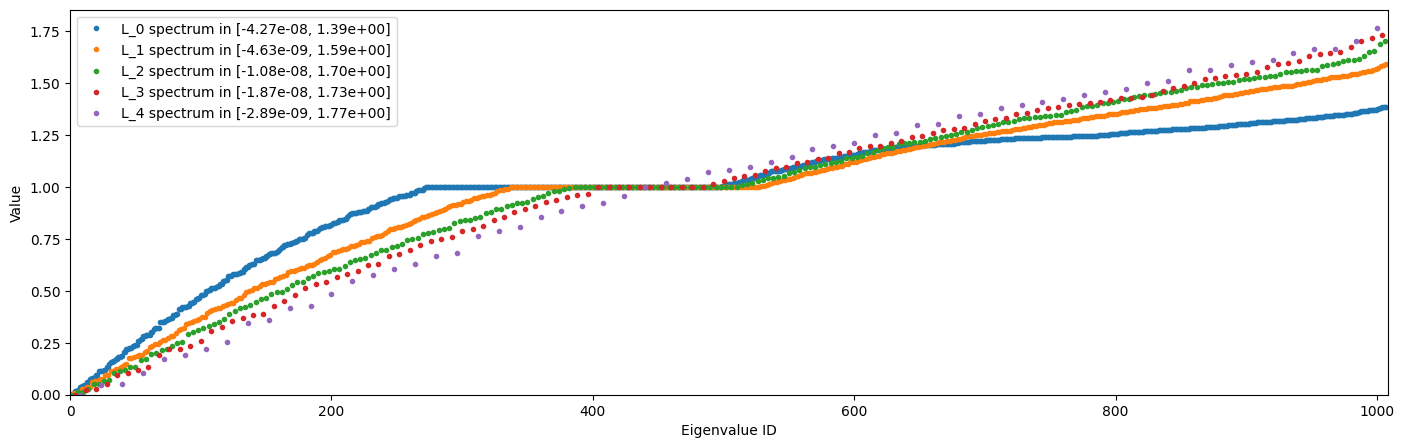

In [ ]:
#Here we proceed at computing the original grid where the images live and the various coarsening that are applied
#for each level

def grid_graph(m):
    z = grid(m)
    sys.argv = sys.argv[:1]
    dist, idx = distance_sklearn_metrics(z, k=FLAGS['number_edges'].value, metric=FLAGS['metric'].value)
    #dist contains the distance of the 8 nearest neighbors for each node sorted in ascending order
    #idx contains the indexes of the 8 nearest for each node sorted in ascending order by distance

    A = adjacency(dist, idx)
    return A

def coarsen(A, levels):
    graphs, parents = metis(A, levels) #Coarsen a graph multiple times using the METIS algorithm.
                                                  #Everything starts with a random point and then decides how to
                                                  #combine the points.
                                                  #Construction is done a priori, so we have one graph
                                                  #for all the samples!

                                                  #graphs = list of spare adjacency matrices (it contains in position
                                                  #          0 the original graph)
                                                  #parents = list of numpy arrays (every array in position i contains
                                                  #           the mapping from graph i to graph i+1, i.e. the idx of
                                                  #           node i in the coarsed graph)
    perms = compute_perm(parents) #Return a list of indices to reorder the adjacency and data matrices so
                                             #that the union of two neighbors from layer to layer forms a binary tree.
                                             #Fake nodes are appended at the end of the current graph
    laplacians = []
    for i,A in enumerate(graphs):
        M, M = A.shape

        # We remove any possible self-connection.
        A = A.tocoo()
        A.setdiag(0)

        if i < levels: #if we have to pool the graph
            A = perm_adjacency(A, perms[i]) #matrix A is here extended with the fakes nodes
                                                       #in order to do an efficient pooling operation
                                                       #in tensorflow as it was a 1D pooling

        A = A.tocsr()
        A.eliminate_zeros()
        Mnew, Mnew = A.shape
        print('Layer {0}: M_{0} = |V| = {1} nodes ({2} added), |E| = {3} edges'.format(i, Mnew, Mnew-M, A.nnz//2))

        L = laplacian(A, normalized=FLAGS['normalized_laplacian'].value)
        laplacians.append(L)
    return laplacians, perms[0] if len(perms) > 0 else None

t_start = time.time()

np.random.seed(0)
A = grid_graph(28)
L, perm = coarsen(A, FLAGS['coarsening_levels'].value)

print('Execution time: {:.2f}s'.format(time.time() - t_start))

plot_spectrum(L)
del A

#### Data Loading

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

train_data, val_data, train_labels, val_labels = train_test_split(X, y, test_size=0.2)
val_data, test_data, val_labels, test_labels = train_test_split(val_data, val_labels, test_size=0.5)

# train_data = perm_data(train_data, perm)
# val_data = perm_data(val_data, perm)
# test_data = perm_data(test_data, perm)

In [ ]:
#loading of MNIST dataset

# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets(FLAGS.dir_data, one_hot=False)

# import tensorflow_datasets
# mnist = tensorflow_datasets.load('mnist')



# train_data = mnist.train.images.astype(np.float32)
# val_data = mnist.validation.images.astype(np.float32) #the first 5K samples of the training dataset
#                                                       #are used for validation
# test_data = mnist.test.images.astype(np.float32)
# train_labels = mnist.train.labels
# val_labels = mnist.validation.labels
# test_labels = mnist.test.labels

# t_start = time.time()
# train_data = perm_data(train_data, perm)
# val_data = perm_data(val_data, perm)
# test_data = perm_data(test_data, perm)
# print('Execution time: {:.2f}s'.format(time.time() - t_start))
# del perm

#### Model definition

In [ ]:
class CayleyNet:
    """
    The neural network model.
    """

    #Helper functions used for constructing the model
    def _weight_variable(self, shape, regularization=True, name=""):
        """Initializer for the weights"""

        initial = tf.compat.v1.truncated_normal_initializer(0, 0.1)
        var = tf.compat.v1.get_variable('weights'+name, shape, tf.float32, initializer=initial)
        if regularization: #append the loss of the current variable to the regularization term
            self.regularizers.append(tf.nn.l2_loss(var))
        return var

    def _bias_variable(self, shape, regularization=True):
        """Initializer for the bias"""

        initial = tf.compat.v1.constant_initializer(0.1)
        var = tf.compat.v1.get_variable('bias', shape, tf.float32, initializer=initial)
        if regularization:
            self.regularizers.append(tf.nn.l2_loss(var))
        return var

    def _h_variable(self, shape, regularization=False, name=''):
        """Initializer for the zoom parameter h"""

        initial = tf.compat.v1.random_uniform_initializer()
        var = tf.compat.v1.get_variable('h'+name, shape, tf.float32, initializer=initial)
        if regularization:
            self.regularizers.append(tf.nn.l2_loss(var))
        return var

    def frobenius_norm(self, tensor):
        """Computes the frobenius norm for a given laplacian"""

        square_tensor = tf.square(tensor)
        tensor_sum = tf.compat.v1.reduce_sum(square_tensor)
        frobenius_norm = tf.sqrt(tensor_sum)
        return frobenius_norm

    def compute_sparse_D_inv_indices(self, M):
        """Computes the indices required for constructing a sparse version of D^-1."""

        idx_main_diag = np.tile(np.expand_dims(np.arange(0, 2*M),1), [1, 2])
        idx_diag_ur = np.concatenate([np.expand_dims(np.arange(0, M),1), np.expand_dims(np.arange(0, M)+M,1)], 1)
        idx_diag_ll = np.concatenate([np.expand_dims(np.arange(0, M)+M,1), np.expand_dims(np.arange(0, M),1)], 1)
        idx = np.concatenate([idx_main_diag, idx_diag_ur, idx_diag_ll], 0)
        return idx

    def compute_sparse_R_indices(self, L_off_diag, M):
        """Computes the indices required for constructing a sparse version of R."""

        idx_L = np.asarray(np.where(L_off_diag)).T
        idx_L_sh = idx_L + np.expand_dims(np.asarray([M,M]),0)
        idx = np.concatenate([idx_L, idx_L_sh])
        return idx

    def compute_sparse_numerator_projection_indices(self, L, M):
        """Computes the indices required for constructing the numerator projection sparse matrix."""

        idx_L = np.asarray(np.where(L)).T
        idx_L_sh = idx_L + np.expand_dims(np.asarray([M,M]),0)
        idx_diag_ur = np.concatenate([np.expand_dims(np.arange(0, M),1), np.expand_dims(np.arange(0, M)+M,1)], 1)
        idx_diag_ll = np.concatenate([np.expand_dims(np.arange(0, M)+M,1), np.expand_dims(np.arange(0, M),1)], 1)
        idx = np.concatenate([idx_L, idx_L_sh, idx_diag_ur, idx_diag_ll])
        return idx

    def cayleyConv(self, x, L_np, Fout, K):
        """Applies chebyshev polynomials over the graph."""

        M, Fin = x.get_shape()[1:] # M the number of samples in the images, Fin the number of features
        M, Fin = int(M), int(Fin)
        N = tf.shape(x)[0] # N is the number of images

        # Applies cayley transform by means of Jacobi method.
        diag_L_np = np.diag(L_np)  # vector containing the diagonal of L
        L_off_diag_np = L_np - np.diag(diag_L_np) # off-diagonal entries of L

        list_x_pos_exp = [tf.cast(tf.compat.v1.expand_dims(x,0), 'complex64')] # 1 x N x M x F

        for iii in range(self.n_h):  # for every zoom parameter we want to use (typically one).
            h = self._h_variable([1,1], regularization=False, name='_h%f' % iii)
            self.list_h.append(h)

            # Computes matrices required by Jacobi (https://en.wikipedia.org/wiki/Jacobi_method)

            # To make things more efficient we reprent a complex vector of shape M as real vector of shape 2*M
            # where the first M values represent real coefficients while the second M the imaginary ones.
            # All the matrices here defined are computed according to such notation (it allows to use sparse matrices
            # with TF with complex values).

            # ************************** COMPUTES numerator projection **************************
            idx = self.compute_sparse_numerator_projection_indices(L_np, M)

            vals_L = tf.squeeze(h*L_np[np.where(L_np)])
            vals = tf.concat([vals_L, vals_L, tf.ones([M,]), -tf.ones([M,])], 0)

            cayley_op_neg_sp = tf.SparseTensor(idx, vals, [M*2, M*2])
            cayley_op_neg_sp = tf.compat.v1.sparse_reorder(cayley_op_neg_sp)

            # ************************** COMPUTES D **************************
            D_real = tf.squeeze(h*diag_L_np)
            D = tf.complex(D_real, tf.ones_like(D_real))
            D_inv = tf.pow(D, -tf.compat.v1.ones_like(D)) # vector of M elements <- diagonal of D^-1

            idx = self.compute_sparse_D_inv_indices(M)
            vals = tf.concat([tf.compat.v1.real(D_inv), tf.compat.v1.real(D_inv), -tf.compat.v1.imag(D_inv), tf.compat.v1.imag(D_inv)], 0)

            D_inv_ext_sp = tf.SparseTensor(idx, vals, [M*2, M*2])
            D_inv_ext_sp = tf.compat.v1.sparse_reorder(D_inv_ext_sp)

            # ************************** COMPUTES R **************************
            idx = self.compute_sparse_R_indices(L_off_diag_np, M)

            vals_L = tf.squeeze(h*L_off_diag_np[np.where(L_off_diag_np)])
            vals = tf.concat([vals_L, vals_L], 0)

            R_sp = tf.SparseTensor(idx, vals, [M*2, M*2])
            R_sp = tf.compat.v1.sparse_reorder(R_sp)

            # Applies Jacobi method
            c_transform = tf.transpose(x, [1,0,2]) # shape = M, N, F
            c_transform = tf.reshape(c_transform, [M, -1]) # shape = M, N*F
            last_sol = tf.concat([c_transform, tf.compat.v1.zeros_like(c_transform)],0)
            for k in range(K):  # for every order of our polynomial

                # Jacobi initialization
                b = tf.compat.v1.sparse_tensor_dense_matmul(cayley_op_neg_sp, last_sol) # shape = M, N*F
                a = tf.compat.v1.sparse_tensor_dense_matmul(D_inv_ext_sp, b) # shape = M, N*F

                # Jacobi iterations
                cond = lambda i, _: tf.less(i, self.num_jacobi_iter)
                body = lambda i, c_sol: [tf.add(i, 1), a  - tf.compat.v1.sparse_tensor_dense_matmul(D_inv_ext_sp,
                                                                                          tf.compat.v1.sparse_tensor_dense_matmul(R_sp, c_sol))]

                c_sol = tf.compat.v1.while_loop(cond, body, [0, a], parallel_iterations=1, swap_memory=True)
                c_sol = c_sol[-1]

                # Constructs and saves the final complex matrices
                c_sol_complex = tf.complex(c_sol[:M,:], c_sol[M:, :]) #M x N*F
                c_sol_reshaped = tf.reshape(c_sol_complex, [M, -1, Fin])
                c_sol_reshaped = tf.transpose(c_sol_reshaped, [1, 0, 2]) #N x M x F
                list_x_pos_exp.append(tf.compat.v1.expand_dims(c_sol_reshaped,0)) #1 x N x M x Flist_x_pos_exp

                last_sol = c_sol
        x_pos_exp = tf.concat(list_x_pos_exp, 0) # shape = n_h*K x N x M x Fin
        x_pos_exp = tf.transpose(x_pos_exp, [1,2,0,3])  #N x M x n_h*K x Fin
        x_pos_exp = tf.reshape(x_pos_exp, [N*M, -1]) #N*M x 2*K*Fin

        real_conv_weights = self._weight_variable([Fin*(self.n_h*K+1), Fout], regularization=False, name='_real')#tf.ones([Fin*(self.n_h*K+1), Fout])#self._weight_variable([Fin*(self.n_h*K+1), Fout], regularization=False, name='_real')
        imag_conv_weights = self._weight_variable([Fin*(self.n_h*K+1), Fout], regularization=False, name='_imag')#tf.ones([Fin*(self.n_h*K+1), Fout])#self._weight_variable([Fin*(self.n_h*K+1), Fout], regularization=False, name='_imag')

        W_pos_exp = tf.complex(real_conv_weights, -imag_conv_weights)

        x_pos_exp_filt = tf.matmul(x_pos_exp, W_pos_exp)

        x_filt = 2*tf.compat.v1.real(x_pos_exp_filt)
        return tf.reshape(x_filt, [N, M, Fout])


    def b1relu(self, x): #sums a bias and applies relu
        """Bias and ReLU. One bias per filter."""
        N, M, F = x.get_shape()
        b = self._bias_variable([1, 1, int(F)], regularization=False)
        return tf.nn.relu(x + b) #add the bias to the convolutive layer


    def mpool1(self, x, p): #efficient pooling realized thanks to the reordering of the laplacians we have done a priori
        """Max pooling of size p. Should be a power of 2."""
        if p > 1:
            x = tf.compat.v1.expand_dims(x, 3)  # N x M x F x 1
            x = tf.nn.max_pool(x, ksize=[1,p,1,1], strides=[1,p,1,1], padding='SAME')
            return tf.squeeze(x, [3])  # N x M/p x F
        else:
            return x


    def b1relu(self, x): #sums a bias and applies relu
        """Bias and ReLU. One bias per filter."""
        N, M, F = x.get_shape()
        b = self._bias_variable([1, 1, int(F)], regularization=False)
        return tf.nn.relu(x + b) #add the bias to the convolutive layer


    def mpool1(self, x, p): #efficient pooling realized thanks to the reordering of the laplacians we have done a priori
        """Max pooling of size p. Should be a power of 2."""
        if p > 1:
            x = tf.compat.v1.expand_dims(x, 3)  # N x M x F x 1
            x = tf.nn.max_pool(x, ksize=[1,p,1,1], strides=[1,p,1,1], padding='SAME')
            return tf.squeeze(x, [3])  # N x M/p x F
        else:
            return x

    def fc(self, x, Mout, relu=True):
        """Fully connected layer with Mout features."""
        N, Min = x.get_shape()
        W = self._weight_variable([int(Min), Mout], regularization=True)
        b = self._bias_variable([Mout], regularization=True)
        x = tf.matmul(x, W) + b
        return tf.nn.relu(x) if relu else x

    #function used for extracting the result of our model
    def _inference(self, x, dropout): #definition of the model

        # Graph convolutional layers.
        x = tf.compat.v1.expand_dims(x, 2)  # N x M x F=1
        j = 0
        self.list_h = list()
        for i in range(len(self.p)):
            with tf.compat.v1.variable_scope('cgconv{}'.format(i+1)):
                with tf.compat.v1.name_scope('filter'):
                    x = self.cayleyConv(x, self.L_np[i*2], self.F[i], self.K[i])
                    if (i==0):
                        self.debug = x
                with tf.compat.v1.name_scope('bias_relu'):
                    x = self.b1relu(tf.cast(tf.compat.v1.real(x), 'float32'))
                with tf.compat.v1.name_scope('pooling'):
                    x = self.mpool1(x, self.p[i])

            j += int(np.log2(self.p[i])) if self.p[i] > 1 else 0

        # Fully connected hidden layers.
        _, M, F = x.get_shape()
        x = tf.reshape(x, [-1, int(M*F)])  # N x M
        for i,M in enumerate(self.M[:-1]): #apply a fully connected layer for each layer defined in M
                                           #(we discard the last value in M since it contains the number of classes we have
                                           #to predict)
            with tf.compat.v1.variable_scope('fc{}'.format(i+1)):
                x = self.fc(x, M)
                x = tf.nn.dropout(x, dropout)

        # Logits linear layer, i.e. softmax without normalization.
        with tf.compat.v1.variable_scope('logits'):
            x = self.fc(x, self.M[-1], relu=False)
        return x

    def __init__(self, p, K, F, M, M_0, batch_size, num_jacobi_iter, L,
                 decay_steps, decay_rate, learning_rate=1e-4, momentum=0.9, regularization=5e-4, clip_norm=1e1,
                 idx_gpu = '/gpu:0'):
        self.regularizers = list() #list of regularization l2 loss for multiple variables
        self.n_h = 1
        self.num_jacobi_iter = num_jacobi_iter
        self.p = p #dimensions of the pooling layers
        self.K = K #List of polynomial orders, i.e. filter sizes or number of hops
        self.F = F #Number of features of convolutional layers

        self.M = M #Number of neurons in fully connected layers

        self.M_0 = M_0 #number of elements in the first graph

        self.batch_size = batch_size

        #definition of some learning parameters
        self.decay_steps = decay_steps
        self.decay_rate = decay_rate
        self.learning_rate = learning_rate
        self.regularization = regularization

        with tf.Graph().as_default() as g:
                self.graph = g
                random.seed(0)
                with tf.device(idx_gpu):
                        #definition of placeholders
                        self.L_np = [c_L.toarray().astype('float32') for c_L in L]
                        self.ph_data = tf.compat.v1.placeholder(tf.float32, (self.batch_size, M_0), 'data')
                        self.ph_labels = tf.compat.v1.placeholder(tf.int32, (self.batch_size), 'labels')
                        self.ph_dropout = tf.compat.v1.placeholder(tf.float32, (), 'dropout')

                        #Model construction
                        self.logits = self._inference(self.ph_data, self.ph_dropout)

                        #Definition of the loss function
                        with tf.compat.v1.name_scope('loss'):
                            self.cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=self.logits, labels=self.ph_labels)
                            self.cross_entropy = tf.compat.v1.reduce_mean(self.cross_entropy)
                        with tf.compat.v1.name_scope('regularization'):
                            self.regularization *= tf.add_n(self.regularizers)
                        self.loss = self.cross_entropy + self.regularization

                        #Solver Definition
                        with tf.compat.v1.name_scope('training'):
                            # Learning rate.
                            global_step = tf.Variable(0, name='global_step', trainable=False) #used for counting how many iterations we have done
                            if decay_rate != 1: #applies an exponential decay of the lr wrt the number of iterations done
                                learning_rate = tf.compat.v1.train.exponential_decay(
                                        learning_rate, global_step, decay_steps, decay_rate, staircase=True)
                            # Optimizer.
                            if momentum == 0:
                                optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
                            else: #applies momentum for increasing the robustness of the gradient
                                optimizer = tf.compat.v1.train.MomentumOptimizer(learning_rate, momentum)
                            #grads = optimizer.compute_gradients(self.loss)
                            tvars = tf.compat.v1.trainable_variables()
                            #grads, _ = tf.clip_by_global_norm(tf.gradients(self.loss, tvars), clip_norm)
                            grads, variables = zip(*optimizer.compute_gradients(self.loss))
                            grads, _ = tf.compat.v1.clip_by_global_norm(grads, clip_norm)
                            self.op_gradients = optimizer.apply_gradients(zip(grads, variables),
                                                                          global_step=global_step)

                        #Computation of the norm gradients (useful for debugging)
                        self.var_grad = tf.gradients(self.loss, tf.compat.v1.trainable_variables())
                        self.norm_grad = self.frobenius_norm(tf.concat([tf.reshape(g, [-1]) for g in self.var_grad], 0))

                        #Extraction of the predictions and computation of accuracy
                        self.predictions = tf.cast(tf.argmax(self.logits, dimension=1), tf.int32)
                        self.accuracy = 100 * tf.metrics.accuracy(self.predictions, self.ph_labels)

                        # Create a session for running Ops on the Graph.
                        config = tf.ConfigProto(allow_soft_placement = True)
                        config.gpu_options.allow_growth = True
                        self.session = tf.Session(config=config)

                        # Run the Op to initialize the variables.
                        init = tf.global_variables_initializer()
                        self.session.run(init)

#### Training & testing

In [ ]:
#Convolutional parameters
p = [4, 4]   # Dimensions of the pooling layers
K = [12, 12] # List of polynomial orders, i.e. filter sizes or number of hops
F = [32, 64] # Number of features of convolutional layers

#FC parameters
C = max(train_labels) + 1 # Number of classes we have
M = [512, C] # Number of neurons in fully connected layers

#Solver parameters
batch_size = 100
decay_steps = train_data.shape[0] / batch_size # number of steps to do before decreasing the learning rate
decay_rate = 0.95
learning_rate = 0.01
momentum = 0.9
regularization = 5e-4

# Definition of keep probabilities for dropout layers
dropout_training = 0.5
dropout_val_test = 1.0

num_jacobi_iter = 10

In [ ]:
# Construction of the learning obj
M_0 = L[0].shape[0] # number of elements in the first graph
learning_obj = CayleyNet(p, K, F, M, M_0, batch_size, num_jacobi_iter, L,
                         decay_steps, decay_rate,
                         learning_rate=learning_rate, regularization=regularization,
                         momentum=momentum)#, clip_norm=100)

# definition of overall number of training iterations and validation frequency
num_iter_val = 600
num_total_iter_training = 21000

num_iter = 0

list_training_loss = list()
list_training_norm_grad = list()
list_val_accuracy = list()

TypeError: ignored

## CLARE Model ✔️

#### Installing

In [ ]:
!git clone https://github.com/FDUDSDE/KDD2022CLARE.git

Cloning into 'KDD2022CLARE'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 83 (delta 3), reused 2 (delta 0), pack-reused 69
Receiving objects: 100% (83/83), 16.02 MiB | 9.12 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
import sys
sys.path.append('/content/CayleyNet')

### Code-p1

#### Utilities

Load Dataset

In [ ]:
def load(name):
    """Load snap dataset"""
    communities = open(f"/content/KDD2022CLARE/dataset/{name}/{name}-1.90.cmty.txt")
    edges = open(f"/content/KDD2022CLARE/dataset/{name}/{name}-1.90.ungraph.txt")

    communities = [[int(i) for i in x.split()] for x in communities]
    edges = [[int(i) for i in e.split()] for e in edges]
    edges = [[u, v] if u < v else [v, u] for u, v in edges if u != v]

    nodes = {node for e in edges for node in e}
    mapping = {u: i for i, u in enumerate(sorted(nodes))}

    edges = [[mapping[u], mapping[v]] for u, v in edges]
    communities = [[mapping[node] for node in com] for com in communities]

    print(f"[{name.upper()}], #Nodes {len(nodes)}, #Edges {len(edges)} #Communities {len(communities)}")

    return nodes, edges, communities

Metrics

In [ ]:
from math import log
from typing import List, Union, Set
import numpy as np


def compare_comm(pred_comm: Union[List, Set],
                 true_comm: Union[List, Set]) -> (float, float, float, float):
    """
    Compute the Precision, Recall, F1 and Jaccard similarity
    as the second argument is the ground truth community.
    """
    intersect = set(true_comm) & set(pred_comm)
    p = len(intersect) / len(pred_comm)
    r = len(intersect) / len(true_comm)
    f = 2 * p * r / (p + r + 1e-9)
    j = len(intersect) / (len(pred_comm) + len(true_comm) - len(intersect))
    return p, r, f, j


def eval_scores(pred_comms, true_comms, tmp_print=False):
    # 4 columns for precision, recall, f1, jaccard
    pred_scores = np.zeros((len(pred_comms), 4))
    truth_scores = np.zeros((len(true_comms), 4))

    for i, pred_comm in enumerate(pred_comms):
        np.max([compare_comm(pred_comm, true_comms[j])
                for j in range(len(true_comms))], 0, out=pred_scores[i])

    for j, true_comm in enumerate(true_comms):
        np.max([compare_comm(pred_comms[i], true_comm)
                for i in range(len(pred_comms))], 0, out=truth_scores[j])
    truth_scores[:, :2] = truth_scores[:, [1, 0]]

    if tmp_print:
        print("P, R, F, J AvgAxis0: ", pred_scores.mean(0))
        print("P, R, F, J AvgAxis1: ", truth_scores.mean(0))

    # Avg F1 / Jaccard
    mean_score_all = (pred_scores.mean(0) + truth_scores.mean(0)) / 2.

    # detect percent
    comm_nodes = {node for com in true_comms for node in com}
    pred_nodes = {node for com in pred_comms for node in com}
    percent = len(list(comm_nodes & pred_nodes)) / len(comm_nodes)

    # NMI
    nmi_score = get_nmi_score(pred_comms, true_comms)

    if tmp_print:
        print(f"AvgF1: {mean_score_all[2]:.4f} AvgJaccard: {mean_score_all[3]:.4f} NMI: {nmi_score:.4f} "
              f"Detect percent: {percent:.4f}")
    return round(mean_score_all[2], 4), round(mean_score_all[3], 4), round(nmi_score, 4)


def get_intersection(a, b, choice=None):
    return len(list(set(a) & set(b))) if not choice else list(set(a) & set(b))


def get_difference(a, b):
    intersection = get_intersection(a, b, choice="List")
    nodes = {x for x in a if x not in intersection}
    return len(list(nodes))


def get_nmi_score(pred, gt):
    def get_overlapping(pred_comms, ground_truth):
        """All nodes number"""
        nodes = {node for com in pred_comms + ground_truth for node in com}
        return len(nodes)

    def h(x):
        return -1 * x * (log(x) / log(2)) if x > 0 else 0

    def H_func(comm):
        p1 = len(comm) / overlapping_nodes
        p0 = 1 - p1
        return h(p0) + h(p1)

    def h_xi_joint_yj(xi, yj):
        p11 = get_intersection(xi, yj) / overlapping_nodes
        p10 = get_difference(xi, yj) / overlapping_nodes
        p01 = get_difference(yj, xi) / overlapping_nodes
        p00 = 1 - p11 - p10 - p01

        if h(p11) + h(p00) >= h(p01) + h(p10):
            return h(p11) + h(p10) + h(p01) + h(p00)
        return H_func(xi) + H_func(yj)

    def h_xi_given_yj(xi, yj):
        return h_xi_joint_yj(xi, yj) - H_func(yj)

    def H_XI_GIVEN_Y(xi, Y):
        res = h_xi_given_yj(xi, Y[0])
        for y in Y:
            res = min(res, h_xi_given_yj(xi, y))
        return res / H_func(xi)

    def H_X_GIVEN_Y(X, Y):
        res = 0
        # for idx in tqdm(range(len(X)), desc="ComputeNMI"):
        for idx in range(len(X)):
            res += H_XI_GIVEN_Y(X[idx], Y)
        return res / len(X)

    if len(pred) == 0 or len(gt) == 0:
        return 0

    overlapping_nodes = get_overlapping(pred, gt)
    return 1 - 0.5 * (H_X_GIVEN_Y(pred, gt) + H_X_GIVEN_Y(gt, pred))

Helper Functions

In [ ]:
!pip install deepsnap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for deepsnap: filename=deepsnap-0.2.1-py3-none-any.whl size=76110 sha256=59cf2f41ed3f12b2f467bf05f5ddb3f81157f7b6a8512296470e32ac4e11ec13
  Stored in directory: /root/.cache/pip/wheels/f7/74/c7/7232a4a305ccccd2b51d7006028eba0cd7c72927e0d60d73ba
Successfully built deepsnap


In [ ]:
import random
import numpy as np
import scipy.stats as stats
import torch
from deepsnap.graph import Graph as DSGraph
from deepsnap.batch import Batch


def get_device(device=None):
    if device:
        return torch.device(device)
    return torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


def sample_neigh(graphs, size):
    """Sampling function during training"""
    ps = np.array([len(g) for g in graphs], dtype=np.float64)
    ps /= np.sum(ps)
    dist = stats.rv_discrete(values=(np.arange(len(graphs)), ps))

    while True:
        idx = dist.rvs()
        graph = graphs[idx]

        start_node = random.choice(list(graph.nodes))
        neigh = [start_node]

        if len(list(graph.neighbors(start_node))) > 0:
            frontier = list(set(graph.neighbors(start_node)) - set(neigh))
        else:
            return graph, neigh

        visited = {start_node}
        while len(neigh) < size and len(frontier) > 0:
            new_node = random.choice(list(frontier))
            assert new_node not in neigh
            neigh.append(new_node)
            visited.add(new_node)

            frontier += list(graph.neighbors(new_node))
            frontier = [x for x in frontier if x not in visited]
        return graph, neigh


def generate_ego_net(graph, start_node, k=1, max_size=15, choice="subgraph"):
    """Generate **k** ego-net"""
    q = [start_node]
    visited = [start_node]

    iteration = 0
    while True:
        if iteration >= k:
            break
        length = len(q)
        if length == 0 or len(visited) >= max_size:
            break

        for i in range(length):
            # Queue pop
            u = q[0]
            q = q[1:]

            for v in list(graph.neighbors(u)):
                if v not in visited:
                    q.append(v)
                    visited.append(v)
                if len(visited) >= max_size:
                    break
            if len(visited) >= max_size:
                break
        iteration += 1
    visited = sorted(visited)
    # print(visited)
    return visited if choice == "neighbors" else graph.subgraph(visited)


def generate_outer_boundary(graph, com_nodes, max_size=20):
    """For a given graph and a community `com_nodes`, generate its outer-boundary"""
    outer_nodes = []
    for node in com_nodes:
        outer_nodes += list(graph.neighbors(node))
    outer_nodes = list(set(outer_nodes) - set(com_nodes))
    outer_nodes = sorted(outer_nodes)
    return outer_nodes if len(outer_nodes) <= max_size else outer_nodes[:max_size]


def batch2graphs(graphs, device=None):
    """Transform `List[nx.Graph]` into `DeepSnap.Batch` object"""
    batch = Batch.from_data_list([DSGraph(g) for g in graphs])
    batch = batch.to(get_device(device=device))
    return batch


def generate_embedding(batch, model, device=None):
    batches = batch2graphs(batch, device=device)
    pred = model.encoder(batches)
    pred = pred.cpu().detach().numpy()
    return pred


def split_communities(comms, n_train, n_val=0):
    print(f"Split communities, # Train {n_train}, # Val {n_val}, # Test {len(comms) - n_train - n_val}")
    # train, val, test
    return comms[:n_train], comms[n_train:n_train + n_val], comms[n_train + n_val:]


def random_subgraphs(graph, pred_size=1000, max_size=12):
    nodes = list(graph.nodes())
    seeds = []
    while len(seeds) < pred_size:
        node = random.choice(nodes)
        if node not in seeds:
            seeds.append(node)
    pred_comms = [generate_ego_net(graph, seed, k=1, max_size=max_size, choice="neighbors") for seed in seeds]
    return pred_comms

Augmentation

In [ ]:
import networkx as nx
import numpy as np
from tqdm import tqdm
import torch


def feature_augmentation(nodes, edges, normalize=True):
    """Node feature augmentation `[deg(u), min(deg(N)), max(deg(N)), mean(deg(N)), std(deg(N))]` """
    g = nx.Graph(edges)
    g.add_nodes_from(nodes)

    num_node = len(nodes)

    node_degree = [g.degree[node] for node in range(num_node)]

    feat_matrix = np.zeros([num_node, 5], dtype=np.float32)
    feat_matrix[:, 0] = np.array(node_degree).squeeze()

    new_graph = nx.Graph()
    for node in tqdm(range(num_node), desc="Feature Computation"):
        if len(list(g.neighbors(node))) > 0:
            neighbor_deg = feat_matrix[list(g.neighbors(node)), 0]
            feat_matrix[node, 1:] = neighbor_deg.min(), neighbor_deg.max(), neighbor_deg.mean(), neighbor_deg.std()

    if normalize:
        feat_matrix = (feat_matrix - feat_matrix.mean(0, keepdims=True)) / (feat_matrix.std(0, keepdims=True) + 1e-9)

    for node in tqdm(range(num_node), desc="Feature Augmentation"):
        node_feat = feat_matrix[node, :].astype(np.float32)
        new_graph.add_node(node, node_feature=torch.from_numpy(node_feat))
    new_graph.add_edges_from(edges)
    return new_graph, feat_matrix


if __name__ == "__main__":
    ns = [3, 4, 5, 0, 2, 1]
    es = [[0, 1], [1, 2], [3, 4], [0, 2], [1, 3]]
    g, feats = feature_augmentation(ns, es, normalize=False)
    print(feats)
    print(g.nodes.data())

Feature Augmentation: 100%|██████████| 6/6 [00:00<00:00, 22631.14it/s]

[[2.  2.  3.  2.5 0.5]
 [3.  2.  2.  2.  0. ]
 [2.  2.  3.  2.5 0.5]
 [2.  1.  3.  2.  1. ]
 [1.  2.  2.  2.  0. ]
 [0.  0.  0.  0.  0. ]]
[(0, {'node_feature': tensor([2.0000, 2.0000, 3.0000, 2.5000, 0.5000])}), (1, {'node_feature': tensor([3., 2., 2., 2., 0.])}), (2, {'node_feature': tensor([2.0000, 2.0000, 3.0000, 2.5000, 0.5000])}), (3, {'node_feature': tensor([2., 1., 3., 2., 1.])}), (4, {'node_feature': tensor([1., 2., 2., 2., 0.])}), (5, {'node_feature': tensor([0., 0., 0., 0., 0.])})]


#### Rewriter

Symbol

In [ ]:
EXPAND = "expand"
EXCLUDE = "exclude"

VIRTUAL_EXCLUDE_NODE = -1
VIRTUAL_EXPAND_NODE = -2

Data Obj

In [ ]:
import random
import networkx as nx
import numpy as np
import torch
# from .symbol import VIRTUAL_EXCLUDE_NODE, VIRTUAL_EXPAND_NODE
# from utils import generate_ego_net, generate_outer_boundary


class Community:
    def __init__(self, feat_mat, pred_com, true_com, nodes, subgraph, mapping, expand=True):
        """
        :param feat_mat: node feature matrix
        :param pred_com: init predicted community
        :param true_com: corresponding ground-truth community
        :param nodes: nodes set ( pred_com + outer_boundary )
        :param subgraph: `nx.Graph` object
        :param mapping:
        :param expand:
        """
        self.nodes = nodes
        self.feat_mat = feat_mat
        self.pred_com = pred_com
        self.true_com = true_com
        self.graph = subgraph
        self.mapping = mapping
        self.expand = expand

        # Virtual node for stopping exclusion
        self.nodes.append(VIRTUAL_EXCLUDE_NODE)
        self.pred_com.append(VIRTUAL_EXCLUDE_NODE)
        self.mapping[len(self.nodes)-1] = VIRTUAL_EXCLUDE_NODE

        # Virtual node for stopping expansion
        self.nodes.append(VIRTUAL_EXPAND_NODE)
        self.mapping[len(self.nodes)-1] = VIRTUAL_EXPAND_NODE

        # Virtual nodes embedding (all zero)
        self.feat_mat = np.vstack((self.feat_mat, np.zeros((2, 64))))

        # Augment node embedding with POSITION-FLAG
        position_flag = self.generate_position_flag()
        self.feat_mat = np.hstack((position_flag, self.feat_mat))

    def generate_position_flag(self):
        result = np.zeros((self.feat_mat.shape[0], 1))
        for idx, node in self.mapping.items():
            if node in self.pred_com:
                result[idx, 0] = 1
        return result

    def compute_cost(self, choice="f1"):
        """Compute the cost brought by current **Action**"""
        intersection = set(self.true_com) & set(self.pred_com)

        precision = len(intersection) / len(self.pred_com)
        recall = len(intersection) / len(self.true_com)
        f = 2 * precision * recall / (precision + recall + 1e-9)

        jaccard = len(intersection) / (len(self.true_com) + len(self.pred_com) - len(intersection))
        upper_base = 10
        if choice == "jaccard":
            return jaccard * upper_base
        elif choice == "f1":
            return f * upper_base
        elif choice == "hybrid":
            return jaccard * upper_base + f * upper_base
        elif choice == "precision":
            return precision * upper_base
        else:
            raise NotImplementedError

    def step(self, emb_updater):
        """Move into the next **State** with `emb_updater`"""
        edges = list(self.graph.subgraph(self.pred_com).edges())
        e_tensor = torch.zeros((2, len(edges)), dtype=int)
        revert_mapping = {node: idx for idx, node in self.mapping.items()}

        for i in range(len(edges)):
            u, v = edges[i]
            e_tensor[0][i], e_tensor[1][i] = revert_mapping[u], revert_mapping[v]

        # Update Node Embedding
        x_tensor = torch.FloatTensor(self.feat_mat)
        new_x = emb_updater(x_tensor, e_tensor)

        position_flag = self.generate_position_flag()
        new_feat_mat = np.hstack((position_flag, new_x.detach().numpy()))
        return new_feat_mat

    def apply_exclude(self, node, cost_choice):
        """Apply Exclude action and return corresponding Reward"""
        pre_cost = self.compute_cost(choice=cost_choice)
        if node in self.pred_com:
            self.pred_com.remove(node)
        return self.compute_cost(choice=cost_choice) - pre_cost

    def apply_expand(self, node, cost_choice):
        """Apply Expand action and return corresponding Reward"""
        pre_cost = self.compute_cost(choice=cost_choice)
        if node not in self.pred_com:
            self.pred_com.append(node)
        return self.compute_cost(choice=cost_choice) - pre_cost


class DataProcessor(object):
    def __init__(self, args, dataset, feat_mat, graph, train_comms, valid_comms):
        self.args = args
        self.dataset = dataset
        self.graph = graph
        self.feat_mat = feat_mat
        self.train_comms, self.valid_comms = train_comms, valid_comms

    def generate_data(self, batch_size=64, valid=False):
        comms = self.train_comms if not valid or len(self.valid_comms) == 0 else self.valid_comms

        train_set = []

        for _ in range(batch_size):
            # Step1, randomly choose a known community
            true_com = random.choice(comms)

            # Step2, choose a node by degree distribution
            subgraph = self.graph.subgraph(true_com)
            degree = nx.degree(subgraph)
            nodes = sorted(list(subgraph.nodes()))
            node2degree = {node: degree[node] for node in nodes}
            degree = np.array(list(node2degree.values()))
            degree = degree / np.sum(degree, axis=0)
            root_node = np.random.choice(nodes, p=degree.ravel())

            # Step3, extract the root-node k-ego-net and outer boundary
            ego_net = generate_ego_net(self.graph, root_node, k=self.args.n_layers, max_size=self.args.comm_max_size, choice="neighbors")

            if valid:
                train_set.append(ego_net)
                continue

            outer_nodes = generate_outer_boundary(self.graph, ego_net, max_size=10)

            expand = False if len(outer_nodes) == 0 else True

            all_nodes = sorted(ego_net + outer_nodes)

            feat_mat = self.feat_mat[all_nodes, :]
            mapping = {idx: node for idx, node in enumerate(all_nodes)}

            com_obj = Community(feat_mat, ego_net, true_com, all_nodes, self.graph.subgraph(all_nodes), mapping,
                                expand=expand)

            train_set.append(com_obj)
        return train_set

Policy Network

In [ ]:
import torch.nn as nn
import torch
from torch_geometric.nn import GINConv


# Embedding updater
class GCN(nn.Module):
    def __init__(self, input_channels=65, hidden_channels=64):
        super(GCN, self).__init__()
        # self.conv = GCNConv(input_channels, hidden_channels)
        self.conv = GINConv(
            nn.Sequential(nn.Linear(input_channels, hidden_channels), nn.ReLU(),
                          nn.Linear(hidden_channels, hidden_channels))
        )

    def forward(self, x, edge_index):
        x = self.conv(x, edge_index)
        return x


class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        hid = torch.tanh(self.fc1(x))
        hid = torch.tanh(self.fc2(hid))
        return self.fc3(hid)

Policy Agent

In [ ]:
import torch.optim as optim
import torch
import numpy as np
import torch.nn.functional as F
from torch.distributions import Categorical
# from .policy_net import MLP, GCN
# from .symbol import EXPAND, EXCLUDE, VIRTUAL_EXCLUDE_NODE, VIRTUAL_EXPAND_NODE


class RewritingAgent:
    def __init__(self, args):
        self.args = args
        self.exclude_net, self.expand_net, self.gcn = self.network_init()
        self.exclude_opt = optim.Adam(self.exclude_net.parameters(), lr=args.agent_lr)
        self.expand_opt = optim.Adam(self.expand_net.parameters(), lr=args.agent_lr)

    def network_init(self):
        exclude_net = MLP(65, 32, 1)
        expand_net = MLP(65, 32, 1)
        gcn = GCN()
        return exclude_net, expand_net, gcn

    def learn(self, log_prob, reward, cal_type=EXCLUDE):
        loss = (-log_prob * reward).sum()
        if cal_type == EXCLUDE:
            self.exclude_opt.zero_grad()
            loss.backward()
            self.exclude_opt.step()
        else:
            self.expand_opt.zero_grad()
            loss.backward()
            self.expand_opt.step()

    def choose_action(self, com_obj, cal_type=EXCLUDE):
        idx_list = []
        if cal_type == EXCLUDE:
            idx_list = sorted([idx for idx in com_obj.mapping.keys() if com_obj.mapping[idx] in com_obj.pred_com])
            if len(idx_list) <= 1:
                return None
        elif cal_type == EXPAND:
            expander = sorted([node for node in com_obj.nodes if node not in com_obj.pred_com])
            if len(expander) <= 1 or not com_obj.expand:
                return None
            idx_list = sorted([idx for idx in com_obj.mapping.keys() if com_obj.mapping[idx] in expander])

        tmp_mapping = {idx: com_obj.mapping[idx_val] for idx, idx_val in enumerate(idx_list)}
        feat = com_obj.feat_mat[idx_list, :]

        if cal_type == EXCLUDE:
            score = self.exclude_net(torch.FloatTensor(feat))
        else:
            score = self.expand_net(torch.FloatTensor(feat))
        probs = F.softmax(np.squeeze(score), dim=-1)

        action_dist = Categorical(probs)
        action = action_dist.sample()  # node idx
        log_prob = action_dist.log_prob(action)

        node = tmp_mapping[action.item()]

        if (cal_type == EXCLUDE and node == VIRTUAL_EXCLUDE_NODE) or \
                (cal_type == EXPAND and node == VIRTUAL_EXPAND_NODE):
            return None
        return {
            "log_prob": log_prob,
            "node": node
        }

Rewriting

In [ ]:
!pip install tensorboardX

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [ ]:
import numpy as np
import torch
from tensorboardX import SummaryWriter
import os
# from .data_obj import DataProcessor, Community
# from .policy_agent import RewritingAgent
# from .symbol import EXPAND, EXCLUDE, VIRTUAL_EXCLUDE_NODE
# from utils import generate_outer_boundary, eval_scores


class CommRewriting:
    def __init__(self, args, graph, feat_mat, train_comms, valid_comms, pred_comms, cost_choice):
        self.args = args
        self.data_processor = DataProcessor(args, args.dataset, feat_mat, graph, train_comms, valid_comms)
        self.graph = graph
        self.cost_choice = cost_choice
        self.feat_mat = feat_mat
        self.agent = RewritingAgent(args)
        self.valid_comms, self.pred_comms = valid_comms, pred_comms
        self.writer = SummaryWriter(args.writer_dir)
        self.max_step = args.max_step
        self.best_epoch = None

    def load_net(self, filename=None):
        file = self.args.writer_dir + "/commr.pt" if not filename else filename
        print(f"Load net from {file} at Epoch{self.best_epoch}")
        data = torch.load(file)
        self.agent.expand_net.load_state_dict(data[EXPAND])
        self.agent.exclude_net.load_state_dict(data[EXCLUDE])

    def save_net(self, file_name=None):
        data = {
            EXPAND: self.agent.expand_net.state_dict(),
            EXCLUDE: self.agent.exclude_net.state_dict()
        }
        f_name = self.args.writer_dir + "/commr.pt" if not file_name else file_name
        torch.save(data, f_name)

    def train(self):
        self.agent.exclude_net.train()
        self.agent.expand_net.train()

        gamma = self.args.gamma

        n_episode = self.args.n_episode
        n_epoch = self.args.n_epoch
        n_sample = 0

        prg_bar = range(n_epoch)
        # Validation set for getting best model
        val_data = self.data_processor.generate_data(batch_size=n_episode, valid=True)

        steps, expand_steps, exclude_steps = [], [], []
        total_exclude_rewards, total_expand_rewards = [], []

        best_f, best_j, best_nmi = 0, 0, 0

        for epoch in prg_bar:
            n_sample += 1
            exclude_log_probs, exclude_rewards = [], []
            expand_log_probs, expand_rewards = [], []

            batch_data = self.data_processor.generate_data(batch_size=n_episode)

            for i in range(len(batch_data)):
                obj = batch_data[i]
                episode_exclude_rewards, episode_expand_rewards = [], []
                total_exclude_reward, total_expand_reward = 0, 0
                step, expand_step, exclude_step = 0, 0, 0

                expand, exclude = True, True

                while True:
                    if exclude:
                        exclude_action = self.agent.choose_action(obj, EXCLUDE)
                        if exclude_action is not None:
                            exclude_log_probs.append(exclude_action["log_prob"])
                            # Apply EXCLUDE
                            exclude_reward = obj.apply_exclude(exclude_action["node"], self.cost_choice)
                            total_exclude_reward += exclude_reward
                            episode_exclude_rewards.append(exclude_reward)
                            exclude_step += 1
                        else:
                            exclude = False

                    if expand:
                        expand_action = self.agent.choose_action(obj, EXPAND)
                        if expand_action is not None:
                            expand_log_probs.append(expand_action["log_prob"])
                            # Apply EXPAND
                            expand_reward = obj.apply_expand(expand_action["node"], self.cost_choice)
                            total_expand_reward += expand_reward
                            episode_expand_rewards.append(expand_reward)
                            expand_step += 1
                        else:
                            expand = False
                    next_state = obj.step(self.agent.gcn)

                    if (not exclude and not expand) or step >= self.max_step:
                        if len(episode_exclude_rewards) > 0:
                            r = [np.sum(episode_exclude_rewards[i] * (gamma**np.array(
                                range(i, len(episode_exclude_rewards))))) for i in range(len(episode_exclude_rewards))]
                            exclude_rewards.append(np.array(r))
                            total_exclude_rewards.append(total_exclude_reward)
                        if len(episode_expand_rewards) > 0:
                            r = [np.sum(episode_expand_rewards[i] * (gamma**np.array(
                                range(i, len(episode_expand_rewards))))) for i in range(len(episode_expand_rewards))]
                            expand_rewards.append(np.array(r))
                            total_expand_rewards.append(total_expand_reward)
                        steps.append(step)
                        exclude_steps.append(exclude_step)
                        expand_steps.append(expand_step)
                        break

                    obj.feat_mat = next_state
                    step += 1

            if len(total_exclude_rewards) > 0:
                avg_total_exclude_reward = sum(total_exclude_rewards) / len(total_exclude_rewards)
                self.writer.add_scalar(f"{self.cost_choice}-Reward/AvgExcludeReward", avg_total_exclude_reward, n_sample)
            if len(total_expand_rewards) > 0:
                avg_total_expand_reward = sum(total_expand_rewards) / len(total_expand_rewards)
                self.writer.add_scalar(f"{self.cost_choice}-Reward/AvgExpandReward", avg_total_expand_reward, n_sample)

            self.writer.add_scalar(f"{self.cost_choice}-Steps/AvgSteps", sum(steps)/len(steps), epoch)
            self.writer.add_scalar(f"{self.cost_choice}-Steps/AvgExcludeSteps", sum(exclude_steps)/len(exclude_steps), epoch)
            self.writer.add_scalar(f"{self.cost_choice}-Steps/AvgExpandSteps", sum(expand_steps)/len(expand_steps), epoch)

            if len(exclude_rewards):
                exclude_rewards = np.concatenate(exclude_rewards, axis=0)
                exclude_rewards = (exclude_rewards - np.mean(exclude_rewards)) / (np.std(exclude_rewards) + 1e-9)
                self.agent.learn(torch.stack(exclude_log_probs), torch.from_numpy(exclude_rewards), cal_type=EXCLUDE)
            if len(expand_rewards):
                expand_rewards = np.concatenate(expand_rewards, axis=0)
                expand_rewards = (expand_rewards - np.mean(expand_rewards)) / (np.std(expand_rewards)+1e-9)
                self.agent.learn(torch.stack(expand_log_probs), torch.from_numpy(expand_rewards), cal_type=EXPAND)

            # TODO: Validation on val-set and save the best model
            if (epoch + 1) % 20 == 0:
                f, j, nmi = eval_scores(val_data, self.valid_comms)
                rewrite_val = self.rewrite_community(valid=True, val_pred=val_data)
                new_f, new_j, new_nmi = eval_scores(rewrite_val, self.valid_comms, tmp_print=False)
                if new_f - f > 0 or new_j - j > 0 or new_nmi - nmi > 0:
                    print(f"[Eval-Epoch{epoch+1}] Improve f1 {new_f - f :.04f}, "
                          f"improve jaccard {new_j -j:.04f}, improve new_nmi {new_nmi-nmi:.04f}")
                    # self.save_net(self.args.writer_dir + f"/commr/epoch{epoch+1}.pt")
                    if new_f - f >= best_f and epoch >= 400:
                        best_f = new_f - f
                        self.best_epoch = epoch
                        self.save_net(self.args.writer_dir + f"/commr_eval_best.pt")
        # TODO: Save model
        self.save_net()

    def get_rewrite(self, filename=None):
        if filename:
            self.load_net(filename)
        elif os.path.exists(self.args.writer_dir + f"/commr_eval_best.pt"):
            self.load_net(self.args.writer_dir + "/commr_eval_best.pt")
        else:
            self.load_net()
        rewrite_comms = self.rewrite_community(valid=False, val_pred=False)
        lengths = np.array([len(pred_com) for pred_com in rewrite_comms])
        print(f"[Rewrite] Pred size {len(rewrite_comms)}, Avg Length {np.mean(lengths):.04f}")
        return rewrite_comms

    def rewrite_community(self, valid=False, val_pred=None):
        new_preds = []
        pred_comms = self.pred_comms if not valid else val_pred

        for i in range(len(pred_comms)):
            pred = pred_comms[i]
            pred = sorted(pred)

            outer_bound = generate_outer_boundary(self.graph, pred, max_size=20)
            nodes = sorted(pred + outer_bound)

            expand, exclude = True, True
            mapping = {idx: node for idx, node in enumerate(nodes)}

            com_obj = Community(self.feat_mat[nodes, :], pred, None, nodes, self.graph.subgraph(nodes), mapping,
                                expand=expand)

            step = 0
            while True:
                step += 1

                if exclude:
                    exclude_action = self.agent.choose_action(com_obj, "exclude")
                    if exclude_action is not None:
                        node = exclude_action["node"]
                        if node in com_obj.pred_com:
                            com_obj.pred_com.remove(node)
                    else:
                        exclude = False
                if expand:
                    expand_action = self.agent.choose_action(com_obj, "expand")
                    if expand_action is not None:
                        node = expand_action["node"]
                        if node not in com_obj.pred_com:
                            com_obj.pred_com.append(node)
                    else:
                        expand = False
                if (not exclude and not expand):
                    break
                next_state = com_obj.step(self.agent.gcn)
                com_obj.feat_mat = next_state

            if VIRTUAL_EXCLUDE_NODE in com_obj.pred_com:
                com_obj.pred_com.remove(VIRTUAL_EXCLUDE_NODE)
            if len(com_obj.pred_com) > 0:
                new_preds.append(com_obj.pred_com)

        return new_preds

#### Locator

##### Model

1. GNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.nn as pyg_nn


class GNNEncoder(nn.Module):
    def __init__(self, args):
        super(GNNEncoder, self).__init__()

        self.dropout = args.dropout
        self.n_layers = args.n_layers
        self.args = args

        input_dim, hidden_dim, output_dim = 5,  args.hidden_dim, args.output_dim
        self.pre_mp = nn.Sequential(nn.Linear(input_dim, hidden_dim))
        conv_model = self.build_conv_model(args.conv_type)

        self.convs = nn.ModuleList()
        self.learnable_skip = nn.Parameter(torch.ones(self.n_layers, self.n_layers))

        for l in range(args.n_layers):
            hidden_input_dim = hidden_dim * (l + 1)
            self.convs.append(conv_model(hidden_input_dim, hidden_dim))

        post_input_dim = hidden_dim * (args.n_layers + 1)

        self.post_mp = nn.Sequential(
            nn.Linear(post_input_dim, hidden_dim), nn.Dropout(args.dropout),
            nn.LeakyReLU(0.1),
            nn.Linear(hidden_dim, output_dim),
            nn.ReLU(),
            nn.Linear(output_dim, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim)
        )
        self.conv_type = args.conv_type

    def build_conv_model(self, model_type):
        """Build GCN / GIN / SAGE """
        if model_type == "GCN":
            return pyg_nn.GCNConv
        elif model_type == "GIN":
            return lambda i, h: pyg_nn.GINConv(
                nn.Sequential(nn.Linear(i, h), nn.ReLU(), nn.Linear(h, h))
            )
        elif model_type == "SAGE":
            return pyg_nn.SAGEConv

    def forward(self, data):
        data = data.to(self.args.device)
        x, edge_index, batch = data.node_feature, data.edge_index, data.batch

        x = self.pre_mp(x)
        all_emb = x.unsqueeze(1)
        emb = x

        for i in range(len(self.convs)):
            skip_vals = self.learnable_skip[i, :i + 1].unsqueeze(0).unsqueeze(-1)
            curr_emb = all_emb * torch.sigmoid(skip_vals)
            curr_emb = curr_emb.view(x.size(0), -1)
            x = self.convs[i](curr_emb, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
            emb = torch.cat((emb, x), 1)
            all_emb = torch.cat((all_emb, x.unsqueeze(1)), 1)
        emb = pyg_nn.global_add_pool(emb, batch)
        emb = self.post_mp(emb)
        return emb

2. Embeddings

In [ ]:
# from .gnn import GNNEncoder
import torch
import torch.nn as nn


class CommunityOrderEmbedding(nn.Module):
    def __init__(self, args):
        super(CommunityOrderEmbedding, self).__init__()

        self.encoder = GNNEncoder(args)
        self.margin = args.margin
        self.device = args.device

    def forward(self, emb_as, emb_bs):
        return emb_as, emb_bs

    def predict(self, pred):
        emb_as, emb_bs = pred

        e = torch.sum(torch.max(torch.zeros_like(emb_as, device=self.device), emb_bs - emb_as) ** 2, dim=1)
        return e

    def criterion(self, pred, labels):
        emb_as, emb_bs = pred
        e = torch.sum(torch.max(torch.zeros_like(emb_as, device=self.device), emb_bs - emb_as) ** 2, dim=1)
        margin = self.margin
        e[labels == 0] = torch.max(torch.tensor(0.0, device=self.device), margin - e)[labels == 0]
        return torch.sum(e)

##### Matching

In [ ]:
import numpy as np
from tqdm import tqdm

# from .model import CommunityOrderEmbedding
import random
# from utils import sample_neigh, batch2graphs, generate_embedding, generate_ego_net
import torch
import torch.optim as optim
from tensorboardX import SummaryWriter


class CommMatching:
    def __init__(self, args, graph, train_comms, val_comms):
        self.args = args

        self.graph = graph
        self.seen_nodes = {node for com in train_comms + val_comms for node in com}
        self.train_comms, self.val_comms = self.init_comms(train_comms), self.init_comms(val_comms)
        self.model = self.load_model()
        self.opt = optim.Adam(filter(lambda p: p.requires_grad, self.model.parameters()), lr=args.lr)
        self.writer = SummaryWriter(args.writer_dir)

    def load_model(self, load=False):
        """Load CommunityOrderEmbedding"""
        model = CommunityOrderEmbedding(self.args)
        model.to(self.args.device)
        if self.args.commm_path and load:
            model.load_state_dict(torch.load(self.args.commm_path, map_location=self.args.device))
        return model

    def init_comms(self, comms):
        if len(comms) > 0:
            return [self.graph.subgraph(com) for com in comms if len(list(self.graph.subgraph(com).edges())) > 0]
        return []

    def generate_batch(self, batch_size, valid=False, min_size=3, max_size=12):
        graphs = self.train_comms if not valid or len(self.val_comms) == 0 else self.val_comms

        pos_a, pos_b = [], []

        ratio = self.args.fine_ratio

        # Generate positive pairs
        for i in range(batch_size // 2):
            prob = random.random()
            if prob <= ratio:
                # Fine-grained sampling
                size = random.randint(min_size + 1, max_size)
                graph, a = sample_neigh(graphs, size)
                if len(a) - 1 <= min_size:
                    b = a
                else:
                    b = a[:random.randint(max(len(a) - 2, min_size), len(a))]
            else:
                graph = None
                while graph is None or len(graph) < min_size + 1:
                    graph = random.choice(graphs)
                a = graph.nodes

                _, b = sample_neigh([graph], random.randint(max(len(graph) - 2, min_size), len(graph)))
                # print(f"[Pos pair] Choose graph {a}, subgraph {b}")
            neigh_a, neigh_b = graph.subgraph(a), graph.subgraph(b)

            if len(neigh_a.edges()) > 0 and len(neigh_b.edges()) > 0:
                pos_a.append(neigh_a)
                pos_b.append(neigh_b)

        # Generate negative pairs
        neg_a, neg_b = [], []
        for i in range(batch_size // 2):
            prob = random.random()
            if prob <= ratio:
                size = random.randint(min_size + 1, max_size)
                graph_a, a = sample_neigh(graphs, random.randint(min_size, size))
                graph_b, b = sample_neigh(graphs, size)
            else:
                graph_b = None
                while graph_b is None or len(graph_b) < min_size + 1:
                    graph_b = random.choice(graphs)
                b = graph_b.nodes

                graph_a, a = sample_neigh(graphs, random.randint(min_size, len(graph_b)))
                # print(f"[Neg pair] Choose graph a{a}, graph b{b}")
            neigh_a, neigh_b = graph_a.subgraph(a), graph_b.subgraph(b)
            if len(neigh_a.edges()) > 0 and len(neigh_b.edges()) > 0:
                neg_a.append(neigh_a)
                neg_b.append(neigh_b)

        pos_a = batch2graphs(pos_a, device=self.args.device)
        pos_b = batch2graphs(pos_b, device=self.args.device)
        neg_a = batch2graphs(neg_a, device=self.args.device)
        neg_b = batch2graphs(neg_b, device=self.args.device)
        return pos_a, pos_b, neg_a, neg_b

    def train_epoch(self, epochs):
        self.model.share_memory()

        batch_size = self.args.batch_size
        pairs_size = self.args.pairs_size
        device = self.args.device

        valid_set = []
        for _ in range(batch_size):
            pos_a, pos_b, neg_a, neg_b = self.generate_batch(pairs_size, valid=True)
            valid_set.append((pos_a, pos_b, neg_a, neg_b))

        for epoch in range(epochs):
            for batch in range(batch_size):
                self.model.train()

                pos_a, pos_b, neg_a, neg_b = self.generate_batch(pairs_size)
                emb_pos_a, emb_pos_b = self.model.encoder(pos_a), self.model.encoder(pos_b)
                emb_neg_a, emb_neg_b = self.model.encoder(neg_a), self.model.encoder(neg_b)

                emb_as = torch.cat((emb_pos_a, emb_neg_a), dim=0)
                emb_bs = torch.cat((emb_pos_b, emb_neg_b), dim=0)

                labels = torch.tensor([1] * pos_a.num_graphs + [0] * neg_a.num_graphs).to(device)
                pred = self.model(emb_as, emb_bs)

                self.model.zero_grad()
                loss = self.model.criterion(pred, labels)
                loss.backward()
                # torch.nn.utils.clip_grad_norm(self.model.parameters(), 1.0)
                self.opt.step()

                if (batch + 1) % 5 == 0:
                    self.writer.add_scalar(f"CommM Loss/Train", loss.item(), batch + epoch * batch_size)
                    print(f"Epoch {epoch + 1}, Batch{batch + 1}, Loss {loss.item():.4f}")
                if (batch + 1) % 10 == 0:
                    self.valid_model(valid_set, batch + epoch * batch_size)
        torch.save(self.model.state_dict(), self.args.writer_dir + "/commm.pt")

    def valid_model(self, valid_set, batch_num):
        """Test model on `valid_set`"""
        self.model.eval()
        device = self.args.device

        total_loss = 0
        for pos_a, pos_b, neg_a, neg_b in valid_set:
            labels = torch.tensor([1] * pos_a.num_graphs + [0] * neg_a.num_graphs).to(device)

            with torch.no_grad():
                emb_pos_a, emb_pos_b = self.model.encoder(pos_a), self.model.encoder(pos_b)
                emb_neg_a, emb_neg_b = self.model.encoder(neg_a), self.model.encoder(neg_b)

                emb_as = torch.cat((emb_pos_a, emb_neg_a), dim=0)
                emb_bs = torch.cat((emb_pos_b, emb_neg_b), dim=0)

                pred = self.model(emb_as, emb_bs)
                loss = self.model.criterion(pred, labels)
                total_loss += loss.item()
        total_loss /= len(valid_set)
        self.writer.add_scalar(f"CommM Loss/Val", loss.item(), batch_num)
        print("[Eval-Test] Validation Loss{:.4f}".format(total_loss))

        # TODO: Save model
        # torch.save(self.model.state_dict(), self.args.writer_dir + "/commm.pt")

    def load_embedding(self):
        query_emb = generate_embedding(self.train_comms + self.val_comms, self.model, device=self.args.device)

        n_node = len(list(self.graph.nodes()))
        batch_size = 10000
        batch_len = int((n_node / batch_size) + 1)

        all_emb = np.zeros((n_node, self.args.output_dim))
        for batch_num in range(batch_len):
            start, end = batch_num * batch_size, min((batch_num+1)*batch_size, n_node)
            graphs = [generate_ego_net(self.graph, g, k=self.args.n_layers, max_size=self.args.comm_max_size) for g in
                      range(start, end)]
            tmp_emb = generate_embedding(graphs, self.model, device=self.args.device)
            # all_emb = tmp_emb if batch_num == 0 else np.vstack((all_emb, tmp_emb))
            all_emb[start:end, :] = tmp_emb
            print(
                "No.{}-{} candidate com embedding finish".format(start, end))
        np.save(self.args.writer_dir + "/emb", all_emb)
        np.save(self.args.writer_dir + "/query", query_emb)
        return all_emb, query_emb

    def make_prediction(self):
        all_emb, query_emb = self.load_embedding()
        print(f"[Load Embedding], All shape {all_emb.shape}, Query shape {query_emb.shape}")

        pred_comms = []

        pred_size = self.args.pred_size
        single_pred_size = int(pred_size / query_emb.shape[0])

        seeds = []

        for i in tqdm(range(query_emb.shape[0]), desc="Matching Communities"):
            q_emb = query_emb[i, :]
            distance = np.sqrt(np.sum(np.asarray(q_emb - all_emb) ** 2, axis=1))
            sort_dic = list(np.argsort(distance))
            # print(sort_dic[:5])

            if len(pred_comms) >= pred_size:
                break

            length = 0
            for node in sort_dic:
                if length >= single_pred_size:
                    break
                neighs = generate_ego_net(self.graph, node, k=self.args.n_layers, max_size=self.args.comm_max_size,
                                          choice="neighbors")

                if neighs not in pred_comms and len(pred_comms) < pred_size and node not in self.seen_nodes and node \
                        not in seeds:
                    seeds.append(node)
                    pred_comms.append(neighs)
                    length += 1
                    # print(f"[Generate] seed node {node}, community {neighs}")
        lengths = np.array([len(pred_com) for pred_com in pred_comms])
        print(f"[Generate] Pred size {len(pred_comms)}, Avg Length {np.mean(lengths):.04f}")
        return pred_comms, all_emb

### Code-p2

In [ ]:
################################### Training ###################################

import json
# from Locator import CommMatching
# from Rewriter import CommRewriting
import argparse
from datetime import datetime
import random
import numpy as np
import torch
# from utils import load, feature_augmentation, split_communities, eval_scores
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


def seed_all(seed):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)


def write2file(comms, filename):
    with open(filename, 'w') as fh:
        content = '\n'.join([', '.join([str(i) for i in com]) for com in comms])
        fh.write(content)


def read4file(filename):
    with open(filename, "r") as file:
        pred = [[int(node) for node in x.split(', ')] for x in file.read().strip().split('\n')]
    return pred


if __name__ == "__main__":
    parser = argparse.ArgumentParser()

    # Community Locator related
    parser.add_argument("--conv_type", type=str, help="type of convolution", default="GCN")
    parser.add_argument("--n_layers", type=int, help="number of gnn layers", default=2)
    parser.add_argument("--hidden_dim", type=int, help="training hidden size", default=64)
    parser.add_argument("--output_dim", type=int, help="training hidden size", default=64)
    parser.add_argument("--dropout", type=float, help="dropout rate", default=0.2)
    parser.add_argument("--margin", type=float, help="margin loss", default=0.4)
    parser.add_argument("--fine_ratio", dest="fine_ratio", type=float, help="fine-grained sampling ratio", default=0.0)
    parser.add_argument("--comm_max_size", type=int, help="Community max size", default=12)

    # Train Community Locator
    parser.add_argument("--lr", dest="lr", type=float, help="learning rate", default=1e-4)
    parser.add_argument("--device", dest="device", type=str, help="training device", default="cpu")
    parser.add_argument("--batch_size", type=int, help="training batch size", default=32)
    parser.add_argument("--pairs_size", type=int, help="pairs size", default=100)
    parser.add_argument("--seed", type=int, help="seed", default=0)

    parser.add_argument("--pred_size", type=int, help="pred size", default=1000)
    parser.add_argument("--commm_path", type=str, help="CommM path", default="")
    parser.add_argument("--commr_path", type=str, help="CommR path", default="")

    parser.add_argument("--dataset", type=str, help="dataset", default="amazon")

    # Train Community Rewriter
    parser.add_argument("--agent_lr", type=float, help="CommR learning rate", default=1e-3)
    parser.add_argument("--n_episode", type=int, help="number of episode", default=10)
    parser.add_argument("--n_epoch", type=int, help="number of epoch", default=1000)
    parser.add_argument("--gamma", type=float, help="CommR gamma", default=0.99)
    parser.add_argument("--max_step", type=int, help="", default=10)

    # Save log
    parser.add_argument("--writer_dir", type=str, help="Summary writer directory", default="")

    args = parser.parse_args()
    seed_all(args.seed)

    if not os.path.exists(f"ckpts/{args.dataset}"):
        os.mkdir(f"ckpts/{args.dataset}")
    args.writer_dir = f"ckpts/{args.dataset}/{datetime.now().strftime('%Y%m%d-%H%M%S')}"
    args.comm_max_size = 20 if args.dataset.startswith("lj") else 12
    print(args.writer_dir)

    print('= ' * 20)
    print('##  Starting Time:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"), flush=True)

    nodes, edges, communities = load(args.dataset)
    graph, _ = feature_augmentation(nodes, edges)
    train_comms, val_comms, test_comms = split_communities(communities, 90, 10)

    # Training CommMatching of Locator
    CommM_obj = CommMatching(args, graph, train_comms, val_comms)
    CommM_obj.train_epoch(1)
    pred_comms, feat_mat = CommM_obj.make_prediction()
    f, j, nmi = eval_scores(pred_comms, test_comms, tmp_print=True)
    metrics_string = '_'.join([f'{x:0.4f}' for x in [f, j, nmi]])
    write2file(pred_comms, args.writer_dir + "/CommM_" + metrics_string + '.txt')

    # Use F1-score as Reward function
    # Train Community Rewriter
    cost_choice = "f1"
    # Note that feed predicted communities `pred_comms` into Community Rewriter
    CommR_obj = CommRewriting(args, graph, feat_mat, train_comms, val_comms, pred_comms, cost_choice)
    CommR_obj.train()
    rewrite_comms = CommR_obj.get_rewrite()
    f, j, nmi = eval_scores(rewrite_comms, test_comms, tmp_print=True)
    metrics_string = '_'.join([f'{x:0.4f}' for x in [f, j, nmi]])
    write2file(rewrite_comms, args.writer_dir + f"/CommR_{cost_choice}_" + metrics_string + '.txt')

    # Save setting
    with open(args.writer_dir + '/settings.json', 'w') as fh:
        arg_dict = vars(args)
        json.dump(arg_dict, fh, sort_keys=True, indent=4)

    print('## Finishing Time:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"), flush=True)
    print('= ' * 20)

ckpts/amazon/20230813-113918
= = = = = = = = = = = = = = = = = = = = 
##  Starting Time: 2023-08-13 11:39:18
[AMAZON], #Nodes 6926, #Edges 17893 #Communities 1000


Feature Augmentation: 100%|██████████| 6926/6926 [00:00<00:00, 220459.66it/s]


Split communities, # Train 90, # Val 10, # Test 900
Epoch 1, Batch5, Loss 20.8610
Epoch 1, Batch10, Loss 20.7097
[Eval-Test] Validation Loss9.9436
Epoch 1, Batch15, Loss 19.2346
Epoch 1, Batch20, Loss 19.5477
[Eval-Test] Validation Loss8.9914
Epoch 1, Batch25, Loss 12.0061
Epoch 1, Batch30, Loss 13.1457
[Eval-Test] Validation Loss7.2832
No.0-6926 candidate com embedding finish
[Load Embedding], All shape (6926, 64), Query shape (100, 64)


Matching Communities: 100%|██████████| 100/100 [00:00<00:00, 312.76it/s]


[Generate] Pred size 1000, Avg Length 8.5140
P, R, F, J AvgAxis0:  [0.82550418 0.71486032 0.73299216 0.61913155]
P, R, F, J AvgAxis1:  [0.76811843 0.75485137 0.74219358 0.65872041]
AvgF1: 0.7376 AvgJaccard: 0.6389 NMI: 0.6453 Detect percent: 0.7557
[Eval-Epoch140] Improve f1 0.0094, improve jaccard 0.0095, improve new_nmi 0.0045
[Eval-Epoch180] Improve f1 0.0015, improve jaccard -0.0021, improve new_nmi -0.0098
[Eval-Epoch200] Improve f1 0.0155, improve jaccard 0.0157, improve new_nmi 0.0022
[Eval-Epoch220] Improve f1 0.0237, improve jaccard 0.0296, improve new_nmi 0.0223
[Eval-Epoch240] Improve f1 0.0163, improve jaccard 0.0179, improve new_nmi 0.0056
[Eval-Epoch260] Improve f1 0.0029, improve jaccard -0.0003, improve new_nmi -0.0074
[Eval-Epoch280] Improve f1 0.0126, improve jaccard 0.0140, improve new_nmi 0.0067
[Eval-Epoch320] Improve f1 0.0170, improve jaccard 0.0188, improve new_nmi 0.0083
[Eval-Epoch340] Improve f1 0.0172, improve jaccard 0.0191, improve new_nmi 0.0072
[Eval-Epo

## RepBin Model ✔️

### Installing

In [ ]:
!git clone https://github.com/xuehansheng/RepBin.git

Cloning into 'RepBin'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 81 (delta 41), reused 60 (delta 23), pack-reused 0
Receiving objects: 100% (81/81), 13.04 MiB | 16.61 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [ ]:
import sys
sys.path.append('/content/RepBin')

### Code

#### Utilities

In [ ]:
# !/usr/bin/env python
# -*- coding: utf8 -*-

import numpy as np
import networkx as nx
import scipy.sparse as sp
import torch
import torch.nn as nn
from collections import defaultdict
from itertools import combinations

def sparse_to_tuple(sparse_mx):
	"""Convert sparse matrix to tuple representation."""
	def to_tuple(mx):
		if not sp.isspmatrix_coo(mx):
			mx = mx.tocoo()
		coords = np.vstack((mx.row, mx.col)).transpose()
		values = mx.data
		shape = mx.shape
		return coords, values, shape

	if isinstance(sparse_mx, list):
		for i in range(len(sparse_mx)):
			sparse_mx[i] = to_tuple(sparse_mx[i])
	else:
		sparse_mx = to_tuple(sparse_mx)
	return sparse_mx

def remove_self_loops(edge_index, edge_attr = None):
	"""Removes every self-loop in the graph"""
	mask = edge_index[0] != edge_index[1]
	edge_index = edge_index[:, mask]
	if edge_attr is None:
		return edge_index, None
	else:
		return edge_index, edge_attr[mask]

def preprocess_graph(adj):
	"""adjacency matrix normalization"""
	adj = sp.coo_matrix(adj)
	adj_ = adj + sp.eye(adj.shape[0])
	rowsum = np.array(adj_.sum(1))
	degree_mat_inv_sqrt = sp.diags(np.power(rowsum, -0.5).flatten())
	adj_normalized = adj_.dot(degree_mat_inv_sqrt).transpose().dot(degree_mat_inv_sqrt).tocoo()
	# return sparse_to_tuple(adj_normalized)
	return adj_normalized

def glorot_init(input_dim, output_dim):
	init_range = np.sqrt(6.0/(input_dim + output_dim))
	initial = torch.rand(input_dim, output_dim)*2*init_range - init_range
	return nn.Parameter(initial)

def sample_constraints(cons, ground_truth):
	all_pairs = []
	all_pairs_cnt = []
	for line in cons:
		combs = list(combinations(line, 2))
		for pair in combs:
			# if ground_truth[pair[0]] != ground_truth[pair[1]]:
			all_pairs.append([pair[0], pair[1]])
			all_pairs.append([pair[1], pair[0]])
			all_pairs_cnt.append(str(pair[0])+'_'+str(pair[1]))
			all_pairs_cnt.append(str(pair[1])+'_'+str(pair[0]))
	# print("### Number of constraint pairs(sym):", len(all_pairs))
	from collections import Counter
	all_pairs_cnt_dict = Counter(all_pairs_cnt)

	all_pairs_new = []
	for key, val in all_pairs_cnt_dict.items():
		if val > 0:
			node_a = int(key.split('_')[0])
			node_b = int(key.split('_')[1])
			# if adj[node_a,node_b] == 0.0 and adj[node_b,node_a] == 0.0:
			all_pairs_new.append([node_a, node_b])
	# return np.array(all_pairs_new)
	return np.array(all_pairs)

#### Modules

In [ ]:
# !/usr/bin/env python
# -*- coding: utf8 -*-

import torch
import torch.nn as nn


class GCN(nn.Module):
	def __init__(self, in_ft, out_ft, act, bias=True):
		super(GCN, self).__init__()
		self.fc = nn.Linear(in_ft, out_ft, bias=False)
		# self.act = nn.PReLU() if act == 'prelu' else act
		if act == 'prelu':
			self.act = nn.PReLU()
		elif act == 'relu':
			self.act = nn.ReLU()
		elif act == 'leakyrelu':
			self.act = nn.LeakyReLU()
		elif act == 'softmax':
			self.act = nn.Softmax()
		elif act == 'sigmoid':
			self.act = nn.Sigmoid()
		elif act == 'identity':
			self.act = nn.Identity()

		if bias:
			self.bias = nn.Parameter(torch.FloatTensor(out_ft))
			self.bias.data.fill_(0.0)
		else:
			self.register_parameter('bias', None)

		for m in self.modules():
			self.weights_init(m)

	def weights_init(self, m):
		if isinstance(m, nn.Linear):
			torch.nn.init.xavier_uniform_(m.weight.data)
			if m.bias is not None:
				m.bias.data.fill_(0.0)

	# Shape of seq: (batch, nodes, features)
	def forward(self, seq, adj, sparse=False):
		seq_fts = self.fc(seq)
		if sparse:
			out = torch.unsqueeze(torch.spmm(adj, torch.squeeze(seq_fts, 0)), 0)
		else:
			out = torch.bmm(adj, seq_fts)
		if self.bias is not None:
			out += self.bias

		return self.act(out)


class AvgReadout(nn.Module):
	def __init__(self):
		super(AvgReadout, self).__init__()

	def forward(self, seq):
		return torch.mean(seq, 1)


class Discriminator(nn.Module):
	def __init__(self, n_h):
		super(Discriminator, self).__init__()
		self.f_k = nn.Bilinear(n_h, n_h, 1)

		for m in self.modules():
			self.weights_init(m)

	def weights_init(self, m):
		if isinstance(m, nn.Bilinear):
			torch.nn.init.xavier_uniform_(m.weight.data)
			if m.bias is not None:
				m.bias.data.fill_(0.0)

	def forward(self, c, h_pl, h_mi, s_bias1=None, s_bias2=None):
		c_x = torch.unsqueeze(c, 1)
		c_x = c_x.expand_as(h_pl)

		sc_1 = torch.squeeze(self.f_k(h_pl, c_x), 2)
		sc_2 = torch.squeeze(self.f_k(h_mi, c_x), 2)

		if s_bias1 is not None:
			sc_1 += s_bias1
		if s_bias2 is not None:
			sc_2 += s_bias2

		logits = torch.cat((sc_1, sc_2), 1)

		return logits

#### Evaluation

In [ ]:
# !/usr/bin/env python
# -*- coding: utf8 -*-

import scipy.special
import numpy as np
import networkx as nx
from tabulate import tabulate

from sklearn.metrics import f1_score,adjusted_rand_score,normalized_mutual_info_score

# Get precicion
def getPrecision(mat, k, s, total):
	sum_k = 0
	for i in range(k):
		max_s = 0
		for j in range(s):
			if mat[i][j] > max_s:
				max_s = mat[i][j]
		sum_k += max_s
	return sum_k/total

# Get recall
def getRecall(mat, k, s, total, unclassified):
	sum_s = 0
	for i in range(s):
		max_k = 0
		for j in range(k):
			if mat[j][i] > max_k:
				max_k = mat[j][i]
		sum_s += max_k
	return sum_s/(total+unclassified)

# Get ARI
def getARI(mat, k, s, N):
	t1 = 0
	for i in range(k):
		sum_k = 0
		for j in range(s):
			sum_k += mat[i][j]
		t1 += scipy.special.binom(sum_k, 2)
	t2 = 0
	for i in range(s):
		sum_s = 0
		for j in range(k):
			sum_s += mat[j][i]
		t2 += scipy.special.binom(sum_s, 2)
	t3 = t1*t2/scipy.special.binom(N, 2)
	t = 0
	for i in range(k):
		for j in range(s):
			t += scipy.special.binom(mat[i][j], 2)
	ari = (t-t3)/((t1+t2)/2-t3)
	return ari

 # Get F1-score
def getF1(prec, recall):
	if prec == 0.0 or recall == 0.0:
		return 0.0
	else:
		return 2*prec*recall/(prec+recall)


def validate_performance(true_labels, pred_labels):
	ReMap = {j:i for i,j in enumerate(np.unique([v for k,v in pred_labels.items()]))}
	ReMap_true = {j:i for i,j in enumerate(np.unique([v for k,v in true_labels.items()]))}
	# print(len(ReMap))
	n_true_labels = len(np.unique([v for k,v in true_labels.items()]))
	n_pred_labels = len(np.unique([v for k,v in pred_labels.items()]))
	# print(np.unique([v for k,v in pred_labels.items()]))
	# print(n_true_labels, n_pred_labels)
	ground_truth_count = len(true_labels)
	# print(n_true_labels, n_pred_labels)
	total_binned = 0
	bins_species = [[0 for x in range(n_true_labels)] for y in range(n_pred_labels)]
	for i in pred_labels:
		if i in true_labels:
			total_binned += 1
			bins_species[ReMap[pred_labels[i]]][ReMap_true[true_labels[i]]] += 1

	my_precision = getPrecision(bins_species, n_pred_labels, n_true_labels, total_binned)
	my_recall = getRecall(bins_species, n_pred_labels, n_true_labels, total_binned, (ground_truth_count-total_binned))
	my_ari = getARI(bins_species, n_pred_labels, n_true_labels, total_binned)
	my_f1 = getF1(my_precision, my_recall)

	# print("### Evaluation:")
	# print("### Precision = %0.4f  Recall = %0.4f  F1 = %0.4f ARI = %0.4f" % (my_precision, my_recall, my_f1, my_ari))
	return my_precision, my_recall, my_ari, my_f1


from collections import defaultdict
def list_duplicates(seq):
	tally = defaultdict(list)
	for i,item in enumerate(seq):
		tally[item].append(i)
	return (locs for key,locs in tally.items() if len(locs)>1)


def Clustering(embeds, true_labels, constraints, Gx, n_clusters=5):
	p_all, r_all, ari_all, f1_all = [],[],[],[]
	for t in range(3):
		from sklearn.cluster import KMeans
		estimator = KMeans(n_clusters=n_clusters)
		estimator.fit(embeds)
		pred_labels_ = estimator.labels_
		pred_labels = {i:j for i,j in enumerate(pred_labels_)}

		p, r, ari, f1 = validate_performance(true_labels, pred_labels)
		p_all.append(p)
		r_all.append(r)
		ari_all.append(ari)
		f1_all.append(f1)
	avg_p,avg_r,avg_ari,avg_f1 = np.mean(p_all),np.mean(r_all),np.mean(ari_all),np.mean(f1_all)
	std_p,std_r,std_ari,std_f1 = np.std(p_all),np.std(r_all),np.std(ari_all),np.std(f1_all)

	print()
	print ("### Average (over trials): Precision = %0.4f(%0.4f)  Recall = %0.4f(%0.4f)  F1 = %0.4f(%0.4f) ARI = %0.4f(%0.4f)"
		% (avg_p,std_p,avg_r,std_r,avg_f1,std_f1,avg_ari,std_ari))
	return pred_labels


def Cluster(embeds, true_labels, n_clusters=5):
	Mf1_all,mf1_all,nmi_all,ari_all = [],[],[],[]
	for t in range(5):
		from sklearn.cluster import KMeans
		estimator = KMeans(n_clusters=n_clusters)
		estimator.fit(embeds)
		pred_labels_ = estimator.labels_
		pred_labels = {i:j for i,j in enumerate(pred_labels_)}

		true_idx = [key for key,val in true_labels.items()]
		true_lbls = [val for key,val in true_labels.items()]
		pred_lbls = [pred_labels[idx] for idx in true_idx]

		Mf1 = f1_score(true_lbls, pred_lbls, average='macro')
		Mf1_all.append(Mf1)
		mf1 = f1_score(true_lbls, pred_lbls, average='micro')
		mf1_all.append(mf1)
		ari = adjusted_rand_score(true_lbls, pred_lbls)
		ari_all.append(ari)
		nmi = normalized_mutual_info_score(true_lbls, pred_lbls)
		nmi_all.append(nmi)

	avg_Mf1,avg_mf1,avg_ari,avg_nmi = np.mean(Mf1_all),np.mean(mf1_all),np.mean(ari_all),np.mean(nmi_all)
	std_Mf1,std_mf1,std_ari,std_nmi = np.std(Mf1_all),np.std(mf1_all),np.std(ari_all),np.std(nmi_all)

	print()
	print ("### Average (over trials): macro-F1 = %0.4f(%0.4f), micro-F1 = %0.4f(%0.4f), ARI = %0.4f(%0.4f), NMI = %0.4f(%0.4f)"
		% (avg_Mf1,std_Mf1,avg_mf1,std_mf1,avg_ari,std_ari,avg_nmi,std_nmi))


def validate_ARI_NMI(true_labels, pred_labels):
	true_idx = [key for key,val in true_labels.items()]
	true_lbls = [val for key,val in true_labels.items()]
	pred_lbls = [pred_labels[idx] for idx in true_idx]

	ari = adjusted_rand_score(true_lbls, pred_lbls)
	nmi = normalized_mutual_info_score(true_lbls, pred_lbls)
	return ari, nmi


def evaluate_performance(true_labels, pred_labels):
	ari, nmi = validate_ARI_NMI(true_labels, pred_labels)
	p, r, _, f1 = validate_performance(true_labels, pred_labels)

	return p,r,f1,ari,nmi

#### Loader

In [ ]:
# !pip install bio
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.7 MB/s eta 0:00:00


In [ ]:
# !/usr/bin/env python
# -*- coding: utf8 -*-

import re
import numpy as np
import networkx as nx
import scipy.sparse as sp
from collections import Counter
from collections import defaultdict
from Bio import SeqIO
from igraph import *


class BidirectionalError(Exception):
	"""Must set a unique value in a BijectiveMap."""
	def __init__(self, value):
		self.value = value
		msg = 'The value "{}" is already in the mapping.'
		super().__init__(msg.format(value))

class BidirectionalMap(dict):
	"""Invertible map."""
	def __init__(self, inverse=None):
		if inverse is None:
			inverse = self.__class__(inverse=self)
		self.inverse = inverse

	def __setitem__(self, key, value):
		if value in self.inverse:
			raise BidirectionalError(value)
		self.inverse._set_item(value, key)
		self._set_item(key, value)

	def __delitem__(self, key):
		self.inverse._del_item(self[key])
		self._del_item(key)

	def _del_item(self, key):
		super().__delitem__(key)

	def _set_item(self, key, value):
		super().__setitem__(key, value)

def remove_duplicates(constraints):
	for line in constraints:
		line.sort()
	removed_cons = []
	for line in constraints:
		if line not in removed_cons:
			removed_cons.append(line)
		else:
			continue
	print("### Original constraints: {:d}, after removing: {:d}".format(len(constraints),len(removed_cons)))
	return removed_cons


def load_contigs_fasta_markers(file_path, contigs_map):
	raw_data = np.loadtxt(file_path, delimiter=':', dtype=str)[:,1]
	raw_data = np.array([line.split(', ') for line in raw_data])
	data = []
	contigs_map_rev = contigs_map.inverse
	for line in raw_data:
		data.append([contigs_map_rev[int(val.split('_')[1])] for val in line])
	matrix_cons = np.zeros((len(contigs_map_rev),len(contigs_map_rev)))
	for line in data:
		for i in range(len(line)):
			for j in range(i+1, len(line)):
				matrix_cons[line[i],line[j]] = 1.0
				matrix_cons[line[j],line[i]] = 1.0
	return data, sp.csr_matrix(matrix_cons)


def load_contigs(contig_paths):
	paths = {}
	segment_contigs = {}
	node_count = 0
	my_map = BidirectionalMap()

	current_contig_num = ""
	with open(contig_paths) as file:
		name = file.readline()
		path = file.readline()

		while name != "" and path != "":
			while ";" in path:
				path = path[:-2]+","+file.readline()

			start = 'NODE_'
			end = '_length_'
			contig_num = str(int(re.search('%s(.*)%s' % (start, end), name).group(1)))
			segments = path.rstrip().split(",")

			if current_contig_num != contig_num:
				my_map[node_count] = int(contig_num)
				current_contig_num = contig_num
				node_count += 1

			if contig_num not in paths:
				paths[contig_num] = [segments[0], segments[-1]]

			for segment in segments:
				if segment not in segment_contigs:
					segment_contigs[segment] = set([contig_num])
				else:
					segment_contigs[segment].add(contig_num)

			name = file.readline()
			path = file.readline()

	contigs_map = my_map
	contigs_map_rev = my_map.inverse
	return node_count, contigs_map, paths, segment_contigs


def load_assembly_graph(assembly_graph_file, node_count, contigs_map, paths, segment_contigs):
	contigs_map_rev = contigs_map.inverse
	links = []
	links_map = defaultdict(set)
	with open(assembly_graph_file) as file:
		line = file.readline()
		while line != "":
			if "L" in line:
				strings = line.split("\t")
				f1, f2 = strings[1]+strings[2], strings[3]+strings[4]
				links_map[f1].add(f2)
				links_map[f2].add(f1)
				links.append(strings[1]+strings[2]+" "+strings[3]+strings[4])
			line = file.readline()

	edge_list = []
	for i in range(len(paths)):
		segments = paths[str(contigs_map[i])]
		start = segments[0]
		start_rev = ""
		if start.endswith("+"):
			start_rev = start[:-1]+"-"
		else:
			start_rev = start[:-1]+"+"

		end = segments[1]
		end_rev = ""
		if end.endswith("+"):
			end_rev = end[:-1]+"-"
		else:
			end_rev = end[:-1]+"+"

		new_links = []
		if start in links_map:
			new_links.extend(list(links_map[start]))
		if start_rev in links_map:
			new_links.extend(list(links_map[start_rev]))
		if end in links_map:
			new_links.extend(list(links_map[end]))
		if end_rev in links_map:
			new_links.extend(list(links_map[end_rev]))

		for new_link in new_links:
			if new_link in segment_contigs:
				for contig in segment_contigs[new_link]:
					if i!=contigs_map_rev[int(contig)]:
						edge_list.append([i,contigs_map_rev[int(contig)]])

	adj = np.zeros((node_count,node_count))
	for edge in edge_list:
		adj[edge[0],edge[1]] = 1.0
		adj[edge[1],edge[0]] = 1.0
	adj_sp = sp.csr_matrix(adj)
	return adj_sp, edge_list


def load_contigs_fasta(contigs_file, contigs_map):
	contigs_map_rev = contigs_map.inverse
	coverages = {}
	contig_lengths = {}
	seqs = []

	for index, record in enumerate(SeqIO.parse(contigs_file, "fasta")):
		start = 'NODE_'
		end = '_length_'
		contig_num = contigs_map_rev[int(re.search('%s(.*)%s' % (start, end), record.id).group(1))]

		start = '_cov_'
		end = ''
		coverage = int(float(re.search('%s(.*)%s' % (start, end), record.id).group(1)))

		start = '_length_'
		end = '_cov'
		length = int(re.search('%s(.*)%s' % (start, end), record.id).group(1))

		coverages[contig_num] = coverage
		contig_lengths[contig_num] = length
		seqs.append(str(record.seq))
	# print(seqs)


def load_assembly_graph_constraints(datatype):
	file_path = '/content/RepBin/dataset/'+datatype+'/'
	contigs_num,contigs_map,paths,segment_contigs = load_contigs(file_path+'contigs.paths')
	# print("### Total number of contigs available: {:d}".format(contigs_num))
	assembly_graph, edges = load_assembly_graph(file_path+'assembly_graph_with_scaffolds.gfa',contigs_num,contigs_map,paths,segment_contigs)
	constraints, matrix_cons = load_contigs_fasta_markers(file_path+'contigs.fasta.markers', contigs_map)
	return assembly_graph, constraints, np.array(edges), contigs_map


def load_ground_truth(dataset, contigs_map):
	filepath = '/content/RepBin/dataset/'+dataset+'/ground_truth.csv'
	raw_data = np.loadtxt(filepath, delimiter=',', dtype=str)
	raw_labels = np.unique(raw_data[:,1])

	idx_map_labels = {j:i for i,j in enumerate(raw_labels)}
	contigs_map_rev = contigs_map.inverse
	labels = dict()
	for line in raw_data:
		idx = contigs_map_rev[int(line[0].split('_')[1])]
		label = int(idx_map_labels[line[1]])
		labels[idx] = label
	return labels


def load_data(datatype):
	assembly_graph, constraints, edges, contigs_map = load_assembly_graph_constraints(datatype)
	ground_truth_dict = load_ground_truth(datatype, contigs_map)

	Gx = nx.Graph()
	Gx.add_nodes_from(list(range(assembly_graph.shape[0])))
	for edge in edges:
		Gx.add_edge(edge[0], edge[1])
		Gx.add_edge(edge[1], edge[0])

	assembly_graph, constraints, ground_truth_dict, Gx = filter_isolatedNodes(assembly_graph,constraints,edges,ground_truth_dict,Gx)
	return assembly_graph, constraints, ground_truth_dict, Gx


def filter_isolatedNodes(assembly_graph, constraints, edges, ground_truth_dict, Gx):
	cons = list(set([val for line in constraints for val in line]))
	isoNodes = []
	for idx in range(assembly_graph.shape[0]):
		if Gx.degree(idx) == 0:
			isoNodes.append(idx)

	nodes = [idx for idx in range(assembly_graph.shape[0])]
	diffNodes = list(set(nodes).difference(set(isoNodes)))
	nodeIDsMap = {j:i for i,j in enumerate(diffNodes)}
	newEdges = [[nodeIDsMap[line[0]], nodeIDsMap[line[1]]] for line in edges]
	newConstraints = []
	for line in constraints:
		temp = []
		for val in line:
			if val in diffNodes:
				temp.append(nodeIDsMap[val])
		newConstraints.append(temp)

	newGroundTruth = dict()
	for key,val in ground_truth_dict.items():
		if key in diffNodes:
			newGroundTruth[nodeIDsMap[key]] = val

	Gx = nx.Graph()
	Gx.add_nodes_from(diffNodes)
	for edge in newEdges:
		Gx.add_edge(edge[0], edge[1])
		Gx.add_edge(edge[1], edge[0])

	adj = np.zeros((len(diffNodes),len(diffNodes)))
	for edge in newEdges:
		adj[edge[0],edge[1]] = 1.0
		adj[edge[1],edge[0]] = 1.0
	adj_sp = sp.csr_matrix(adj)

	return adj_sp, newConstraints, newGroundTruth, Gx

#### Models

In [ ]:
# !/usr/bin/env python
# -*- coding: utf8 -*-

import sys
import numpy as np
import scipy.sparse as sp
import torch
import torch.nn as nn
import torch.nn.functional as F
# from utils import glorot_init
# from modules import GCN, AvgReadout, Discriminator
from collections import Counter
# from evaluation import *
print(torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# device = torch.device("cpu")
import gc
from collections import Counter
# from evaluation import validate_performance,validate_ARI_NMI
import time


def Graph_Diffusion_Convolution(A: sp.csr_matrix, alpha: float, eps: float):
	N = A.shape[0]
	A_loop = sp.eye(N) + A #Self-loops
	D_loop_vec = A_loop.sum(0).A1
	D_loop_vec_invsqrt = 1 / np.sqrt(D_loop_vec)
	D_loop_invsqrt = sp.diags(D_loop_vec_invsqrt)
	T_sym = D_loop_invsqrt @ A_loop @ D_loop_invsqrt
	S = alpha * sp.linalg.inv(sp.eye(N) - (1 - alpha) * T_sym)
	S_tilde = S.multiply(S >= eps)
	D_tilde_vec = S_tilde.sum(0).A1
	T_S = S_tilde / D_tilde_vec

	return sp.csr_matrix(T_S)


class Learning:
	def __init__(self, ipt_dim, hid_dim, opt_dim, args):
		self.args = args
		self.model = RepBin(ipt_dim, hid_dim, opt_dim, 'prelu')
		self.model = self.model.to(device)

	def train(self, adj, feats, Gx, samples, constraints, ground_truth):
		n_nodes = adj[2][0]
		adj = torch.sparse.FloatTensor(torch.LongTensor(adj[0].T),torch.FloatTensor(adj[1]),torch.Size(adj[2])).to(device)
		feats = torch.FloatTensor(feats[np.newaxis]).to(device)
		samples = torch.LongTensor(samples).to(device)

		optimizer = torch.optim.Adam(self.model.parameters(), lr=self.args.lr, weight_decay=self.args.weight_decay)
		b_xent = nn.BCEWithLogitsLoss()
		cnt_wait, best, best_t = 0, 1e9, 0

		print("### Step 1: Constraint-based Learning model.")
		list_loss,list_losss,list_lossc = [],[],[]
		list_p,list_r,list_f1,list_ari = [],[],[],[]
		for epoch in range(self.args.epochs):
			self.model.train()
			optimizer.zero_grad()
			# corruption
			rnd_idx = np.random.permutation(n_nodes)
			shuf_fts = feats[:,rnd_idx,:].to(device)
			# labels
			lbl_1 = torch.ones(self.args.batch_size, n_nodes)
			lbl_2 = torch.zeros(self.args.batch_size, n_nodes)
			lbl = torch.cat((lbl_1, lbl_2), 1).to(device)

			logits, hidds = self.model(feats, shuf_fts, adj, True, None, None)
			loss_s = b_xent(logits, lbl)
			loss_c = self.model.constraints_loss(hidds, samples)
			loss = self.args.lamb*loss_s + (1-self.args.lamb)*loss_c

			if epoch+1 == 1 or (epoch+1)%100 == 0:
				print("Epoch: {:d} loss={:.5f} loss_s={:.5f} loss_c={:.5f}".format(epoch+1,loss.item(),loss_s.item(),loss_c.item()))

			if loss < best:
				cnt_wait = 0
				best,best_t = loss,epoch
				torch.save(self.model.state_dict(), 'best_model.pkl')
			else:
				cnt_wait+=1
			if cnt_wait == self.args.patience:
				print('Early stopping!')
				break

			loss.backward()
			optimizer.step()
		print('Loading {}-th epoch.'.format(best_t+1))
		self.model.load_state_dict(torch.load('best_model.pkl'))
		self.model.eval()
		embeds, _ = self.model.embed(feats, adj, True)
		print("### Optimization Finished!")
		true_labels = ground_truth

		lbls_idx = [k for k,v in true_labels.items()]
		cons = [val for line in constraints for val in line if val in lbls_idx]
		cons = [k for k,v in Counter(cons).items() if v>3]
		n_clusters = len(Counter([true_labels[c] for c in cons]))
		embs = embeds.cpu().detach().numpy()[cons]
		labels = list(set([true_labels[i] for i in cons]))
		labels_map = {idx:i for i,idx in enumerate(labels)}
		lbls = {i:true_labels[idx] for i,idx in enumerate(cons)}

		from sklearn.cluster import KMeans
		kmeans = KMeans(n_clusters=self.args.n_clusters)
		y_pred = kmeans.fit_predict(embs)
		pred_labels = {i:j for i,j in enumerate(y_pred)}
		p, r, ari, f1 = validate_performance(lbls, pred_labels)
		init_labels_dict = {cons[i]:y_pred[i] for i in range(len(y_pred))}

		### GCN-Label Annotation
		print()
		print("### Step 2: Constraint-based Binning model.")
		idxs = [idx for idx,val in init_labels_dict.items()]
		mask = np.array([True if idx in idxs else False for idx in range(n_nodes)])
		init_labels = [init_labels_dict[idx] if idx in idxs else 0 for idx in range(n_nodes)]
		init_labels = torch.LongTensor(init_labels).to(device)
		mask = torch.LongTensor(mask).to(device)
		listg_loss,loss_last = [],1e9
		for epoch in range(1000):
			self.model.train()
			optimizer.zero_grad()
			out = self.model.labelProp(feats, adj, True)
			loss = F.cross_entropy(out, init_labels, reduction='none')
			mask = mask.float()
			mask = mask / mask.mean()
			loss *= mask
			loss = loss.mean()
			listg_loss.append(loss.item())
			# loss += self.args.weight_decay * self.model.l2_loss()

			pred = out.argmax(dim=1)
			pred_dict = {i:j.item() for i,j in enumerate(pred)}
			p, r, ari, f1 = validate_performance(ground_truth, pred_dict)

			if loss_last-loss < 0.001:
				print('Early stopping!')
				break
			else:
				loss_last = loss
				torch.save(self.model.state_dict(), 'best_model_lp.pkl')

			if epoch+1 == 1 or (epoch+1)%10 == 0:
				print("Epoch: {:d} loss={:.5f}".format(epoch+1,loss.item()))

			loss.backward()
			optimizer.step()

		self.model.load_state_dict(torch.load('best_model_lp.pkl'))
		self.model.eval()
		out = self.model.labelProp(feats, adj, True)
		pred = out.argmax(dim=1)
		pred_dict = {i:j.item() for i,j in enumerate(pred)}
		return pred_dict


class RepBin(nn.Module):
	def __init__(self, n_in, n_h, n_opt, act):
		super(RepBin, self).__init__()
		self.gcn = GCN(n_in, n_h, act)
		self.readout = AvgReadout()
		self.sigm = nn.Sigmoid()
		self.disc = Discriminator(n_h)
		self.gcn2 = GCN(n_h, n_opt, 'prelu')

	def forward(self, seq1, seq2, adj, sparse, samp_bias1, samp_bias2):
		h_1 = self.gcn(seq1, adj, sparse)
		c = self.readout(h_1)
		c = self.sigm(c)
		h_2 = self.gcn(seq2, adj, sparse)
		ret = self.disc(c, h_1, h_2, samp_bias1, samp_bias2)
		return ret, h_1.squeeze(0)

	def embed(self, seq, adj, sparse):
		h_1 = self.gcn(seq, adj, sparse)
		c = self.readout(h_1)
		h_1 = h_1.squeeze(0)
		# return h_1.detach().numpy(), c.detach()
		return h_1, c

	def labelProp(self, seq, adj, sparse):
		h = self.gcn(seq, adj, sparse)
		h = self.gcn2(h, adj, sparse)
		# h = F.log_softmax(self.gcn2(h, adj, sparse))
		return h.squeeze(0)
		# return h

	def l2_loss(self):
		loss = None
		for p in self.gcn2.parameters():
			if loss is None:
				loss = p.pow(2).sum()
			else:
				loss += p.pow(2).sum()
		return loss

	def constraints_loss(self, embeds, constraints):
		neg_pairs = torch.stack([constraints[:, 0], constraints[:, 1]], 1)
		p = torch.index_select(embeds, 0, neg_pairs[:,0])
		q = torch.index_select(embeds, 0, neg_pairs[:,1])
		return torch.exp(-F.pairwise_distance(p, q, p=2)).mean()

True
cuda:0


#### Main

In [ ]:
# !/usr/bin/env python
# -*- coding: utf8 -*-

import sys
import argparse
import networkx as nx
import time
# from loader import *
# from utils import sparse_to_tuple, sample_constraints
# from models import Learning
# from models import Graph_Diffusion_Convolution
# from evaluation import *
import warnings
warnings.filterwarnings('ignore')


parser = argparse.ArgumentParser('Unsup learning model.')
parser.add_argument('--dataset', type=str, default='Sim-5G', help='Dataset string.')
parser.add_argument('--n_clusters', type=int, default=5, help='Number of clusters.')
parser.add_argument('--alpha', type=float, default=0.01, help='Teleport probability in graph diffusion convolution operators.')
parser.add_argument('--eps', type=float, default=0.0001, help='Threshold epsilon to sparsify in graph diffusion convolution operators.')

parser.add_argument('--lr', type=float, default=0.005, help='Number of learning rate.')
parser.add_argument('--epochs', type=int, default=10000, help='Number of epochs.')
parser.add_argument('--hid_dim', type=int, default=32, help='Dimension of hidden2.')
parser.add_argument('--batch_size', type=int, default=1, help='Number of batch size.')
parser.add_argument('--weight_decay', type=float, default=5e-4, help='Weight for L2 loss on embedding matrix.')
parser.add_argument('--patience', type=int, default=20, help='Patience for early stopping (# of epochs).')
parser.add_argument('--lamb', type=float, default=0.2, help='Weight to balance constraints.')

args = parser.parse_args()

print('----------args----------')
for k in list(vars(args).keys()):
	print('%s: %s' % (k, vars(args)[k]))
print('----------args----------\n')


def main():
	assembly_graph, constraints, ground_truth, Gx = load_data(args.dataset)
	triplets = sample_constraints(constraints, ground_truth)

	adj = Graph_Diffusion_Convolution(assembly_graph, args.alpha, args.eps)
	adj = sparse_to_tuple(adj)
	feats = assembly_graph.todense()
	model = Learning(feats.shape[0], args.hid_dim, args.n_clusters, args)
	pred_labels = model.train(adj, feats, Gx, triplets, constraints, ground_truth)

	print("\nEvaluation:")
	p,r,f1,ari,nmi = evaluate_performance(ground_truth, pred_labels)
	print ("### Precision = %0.4f, Recall = %0.4f, F1 = %0.4f, ARI = %0.4f, NMI = %0.4f"  % (p,r,f1,ari,nmi))


if __name__ == '__main__':
	main()
	print()

----------args----------
dataset: Sim-5G
n_clusters: 5
alpha: 0.01
eps: 0.0001
lr: 0.005
epochs: 10000
hid_dim: 32
batch_size: 1
weight_decay: 0.0005
patience: 20
lamb: 0.2
----------args----------

### Step 1: Constraint-based Learning model.
Epoch: 1 loss=0.83212 loss_s=0.69354 loss_c=0.86676
Epoch: 100 loss=0.04476 loss_s=0.04388 loss_c=0.04498
Epoch: 200 loss=0.03664 loss_s=0.03291 loss_c=0.03757
Epoch: 300 loss=0.03454 loss_s=0.03321 loss_c=0.03488
Epoch: 400 loss=0.03304 loss_s=0.03152 loss_c=0.03342
Early stopping!
Loading 390-th epoch.
### Optimization Finished!

### Step 2: Constraint-based Binning model.
Epoch: 1 loss=1.61327
Epoch: 10 loss=0.97263
Epoch: 20 loss=0.40156
Epoch: 30 loss=0.15218
Epoch: 40 loss=0.08585
Epoch: 50 loss=0.06383
Early stopping!

Evaluation:
### Precision = 0.9980, Recall = 0.9980, F1 = 0.9980, ARI = 0.9940, NMI = 0.9918



## SSSNet Model *

### Installing

In [ ]:
!git clone https://github.com/SherylHYX/SSSNET_Signed_Clustering.git

Cloning into 'SSSNET_Signed_Clustering'...
remote: Enumerating objects: 10369, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 10369 (delta 22), reused 38 (delta 17), pack-reused 10323
Receiving objects: 100% (10369/10369), 158.95 MiB | 13.73 MiB/s, done.
Resolving deltas: 100% (4822/4822), done.
Updating files: 100% (11578/11578), done.


In [ ]:
import sys
sys.path.append('/content/RepBin')

### Code

#### Utilities

SigNet Utils

In [ ]:
''' modified from https://github.com/alan-turing-institute/SigNet
'''
import math

import numpy as np
from scipy import optimize as opt
import scipy.sparse as ss
import sklearn.cluster as sl

def objscore(labels, k, mat1, mat2=None):
    """Scores a clustering using the objective matrix given
    Args:
        labels (list of int): Clustering assignment.
        k (int): Number of clusters.
        mat1 (csc matrix): Numerator matrix of objective score.
        mat2 (csc matrix): Denominator matrix of objective score. Default is no denominator.
    Returns:
        float: Score.
    """

    tot = 0
    row=np.empty(k,dtype=object)
    for pos, item in enumerate(labels):
        if type(row[item])!=list:
            row[item] = [pos]
        else:
            row[item].append(pos)
    for j in range(k):
        num = mat1[:,row[j]].tocsr()[row[j],:].sum()
        if mat2!=None:
            den= mat2[:,row[j]].tocsr()[row[j],:].sum()
            if den==0:
                den=1
            num = num/den
        tot += num
    return float(round(tot,2))

def sizeorder(labels,k,pos,neg,largest=True):
    n = len(labels)
    eye=ss.eye(n,format='csc')
    clusscores=np.empty(k)
    lsize=0
    lclus=-1
    for j in range(k):
        row = [i for i in range(n) if labels[i] == j]
        col = [0 for i in range(n) if labels[i] == j]
        dat = [1 for i in range(n) if labels[i] == j]
        if largest==False and len(dat)>lsize:
            lsize=len(dat)
            lclus=j
        vec = ss.coo_matrix((dat, (row, col)), shape=(n, 1))
        vec = vec.tocsc()
        x = vec.transpose() * pos * vec
        y = vec.transpose() * (neg+eye)* vec
        z=float(x[0,0])/float(y[0,0])
        clusscores[j] = z
    new=[x for x in range(n) if labels[x]!=lclus]
    scores = [clusscores[labels[i]] for i in new]
    return [x for _,x in sorted(zip(scores,new))]

def invdiag(M):
    """Inverts a positive diagonal matrix.
    Args:
        M (csc matrix): matrix to invert
    Returns:
        scipy sparse matrix of inverted diagonal
    """

    d = M.diagonal()
    dd = [1 / max(x, 1 / 999999999) for x in d]
    return ss.dia_matrix((dd, [0]), shape=(len(d), len(d))).tocsc()


def sqrtinvdiag(M):
    """Inverts and square-roots a positive diagonal matrix.
    Args:
        M (csc matrix): matrix to invert
    Returns:
        scipy sparse matrix of inverted square-root of diagonal
    """

    d = M.diagonal()
    dd = [1 / max(np.sqrt(x), 1 / 999999999) for x in d]

    return ss.dia_matrix((dd, [0]), shape=(len(d), len(d))).tocsc()


def merge(elemlist):
    """Merges pairs of clusters randomly.
    Args:
        elemlist (list of lists of int): Specifies the members of each cluster in the current clustering
    Returns:
        list of lists of int: New cluster constituents
        boolean: Whether last cluster was unable to merge
        list of int: List of markers for current clustering, to use as starting vectors.
    """
    k = len(elemlist)
    dc = False
    elemlist.append([])
    perm = np.random.permutation(k)
    match = [k] * k
    for i in range(math.floor(k / 2)):
        me = perm[2 * i]
        you = perm[2 * i + 1]
        match[me] = you
        match[you] = me
    if k % 2 != 0:
        dontcut = perm[k - 1]
        dc = True
    nelemlist = [elemlist[i] + elemlist[match[i]] for i in range(k) if i < match[i] < k]
    numbers = [len(elemlist[i]) for i in range(k) if i < match[i] < k]
    if dc:
        nelemlist.append(elemlist[dontcut])
    return nelemlist, dc, numbers

def cut(elemlist, matrix, numbers, dc,mini):
    """Cuts clusters by separately normalised PCA.
    Args:
        elemlist (list of lists of int): Specifies the members of each cluster in the current clustering
        matrix (csc matrix): Matrix objective with which to cut.
        numbers (list of int): Marks previous clustering to use as starting vector.
        dc (boolean): Whether to skip cutting last cluster
        mini (boolean): Whether to minimise (instead of maximise) matrix objective.
    Returns:
        list of lists of int: new cluster constituents
    """
    nelemlist = []
    if dc:
        nelemlist.append(elemlist.pop())
    count = 0
    for i in elemlist:
        l = len(i)
        if l > 2:
            matrix1 = matrix[:, i].tocsr()
            matrix1 = matrix1[i, :].tocsc()
            val = 1 / math.sqrt(l)
            v = [-val] * numbers[count]
            w = [val] * (l - numbers[count])
            v = v + w
            if not mini:
                (w, v) = ss.linalg.eigsh(matrix1, 2, which='LA', maxiter=l, v0=v)
            else:
                (w, v) = ss.linalg.eigsh(matrix1, 2, which='SA', maxiter=l, v0=v)
            x = sl.KMeans(n_clusters=2,n_init=3,max_iter=100).fit(v)
            c1 = [i[y] for y in range(l) if x.labels_[y]==0]
            c2 = [i[y] for y in range(l) if x.labels_[y]==1]
            nelemlist.append(c1)
            nelemlist.append(c2)
        elif len(i) == 2:
            if matrix[i[0], i[1]] > 0:
                nelemlist.append(i)
                nelemlist.append([])
            else:
                nelemlist.append([i[0]])
                nelemlist.append([i[1]])
        elif len(i) == 1:
            nelemlist.append(i)
            nelemlist.append([])
        else:
            nelemlist.append([])
            nelemlist.append([])
        count += 1
    return nelemlist


def augmented_lagrangian(A, r, printing=False, init=None):
    """Augmented Lagrangian optimisation of the BM problem.
    It finds the matrix X which maximises the Frobenius norm (A, X.dot(X.T))
    with the constraint of having unit elements along the diagonal of X.dot(X.T).
    Args:
        A (csc matrix): The adjacency matrix
        r (int): The rank of the final solution
        printing (bool): Whether to print optimisation information
        init (array): Initial guess for the solution. If None a random matrix is used.
    Returns:
        array: The optimal matrix of dimensions n x r
    """

    n, _ = A.shape
    y = np.ones(n).reshape((-1, 1))
    if init is None:
        X = np.random.uniform(-1, 1, size=(n, r))
    else:
        X = init
    penalty = 1
    gamma = 10
    eta = .25
    target = .01  # 0.01
    vec = _constraint_term_vec(n, X)
    v = vec.reshape((1, -1)).dot(vec)
    v_best = v
    while v > target:
        Rv = _matrix_to_vector(X)
        if printing == True:
            print('Starting L-BFGS-B on augmented Lagrangian..., v is ', v)
        optimizer = opt.minimize(lambda R_vec: _augmented_lagrangian_func(
            R_vec, A, y, penalty, n, r), Rv, jac=lambda R_vec: _jacobian(R_vec, A, n, y, penalty, r), method="L-BFGS-B")
        if printing == True:
            print('Finishing L-BFGS-B on augmented Lagrangian...')
        X = _vector_to_matrix(optimizer.x, r)
        vec = _constraint_term_vec(n, X)
        v = vec.reshape((1, -1)).dot(vec)
        if printing == True:
            print('Finish updating variables...')
        if v < eta * v_best:
            y = y - penalty * vec
            v_best = v
        else:
            penalty = gamma * penalty
    if printing == True:
        print('Augmented Lagrangian terminated.')
    return X


def _generate_random_rect(n, k):
    """
    Returns a random initialization of matrix.
    """

    X = np.random.uniform(-1, 1, (n, k))
    for i in range(n):
        X[i, :] = X[i, :] / np.linalg.norm(X[i, :])
    return X


def _basis_vector(size, index):
    """
    Returns a basis vector with 1 on certain index.
    """

    vec = np.zeros(size)
    vec[index] = 1
    return vec


def _trace_vec(X):
    """
    Returns a vector containing norm square of row vectors of X.
    """

    vec = np.einsum('ij, ij -> i', X, X)

    return vec.reshape((-1, 1))


def _constraint_term_vec(n, X):
    """
    Returns the vector required to compute objective function value.
    """

    vec = _trace_vec(X)
    constraint = vec - np.ones(n).reshape((-1, 1))

    return constraint


def _augmented_lagrangian_func(Xv, A, y, penalty, n, k):
    """
    Returns the value of objective function of augmented Lagrangian.
    """

    X = _vector_to_matrix(Xv, k)

    vec = _constraint_term_vec(n, X)

    AX = A.dot(X)

    objective1 = - np.einsum('ij, ij -> ', X, AX)  # Trace(Y*X*X.T)

    objective2 = - y.reshape((1, -1)).dot(vec)

    objective3 = + penalty / 2 * vec.reshape((1, -1)).dot(vec)

    objective = objective1 + objective2 + objective3

    return objective


def _vector_to_matrix(Xv, k):
    """
    Returns a matrix from reforming a vector.
    """
    U = Xv.reshape((-1, k))
    return U


def _matrix_to_vector(X):
    """
    Returns a vector from flattening a matrix.
    """

    u = X.reshape((1, -1)).ravel()
    return u


def _jacobian(Xv, Y, n, y, penalty, k):
    """
    Returns the Jacobian matrix of the augmented Lagrangian problem.
    """

    X = _vector_to_matrix(Xv, k)

    vec_trace_A_ = _trace_vec(X).ravel() - 1.

    vec_second_part = np.einsum('ij, i -> ij', X, y.ravel())

    vec_third_part = np.einsum('ij, i -> ij', X, vec_trace_A_)

    jacobian = - 2 * Y.dot(X) - 2 * vec_second_part + \
               2 * penalty * vec_third_part

    jac_vec = _matrix_to_vector(jacobian)
    return jac_vec.reshape((1, -1)).ravel()

Utils

In [ ]:
import csv
import os
import random
import math

import numpy as np
import networkx as nx
import scipy.sparse as sp
import torch
from torch import Tensor
import matplotlib.pyplot as plt
import numpy.random as rnd
# from signet_utils import sqrtinvdiag
from sklearn.preprocessing import normalize, StandardScaler

def SSBM(n, k, pin, etain, pout=None, sizes='uniform', size_ratio = 2, etaout=None, values='ones'):
    """A signed stochastic block model graph generator.
    Args:
        n: (int) Number of nodes.
        k: (int) Number of communities.
        pin: (float) Sparsity value within communities.
        etain: (float) Noise value within communities.
        pout: (float) Sparsity value between communities.
        etaout: (float) Noise value between communities.
        size_ratio: Only useful for sizes 'fix_ratio', with the largest size_ratio times the number of nodes of the smallest.
        values: (string) Edge weight distribution (within community and without sign flip; otherwise weight is negated):
            'ones': Weights are 1.
            'gaussian': Weights are Gaussian, with variance 1 and expectation of 1.#
            'exp': Weights are exponentially distributed, with parameter 1.
            'uniform: Weights are uniformly distributed between 0 and 1.
        sizes: (string) How to generate community sizes:
            'uniform': All communities are the same size (up to rounding).
            'fix_ratio': The communities have number of nodes multiples of each other, with the largest size_ratio times the number of nodes of the smallest.
            'random': Nodes are assigned to communities at random.
            'uneven': Communities are given affinities uniformly at random, and nodes are randomly assigned to communities weighted by their affinity.
    Returns:
        (a,b),c where a is a sparse n by n matrix of positive edges, b is a sparse n by n matrix of negative edges c is an array of cluster membership.
    """

    if pout == None:
        pout = pin
    if etaout == None:
        etaout = etain

    rndinrange = math.floor(n * n * pin / 2 + n)
    rndin = rnd.geometric(pin, size=rndinrange)
    flipinrange = math.floor(n * n / 2 * pin + n)
    flipin = rnd.binomial(1, etain, size=flipinrange)
    rndoutrange = math.floor(n * n / 2 * pout + n)
    rndout = rnd.geometric(pout, size=rndoutrange)
    flipoutrange = math.floor(n * n / 2 * pout + n)
    flipout = rnd.binomial(1, etaout, size=flipoutrange)
    assign = np.zeros(n, dtype=int)
    ricount = 0
    rocount = 0
    ficount = 0
    focount = 0

    size = [0] * k

    if sizes == 'uniform':
        perm = rnd.permutation(n)
        size = [math.floor((i + 1) * n / k) - math.floor((i) * n / k) for i in range(k)]
        tot = size[0]
        cluster = 0
        i = 0
        while i < n:
            if tot == 0:
                cluster += 1
                tot += size[cluster]
            else:
                tot -= 1
                assign[perm[i]] = cluster
                i += 1
    elif sizes == 'fix_ratio':
        perm = rnd.permutation(n)
        if size_ratio > 1:
            ratio_each = np.power(size_ratio,1/(k-1))
            smallest_size = math.floor(n*(1-ratio_each)/(1-np.power(ratio_each,k)))
            size[0] = smallest_size
            if k>2:
                for i in range(1,k-1):
                    size[i] = math.floor(size[i-1] * ratio_each)
            size[k-1] = n - np.sum(size)
        else: # degenerate case, equaivalent to 'uniform' sizes
            size = [math.floor((i + 1) * n / k) - math.floor((i) * n / k) for i in range(k)]
        tot = size[0]
        cluster = 0
        i = 0
        while i < n:
            if tot == 0:
                cluster += 1
                tot += size[cluster]
            else:
                tot -= 1
                assign[perm[i]] = cluster
                i += 1

    elif sizes == 'random':
        for i in range(n):
            assign[i] = rnd.randint(0, k)
            size[assign[i]] += 1
        perm = [x for clus in range(k) for x in range(n) if assign[x] == clus]

    elif sizes == 'uneven':
        probs = rnd.ranf(size=k)
        probs = probs / probs.sum()
        for i in range(n):
            rand = rnd.ranf()
            cluster = 0
            tot = 0
            while rand > tot:
                tot += probs[cluster]
                cluster += 1
            assign[i] = cluster - 1
            size[cluster - 1] += 1
        perm = [x for clus in range(k) for x in range(n) if assign[x] == clus]
        print('Cluster sizes: ', size)

    else:
        raise ValueError('please select valid sizes')

    index = -1
    last = [0] * k
    for i in range(k):
        index += size[i]
        last[i] = index

    pdat = []
    prow = []
    pcol = []
    ndat = []
    nrow = []
    ncol = []
    for x in range(n):
        me = perm[x]
        y = x + rndin[ricount]
        ricount += 1
        while y <= last[assign[me]]:
            val = fill(values)
            if flipin[ficount] == 1:
                ndat.append(val)
                ndat.append(val)
                ncol.append(me)
                ncol.append(perm[y])
                nrow.append(perm[y])
                nrow.append(me)
            else:
                pdat.append(val)
                pdat.append(val)
                pcol.append(me)
                pcol.append(perm[y])
                prow.append(perm[y])
                prow.append(me)
            ficount += 1
            y += rndin[ricount]
            ricount += 1
        y = last[assign[me]] + rndout[rocount]
        rocount += 1
        while y < n:
            val = fill(values)
            if flipout[focount] != 1:
                ndat.append(val)
                ndat.append(val)
                ncol.append(me)
                ncol.append(perm[y])
                nrow.append(perm[y])
                nrow.append(me)
            else:
                pdat.append(val)
                pdat.append(val)
                pcol.append(me)
                pcol.append(perm[y])
                prow.append(perm[y])
                prow.append(me)
            focount += 1
            y += rndout[rocount]
            rocount += 1
    return (sp.coo_array((pdat, (prow, pcol)), shape=(n, n)).toarray(),
            sp.coo_array((ndat, (nrow, ncol)), shape=(n, n)).toarray()), assign



def fill(values='ones'):
    if values == 'ones':
        return float(1)
    elif values == 'gaussian':
        return np.random.normal(1)
    elif values == 'exp':
        return np.random.exponential()
    elif values == 'uniform':
        return np.random.uniform()

def fix_network(A_p,A_n,labels,eta=0.1):
    '''find the largest connected component and then increase the degree of nodes with low degrees

    Parameters
    ----------
    A_p : scipy sparse matrix of the positive part
    A_n : scipy sparse matrix of the negative part
    labels : an array of labels of the nodes in the original network
    eta: sign flip probability

    Returns
    -------
    fixed-degree and connected network, submatrices of A_p and A_n, and subarray of labels
    '''
    G = nx.from_numpy_array(A_p-A_n)
    largest_cc = max(nx.connected_components(G))
    A_p_new = sp.lil_matrix(A_p[list(largest_cc)][:,list(largest_cc)])
    A_n_new = sp.lil_matrix(A_n[list(largest_cc)][:,list(largest_cc)])
    labels_new = labels[list(largest_cc)]
    A_bar=sp.lil_matrix(A_p_new+A_n_new)
    A_bar_row_sum = np.array(sp.lil_matrix.sum(A_bar,axis=1)) # sum over columns to get row sums
    if np.sum(A_bar_row_sum<=2): # only do this fix if few degree node exists
        for i in np.arange(len(labels_new))[(A_bar_row_sum<=2).flatten()]:
            row_to_fix = A_bar[i].toarray().flatten()
            if sum(row_to_fix!=0)==1: # only do this fix if it is (still) a degree one node, as we may fix the nodes on the way
                # add two more edges, only add to locations currently without edges
                node_idx = (np.arange(len(labels_new))[row_to_fix==0])[random.sample(range(len(labels_new)-sum(row_to_fix!=0)),2)]
                flip_flag = np.random.binomial(size=2,n=1,p=eta) # whether to do sign flip
                for j, flip in zip(node_idx,flip_flag):
                    # fix A_bar and then adjancency matrix
                    A_bar[i,j] += 1
                    A_bar[j,i] += 1
                    if labels_new[j] == labels_new[i]:
                        if flip:
                            A_n_new[i,j] += 1
                            A_n_new[j,i] += 1
                        else:
                            A_p_new[i,j] += 1
                            A_p_new[j,i] += 1
                    else:
                        if not flip:
                            A_n_new[i,j] += 1
                            A_n_new[j,i] += 1
                        else:
                            A_p_new[i,j] += 1
                            A_p_new[j,i] += 1
            if sum(row_to_fix!=0)==2: # only do this fix if it is (still) a degree two node, as we may fix the nodes on the way
                # add one more edge, only add to locations currently without edges
                node_idx = (np.arange(len(labels_new))[row_to_fix==0])[np.random.randint(len(labels_new)-sum(row_to_fix!=0),size=1)]
                flip_flag = np.random.binomial(size=1,n=1,p=eta) # whether to do sign flip
                for j, flip in zip(node_idx,flip_flag):
                    # fix A_bar and then adjancency matrix
                    A_bar[i,j] += 1
                    A_bar[j,i] += 1
                    if labels_new[j] == labels_new[i]:
                        if flip:
                            A_n_new[i,j] += 1
                            A_n_new[j,i] += 1
                        else:
                            A_p_new[i,j] += 1
                            A_p_new[j,i] += 1
                    else:
                        if not flip:
                            A_n_new[i,j] += 1
                            A_n_new[j,i] += 1
                        else:
                            A_p_new[i,j] += 1
                            A_p_new[j,i] += 1
    return (A_p_new, A_n_new), labels_new

def polarized_ssbm(total_n=100, num_com=3, N=30, K=2, p=0.1, eta=0.1, size_ratio=1):
    ''' function to generate polarized ssbm models
    Parameters
    ----------
    total_n : total number of nodes in the polarized network
    num_com : number of conflicting communities
    N : an array of labels of the nodes in the original network
    K : number of sub-communities within a conflicting community
    p : probability of existence of an edge
    eta: sign flip probability
    size_ratio : the size ratio of the largest to the smallest block in SSBM and community size. 1 means uniform sizes. should be at least 1.

    Returns
    -------
    large_A_p and large_A_n : positive and negative parts of the polarized network
    large_labels : ordered labels of the nodes, with conflicting communities labeled together, cluster 0 is the background
    conflict_groups: an array indicating which conflicting group the node is in, 0 is background
    '''
    select_num = math.floor(total_n*p/4*total_n) # number of links in large_A_p and large_A_n respectively
    # note that we need to add each link twice for the undirected graph
    tuples_full = []
    for x in range(total_n):
        for y in range(total_n):
            tuples_full.append((x,y))
    full_idx = random.sample(tuples_full,select_num*2)
    full_idx = list(set([(x[1],x[0]) for x in full_idx])-set([(x[0],x[1]) for x in full_idx]))
    select_num = math.floor(len(full_idx)/2)
    p_row_idx = []
    p_col_idx = []
    p_dat = []
    for p_idx in full_idx[:select_num]:
        p_row_idx.append(p_idx[0])
        p_col_idx.append(p_idx[1])
        p_dat.append(1)
        p_row_idx.append(p_idx[1])
        p_col_idx.append(p_idx[0])
        p_dat.append(1)
    n_row_idx = []
    n_col_idx = []
    n_dat = []
    for n_idx in full_idx[select_num:2*select_num]:
        n_row_idx.append(n_idx[0])
        n_col_idx.append(n_idx[1])
        n_dat.append(1)
        n_row_idx.append(n_idx[1])
        n_col_idx.append(n_idx[0])
        n_dat.append(1)
    large_A_p = sp.coo_matrix((p_dat, (p_row_idx, p_col_idx)), shape=(total_n, total_n)).tolil()
    large_A_n = sp.coo_matrix((n_dat, (n_row_idx, n_col_idx)), shape=(total_n, total_n)).tolil()
    large_labels = np.zeros(total_n)
    conflict_groups = np.zeros(total_n)
    total_n_com = num_com * N # the total number of nodes in communities
    size = [0] * num_com
    if size_ratio > 1:
        ratio_each = np.power(size_ratio,1/(num_com -1))
        smallest_size = math.floor(total_n_com*(1-ratio_each)/(1-np.power(ratio_each,num_com)))
        size[0] = smallest_size
        if num_com>2:
            for i in range(1,num_com -1):
                size[i] = math.floor(size[i-1] * ratio_each)
        size[num_com-1] = total_n_com - np.sum(size)
    else: # degenerate case, equaivalent to 'uniform' sizes
        size = [math.floor((i + 1) * total_n_com / num_com) - math.floor((i) * total_n_com / num_com) for i in range(num_com)]
    counter = 0 # a counter of how many nodes have already been counted
    for com in range(num_com):
        com_size = size[com] # the size of this conflicting group, a SSBM
        (A_p, A_n), labels = SSBM(n=com_size, k=K, pin=p, etain=eta, sizes='fix_ratio',size_ratio=size_ratio)
        large_A_p[counter:counter+com_size,counter:counter+com_size] = A_p
        large_A_n[counter:counter+com_size,counter:counter+com_size] = A_n
        large_labels[counter:counter+com_size] = labels + (2*com + 1)
        conflict_groups[counter:counter+com_size] = com + 1 # start from 1
        counter += com_size
    # do permutation
    # perm[i] is the new index for node i (i is the old index)
    # label of perm[i] should therefore be the current label of node i, similar for conflict group number
    np.random.seed(2020)
    perm = rnd.permutation(total_n)
    p_row_idx, p_col_idx = large_A_p.nonzero()
    large_A_p_values = sp.csc_matrix(large_A_p).data
    p_row_idx = perm[p_row_idx]
    p_col_idx = perm[p_col_idx]
    large_A_p = sp.coo_matrix((large_A_p_values, (p_row_idx, p_col_idx)), shape=(total_n, total_n)).tocsc()
    n_row_idx, n_col_idx = large_A_n.nonzero()
    large_A_n_values = sp.csc_matrix(large_A_n).data
    n_row_idx = perm[n_row_idx]
    n_col_idx = perm[n_col_idx]
    large_A_n = sp.coo_matrix((large_A_n_values, (n_row_idx, n_col_idx)), shape=(total_n, total_n)).tocsc()
    large_labels_old = large_labels.copy()
    conflict_groups_old = conflict_groups.copy()
    for i in range(total_n):
        large_labels[perm[i]] = large_labels_old[i]
        conflict_groups[perm[i]] = conflict_groups_old[i]
    # now fix the network connectedness and degree
    # first we fix connectedness
    G = nx.from_scipy_sparse_matrix(large_A_p-large_A_n)
    largest_cc = max(nx.connected_components(G),key=len)
    A_p_new = sp.lil_matrix(large_A_p[list(largest_cc)][:,list(largest_cc)])
    A_n_new = sp.lil_matrix(large_A_n[list(largest_cc)][:,list(largest_cc)])
    labels_new = large_labels[list(largest_cc)]
    conflict_groups = conflict_groups[list(largest_cc)]
    A_bar=sp.lil_matrix(A_p_new+A_n_new)
    A_bar_row_sum = np.array(sp.lil_matrix.sum(A_bar,axis=1)) # sum over columns to get row sums
    if np.sum(A_bar_row_sum<=2): # only do this fix if few degree node exists
        for i in np.arange(len(labels_new))[(A_bar_row_sum<=2).flatten()]:
            row_to_fix = A_bar[i].toarray().flatten()
            if sum(row_to_fix!=0)==1: # only do this fix if it is (still) a degree one node, as we may fix the nodes on the way
                # add two more edges, only add to locations currently without edges
                node_idx = (np.arange(len(labels_new))[row_to_fix==0])[random.sample(range(len(labels_new)-sum(row_to_fix!=0)),2)]
                flip_flag = np.random.binomial(size=2,n=1,p=eta) # whether to do sign flip
                for j, flip in zip(node_idx,flip_flag):
                    # fix A_bar and then adjancency matrix
                    A_bar[i,j] = 1 # += 1
                    A_bar[j,i] = 1 # += 1
                    if conflict_groups[i] == conflict_groups[j]: # only apply to conflicting groups
                        if labels_new[j] == labels_new[i]:
                            if flip:
                                A_n_new[i,j] = 1 # += 1
                                A_n_new[j,i] = 1 # += 1
                            else:
                                A_p_new[i,j] = 1 # += 1
                                A_p_new[j,i] = 1 # += 1
                        else:
                            if not flip:
                                A_n_new[i,j] = 1 # += 1
                                A_n_new[j,i] = 1 # += 1
                            else:
                                A_p_new[i,j] = 1 # += 1
                                A_p_new[j,i] = 1 # += 1
                    else:
                        negative = np.random.binomial(size=1, n=1, p= 0.5)[0]
                        if negative:
                            A_n_new[i,j] = 1 # += 1
                            A_n_new[j,i] = 1 # += 1
                        else:
                            A_p_new[i,j] = 1 # += 1
                            A_p_new[j,i] = 1 # += 1
            if sum(row_to_fix!=0)==2: # only do this fix if it is (still) a degree two node, as we may fix the nodes on the way
                # add one more edge, only add to locations currently without edges
                node_idx = (np.arange(len(labels_new))[row_to_fix==0])[np.random.randint(len(labels_new)-sum(row_to_fix!=0),size=1)]
                flip_flag = np.random.binomial(size=1,n=1,p=eta) # whether to do sign flip
                for j, flip in zip(node_idx,flip_flag):
                    # fix A_bar and then adjancency matrix
                    A_bar[i,j] = 1 # += 1
                    A_bar[j,i] = 1 # += 1
                    if conflict_groups[i] == conflict_groups[j]: # only apply to conflicting groups
                        if labels_new[j] == labels_new[i]:
                            if flip:
                                A_n_new[i,j] = 1 # += 1
                                A_n_new[j,i] = 1 # += 1
                            else:
                                A_p_new[i,j] = 1 # += 1
                                A_p_new[j,i] = 1 # += 1
                        else:
                            if not flip:
                                A_n_new[i,j] = 1 # += 1
                                A_n_new[j,i] = 1 # += 1
                            else:
                                A_p_new[i,j] = 1 # += 1
                                A_p_new[j,i] = 1 # += 1
                    else:
                        negative = np.random.binomial(size=1, n=1, p= 0.5)[0]
                        if negative:
                            A_n_new[i,j] = 1 # += 1
                            A_n_new[j,i] = 1 # += 1
                        else:
                            A_p_new[i,j] = 1 # += 1
                            A_p_new[j,i] = 1 # += 1
    return (A_p_new, A_n_new), labels_new, conflict_groups

def split_labels(labels):
    nclass = torch.max(labels) + 1
    labels_split = []
    labels_split_numpy = []
    for i in range(nclass):
        labels_split.append(torch.nonzero((labels==i)).view([-1]))
    for i in range(nclass):
        labels_split_numpy.append(labels_split[i].cpu().numpy())
    labels_split_dif = []
    for i in range(nclass):
        dif_type = [x for x in range(nclass) if x!= i]
        labels_dif = torch.cat([ labels_split[x] for x in dif_type])
        labels_split_dif.append(labels_dif)
    return nclass, labels_split, labels_split_numpy, labels_split_dif

def getClassMean(nclass, labels_split, logits):
    class_mean = torch.cat([torch.mean(logits[labels_split[x]], dim=0).view(-1,1) for x in range(nclass)], dim=1)
    return class_mean


def signed_Laplacian_features(A_p,A_n, num_clusters):
    A = (A_p - A_n).tocsc()
    D_p = sp.diags(A_p.sum(axis=0).tolist(), [0]).tocsc()
    D_n = sp.diags(A_n.sum(axis=0).tolist(), [0]).tocsc()
    Dbar = (D_p + D_n)
    d = sqrtinvdiag(Dbar)
    normA = d * A * d
    L = sp.eye(A_p.shape[0], format="csc") - normA # normalized symmetric signed Laplacian
    (vals, vecs) = sp.linalg.eigsh(L, int(num_clusters), maxiter=A_p.shape[0], which='SA')
    vecs = vecs / vals  # weight eigenvalues by eigenvectors, since smaller eigenvectors are more likely to be informative
    return vecs


def spectral_adjacency_reg(A_p, A_n, k=2, normalisation='none', tau_p=None, tau_n=None, eigens=None, mi=None):
    """generate the graph features using eigenvectors of the regularised adjacency matrix.
    Args:
        k (int): The number of clusters to identify.
        normalisation (string): How to normalise for cluster size:
            'none' - do not normalise.
            'sym' - symmetric normalisation.
            'rw' - random walk normalisation.
            'sym_sep' - separate symmetric normalisation of positive and negative parts.
            'rw_sep' - separate random walk normalisation of positive and negative parts.
        tau_p (int): Regularisation coefficient for positive adjacency matrix.
        tau_n (int): Regularisation coefficient for negative adjacency matrix.
    Returns:
        array of int: Output assignment to clusters.
    Other parameters:
        eigens (int): The number of eigenvectors to take. Defaults to k.
        mi (int): The maximum number of iterations for which to run eigenvlue solvers. Defaults to number of nodes.
    """
    A = (A_p - A_n).tocsc()
    A_p = sp.csc_matrix(A_p)
    A_n = sp.csc_matrix(A_n)
    D_p = sp.diags(A_p.sum(axis=0).tolist(), [0]).tocsc()
    D_n = sp.diags(A_n.sum(axis=0).tolist(), [0]).tocsc()
    Dbar = (D_p + D_n)
    d = sqrtinvdiag(Dbar)
    size = A_p.shape[0]
    if eigens == None:
        eigens = k

    if mi == None:
        mi = size

    if tau_p == None or tau_n == None:
        tau_p = 0.25 * np.mean(Dbar.data) / size
        tau_n = 0.25 * np.mean(Dbar.data) / size

    symmetric = True

    p_tau = A_p.copy().astype(np.float32)
    n_tau = A_n.copy().astype(np.float32)
    p_tau.data += tau_p
    n_tau.data += tau_n

    Dbar_c = size - Dbar.diagonal()

    Dbar_tau_s = (p_tau + n_tau).sum(axis=0) + (Dbar_c * abs(tau_p - tau_n))[None, :]

    Dbar_tau = sp.diags(Dbar_tau_s.tolist(), [0])

    if normalisation == 'none':
        matrix = A
        delta_tau = tau_p - tau_n

        def mv(v):
            return matrix.dot(v) + delta_tau * v.sum()


    elif normalisation == 'sym':
        d = sqrtinvdiag(Dbar_tau)
        matrix = d * A * d
        dd = d.diagonal()
        tau_dd = (tau_p - tau_n) * dd

        def mv(v):
            return matrix.dot(v) + tau_dd * dd.dot(v)

    elif normalisation == 'sym_sep':

        diag_corr = ss.diags([size * tau_p] * size).tocsc()
        dp = sqrtinvdiag(D_p + diag_corr)

        matrix = dp * A_p * dp

        diag_corr = ss.diags([size * tau_n] * size).tocsc()
        dn = sqrtinvdiag(D_n + diag_corr)

        matrix = matrix - (dn * A_n * dn)

        dpd = dp.diagonal()
        dnd = dn.diagonal()
        tau_dp = tau_p * dpd
        tau_dn = tau_n * dnd

        def mv(v):
            return matrix.dot(v) + tau_dp * dpd.dot(v) - tau_dn * dnd.dot(v)

    else:
        print('Error: choose normalisation')

    matrix_o = sp.linalg.LinearOperator(matrix.shape, matvec=mv)

    if symmetric:
        (w, v) = sp.linalg.eigsh(matrix_o, int(eigens), maxiter=mi, which='LA')
    else:
        (w, v) = sp.linalg.eigs(matrix_o, int(eigens), maxiter=mi, which='LR')

    v = v * w  # weight eigenvalues by eigenvectors, since larger eigenvectors are more likely to be informative
    return v



def get_powers_sparse(A, hop=1, tau=1):
    '''
    function to get adjacency matrix powers
    inputs:
    A: directed adjacency matrix
    hop: the number of hops that would like to be considered for A to have powers.
    tau: the regularization parameter when adding self-loops to an adjacency matrix, i.e. A -> A + tau * I,
        where I is the identity matrix. If tau=0, then we have no self-loops to add.
    output: (torch sparse tensors)
    A_powers: a list of A powers from 0 to hop
    '''
    A_powers = []

    shaping = A.shape
    adj0 = sp.eye(shaping[0])

    A_bar = normalize(A+tau*adj0, norm='l1')  # l1 row normalization
    tmp = A_bar.copy()
    adj0_new = sp.csc_matrix(adj0)
    ind_power = A.nonzero()
    A_powers.append(torch.sparse_coo_tensor(torch.LongTensor(
        adj0_new.nonzero()), torch.FloatTensor(adj0_new.data), shaping))
    A_powers.append(torch.sparse_coo_tensor(torch.LongTensor(
        ind_power), torch.FloatTensor(np.array(tmp[ind_power]).flatten()), shaping))
    if hop > 1:
        A_power = A.copy()
        for h in range(2, int(hop)+1):
            tmp = tmp.dot(A_bar)  # get A_bar powers
            A_power = A_power.dot(A)
            ind_power = A_power.nonzero()  # get indices for M matrix
            tmp = tmp.dot(A_bar)  # get A_bar powers
            A_powers.append(torch.sparse_coo_tensor(torch.LongTensor(
                ind_power), torch.FloatTensor(np.array(tmp[ind_power]).flatten()), shaping))

            # A_powers.append(torch.sparse_coo_tensor(torch.LongTensor(tmp.nonzero()), torch.FloatTensor(tmp.data), shaping))
    return A_powers

def scipy_sparse_to_torch_sparse(A):
    A = sp.csr_matrix(A)
    return torch.sparse_coo_tensor(torch.LongTensor(A.nonzero()), torch.FloatTensor(A.data), A.shape)

def write_log(args, path):
    with open(path+'/settings.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        for para in args:
            writer.writerow([para, args[para]])
    return

def extract_edges(edge_index, valid_nodes):
    edge_index = torch.LongTensor(edge_index)
    ind_list = []
    for i in range(edge_index.shape[1]):
        ii, jj = edge_index[:,i]
        if ii.item() in valid_nodes and jj.item() in valid_nodes:
            ind_list.append(i)
    return edge_index[:,ind_list]

#### Param Parser

In [ ]:
import argparse
import os
import pickle as pk

import torch

with open('/content/SSSNET_Signed_Clustering/data/corr_networks/yearly_dict.pk', 'rb') as handle:
    yearly_dict = pk.load(handle)

def parameter_parser():
    """
    A method to parse up command line parameters.
    """
    parser = argparse.ArgumentParser(description="Run SSSNET.")

    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='Disables CUDA training.')
    parser.add_argument('--debug', '-D',action='store_true', default=False,
                        help='Debugging mode, minimal setting.')
    parser.add_argument('--train_ratio', type=float, default=0.8,
                        help='training ratio during data split.')
    parser.add_argument('--test_ratio', type=float, default=0.1,
                        help='test ratio during data split.')
    parser.add_argument('--seed', type=int, default=31, help='Random seed.')
    parser.add_argument('--epochs', type=int, default=300,
                        help='Number of maximum epochs to train.')
    parser.add_argument('--lr', type=float, default=0.01, #default = 0.01
                        help='Initial learning rate.')
    parser.add_argument('--samples', type=int, default=10000,
                        help='samples per triplet loss.')
    parser.add_argument('--weight_decay', type=float, default=5e-4,
                        help='Weight decay (L2 loss on parameters).')
    parser.add_argument('--hidden', type=int, default=32,
                        help='Number of hidden units.')
    parser.add_argument('--dropout', type=float, default=0.5,
                        help='Dropout rate (1 - keep probability).')
    parser.add_argument("--all_methods",
                        nargs="+",
                        type=str,
                        help="Methods to use.")
    parser.set_defaults(all_methods=['spectral','SSSNET'])
    parser.add_argument("--feature_options",
                        nargs="+",
                        type=str,
                        help="Features to use for SSSNET. Can choose from ['A_reg','L','given','None'].")
    parser.set_defaults(feature_options=['A_reg'])
    parser.add_argument('--loss_ratio', type=float, default=-1,
                        help='the ratio of loss_pbnc to loss_pbrc. -1 means only loss_pbnc.')

    # synthetic model hyperparameters below
    parser.add_argument("--seeds",
                        nargs="+",
                        type=int,
                        help="seeds to generate random graphs.")
    parser.set_defaults(seeds=[10, 20, 30, 40, 50])
    parser.add_argument('--p', type=float, default=0.02,
                        help='probability of the existence of a link within communities, with probability (1-p), we have 0.')
    parser.add_argument('--N', type=int, default=1000,
                        help='number of nodes in the signed stochastic block model.')
    parser.add_argument('--total_n', type=int, default=1050,
                        help='total number of nodes in the polarized network.')
    parser.add_argument('--num_com', type=int, default=2,
                        help='number of polarized communities (SSBMs).')
    parser.add_argument('--K', type=int, default=2,
                        help=' number of blocks in each SSBM.')
    parser.add_argument('--hop', type=int, default=2,
                        help='Number of hops to consider for the random walk.')
    parser.add_argument('--tau', type=float, default=0.5,
                        help='the regularization parameter when adding self-loops to the positive part of adjacency matrix, i.e. A -> A + tau * I, where I is the identity matrix.')
    parser.add_argument('--triplet_loss_ratio', type=float, default=0.1,
                        help='Ratio of triplet loss to cross entropy loss in supervised loss part. Default 0.1.')
    parser.add_argument('--link_sign_loss_ratio', type=float, default=0.1,
                        help='Ratio of link sign loss to cut loss in self-supervised loss part.')
    parser.add_argument('--supervised_loss_ratio', type=float, default=50,
                        help='Ratio of factor of supervised loss part to self-supervised loss part.')
    parser.add_argument('--seed_ratio', type=float, default=0.1,
                        help='The ratio in the training set of each cluster to serve as seed nodes.')
    parser.add_argument('--size_ratio', type=float, default=1.5,
                        help='The size ratio of the largest to the smallest block. 1 means uniform sizes. should be at least 1.')
    parser.add_argument('--num_trials', type=int, default=2,
                        help='Number of trials to generate results.')
    parser.add_argument('--eta', type=float, default=0.1,
                        help='direction noise level in the meta-graph adjacency matrix, less than 0.5.')
    parser.add_argument('--early_stopping', type=int, default=100, help='Number of iterations to consider for early stopping.')
    parser.add_argument('--directed', action='store_true', help='Directed input graph.')
    parser.add_argument('--no_validation', action='store_true', help='Whether to disable validation and early stopping during traing.')
    parser.add_argument('--regenerate_data', action='store_true', help='Whether to force creation of data splits.')
    parser.add_argument('--load_only', action='store_true', help='Whether not to store generated data.')
    parser.add_argument('--dense', action='store_true', help='Whether not to use torch sparse.')
    parser.add_argument('-AllTrain', '-All', action='store_true', help='Whether to use all data to do gradient descent.')
    parser.add_argument('--link_sign_loss', action='store_true', help='Whether to use add link sign loss.')
    parser.add_argument('-SavePred', '-SP', action='store_true', help='Whether to save predicted labels.')
    parser.add_argument('--no_self_supervised', action='store_true', help='Whether to remove self-supervised loss.')
    parser.add_argument('--balance_theory', action='store_true', help='Whether to use social balance theory.')
    parser.add_argument('--alpha', type=float, default=0,
                        help='Threshold in triplet loss for seeds.')
    # data loading and logs
    parser.add_argument('--log_root', type=str, default=os.path.join(os.path.dirname(os.path.realpath('__file__')),'../logs/'),
                        help='the path saving model.t7 and the training process')
    parser.add_argument('--data_path', type=str, default=os.path.join(os.path.dirname(os.path.realpath('__file__')),'../data/'),
                        help='data set folder, for default format see dataset/cora/cora.edges and cora.node_labels')
    parser.add_argument('--dataset', type=str, default='SSBM/', help='data set selection')
    parser.add_argument('--year_index', type=int, default=2,
                        help='Index of the year when using yearly data.')

    args = parser.parse_args()

    args.cuda = not args.no_cuda and torch.cuda.is_available()
    args.device = torch.device("cuda" if (not args.no_cuda and torch.cuda.is_available()) else "cpu")
    if args.dataset[:9].lower() == 'mr_yearly':
        args.dataset = yearly_dict[args.year_index]
    if args.dataset[-1] != '/':
        args.dataset += '/'
    if args.loss_ratio == -1:
        args.w_pbnc = 1
        args.w_pbrc = 0
    else:
        args.w_pbrc = 1
        args.w_pbnc = args.loss_ratio
    if args.no_validation:
        args.train_ratio = 1 - args.test_ratio
    if args.debug:
        args.epochs = 2
        args.num_trials = 2
        args.seeds = [10, 20]
        args.log_root = os.path.join(os.path.dirname(os.path.realpath(__file__)),'../debug_logs/')
    return args

#### Metrics

In [ ]:
!pip install latextable

In [ ]:
import random
from typing import Union, Tuple, Optional

import torch
import scipy.sparse as sp
from texttable import Texttable
import latextable
import numpy as np
from torch_geometric.utils import structured_negative_sampling
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# from utils import scipy_sparse_to_torch_sparse

class Prob_Balanced_Ratio_Loss(torch.nn.Module):
    r"""An implementation of the probablistic balanced ratio cut loss function.
    Args:
        A_p, A_n (scipy sparse matrices): positive and negative parts of adjacency matrix A.
    """
    def __init__(self, A_p, A_n):
        super(Prob_Balanced_Ratio_Loss, self).__init__()
        D_p = sp.diags(A_p.transpose().sum(
            axis=0).tolist(), [0]).tocsc()
        mat = D_p - (A_p - A_n)
        self.mat = scipy_sparse_to_torch_sparse(mat)

    def forward(self, prob):
        """Making a forward pass of the probablistic balanced ratio cut loss function.
        Args:
            prob: (PyTorch FloatTensor) Prediction probability matrix made by the model

        Returns:
            loss value.
        """
        device = prob.device
        mat = self.mat.to(device)
        result = torch.zeros(1).to(device)
        for k in range(prob.shape[-1]):
            prob_vector_mat = prob[:, k, None]
            denominator = (torch.matmul(torch.transpose(prob_vector_mat, 0, 1),prob_vector_mat) + 1)[0,0]    # avoid dividing by zero
            numerator = (torch.matmul(torch.transpose(prob_vector_mat, 0, 1),torch.matmul(mat,prob_vector_mat)))[0,0]

            result += numerator/denominator
        return result

class Prob_Balanced_Normalized_Loss(torch.nn.Module):
    r"""An implementation of the probablistic balanced normalized cut loss function.
    Args:
        A_p, A_n (scipy sparse matrices): positive and negative parts of adjacency matrix A.
    """
    def __init__(self, A_p, A_n):
        super(Prob_Balanced_Normalized_Loss, self).__init__()
        D_p = sp.diags(A_p.transpose().sum(
            axis=0).tolist(), [0]).tocsc()
        D_n = sp.diags(A_n.transpose().sum(
            axis=0).tolist(), [0]).tocsc()
        self.D_bar = scipy_sparse_to_torch_sparse(D_p + D_n)
        mat = D_p - (A_p - A_n)
        self.mat = scipy_sparse_to_torch_sparse(mat)

    def forward(self, prob):
        """Making a forward pass of the probablistic balanced normalized cut loss function.
        Args:
            prob: (PyTorch FloatTensor) Prediction probability matrix made by the model

        Returns:
            loss value.
        """
        device = prob.device
        epsilon = torch.FloatTensor([1e-6]).to(device)
        mat = self.mat.to(device)
        D_bar = self.D_bar.to(device)
        result = torch.zeros(1).to(device)
        for k in range(prob.shape[-1]):
            prob_vector_mat = prob[:, k, None]
            denominator = torch.matmul(torch.transpose(prob_vector_mat, 0, 1),torch.matmul(D_bar,prob_vector_mat))[0,0] + epsilon    # avoid dividing by zero
            numerator = (torch.matmul(torch.transpose(prob_vector_mat, 0, 1),torch.matmul(mat,prob_vector_mat)))[0,0]

            result += numerator/denominator
        return result

def triplet_loss_InnerProduct(nclass, labels_split, labels_split_dif, logits,n_samples):
    n_sample = n_samples

    n_sample_class = max((int)(n_sample / nclass),32)
    thre = 0.1
    loss = 0
    for i in range(nclass):
        # python2: xrange, python3: range
        try:
            randInds1 = random.choices(labels_split[i], k=n_sample_class)
            randInds2 = random.choices(labels_split[i], k=n_sample_class)

            feats1 = logits[randInds1]
            feats2 = logits[randInds2]
            randInds_dif = random.choices(labels_split_dif[i], k=n_sample_class)

            feats_dif = logits[randInds_dif]
        except IndexError:
            n_sample_class = 32
            randInds1 = random.choices(labels_split[i], k=n_sample_class)
            randInds2 = random.choices(labels_split[i], k=n_sample_class)

            feats1 = logits[randInds1]
            feats2 = logits[randInds2]
            randInds_dif = random.choices(labels_split_dif[i], k=n_sample_class)

            feats_dif = logits[randInds_dif]
        # inner product: same class inner product should > dif class inner product
        inner_products = torch.sum(torch.mul(feats1, feats_dif-feats2), dim=1)
        dists = inner_products + thre
        mask = dists > 0

        loss += torch.sum(torch.mul(dists, mask.float()))

    loss /= n_sample_class*nclass
    return loss

def triplet_loss_InnerProduct_alpha(nclass, labels_split, labels_split_dif, logits,n_samples, thre=0.1):
    n_sample = n_samples

    n_sample_class = max((int)(n_sample / nclass),32)
    # thre = 0.1
    loss = 0
    for i in range(nclass):
        # python2: xrange, python3: range
        try:
            randInds1 = random.choices(labels_split[i], k=n_sample_class)
            randInds2 = random.choices(labels_split[i], k=n_sample_class)

            feats1 = logits[randInds1]
            feats2 = logits[randInds2]
            randInds_dif = random.choices(labels_split_dif[i], k=n_sample_class)

            feats_dif = logits[randInds_dif]
        except IndexError:
            n_sample_class = 32
            randInds1 = random.choices(labels_split[i], k=n_sample_class)
            randInds2 = random.choices(labels_split[i], k=n_sample_class)

            feats1 = logits[randInds1]
            feats2 = logits[randInds2]
            randInds_dif = random.choices(labels_split_dif[i], k=n_sample_class)

            feats_dif = logits[randInds_dif]
        # inner product: same class inner product should > dif class inner product
        inner_products = torch.sum(torch.mul(feats1, feats_dif-feats2), dim=1)
        dists = inner_products + thre
        mask = dists > 0

        loss += torch.sum(torch.mul(dists, mask.float()))

    loss /= n_sample_class*nclass
    return loss

default_compare_names_all = ['A','L','L_sym','BNC','BRC','SPONGE','SPONGE_sym','SSSNET_L']
default_metric_names = ['BRC','BNC','unhappy ratio (\%)', 'size ratio', 'size std']


def print_performance_mean_std(dataset:str, results:np.array, compare_names_all:list=default_compare_names_all,
                               metric_names:list=default_metric_names, print_latex:bool=True, print_std:bool=False):
    r"""Prints performance table (and possibly with latex) with mean and standard deviations.
        The best two performing methods are highlighted in \red and \blue respectively.

    Args:
        dataset: (string) Name of the data set considered.
        results: (np.array) Results with shape (num_trials, num_methods, num_metrics).
        compare_names_all: (list of strings, optional) Methods names to compare.
        metric_names: (list of strings, optional) Metrics to use (the methods are deemed better with smaller values).
        print_latex: (bool, optional) Whether to print latex table also. Default True.
        print_std: (bool, optinoal) Whether to print standard deviations or just mean. Default False.
    """
    t = Texttable(max_width=120)
    final_res_show = np.chararray(
        [len(metric_names)+1, len(compare_names_all)+1], itemsize=30)
    final_res_show[0, 0] = dataset+'Metric/Method'
    final_res_show[0, 1:] = compare_names_all
    final_res_show[1:, 0] = metric_names
    results_mean = np.transpose(np.around(results.mean(0), 2))
    final_res_show[1:, 1:] = results_mean
    if print_std:
        plus_minus = np.chararray(
            [len(metric_names), len(compare_names_all)], itemsize=20)
        plus_minus[:] = '$\pm$'
        std = np.chararray(
            [len(metric_names), len(compare_names_all)], itemsize=20)
        std[:] = np.transpose(np.around(results.std(0), 2))
        final_res_show[1:, 1:] = final_res_show[1:, 1:] + plus_minus + std
    else:
        plus_minus = np.chararray(
            [len(metric_names)-2, len(compare_names_all)], itemsize=20)
        plus_minus[:] = '$\pm$'
        std = np.chararray(
            [len(metric_names), len(compare_names_all)], itemsize=20)
        std[:] = np.transpose(np.around(results.std(0), 2))
        final_res_show[1:-2, 1:] = final_res_show[1:-2, 1:] + plus_minus + std[:-2]
    if len(compare_names_all)>1:
        red_start = np.chararray([1], itemsize=20)
        blue_start = np.chararray([1], itemsize=20)
        both_end = np.chararray([1], itemsize=20)
        red_start[:] = '\\red{'
        blue_start[:] = '\\blue{'
        both_end[:] = '}'
        for i in range(results_mean.shape[0]):
            if metric_names[i][-3:] in ['ARI', 'NMI']:
                best_values = -np.sort(-results_mean[i])[:2] # the bigger, the better
            else:
                best_values = np.sort(results_mean[i])[:2] # the smaller, the better
            final_res_show[i+1, 1:][results_mean[i]==best_values[0]] = red_start + final_res_show[i+1, 1:][results_mean[i]==best_values[0]] + both_end
            if best_values[0] != best_values[1]:
                final_res_show[i+1, 1:][results_mean[i]==best_values[1]] = blue_start + final_res_show[i+1, 1:][results_mean[i]==best_values[1]] + both_end

    t.add_rows(final_res_show)
    print(t.draw())
    if print_latex:
        print(latextable.draw_latex(t, caption=dataset +
                                    " performance.", label="table:"+dataset) + "\n")


def label_size_ratio(labels_distributions, return_std=False):
    num_trials, num_methods, _ = labels_distributions.shape
    size_ratio = np.zeros([num_trials, num_methods])
    if return_std:
        size_std = np.zeros([num_trials, num_methods])
    for i in range(num_trials):
        for j in range(num_methods):
            data = labels_distributions[i, j]
            data = data[data.nonzero()]
            size_ratio[i, j] = data.max()/data.min()
            if return_std:
                size_std[i, j] = np.nanstd(data)
    if return_std:
        return size_ratio, size_std
    else:
        return size_ratio

def get_cut_and_distribution(labels: Union[list, np.array, torch.LongTensor],
                                        num_clusters: int,
                                        A_p: sp.csr_matrix,
                                        A_n: sp.csr_matrix) -> Tuple[float, float, np.ndarray]:
    r"""Computes cut values and distribution of labels.

    Args:
        labels (list, np.array or torch.LongTensor): Predicted labels.
        num_clusters (int): Number of clusters.
        A_p (scipy sparse matrix): Positive part of the djacency matrix.
        A_n (scipy sparse matrix): Negative part of the djacency matrix.

    :rtype:
        brc(float): Balanced ratio cut value.
        bnc (float): Balanced normalized cut value.
        labels_distribution(np.array): Array of distribution of labels.
    """
    P = torch.zeros(labels.shape[0], num_clusters)
    for k in range(num_clusters):
        P[labels == k, k] = 1
    labels_distribution = np.array(P.sum(0).numpy(), dtype=int)
    brc = Prob_Balanced_Ratio_Loss(A_p, A_n)(P).item()
    bnc = Prob_Balanced_Normalized_Loss(A_p, A_n)(P).item()
    unhappy_ratio = Unhappy_ratio(A_p, A_n)(P).item()
    return brc, bnc, unhappy_ratio, labels_distribution

def calculate_positive_embedding_loss(z, positive_edges):
    """
    Calculating the loss on the positive edge embedding distances
    :param z: Hidden vertex representation.
    :param positive_edges: Positive training edges.
    :return : Loss value on positive edge embedding.
    """
    i, j, k = structured_negative_sampling(positive_edges,z.shape[0])

    out = (z[i] - z[j]).pow(2).sum(dim=1) - (z[i] - z[k]).pow(2).sum(dim=1)
    return torch.clamp(out, min=0).mean()

def calculate_negative_embedding_loss(z, negative_edges):
    """
    Calculating the loss on the negative edge embedding distances
    :param z: Hidden vertex representation.
    :param negative_edges: Negative training edges.
    :return : Loss value on negative edge embedding.
    """
    i, j, k = structured_negative_sampling(negative_edges,z.shape[0])

    out = (z[i] - z[k]).pow(2).sum(dim=1) - (z[i] - z[j]).pow(2).sum(dim=1)
    return torch.clamp(out, min=0).mean()

def link_sign_loss_function(z, positive_edges, negative_edges):
    """
    Calculating the link sign loss.
    :param z: Hidden vertex representation.
    :param positive_edges: Positive training edges.
    :param negative_edges: Negative training edges.
    :return loss: Value of loss.
    """
    loss_term_1 = calculate_positive_embedding_loss(z, positive_edges)
    loss_term_2 = calculate_negative_embedding_loss(z, negative_edges)
    loss_term = loss_term_1+loss_term_2
    return loss_term

def real_data_analysis(dataset='wikirfa', result_folder_name='../result_arrays/wikirfa/',
                       name_base='100_200_50_0_0_1_3200_10_0_10_5000_L_SpectralSSSNET.npy',
                       new_name_base='100_200_50_0_0_1_3200_10_0_10_5000_L_SpectralSSSNET.npy',
                       pred_save_dir='../logs/wikirfa/200_0_80_10_1000/04-26-08:56:24/',
                       new_pred_save_dir='../logs/wikirfa/200_0_80_10_1000/04-26-08:56:24/',
                       A_p_path='../data/wikirfa/pruned_A_p.npz', A_n_path='../data/wikirfa/pruned_A_n.npz',
                       compare_names_all=default_compare_names_all, metric_names=default_metric_names):
    r"""Conducts real data analysis.

    Args:
        dataset: (string, optional) Name of the data set considered.
        result_folder_name: (str, optional) Directory to store ARI (wrt to labels), flow matrices, imbalance values.
        name_base: (str, optional) The invariant component in result array file names for spectral methods.
        new_name_base: (str, optional) The invariant component in result array file names for SSSNET.
        pred_save_dir: (str, optional) The folder to save spectral predictions.
        new_pred_save_dir: (str, optional) The folder to save SSSNET predictions.
        A_p_path: (str, optional) Path to the positive part of the adjacency matrix.
        A_n_path: (str, optional) Path to the negative part of the adjacency matrix.
        compare_names_all: (list of strings, optional) Methods names to compare.
        metric_names: (list of strings, optional) Metrics to use (the methods are deemed better with smaller values).
    """
    cut = np.load(result_folder_name+'balanced_cuts'+name_base)[:,:len(compare_names_all)-1, :2]
    dist = np.load(result_folder_name+'labels_distribution'+name_base)[:,:len(compare_names_all)-1]
    cut = np.concatenate((cut, np.load(result_folder_name+'balanced_cuts'+new_name_base)[:,-1:,:2]), axis=1)
    dist = np.concatenate((dist, np.load(result_folder_name+'labels_distribution'+new_name_base)[:,-1:]), axis=1)

    size_ratio, size_std = label_size_ratio(dist, True)
    num_trials = cut.shape[0]
    num_clusters = dist.shape[-1]
    try:
        unhappy_ratios = np.load(result_folder_name+'unhappy_ratios.npy')
    except FileNotFoundError:
        unhappy_ratios = np.zeros((num_trials, len(compare_names_all)))
        A_p = sp.load_npz(A_p_path)
        A_n = sp.load_npz(A_n_path)
        unhappy_ratio_func = Unhappy_ratio(A_p, A_n)
        if dataset[-4:] == 'semi':
            extra_str = '_latest'
        else:
            extra_str = ''
        for i in range(num_trials):
            spectral_pred = np.load(pred_save_dir+'spectral_pred'+str(i)+'.npy')
            for j in range(spectral_pred.shape[0]):
                pred = spectral_pred[j]
                P = torch.zeros(pred.shape[0], num_clusters)
                for k in range(num_clusters):
                    P[pred == k, k] = 1
                unhappy_ratios[i, j] =  unhappy_ratio_func(P)
            pred = np.load(new_pred_save_dir+'SSSNET_L_pred'+extra_str+str(i)+'.npy')
            P = torch.zeros(pred.shape[0], num_clusters)
            for k in range(num_clusters):
                P[pred == k, k] = 1
            unhappy_ratios[i, -1] =  unhappy_ratio_func(P)
            pairwise_ARI(dataset+str(i), np.concatenate((spectral_pred, pred[None, :]), axis=0), compare_names_all)

    print_performance_mean_std(dataset, np.concatenate(
        (cut, 100*unhappy_ratios[:, :, None], size_ratio[:, :, None], size_std[:, :, None]), 2), compare_names_all, metric_names)

class Unhappy_ratio(torch.nn.Module):
    r"""A calculation of the ratio of unhappy edges among all edges.
    Args:
        A_p, A_n (scipy sparse matrices): positive and negative parts of adjacency matrix A.
    """
    def __init__(self, A_p, A_n):
        super(Unhappy_ratio, self).__init__()
        D_p = sp.diags(A_p.transpose().sum(
            axis=0).tolist(), [0]).tocsc()
        mat = D_p - (A_p - A_n)
        self.mat = scipy_sparse_to_torch_sparse(mat)
        self.num_edges = len((A_p - A_n).nonzero()[0])

    def forward(self, prob):
        """Making a forward pass of the calculation of the ratio of unhappy edges among all edges.
        Args:
            prob: (PyTorch FloatTensor) Prediction probability matrix made by the model

        Returns:
            loss value.
        """
        device = prob.device
        mat = self.mat.to(device)
        result = torch.zeros(1).to(device)
        for k in range(prob.shape[-1]):
            prob_vector_mat = prob[:, k, None]
            numerator = (torch.matmul(torch.transpose(prob_vector_mat, 0, 1),torch.matmul(mat,prob_vector_mat)))[0,0]
            result += numerator
        return result/self.num_edges

def pairwise_ARI(dataset, pred_all, compare_names_all=default_compare_names_all):
    method_num = len(compare_names_all)
    pairwise_ARI_mat = np.ones((method_num, method_num))
    for i in range(method_num-1):
        for j in range(i+1, method_num):
            pairwise_ARI_mat[i,j] = adjusted_rand_score(pred_all[i], pred_all[j])
            pairwise_ARI_mat[j,i] = pairwise_ARI_mat[i,j]

    fig = plt.figure(figsize=[10,10])
    ax = fig.add_subplot(111)
    cax = ax.matshow(pairwise_ARI_mat, interpolation='nearest')
    cb = fig.colorbar(cax)
    cb.ax.tick_params(labelsize=26)

    ax.set_xticklabels(['']+compare_names_all,rotation=45,fontsize=20)
    ax.set_yticklabels(['']+compare_names_all,fontsize=20)

    # ax.set_title('Pairwise ARI for Wiki-Rfa')
    # plt.savefig('Pairwise ARI for Wiki-Rfa.pdf',bbox_inches='tight')
    fig.tight_layout()
    plt.savefig('../comparison_plots/real_plots/Pairwise_ARI_{}.pdf'.format(dataset))
    ax.set_title('Pairwise ARI for {}'.format(dataset))
    plt.show()

#### Generate Data

In [ ]:
import os
import random
import math

import torch
import numpy as np
import scipy.sparse as sp
import pickle as pk
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data
import numpy.random as rnd

# from param_parser import parameter_parser
# from utils import polarized_ssbm, SSBM, fix_network, spectral_adjacency_reg, signed_Laplacian_features

def to_dataset(args, A_p, A_n, label, save_path, feat_given=None, conflict_groups=None, load_only=False):
    labels = label
    N = A_p.shape[0]
    idx = np.arange(N)
    num_clusters =  int(np.max(labels) + 1)
    clusters_sizes = [int(sum(labels==i)) for i in range(num_clusters)]
    test_sizes = [math.ceil(clusters_sizes[i] * args.test_ratio) for i in range(num_clusters)]
    val_ratio = 1 - args.train_ratio - args.test_ratio
    val_sizes = [math.ceil(clusters_sizes[i] * val_ratio) for i in range(num_clusters)]

    masks = {}
    masks['train'], masks['val'], masks['test'], masks['seed'] = [], [] , [], []
    for _ in range(args.num_trials):
        idx_test = []
        idx_val = []
        for i in range(num_clusters):
            idx_test_ind = random.sample(range(clusters_sizes[i]), k=test_sizes[i])
            idx_test.extend((np.array(idx)[labels==i])[idx_test_ind])
        idx_remain = list(set(idx).difference(set(idx_test))) # the rest of the indices
        clusters_sizes_remain = [int(sum(labels[idx_remain]==i)) for i in range(num_clusters)]
        for i in range(num_clusters):
            idx_val_ind = random.sample(range(clusters_sizes_remain[i]), k=val_sizes[i])
            idx_val.extend((np.array(idx_remain)[labels[idx_remain]==i])[idx_val_ind])
        idx_train = list(set(idx_remain).difference(set(idx_val))) # the rest of the indices
        clusters_sizes_train = [int(sum(labels[idx_train]==i)) for i in range(num_clusters)]
        seed_sizes = [math.ceil(sum(labels[idx_train]==i)* args.seed_ratio) for i in range(num_clusters)]
        idx_seed = []
        if args.seed_ratio:
            for i in range(num_clusters):
                idx_seed_ind = random.sample(range(clusters_sizes_train[i]), k=seed_sizes[i])
                idx_seed.extend((np.array(idx_train)[labels[idx_train]==i])[idx_seed_ind])
        train_indices = idx_train
        val_indices = idx_val
        test_indices = idx_test
        seed_indices = idx_seed
        train_mask = np.zeros((labels.shape[0], 1), dtype=int)
        train_mask[train_indices, 0] = 1
        train_mask = np.squeeze(train_mask, 1)
        val_mask = np.zeros((labels.shape[0], 1), dtype=int)
        val_mask[val_indices, 0] = 1
        val_mask = np.squeeze(val_mask, 1)
        test_mask = np.zeros((labels.shape[0], 1), dtype=int)
        test_mask[test_indices, 0] = 1
        test_mask = np.squeeze(test_mask, 1)
        seed_mask = np.zeros((labels.shape[0], 1), dtype=int)
        seed_mask[seed_indices, 0] = 1
        seed_mask = np.squeeze(seed_mask, 1)
        mask = {}
        mask['train'] = train_mask
        mask['val'] = val_mask
        mask['test'] = test_mask
        mask['seed'] = seed_mask
        mask['train'] = torch.from_numpy(mask['train']).bool()
        mask['val'] = torch.from_numpy(mask['val']).bool()
        mask['test'] = torch.from_numpy(mask['test']).bool()
        mask['seed'] = torch.from_numpy(mask['seed']).bool()

        masks['train'].append(mask['train'].unsqueeze(-1))
        masks['val'].append(mask['val'].unsqueeze(-1))
        masks['test'].append(mask['test'].unsqueeze(-1))
        masks['seed'].append(mask['seed'].unsqueeze(-1))

    label = label - np.amin(label)
    num_clusters = int(np.amax(label)+1)
    label = torch.from_numpy(label).long()

    feat_adj_reg = spectral_adjacency_reg(A_p,A_n, num_clusters)
    feat_L = signed_Laplacian_features(A_p, A_n, num_clusters)

    data = Data(y=label,A_p=A_p, A_n=A_n, feat_adj_reg=feat_adj_reg, feat_L=feat_L,
    feat_given=feat_given, conflict_groups=conflict_groups)
    data.train_mask = torch.cat(masks['train'], axis=-1)
    data.val_mask   = torch.cat(masks['val'], axis=-1)
    data.test_mask  = torch.cat(masks['test'], axis=-1)
    data.seed_mask  = torch.cat(masks['seed'], axis=-1)
    if not load_only:
        dir_name = os.path.dirname(save_path)
        if os.path.isdir(dir_name) == False:
            try:
                os.makedirs(dir_name)
            except FileExistsError:
                print('Folder exists!')
        pk.dump(data, open(save_path, 'wb'))
    return data

def main():
    args = parameter_parser()
    rnd.seed(args.seed)
    random.seed(args.seed)
    if args.dataset[-1] != '/':
        args.dataset += '/'
    if args.dataset == 'SSBM/':
        (A_p, A_n), labels = SSBM(n=args.N, k=args.K, pin=args.p, pout=None, etain=args.eta, sizes='fix_ratio',size_ratio=args.size_ratio)
        (A_p, A_n), labels = fix_network(A_p,A_n,labels,eta=args.eta)
        conflict_groups = None
        default_values = [args.p, args.K,args.N,args.seed_ratio, args.train_ratio, args.test_ratio,args.size_ratio,args.eta, args.num_trials]
    elif args.dataset == 'polarized/':
        (A_p, A_n), labels, conflict_groups = polarized_ssbm(total_n=args.total_n, num_com=args.num_com, N=args.N, K=args.K, p=args.p, eta=args.eta, size_ratio=args.size_ratio)
        default_values = [args.total_n, args.num_com, args.p, args.K,args.N,args.seed_ratio, args.train_ratio, args.test_ratio,args.size_ratio,args.eta, args.num_trials]
    default_name_base = '_'.join([str(int(100*value)) for value in default_values])
    if args.seed != 31:
        default_name_base = 'Seed' + str(args.seed) + '_' + default_name_base
    save_path = os.path.join(os.path.dirname(os.path.realpath('__file__')),'/content/SSSNET_Signed_Clustering/data/'+args.dataset+default_name_base+'.pk')
    _ = to_dataset(args,A_p,A_n, labels, save_path = save_path, conflict_groups=conflict_groups)
    return

if __name__ == "__main__":
    main()

#### Preprocess

In [ ]:
# standard libaries
import os
import random
import csv
import math
import pickle as pk

# third-party libraries
import torch
import numpy as np
import networkx as nx
import scipy.sparse as sp
from torch_geometric.utils import to_undirected
from torch_geometric.datasets import WebKB, WikipediaNetwork
from torch_geometric.data import Data
import numpy.random as rnd
from sklearn.preprocessing import normalize, StandardScaler

# internel
# from utils import polarized_ssbm, SSBM, fix_network, spectral_adjacency_reg, signed_Laplacian_features
# from generate_data import to_dataset


def load_data_from_memory(root, name=None):
    data = pk.load(open(root, 'rb'))
    if os.path.isdir(root) == False:
        try:
            os.makedirs(root)
        except FileExistsError:
            pass
    return [data]


def load_sampson():
    A = np.load(os.path.join(os.path.dirname(os.path.realpath(
        __file__)), '../data/Sampson/Sampson.npy'))
    N = A.shape[0]
    A_p = np.maximum(A,np.zeros((N,N)))
    A_n = np.maximum(-A,np.zeros((N,N)))
    A_p = sp.csr_matrix(A_p)
    A_n = sp.csr_matrix(A_n)
    features = np.array([[1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0]]).T
    scaler = StandardScaler().fit(features)
    features = scaler.transform(features)
    labels = np.array([0,0,0,0,0,1,1,3,0,2,2,2,1,0,4,2,4,2,1,4,1,1,1,3,3])
    return A_p, A_n, labels, features


def load_wikirfa():
    A_p = sp.load_npz(os.path.join(os.path.dirname(os.path.realpath(
        __file__)),'../data/wikirfa/pruned_A_p.npz'))
    A_n = sp.load_npz(os.path.join(os.path.dirname(os.path.realpath(
        __file__)),'../data/wikirfa/pruned_A_n.npz'))
    labels = np.load(os.path.join(os.path.dirname(os.path.realpath(
        __file__)),'../data/wikirfa/pruned_labels_from_SPONGE3.npy'))
    return A_p, A_n, labels

def load_rainfall():
    A_p = sp.load_npz(os.path.join(os.path.dirname(os.path.realpath(
        __file__)),'../data/rainfall/plus_cc.npz'))
    A_n = sp.load_npz(os.path.join(os.path.dirname(os.path.realpath(
        __file__)),'../data/rainfall/minus_cc.npz'))
    labels = np.load(os.path.join(os.path.dirname(os.path.realpath(
        __file__)),'../data/rainfall/labels6SPONGE.npy'))
    return A_p, A_n, labels

def load_corre_networks(dataset):
    A = sp.load_npz(os.path.join(os.path.dirname(os.path.realpath(
        __file__)),'../data/corr_networks/adj_'+dataset+'.npz'))
    A_p = (abs(A) + A)/2
    A_n = (abs(A) - A)/2
    labels = np.load(os.path.join(os.path.dirname(os.path.realpath(
        __file__)),'../data/corr_networks/labels_'+dataset+'.npy'))
    return A_p, A_n, labels



def load_PPI():
    A_p = sp.load_npz(os.path.join(os.path.dirname(os.path.realpath(
        __file__)),'../data/PPI/adjacency_plus.npz'))
    A_n = sp.load_npz(os.path.join(os.path.dirname(os.path.realpath(
        __file__)),'../data/PPI/adjacency_minus.npz'))
    labels = np.load(os.path.join(os.path.dirname(os.path.realpath(
        __file__)),'../data/PPI/labels10.npy'))
    return A_p, A_n, labels

def load_SP1500():
    A_p = sp.load_npz(os.path.join(os.path.dirname(
        os.path.realpath(__file__)), '../data/SP1500/adjacency_plus_cc.npz'))
    A_n = sp.load_npz(os.path.join(os.path.dirname(
        os.path.realpath(__file__)), '../data/SP1500/adjacency_minus_cc.npz'))
    labels = np.load(os.path.join(os.path.dirname(os.path.realpath(
        __file__)), '../data/SP1500/sector_labels.npy'))
    return A_p, A_n, labels


def load_data(args, load_only=False, random_seed=10):
    rnd.seed(random_seed)
    random.seed(random_seed)
    device = args.device
    if args.dataset[-1] != '/':
        args.dataset += '/'
    if args.dataset[:-1].lower() == 'ssbm':
            default_values = [args.p, args.K,args.N,args.seed_ratio, args.train_ratio, args.test_ratio,args.size_ratio,args.eta, args.num_trials]
    elif args.dataset[:-1].lower() == 'polarized':
        default_values = [args.total_n, args.num_com, args.p, args.K,args.N,args.seed_ratio, args.train_ratio, args.test_ratio,args.size_ratio,args.eta, args.num_trials]
    else:
        default_values = [args.K, args.seed_ratio,
                        args.train_ratio, args.test_ratio, args.num_trials]
    default_name_base = '_'.join([str(int(100*value)) for value in default_values])
    default_name_base = 'Seed' + str(random_seed) + '_' + default_name_base
    save_path = os.path.join(os.path.dirname(os.path.realpath(__file__)),'../data/'+args.dataset+default_name_base+'.pk')
    if (not args.regenerate_data) and os.path.exists(save_path):
        print('Loading existing data!')
        data = load_data_from_memory(save_path, name=None)[0]
    else:
        print('Generating new data or new data splits!')
        features_given = None
        conflict_groups = None
        if args.dataset[:-1].lower() == 'ssbm':
            (A_p, A_n), labels = SSBM(n=args.N, k=args.K, pin=args.p, pout=None, etain=args.eta, sizes='fix_ratio',size_ratio=args.size_ratio)
            (A_p, A_n), labels = fix_network(A_p,A_n,labels,eta=args.eta)
            default_values = [args.p, args.K,args.N,args.seed_ratio, args.train_ratio, args.test_ratio,args.size_ratio,args.eta, args.num_trials]
        elif args.dataset[:-1].lower() == 'polarized':
            (A_p, A_n), labels, conflict_groups = polarized_ssbm(total_n=args.total_n, num_com=args.num_com, N=args.N, K=args.K, p=args.p, eta=args.eta, size_ratio=args.size_ratio)
        elif args.dataset[:-1].lower() ==  'sampson':
            A_p, A_n, labels, features_given = load_sampson()
        elif args.dataset[:-1].lower() ==  'sp1500':
            A_p, A_n, labels = load_SP1500()
        elif args.dataset[:-1].lower() ==  'wikirfa':
            A_p, A_n, labels = load_wikirfa()
        elif args.dataset[:-1].lower() ==  'ppi':
            A_p, A_n, labels = load_PPI()
        elif args.dataset[:-1].lower() ==  'rainfall':
            A_p, A_n, labels = load_rainfall()
        elif args.dataset[:9].lower() == 'mr_yearly':
            A_p, A_n, labels = load_corre_networks(args.dataset[:-1])
        else:
            raise NameError(
                'Please input the correct data set name ending with "/" instead of {}!'.format(args.dataset))
        data = to_dataset(args,A_p,A_n, labels, save_path = save_path, feat_given=features_given,
        conflict_groups=conflict_groups, load_only=load_only)

    feat_adj_reg = torch.FloatTensor(data.feat_adj_reg).to(device)
    feat_L = torch.FloatTensor(data.feat_L).to(device)
    if hasattr(data, 'feat_given') and data.feat_given is not None:
        feat_given = torch.FloatTensor(data.feat_given).to(device)
    else:
        feat_given = None

    comb = (feat_adj_reg, feat_L, feat_given, data.A_p, data.A_n)

    label = data.y.data.numpy().astype('int')
    train_mask = data.train_mask.data.numpy().astype('bool_')
    val_mask = data.val_mask.data.numpy().astype('bool_')
    test_mask = data.test_mask.data.numpy().astype('bool_')
    seed_mask = data.seed_mask.data.numpy().astype('bool_')

    return label, train_mask, val_mask, test_mask, seed_mask, comb

#### Models

In [ ]:
from typing import Union, Tuple, Optional

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.parameter import Parameter
torch.autograd.set_detect_anomaly(True)

class SIMPA(nn.Module):
    r"""The signed mixed-path aggregation model.

    Args:
        hop (int): Number of hops to consider.
        directed (bool, optional): Whether the input network is directed or not. (default: :obj:`False`)
    """
    def __init__(self, hop: int, directed: bool=False):
        super(SIMPA, self).__init__()
        self._hop_p = hop + 1
        self._hop_n = int((1+hop)*hop/2) # the number of enemy representations
        self._undirected = not directed

        if self._undirected:
            self._w_p = Parameter(torch.FloatTensor(self._hop_p, 1))
            self._w_n = Parameter(torch.FloatTensor(self._hop_n, 1))

            self._reset_parameters_undirected()
        else:
            self._w_sp = Parameter(torch.FloatTensor(self._hop_p, 1)) # different weights for different neighbours
            self._w_sn = Parameter(torch.FloatTensor(self._hop_n, 1))
            self._w_tp = Parameter(torch.FloatTensor(self._hop_p, 1))
            self._w_tn = Parameter(torch.FloatTensor(self._hop_n, 1))

            self._reset_parameters_directed()

    def _reset_parameters_undirected(self):
        self._w_p.data.fill_(1.0)
        self._w_n.data.fill_(1.0)

    def _reset_parameters_directed(self):
        self._w_sp.data.fill_(1.0)
        self._w_sn.data.fill_(1.0)
        self._w_tp.data.fill_(1.0)
        self._w_tn.data.fill_(1.0)

    def forward(self, A_p: Union[torch.FloatTensor, torch.sparse_coo_tensor],
    A_n: Union[torch.FloatTensor, torch.sparse_coo_tensor], x_p: torch.FloatTensor, x_n: torch.FloatTensor,
    x_pt: Optional[torch.FloatTensor]=None, x_nt: Optional[torch.FloatTensor]=None,
    A_pt: Optional[Union[torch.FloatTensor, torch.sparse_coo_tensor]]=None,
    A_nt: Optional[Union[torch.FloatTensor, torch.sparse_coo_tensor]]=None) -> Tuple[torch.FloatTensor,
    torch.FloatTensor, torch.LongTensor,torch.FloatTensor]:
        """
        Making a forward pass of SIMPA.

        Arg types:
            * **A_p** (PyTorch FloatTensor or PyTorch sparse_coo_tensor) - Row-normalized positive part of the adjacency matrix.
            * **A_n** (PyTorch FloatTensor or PyTorch sparse_coo_tensor) - Row-normalized negative part of the adjacency matrix.
            * **x_p** (PyTorch FloatTensor) - Souce positive hidden representations.
            * **x_n** (PyTorch FloatTensor) - Souce negative hidden representations.
            * **x_pt** (PyTorch FloatTensor, optional) - Target positive hidden representations. Default: None.
            * **x_nt** (PyTorch FloatTensor, optional) - Target negative hidden representations. Default: None.
            * **A_pt** (PyTorch FloatTensor or PyTorch sparse_coo_tensor, optional) - Transpose of column-normalized
                positive part of the adjacency matrix. Default: None.
            * **A_nt** (PyTorch FloatTensor or PyTorch sparse_coo_tensor, optional) - Transpose of column-normalized
                negative part of the adjacency matrix. Default: None.

        Return types:
            * **feat** (PyTorch FloatTensor) - Embedding matrix, with shape (num_nodes, 2*input_dim) for undirected graphs
                and (num_nodes, 4*input_dim) for directed graphs.
        """
        if self._undirected:
            feat_p = self._w_p[0] * x_p
            feat_n = torch.zeros_like(feat_p)
            curr_p = x_p.clone()
            curr_n_aux = x_n.clone() # auxilliary values
            j = 0
            for h in range(0, self._hop_p):
                if h > 0:
                    curr_p = torch.matmul(A_p, curr_p)
                    curr_n_aux = torch.matmul(A_p, curr_n_aux)
                    feat_p += self._w_p[h] * curr_p
                if h != (self._hop_p-1):
                    curr_n = torch.matmul(A_n, curr_n_aux) # A_n*A_P^h*x_n
                    feat_n += self._w_n[j] * curr_n
                    j += 1
                    for _ in range(self._hop_p-2-h):
                        curr_n = torch.matmul(A_p, curr_n) # A_p^(_)*A_n*A_P^h*x_n
                        feat_n += self._w_n[j] * curr_n
                        j += 1

            feat = torch.cat([feat_p,feat_n],dim=1) # concatenate results
        else:
            A_sp = A_p
            A_sn = A_n
            A_tp = A_pt
            A_tn = A_nt
            x_sp = x_p
            x_sn = x_n
            feat_sp = self._w_sp[0] * x_sp
            feat_sn = torch.zeros_like(feat_sp)
            feat_tp = self._w_tp[0] * x_pt
            feat_tn = torch.zeros_like(feat_tp)
            curr_sp = x_sp.clone()
            curr_sn_aux = x_sn.clone()
            curr_tp = x_pt.clone()
            curr_tn_aux = x_nt.clone()
            j = 0
            for h in range(0, self._hop_p):
                if h > 0:
                    curr_sp = torch.matmul(A_sp, curr_sp)
                    curr_sn_aux = torch.matmul(A_sp, curr_sn_aux)
                    curr_tp = torch.matmul(A_tp, curr_tp)
                    curr_tn_aux = torch.matmul(A_tp, curr_tn_aux)
                    feat_sp += self._w_sp[h] * curr_sp
                    feat_tp += self._w_tp[h] * curr_tp
                if h != (self._hop_p-1):
                    curr_sn = torch.matmul(A_sn, curr_sn_aux)
                    curr_tn = torch.matmul(A_tn, curr_tn_aux)
                    feat_sn += self._w_sn[j] * curr_sn
                    feat_tn += self._w_tn[j] * curr_tn
                    j += 1
                    for _ in range(self._hop_p-2-h):
                        curr_sn = torch.matmul(A_sp, curr_sn)
                        curr_tn = torch.matmul(A_tp, curr_tn)
                        feat_sn += self._w_sn[j] * curr_sn
                        feat_tn += self._w_tn[j] * curr_tn
                        j += 1

            feat = torch.cat([feat_sp,feat_sn,feat_tp,feat_tn],dim=1) # concatenate results

        return feat

class SSSNET(nn.Module):
    r"""The signed graph clustering model.

    Args:
        nfeat (int): Number of features.
        hidden (int): Hidden dimensions of the initial MLP.
        nclass (int): Number of clusters.
        dropout (float): Dropout probability.
        hop (int): Number of hops to consider.
        directed (bool, optional): Whether the input network is directed or not. (default: :obj:`False`)
        bias (bool, optional): If set to :obj:`False`, the layer will not learn
            an additive bias. (default: :obj:`True`)
    """
    def __init__(self, nfeat: int, hidden: int, nclass: int, dropout: float, hop: int, directed: bool=False,
    bias: bool=True):
        super(SSSNET, self).__init__()
        nh1 = hidden
        nh2 = hidden
        self._num_clusters = int(nclass)
        self._simpa = SIMPA(hop, directed)
        if bias:
            self._bias = Parameter(torch.FloatTensor(self._num_clusters))
        else:
            self.register_parameter('_bias', None)
        self._relu = nn.ReLU()
        self._dropout = nn.Dropout(p=dropout)
        self._undirected = not directed

        if self._undirected:
            self._w_p0 = Parameter(torch.FloatTensor(nfeat, nh1))
            self._w_p1 = Parameter(torch.FloatTensor(nh1, nh2))
            self._w_n0 = Parameter(torch.FloatTensor(nfeat, nh1))
            self._w_n1 = Parameter(torch.FloatTensor(nh1, nh2))

            self._W_prob = Parameter(torch.FloatTensor(2*nh2, self._num_clusters))

            self._reset_parameters_undirected()
        else:
            self._w_sp0 = Parameter(torch.FloatTensor(nfeat, nh1))
            self._w_sp1 = Parameter(torch.FloatTensor(nh1, nh2))
            self._w_sn0 = Parameter(torch.FloatTensor(nfeat, nh1))
            self._w_sn1 = Parameter(torch.FloatTensor(nh1, nh2))
            self._w_tp0 = Parameter(torch.FloatTensor(nfeat, nh1))
            self._w_tp1 = Parameter(torch.FloatTensor(nh1, nh2))
            self._w_tn0 = Parameter(torch.FloatTensor(nfeat, nh1))
            self._w_tn1 = Parameter(torch.FloatTensor(nh1, nh2))

            self._W_prob = Parameter(torch.FloatTensor(4*nh2, self._num_clusters))

            self._reset_parameters_directed()

    def _reset_parameters_undirected(self):
        nn.init.xavier_uniform_(self._w_p0, gain=1.414)
        nn.init.xavier_uniform_(self._w_p1, gain=1.414)
        nn.init.xavier_uniform_(self._w_n0, gain=1.414)
        nn.init.xavier_uniform_(self._w_n1, gain=1.414)

        if self._bias is not None:
            self._bias.data.fill_(0.0)
        nn.init.xavier_uniform_(self._W_prob, gain=1.414)

    def _reset_parameters_directed(self):
        nn.init.xavier_uniform_(self._w_sp0, gain=1.414)
        nn.init.xavier_uniform_(self._w_sp1, gain=1.414)
        nn.init.xavier_uniform_(self._w_sn0, gain=1.414)
        nn.init.xavier_uniform_(self._w_sn1, gain=1.414)
        nn.init.xavier_uniform_(self._w_tp0, gain=1.414)
        nn.init.xavier_uniform_(self._w_tp1, gain=1.414)
        nn.init.xavier_uniform_(self._w_tn0, gain=1.414)
        nn.init.xavier_uniform_(self._w_tn1, gain=1.414)

        if self._bias is not None:
            self._bias.data.fill_(0.0)
        nn.init.xavier_uniform_(self._W_prob, gain=1.414)

    def forward(self, A_p: Union[torch.FloatTensor, torch.sparse_coo_tensor],
    A_n: Union[torch.FloatTensor, torch.sparse_coo_tensor], features: torch.FloatTensor,
    A_pt: Optional[Union[torch.FloatTensor, torch.sparse_coo_tensor]]=None,
    A_nt: Optional[Union[torch.FloatTensor, torch.sparse_coo_tensor]]=None) -> Tuple[torch.FloatTensor,
    torch.FloatTensor, torch.LongTensor,torch.FloatTensor]:
        """
        Making a forward pass of the SSSNET.

        Arg types:
            * **A_p** (PyTorch FloatTensor or PyTorch sparse_coo_tensor) - Row-normalized positive part of the adjacency matrix.
            * **A_n** (PyTorch FloatTensor or PyTorch sparse_coo_tensor) - Row-normalized negative part of the adjacency matrix.
            * **features** (PyTorch FloatTensor) - Input node features, with shape (num_nodes, num_features).
            * **A_pt** (PyTorch FloatTensor or PyTorch sparse_coo_tensor, optional) - Transpose of column-normalized
                positive part of the adjacency matrix. Default: None.
            * **A_nt** (PyTorch FloatTensor or PyTorch sparse_coo_tensor, optional) - Transpose of column-normalized
                negative part of the adjacency matrix. Default: None.

        Return types:
            * **z** (PyTorch FloatTensor) - Embedding matrix, with shape (num_nodes, 2*hidden) for undirected graphs
                and (num_nodes, 4*hidden) for directed graphs.
            * **output** (PyTorch FloatTensor) - Log of prob, with shape (num_nodes, num_clusters).
            * **predictions_cluster** (PyTorch LongTensor) - Predicted labels.
            * **prob** (PyTorch FloatTensor) - Probability assignment matrix of different clusters, with shape (num_nodes, num_clusters).
        """
        if self._undirected:
            # MLP
            x_p = torch.mm(features, self._w_p0)
            x_p = self._relu(x_p)
            x_p = self._dropout(x_p)
            x_p = torch.mm(x_p, self._w_p1)

            x_n = torch.mm(features, self._w_n0)
            x_n = self._relu(x_n)
            x_n = self._dropout(x_n)
            x_n = torch.mm(x_n, self._w_n1)

            z = self._simpa(A_p, A_n, x_p, x_n)
        else:
            # MLP
            # source positive embedding
            x_sp = torch.mm(features, self._w_sp0)
            x_sp = self._relu(x_sp)
            x_sp = self._dropout(x_sp)
            x_sp = torch.mm(x_sp, self._w_sp1)

            # source negative embedding
            x_sn = torch.mm(features, self._w_sn0)
            x_sn = self._relu(x_sn)
            x_sn = self._dropout(x_sn)
            x_sn = torch.mm(x_sn, self._w_sn1)

            # target positive embedding
            x_tp = torch.mm(features, self._w_tp0)
            x_tp = self._relu(x_tp)
            x_tp = self._dropout(x_tp)
            x_tp = torch.mm(x_tp, self._w_tp1)

            # target negative embedding
            x_tn = torch.mm(features, self._w_tn0)
            x_tn = self._relu(x_tn)
            x_tn = self._dropout(x_tn)
            x_tn = torch.mm(x_tn, self._w_tn1)

            z = self._simpa(A_p, A_n, x_sp, x_sn, x_tp, x_tn, A_pt, A_nt)

        output = torch.mm(z, self._W_prob)
        if self._bias is not None:
            output = output + self._bias # to balance the difference in cluster probabilities

        predictions_cluster = torch.argmax(output,dim=1)

        prob = F.softmax(output,dim=1)

        output = F.log_softmax(output, dim=1)

        return F.normalize(z), output, predictions_cluster, prob

'''
# below for debug and check for the logics
A_sp = 'A_p'
A_sn = 'A_n'
A_tp = 'A_pT'
A_tn = 'A_nT'
feat_sp = 'feat_sp=_w_sp[0] * x_sp'
feat_sn = 'feat_sn='
feat_tp = 'feat_tp=_w_tp[0] * x_tp'
feat_tn = 'feat_tn='
curr_sp = 'x_sp'
curr_sn_aux = 'x_sn'
curr_tp = 'x_tp'
curr_tn_aux = 'x_tn'
hop = 3
_hop_p = hop + 1
h = 0
j = 0
for h in range(0, _hop_p):
    if h>0:
        curr_sp = A_sp + curr_sp
        curr_tp = A_tp + curr_tp
        feat_sp += '+_w_sp['+str(h)+']*' + curr_sp
        feat_tp += '+_w_tp['+str(h)+']*' + curr_tp
        curr_sn_aux = A_sp + curr_sn_aux
        curr_tn_aux = A_tp + curr_tn_aux
    if h != (_hop_p-1):
        curr_sn = A_sn + curr_sn_aux
        curr_tn = A_tn + curr_tn_aux
        feat_sn += '+_w_sn['+str(j)+']*' + curr_sn
        feat_tn += '+_w_tn['+str(j)+']*' + curr_tn
        j += 1
        for _ in range(_hop_p-2-h):
            curr_sn = A_sp + curr_sn
            curr_tn = A_tp + curr_tn
            feat_sn += '+_w_sn['+str(j)+']*' + curr_sn
            feat_tn += '+_w_tn['+str(j)+']*' + curr_tn
            j += 1

print(feat_sp)
print(feat_sn)
print(feat_tp)
print(feat_tn)
'''


class Balance_Theory(nn.Module):
    r"""The signed graph clustering model with balance theory, restricted to 2 hops for fair comparison with SSSNET.

    Args:
        nfeat (int): Number of features.
        hidden (int): Hidden dimensions of the initial MLP.
        nclass (int): Number of clusters.
        dropout (float): Dropout probability.
        hop (int): Number of hops to consider. (need to be 2)
        directed (bool, optional): Whether the input network is directed or not. (default: :obj:`False`)
        bias (bool, optional): If set to :obj:`False`, the layer will not learn
            an additive bias. (default: :obj:`True`)
    """
    def __init__(self, nfeat: int, hidden: int, nclass: int, dropout: float, hop: int, directed: bool=False,
    bias: bool=True):
        super(Balance_Theory, self).__init__()
        nh1 = hidden
        nh2 = hidden
        self._num_clusters = int(nclass)
        assert hop == 2, 'please only use 2 hops'
        self._hop_p = 4
        self._hop_n = 3 # the number of enemy representations
        if bias:
            self._bias = Parameter(torch.FloatTensor(self._num_clusters))
        else:
            self.register_parameter('_bias', None)
        self._relu = nn.ReLU()
        self._dropout = nn.Dropout(p=dropout)
        self._undirected = not directed

        if self._undirected:
            self._w_p0 = Parameter(torch.FloatTensor(nfeat, nh1))
            self._w_p1 = Parameter(torch.FloatTensor(nh1, nh2))
            self._w_n0 = Parameter(torch.FloatTensor(nfeat, nh1))
            self._w_n1 = Parameter(torch.FloatTensor(nh1, nh2))

            self._w_p = Parameter(torch.FloatTensor(self._hop_p, 1))
            self._w_n = Parameter(torch.FloatTensor(self._hop_n, 1))

            self._W_prob = Parameter(torch.FloatTensor(2*nh2, self._num_clusters))

            self._reset_parameters_undirected()
        else:
            self._w_sp0 = Parameter(torch.FloatTensor(nfeat, nh1))
            self._w_sp1 = Parameter(torch.FloatTensor(nh1, nh2))
            self._w_sn0 = Parameter(torch.FloatTensor(nfeat, nh1))
            self._w_sn1 = Parameter(torch.FloatTensor(nh1, nh2))
            self._w_tp0 = Parameter(torch.FloatTensor(nfeat, nh1))
            self._w_tp1 = Parameter(torch.FloatTensor(nh1, nh2))
            self._w_tn0 = Parameter(torch.FloatTensor(nfeat, nh1))
            self._w_tn1 = Parameter(torch.FloatTensor(nh1, nh2))

            self._w_sp = Parameter(torch.FloatTensor(self._hop_p, 1)) # different weights for different neighbours
            self._w_sn = Parameter(torch.FloatTensor(self._hop_n, 1))
            self._w_tp = Parameter(torch.FloatTensor(self._hop_p, 1))
            self._w_tn = Parameter(torch.FloatTensor(self._hop_n, 1))

            self._W_prob = Parameter(torch.FloatTensor(4*nh2, self._num_clusters))

            self._reset_parameters_directed()

    def _reset_parameters_undirected(self):
        self._w_p.data.fill_(1.0)
        self._w_n.data.fill_(1.0)

        nn.init.xavier_uniform_(self._w_p0, gain=1.414)
        nn.init.xavier_uniform_(self._w_p1, gain=1.414)
        nn.init.xavier_uniform_(self._w_n0, gain=1.414)
        nn.init.xavier_uniform_(self._w_n1, gain=1.414)

        if self._bias is not None:
            self._bias.data.fill_(0.0)
        nn.init.xavier_uniform_(self._W_prob, gain=1.414)

    def _reset_parameters_directed(self):
        self._w_sp.data.fill_(1.0)
        self._w_sn.data.fill_(1.0)
        self._w_tp.data.fill_(1.0)
        self._w_tn.data.fill_(1.0)

        nn.init.xavier_uniform_(self._w_sp0, gain=1.414)
        nn.init.xavier_uniform_(self._w_sp1, gain=1.414)
        nn.init.xavier_uniform_(self._w_sn0, gain=1.414)
        nn.init.xavier_uniform_(self._w_sn1, gain=1.414)
        nn.init.xavier_uniform_(self._w_tp0, gain=1.414)
        nn.init.xavier_uniform_(self._w_tp1, gain=1.414)
        nn.init.xavier_uniform_(self._w_tn0, gain=1.414)
        nn.init.xavier_uniform_(self._w_tn1, gain=1.414)

        if self._bias is not None:
            self._bias.data.fill_(0.0)
        nn.init.xavier_uniform_(self._W_prob, gain=1.414)

    def forward(self, A_p: Union[torch.FloatTensor, torch.sparse_coo_tensor],
    A_n: Union[torch.FloatTensor, torch.sparse_coo_tensor], features: torch.FloatTensor,
    A_pt: Optional[Union[torch.FloatTensor, torch.sparse_coo_tensor]]=None,
    A_nt: Optional[Union[torch.FloatTensor, torch.sparse_coo_tensor]]=None) -> Tuple[torch.FloatTensor,
    torch.FloatTensor, torch.LongTensor,torch.FloatTensor]:
        """
        Making a forward pass of the signed graph clustering model with balance theory.

        Arg types:
            * **A_p** (PyTorch FloatTensor or PyTorch sparse_coo_tensor) - Row-normalized positive part of the adjacency matrix.
            * **A_n** (PyTorch FloatTensor or PyTorch sparse_coo_tensor) - Row-normalized negative part of the adjacency matrix.
            * **features** (PyTorch FloatTensor) - Input node features, with shape (num_nodes, num_features).
            * **A_pt** (PyTorch FloatTensor or PyTorch sparse_coo_tensor, optional) - Transpose of column-normalized
                positive part of the adjacency matrix. Default: None.
            * **A_nt** (PyTorch FloatTensor or PyTorch sparse_coo_tensor, optional) - Transpose of column-normalized
                negative part of the adjacency matrix. Default: None.

        Return types:
            * **z** (PyTorch FloatTensor) - Embedding matrix, with shape (num_nodes, 2*hidden) for undirected graphs
                and (num_nodes, 4*hidden) for directed graphs.
            * **output** (PyTorch FloatTensor) - Log of prob, with shape (num_nodes, num_clusters).
            * **predictions_cluster** (PyTorch LongTensor) - Predicted labels.
            * **prob** (PyTorch FloatTensor) - Probability assignment matrix of different clusters, with shape (num_nodes, num_clusters).
        """
        if self._undirected:
            # MLP
            x_p = torch.mm(features, self._w_p0)
            x_p = self._relu(x_p)
            x_p = self._dropout(x_p)
            x_p = torch.mm(x_p, self._w_p1)

            x_n = torch.mm(features, self._w_n0)
            x_n = self._relu(x_n)
            x_n = self._dropout(x_n)
            x_n = torch.mm(x_n, self._w_n1)

            feat_p = self._w_p[0] * x_p
            feat_n = torch.zeros_like(feat_p)
            curr_p = x_p.clone()
            curr_n_aux = x_n.clone() # auxilliary values
            j = 0
            for h in range(0, self._hop_p-1):
                if h > 0:
                    curr_p = torch.matmul(A_p, curr_p)
                    curr_n_aux = torch.matmul(A_p, curr_n_aux)
                    feat_p += self._w_p[h] * curr_p
                if h != (self._hop_p-2):
                    curr_n = torch.matmul(A_n, curr_n_aux) # A_n*A_P^h*x_n
                    feat_n += self._w_n[j] * curr_n
                    j += 1
                    for _ in range(self._hop_p-3-h):
                        curr_n = torch.matmul(A_p, curr_n) # A_p^(_)*A_n*A_P^h*x_n
                        feat_n += self._w_n[j] * curr_n
                        j += 1
            # now for balance theory part
            feat_p += self._w_p[3] * torch.matmul(A_n, torch.matmul(A_n, x_p))

            feat = torch.cat([feat_p,feat_n],dim=1) # concatenate results
        else:
            # MLP
            # source positive embedding
            x_sp = torch.mm(features, self._w_sp0)
            x_sp = self._relu(x_sp)
            x_sp = self._dropout(x_sp)
            x_sp = torch.mm(x_sp, self._w_sp1)

            # source negative embedding
            x_sn = torch.mm(features, self._w_sn0)
            x_sn = self._relu(x_sn)
            x_sn = self._dropout(x_sn)
            x_sn = torch.mm(x_sn, self._w_sn1)

            # target positive embedding
            x_tp = torch.mm(features, self._w_tp0)
            x_tp = self._relu(x_tp)
            x_tp = self._dropout(x_tp)
            x_tp = torch.mm(x_tp, self._w_tp1)

            # target negative embedding
            x_tn = torch.mm(features, self._w_tn0)
            x_tn = self._relu(x_tn)
            x_tn = self._dropout(x_tn)
            x_tn = torch.mm(x_tn, self._w_tn1)

            A_sp = A_p
            A_sn = A_n
            A_tp = A_pt
            A_tn = A_nt
            feat_sp = self._w_sp[0] * x_sp
            feat_sn = torch.zeros_like(feat_sp)
            feat_tp = self._w_tp[0] * x_tp
            feat_tn = torch.zeros_like(feat_tp)
            curr_sp = x_sp.clone()
            curr_sn_aux = x_sn.clone()
            curr_tp = x_tp.clone()
            curr_tn_aux = x_tn.clone()
            j = 0
            for h in range(0, self._hop_p-1):
                if h > 0:
                    curr_sp = torch.matmul(A_sp, curr_sp)
                    curr_sn_aux = torch.matmul(A_sp, curr_sn_aux)
                    curr_tp = torch.matmul(A_tp, curr_tp)
                    curr_tn_aux = torch.matmul(A_tp, curr_tn_aux)
                    feat_sp += self._w_sp[h] * curr_sp
                    feat_tp += self._w_tp[h] * curr_tp
                if h != (self._hop_p-2):
                    curr_sn = torch.matmul(A_sn, curr_sn_aux)
                    curr_tn = torch.matmul(A_tn, curr_tn_aux)
                    feat_sn += self._w_sn[j] * curr_sn
                    feat_tn += self._w_tn[j] * curr_tn
                    j += 1
                    for _ in range(self._hop_p-3-h):
                        curr_sn = torch.matmul(A_sp, curr_sn)
                        curr_tn = torch.matmul(A_tp, curr_tn)
                        feat_sn += self._w_sn[j] * curr_sn
                        feat_tn += self._w_tn[j] * curr_tn
                        j += 1
            # now for balance theory part
            feat_sp += self._w_sp[3] * torch.matmul(A_sn, torch.matmul(A_sn, x_sp))
            feat_tp += self._w_tp[3] * torch.matmul(A_tn, torch.matmul(A_tn, x_tp))

            feat = torch.cat([feat_sp,feat_sn,feat_tp,feat_tn],dim=1) # concatenate results

        z = feat

        output = torch.mm(z, self._W_prob)
        if self._bias is not None:
            output = output + self._bias # to balance the difference in cluster probabilities

        predictions_cluster = torch.argmax(output,dim=1)

        prob = F.softmax(output,dim=1)

        output = F.log_softmax(output, dim=1)

        return F.normalize(z), output, predictions_cluster, prob

#### Cluster

In [ ]:
''' modified from https://github.com/alan-turing-institute/SigNet
'''
import math

import scipy.sparse as ss
import scipy as sp
import sklearn.cluster as sl
import sklearn.metrics as sm
import numpy as np
# from signet_utils import sqrtinvdiag, invdiag, cut, merge, objscore, augmented_lagrangian

np.set_printoptions(2)


class Cluster:
	"""Class containing all clustering algorithms for signed networks.
	This should be initialised with a tuple of two csc matrices, representing positive and negative adjacency
	matrix respectively (A^+ and A^-). It contains clustering algorithms as methods and graph specifications
	as attributes.
	Args:
		data (tuple): Tuple containing positive and negative adjacency matrix (A^+, A^-).
	Attributes:
		p (csc matrix): positive adjacency matrix.
		n (csc matrix): negative adjacency matrix.
		A (csc matrix): total adjacency matrix.
		D_p (csc matrix): diagonal degree matrix of positive adjacency.
		D_n (csc matrix): diagonal degree matrix of negative adjacency.
		Dbar (csc matrix): diagonal signed degree matrix.
		normA (csc matrix): symmetrically normalised adjacency matrix.
		size (int): number of nodes in network
	"""

	def __init__(self, data):
		self.p = ss.csc_matrix(data[0])
		self.n = ss.csc_matrix(data[1])
		self.A = (self.p - self.n).tocsc()
		self.D_p = ss.diags(self.p.sum(axis=0).tolist(), [0]).tocsc()
		self.D_n = ss.diags(self.n.sum(axis=0).tolist(), [0]).tocsc()
		self.Dbar = (self.D_p + self.D_n)
		d = sqrtinvdiag(self.Dbar)
		self.normA = d * self.A * d
		self.size = self.p.shape[0]

	def spectral_cluster_sns(self, k=2, eigens=None, mi=None):
		"""Clusters the graph using eigenvectors of the sns Laplacian matrix.
		See paper: Q Zheng and DB Skillicorn. 2015. Spectral embedding of signed networks. In SDM. SIAM, 55–63.
		Args:
			k (int, or list of int) : The number of clusters to identify. If a list is given, the output is a corresponding list.
		Returns:
			array of int, or list of array of int: Output assignment to clusters.
		Other parameters:
			eigens (int): The number of eigenvectors to take. Defaults to k.
			mi (int): The maximum number of iterations for which to run eigenvlue solvers. Defaults to number of nodes.
		"""
		listk = False
		if isinstance(k, list):
			kk = k
			k = max(k)
			listk = True
		if eigens == None:
			eigens = k
		if mi == None:
			mi = self.size
		L = invdiag(self.Dbar).dot(self.D_p - self.D_n - self.A)
		(_, v) = ss.linalg.eigsh(L, eigens, maxiter=mi, which='SA')
		if not listk:
			v = np.atleast_2d(v)
			x = sl.KMeans(n_clusters=k).fit(v)
			return x.labels_
		else:
			return [sl.KMeans(n_clusters=x).fit(np.atleast_2d(v[:, 1 - x:])).labels_ for x in kk]

	def spectral_cluster_dns(self, k=2, eigens=None, mi=None):
		"""Clusters the graph using eigenvectors of the bns Laplacian matrix.
		See paper: Q Zheng and DB Skillicorn. 2015. Spectral embedding of signed networks. In SDM. SIAM, 55–63.
		Args:
			k (int, or list of int) : The number of clusters to identify. If a list is given, the output is a corresponding list.
		Returns:
			array of int, or list of array of int: Output assignment to clusters.
		Other parameters:
			eigens (int): The number of eigenvectors to take. Defaults to k.
			mi (int): The maximum number of iterations for which to run eigenvlue solvers. Defaults to number of nodes.
		"""
		listk = False
		if isinstance(k, list):
			kk = k
			k = max(k)
			listk = True
		if eigens == None:
			eigens = k
		if mi == None:
			mi = self.size
		L = invdiag(self.Dbar).dot(self.D_p - self.A)
		(_, v) = ss.linalg.eigsh(L, eigens, maxiter=mi, which='SA')
		if not listk:
			v = np.atleast_2d(v)
			x = sl.KMeans(n_clusters=k).fit(v)
			return x.labels_
		else:
			return [sl.KMeans(n_clusters=x).fit(np.atleast_2d(v[:, 1 - x:])).labels_ for x in kk]


	def spectral_cluster_adjacency(self, k=2, normalisation='sym_sep', eigens=None, mi=None):

		"""Clusters the graph using eigenvectors of the adjacency matrix.
		Args:
			k (int, or list of int) : The number of clusters to identify. If a list is given, the output is a corresponding list.
			normalisation (string): How to normalise for cluster size:
				'none' - do not normalise.
				'sym' - symmetric normalisation.
				'rw' - random walk normalisation.
				'sym_sep' - separate symmetric normalisation of positive and negative parts.
				'rw_sep' - separate random walk normalisation of positive and negative parts.
		Returns:
			array of int, or list of array of int: Output assignment to clusters.
		Other parameters:
			eigens (int): The number of eigenvectors to take. Defaults to k.
			mi (int): The maximum number of iterations for which to run eigenvlue solvers. Defaults to number of nodes.
		"""
		listk = False
		if isinstance(k, list):
			kk = k
			k = max(k)
			listk = True

		if eigens == None:
			eigens = k
		if mi == None:
			mi = self.size

		symmetric = True

		if normalisation == 'none':
			matrix = self.A

		elif normalisation == 'sym':
			d = sqrtinvdiag(self.Dbar)
			matrix = d * self.A * d

		elif normalisation == 'rw':
			d = invdiag(self.Dbar)
			matrix = d * self.A
			symmetric = False

		elif normalisation == 'sym_sep':
			d = sqrtinvdiag(self.D_p)
			matrix = d * self.p * d
			d = sqrtinvdiag(self.D_n)
			matrix = matrix - (d * self.n * d)

		elif normalisation == 'rw_sep':
			d = invdiag(self.D_p)
			matrix = d * self.p
			d = invdiag(self.D_n)
			matrix = matrix - (d * self.n)
			symmetric = False

		elif normalisation == 'neg':
			pos = self.p
			d = invdiag(self.D_n)
			neg = d * self.n
			x = (pos.sum() / neg.sum())
			neg = neg * x
			matrix = pos - neg

		if symmetric:
			(w, v) = ss.linalg.eigsh(matrix, eigens, maxiter=mi, which='LA')
		else:
			(w, v) = ss.linalg.eigs(matrix, eigens, maxiter=mi, which='LR')
		v = v * w  # weight eigenvalues by eigenvectors, since larger eigenvectors are more likely to be informative
		if not listk:
			v = np.atleast_2d(v)
			x = sl.KMeans(n_clusters=k).fit(v)
			return x.labels_
		else:
			return [sl.KMeans(n_clusters=x).fit(np.atleast_2d(v[:, 1 - x:])).labels_ for x in kk]

	def spectral_cluster_adjacency_reg(self, k=2, normalisation='sym_sep', tau_p=None, tau_n=None, eigens=None,
	                                   mi=None):
		"""Clusters the graph using eigenvectors of the regularised adjacency matrix.
		Args:
			k (int): The number of clusters to identify.
			normalisation (string): How to normalise for cluster size:
				'none' - do not normalise.
				'sym' - symmetric normalisation.
				'rw' - random walk normalisation.
				'sym_sep' - separate symmetric normalisation of positive and negative parts.
				'rw_sep' - separate random walk normalisation of positive and negative parts.
			tau_p (int): Regularisation coefficient for positive adjacency matrix.
			tau_n (int): Regularisation coefficient for negative adjacency matrix.
		Returns:
			array of int: Output assignment to clusters.
		Other parameters:
			eigens (int): The number of eigenvectors to take. Defaults to k.
			mi (int): The maximum number of iterations for which to run eigenvlue solvers. Defaults to number of nodes.
		"""

		if eigens == None:
			eigens = k

		if mi == None:
			mi = self.size

		if tau_p == None or tau_n == None:
			tau_p = 0.25 * np.mean(self.Dbar.data) / self.size
			tau_n = 0.25 * np.mean(self.Dbar.data) / self.size

		symmetric = True

		p_tau = self.p.copy().astype(np.float32)
		n_tau = self.n.copy().astype(np.float32)
		p_tau.data += tau_p
		n_tau.data += tau_n

		Dbar_c = self.size - self.Dbar.diagonal()

		Dbar_tau_s = (p_tau + n_tau).sum(axis=0) + (Dbar_c * abs(tau_p - tau_n))[None, :]

		Dbar_tau = ss.diags(Dbar_tau_s.tolist(), [0])

		if normalisation == 'none':
			matrix = self.A
			delta_tau = tau_p - tau_n

			def mv(v):
				return matrix.dot(v) + delta_tau * v.sum()


		elif normalisation == 'sym':
			d = sqrtinvdiag(Dbar_tau)
			matrix = d * self.A * d
			dd = d.diagonal()
			tau_dd = (tau_p - tau_n) * dd

			def mv(v):
				return matrix.dot(v) + tau_dd * dd.dot(v)

		elif normalisation == 'sym_sep':

			diag_corr = ss.diags([self.size * tau_p] * self.size).tocsc()
			dp = sqrtinvdiag(self.D_p + diag_corr)

			matrix = dp * self.p * dp

			diag_corr = ss.diags([self.size * tau_n] * self.size).tocsc()
			dn = sqrtinvdiag(self.D_n + diag_corr)

			matrix = matrix - (dn * self.n * dn)

			dpd = dp.diagonal()
			dnd = dn.diagonal()
			tau_dp = tau_p * dpd
			tau_dn = tau_n * dnd

			def mv(v):
				return matrix.dot(v) + tau_dp * dpd.dot(v) - tau_dn * dnd.dot(v)

		else:
			print('Error: choose normalisation')

		matrix_o = ss.linalg.LinearOperator(matrix.shape, matvec=mv)

		if symmetric:
			(w, v) = ss.linalg.eigsh(matrix_o, eigens, maxiter=mi, which='LA')
		else:
			(w, v) = ss.linalg.eigs(matrix_o, eigens, maxiter=mi, which='LR')

		v = v * w  # weight eigenvalues by eigenvectors, since larger eigenvectors are more likely to be informative
		v = np.atleast_2d(v)
		x = sl.KMeans(n_clusters=k).fit(v)
		return x.labels_

	def spectral_cluster_bnc(self, k=2, normalisation='sym', eigens=None, mi=None):

		"""Clusters the graph by using the Balance Normalised Cut or Balance Ratio Cut objective matrix.
		Args:
			k (int, or list of int) : The number of clusters to identify. If a list is given, the output is a corresponding list.
			normalisation (string): How to normalise for cluster size:
				'none' - do not normalise.
				'sym' - symmetric normalisation.
				'rw' - random walk normalisation.
		Returns:
			array of int, or list of array of int: Output assignment to clusters.
		Other parameters:
			eigens (int): The number of eigenvectors to take. Defaults to k.
			mi (int): The maximum number of iterations for which to run eigenvlue solvers. Defaults to number of nodes.
		"""

		listk = False
		if isinstance(k, list):
			kk = k
			k = max(k)
			listk = True

		if eigens == None:
			eigens = k
		if mi == None:
			mi = self.size

		symmetric = True

		if normalisation == 'none':
			matrix = self.A + self.D_n

		elif normalisation == 'sym':
			d = sqrtinvdiag(self.Dbar)
			matrix = d * (self.A + self.D_n) * d

		elif normalisation == 'rw':
			d = invdiag(self.Dbar)
			matrix = d * (self.A + self.D_n)
			symmetric = False

		if symmetric:
			(w, v) = ss.linalg.eigsh(matrix, eigens, maxiter=mi, which='LA')
		else:
			(w, v) = ss.linalg.eigs(matrix, eigens, maxiter=mi, which='LR')

		v = v * w  # weight eigenvalues by eigenvectors, since larger eigenvectors are more likely to be informative

		if not listk:
			v = np.atleast_2d(v)
			x = sl.KMeans(n_clusters=k).fit(v)
			return x.labels_
		else:
			return [sl.KMeans(n_clusters=x).fit(np.atleast_2d(v[:, 1 - x:])).labels_ for x in kk]

	def spectral_cluster_laplacian(self, k=2, normalisation='sym_sep', eigens=None, mi=None):

		"""Clusters the graph using the eigenvectors of the graph signed Laplacian.
		Args:
			k (int, or list of int) : The number of clusters to identify. If a list is given, the output is a corresponding list.
			normalisation (string): How to normalise for cluster size:
				'none' - do not normalise.
				'sym' - symmetric normalisation.
				'rw' - random walk normalisation.
				'sym_sep' - separate symmetric normalisation of positive and negative parts.
				'rw_sep' - separate random walk normalisation of positive and negative parts.
		Returns:
			array of int, or list of array of int: Output assignment to clusters.
		Other parameters:
			eigens (int): The number of eigenvectors to take. Defaults to k.
			mi (int): The maximum number of iterations for which to run eigenvlue solvers. Defaults to number of nodes.
		"""
		listk = False
		if isinstance(k, list):
			kk = k
			k = max(k)
			listk = True

		if eigens == None:
			eigens = k
		if mi == None:
			mi = self.size

		symmetric = True
		eye = ss.eye(self.size, format="csc")

		if normalisation == 'none':
			matrix = self.Dbar - self.A

		elif normalisation == 'sym':
			d = sqrtinvdiag(self.Dbar)
			matrix = eye - d * self.A * d

		elif normalisation == 'rw':
			d = invdiag(self.Dbar)
			matrix = eye - d * self.A
			symmetric = False

		elif normalisation == 'sym_sep':
			d = sqrtinvdiag(self.D_p)
			matrix = d * self.p * d
			d = sqrtinvdiag(self.D_n)
			matrix = matrix - (d * self.n * d)
			matrix = eye - matrix

		elif normalisation == 'rw_sep':
			d = invdiag(self.D_p)
			matrix = d * self.p
			d = invdiag(self.D_n)
			matrix = matrix - (d * self.n)
			matrix = eye - matrix
			symmetric = False

		if symmetric:
			(w, v) = ss.linalg.eigsh(matrix, eigens, maxiter=mi, which='SA')
		else:
			(w, v) = ss.linalg.eigs(matrix, eigens, maxiter=mi, which='SR')

		v = v / w  # weight eigenvalues by eigenvectors, since smaller eigenvectors are more likely to be informative
		v = np.atleast_2d(v)
		if not listk:
			v = np.atleast_2d(v)
			x = sl.KMeans(n_clusters=k).fit(v)
			return x.labels_
		else:
			return [sl.KMeans(n_clusters=x).fit(np.atleast_2d(v[:, 0:k - 1])).labels_ for x in kk]

	def geproblem_adjacency(self, k=4, normalisation='multiplicative', eigens=None, mi=None, nudge=0.5):

		"""Clusters the graph by solving a adjacency-matrix-based generalised eigenvalue problem.
		Args:
			k (int, or list of int) : The number of clusters to identify. If a list is given, the output is a corresponding list.
			normalisation (string): How to normalise for cluster size:
				'none' - do not normalise.
				'additive' - add degree matrices appropriately.
				'multiplicative' - multiply by degree matrices appropriately.
		Returns:
			array of int, or list of array of int: Output assignment to clusters.
		Other parameters:
			eigens (int): The number of eigenvectors to take. Defaults to k.
			mi (int): The maximum number of iterations for which to run eigenvlue solvers. Defaults to number of nodes.
			nudge (int): Amount added to diagonal to bound eigenvalues away from 0.
		"""
		listk = False
		if isinstance(k, list):
			kk = k
			k = max(k)
			listk = True

		if eigens == None:
			# eigens = min(math.floor(math.sqrt(self.size)), math.ceil(k * math.log(k, 2) - 1))
			eigens = k
		if mi == None:
			mi = self.size

		eye = ss.eye(self.size, format="csc")
		if normalisation == 'none':
			matrix1 = self.n
			matrix2 = self.p

		elif normalisation == 'additive':
			matrix1 = self.n + self.D_p
			matrix2 = self.p + self.D_n

		elif normalisation == 'multiplicative':
			d = sqrtinvdiag(self.D_n)
			matrix1 = d * self.n * d
			d = sqrtinvdiag(self.D_p)
			matrix2 = d * self.p * d

		(w, v) = ss.linalg.eigsh(matrix1, k=1, maxiter=mi, which='SA')
		matrix1 = matrix1 + eye * (nudge - w[0])

		(w, v) = ss.linalg.eigsh(matrix2, k=1, maxiter=mi, which='SA')
		matrix2 = matrix2 + eye * (nudge - w[0])

		v0 = np.random.normal(0, 1, (self.p.shape[0], eigens))
		(w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)

		v = v / w
		if not listk:
			v = np.atleast_2d(v)
			x = sl.KMeans(n_clusters=k).fit(v)
			return x.labels_
		else:
			return [sl.KMeans(n_clusters=x).fit(np.atleast_2d(v[:, 1 - x:])).labels_ for x in kk]

	def geproblem_laplacian(self, k=4, normalisation='multiplicative', eigens=None, mi=None, tau=1.):
		"""Clusters the graph by solving a Laplacian-based generalised eigenvalue problem.
		Args:
			k (int, or list of int) : The number of clusters to identify. If a list is given, the output is a corresponding list.
			normalisation (string): How to normalise for cluster size:
				'none' - do not normalise.
				'additive' - add degree matrices appropriately.
				'multiplicative' - multiply by degree matrices appropriately.
		Returns:
			array of int, or list of array of int: Output assignment to clusters.
		Other parameters:
			eigens (int): The number of eigenvectors to take. Defaults to k.
			mi (int): The maximum number of iterations for which to run eigenvlue solvers. Defaults to number of nodes.
			nudge (int): Amount added to diagonal to bound eigenvalues away from 0.
		"""
		listk = False
		if isinstance(k, list):
			kk = k
			k = max(k)
			listk = True

		if eigens == None:
			eigens = k
		if mi == None:
			mi = self.size

		eye = ss.eye(self.size, format="csc")

		if normalisation == 'none':
			matrix1 = self.D_p - self.p
			matrix2 = self.D_n - self.n

		elif normalisation == 'additive':
			matrix1 = self.Dbar - self.p
			matrix2 = self.Dbar - self.n

		elif normalisation == 'multiplicative':

			d = sqrtinvdiag(self.D_n)
			matrix = d * self.n * d
			matrix2 = eye - matrix
			d = sqrtinvdiag(self.D_p)
			matrix = d * self.p * d
			matrix1 = eye - matrix

		matrix1 = matrix1 + eye * tau
		matrix2 = matrix2 + eye * tau

		v0 = np.random.normal(0, 1, (self.p.shape[0], eigens))
		(w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)

		v = v / w
		if not listk:
			v = np.atleast_2d(v)
			x = sl.KMeans(n_clusters=k).fit(v)
			return x.labels_
		else:
			return [sl.KMeans(n_clusters=x).fit(np.atleast_2d(v[:, 0:x - 1])).labels_ for x in kk]

	def SPONGE(self, k=4, tau_p=1, tau_n=1, eigens=None, mi=None):
		"""Clusters the graph using the Signed Positive Over Negative Generalised Eigenproblem (SPONGE) clustering.
		The algorithm tries to minimises the following ratio (Lbar^+ + tau_n D^-)/(Lbar^- + tau_p D^+).
		The parameters tau_p and tau_n can be typically set to one.
		Args:
			k (int, or list of int) : The number of clusters to identify. If a list is given, the output is a corresponding list.
			tau_n (float): regularisation of the numerator
			tau_p (float): regularisation of the denominator
		Returns:
			array of int, or list of array of int: Output assignment to clusters.
		Other parameters:
			eigens (int): The number of eigenvectors to take. Defaults to k.
			mi (int): The maximum number of iterations for which to run eigenvlue solvers. Defaults to number of nodes.
			nudge (int): Amount added to diagonal to bound eigenvalues away from 0.
		"""

		listk = False
		if isinstance(k, list):
			kk = k
			k = max(k)
			listk = True

		if eigens == None:
			eigens = k - 1
		if mi == None:
			mi = self.size

		matrix1 = self.D_p - self.p
		matrix2 = self.D_n - self.n

		matrix1 = matrix1 + tau_n * self.D_n
		matrix2 = matrix2 + tau_p * self.D_p

		v0 = np.random.normal(0, 1, (self.p.shape[0], eigens))
		(w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)

		v = v / w
		if not listk:
			v = np.atleast_2d(v)
			x = sl.KMeans(n_clusters=k).fit(v)
			return x.labels_
		else:
			return [sl.KMeans(n_clusters=x).fit(np.atleast_2d(v[:, 0:x - 1])).labels_ for x in kk]



	def SPONGE_sym(self, k=4, tau_p=1, tau_n=1, eigens=None, mi=None):
		"""Clusters the graph using the symmetric normalised version of the SPONGE clustering algorithm.
		The algorithm tries to minimises the following ratio (Lbar_sym^+ + tau_n Id)/(Lbar_sym^- + tau_p Id).
		The parameters tau_p and tau_n can be typically set to one.
		Args:
			k (int, or list of int) : The number of clusters to identify. If a list is given, the output is a corresponding list.
			tau_n (float): regularisation of the numerator
			tau_p (float): regularisation of the denominator
		Returns:
			array of int, or list of array of int: Output assignment to clusters.
		Other parameters:
			eigens (int): The number of eigenvectors to take. Defaults to k.
			mi (int): The maximum number of iterations for which to run eigenvlue solvers. Defaults to number of nodes.
			nudge (int): Amount added to diagonal to bound eigenvalues away from 0.
		"""

		listk = False

		if isinstance(k, list):
			kk = k
			k = max(k)
			listk = True

		if eigens == None:
			eigens = k - 1
		if mi == None:
			mi = self.size

		eye = ss.eye(self.size, format="csc")

		d = sqrtinvdiag(self.D_n)
		matrix = d * self.n * d
		matrix2 = eye - matrix

		d = sqrtinvdiag(self.D_p)
		matrix = d * self.p * d
		matrix1 = eye - matrix

		matrix1 = matrix1 + tau_n * eye
		matrix2 = matrix2 + tau_p * eye

		v0 = np.random.normal(0, 1, (self.p.shape[0], eigens))
		(w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)

		v = v / w
		if not listk:
			v = np.atleast_2d(v)
			x = sl.KMeans(n_clusters=k).fit(v)
			return x.labels_
		else:
			return [sl.KMeans(n_clusters=x).fit(np.atleast_2d(v[:, 0:x - 1])).labels_ for x in kk]

	def find_eigenvalues(self, k=100, matrix='laplacian'):
		"""Find top or bottom k eigenvalues of adjacency or laplacian matrix.
		The list of the top (bottom) k eigenvalues of the adjacency (laplacian) matrix is returned.
		This can be useful in identifying the number of clusters.
		Note:
			The Laplacian matrix used is the signed symmetric Laplacian.
		Args:
			k (int): Number of eigenvalues to return
			matrix (str): Type of matrix to diagonalise (either 'adjacency' or 'laplacian')
		Returns:
			array of float: An array of the first k eigenvalues, ordered in ascending or descending order
				(depending on the matrix type) """

		k = min(self.size, k)
		if matrix == 'adjacency':
			(w, v) = ss.linalg.eigsh(self.A, k, which='LA')
			w = w[::-1]
		elif matrix == 'laplacian':
			(w, v) = ss.linalg.eigsh(self.symLbar, k, which='SA')

		else:
			raise ValueError('please select a valid matrix type')
		return w

	def spectral_cluster_bethe_hessian(self, k, mi=1000, r=None, justpos=True):
		"""Clustering based on signed Bethe Hessian.
		A low dimensional embedding is obtained via the lowest eigenvectors of the signed Bethe Hessian matrix Hbar and
		k-means is performed in this space.
		Args:
			k (int, or list of int) : The number of clusters to identify. If a list is given, the output is a corresponding list.
			mi (int): Maximum number of iterations of the eigensolver.
			type (str): Types of normalisation of the Laplacian matrix. 'unnormalised', 'symmetric', 'random_walk'.
		Returns:
			array of int, or list of array of int: Label assignments.
			int: Suggested number of clusters for network.
		"""
		listk = False
		if isinstance(k, list):
			kk = k
			k = max(k)
			listk = True

		if r is None:

			d = np.mean(self.Dbar.data)
			dsq = np.mean(self.Dbar.data ** 2)

			# r = np.sqrt(d)  # SSB
			r = np.sqrt(dsq / d - 1)  # general
		else:
			pass
		eigens = k - 1

		self.Hbar_p = (r ** 2 - 1) * ss.identity(self.size, format='csc') - r * self.A + self.Dbar

		(w, v) = ss.linalg.eigsh(self.Hbar_p, eigens, which='SA', maxiter=mi)
		if not justpos:
			r = - r

			self.Hbar_n = (r ** 2 - 1) * ss.identity(self.size, format='csc') - r * self.A + self.Dbar

			(wn, vn) = ss.linalg.eigsh(self.Hbar_n, eigens, which='SA', maxiter=mi)
			w = np.hstack((w, wn))
			v = np.hstack((v, vn))
			eigens = 2 * eigens
		klen = len([x for x in range(eigens) if w[x] < 0])
		idx = np.argsort(w)[0:k - 1]
		v = v[:, idx]
		if not listk:
			v = np.atleast_2d(v)
			x = sl.KMeans(n_clusters=k).fit(v)
			return x.labels_, klen
		else:
			return [sl.KMeans(n_clusters=x).fit(np.atleast_2d(v[:, 0:x - 1])).labels_ for x in kk], klen + 1

	def SDP_cluster(self, k, solver='BM_proj_grad', normalisation='sym_sep'):
		"""Clustering based on a SDP relaxation of the clustering problem.
		A low dimensional embedding is obtained via the lowest eigenvectors of positive-semidefinite matrix Z
		which maximises its Frobenious product with the adjacency matrix and k-means is performed in this space.
		Args:
			k (int, or list of int) : The number of clusters to identify. If a list is given, the output is a corresponding list.
			solver (str): Type of solver for the SDP formulation.
				'interior_point_method' - Interior point method.
				'BM_proj_grad' - Burer Monteiro method using projected gradient updates.
				'BM_aug_lag' - Burer Monteiro method using augmented Lagrangian updates.
		Returns:
			array of int, or list of array of int: Label assignments.
		"""

		listk = False
		if isinstance(k, list):
			kk = k
			k = max(k)
			listk = True

		if normalisation == 'none':
			matrix = self.A

		elif normalisation == 'sym':
			d = sqrtinvdiag(self.Dbar)
			matrix = d * self.A * d

		elif normalisation == 'sym_sep':
			d = sqrtinvdiag(self.D_p)
			matrix = d * self.p * d
			d = sqrtinvdiag(self.D_n)
			matrix = matrix - (d * self.n * d)

		if solver == 'interior_point_method':
			import cvxpy as cvx

			# Define a cvx optimization variable
			Z = cvx.Variable((self.size, self.size), PSD=True)
			ones = np.ones(self.size)
			# Define constraints
			constraints = [cvx.diag(Z) == ones]
			# Define an objective function
			obj = cvx.Maximize(cvx.trace(self.A * Z))
			# Define an optimisation problem
			prob = cvx.Problem(obj, constraints)
			# Solve optimisation problem

			prob.solve(solver='CVXOPT')

			print("status:", prob.status)
			print("optimal value", prob.value)
			# print("optimal var", Z.value)
			print(Z.value)

			# Diagonalise solution
			(w, v) = sp.linalg.eigh(Z.value, eigvals=(self.size - k, self.size - 1))
			v = v * w

		elif solver == 'BM_proj_grad':

			r = math.floor(np.sqrt(2 * self.size) + 1)
			X = np.random.normal(0, 1, (self.size, r))
			ones = np.ones((self.size, 1))
			step = 2
			traces = []
			i = 0
			while True:
				AX = matrix.dot(X)
				G = 2 * AX
				X = X + step * G
				trace = np.einsum('ij, ij -> ', X, AX)
				traces.append(trace)
				Norms = np.linalg.norm(X, axis=1)
				X = np.divide(X, Norms[:, None])
				delta_trace = abs(traces[-1] - traces[-2]) / abs(traces[-2]) if i > 0 else 100.
				if delta_trace <= 0.01:
					break
				i += 1
			Z = X.T.dot(X)
			(w, v) = sp.linalg.eigh(Z, eigvals=(r - k, r - 1))
			v = X.dot(v)
			v = v * w

		elif solver == 'BM_aug_lag':
			r = int(np.sqrt(2 * self.size))
			X = augmented_lagrangian(A=matrix, r=r, printing=False, init=None)
			Z = X.T.dot(X)
			(w, v) = sp.linalg.eigh(Z, eigvals=(r - k, r - 1))
			v = X.dot(v)
			v = v * w

		else:
			raise ValueError('please specify a valid solver')

		if not listk:
			v = np.atleast_2d(v)
			x = sl.KMeans(n_clusters=k).fit(v)
			return x.labels_
		else:
			return [sl.KMeans(n_clusters=x).fit(np.atleast_2d(v[:, 1 - x:])).labels_ for x in kk]

	def waggle(self, k, labs, matrix=None, rounds=50, mini=False):
		"""Postprocessing based on iteratively merging and cutting clusters of the provided solution.
		Pairs of clusters are merged randomly.
		Merged clusters are then partitioned in two by spectral clustering on input matrix.
		Args:
			k (int): The number of clusters to identify.
			labs (array of int): Initial assignment to clusters.
			matrix (csc matrix): Matrix to use for partitioning. Defaults to un-normalised adjacency matrix.
		Returns:
			array of int: Output assignment to clusters.
		Other parameters:
			rounds (int): Number of iterations to perform.
			mini (boolean): Whether to minimise (rather than maximise) the input matrix objective when partitioning.
		"""
		if matrix == None:
			matrix = self.A
		elemlist = [[x for x in range(self.size) if labs[x] == i] for i in range(k)]
		if k == 2:
			rounds = 0
		for i in range(rounds):
			elemlist, dc, numbers = merge(elemlist)
			elemlist = cut(elemlist, matrix, numbers, dc, mini)
		cluster = [0] * self.size
		for i in range(len(elemlist)):
			for j in elemlist[i]:
				cluster[j] = i
		return cluster


if __name__ == "__main__":
	# from block_models import SSBM

	n = 10000
	k = 10
	p = 35 / n
	eta = 0.
	Ac, truth = SSBM(n, k, p, eta)

	print('Network constructed')

	m = Cluster(Ac)

	pcapreds = m.spectral_cluster_laplacian(k, normalisation='sym')
	rscore = sm.adjusted_rand_score(truth, pcapreds)
	print('Symmetric Laplacian score is ', rscore)

	pcapreds = m.spectral_cluster_adjacency(k, normalisation='sym')
	rscore = sm.adjusted_rand_score(truth, pcapreds)
	print('Symmetric Adjacency score is ', rscore)

	pcapreds = m.SPONGE(k)
	rscore = sm.adjusted_rand_score(truth, pcapreds)
	print('SPONGE core is ', rscore)

	pcapreds = m.SPONGE_sym(k)
	rscore = sm.adjusted_rand_score(truth, pcapreds)
	print('SPONGE sym score is ', rscore)

AttributeError: ignored

In [ ]:
!!pip install 'scipy>=1.8'

['Requirement already satisfied: scipy>=1.8 in /usr/local/lib/python3.10/dist-packages (1.11.1)',
 'Requirement already satisfied: numpy<1.28.0,>=1.21.6 in /usr/local/lib/python3.10/dist-packages (from scipy>=1.8) (1.23.5)']

# GAT-based Community Detection (Cora DataSet)

## DMGI Model *

### Installing

In [1]:
!git clone https://github.com/pcy1302/DMGI.git

Cloning into 'DMGI'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 80 (delta 6), reused 2 (delta 0), pack-reused 68
Receiving objects: 100% (80/80), 31.19 KiB | 10.40 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [2]:
import sys
sys.path.append('/content/DMGI')

In [3]:
# !python /content/DMGI/main.py --embedder DMGI --dataset imdb --metapaths MAM,MDM --isAttn

### Code

In [4]:
!wget https://www.dropbox.com/s/48oe7shjq0ih151/data.tar.gz

--2023-08-18 12:15:00--  https://www.dropbox.com/s/48oe7shjq0ih151/data.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/48oe7shjq0ih151/data.tar.gz [following]
--2023-08-18 12:15:01--  https://www.dropbox.com/s/raw/48oe7shjq0ih151/data.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbcee63db9edcee9b0cb5ec83f6.dl.dropboxusercontent.com/cd/0/inline/CCA1gThP1QAu6wTQjb8b0oKxKblUlgl60IoxfDkXJfmatZg2hy46_KWZY0uvgWhQ7-kD77mj1R-Ob4ZADvTu4ZYR2ulSSHQlxuG9HQfZw9U0u7DvF6jtOk0yrPhsyhbVjw3cP5UiJjduPnvDxtfGllvj/file# [following]
--2023-08-18 12:15:01--  https://ucbcee63db9edcee9b0cb5ec83f6.dl.dropboxusercontent.com/cd/0/inline/CCA1gThP1QAu6wTQjb8b0oKxKblUlgl60IoxfDkXJfmatZg2hy46_KWZY0uvgWhQ7-kD77mj1R-Ob4ZADvTu4ZYR2ulSSHQlxuG9HQ

In [5]:
!tar -xvf "/content/data.tar.gz"

data/
data/dblp.pkl
data/acm.mat
data/preprocess_dblp.py
data/imdb.pkl
data/README.md
data/amazon.pkl


#### Utilities

In [6]:
import numpy as np
import pickle as pkl
import networkx as nx
import scipy.sparse as sp
import sys
import torch
import torch.nn as nn
import scipy.io as sio
import pdb

def load_data_dblp(args):
    dataset = args.dataset
    metapaths = args.metapaths_list
    sc = args.sc

    if dataset == 'acm':
        data = sio.loadmat('data/{}.mat'.format(dataset))
    else:
        data = pkl.load(open('data/{}.pkl'.format(dataset), "rb"))
    label = data['label']
    N = label.shape[0]

    truefeatures = data['feature'].astype(float)
    rownetworks = [data[metapath] + np.eye(N)*sc for metapath in metapaths]

    rownetworks = [sp.csr_matrix(rownetwork) for rownetwork in rownetworks]

    truefeatures = sp.lil_matrix(truefeatures)

    idx_train = data['train_idx'].ravel()
    idx_val = data['val_idx'].ravel()
    idx_test = data['test_idx'].ravel()

    truefeatures_list = []
    for _ in range(len(rownetworks)):
        truefeatures_list.append(truefeatures)

    return rownetworks, truefeatures_list, label, idx_train, idx_val, idx_test

def parse_skipgram(fname):
    with open(fname) as f:
        toks = list(f.read().split())
    nb_nodes = int(toks[0])
    nb_features = int(toks[1])
    ret = np.empty((nb_nodes, nb_features))
    it = 2
    for i in range(nb_nodes):
        cur_nd = int(toks[it]) - 1
        it += 1
        for j in range(nb_features):
            cur_ft = float(toks[it])
            ret[cur_nd][j] = cur_ft
            it += 1
    return ret

# Process a (subset of) a TU dataset into standard form
def process_tu(data, nb_nodes):
    nb_graphs = len(data)
    ft_size = data.num_features

    features = np.zeros((nb_graphs, nb_nodes, ft_size))
    adjacency = np.zeros((nb_graphs, nb_nodes, nb_nodes))
    labels = np.zeros(nb_graphs)
    sizes = np.zeros(nb_graphs, dtype=np.int32)
    masks = np.zeros((nb_graphs, nb_nodes))

    for g in range(nb_graphs):
        sizes[g] = data[g].x.shape[0]
        features[g, :sizes[g]] = data[g].x
        labels[g] = data[g].y[0]
        masks[g, :sizes[g]] = 1.0
        e_ind = data[g].edge_index
        coo = sp.coo_matrix((np.ones(e_ind.shape[1]), (e_ind[0, :], e_ind[1, :])), shape=(nb_nodes, nb_nodes))
        adjacency[g] = coo.todense()

    return features, adjacency, labels, sizes, masks

def micro_f1(logits, labels):
    # Compute predictions
    preds = torch.round(nn.Sigmoid()(logits))

    # Cast to avoid trouble
    preds = preds.long()
    labels = labels.long()

    # Count true positives, true negatives, false positives, false negatives
    tp = torch.nonzero(preds * labels).shape[0] * 1.0
    tn = torch.nonzero((preds - 1) * (labels - 1)).shape[0] * 1.0
    fp = torch.nonzero(preds * (labels - 1)).shape[0] * 1.0
    fn = torch.nonzero((preds - 1) * labels).shape[0] * 1.0

    # Compute micro-f1 score
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    f1 = (2 * prec * rec) / (prec + rec)
    return f1

def accuracy(output, labels):
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)

"""
 Prepare adjacency matrix by expanding up to a given neighbourhood.
 This will insert loops on every node.
 Finally, the matrix is converted to bias vectors.
 Expected shape: [graph, nodes, nodes]
"""
def adj_to_bias(adj, sizes, nhood=1):
    nb_graphs = adj.shape[0]
    mt = np.empty(adj.shape)
    for g in range(nb_graphs):
        mt[g] = np.eye(adj.shape[1])
        for _ in range(nhood):
            mt[g] = np.matmul(mt[g], (adj[g] + np.eye(adj.shape[1])))
        for i in range(sizes[g]):
            for j in range(sizes[g]):
                if mt[g][i][j] > 0.0:
                    mt[g][i][j] = 1.0
    return -1e9 * (1.0 - mt)


###############################################
# This section of code adapted from tkipf/gcn #
###############################################

def parse_index_file(filename):
    """Parse index file."""
    index = []
    for line in open(filename):
        index.append(int(line.strip()))
    return index

def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)

def load_data(dataset_str): # {'pubmed', 'citeseer', 'cora'}
    """Load data."""
    names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph']
    objects = []
    for i in range(len(names)):
        with open("data/ind.{}.{}".format(dataset_str, names[i]), 'rb') as f:
            if sys.version_info > (3, 0):
                objects.append(pkl.load(f, encoding='latin1'))
            else:
                objects.append(pkl.load(f))

    x, y, tx, ty, allx, ally, graph = tuple(objects)
    test_idx_reorder = parse_index_file("data/ind.{}.test.index".format(dataset_str))
    test_idx_range = np.sort(test_idx_reorder)

    if dataset_str == 'citeseer':
        # Fix citeseer dataset (there are some isolated nodes in the graph)
        # Find isolated nodes, add them as zero-vecs into the right position
        test_idx_range_full = range(min(test_idx_reorder), max(test_idx_reorder)+1)
        tx_extended = sp.lil_matrix((len(test_idx_range_full), x.shape[1]))
        tx_extended[test_idx_range-min(test_idx_range), :] = tx
        tx = tx_extended
        ty_extended = np.zeros((len(test_idx_range_full), y.shape[1]))
        ty_extended[test_idx_range-min(test_idx_range), :] = ty
        ty = ty_extended

    features = sp.vstack((allx, tx)).tolil()
    features[test_idx_reorder, :] = features[test_idx_range, :]
    adj = nx.adjacency_matrix(nx.from_dict_of_lists(graph))

    labels = np.vstack((ally, ty))
    labels[test_idx_reorder, :] = labels[test_idx_range, :]

    idx_test = test_idx_range.tolist()
    idx_train = range(len(y))
    idx_val = range(len(y), len(y)+500)

    return adj, features, labels, idx_train, idx_val, idx_test

def sparse_to_tuple(sparse_mx, insert_batch=False):
    """Convert sparse matrix to tuple representation."""
    """Set insert_batch=True if you want to insert a batch dimension."""
    def to_tuple(mx):
        if not sp.isspmatrix_coo(mx):
            mx = mx.tocoo()
        if insert_batch:
            coords = np.vstack((np.zeros(mx.row.shape[0]), mx.row, mx.col)).transpose()
            values = mx.data
            shape = (1,) + mx.shape
        else:
            coords = np.vstack((mx.row, mx.col)).transpose()
            values = mx.data
            shape = mx.shape
        return coords, values, shape

    if isinstance(sparse_mx, list):
        for i in range(len(sparse_mx)):
            sparse_mx[i] = to_tuple(sparse_mx[i])
    else:
        sparse_mx = to_tuple(sparse_mx)

    return sparse_mx

def standardize_data(f, train_mask):
    """Standardize feature matrix and convert to tuple representation"""
    # standardize data
    f = f.todense()
    mu = f[train_mask == True, :].mean(axis=0)
    sigma = f[train_mask == True, :].std(axis=0)
    f = f[:, np.squeeze(np.array(sigma > 0))]
    mu = f[train_mask == True, :].mean(axis=0)
    sigma = f[train_mask == True, :].std(axis=0)
    f = (f - mu) / sigma
    return f

def preprocess_features(features):
    """Row-normalize feature matrix and convert to tuple representation"""
    rowsum = np.array(features.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    features = r_mat_inv.dot(features)
    return features.todense()

def normalize_adj(adj):
    """Symmetrically normalize adjacency matrix."""
    adj = sp.coo_matrix(adj)
    rowsum = np.array(adj.sum(1))
    d_inv_sqrt = np.power(rowsum, -0.5).flatten()
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
    return adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt).tocoo()


def preprocess_adj(adj):
    """Preprocessing of adjacency matrix for simple GCN model and conversion to tuple representation."""
    adj_normalized = normalize_adj(adj + sp.eye(adj.shape[0]))
    return sparse_to_tuple(adj_normalized)

def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

def process_adj_gat(adj):
    # adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)
    # Tricky implementation of official GAT
    adj = (adj + sp.eye(adj.shape[0])).todense()
    for x in range(0, adj.shape[0]):
        for y in range(0, adj.shape[1]):
            if adj[x, y] == 0:
                adj[x, y] = -9e15
            elif adj[x, y] >= 1:
                adj[x, y] = 0
            else:
                print(adj[x, y], 'error')
    adj = torch.FloatTensor(np.array(adj))
    # adj = sp.coo_matrix(adj)
    return adj

#### Data

In [ ]:
import pdb
import sys
from nltk.corpus import stopwords
import re
import numpy as np
import pandas as pd
import pickle as pkl
import pdb
import sys
from nltk.corpus import stopwords
import re
import time

# num_train = int(sys.argv[1])
num_train = sys.argv[1]

raw_data_filename = '/content/data/dblp.pkl'

top_confs = ['icml','aaai','ijcai','sigkdd','international conference on data mining','sigmod','vldb', 'icde','sigir', 'cikm','cvpr','eccv','emnlp','naacl', 'iccv', 'web search and data mining', 'world wide web conference','association for computational linguistics']

conf_dict = {'international conference on data mining':'icdm', 'web search and data mining':'wsdm',
            'world wide web conference':'www','association for computational linguistics':'acl',
            'sigkdd':'sigkdd','vldb':'vldb','sigmod':'sigmod','icde':'icde','icml':'icml',
            'sigir':'sigir','cvpr':'cvpr','cikm':'cikm','eccv':'eccv',"aaai":"aaai","emnlp":"emnlp",
            'ijcai':'ijcai','naacl':'naacl','iccv':'iccv'}

def currentTime():
    now = time.localtime()
    s = "%04d-%02d-%02d %02d:%02d:%02d" % (
        now.tm_year, now.tm_mon, now.tm_mday, now.tm_hour, now.tm_min, now.tm_sec)
    return s

print('[{}]Reading {}'.format(currentTime(), raw_data_filename))
with open(raw_data_filename, 'r', errors='replace') as f:
    lines = f.readlines()

# separate blocks
papers = []; paper = []
for line in lines:
    if len(line.strip()) != 0: paper.append(line.rstrip())
    else: papers.append(paper); paper = []

# read papers
titles = []; authors = []; years = []; conferences = []; indices = []; references = []; abstracts = []
for paper in papers:
    if '#*' not in str(paper) or '#@' not in str(paper) or '#t' not in str(paper) or '#c' not in str(paper) or '#!' not in str(paper):
        continue
    ref_tmp = []; flag=True
    for elem in paper:
        if elem.startswith('#*'):
            title = elem.split("#*")[1]
            if len(title) == 0:
                flag=False
                break

        elif elem.startswith('#@'):
            author = elem.split("#@")[1]
            if len(author) == 0:
                flag=False
                break

        elif elem.startswith('#t'):
            year = elem.split("#t")[1]
            if len(year) == 0:
                flag=False
                break

        elif elem.startswith('#c'):
            conference = elem.split("#c")[1]
            if len(conference) == 0:
                flag=False
                break

        elif elem.startswith('#index'):
            index = elem.split("#index")[1]
            if len(index) == 0:
                flag=False
                break

        elif elem.startswith('#%'):
            reference = elem.split("#%")[1]
            ref_tmp.append(reference)


        elif elem.startswith('#!'):
            abstract = elem.split("#!")[1]
            if len(abstract) < 100:
                flag=False
                break

    if flag==True:
        titles.append(title); authors.append(author); years.append(year); conferences.append(conference); indices.append(index); references.append(ref_tmp); abstracts.append(abstract)

df = pd.DataFrame({'paper_idx':indices, 'title':titles, 'author':authors, 'year':years,'conference':conferences, 'abstract':abstracts, 'reference':references})


df.year = df.year.astype('int')
df.conference = df.conference.str.lower()
df.abstract = df.abstract.str.lower()
df.title = df.title.str.lower()
print("[{}]Done reading data".format(currentTime()))

print("[{}]Start Filtering data".format(currentTime()))

df = df.drop_duplicates(subset='title')

df_year = df.loc[(df.year >= 2006) & (df.year <= 2015)]
df_year = df_year.loc[(~df_year.conference.str.contains('workshop'))]
df_year = df_year.loc[(~df_year.conference.str.contains('special issue'))]
df_year = df_year.loc[(~df_year.conference.str.contains('tutorials'))]
df_year = df_year.loc[(~df_year.conference.str.contains('companion'))]
df_year = df_year.loc[(~df_year.conference.str.contains('poster'))]
df_year = df_year.loc[(~df_year.conference.str.contains('posters'))]
df_year = df_year.loc[(~df_year.conference.str.contains('talks'))]
df_year = df_year.loc[(~df_year.conference.str.contains('sketches'))]
df_year = df_year.loc[(~df_year.conference.str.contains('courses'))]
df_year = df_year.loc[(~df_year.conference.str.contains('classes'))]

print("[{}]Done Filtering data".format(currentTime()))

df_year = df_year[df_year.conference.str.lower().str.contains(('|'.join(top_confs)))]

conf_dict_tmp = {}
for elem in df_year.conference.unique():
    for idx, conf in enumerate(top_confs):
        if conf in elem:
            conf_dict_tmp[elem] = conf
            break

df_year.conference = df_year.conference.map(conf_dict_tmp)
df_year.conference = df_year.conference.map(conf_dict)
print("Num conferences: {}".format(len(df_year.conference.unique())))

# parse authors
df_year['author']= df_year.author.apply(lambda x: x.split(", "))

def print_stats():
    num_papers = len(df_year.paper_idx.unique())
    num_conferences = len(df_year.conference.unique())
    num_authors = len(set([elem for elems in df_year.author for elem in elems]))
    ave_authors_per_paper = df_year[['paper_idx','author']].author.apply(len).sum() / len(df_year)

    print("NumPapers: {}, NumVenues: {}, NumAuthors: {}, AveAuthorsPerPaper: {}"
          .format(num_papers, num_conferences, num_authors, round(ave_authors_per_paper,3)))

# print_stats()

df_filtered = df_year[['paper_idx','author','title','conference','abstract','reference']]

df_filtered = df_filtered.reset_index(drop=True)


label_dict = {"sigkdd":"DM", "wsdm":"DM","icdm":"DM",
              "icml":"AI", "aaai":"AI", "ijcai":"AI",
              "cvpr":"CV",
              "acl":"NLP", "naacl":"NLP", "emnlp":"NLP"}
# pdb.set_trace()
df_filtered['label'] = df_filtered.conference.map(label_dict)
df_filtered = df_filtered.dropna().reset_index(drop=True)

temp = df_filtered

temp = temp[['title','paper_idx','author','conference','abstract','reference','label']]

from collections import Counter
# filter authors
author_threshold = 3
print("Author threshold: {}".format(author_threshold))
counter = Counter([author for authors in temp.author.values for author in authors])
cnt_stopauthors = set([author for author, count in counter.most_common() if count <= author_threshold])
def remove_cnt_stopauthors(x):
    return list(set(x).difference(cnt_stopauthors))
temp.author = temp.author.apply(lambda x : remove_cnt_stopauthors(x))
temp = temp[temp.author.apply(len) > 0].reset_index(drop=True)


################# preprocess abstract
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, min_df=.0025, max_df=.1, ngram_range=(1,1), lowercase=False)
temp['abstract'] = temp.abstract.apply(lambda x : x.lower().split(" "))
tvec.fit(temp.abstract.values.tolist())
tvec_weights = tvec.transform(temp.abstract.values.tolist())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
# weights_df.sort_values(by='weight', ascending=False).head(20)
valid_words = set(weights_df.sort_values(by='weight', ascending=False).head(2000).term.values)
# temp['plots'] = temp.plots.apply(lambda x:x.split(" "))
word_set = {term for terms in temp.abstract.values for term in terms if term in valid_words}
word_idx = {word:idx for idx,word in enumerate(word_set)}
word_idx_rev = {idx:word for idx,word in enumerate(word_set)}
def map_word_dict(xs, idx_dic):
    return [idx_dic[x] for x in xs if x in idx_dic]
temp['abstract'] = temp.abstract.apply(lambda x : map_word_dict(x, word_idx))
temp = temp[temp.abstract.apply(len) > 0].reset_index(drop=True)
print("num abstract words: {}".format(len(set([word for words in temp.abstract.values for word in words]))))
################





tvec = TfidfVectorizer(stop_words='english', min_df=1, max_df=1.0, ngram_range=(1,1))
tvec.fit(temp.title)
tvec_weights = tvec.transform(temp.title.values.tolist())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
valid_words = set(weights_df.sort_values(by='weight', ascending=False).head(2000).term.values)

temp['title_real'] = temp.title #############
temp['title'] = temp.title.apply(lambda x:x.lower().split(" "))

title_word_set = {term for terms in temp.title.values for term in terms if term in valid_words}
title_word_idx = {word:idx for idx,word in enumerate(title_word_set)}
title_word_idx_rev = {idx:word for idx,word in enumerate(title_word_set)}

def map_word_dict(xs, idx_dic):
    return [idx_dic[x] for x in xs if x in idx_dic]
temp['title'] = temp.title.apply(lambda x : map_word_dict(x, title_word_idx))
temp = temp[temp.title.apply(len) > 0].reset_index(drop=True)
print("num title words: {}".format(len(set([word for words in temp.title.values for word in words]))))

papers = set(temp.paper_idx.unique())
# leave ref papers that are in papers
def filter_refs(x):
    return list(set(x).intersection(papers))
temp['reference'] = temp.reference.apply(lambda x: filter_refs(x))

# Map to indices
paper_idx_names = list(set([paper_idx for paper_idx in temp.paper_idx.values]))
paper_idx_names_dict = {name:idx for idx, name in enumerate(paper_idx_names)}
paper_idx_names_dict_rev = {idx:name for idx, name in enumerate(paper_idx_names)}

area_names = list(set([area for area in temp.label.values]))
area_names_dict = {name:idx for idx, name in enumerate(area_names)}
area_names_dict_rev = {idx:name for idx, name in enumerate(area_names)}

author_names = set([author for authors in temp.author.values for author in authors])
author_names_dict = {name:idx for idx, name in enumerate(author_names)}
author_names_dict_rev = {idx:name for idx, name in enumerate(author_names)}


conf_names = list(set([conf for conf in temp.conference.values]))
conf_names_dict = {name:idx for idx, name in enumerate(conf_names)}

# map label
temp.label = temp.label.map(area_names_dict)

# map paper idx
temp.paper_idx = temp.paper_idx.map(paper_idx_names_dict)

# map reference
def map_refs_dict(xs):
    return [paper_idx_names_dict[x] for x in xs]
temp.reference = temp.reference.apply(lambda x : map_refs_dict(x))

# map author
def map_author_dict(xs):
    return [author_names_dict[x] for x in xs]
temp['author_real'] = temp.author
temp.author = temp.author.apply(lambda x : map_author_dict(x))

# map conference
temp['conference_real'] = temp.conference
temp.conference = temp.conference.map(conf_names_dict)

# temp = temp[['title','paper_idx','author','conference','abstract','reference','label']]
def make_onehot(idxs, length):
    tmp = [0] * length
    for idx in idxs:
        tmp[idx] = 1
    return tmp

# PC = []
PA = []
# PP_ref = []
PT = []
features = []
labels = []
author_titles = dict()
paper_idxs = []
for idx, vals in enumerate(temp.values):
    title = vals[0]
    paper_idx = vals[1]
    authors = vals[2]
#     conf = [vals[3]]
    abstract = vals[4]
    refs = vals[5]
    area = [vals[6]]

#     PC.append(make_onehot(conf, len(conf_names_dict)))
    paper_idxs.append(paper_idx)
    PT.append(make_onehot(title, len(title_word_idx_rev)))
    PA.append(make_onehot(authors, len(author_names_dict)))
#     PP_ref.append(make_onehot(refs, len(paper_idx_names_dict)))
    features.append(make_onehot(abstract, len(word_idx_rev)))
    labels.append(make_onehot(area, len(area_names_dict)))

    for author in authors:
        author_titles.setdefault(author,[]).extend(title)

paper_idxs_rev = {p_idx:idx for idx, p_idx in enumerate(paper_idxs)}
PP_ref = []
for idx, vals in enumerate(temp.values):
    refs = [paper_idxs_rev[elem] for elem in vals[5]]
    PP_ref.append(make_onehot(refs, len(paper_idx_names_dict)))



AT = []
for author in range(len(author_titles)):
    titles = list(set(author_titles[author]))
    AT.append(make_onehot(titles, len(title_word_idx_rev)))


PA = np.array(PA).astype(float)
PP_ref = np.array(PP_ref).astype(float)
PT = np.array(PT).astype(float)
# PC = np.array(PC).astype(float)
AT = np.array(AT).astype(float)
features = np.array(features).astype(float)
labels = np.array(labels).astype(float)
def print_shape(mat, name):
    print("[{}] shape:{} / numRelations: {}".format(name, mat.shape, len(mat.nonzero()[0])))

print_shape(PA, 'PA')
print_shape(PP_ref, 'PP_ref')
print_shape(PT, 'PT')
print_shape(AT, 'AT')
print_shape(features, 'features')

PAP = np.matmul(PA, PA.T) #

# PCP = np.matmul(PC, PC.T) #
PAT = np.matmul(PA, AT)
PATA = np.matmul(PAT, AT.T)
PATAP = np.matmul(PATA, PA.T) #


PPrefP = np.matmul(PP_ref, PP_ref.T)
PTP = np.matmul(PT, PT.T)

PAP = (PAP > 0) * np.ones_like(PAP)
# PCP = (PCP > 0) * np.ones_like(PCP)
PATAP = (PATAP > 0) * np.ones_like(PATAP)
PPrefP = (PPrefP > 0) * np.ones_like(PPrefP)
PTP = (PTP > 0) * np.ones_like(PTP)

arg_labels = np.argmax(labels,1)
unique, counts = np.unique(arg_labels, return_counts=True)
print("Label: {}".format({area_names_dict_rev[un]:cn for un, cn in zip(unique, counts)}))

label_idxs_dict = {}
for idx, label in enumerate(arg_labels):
    label_idxs_dict.setdefault(label, []).append(idx)

train_idx = []
val_idx = []
test_idx = []
for label in label_idxs_dict:
    idxs = label_idxs_dict[label]
    train_idx += idxs[:num_train]
    val_idx += idxs[num_train:num_train+50]
    test_idx += idxs[num_train+50:]

print("Train: {}, Val: {}, Test: {}".format(len(train_idx), len(val_idx), len(test_idx)))
train_idx = np.array(train_idx).reshape(1,-1)
val_idx = np.array(val_idx).reshape(1,-1)
test_idx = np.array(test_idx).reshape(1,-1)

data = {'label':labels, 'feature':features, 'PAP':PAP, 'PPP':PPrefP, 'PATAP':PATAP, 'train_idx':train_idx, 'val_idx':val_idx, 'test_idx':test_idx}


print('dblp_num_labels_{}.pkl'.format(num_train))
pkl.dump(data, open('dblp_{}.pkl'.format(num_train),"wb"), protocol=4)

def print_sparsity(mat, name):
    print("[{}] Density: {}".format(name, np.mean(sum(mat==1) / mat.shape[1])))

print_sparsity(PAP,'PAP')
print_sparsity(PPrefP,'PPP')
print_sparsity(PATAP,'PATAP')

def print_shape(mat, name):
    print("[{}] shape:{} / numRelations: {}".format(name, mat.shape, len(mat.nonzero()[0])))


print_shape(PAP,'PAP')
print_shape(PPrefP,'PPP')
print_shape(PATAP,'PATAP')

[2023-08-18 12:16:16]Reading /content/data/dblp.pkl


## HDMI Model ✔️

### Installing

In [1]:
!git clone https://github.com/baoyujing/HDMI.git

Cloning into 'HDMI'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 4), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (24/24), 9.38 KiB | 9.38 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
import sys
sys.path.append('/content/HDMI')

### Code

#### Utilities

In [18]:
import torch
import numpy as np
import pickle as pkl
import scipy.io as sio
import scipy.sparse as sp


def load_acm_mat(sc=3):
    data = sio.loadmat('/content/data/acm.mat')
    label = data['label']

    adj1 = data["PLP"] + np.eye(data["PLP"].shape[0])*sc
    adj2 = data["PAP"] + np.eye(data["PAP"].shape[0])*sc

    adj1 = sp.csr_matrix(adj1)
    adj2 = sp.csr_matrix(adj2)

    adj_list = [adj1, adj2]

    truefeatures = data['feature'].astype(float)
    truefeatures = sp.lil_matrix(truefeatures)

    idx_train = data['train_idx'].ravel()
    idx_val = data['val_idx'].ravel()
    idx_test = data['test_idx'].ravel()

    return adj_list, truefeatures, label, idx_train, idx_val, idx_test


def load_dblp(sc=3):
    data = pkl.load(open("/content/data/dblp.pkl", "rb"))
    label = data['label']

    adj1 = data["PAP"] + np.eye(data["PAP"].shape[0])*sc
    adj2 = data["PPrefP"] + np.eye(data["PPrefP"].shape[0])*sc
    adj3 = data["PATAP"] + np.eye(data["PATAP"].shape[0])*sc

    adj1 = sp.csr_matrix(adj1)
    adj2 = sp.csr_matrix(adj2)
    adj3 = sp.csr_matrix(adj3)

    adj_list = [adj1, adj2, adj3]

    truefeatures = data['feature'].astype(float)
    truefeatures = sp.lil_matrix(truefeatures)

    idx_train = data['train_idx'].ravel()
    idx_val = data['val_idx'].ravel()
    idx_test = data['test_idx'].ravel()

    return adj_list, truefeatures, label, idx_train, idx_val, idx_test


def load_imdb(sc=3):
    data = pkl.load(open("/content/data/imdb.pkl", "rb"))
    label = data['label']

    adj1 = data["MDM"] + np.eye(data["MDM"].shape[0])*sc
    adj2 = data["MAM"] + np.eye(data["MAM"].shape[0])*sc

    adj1 = sp.csr_matrix(adj1)
    adj2 = sp.csr_matrix(adj2)

    adj_list = [adj1, adj2]

    truefeatures = data['feature'].astype(float)
    truefeatures = sp.lil_matrix(truefeatures)

    idx_train = data['train_idx'].ravel()
    idx_val = data['val_idx'].ravel()
    idx_test = data['test_idx'].ravel()

    return adj_list, truefeatures, label, idx_train, idx_val, idx_test


def load_amazon(sc=3):
    data = pkl.load(open("/content/data/amazon.pkl", "rb"))
    label = data['label']

    adj1 = data["IVI"] + np.eye(data["IVI"].shape[0])*sc
    adj2 = data["IBI"] + np.eye(data["IBI"].shape[0])*sc
    adj3 = data["IOI"] + np.eye(data["IOI"].shape[0])*sc

    adj1 = sp.csr_matrix(adj1)
    adj2 = sp.csr_matrix(adj2)
    adj3 = sp.csr_matrix(adj3)

    adj_list = [adj1, adj2, adj3]

    truefeatures = data['feature'].astype(float)
    truefeatures = sp.lil_matrix(truefeatures)

    idx_train = data['train_idx'].ravel()
    idx_val = data['val_idx'].ravel()
    idx_test = data['test_idx'].ravel()

    return adj_list, truefeatures, label, idx_train, idx_val, idx_test


def preprocess_features(features):
    """Row-normalize feature matrix and convert to tuple representation"""
    rowsum = np.array(features.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    features = r_mat_inv.dot(features)
    return features.todense()


def normalize_adj(adj):
    """Symmetrically normalize adjacency matrix."""
    adj = sp.coo_matrix(adj)
    rowsum = np.array(adj.sum(1))
    d_inv_sqrt = np.power(rowsum, -0.5).flatten()
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
    return adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt).tocoo()


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

#### Layers

In [19]:
################################ Discriminator #################################

import torch
import torch.nn as nn


class InterDiscriminator(nn.Module):
    def __init__(self, n_h, ft_size):
        super().__init__()
        self.f_k_bilinear_e = nn.Bilinear(n_h, n_h, 1)
        self.f_k_bilinear_i = nn.Bilinear(ft_size, n_h, 1)
        self.f_k_bilinear_j = nn.Bilinear(n_h, n_h, 1)

        self.linear_c = nn.Linear(n_h, n_h)
        self.linear_f = nn.Linear(ft_size, n_h)
        self.linear_cf = nn.Linear(n_h*2, n_h)

        self.act = nn.Sigmoid()
        for m in self.modules():
            self.weights_init(m)

    def weights_init(self, m):
        if isinstance(m, nn.Bilinear):
            torch.nn.init.xavier_uniform_(m.weight.data)
            if m.bias is not None:
                m.bias.data.fill_(0.0)

        if isinstance(m, nn.Linear):
            torch.nn.init.xavier_uniform_(m.weight.data)
            if m.bias is not None:
                m.bias.data.fill_(0.0)

    def forward(self, c, h_pl, h_mi, f_pl, f_mi):
        """
        :param c: global summary vector, [dim]
        :param h_pl: positive local vectors [n_nodes, dim]
        :param h_mi: negative local vectors [n_nodes, dim]
        :param f: features/attributes [n_nodes, dim_f]
        """
        c_x = torch.unsqueeze(c, 0)
        c_x = c_x.expand_as(h_pl)
        c_x_0 = self.act(c_x)

        # extrinsic
        logits_1 = torch.squeeze(self.f_k_bilinear_e(c_x_0, h_pl))
        logits_2 = torch.squeeze(self.f_k_bilinear_e(c_x_0, h_mi))
        logits_nodes = torch.stack([logits_1, logits_2], 0)

        # intrinsic
        logits_1 = torch.squeeze(self.f_k_bilinear_i(f_pl, h_pl))
        logits_2 = torch.squeeze(self.f_k_bilinear_i(f_pl, h_mi))
        logits_locs = torch.stack([logits_1, logits_2], 0)

        # joint
        c_x = self.act(c_x)
        c_x = self.linear_c(c_x)
        f_pl = self.linear_f(f_pl)
        f_mi = self.linear_f(f_mi)
        c_x = self.act(c_x)
        f_pl = self.act(f_pl)
        f_mi = self.act(f_mi)

        cs_pl = torch.cat([c_x, f_pl], dim=-1)
        cs_mi = torch.cat([c_x, f_mi], dim=-1)

        cs_pl = self.linear_cf(cs_pl)
        cs_mi = self.linear_cf(cs_mi)
        cs_pl = self.act(cs_pl)
        cs_mi = self.act(cs_mi)

        logits_1 = torch.squeeze(self.f_k_bilinear_j(cs_pl, h_pl))
        logits_2 = torch.squeeze(self.f_k_bilinear_j(cs_mi, h_pl))
        logits_cs = torch.stack([logits_1, logits_2], 0)

        return logits_nodes, logits_locs, logits_cs

In [20]:
################################ GCN ################################

import torch
import torch.nn as nn


class GCN(nn.Module):
    def __init__(self, in_ft, out_ft, isBias=True):
        super(GCN, self).__init__()

        self.fc = nn.Linear(in_ft, out_ft, bias=False)
        self.act = nn.ReLU()

        if isBias:
            self.bias = nn.Parameter(torch.FloatTensor(out_ft))
            self.bias.data.fill_(0.0)
        else:
            self.register_parameter('bias', None)

        for m in self.modules():
            self.weights_init(m)

        self.isBias = isBias

    def weights_init(self, m):
        if isinstance(m, nn.Linear):
            torch.nn.init.xavier_uniform_(m.weight.data)
            if m.bias is not None:
                m.bias.data.fill_(0.0)

    def forward(self, seq, adj, sparse=False):
        seq = self.fc(seq)
        if sparse:
            seq = torch.unsqueeze(torch.spmm(adj, torch.squeeze(seq, 0)), 0)
        else:
            seq = torch.bmm(adj, seq)

        if self.isBias:
            seq += self.bias

        return self.act(seq)

#### Embedder

In [21]:
import torch
from utils import process


class embedder:
    def __init__(self, args):
        args.gpu_num_ = args.gpu_num
        if args.gpu_num_ == 'cpu':
            args.device = 'cpu'
        else:
            args.device = torch.device("cuda:" + str(args.gpu_num_) if torch.cuda.is_available() else "cpu")

        if args.dataset == "dblp":
            adj_list, features, labels, idx_train, idx_val, idx_test = process.load_dblp(args.sc)
        if args.dataset == "acm":
            adj_list, features, labels, idx_train, idx_val, idx_test = process.load_acm_mat()
        if args.dataset == "imdb":
            adj_list, features, labels, idx_train, idx_val, idx_test = process.load_imdb(args.sc)
        if args.dataset == "amazon":
            adj_list, features, labels, idx_train, idx_val, idx_test = process.load_amazon(args.sc)

        features = process.preprocess_features(features)

        args.nb_nodes = adj_list[0].shape[0]
        args.ft_size = features[0].shape[1]
        args.nb_classes = labels.shape[1]

        adj_list = [process.normalize_adj(adj) for adj in adj_list]
        self.adj_list = [process.sparse_mx_to_torch_sparse_tensor(adj) for adj in adj_list]
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels).to(args.device)
        self.idx_train = torch.LongTensor(idx_train).to(args.device)
        self.idx_val = torch.LongTensor(idx_val).to(args.device)
        self.idx_test = torch.LongTensor(idx_test).to(args.device)

        self.args = args

#### Evaluate

In [23]:
# the code is based on https://github.com/pcy1302/DMGI/blob/master/evaluate.py
import torch
import torch.nn as nn

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score, pairwise, f1_score

from models import LogReg


def evaluate(embeds, idx_train, idx_val, idx_test, labels, isTest=True):
    nb_classes = labels.shape[1]
    train_embs = embeds[idx_train]
    xent = nn.CrossEntropyLoss()
    val_embs = embeds[idx_val]
    test_embs = embeds[idx_test]

    train_lbls = torch.argmax(labels[idx_train], dim=1)
    val_lbls = torch.argmax(labels[idx_val], dim=1)
    test_lbls = torch.argmax(labels[idx_test], dim=1)

    accs = []
    micro_f1s = []
    macro_f1s = []
    macro_f1s_val = []

    for _ in range(50):
        log = LogReg(train_embs.shape[1], nb_classes)
        opt = torch.optim.Adam(log.parameters(), lr=0.1)
        log.to(train_lbls.device)

        val_accs = []; test_accs = []
        val_micro_f1s = []; test_micro_f1s = []
        val_macro_f1s = []; test_macro_f1s = []

        for iter_ in range(100):
            # train
            log.train()
            opt.zero_grad()

            logits = log(train_embs)
            loss = xent(logits, train_lbls)

            loss.backward()
            opt.step()

            # val
            logits = log(val_embs)
            preds = torch.argmax(logits, dim=1)

            val_acc = torch.sum(preds == val_lbls).float() / val_lbls.shape[0]
            val_f1_macro = f1_score(val_lbls.cpu(), preds.cpu(), average='macro')
            val_f1_micro = f1_score(val_lbls.cpu(), preds.cpu(), average='micro')

            val_accs.append(val_acc.item())
            val_macro_f1s.append(val_f1_macro)
            val_micro_f1s.append(val_f1_micro)

            # test
            logits = log(test_embs)
            preds = torch.argmax(logits, dim=1)

            test_acc = torch.sum(preds == test_lbls).float() / test_lbls.shape[0]
            test_f1_macro = f1_score(test_lbls.cpu(), preds.cpu(), average='macro')
            test_f1_micro = f1_score(test_lbls.cpu(), preds.cpu(), average='micro')

            test_accs.append(test_acc.item())
            test_macro_f1s.append(test_f1_macro)
            test_micro_f1s.append(test_f1_micro)

        max_iter = val_accs.index(max(val_accs))
        accs.append(test_accs[max_iter])

        max_iter = val_macro_f1s.index(max(val_macro_f1s))
        macro_f1s.append(test_macro_f1s[max_iter])
        macro_f1s_val.append(val_macro_f1s[max_iter])

        max_iter = val_micro_f1s.index(max(val_micro_f1s))
        micro_f1s.append(test_micro_f1s[max_iter])

    if isTest:
        print("\t[Classification] Macro-F1: {:.4f} ({:.4f}) | Micro-F1: {:.4f} ({:.4f})".format(
            np.mean(macro_f1s), np.std(macro_f1s), np.mean(micro_f1s), np.std(micro_f1s)))
    else:
        return np.mean(macro_f1s_val), np.mean(macro_f1s)

    test_embs = np.array(test_embs.cpu())
    test_lbls = np.array(test_lbls.cpu())

    k1 = run_kmeans(test_embs, test_lbls, nb_classes)
    run_similarity_search(test_embs, test_lbls)
    return macro_f1s, micro_f1s, k1


def run_similarity_search(test_embs, test_lbls):
    numRows = test_embs.shape[0]

    cos_sim_array = pairwise.cosine_similarity(test_embs) - np.eye(numRows)
    st = []
    for N in [5, 10, 20, 50, 100]:
        indices = np.argsort(cos_sim_array, axis=1)[:, -N:]
        tmp = np.tile(test_lbls, (numRows, 1))
        selected_label = tmp[np.repeat(np.arange(numRows), N), indices.ravel()].reshape(numRows, N)
        original_label = np.repeat(test_lbls, N).reshape(numRows,N)
        st.append(str(np.round(np.mean(np.sum((selected_label == original_label), 1) / N), 4)))

    st = ','.join(st)
    print("\t[Similarity] [5,10,20,50,100] : [{}]".format(st))


def run_kmeans(x, y, k):
    estimator = KMeans(n_clusters=k)

    NMI_list = []
    for i in range(10):
        estimator.fit(x)
        y_pred = estimator.predict(x)
        s = normalized_mutual_info_score(y, y_pred, average_method='arithmetic')
        NMI_list.append(s)

    mean = np.mean(NMI_list)
    std = np.std(NMI_list)
    print('\t[Clustering] NMI: {:.4f} | {:.4f}'.format(mean, std))
    return NMI_list

#### Models

In [24]:
############################## HDI ##############################

import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm

# from embedder import embedder
# from evaluate import evaluate
# from layers import GCN, InterDiscriminator


class HDI(embedder):
    def __init__(self, args):
        embedder.__init__(self, args)
        self.args = args
        self.coef_l = self.args.coef_layers
        self.criteria = nn.BCEWithLogitsLoss()

    def training(self):
        features = self.features.to(self.args.device)
        adj_list = [adj.to(self.args.device) for adj in self.adj_list]

        print("Started training...")
        print("The number of layers: {}".format(len(adj_list)))
        final_embs = []
        for n_adj, adj in enumerate(adj_list):
            print("Layer {}".format(n_adj))
            model = modeler(self.args.ft_size, self.args.hid_units).to(self.args.device)
            optimiser = torch.optim.Adam(model.parameters(), lr=self.args.lr)
            cnt_wait = 0
            best = 1e9
            for _ in tqdm(range(self.args.nb_epochs)):
                model.train()
                optimiser.zero_grad()

                # corruption function
                idx = np.random.permutation(self.args.nb_nodes)
                shuf_fts = features[idx, :].to(self.args.device)

                logits_e, logits_i, logits_j = model(features, shuf_fts, adj, self.args.sparse)

                # loss
                loss_e = self.get_loss(logits_e)
                loss_i = self.get_loss(logits_i)
                loss_j = self.get_loss(logits_j)
                loss = self.coef_l[0] * loss_e + self.coef_l[1] * loss_i + self.coef_l[2] * loss_j

                # early stop
                if loss < best:
                    best = loss
                    cnt_wait = 0
                    torch.save(model.state_dict(), 'saved_model/best_{}_{}_{}.pkl'.format(
                        self.args.dataset, self.args.embedder, n_adj))
                else:
                    cnt_wait += 1
                if cnt_wait == self.args.patience:
                    print("Early stopped!")
                    break

                loss.backward()
                optimiser.step()

            # get embedding
            model.eval()
            embeds = model.embed(features, adj, self.args.sparse)
            final_embs.append(embeds)

        # final evaluation
        print("Evaluating...")
        final_embs = torch.mean(torch.stack(final_embs), 0)   # average pooling
        macro_f1s, micro_f1s, k1 = evaluate(final_embs, self.idx_train, self.idx_val, self.idx_test, self.labels)
        return macro_f1s, micro_f1s, k1

    def get_loss(self, logits):
        """
        :param logits: [2, n_nodes]
        """
        n_nodes = logits.shape[1]
        lbl_1 = torch.ones(n_nodes)
        lbl_2 = torch.zeros(n_nodes)
        lbl = torch.stack((lbl_1, lbl_2))

        lbl = lbl.to(self.args.device)
        loss = self.criteria(logits, lbl)
        return loss


class modeler(nn.Module):
    def __init__(self, ft_size, hid_units):
        super(modeler, self).__init__()
        self.gcn = GCN(ft_size, hid_units)
        self.disc = InterDiscriminator(hid_units, ft_size)

    def forward(self, seq1, seq2, adj, sparse):
        # real
        h_1 = torch.squeeze(self.gcn(seq1, adj, sparse))
        c = torch.squeeze(torch.mean(h_1, 0))  # readout

        # negative
        h_2 = torch.squeeze(self.gcn(seq2, adj, sparse))

        # discriminator
        ret = self.disc(c, h_1, h_2, seq1, seq2)
        return ret

    # Detach the return variables
    def embed(self, seq, adj, sparse):
        h_1 = torch.squeeze(self.gcn(seq, adj, sparse))
        return h_1.detach()

In [25]:
############################## HDMI ##############################

import os
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm

# from evaluate import evaluate
# from embedder import embedder
# from layers import GCN, InterDiscriminator


class HDMI(embedder):
    def __init__(self, args):
        embedder.__init__(self, args)
        self.args = args
        self.coef_l = self.args.coef_layers
        self.coef_f = self.args.coef_fusion
        self.criteria = nn.BCEWithLogitsLoss()

        if not os.path.exists(self.args.save_root):
            os.makedirs(self.args.save_root)

    def training(self):
        features = self.features.to(self.args.device)
        adj_list = [adj.to(self.args.device) for adj in self.adj_list]

        print("Started training...")
        model = modeler(self.args.ft_size, self.args.hid_units, len(adj_list), self.args.same_discriminator)\
            .to(self.args.device)
        optimiser = torch.optim.Adam(model.parameters(), lr=self.args.lr)
        cnt_wait = 0
        best = 1e9
        model.train()
        for _ in tqdm(range(self.args.nb_epochs)):
            optimiser.zero_grad()

            # corruption function
            idx = np.random.permutation(self.args.nb_nodes)
            shuf_fts = features[idx, :].to(self.args.device)

            logits_e_list, logits_i_list, logits_j_list, logits_e_fusion, logits_i_fusion, logits_j_fusion \
                = model(features, shuf_fts, adj_list, self.args.sparse)

            # loss
            # layers
            loss_e = loss_i = loss_j = 0
            for i in range(len(logits_e_list)):
                loss_e += self.get_loss(logits_e_list[i])
                loss_i += self.get_loss(logits_i_list[i])
                loss_j += self.get_loss(logits_j_list[i])

            # fusion
            loss_e_fusion = self.get_loss(logits_e_fusion)
            loss_i_fusion = self.get_loss(logits_i_fusion)
            loss_j_fusion = self.get_loss(logits_j_fusion)

            loss = self.coef_l[0] * loss_e + self.coef_l[1] * loss_i + self.coef_l[2] * loss_j + \
                self.coef_f[0] * loss_e_fusion + self.coef_f[1] * loss_i_fusion + self.coef_f[2] * loss_j_fusion

            # early stop
            if loss < best:
                best = loss
                cnt_wait = 0
                torch.save(model.state_dict(), 'saved_model/best_{}_{}.pkl'.format(self.args.dataset,
                                                                                   self.args.embedder))
            else:
                cnt_wait += 1
            if cnt_wait == self.args.patience:
                print("Early stopped!")
                break

            loss.backward()
            optimiser.step()

        print(loss_e, loss_i, loss_j, loss_e_fusion, loss_i_fusion, loss_j_fusion)

        # save
        model.load_state_dict(torch.load('saved_model/best_{}_{}.pkl'.format(self.args.dataset, self.args.embedder)))

        # evaluation
        print("Evaluating...")
        model.eval()
        embeds = model.embed(features, adj_list, self.args.sparse)
        macro_f1s, micro_f1s, k1 = evaluate(embeds, self.idx_train, self.idx_val, self.idx_test, self.labels,)
        return macro_f1s, micro_f1s, k1

    def get_loss(self, logits):
        """
        :param logits: [2, n_nodes]
        """
        n_nodes = logits.shape[1]
        lbl_1 = torch.ones(n_nodes)
        lbl_2 = torch.zeros(n_nodes)
        lbl = torch.stack((lbl_1, lbl_2), 0)

        lbl = lbl.to(self.args.device)
        loss = self.criteria(logits, lbl)
        return loss


class modeler(nn.Module):
    def __init__(self, ft_size, hid_units, n_networks, same_discriminator=True):
        super(modeler, self).__init__()
        self.gcn_list = nn.ModuleList([GCN(ft_size, hid_units) for _ in range(n_networks)])
        self.w_list = nn.ModuleList([nn.Linear(hid_units, hid_units, bias=False) for _ in range(n_networks)])
        self.y_list = nn.ModuleList([nn.Linear(hid_units, 1) for _ in range(n_networks)])

        self.disc_layers = InterDiscriminator(hid_units, ft_size)
        if same_discriminator:
            self.disc_fusion = self.disc_layers
        else:
            self.disc_fusion = InterDiscriminator(hid_units, ft_size)

        self.att_act1 = nn.Tanh()
        self.att_act2 = nn.Softmax(dim=-1)

        for m in self.modules():
            self.weights_init(m)

    def weights_init(self, m):
        if isinstance(m, nn.Linear):
            torch.nn.init.xavier_uniform_(m.weight.data)
            if m.bias is not None:
                m.bias.data.fill_(0.0)

    def combine_att(self, h_list):
        h_combine_list = []
        for i, h in enumerate(h_list):
            h = self.w_list[i](h)
            h = self.y_list[i](h)
            h_combine_list.append(h)
        score = torch.cat(h_combine_list, -1)
        score = self.att_act1(score)
        score = self.att_act2(score)
        score = torch.unsqueeze(score, -1)
        h = torch.stack(h_list, dim=1)
        h = score * h
        h = torch.sum(h, dim=1)
        return h

    def forward(self, seq1, seq2, adj_list, sparse):
        h_1_list = []
        h_2_list = []
        c_list = []

        logits_e_list = []
        logits_i_list = []
        logits_j_list = []
        for i, adj in enumerate(adj_list):
            # real samples
            h_1 = torch.squeeze(self.gcn_list[i](seq1, adj, sparse))
            h_1_list.append(h_1)
            c = torch.squeeze(torch.mean(h_1, 0))   # readout
            c_list.append(c)

            # negative samples
            h_2 = torch.squeeze(self.gcn_list[i](seq2, adj, sparse))
            h_2_list.append(h_2)

            # discriminator
            logits_e, logits_i, logits_j = self.disc_layers(c, h_1, h_2, seq1, seq2)
            logits_e_list.append(logits_e)
            logits_i_list.append(logits_i)
            logits_j_list.append(logits_j)

        # fusion
        h1 = self.combine_att(h_1_list)
        h2 = self.combine_att(h_2_list)
        c = torch.mean(h1, 0)   # readout
        logits_e_fusion, logits_i_fusion, logits_j_fusion = self.disc_fusion(c, h1, h2, seq1, seq2)

        return logits_e_list, logits_i_list, logits_j_list, logits_e_fusion, logits_i_fusion, logits_j_fusion

    # Detach the return variables
    def embed(self, seq, adj_list, sparse):
        h_1_list = []
        for i, adj in enumerate(adj_list):
            h_1 = torch.squeeze(self.gcn_list[i](seq, adj, sparse))
            h_1_list.append(h_1)
        h = self.combine_att(h_1_list)
        return h.detach()

In [26]:
############################## LOGREG ##############################

import torch
# from utils import process


class embedder:
    def __init__(self, args):
        args.gpu_num_ = args.gpu_num
        if args.gpu_num_ == 'cpu':
            args.device = 'cpu'
        else:
            args.device = torch.device("cuda:" + str(args.gpu_num_) if torch.cuda.is_available() else "cpu")

        if args.dataset == "dblp":
            adj_list, features, labels, idx_train, idx_val, idx_test = process.load_dblp(args.sc)
        if args.dataset == "acm":
            adj_list, features, labels, idx_train, idx_val, idx_test = process.load_acm_mat()
        if args.dataset == "imdb":
            adj_list, features, labels, idx_train, idx_val, idx_test = process.load_imdb(args.sc)
        if args.dataset == "amazon":
            adj_list, features, labels, idx_train, idx_val, idx_test = process.load_amazon(args.sc)

        features = process.preprocess_features(features)

        args.nb_nodes = adj_list[0].shape[0]
        args.ft_size = features[0].shape[1]
        args.nb_classes = labels.shape[1]

        adj_list = [process.normalize_adj(adj) for adj in adj_list]
        self.adj_list = [process.sparse_mx_to_torch_sparse_tensor(adj) for adj in adj_list]
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels).to(args.device)
        self.idx_train = torch.LongTensor(idx_train).to(args.device)
        self.idx_val = torch.LongTensor(idx_val).to(args.device)
        self.idx_test = torch.LongTensor(idx_test).to(args.device)

        self.args = args

#### Main

In [15]:
!wget https://www.dropbox.com/s/48oe7shjq0ih151/data.tar.gz?dl=0

--2023-08-18 11:16:14--  https://www.dropbox.com/s/48oe7shjq0ih151/data.tar.gz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/48oe7shjq0ih151/data.tar.gz [following]
--2023-08-18 11:16:14--  https://www.dropbox.com/s/raw/48oe7shjq0ih151/data.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc544bc03d33a25b9d52cd7a32c1.dl.dropboxusercontent.com/cd/0/inline/CCCJBE9acB8GQJ-bcXqAUjWFrb0Sgn-TCsNZvOmQWaOzbpLfE_obJ4fqIgztRTm0d4iWtaGs7mGebkZcQOAKbE16cxJbGCTLQDHzKSQRc104Mijo89Uo8XQl3kYiCrGnFFRYBXQE3pljFpRBK45tp6cr/file# [following]
--2023-08-18 11:16:15--  https://uc544bc03d33a25b9d52cd7a32c1.dl.dropboxusercontent.com/cd/0/inline/CCCJBE9acB8GQJ-bcXqAUjWFrb0Sgn-TCsNZvOmQWaOzbpLfE_obJ4fqIgztRTm0d4iWtaGs7mGebkZcQOAKbE16cxJbGCTLQDHz

In [17]:
!tar -xvf "/content/data.tar.gz"

data/
data/dblp.pkl
data/acm.mat
data/preprocess_dblp.py
data/imdb.pkl
data/README.md
data/amazon.pkl


In [27]:
import argparse


def parse_args():
    parser = argparse.ArgumentParser()

    parser.add_argument('--embedder', nargs='?', default='HDMI', help='HDMI or HDI')
    parser.add_argument('--hid_units', type=int, default=128, help='hidden dimension')
    parser.add_argument('--same_discriminator', type=bool, default=False,
                        help='whether to use the same discriminator for the layers and fusion module')

    parser.add_argument('--dataset', nargs='?', default='amazon')
    parser.add_argument('--sc', type=float, default=3.0, help='GCN self connection')
    parser.add_argument('--sparse', type=bool, default=True, help='sparse adjacency matrix')

    parser.add_argument('--nb_epochs', type=int, default=10000, help='the number of epochs')
    parser.add_argument('--lr', type=float, default=0.001, help='learning rate')
    parser.add_argument('--patience', type=int, default=100, help='patience for early stopping')
    parser.add_argument('--gpu_num', type=int, default=0, help='the id of gpu to use')
    parser.add_argument('--coef_layers', type=list, default=[1, 2, 0.001],
                        help='different layers of the multiplex network: '
                             'coefficients for the extrinsic, intrinsic and joint signals')
    parser.add_argument('--coef_fusion', type=list, default=[0.01, 0.1, 0.001],
                        help='fusion module: coefficient for the extrinsic, intrinsic and joint signals')
    parser.add_argument('--save_root', type=str, default="./saved_model", help='root for saving the model')

    return parser.parse_known_args()


def printConfig(args):
    arg2value = {}
    for arg in vars(args):
        arg2value[arg] = getattr(args, arg)
    print(arg2value)


def main():
    args, unknown = parse_args()
    printConfig(args)

    if args.embedder == "HDI":
        from models import HDI
        embedder = HDI(args)
    elif args.embedder == "HDMI":
        from models import HDMI
        embedder = HDMI(args)

    macro_f1s, micro_f1s, k1 = embedder.training()
    return macro_f1s, micro_f1s, k1


if __name__ == '__main__':
    macro_f1s, micro_f1s, k1 = main()

{'embedder': 'HDMI', 'hid_units': 128, 'same_discriminator': False, 'dataset': 'amazon', 'sc': 3.0, 'sparse': True, 'nb_epochs': 10000, 'lr': 0.001, 'patience': 100, 'gpu_num': 0, 'coef_layers': [1, 2, 0.001], 'coef_fusion': [0.01, 0.1, 0.001], 'save_root': './saved_model'}
Started training...


 68%|██████▊   | 6794/10000 [25:15<11:55,  4.48it/s]


Early stopped!
tensor(0.5531, device='cuda:0', grad_fn=<AddBackward0>) tensor(0.1296, device='cuda:0', grad_fn=<AddBackward0>) tensor(0.9927, device='cuda:0', grad_fn=<AddBackward0>) tensor(0.0451, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) tensor(0.0248, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) tensor(0.2288, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Evaluating...
	[Classification] Macro-F1: 0.8066 (0.0029) | Micro-F1: 0.8093 (0.0026)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

	[Clustering] NMI: 0.4899 | 0.0004
	[Similarity] [5,10,20,50,100] : [0.8513,0.8334,0.817,0.7936,0.773]


## MAGNN Model *

### Installing

In [1]:
!git clone https://github.com/cynricfu/MAGNN.git

Cloning into 'MAGNN'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 61 (delta 14), reused 53 (delta 8), pack-reused 0
Receiving objects: 100% (61/61), 3.32 MiB | 3.45 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
import sys
sys.path.append('/content/MAGNN')

### Code

#### Utilities

Data

In [3]:
import networkx as nx
import numpy as np
import scipy
import pickle


def load_IMDB_data(prefix='data/preprocessed/IMDB_processed'):
    G00 = nx.read_adjlist(prefix + '/0/0-1-0.adjlist', create_using=nx.MultiDiGraph)
    G01 = nx.read_adjlist(prefix + '/0/0-2-0.adjlist', create_using=nx.MultiDiGraph)
    G10 = nx.read_adjlist(prefix + '/1/1-0-1.adjlist', create_using=nx.MultiDiGraph)
    G11 = nx.read_adjlist(prefix + '/1/1-0-2-0-1.adjlist', create_using=nx.MultiDiGraph)
    G20 = nx.read_adjlist(prefix + '/2/2-0-2.adjlist', create_using=nx.MultiDiGraph)
    G21 = nx.read_adjlist(prefix + '/2/2-0-1-0-2.adjlist', create_using=nx.MultiDiGraph)
    idx00 = np.load(prefix + '/0/0-1-0_idx.npy')
    idx01 = np.load(prefix + '/0/0-2-0_idx.npy')
    idx10 = np.load(prefix + '/1/1-0-1_idx.npy')
    idx11 = np.load(prefix + '/1/1-0-2-0-1_idx.npy')
    idx20 = np.load(prefix + '/2/2-0-2_idx.npy')
    idx21 = np.load(prefix + '/2/2-0-1-0-2_idx.npy')
    features_0 = scipy.sparse.load_npz(prefix + '/features_0.npz')
    features_1 = scipy.sparse.load_npz(prefix + '/features_1.npz')
    features_2 = scipy.sparse.load_npz(prefix + '/features_2.npz')
    adjM = scipy.sparse.load_npz(prefix + '/adjM.npz')
    type_mask = np.load(prefix + '/node_types.npy')
    labels = np.load(prefix + '/labels.npy')
    train_val_test_idx = np.load(prefix + '/train_val_test_idx.npz')
    return [[G00, G01], [G10, G11], [G20, G21]], \
           [[idx00, idx01], [idx10, idx11], [idx20, idx21]], \
           [features_0, features_1, features_2],\
           adjM, \
           type_mask,\
           labels,\
           train_val_test_idx


def load_DBLP_data(prefix='data/preprocessed/DBLP_processed'):
    in_file = open(prefix + '/0/0-1-0.adjlist', 'r')
    adjlist00 = [line.strip() for line in in_file]
    adjlist00 = adjlist00[3:]
    in_file.close()
    in_file = open(prefix + '/0/0-1-2-1-0.adjlist', 'r')
    adjlist01 = [line.strip() for line in in_file]
    adjlist01 = adjlist01[3:]
    in_file.close()
    in_file = open(prefix + '/0/0-1-3-1-0.adjlist', 'r')
    adjlist02 = [line.strip() for line in in_file]
    adjlist02 = adjlist02[3:]
    in_file.close()

    in_file = open(prefix + '/0/0-1-0_idx.pickle', 'rb')
    idx00 = pickle.load(in_file)
    in_file.close()
    in_file = open(prefix + '/0/0-1-2-1-0_idx.pickle', 'rb')
    idx01 = pickle.load(in_file)
    in_file.close()
    in_file = open(prefix + '/0/0-1-3-1-0_idx.pickle', 'rb')
    idx02 = pickle.load(in_file)
    in_file.close()

    features_0 = scipy.sparse.load_npz(prefix + '/features_0.npz').toarray()
    features_1 = scipy.sparse.load_npz(prefix + '/features_1.npz').toarray()
    features_2 = np.load(prefix + '/features_2.npy')
    features_3 = np.eye(20, dtype=np.float32)

    adjM = scipy.sparse.load_npz(prefix + '/adjM.npz')
    type_mask = np.load(prefix + '/node_types.npy')
    labels = np.load(prefix + '/labels.npy')
    train_val_test_idx = np.load(prefix + '/train_val_test_idx.npz')

    return [adjlist00, adjlist01, adjlist02], \
           [idx00, idx01, idx02], \
           [features_0, features_1, features_2, features_3],\
           adjM, \
           type_mask,\
           labels,\
           train_val_test_idx


def load_LastFM_data(prefix='data/preprocessed/LastFM_processed'):
    in_file = open(prefix + '/0/0-1-0.adjlist', 'r')
    adjlist00 = [line.strip() for line in in_file]
    adjlist00 = adjlist00
    in_file.close()
    in_file = open(prefix + '/0/0-1-2-1-0.adjlist', 'r')
    adjlist01 = [line.strip() for line in in_file]
    adjlist01 = adjlist01
    in_file.close()
    in_file = open(prefix + '/0/0-0.adjlist', 'r')
    adjlist02 = [line.strip() for line in in_file]
    adjlist02 = adjlist02
    in_file.close()
    in_file = open(prefix + '/1/1-0-1.adjlist', 'r')
    adjlist10 = [line.strip() for line in in_file]
    adjlist10 = adjlist10
    in_file.close()
    in_file = open(prefix + '/1/1-2-1.adjlist', 'r')
    adjlist11 = [line.strip() for line in in_file]
    adjlist11 = adjlist11
    in_file.close()
    in_file = open(prefix + '/1/1-0-0-1.adjlist', 'r')
    adjlist12 = [line.strip() for line in in_file]
    adjlist12 = adjlist12
    in_file.close()

    in_file = open(prefix + '/0/0-1-0_idx.pickle', 'rb')
    idx00 = pickle.load(in_file)
    in_file.close()
    in_file = open(prefix + '/0/0-1-2-1-0_idx.pickle', 'rb')
    idx01 = pickle.load(in_file)
    in_file.close()
    in_file = open(prefix + '/0/0-0_idx.pickle', 'rb')
    idx02 = pickle.load(in_file)
    in_file.close()
    in_file = open(prefix + '/1/1-0-1_idx.pickle', 'rb')
    idx10 = pickle.load(in_file)
    in_file.close()
    in_file = open(prefix + '/1/1-2-1_idx.pickle', 'rb')
    idx11 = pickle.load(in_file)
    in_file.close()
    in_file = open(prefix + '/1/1-0-0-1_idx.pickle', 'rb')
    idx12 = pickle.load(in_file)
    in_file.close()

    adjM = scipy.sparse.load_npz(prefix + '/adjM.npz')
    type_mask = np.load(prefix + '/node_types.npy')
    train_val_test_pos_user_artist = np.load(prefix + '/train_val_test_pos_user_artist.npz')
    train_val_test_neg_user_artist = np.load(prefix + '/train_val_test_neg_user_artist.npz')

    return [[adjlist00, adjlist01, adjlist02],[adjlist10, adjlist11, adjlist12]],\
           [[idx00, idx01, idx02], [idx10, idx11, idx12]],\
           adjM, type_mask, train_val_test_pos_user_artist, train_val_test_neg_user_artist


# load skipgram-format embeddings, treat missing node embeddings as zero vectors
def load_skipgram_embedding(path, num_embeddings):
    count = 0
    with open(path, 'r') as infile:
        _, dim = list(map(int, infile.readline().strip().split(' ')))
        embeddings = np.zeros((num_embeddings, dim))
        for line in infile.readlines():
            count += 1
            line = line.strip().split(' ')
            embeddings[int(line[0])] = np.array(list(map(float, line[1:])))
    print('{} out of {} nodes have non-zero embeddings'.format(count, num_embeddings))
    return embeddings


# load metapath2vec embeddings
def load_metapath2vec_embedding(path, type_list, num_embeddings_list, offset_list):
    count = 0
    with open(path, 'r') as infile:
        _, dim = list(map(int, infile.readline().strip().split(' ')))
        embeddings_dict = {type: np.zeros((num_embeddings, dim)) for type, num_embeddings in zip(type_list, num_embeddings_list)}
        offset_dict = {type: offset for type, offset in zip(type_list, offset_list)}
        for line in infile.readlines():
            line = line.strip().split(' ')
            # drop </s> token
            if line[0] == '</s>':
                continue
            count += 1
            embeddings_dict[line[0][0]][int(line[0][1:]) - offset_dict[line[0][0]]] = np.array(list(map(float, line[1:])))
    print('{} node embeddings loaded'.format(count))
    return embeddings_dict


def load_glove_vectors(dim=50):
    print('Loading GloVe pretrained word vectors')
    file_paths = {
        50: 'data/wordvec/GloVe/glove.6B.50d.txt',
        100: 'data/wordvec/GloVe/glove.6B.100d.txt',
        200: 'data/wordvec/GloVe/glove.6B.200d.txt',
        300: 'data/wordvec/GloVe/glove.6B.300d.txt'
    }
    f = open(file_paths[dim], 'r', encoding='utf-8')
    wordvecs = {}
    for line in f.readlines():
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        wordvecs[word] = embedding
    print('Done.', len(wordvecs), 'words loaded!')
    return wordvecs

Preprocess

In [4]:
import numpy as np
import scipy.sparse
import networkx as nx


def get_metapath_adjacency_matrix(adjM, type_mask, metapath):
    """
    :param M: the raw adjacency matrix
    :param type_mask: an array of types of all node
    :param metapath
    :return: a list of metapath-based adjacency matrices
    """
    out_adjM = scipy.sparse.csr_matrix(adjM[np.ix_(type_mask == metapath[0], type_mask == metapath[1])])
    for i in range(1, len(metapath) - 1):
        out_adjM = out_adjM.dot(scipy.sparse.csr_matrix(adjM[np.ix_(type_mask == metapath[i], type_mask == metapath[i + 1])]))
    return out_adjM.toarray()


# networkx.has_path may search too
def get_metapath_neighbor_pairs(M, type_mask, expected_metapaths):
    """
    :param M: the raw adjacency matrix
    :param type_mask: an array of types of all node
    :param expected_metapaths: a list of expected metapaths
    :return: a list of python dictionaries, consisting of metapath-based neighbor pairs and intermediate paths
    """
    outs = []
    for metapath in expected_metapaths:
        # consider only the edges relevant to the expected metapath
        mask = np.zeros(M.shape, dtype=bool)
        for i in range((len(metapath) - 1) // 2):
            temp = np.zeros(M.shape, dtype=bool)
            temp[np.ix_(type_mask == metapath[i], type_mask == metapath[i + 1])] = True
            temp[np.ix_(type_mask == metapath[i + 1], type_mask == metapath[i])] = True
            mask = np.logical_or(mask, temp)
        partial_g_nx = nx.from_numpy_matrix((M * mask).astype(int))

        # only need to consider the former half of the metapath
        # e.g., we only need to consider 0-1-2 for the metapath 0-1-2-1-0
        metapath_to_target = {}
        for source in (type_mask == metapath[0]).nonzero()[0]:
            for target in (type_mask == metapath[(len(metapath) - 1) // 2]).nonzero()[0]:
                # check if there is a possible valid path from source to target node
                has_path = False
                single_source_paths = nx.single_source_shortest_path(
                    partial_g_nx, source, cutoff=(len(metapath) + 1) // 2 - 1)
                if target in single_source_paths:
                    has_path = True

                #if nx.has_path(partial_g_nx, source, target):
                if has_path:
                    shortests = [p for p in nx.all_shortest_paths(partial_g_nx, source, target) if
                                 len(p) == (len(metapath) + 1) // 2]
                    if len(shortests) > 0:
                        metapath_to_target[target] = metapath_to_target.get(target, []) + shortests
        metapath_neighbor_paris = {}
        for key, value in metapath_to_target.items():
            for p1 in value:
                for p2 in value:
                    metapath_neighbor_paris[(p1[0], p2[0])] = metapath_neighbor_paris.get((p1[0], p2[0]), []) + [
                        p1 + p2[-2::-1]]
        outs.append(metapath_neighbor_paris)
    return outs


def get_networkx_graph(neighbor_pairs, type_mask, ctr_ntype):
    indices = np.where(type_mask == ctr_ntype)[0]
    idx_mapping = {}
    for i, idx in enumerate(indices):
        idx_mapping[idx] = i
    G_list = []
    for metapaths in neighbor_pairs:
        edge_count = 0
        sorted_metapaths = sorted(metapaths.items())
        G = nx.MultiDiGraph()
        G.add_nodes_from(range(len(indices)))
        for (src, dst), paths in sorted_metapaths:
            for _ in range(len(paths)):
                G.add_edge(idx_mapping[src], idx_mapping[dst])
                edge_count += 1
        G_list.append(G)
    return G_list


def get_edge_metapath_idx_array(neighbor_pairs):
    all_edge_metapath_idx_array = []
    for metapath_neighbor_pairs in neighbor_pairs:
        sorted_metapath_neighbor_pairs = sorted(metapath_neighbor_pairs.items())
        edge_metapath_idx_array = []
        for _, paths in sorted_metapath_neighbor_pairs:
            edge_metapath_idx_array.extend(paths)
        edge_metapath_idx_array = np.array(edge_metapath_idx_array, dtype=int)
        all_edge_metapath_idx_array.append(edge_metapath_idx_array)
        print(edge_metapath_idx_array.shape)
    return all_edge_metapath_idx_array

PytorchTools

In [5]:
import numpy as np
import torch


class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience, verbose=False, delta=0, save_path='checkpoint.pt'):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.save_path = save_path

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score - self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """Saves model when validation loss decrease."""
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.save_path)
        self.val_loss_min = val_loss

Tools

In [7]:
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 22.2 MB/s eta 0:00:00


In [8]:
import torch
import dgl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, normalized_mutual_info_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC


def idx_to_one_hot(idx_arr):
    one_hot = np.zeros((idx_arr.shape[0], idx_arr.max() + 1))
    one_hot[np.arange(idx_arr.shape[0]), idx_arr] = 1
    return one_hot


def kmeans_test(X, y, n_clusters, repeat=10):
    nmi_list = []
    ari_list = []
    for _ in range(repeat):
        kmeans = KMeans(n_clusters=n_clusters)
        y_pred = kmeans.fit_predict(X)
        nmi_score = normalized_mutual_info_score(y, y_pred, average_method='arithmetic')
        ari_score = adjusted_rand_score(y, y_pred)
        nmi_list.append(nmi_score)
        ari_list.append(ari_score)
    return np.mean(nmi_list), np.std(nmi_list), np.mean(ari_list), np.std(ari_list)


def svm_test(X, y, test_sizes=(0.2, 0.4, 0.6, 0.8), repeat=10):
    random_states = [182318 + i for i in range(repeat)]
    result_macro_f1_list = []
    result_micro_f1_list = []
    for test_size in test_sizes:
        macro_f1_list = []
        micro_f1_list = []
        for i in range(repeat):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, shuffle=True, random_state=random_states[i])
            svm = LinearSVC(dual=False)
            svm.fit(X_train, y_train)
            y_pred = svm.predict(X_test)
            macro_f1 = f1_score(y_test, y_pred, average='macro')
            micro_f1 = f1_score(y_test, y_pred, average='micro')
            macro_f1_list.append(macro_f1)
            micro_f1_list.append(micro_f1)
        result_macro_f1_list.append((np.mean(macro_f1_list), np.std(macro_f1_list)))
        result_micro_f1_list.append((np.mean(micro_f1_list), np.std(micro_f1_list)))
    return result_macro_f1_list, result_micro_f1_list


def evaluate_results_nc(embeddings, labels, num_classes):
    print('SVM test')
    svm_macro_f1_list, svm_micro_f1_list = svm_test(embeddings, labels)
    print('Macro-F1: ' + ', '.join(['{:.6f}~{:.6f} ({:.1f})'.format(macro_f1_mean, macro_f1_std, train_size) for
                                    (macro_f1_mean, macro_f1_std), train_size in
                                    zip(svm_macro_f1_list, [0.8, 0.6, 0.4, 0.2])]))
    print('Micro-F1: ' + ', '.join(['{:.6f}~{:.6f} ({:.1f})'.format(micro_f1_mean, micro_f1_std, train_size) for
                                    (micro_f1_mean, micro_f1_std), train_size in
                                    zip(svm_micro_f1_list, [0.8, 0.6, 0.4, 0.2])]))
    print('K-means test')
    nmi_mean, nmi_std, ari_mean, ari_std = kmeans_test(embeddings, labels, num_classes)
    print('NMI: {:.6f}~{:.6f}'.format(nmi_mean, nmi_std))
    print('ARI: {:.6f}~{:.6f}'.format(ari_mean, ari_std))

    return svm_macro_f1_list, svm_micro_f1_list, nmi_mean, nmi_std, ari_mean, ari_std


def parse_adjlist(adjlist, edge_metapath_indices, samples=None):
    edges = []
    nodes = set()
    result_indices = []
    for row, indices in zip(adjlist, edge_metapath_indices):
        row_parsed = list(map(int, row.split(' ')))
        nodes.add(row_parsed[0])
        if len(row_parsed) > 1:
            # sampling neighbors
            if samples is None:
                neighbors = row_parsed[1:]
                result_indices.append(indices)
            else:
                # undersampling frequent neighbors
                unique, counts = np.unique(row_parsed[1:], return_counts=True)
                p = []
                for count in counts:
                    p += [(count ** (3 / 4)) / count] * count
                p = np.array(p)
                p = p / p.sum()
                samples = min(samples, len(row_parsed) - 1)
                sampled_idx = np.sort(np.random.choice(len(row_parsed) - 1, samples, replace=False, p=p))
                neighbors = [row_parsed[i + 1] for i in sampled_idx]
                result_indices.append(indices[sampled_idx])
        else:
            neighbors = []
            result_indices.append(indices)
        for dst in neighbors:
            nodes.add(dst)
            edges.append((row_parsed[0], dst))
    mapping = {map_from: map_to for map_to, map_from in enumerate(sorted(nodes))}
    edges = list(map(lambda tup: (mapping[tup[0]], mapping[tup[1]]), edges))
    result_indices = np.vstack(result_indices)
    return edges, result_indices, len(nodes), mapping


def parse_minibatch(adjlists, edge_metapath_indices_list, idx_batch, device, samples=None):
    g_list = []
    result_indices_list = []
    idx_batch_mapped_list = []
    for adjlist, indices in zip(adjlists, edge_metapath_indices_list):
        edges, result_indices, num_nodes, mapping = parse_adjlist(
            [adjlist[i] for i in idx_batch], [indices[i] for i in idx_batch], samples)

        g = dgl.DGLGraph(multigraph=True)
        g.add_nodes(num_nodes)
        if len(edges) > 0:
            sorted_index = sorted(range(len(edges)), key=lambda i : edges[i])
            g.add_edges(*list(zip(*[(edges[i][1], edges[i][0]) for i in sorted_index])))
            result_indices = torch.LongTensor(result_indices[sorted_index]).to(device)
        else:
            result_indices = torch.LongTensor(result_indices).to(device)
        #g.add_edges(*list(zip(*[(dst, src) for src, dst in sorted(edges)])))
        #result_indices = torch.LongTensor(result_indices).to(device)
        g_list.append(g)
        result_indices_list.append(result_indices)
        idx_batch_mapped_list.append(np.array([mapping[idx] for idx in idx_batch]))

    return g_list, result_indices_list, idx_batch_mapped_list


def parse_adjlist_LastFM(adjlist, edge_metapath_indices, samples=None, exclude=None, offset=None, mode=None):
    edges = []
    nodes = set()
    result_indices = []
    for row, indices in zip(adjlist, edge_metapath_indices):
        row_parsed = list(map(int, row.split(' ')))
        nodes.add(row_parsed[0])
        if len(row_parsed) > 1:
            # sampling neighbors
            if samples is None:
                if exclude is not None:
                    if mode == 0:
                        mask = [False if [u1, a1 - offset] in exclude or [u2, a2 - offset] in exclude else True for u1, a1, u2, a2 in indices[:, [0, 1, -1, -2]]]
                    else:
                        mask = [False if [u1, a1 - offset] in exclude or [u2, a2 - offset] in exclude else True for a1, u1, a2, u2 in indices[:, [0, 1, -1, -2]]]
                    neighbors = np.array(row_parsed[1:])[mask]
                    result_indices.append(indices[mask])
                else:
                    neighbors = row_parsed[1:]
                    result_indices.append(indices)
            else:
                # undersampling frequent neighbors
                unique, counts = np.unique(row_parsed[1:], return_counts=True)
                p = []
                for count in counts:
                    p += [(count ** (3 / 4)) / count] * count
                p = np.array(p)
                p = p / p.sum()
                samples = min(samples, len(row_parsed) - 1)
                sampled_idx = np.sort(np.random.choice(len(row_parsed) - 1, samples, replace=False, p=p))
                if exclude is not None:
                    if mode == 0:
                        mask = [False if [u1, a1 - offset] in exclude or [u2, a2 - offset] in exclude else True for u1, a1, u2, a2 in indices[sampled_idx][:, [0, 1, -1, -2]]]
                    else:
                        mask = [False if [u1, a1 - offset] in exclude or [u2, a2 - offset] in exclude else True for a1, u1, a2, u2 in indices[sampled_idx][:, [0, 1, -1, -2]]]
                    neighbors = np.array([row_parsed[i + 1] for i in sampled_idx])[mask]
                    result_indices.append(indices[sampled_idx][mask])
                else:
                    neighbors = [row_parsed[i + 1] for i in sampled_idx]
                    result_indices.append(indices[sampled_idx])
        else:
            neighbors = [row_parsed[0]]
            indices = np.array([[row_parsed[0]] * indices.shape[1]])
            if mode == 1:
                indices += offset
            result_indices.append(indices)
        for dst in neighbors:
            nodes.add(dst)
            edges.append((row_parsed[0], dst))
    mapping = {map_from: map_to for map_to, map_from in enumerate(sorted(nodes))}
    edges = list(map(lambda tup: (mapping[tup[0]], mapping[tup[1]]), edges))
    result_indices = np.vstack(result_indices)
    return edges, result_indices, len(nodes), mapping


def parse_minibatch_LastFM(adjlists_ua, edge_metapath_indices_list_ua, user_artist_batch, device, samples=None, use_masks=None, offset=None):
    g_lists = [[], []]
    result_indices_lists = [[], []]
    idx_batch_mapped_lists = [[], []]
    for mode, (adjlists, edge_metapath_indices_list) in enumerate(zip(adjlists_ua, edge_metapath_indices_list_ua)):
        for adjlist, indices, use_mask in zip(adjlists, edge_metapath_indices_list, use_masks[mode]):
            if use_mask:
                edges, result_indices, num_nodes, mapping = parse_adjlist_LastFM(
                    [adjlist[row[mode]] for row in user_artist_batch], [indices[row[mode]] for row in user_artist_batch], samples, user_artist_batch, offset, mode)
            else:
                edges, result_indices, num_nodes, mapping = parse_adjlist_LastFM(
                    [adjlist[row[mode]] for row in user_artist_batch], [indices[row[mode]] for row in user_artist_batch], samples, offset=offset, mode=mode)

            g = dgl.DGLGraph(multigraph=True)
            g.add_nodes(num_nodes)
            if len(edges) > 0:
                sorted_index = sorted(range(len(edges)), key=lambda i : edges[i])
                g.add_edges(*list(zip(*[(edges[i][1], edges[i][0]) for i in sorted_index])))
                result_indices = torch.LongTensor(result_indices[sorted_index]).to(device)
            else:
                result_indices = torch.LongTensor(result_indices).to(device)
            g_lists[mode].append(g)
            result_indices_lists[mode].append(result_indices)
            idx_batch_mapped_lists[mode].append(np.array([mapping[row[mode]] for row in user_artist_batch]))

    return g_lists, result_indices_lists, idx_batch_mapped_lists


class index_generator:
    def __init__(self, batch_size, num_data=None, indices=None, shuffle=True):
        if num_data is not None:
            self.num_data = num_data
            self.indices = np.arange(num_data)
        if indices is not None:
            self.num_data = len(indices)
            self.indices = np.copy(indices)
        self.batch_size = batch_size
        self.iter_counter = 0
        self.shuffle = shuffle
        if shuffle:
            np.random.shuffle(self.indices)

    def next(self):
        if self.num_iterations_left() <= 0:
            self.reset()
        self.iter_counter += 1
        return np.copy(self.indices[(self.iter_counter - 1) * self.batch_size:self.iter_counter * self.batch_size])

    def num_iterations(self):
        return int(np.ceil(self.num_data / self.batch_size))

    def num_iterations_left(self):
        return self.num_iterations() - self.iter_counter

    def reset(self):
        if self.shuffle:
            np.random.shuffle(self.indices)
        self.iter_counter = 0

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


#### Models

Base MAGNN

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl.function as fn
from dgl.nn.pytorch import edge_softmax


class MAGNN_metapath_specific(nn.Module):
    def __init__(self,
                 etypes,
                 out_dim,
                 num_heads,
                 rnn_type='gru',
                 r_vec=None,
                 attn_drop=0.5,
                 alpha=0.01,
                 use_minibatch=False,
                 attn_switch=False):
        super(MAGNN_metapath_specific, self).__init__()
        self.out_dim = out_dim
        self.num_heads = num_heads
        self.rnn_type = rnn_type
        self.etypes = etypes
        self.r_vec = r_vec
        self.use_minibatch = use_minibatch
        self.attn_switch = attn_switch

        # rnn-like metapath instance aggregator
        # consider multiple attention heads
        if rnn_type == 'gru':
            self.rnn = nn.GRU(out_dim, num_heads * out_dim)
        elif rnn_type == 'lstm':
            self.rnn = nn.LSTM(out_dim, num_heads * out_dim)
        elif rnn_type == 'bi-gru':
            self.rnn = nn.GRU(out_dim, num_heads * out_dim // 2, bidirectional=True)
        elif rnn_type == 'bi-lstm':
            self.rnn = nn.LSTM(out_dim, num_heads * out_dim // 2, bidirectional=True)
        elif rnn_type == 'linear':
            self.rnn = nn.Linear(out_dim, num_heads * out_dim)
        elif rnn_type == 'max-pooling':
            self.rnn = nn.Linear(out_dim, num_heads * out_dim)
        elif rnn_type == 'neighbor-linear':
            self.rnn = nn.Linear(out_dim, num_heads * out_dim)

        # node-level attention
        # attention considers the center node embedding or not
        if self.attn_switch:
            self.attn1 = nn.Linear(out_dim, num_heads, bias=False)
            self.attn2 = nn.Parameter(torch.empty(size=(1, num_heads, out_dim)))
        else:
            self.attn = nn.Parameter(torch.empty(size=(1, num_heads, out_dim)))
        self.leaky_relu = nn.LeakyReLU(alpha)
        self.softmax = edge_softmax
        if attn_drop:
            self.attn_drop = nn.Dropout(attn_drop)
        else:
            self.attn_drop = lambda x: x

        # weight initialization
        if self.attn_switch:
            nn.init.xavier_normal_(self.attn1.weight, gain=1.414)
            nn.init.xavier_normal_(self.attn2.data, gain=1.414)
        else:
            nn.init.xavier_normal_(self.attn.data, gain=1.414)

    def edge_softmax(self, g):
        attention = self.softmax(g, g.edata.pop('a'))
        # Dropout attention scores and save them
        g.edata['a_drop'] = self.attn_drop(attention)

    def message_passing(self, edges):
        ft = edges.data['eft'] * edges.data['a_drop']
        return {'ft': ft}

    def forward(self, inputs):
        # features: num_all_nodes x out_dim
        if self.use_minibatch:
            g, features, type_mask, edge_metapath_indices, target_idx = inputs
        else:
            g, features, type_mask, edge_metapath_indices = inputs

        # Embedding layer
        # use torch.nn.functional.embedding or torch.embedding here
        # do not use torch.nn.embedding
        # edata: E x Seq x out_dim
        edata = F.embedding(edge_metapath_indices, features)

        # apply rnn to metapath-based feature sequence
        if self.rnn_type == 'gru':
            _, hidden = self.rnn(edata.permute(1, 0, 2))
        elif self.rnn_type == 'lstm':
            _, (hidden, _) = self.rnn(edata.permute(1, 0, 2))
        elif self.rnn_type == 'bi-gru':
            _, hidden = self.rnn(edata.permute(1, 0, 2))
            hidden = hidden.permute(1, 0, 2).reshape(-1, self.out_dim, self.num_heads).permute(0, 2, 1).reshape(
                -1, self.num_heads * self.out_dim).unsqueeze(dim=0)
        elif self.rnn_type == 'bi-lstm':
            _, (hidden, _) = self.rnn(edata.permute(1, 0, 2))
            hidden = hidden.permute(1, 0, 2).reshape(-1, self.out_dim, self.num_heads).permute(0, 2, 1).reshape(
                -1, self.num_heads * self.out_dim).unsqueeze(dim=0)
        elif self.rnn_type == 'average':
            hidden = torch.mean(edata, dim=1)
            hidden = torch.cat([hidden] * self.num_heads, dim=1)
            hidden = hidden.unsqueeze(dim=0)
        elif self.rnn_type == 'linear':
            hidden = self.rnn(torch.mean(edata, dim=1))
            hidden = hidden.unsqueeze(dim=0)
        elif self.rnn_type == 'max-pooling':
            hidden, _ = torch.max(self.rnn(edata), dim=1)
            hidden = hidden.unsqueeze(dim=0)
        elif self.rnn_type == 'TransE0' or self.rnn_type == 'TransE1':
            r_vec = self.r_vec
            if self.rnn_type == 'TransE0':
                r_vec = torch.stack((r_vec, -r_vec), dim=1)
                r_vec = r_vec.reshape(self.r_vec.shape[0] * 2, self.r_vec.shape[1])  # etypes x out_dim
            edata = F.normalize(edata, p=2, dim=2)
            for i in range(edata.shape[1] - 1):
                # consider None edge (symmetric relation)
                temp_etypes = [etype for etype in self.etypes[i:] if etype is not None]
                edata[:, i] = edata[:, i] + r_vec[temp_etypes].sum(dim=0)
            hidden = torch.mean(edata, dim=1)
            hidden = torch.cat([hidden] * self.num_heads, dim=1)
            hidden = hidden.unsqueeze(dim=0)
        elif self.rnn_type == 'RotatE0' or self.rnn_type == 'RotatE1':
            r_vec = F.normalize(self.r_vec, p=2, dim=2)
            if self.rnn_type == 'RotatE0':
                r_vec = torch.stack((r_vec, r_vec), dim=1)
                r_vec[:, 1, :, 1] = -r_vec[:, 1, :, 1]
                r_vec = r_vec.reshape(self.r_vec.shape[0] * 2, self.r_vec.shape[1], 2)  # etypes x out_dim/2 x 2
            edata = edata.reshape(edata.shape[0], edata.shape[1], edata.shape[2] // 2, 2)
            final_r_vec = torch.zeros([edata.shape[1], self.out_dim // 2, 2], device=edata.device)
            final_r_vec[-1, :, 0] = 1
            for i in range(final_r_vec.shape[0] - 2, -1, -1):
                # consider None edge (symmetric relation)
                if self.etypes[i] is not None:
                    final_r_vec[i, :, 0] = final_r_vec[i + 1, :, 0].clone() * r_vec[self.etypes[i], :, 0] -\
                                           final_r_vec[i + 1, :, 1].clone() * r_vec[self.etypes[i], :, 1]
                    final_r_vec[i, :, 1] = final_r_vec[i + 1, :, 0].clone() * r_vec[self.etypes[i], :, 1] +\
                                           final_r_vec[i + 1, :, 1].clone() * r_vec[self.etypes[i], :, 0]
                else:
                    final_r_vec[i, :, 0] = final_r_vec[i + 1, :, 0].clone()
                    final_r_vec[i, :, 1] = final_r_vec[i + 1, :, 1].clone()
            for i in range(edata.shape[1] - 1):
                temp1 = edata[:, i, :, 0].clone() * final_r_vec[i, :, 0] -\
                        edata[:, i, :, 1].clone() * final_r_vec[i, :, 1]
                temp2 = edata[:, i, :, 0].clone() * final_r_vec[i, :, 1] +\
                        edata[:, i, :, 1].clone() * final_r_vec[i, :, 0]
                edata[:, i, :, 0] = temp1
                edata[:, i, :, 1] = temp2
            edata = edata.reshape(edata.shape[0], edata.shape[1], -1)
            hidden = torch.mean(edata, dim=1)
            hidden = torch.cat([hidden] * self.num_heads, dim=1)
            hidden = hidden.unsqueeze(dim=0)
        elif self.rnn_type == 'neighbor':
            hidden = edata[:, 0]
            hidden = torch.cat([hidden] * self.num_heads, dim=1)
            hidden = hidden.unsqueeze(dim=0)
        elif self.rnn_type == 'neighbor-linear':
            hidden = self.rnn(edata[:, 0])
            hidden = hidden.unsqueeze(dim=0)

        eft = hidden.permute(1, 0, 2).view(-1, self.num_heads, self.out_dim)  # E x num_heads x out_dim
        if self.attn_switch:
            center_node_feat = F.embedding(edge_metapath_indices[:, -1], features)  # E x out_dim
            a1 = self.attn1(center_node_feat)  # E x num_heads
            a2 = (eft * self.attn2).sum(dim=-1)  # E x num_heads
            a = (a1 + a2).unsqueeze(dim=-1)  # E x num_heads x 1
        else:
            a = (eft * self.attn).sum(dim=-1).unsqueeze(dim=-1)  # E x num_heads x 1
        a = self.leaky_relu(a)
        g.edata.update({'eft': eft, 'a': a})
        # compute softmax normalized attention values
        self.edge_softmax(g)
        # compute the aggregated node features scaled by the dropped,
        # unnormalized attention values.
        g.update_all(self.message_passing, fn.sum('ft', 'ft'))
        ret = g.ndata['ft']  # E x num_heads x out_dim

        if self.use_minibatch:
            return ret[target_idx]
        else:
            return ret


class MAGNN_ctr_ntype_specific(nn.Module):
    def __init__(self,
                 num_metapaths,
                 etypes_list,
                 out_dim,
                 num_heads,
                 attn_vec_dim,
                 rnn_type='gru',
                 r_vec=None,
                 attn_drop=0.5,
                 use_minibatch=False):
        super(MAGNN_ctr_ntype_specific, self).__init__()
        self.out_dim = out_dim
        self.num_heads = num_heads
        self.use_minibatch = use_minibatch

        # metapath-specific layers
        self.metapath_layers = nn.ModuleList()
        for i in range(num_metapaths):
            self.metapath_layers.append(MAGNN_metapath_specific(etypes_list[i],
                                                                out_dim,
                                                                num_heads,
                                                                rnn_type,
                                                                r_vec,
                                                                attn_drop=attn_drop,
                                                                use_minibatch=use_minibatch))

        # metapath-level attention
        # note that the acutal input dimension should consider the number of heads
        # as multiple head outputs are concatenated together
        self.fc1 = nn.Linear(out_dim * num_heads, attn_vec_dim, bias=True)
        self.fc2 = nn.Linear(attn_vec_dim, 1, bias=False)

        # weight initialization
        nn.init.xavier_normal_(self.fc1.weight, gain=1.414)
        nn.init.xavier_normal_(self.fc2.weight, gain=1.414)

    def forward(self, inputs):
        if self.use_minibatch:
            g_list, features, type_mask, edge_metapath_indices_list, target_idx_list = inputs

            # metapath-specific layers
            metapath_outs = [F.elu(metapath_layer((g, features, type_mask, edge_metapath_indices, target_idx)).view(-1, self.num_heads * self.out_dim))
                             for g, edge_metapath_indices, target_idx, metapath_layer in zip(g_list, edge_metapath_indices_list, target_idx_list, self.metapath_layers)]
        else:
            g_list, features, type_mask, edge_metapath_indices_list = inputs

            # metapath-specific layers
            metapath_outs = [F.elu(metapath_layer((g, features, type_mask, edge_metapath_indices)).view(-1, self.num_heads * self.out_dim))
                             for g, edge_metapath_indices, metapath_layer in zip(g_list, edge_metapath_indices_list, self.metapath_layers)]

        beta = []
        for metapath_out in metapath_outs:
            fc1 = torch.tanh(self.fc1(metapath_out))
            fc1_mean = torch.mean(fc1, dim=0)
            fc2 = self.fc2(fc1_mean)
            beta.append(fc2)
        beta = torch.cat(beta, dim=0)
        beta = F.softmax(beta, dim=0)
        beta = torch.unsqueeze(beta, dim=-1)
        beta = torch.unsqueeze(beta, dim=-1)
        metapath_outs = [torch.unsqueeze(metapath_out, dim=0) for metapath_out in metapath_outs]
        metapath_outs = torch.cat(metapath_outs, dim=0)
        h = torch.sum(beta * metapath_outs, dim=0)
        return h

MAGNN LP

In [10]:
import torch
import torch.nn as nn
import numpy as np

from model.base_MAGNN import MAGNN_ctr_ntype_specific


# for link prediction task
class MAGNN_lp_layer(nn.Module):
    def __init__(self,
                 num_metapaths_list,
                 num_edge_type,
                 etypes_lists,
                 in_dim,
                 out_dim,
                 num_heads,
                 attn_vec_dim,
                 rnn_type='gru',
                 attn_drop=0.5):
        super(MAGNN_lp_layer, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.num_heads = num_heads

        # etype-specific parameters
        r_vec = None
        if rnn_type == 'TransE0':
            r_vec = nn.Parameter(torch.empty(size=(num_edge_type // 2, in_dim)))
        elif rnn_type == 'TransE1':
            r_vec = nn.Parameter(torch.empty(size=(num_edge_type, in_dim)))
        elif rnn_type == 'RotatE0':
            r_vec = nn.Parameter(torch.empty(size=(num_edge_type // 2, in_dim // 2, 2)))
        elif rnn_type == 'RotatE1':
            r_vec = nn.Parameter(torch.empty(size=(num_edge_type, in_dim // 2, 2)))
        if r_vec is not None:
            nn.init.xavier_normal_(r_vec.data, gain=1.414)

        # ctr_ntype-specific layers
        self.user_layer = MAGNN_ctr_ntype_specific(num_metapaths_list[0],
                                                   etypes_lists[0],
                                                   in_dim,
                                                   num_heads,
                                                   attn_vec_dim,
                                                   rnn_type,
                                                   r_vec,
                                                   attn_drop,
                                                   use_minibatch=True)
        self.item_layer = MAGNN_ctr_ntype_specific(num_metapaths_list[1],
                                                   etypes_lists[1],
                                                   in_dim,
                                                   num_heads,
                                                   attn_vec_dim,
                                                   rnn_type,
                                                   r_vec,
                                                   attn_drop,
                                                   use_minibatch=True)

        # note that the acutal input dimension should consider the number of heads
        # as multiple head outputs are concatenated together
        self.fc_user = nn.Linear(in_dim * num_heads, out_dim, bias=True)
        self.fc_item = nn.Linear(in_dim * num_heads, out_dim, bias=True)
        nn.init.xavier_normal_(self.fc_user.weight, gain=1.414)
        nn.init.xavier_normal_(self.fc_item.weight, gain=1.414)

    def forward(self, inputs):
        g_lists, features, type_mask, edge_metapath_indices_lists, target_idx_lists = inputs

        # ctr_ntype-specific layers
        h_user = self.user_layer(
            (g_lists[0], features, type_mask, edge_metapath_indices_lists[0], target_idx_lists[0]))
        h_item = self.item_layer(
            (g_lists[1], features, type_mask, edge_metapath_indices_lists[1], target_idx_lists[1]))

        logits_user = self.fc_user(h_user)
        logits_item = self.fc_item(h_item)
        return [logits_user, logits_item], [h_user, h_item]


class MAGNN_lp(nn.Module):
    def __init__(self,
                 num_metapaths_list,
                 num_edge_type,
                 etypes_lists,
                 feats_dim_list,
                 hidden_dim,
                 out_dim,
                 num_heads,
                 attn_vec_dim,
                 rnn_type='gru',
                 dropout_rate=0.5):
        super(MAGNN_lp, self).__init__()
        self.hidden_dim = hidden_dim

        # ntype-specific transformation
        self.fc_list = nn.ModuleList([nn.Linear(feats_dim, hidden_dim, bias=True) for feats_dim in feats_dim_list])
        # feature dropout after trainsformation
        if dropout_rate > 0:
            self.feat_drop = nn.Dropout(dropout_rate)
        else:
            self.feat_drop = lambda x: x
        # initialization of fc layers
        for fc in self.fc_list:
            nn.init.xavier_normal_(fc.weight, gain=1.414)

        # MAGNN_lp layers
        self.layer1 = MAGNN_lp_layer(num_metapaths_list,
                                     num_edge_type,
                                     etypes_lists,
                                     hidden_dim,
                                     out_dim,
                                     num_heads,
                                     attn_vec_dim,
                                     rnn_type,
                                     attn_drop=dropout_rate)

    def forward(self, inputs):
        g_lists, features_list, type_mask, edge_metapath_indices_lists, target_idx_lists = inputs

        # ntype-specific transformation
        transformed_features = torch.zeros(type_mask.shape[0], self.hidden_dim, device=features_list[0].device)
        for i, fc in enumerate(self.fc_list):
            node_indices = np.where(type_mask == i)[0]
            transformed_features[node_indices] = fc(features_list[i])
        transformed_features = self.feat_drop(transformed_features)

        # hidden layers
        [logits_user, logits_item], [h_user, h_item] = self.layer1(
            (g_lists, transformed_features, type_mask, edge_metapath_indices_lists, target_idx_lists))

        return [logits_user, logits_item], [h_user, h_item]

MAGNN NC

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

from model.base_MAGNN import MAGNN_ctr_ntype_specific

fc_switch = False


# multi-layer support
class MAGNN_nc_layer(nn.Module):
    def __init__(self,
                 num_metapaths_list,
                 num_edge_type,
                 etypes_lists,
                 in_dim,
                 out_dim,
                 num_heads,
                 attn_vec_dim,
                 rnn_type='gru',
                 attn_drop=0.5):
        super(MAGNN_nc_layer, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.num_heads = num_heads

        # etype-specific parameters
        r_vec = None
        if rnn_type == 'TransE0':
            r_vec = nn.Parameter(torch.empty(size=(num_edge_type // 2, in_dim)))
        elif rnn_type == 'TransE1':
            r_vec = nn.Parameter(torch.empty(size=(num_edge_type, in_dim)))
        elif rnn_type == 'RotatE0':
            r_vec = nn.Parameter(torch.empty(size=(num_edge_type // 2, in_dim // 2, 2)))
        elif rnn_type == 'RotatE1':
            r_vec = nn.Parameter(torch.empty(size=(num_edge_type, in_dim // 2, 2)))
        if r_vec is not None:
            nn.init.xavier_normal_(r_vec.data, gain=1.414)

        # ctr_ntype-specific layers
        self.ctr_ntype_layers = nn.ModuleList()
        for i in range(len(num_metapaths_list)):
            self.ctr_ntype_layers.append(MAGNN_ctr_ntype_specific(num_metapaths_list[i],
                                                                  etypes_lists[i],
                                                                  in_dim,
                                                                  num_heads,
                                                                  attn_vec_dim,
                                                                  rnn_type,
                                                                  r_vec,
                                                                  attn_drop,
                                                                  use_minibatch=False))

        # note that the acutal input dimension should consider the number of heads
        # as multiple head outputs are concatenated together
        if fc_switch:
            self.fc1 = nn.Linear(in_dim, out_dim, bias=False)
            self.fc2 = nn.Linear(in_dim * num_heads, out_dim, bias=True)
            nn.init.xavier_normal_(self.fc1.weight, gain=1.414)
            nn.init.xavier_normal_(self.fc2.weight, gain=1.414)
        else:
            self.fc = nn.Linear(in_dim * num_heads, out_dim, bias=True)
            nn.init.xavier_normal_(self.fc.weight, gain=1.414)

    def forward(self, inputs):
        g_lists, features, type_mask, edge_metapath_indices_lists = inputs

        # ctr_ntype-specific layers
        h = torch.zeros(type_mask.shape[0], self.in_dim * self.num_heads, device=features.device)
        for i, (g_list, edge_metapath_indices_list, ctr_ntype_layer) in enumerate(zip(g_lists, edge_metapath_indices_lists, self.ctr_ntype_layers)):
            h[np.where(type_mask == i)[0]] = ctr_ntype_layer((g_list, features, type_mask, edge_metapath_indices_list))

        if fc_switch:
            h_fc = self.fc1(features) + self.fc2(h)
        else:
            h_fc = self.fc(h)
        return h_fc, h


class MAGNN_nc(nn.Module):
    def __init__(self,
                 num_layers,
                 num_metapaths_list,
                 num_edge_type,
                 etypes_lists,
                 feats_dim_list,
                 hidden_dim,
                 out_dim,
                 num_heads,
                 attn_vec_dim,
                 rnn_type='gru',
                 dropout_rate=0.5):
        super(MAGNN_nc, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim

        # ntype-specific transformation
        self.fc_list = nn.ModuleList([nn.Linear(feats_dim, hidden_dim, bias=True) for feats_dim in feats_dim_list])
        # feature dropout after trainsformation
        if dropout_rate > 0:
            self.feat_drop = nn.Dropout(dropout_rate)
        else:
            self.feat_drop = lambda x: x
        # initialization of fc layers
        for fc in self.fc_list:
            nn.init.xavier_normal_(fc.weight, gain=1.414)

        # MAGNN_nc layers
        self.layers = nn.ModuleList()
        # hidden layers
        for l in range(num_layers - 1):
            self.layers.append(MAGNN_nc_layer(num_metapaths_list, num_edge_type, etypes_lists, hidden_dim, hidden_dim,
                                              num_heads, attn_vec_dim, rnn_type, attn_drop=dropout_rate))
        # output projection layer
        self.layers.append(MAGNN_nc_layer(num_metapaths_list, num_edge_type, etypes_lists, hidden_dim, out_dim,
                                          num_heads, attn_vec_dim, rnn_type, attn_drop=dropout_rate))

    def forward(self, inputs, target_node_indices):
        g_lists, features_list, type_mask, edge_metapath_indices_lists = inputs

        # ntype-specific transformation
        transformed_features = torch.zeros(type_mask.shape[0], self.hidden_dim, device=features_list[0].device)
        for i, fc in enumerate(self.fc_list):
            node_indices = np.where(type_mask == i)[0]
            transformed_features[node_indices] = fc(features_list[i])
        h = self.feat_drop(transformed_features)

        # hidden layers
        for l in range(self.num_layers - 1):
            h, _ = self.layers[l]((g_lists, h, type_mask, edge_metapath_indices_lists))
            h = F.elu(h)
        # output projection layer
        logits, h = self.layers[-1]((g_lists, h, type_mask, edge_metapath_indices_lists))

        # return only the target nodes' logits and embeddings
        return logits[target_node_indices], h[target_node_indices]

MAGNN NC MB

In [12]:
import torch
import torch.nn as nn
import numpy as np

from model.base_MAGNN import MAGNN_ctr_ntype_specific


# support for mini-batched forward
# only support one layer for one ctr_ntype
class MAGNN_nc_mb_layer(nn.Module):
    def __init__(self,
                 num_metapaths,
                 num_edge_type,
                 etypes_list,
                 in_dim,
                 out_dim,
                 num_heads,
                 attn_vec_dim,
                 rnn_type='gru',
                 attn_drop=0.5):
        super(MAGNN_nc_mb_layer, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.num_heads = num_heads

        # etype-specific parameters
        r_vec = None
        if rnn_type == 'TransE0':
            r_vec = nn.Parameter(torch.empty(size=(num_edge_type // 2, in_dim)))
        elif rnn_type == 'TransE1':
            r_vec = nn.Parameter(torch.empty(size=(num_edge_type, in_dim)))
        elif rnn_type == 'RotatE0':
            r_vec = nn.Parameter(torch.empty(size=(num_edge_type // 2, in_dim // 2, 2)))
        elif rnn_type == 'RotatE1':
            r_vec = nn.Parameter(torch.empty(size=(num_edge_type, in_dim // 2, 2)))
        if r_vec is not None:
            nn.init.xavier_normal_(r_vec.data, gain=1.414)

        # ctr_ntype-specific layers
        self.ctr_ntype_layer = MAGNN_ctr_ntype_specific(num_metapaths,
                                                        etypes_list,
                                                        in_dim,
                                                        num_heads,
                                                        attn_vec_dim,
                                                        rnn_type,
                                                        r_vec,
                                                        attn_drop,
                                                        use_minibatch=True)

        # note that the acutal input dimension should consider the number of heads
        # as multiple head outputs are concatenated together
        self.fc = nn.Linear(in_dim * num_heads, out_dim, bias=True)
        nn.init.xavier_normal_(self.fc.weight, gain=1.414)

    def forward(self, inputs):
        # ctr_ntype-specific layers
        h = self.ctr_ntype_layer(inputs)

        h_fc = self.fc(h)
        return h_fc, h


class MAGNN_nc_mb(nn.Module):
    def __init__(self,
                 num_metapaths,
                 num_edge_type,
                 etypes_list,
                 feats_dim_list,
                 hidden_dim,
                 out_dim,
                 num_heads,
                 attn_vec_dim,
                 rnn_type='gru',
                 dropout_rate=0.5):
        super(MAGNN_nc_mb, self).__init__()
        self.hidden_dim = hidden_dim

        # ntype-specific transformation
        self.fc_list = nn.ModuleList([nn.Linear(feats_dim, hidden_dim, bias=True) for feats_dim in feats_dim_list])
        # feature dropout after trainsformation
        if dropout_rate > 0:
            self.feat_drop = nn.Dropout(dropout_rate)
        else:
            self.feat_drop = lambda x: x
        # initialization of fc layers
        for fc in self.fc_list:
            nn.init.xavier_normal_(fc.weight, gain=1.414)

        # MAGNN_nc_mb layers
        self.layer1 = MAGNN_nc_mb_layer(num_metapaths,
                                        num_edge_type,
                                        etypes_list,
                                        hidden_dim,
                                        out_dim,
                                        num_heads,
                                        attn_vec_dim,
                                        rnn_type,
                                        attn_drop=dropout_rate)

    def forward(self, inputs):
        g_list, features_list, type_mask, edge_metapath_indices_list, target_idx_list = inputs

        # ntype-specific transformation
        transformed_features = torch.zeros(type_mask.shape[0], self.hidden_dim, device=features_list[0].device)
        for i, fc in enumerate(self.fc_list):
            node_indices = np.where(type_mask == i)[0]
            transformed_features[node_indices] = fc(features_list[i])
        transformed_features = self.feat_drop(transformed_features)

        # hidden layers
        logits, h = self.layer1((g_list, transformed_features, type_mask, edge_metapath_indices_list, target_idx_list))

        return logits, h

#### Main

##### Run DBLP

In [22]:
import pathlib

import numpy as np
import scipy.sparse
import scipy.io
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import utils.preprocess
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as sklearn_stopwords
from sklearn.feature_extraction import _stop_words
from nltk import word_tokenize
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer

from utils.data import load_glove_vectors

In [19]:
save_prefix = 'data/preprocessed/DBLP_processed/'
num_ntypes = 4

In [23]:
author_label = pd.read_csv('/content/MAGNN/data/raw/DBLP/author_label.txt', sep='\t', header=None, names=['author_id', 'label', 'author_name'], keep_default_na=False, encoding='utf-8')
paper_author = pd.read_csv('/content/MAGNN/data/raw/DBLP/paper_author.txt', sep='\t', header=None, names=['paper_id', 'author_id'], keep_default_na=False, encoding='utf-8')
paper_conf = pd.read_csv('/content/MAGNN/data/raw/DBLP/paper_conf.txt', sep='\t', header=None, names=['paper_id', 'conf_id'], keep_default_na=False, encoding='utf-8')
paper_term = pd.read_csv('/content/MAGNN/data/raw/DBLP/paper_term.txt', sep='\t', header=None, names=['paper_id', 'term_id'], keep_default_na=False, encoding='utf-8')
papers = pd.read_csv('/content/MAGNN/data/raw/DBLP/paper.txt', sep='\t', header=None, names=['paper_id', 'paper_title'], keep_default_na=False, encoding='cp1252')
terms = pd.read_csv('/content/MAGNN/data/raw/DBLP/term.txt', sep='\t', header=None, names=['term_id', 'term'], keep_default_na=False, encoding='utf-8')
confs = pd.read_csv('/content/MAGNN/data/raw/DBLP/conf.txt', sep='\t', header=None, names=['conf_id', 'conf'], keep_default_na=False, encoding='utf-8')

glove_dim = 50
glove_vectors = load_glove_vectors(dim=glove_dim)

Loading GloVe pretrained word vectors


FileNotFoundError: ignored

In [15]:
import time
import argparse

import torch
import torch.nn.functional as F
import numpy as np

from utils.pytorchtools import EarlyStopping
from utils.data import load_DBLP_data
from utils.tools import index_generator, evaluate_results_nc, parse_minibatch
from model import MAGNN_nc_mb

# Params
out_dim = 4
dropout_rate = 0.5
lr = 0.005
weight_decay = 0.001
etypes_list = [[0, 1], [0, 2, 3, 1], [0, 4, 5, 1]]

def run_model_DBLP(feats_type, hidden_dim, num_heads, attn_vec_dim, rnn_type,
                   num_epochs, patience, batch_size, neighbor_samples, repeat, save_postfix):
    adjlists, edge_metapath_indices_list, features_list, adjM, type_mask, labels, train_val_test_idx = load_DBLP_data()
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    features_list = [torch.FloatTensor(features).to(device) for features in features_list]
    if feats_type == 0:
        in_dims = [features.shape[1] for features in features_list]
    elif feats_type == 1:
        in_dims = [features_list[0].shape[1]] + [10] * (len(features_list) - 1)
        for i in range(1, len(features_list)):
            features_list[i] = torch.zeros((features_list[i].shape[0], 10)).to(device)
    elif feats_type == 2:
        in_dims = [features.shape[0] for features in features_list]
        in_dims[0] = features_list[0].shape[1]
        for i in range(1, len(features_list)):
            dim = features_list[i].shape[0]
            indices = np.vstack((np.arange(dim), np.arange(dim)))
            indices = torch.LongTensor(indices)
            values = torch.FloatTensor(np.ones(dim))
            features_list[i] = torch.sparse.FloatTensor(indices, values, torch.Size([dim, dim])).to(device)
    elif feats_type == 3:
        in_dims = [features.shape[0] for features in features_list]
        for i in range(len(features_list)):
            dim = features_list[i].shape[0]
            indices = np.vstack((np.arange(dim), np.arange(dim)))
            indices = torch.LongTensor(indices)
            values = torch.FloatTensor(np.ones(dim))
            features_list[i] = torch.sparse.FloatTensor(indices, values, torch.Size([dim, dim])).to(device)
    labels = torch.LongTensor(labels).to(device)
    train_idx = train_val_test_idx['train_idx']
    train_idx = np.sort(train_idx)
    val_idx = train_val_test_idx['val_idx']
    val_idx = np.sort(val_idx)
    test_idx = train_val_test_idx['test_idx']
    test_idx = np.sort(test_idx)

    svm_macro_f1_lists = []
    svm_micro_f1_lists = []
    nmi_mean_list = []
    nmi_std_list = []
    ari_mean_list = []
    ari_std_list = []
    for _ in range(repeat):
        net = MAGNN_nc_mb(3, 6, etypes_list, in_dims, hidden_dim, out_dim, num_heads, attn_vec_dim, rnn_type, dropout_rate)
        net.to(device)
        optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)

        # training loop
        net.train()
        early_stopping = EarlyStopping(patience=patience, verbose=True, save_path='checkpoint/checkpoint_{}.pt'.format(save_postfix))
        dur1 = []
        dur2 = []
        dur3 = []
        train_idx_generator = index_generator(batch_size=batch_size, indices=train_idx)
        val_idx_generator = index_generator(batch_size=batch_size, indices=val_idx, shuffle=False)
        for epoch in range(num_epochs):
            t_start = time.time()
            # training
            net.train()
            for iteration in range(train_idx_generator.num_iterations()):
                # forward
                t0 = time.time()

                train_idx_batch = train_idx_generator.next()
                train_idx_batch.sort()
                train_g_list, train_indices_list, train_idx_batch_mapped_list = parse_minibatch(
                    adjlists, edge_metapath_indices_list, train_idx_batch, device, neighbor_samples)

                t1 = time.time()
                dur1.append(t1 - t0)

                logits, embeddings = net(
                    (train_g_list, features_list, type_mask, train_indices_list, train_idx_batch_mapped_list))
                logp = F.log_softmax(logits, 1)
                train_loss = F.nll_loss(logp, labels[train_idx_batch])

                t2 = time.time()
                dur2.append(t2 - t1)

                # autograd
                optimizer.zero_grad()
                train_loss.backward()
                optimizer.step()

                t3 = time.time()
                dur3.append(t3 - t2)

                # print training info
                if iteration % 50 == 0:
                    print(
                        'Epoch {:05d} | Iteration {:05d} | Train_Loss {:.4f} | Time1(s) {:.4f} | Time2(s) {:.4f} | Time3(s) {:.4f}'.format(
                            epoch, iteration, train_loss.item(), np.mean(dur1), np.mean(dur2), np.mean(dur3)))

            # validation
            net.eval()
            val_logp = []
            with torch.no_grad():
                for iteration in range(val_idx_generator.num_iterations()):
                    # forward
                    val_idx_batch = val_idx_generator.next()
                    val_g_list, val_indices_list, val_idx_batch_mapped_list = parse_minibatch(
                        adjlists, edge_metapath_indices_list, val_idx_batch, device, neighbor_samples)
                    logits, embeddings = net(
                        (val_g_list, features_list, type_mask, val_indices_list, val_idx_batch_mapped_list))
                    logp = F.log_softmax(logits, 1)
                    val_logp.append(logp)
                val_loss = F.nll_loss(torch.cat(val_logp, 0), labels[val_idx])
            t_end = time.time()
            # print validation info
            print('Epoch {:05d} | Val_Loss {:.4f} | Time(s) {:.4f}'.format(
                epoch, val_loss.item(), t_end - t_start))
            # early stopping
            early_stopping(val_loss, net)
            if early_stopping.early_stop:
                print('Early stopping!')
                break

        # testing with evaluate_results_nc
        test_idx_generator = index_generator(batch_size=batch_size, indices=test_idx, shuffle=False)
        net.load_state_dict(torch.load('checkpoint/checkpoint_{}.pt'.format(save_postfix)))
        net.eval()
        test_embeddings = []
        with torch.no_grad():
            for iteration in range(test_idx_generator.num_iterations()):
                # forward
                test_idx_batch = test_idx_generator.next()
                test_g_list, test_indices_list, test_idx_batch_mapped_list = parse_minibatch(adjlists,
                                                                                             edge_metapath_indices_list,
                                                                                             test_idx_batch,
                                                                                             device, neighbor_samples)
                logits, embeddings = net((test_g_list, features_list, type_mask, test_indices_list, test_idx_batch_mapped_list))
                test_embeddings.append(embeddings)
            test_embeddings = torch.cat(test_embeddings, 0)
            svm_macro_f1_list, svm_micro_f1_list, nmi_mean, nmi_std, ari_mean, ari_std = evaluate_results_nc(
                test_embeddings.cpu().numpy(), labels[test_idx].cpu().numpy(), num_classes=out_dim)
        svm_macro_f1_lists.append(svm_macro_f1_list)
        svm_micro_f1_lists.append(svm_micro_f1_list)
        nmi_mean_list.append(nmi_mean)
        nmi_std_list.append(nmi_std)
        ari_mean_list.append(ari_mean)
        ari_std_list.append(ari_std)

    # print out a summary of the evaluations
    svm_macro_f1_lists = np.transpose(np.array(svm_macro_f1_lists), (1, 0, 2))
    svm_micro_f1_lists = np.transpose(np.array(svm_micro_f1_lists), (1, 0, 2))
    nmi_mean_list = np.array(nmi_mean_list)
    nmi_std_list = np.array(nmi_std_list)
    ari_mean_list = np.array(ari_mean_list)
    ari_std_list = np.array(ari_std_list)
    print('----------------------------------------------------------------')
    print('SVM tests summary')
    print('Macro-F1: ' + ', '.join(['{:.6f}~{:.6f} ({:.1f})'.format(
        macro_f1[:, 0].mean(), macro_f1[:, 1].mean(), train_size) for macro_f1, train_size in
        zip(svm_macro_f1_lists, [0.8, 0.6, 0.4, 0.2])]))
    print('Micro-F1: ' + ', '.join(['{:.6f}~{:.6f} ({:.1f})'.format(
        micro_f1[:, 0].mean(), micro_f1[:, 1].mean(), train_size) for micro_f1, train_size in
        zip(svm_micro_f1_lists, [0.8, 0.6, 0.4, 0.2])]))
    print('K-means tests summary')
    print('NMI: {:.6f}~{:.6f}'.format(nmi_mean_list.mean(), nmi_std_list.mean()))
    print('ARI: {:.6f}~{:.6f}'.format(ari_mean_list.mean(), ari_std_list.mean()))


if __name__ == '__main__':
    ap = argparse.ArgumentParser(description='MRGNN testing for the DBLP dataset')
    ap.add_argument('--feats-type', type=int, default=2,
                    help='Type of the node features used. ' +
                         '0 - loaded features; ' +
                         '1 - only target node features (zero vec for others); ' +
                         '2 - only target node features (id vec for others); ' +
                         '3 - all id vec. Default is 2.')
    ap.add_argument('--hidden-dim', type=int, default=64, help='Dimension of the node hidden state. Default is 64.')
    ap.add_argument('--num-heads', type=int, default=8, help='Number of the attention heads. Default is 8.')
    ap.add_argument('--attn-vec-dim', type=int, default=128, help='Dimension of the attention vector. Default is 128.')
    ap.add_argument('--rnn-type', default='RotatE0', help='Type of the aggregator. Default is RotatE0.')
    ap.add_argument('--epoch', type=int, default=100, help='Number of epochs. Default is 100.')
    ap.add_argument('--patience', type=int, default=5, help='Patience. Default is 5.')
    ap.add_argument('--batch-size', type=int, default=8, help='Batch size. Default is 8.')
    ap.add_argument('--samples', type=int, default=100, help='Number of neighbors sampled. Default is 100.')
    ap.add_argument('--repeat', type=int, default=1, help='Repeat the training and testing for N times. Default is 1.')
    ap.add_argument('--save-postfix', default='DBLP', help='Postfix for the saved model and result. Default is DBLP.')
    ap.add_argument("-f", required=False)

    args = ap.parse_args()
    run_model_DBLP(args.feats_type, args.hidden_dim, args.num_heads, args.attn_vec_dim, args.rnn_type,
                   args.epoch, args.patience, args.batch_size, args.samples, args.repeat, args.save_postfix)

FileNotFoundError: ignored

## HeCo Model ✔️

### Installing

In [1]:
!git clone https://github.com/liun-online/HeCo.git

Cloning into 'HeCo'...
remote: Enumerating objects: 166, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 166 (delta 20), reused 156 (delta 16), pack-reused 3
Receiving objects: 100% (166/166), 18.83 MiB | 20.15 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [2]:
import sys
sys.path.append('/content/HeCo')

### Code

#### Utilities

Load Data

In [28]:
import numpy as np
import scipy.sparse as sp
import torch as th
from sklearn.preprocessing import OneHotEncoder


def encode_onehot(labels):
    labels = labels.reshape(-1, 1)
    enc = OneHotEncoder()
    enc.fit(labels)
    labels_onehot = enc.transform(labels).toarray()
    return labels_onehot


def preprocess_features(features):
    """Row-normalize feature matrix and convert to tuple representation"""
    rowsum = np.array(features.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    features = r_mat_inv.dot(features)
    return features.todense()


def normalize_adj(adj):
    """Symmetrically normalize adjacency matrix."""
    adj = sp.coo_matrix(adj)
    rowsum = np.array(adj.sum(1))
    d_inv_sqrt = np.power(rowsum, -0.5).flatten()
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
    return adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt).tocoo()


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = th.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = th.from_numpy(sparse_mx.data)
    shape = th.Size(sparse_mx.shape)
    return th.sparse.FloatTensor(indices, values, shape)


def load_acm(ratio, type_num):
    # The order of node types: 0 p 1 a 2 s
    path = "/content/HeCo/data/acm/"
    label = np.load(path + "labels.npy").astype('int32')
    label = encode_onehot(label)
    nei_a = np.load(path + "nei_a.npy", allow_pickle=True)
    nei_s = np.load(path + "nei_s.npy", allow_pickle=True)
    feat_p = sp.load_npz(path + "p_feat.npz")
    feat_a = sp.eye(type_num[1])
    feat_s = sp.eye(type_num[2])
    pap = sp.load_npz(path + "pap.npz")
    psp = sp.load_npz(path + "psp.npz")
    pos = sp.load_npz(path + "pos.npz")
    train = [np.load(path + "train_" + str(i) + ".npy") for i in ratio]
    test = [np.load(path + "test_" + str(i) + ".npy") for i in ratio]
    val = [np.load(path + "val_" + str(i) + ".npy") for i in ratio]

    label = th.FloatTensor(label)
    nei_a = [th.LongTensor(i) for i in nei_a]
    nei_s = [th.LongTensor(i) for i in nei_s]
    feat_p = th.FloatTensor(preprocess_features(feat_p))
    feat_a = th.FloatTensor(preprocess_features(feat_a))
    feat_s = th.FloatTensor(preprocess_features(feat_s))
    pap = sparse_mx_to_torch_sparse_tensor(normalize_adj(pap))
    psp = sparse_mx_to_torch_sparse_tensor(normalize_adj(psp))
    pos = sparse_mx_to_torch_sparse_tensor(pos)
    train = [th.LongTensor(i) for i in train]
    val = [th.LongTensor(i) for i in val]
    test = [th.LongTensor(i) for i in test]
    return [nei_a, nei_s], [feat_p, feat_a, feat_s], [pap, psp], pos, label, train, val, test


def load_dblp(ratio, type_num):
    # The order of node types: 0 a 1 p 2 c 3 t
    path = "/content/HeCo/data/dblp/"
    label = np.load(path + "labels.npy").astype('int32')
    label = encode_onehot(label)
    nei_p = np.load(path + "nei_p.npy", allow_pickle=True)
    feat_a = sp.load_npz(path + "a_feat.npz").astype("float32")
    feat_p = sp.eye(type_num[1])
    apa = sp.load_npz(path + "apa.npz")
    apcpa = sp.load_npz(path + "apcpa.npz")
    aptpa = sp.load_npz(path + "aptpa.npz")
    pos = sp.load_npz(path + "pos.npz")
    train = [np.load(path + "train_" + str(i) + ".npy") for i in ratio]
    test = [np.load(path + "test_" + str(i) + ".npy") for i in ratio]
    val = [np.load(path + "val_" + str(i) + ".npy") for i in ratio]

    label = th.FloatTensor(label)
    nei_p = [th.LongTensor(i) for i in nei_p]
    feat_p = th.FloatTensor(preprocess_features(feat_p))
    feat_a = th.FloatTensor(preprocess_features(feat_a))
    apa = sparse_mx_to_torch_sparse_tensor(normalize_adj(apa))
    apcpa = sparse_mx_to_torch_sparse_tensor(normalize_adj(apcpa))
    aptpa = sparse_mx_to_torch_sparse_tensor(normalize_adj(aptpa))
    pos = sparse_mx_to_torch_sparse_tensor(pos)
    train = [th.LongTensor(i) for i in train]
    val = [th.LongTensor(i) for i in val]
    test = [th.LongTensor(i) for i in test]
    return [nei_p], [feat_a, feat_p], [apa, apcpa, aptpa], pos, label, train, val, test


def load_aminer(ratio, type_num):
    # The order of node types: 0 p 1 a 2 r
    path = "/content/HeCo/data/aminer/"
    label = np.load(path + "labels.npy").astype('int32')
    label = encode_onehot(label)
    nei_a = np.load(path + "nei_a.npy", allow_pickle=True)
    nei_r = np.load(path + "nei_r.npy", allow_pickle=True)
    # Because none of P, A or R has features, we assign one-hot encodings to all of them.
    feat_p = sp.eye(type_num[0])
    feat_a = sp.eye(type_num[1])
    feat_r = sp.eye(type_num[2])
    pap = sp.load_npz(path + "pap.npz")
    prp = sp.load_npz(path + "prp.npz")
    pos = sp.load_npz(path + "pos.npz")
    train = [np.load(path + "train_" + str(i) + ".npy") for i in ratio]
    test = [np.load(path + "test_" + str(i) + ".npy") for i in ratio]
    val = [np.load(path + "val_" + str(i) + ".npy") for i in ratio]

    label = th.FloatTensor(label)
    nei_a = [th.LongTensor(i) for i in nei_a]
    nei_r = [th.LongTensor(i) for i in nei_r]
    feat_p = th.FloatTensor(preprocess_features(feat_p))
    feat_a = th.FloatTensor(preprocess_features(feat_a))
    feat_r = th.FloatTensor(preprocess_features(feat_r))
    pap = sparse_mx_to_torch_sparse_tensor(normalize_adj(pap))
    prp = sparse_mx_to_torch_sparse_tensor(normalize_adj(prp))
    pos = sparse_mx_to_torch_sparse_tensor(pos)
    train = [th.LongTensor(i) for i in train]
    val = [th.LongTensor(i) for i in val]
    test = [th.LongTensor(i) for i in test]
    return [nei_a, nei_r], [feat_p, feat_a, feat_r], [pap, prp], pos, label, train, val, test


def load_freebase(ratio, type_num):
    # The order of node types: 0 m 1 d 2 a 3 w
    path = "/content/HeCo/data/freebase/"
    label = np.load(path + "labels.npy").astype('int32')
    label = encode_onehot(label)
    nei_d = np.load(path + "nei_d.npy", allow_pickle=True)
    nei_a = np.load(path + "nei_a.npy", allow_pickle=True)
    nei_w = np.load(path + "nei_w.npy", allow_pickle=True)
    feat_m = sp.eye(type_num[0])
    feat_d = sp.eye(type_num[1])
    feat_a = sp.eye(type_num[2])
    feat_w = sp.eye(type_num[3])
    # Because none of M, D, A or W has features, we assign one-hot encodings to all of them.
    mam = sp.load_npz(path + "mam.npz")
    mdm = sp.load_npz(path + "mdm.npz")
    mwm = sp.load_npz(path + "mwm.npz")
    pos = sp.load_npz(path + "pos.npz")
    train = [np.load(path + "train_" + str(i) + ".npy") for i in ratio]
    test = [np.load(path + "test_" + str(i) + ".npy") for i in ratio]
    val = [np.load(path + "val_" + str(i) + ".npy") for i in ratio]

    label = th.FloatTensor(label)
    nei_d = [th.LongTensor(i) for i in nei_d]
    nei_a = [th.LongTensor(i) for i in nei_a]
    nei_w = [th.LongTensor(i) for i in nei_w]
    feat_m = th.FloatTensor(preprocess_features(feat_m))
    feat_d = th.FloatTensor(preprocess_features(feat_d))
    feat_a = th.FloatTensor(preprocess_features(feat_a))
    feat_w = th.FloatTensor(preprocess_features(feat_w))
    mam = sparse_mx_to_torch_sparse_tensor(normalize_adj(mam))
    mdm = sparse_mx_to_torch_sparse_tensor(normalize_adj(mdm))
    mwm = sparse_mx_to_torch_sparse_tensor(normalize_adj(mwm))
    pos = sparse_mx_to_torch_sparse_tensor(pos)
    train = [th.LongTensor(i) for i in train]
    val = [th.LongTensor(i) for i in val]
    test = [th.LongTensor(i) for i in test]
    return [nei_d, nei_a, nei_w], [feat_m, feat_d, feat_a, feat_w], [mdm, mam, mwm], pos, label, train, val, test


def load_data(dataset, ratio, type_num):
    if dataset == "acm":
        data = load_acm(ratio, type_num)
    elif dataset == "dblp":
        data = load_dblp(ratio, type_num)
    elif dataset == "aminer":
        data = load_aminer(ratio, type_num)
    elif dataset == "freebase":
        data = load_freebase(ratio, type_num)
    return data

Params

In [29]:
import argparse
import sys


argv = sys.argv
dataset = argv[1]


def acm_params():
    parser = argparse.ArgumentParser()
    parser.add_argument('--save_emb', action="store_true")
    parser.add_argument('--turn', type=int, default=0)
    parser.add_argument('--dataset', type=str, default="acm")
    parser.add_argument('--ratio', type=int, default=[20, 40, 60])
    parser.add_argument('--gpu', type=int, default=0)
    parser.add_argument('--seed', type=int, default=0)
    parser.add_argument('--hidden_dim', type=int, default=64)
    parser.add_argument('--nb_epochs', type=int, default=10000)

    # The parameters of evaluation
    parser.add_argument('--eva_lr', type=float, default=0.05)
    parser.add_argument('--eva_wd', type=float, default=0)

    # The parameters of learning process
    parser.add_argument('--patience', type=int, default=5)
    parser.add_argument('--lr', type=float, default=0.0008)
    parser.add_argument('--l2_coef', type=float, default=0)

    # model-specific parameters
    parser.add_argument('--tau', type=float, default=0.8)
    parser.add_argument('--feat_drop', type=float, default=0.3)
    parser.add_argument('--attn_drop', type=float, default=0.5)
    parser.add_argument('--sample_rate', nargs='+', type=int, default=[7, 1])
    parser.add_argument('--lam', type=float, default=0.5)

    args, _ = parser.parse_known_args()
    args.type_num = [4019, 7167, 60]  # the number of every node type
    args.nei_num = 2  # the number of neighbors' types
    return args


def dblp_params():
    parser = argparse.ArgumentParser()
    parser.add_argument('--save_emb', action="store_true")
    parser.add_argument('--turn', type=int, default=0)
    parser.add_argument('--dataset', type=str, default="dblp")
    parser.add_argument('--ratio', type=int, default=[20, 40, 60])
    parser.add_argument('--gpu', type=int, default=0)
    parser.add_argument('--seed', type=int, default=53)
    parser.add_argument('--hidden_dim', type=int, default=64)
    parser.add_argument('--nb_epochs', type=int, default=10000)

    # The parameters of evaluation
    parser.add_argument('--eva_lr', type=float, default=0.01)
    parser.add_argument('--eva_wd', type=float, default=0)

    # The parameters of learning process
    parser.add_argument('--patience', type=int, default=30)
    parser.add_argument('--lr', type=float, default=0.0008)
    parser.add_argument('--l2_coef', type=float, default=0)

    # model-specific parameters
    parser.add_argument('--tau', type=float, default=0.9)
    parser.add_argument('--feat_drop', type=float, default=0.4)
    parser.add_argument('--attn_drop', type=float, default=0.35)
    parser.add_argument('--sample_rate', nargs='+', type=int, default=[6])
    parser.add_argument('--lam', type=float, default=0.5)

    args, _ = parser.parse_known_args()
    args.type_num = [4057, 14328, 7723, 20]  # the number of every node type
    args.nei_num = 1  # the number of neighbors' types
    return args


def aminer_params():
    parser = argparse.ArgumentParser()
    parser.add_argument('--save_emb', action="store_true")
    parser.add_argument('--turn', type=int, default=0)
    parser.add_argument('--dataset', type=str, default="aminer")
    parser.add_argument('--ratio', type=int, default=[20, 40, 60])
    parser.add_argument('--gpu', type=int, default=0)
    parser.add_argument('--seed', type=int, default=4)
    parser.add_argument('--hidden_dim', type=int, default=64)
    parser.add_argument('--nb_epochs', type=int, default=10000)

    # The parameters of evaluation
    parser.add_argument('--eva_lr', type=float, default=0.01)
    parser.add_argument('--eva_wd', type=float, default=0)

    # The parameters of learning process
    parser.add_argument('--patience', type=int, default=40)
    parser.add_argument('--lr', type=float, default=0.003)
    parser.add_argument('--l2_coef', type=float, default=0)

    # model-specific parameters
    parser.add_argument('--tau', type=float, default=0.5)
    parser.add_argument('--feat_drop', type=float, default=0.5)
    parser.add_argument('--attn_drop', type=float, default=0.5)
    parser.add_argument('--sample_rate', nargs='+', type=int, default=[3, 8])
    parser.add_argument('--lam', type=float, default=0.5)

    args, _ = parser.parse_known_args()
    args.type_num = [6564, 13329, 35890]  # the number of every node type
    args.nei_num = 2  # the number of neighbors' types
    return args


def freebase_params():
    parser = argparse.ArgumentParser()
    parser.add_argument('--save_emb', action="store_true")
    parser.add_argument('--turn', type=int, default=0)
    parser.add_argument('--dataset', type=str, default="freebase")
    parser.add_argument('--ratio', type=int, default=[20, 40, 60])
    parser.add_argument('--gpu', type=int, default=0)
    parser.add_argument('--seed', type=int, default=32)
    parser.add_argument('--hidden_dim', type=int, default=64)
    parser.add_argument('--nb_epochs', type=int, default=10000)

    # The parameters of evaluation
    parser.add_argument('--eva_lr', type=float, default=0.01)
    parser.add_argument('--eva_wd', type=float, default=0)

    # The parameters of learning process
    parser.add_argument('--patience', type=int, default=20)
    parser.add_argument('--lr', type=float, default=0.001)
    parser.add_argument('--l2_coef', type=float, default=0)

    # model-specific parameters
    parser.add_argument('--tau', type=float, default=0.5)
    parser.add_argument('--feat_drop', type=float, default=0.1)
    parser.add_argument('--attn_drop', type=float, default=0.3)
    parser.add_argument('--sample_rate', nargs='+', type=int, default=[1, 18, 2])
    parser.add_argument('--lam', type=float, default=0.5)

    args, _ = parser.parse_known_args()
    args.type_num = [3492, 2502, 33401, 4459]  # the number of every node type
    args.nei_num = 3  # the number of neighbors' types
    return args


def set_params():
    if dataset == "acm":
        args = acm_params()
    elif dataset == "dblp":
        args = dblp_params()
    elif dataset == "aminer":
        args = aminer_params()
    elif dataset == "freebase":
        args = freebase_params()
    return args

Logreg

In [30]:
import torch
import torch.nn as nn


class LogReg(nn.Module):
    def __init__(self, ft_in, nb_classes):
        super(LogReg, self).__init__()
        self.fc = nn.Linear(ft_in, nb_classes)

        for m in self.modules():
            self.weights_init(m)

    def weights_init(self, m):
        if isinstance(m, nn.Linear):
            torch.nn.init.xavier_uniform_(m.weight.data)
            if m.bias is not None:
                m.bias.data.fill_(0.0)

    def forward(self, seq):
        ret = self.fc(seq)
        return ret

Evaluate

In [31]:
import numpy as np
import torch
# from logreg import LogReg
import torch.nn as nn
from sklearn.metrics import f1_score
from torch.nn.functional import softmax
from sklearn.metrics import roc_auc_score


##################################################
# This section of code adapted from pcy1302/DMGI #
##################################################

def evaluate(embeds, ratio, idx_train, idx_val, idx_test, label, nb_classes, device, dataset, lr, wd
             , isTest=True):
    hid_units = embeds.shape[1]
    xent = nn.CrossEntropyLoss()

    train_embs = embeds[idx_train]
    val_embs = embeds[idx_val]
    test_embs = embeds[idx_test]

    train_lbls = torch.argmax(label[idx_train], dim=-1)
    val_lbls = torch.argmax(label[idx_val], dim=-1)
    test_lbls = torch.argmax(label[idx_test], dim=-1)
    accs = []
    micro_f1s = []
    macro_f1s = []
    macro_f1s_val = []
    auc_score_list = []

    for _ in range(50):
        log = LogReg(hid_units, nb_classes)
        opt = torch.optim.Adam(log.parameters(), lr=lr, weight_decay=wd)
        log.to(device)

        val_accs = []
        test_accs = []
        val_micro_f1s = []
        test_micro_f1s = []
        val_macro_f1s = []
        test_macro_f1s = []

        logits_list = []
        for iter_ in range(200):
            # train
            log.train()
            opt.zero_grad()

            logits = log(train_embs)
            loss = xent(logits, train_lbls)

            loss.backward()
            opt.step()

            # val
            logits = log(val_embs)
            preds = torch.argmax(logits, dim=1)

            val_acc = torch.sum(preds == val_lbls).float() / val_lbls.shape[0]
            val_f1_macro = f1_score(val_lbls.cpu(), preds.cpu(), average='macro')
            val_f1_micro = f1_score(val_lbls.cpu(), preds.cpu(), average='micro')

            val_accs.append(val_acc.item())
            val_macro_f1s.append(val_f1_macro)
            val_micro_f1s.append(val_f1_micro)

            # test
            logits = log(test_embs)
            preds = torch.argmax(logits, dim=1)

            test_acc = torch.sum(preds == test_lbls).float() / test_lbls.shape[0]
            test_f1_macro = f1_score(test_lbls.cpu(), preds.cpu(), average='macro')
            test_f1_micro = f1_score(test_lbls.cpu(), preds.cpu(), average='micro')

            test_accs.append(test_acc.item())
            test_macro_f1s.append(test_f1_macro)
            test_micro_f1s.append(test_f1_micro)
            logits_list.append(logits)

        max_iter = val_accs.index(max(val_accs))
        accs.append(test_accs[max_iter])
        max_iter = val_macro_f1s.index(max(val_macro_f1s))
        macro_f1s.append(test_macro_f1s[max_iter])
        macro_f1s_val.append(val_macro_f1s[max_iter])

        max_iter = val_micro_f1s.index(max(val_micro_f1s))
        micro_f1s.append(test_micro_f1s[max_iter])

        # auc
        best_logits = logits_list[max_iter]
        best_proba = softmax(best_logits, dim=1)
        auc_score_list.append(roc_auc_score(y_true=test_lbls.detach().cpu().numpy(),
                                            y_score=best_proba.detach().cpu().numpy(),
                                            multi_class='ovr'
                                            ))

    if isTest:
        print("\t[Classification] Macro-F1_mean: {:.4f} var: {:.4f}  Micro-F1_mean: {:.4f} var: {:.4f} auc {:.4f}"
              .format(np.mean(macro_f1s),
                      np.std(macro_f1s),
                      np.mean(micro_f1s),
                      np.std(micro_f1s),
                      np.mean(auc_score_list),
                      np.std(auc_score_list)
                      )
              )
    else:
        return np.mean(macro_f1s_val), np.mean(macro_f1s)

    f = open("result_"+dataset+str(ratio)+".txt", "a")
    f.write(str(np.mean(macro_f1s))+"\t"+str(np.mean(micro_f1s))+"\t"+str(np.mean(auc_score_list))+"\n")
    f.close()

#### Modules

Contrast

In [32]:
import torch
import torch.nn as nn


class Contrast(nn.Module):
    def __init__(self, hidden_dim, tau, lam):
        super(Contrast, self).__init__()
        self.proj = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ELU(),
            nn.Linear(hidden_dim, hidden_dim)
        )
        self.tau = tau
        self.lam = lam
        for model in self.proj:
            if isinstance(model, nn.Linear):
                nn.init.xavier_normal_(model.weight, gain=1.414)

    def sim(self, z1, z2):
        z1_norm = torch.norm(z1, dim=-1, keepdim=True)
        z2_norm = torch.norm(z2, dim=-1, keepdim=True)
        dot_numerator = torch.mm(z1, z2.t())
        dot_denominator = torch.mm(z1_norm, z2_norm.t())
        sim_matrix = torch.exp(dot_numerator / dot_denominator / self.tau)
        return sim_matrix

    def forward(self, z_mp, z_sc, pos):
        z_proj_mp = self.proj(z_mp)
        z_proj_sc = self.proj(z_sc)
        matrix_mp2sc = self.sim(z_proj_mp, z_proj_sc)
        matrix_sc2mp = matrix_mp2sc.t()

        matrix_mp2sc = matrix_mp2sc/(torch.sum(matrix_mp2sc, dim=1).view(-1, 1) + 1e-8)
        lori_mp = -torch.log(matrix_mp2sc.mul(pos.to_dense()).sum(dim=-1)).mean()

        matrix_sc2mp = matrix_sc2mp / (torch.sum(matrix_sc2mp, dim=1).view(-1, 1) + 1e-8)
        lori_sc = -torch.log(matrix_sc2mp.mul(pos.to_dense()).sum(dim=-1)).mean()
        return self.lam * lori_mp + (1 - self.lam) * lori_sc

HeCo

In [33]:
import torch.nn as nn
import torch.nn.functional as F
# from .mp_encoder import Mp_encoder
# from .sc_encoder import Sc_encoder
# from .contrast import Contrast


class HeCo(nn.Module):
    def __init__(self, hidden_dim, feats_dim_list, feat_drop, attn_drop, P, sample_rate,
                 nei_num, tau, lam):
        super(HeCo, self).__init__()
        self.hidden_dim = hidden_dim
        self.fc_list = nn.ModuleList([nn.Linear(feats_dim, hidden_dim, bias=True)
                                      for feats_dim in feats_dim_list])
        for fc in self.fc_list:
            nn.init.xavier_normal_(fc.weight, gain=1.414)

        if feat_drop > 0:
            self.feat_drop = nn.Dropout(feat_drop)
        else:
            self.feat_drop = lambda x: x
        self.mp = Mp_encoder(P, hidden_dim, attn_drop)
        self.sc = Sc_encoder(hidden_dim, sample_rate, nei_num, attn_drop)
        self.contrast = Contrast(hidden_dim, tau, lam)

    def forward(self, feats, pos, mps, nei_index):  # p a s
        h_all = []
        for i in range(len(feats)):
            h_all.append(F.elu(self.feat_drop(self.fc_list[i](feats[i]))))
        z_mp = self.mp(h_all[0], mps)
        z_sc = self.sc(h_all, nei_index)
        loss = self.contrast(z_mp, z_sc, pos)
        return loss

    def get_embeds(self, feats, mps):
        z_mp = F.elu(self.fc_list[0](feats[0]))
        z_mp = self.mp(z_mp, mps)
        return z_mp.detach()

mp_encoder

In [34]:
import torch
import torch.nn as nn


class GCN(nn.Module):
    def __init__(self, in_ft, out_ft, bias=True):
        super(GCN, self).__init__()
        self.fc = nn.Linear(in_ft, out_ft, bias=False)
        self.act = nn.PReLU()

        if bias:
            self.bias = nn.Parameter(torch.FloatTensor(out_ft))
            self.bias.data.fill_(0.0)
        else:
            self.register_parameter('bias', None)

        for m in self.modules():
            self.weights_init(m)

    def weights_init(self, m):
        if isinstance(m, nn.Linear):
            nn.init.xavier_normal_(m.weight, gain=1.414)
            if m.bias is not None:
                m.bias.data.fill_(0.0)

    def forward(self, seq, adj):
        seq_fts = self.fc(seq)
        out = torch.spmm(adj, seq_fts)
        if self.bias is not None:
            out += self.bias
        return self.act(out)


class Attention(nn.Module):
    def __init__(self, hidden_dim, attn_drop):
        super(Attention, self).__init__()
        self.fc = nn.Linear(hidden_dim, hidden_dim, bias=True)
        nn.init.xavier_normal_(self.fc.weight, gain=1.414)

        self.tanh = nn.Tanh()
        self.att = nn.Parameter(torch.empty(size=(1, hidden_dim)), requires_grad=True)
        nn.init.xavier_normal_(self.att.data, gain=1.414)

        self.softmax = nn.Softmax()
        if attn_drop:
            self.attn_drop = nn.Dropout(attn_drop)
        else:
            self.attn_drop = lambda x: x

    def forward(self, embeds):
        beta = []
        attn_curr = self.attn_drop(self.att)
        for embed in embeds:
            sp = self.tanh(self.fc(embed)).mean(dim=0)
            beta.append(attn_curr.matmul(sp.t()))
        beta = torch.cat(beta, dim=-1).view(-1)
        beta = self.softmax(beta)
        print("mp ", beta.data.cpu().numpy())  # semantic attention
        z_mp = 0
        for i in range(len(embeds)):
            z_mp += embeds[i]*beta[i]
        return z_mp


class Mp_encoder(nn.Module):
    def __init__(self, P, hidden_dim, attn_drop):
        super(Mp_encoder, self).__init__()
        self.P = P
        self.node_level = nn.ModuleList([GCN(hidden_dim, hidden_dim) for _ in range(P)])
        self.att = Attention(hidden_dim, attn_drop)

    def forward(self, h, mps):
        embeds = []
        for i in range(self.P):
            embeds.append(self.node_level[i](h, mps[i]))
        z_mp = self.att(embeds)
        return z_mp

sc_encoder

In [35]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F


class inter_att(nn.Module):
    def __init__(self, hidden_dim, attn_drop):
        super(inter_att, self).__init__()
        self.fc = nn.Linear(hidden_dim, hidden_dim, bias=True)
        nn.init.xavier_normal_(self.fc.weight, gain=1.414)

        self.tanh = nn.Tanh()
        self.att = nn.Parameter(torch.empty(size=(1, hidden_dim)), requires_grad=True)
        nn.init.xavier_normal_(self.att.data, gain=1.414)

        self.softmax = nn.Softmax()
        if attn_drop:
            self.attn_drop = nn.Dropout(attn_drop)
        else:
            self.attn_drop = lambda x: x

    def forward(self, embeds):
        beta = []
        attn_curr = self.attn_drop(self.att)
        for embed in embeds:
            sp = self.tanh(self.fc(embed)).mean(dim=0)
            beta.append(attn_curr.matmul(sp.t()))
        beta = torch.cat(beta, dim=-1).view(-1)
        beta = self.softmax(beta)
        print("sc ", beta.data.cpu().numpy())  # type-level attention
        z_mc = 0
        for i in range(len(embeds)):
            z_mc += embeds[i] * beta[i]
        return z_mc


class intra_att(nn.Module):
    def __init__(self, hidden_dim, attn_drop):
        super(intra_att, self).__init__()
        self.att = nn.Parameter(torch.empty(size=(1, 2*hidden_dim)), requires_grad=True)
        nn.init.xavier_normal_(self.att.data, gain=1.414)
        if attn_drop:
            self.attn_drop = nn.Dropout(attn_drop)
        else:
            self.attn_drop = lambda x: x

        self.softmax = nn.Softmax(dim=1)
        self.leakyrelu = nn.LeakyReLU()

    def forward(self, nei, h, h_refer):
        nei_emb = F.embedding(nei, h)
        h_refer = torch.unsqueeze(h_refer, 1)
        h_refer = h_refer.expand_as(nei_emb)
        all_emb = torch.cat([h_refer, nei_emb], dim=-1)
        attn_curr = self.attn_drop(self.att)
        att = self.leakyrelu(all_emb.matmul(attn_curr.t()))
        att = self.softmax(att)
        nei_emb = (att*nei_emb).sum(dim=1)
        return nei_emb


class Sc_encoder(nn.Module):
    def __init__(self, hidden_dim, sample_rate, nei_num, attn_drop):
        super(Sc_encoder, self).__init__()
        self.intra = nn.ModuleList([intra_att(hidden_dim, attn_drop) for _ in range(nei_num)])
        self.inter = inter_att(hidden_dim, attn_drop)
        self.sample_rate = sample_rate
        self.nei_num = nei_num

    def forward(self, nei_h, nei_index):
        embeds = []
        for i in range(self.nei_num):
            sele_nei = []
            sample_num = self.sample_rate[i]
            for per_node_nei in nei_index[i]:
                if len(per_node_nei) >= sample_num:
                    select_one = torch.tensor(np.random.choice(per_node_nei, sample_num,
                                                               replace=False))[np.newaxis]
                else:
                    select_one = torch.tensor(np.random.choice(per_node_nei, sample_num,
                                                               replace=True))[np.newaxis]
                sele_nei.append(select_one)
            sele_nei = torch.cat(sele_nei, dim=0).cuda()
            one_type_emb = F.elu(self.intra[i](sele_nei, nei_h[i + 1], nei_h[0]))
            embeds.append(one_type_emb)
        z_mc = self.inter(embeds)
        return z_mc

#### Main

In [ ]:
import numpy
import torch
# from utils import load_data, set_params, evaluate
# from module import HeCo
import warnings
import datetime
import pickle as pkl
import os
import random
warnings.filterwarnings('ignore')

dataset = 'acm'
args = set_params()
if torch.cuda.is_available():
    device = torch.device("cuda:" + str(args.gpu))
    torch.cuda.set_device(args.gpu)
else:
    device = torch.device("cpu")

## name of intermediate document ##
own_str = args.dataset

## random seed ##
seed = args.seed
numpy.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)


def train():
    nei_index, feats, mps, pos, label, idx_train, idx_val, idx_test = \
        load_data(args.dataset, args.ratio, args.type_num)
    nb_classes = label.shape[-1]
    feats_dim_list = [i.shape[1] for i in feats]
    P = int(len(mps))
    print("seed ",args.seed)
    print("Dataset: ", args.dataset)
    print("The number of meta-paths: ", P)

    model = HeCo(args.hidden_dim, feats_dim_list, args.feat_drop, args.attn_drop,
                    P, args.sample_rate, args.nei_num, args.tau, args.lam)
    optimiser = torch.optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.l2_coef)

    if torch.cuda.is_available():
        print('Using CUDA')
        model.cuda()
        feats = [feat.cuda() for feat in feats]
        mps = [mp.cuda() for mp in mps]
        pos = pos.cuda()
        label = label.cuda()
        idx_train = [i.cuda() for i in idx_train]
        idx_val = [i.cuda() for i in idx_val]
        idx_test = [i.cuda() for i in idx_test]

    cnt_wait = 0
    best = 1e9
    best_t = 0

    starttime = datetime.datetime.now()
    for epoch in range(args.nb_epochs):
        model.train()
        optimiser.zero_grad()
        loss = model(feats, pos, mps, nei_index)
        print("loss ", loss.data.cpu())
        if loss < best:
            best = loss
            best_t = epoch
            cnt_wait = 0
            torch.save(model.state_dict(), 'HeCo_'+own_str+'.pkl')
        else:
            cnt_wait += 1

        if cnt_wait == args.patience:
            print('Early stopping!')
            break
        loss.backward()
        optimiser.step()

    print('Loading {}th epoch'.format(best_t))
    model.load_state_dict(torch.load('HeCo_'+own_str+'.pkl'))
    model.eval()
    os.remove('HeCo_'+own_str+'.pkl')
    embeds = model.get_embeds(feats, mps)
    for i in range(len(idx_train)):
        evaluate(embeds, args.ratio[i], idx_train[i], idx_val[i], idx_test[i], label, nb_classes, device, args.dataset,
                 args.eva_lr, args.eva_wd)
    endtime = datetime.datetime.now()
    time = (endtime - starttime).seconds
    print("Total time: ", time, "s")

    if args.save_emb:
        f = open("./embeds/"+args.dataset+"/"+str(args.turn)+".pkl", "wb")
        pkl.dump(embeds.cpu().data.numpy(), f)
        f.close()


if __name__ == '__main__':
    train()

seed  0
Dataset:  acm
The number of meta-paths:  2
Using CUDA
mp  [0.50907505 0.49092498]
sc  [0.6991284  0.30087164]
loss  tensor(6.6941)
mp  [0.52624047 0.47375956]
sc  [0.48493683 0.51506317]
loss  tensor(6.6984)
mp  [0.53163874 0.46836126]
sc  [0.7117222  0.28827783]
loss  tensor(6.6903)
mp  [0.5115563  0.48844367]
sc  [0.538207 0.461793]
loss  tensor(6.6903)
mp  [0.5366797  0.46332034]
sc  [0.6846999  0.31530014]
loss  tensor(6.6878)
mp  [0.51361555 0.48638445]
sc  [0.58214056 0.4178595 ]
loss  tensor(6.6872)
mp  [0.52451664 0.4754834 ]
sc  [0.72538334 0.27461663]
loss  tensor(6.6843)
mp  [0.5249559 0.4750441]
sc  [0.6521096  0.34789035]
loss  tensor(6.6830)
mp  [0.52755547 0.47244447]
sc  [0.7981541  0.20184585]
loss  tensor(6.6803)
mp  [0.5241727  0.47582728]
sc  [0.764448   0.23555201]
loss  tensor(6.6792)
mp  [0.5329644  0.46703565]
sc  [0.7874663  0.21253376]
loss  tensor(6.6759)
mp  [0.5152694  0.48473066]
sc  [0.6813132  0.31868678]
loss  tensor(6.6750)
mp  [0.5396488 0.460

## CP-GNN Model *

### installing

In [37]:
!git clone https://github.com/RManLuo/CP-GNN.git

Cloning into 'CP-GNN'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 97 (delta 21), reused 86 (delta 15), pack-reused 0
Receiving objects: 100% (97/97), 23.83 MiB | 10.15 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [38]:
import sys
sys.path.append('/content/CP-GNN')

### Code

#### Utilities

Preprocess

In [40]:
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 20.1 MB/s eta 0:00:00


In [41]:
#!/usr/bin/env python

import json
import dgl
import numpy as np
import os
import pickle

import torch
from dgl.sampling import sample_neighbors
from scipy.sparse import coo_matrix
from scipy import io as sio
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, Dataset


class EdgesDataset(Dataset):
    def __init__(self, hg, pos_sample_num, neg_sample_num):
        self.hg = hg
        self.pos_sample_num = pos_sample_num
        self.neg_sample_num = neg_sample_num

    def __len__(self):
        return self.hg.number_of_nodes()

    def __getitem__(self, idx):
        pos_graph = sample_neighbors(self.hg, [idx], self.pos_sample_num, edge_dir='out')
        pos_src, pos_dst = pos_graph.edges()
        neg_src = pos_src.repeat(self.neg_sample_num)
        neg_dst = torch.randint(0, self.hg.number_of_nodes(), neg_src.shape, dtype=torch.long)
        return pos_src, pos_dst, neg_src, neg_dst

    @staticmethod
    def collate(batches):
        pos_src = []
        pos_dst = []
        neg_src = []
        neg_dst = []
        for item in batches:
            pos_src.append(item[0])
            pos_dst.append(item[1])
            neg_src.append(item[2])
            neg_dst.append(item[3])
        return torch.cat(pos_src), torch.cat(pos_dst), torch.cat(neg_src), torch.cat(neg_dst)


class GraphDataLoader(object):
    def __init__(self, data_config, remove_self_loop):
        self.data_config = data_config
        self.base_data_path = os.path.join(data_config['data_path'], data_config['dataset'])
        self.data_path = os.path.join(data_config['data_path'], data_config['dataset'], data_config['data_name'])
        self.train_data_path = os.path.join(data_config['data_path'], data_config['dataset'], 'train_data')
        if not os.path.exists(self.train_data_path):
            os.mkdir((self.train_data_path))
        self.k_hop_graph_path = os.path.join(self.train_data_path, 'graph')
        if not os.path.exists(self.k_hop_graph_path):
            os.mkdir(self.k_hop_graph_path)

    def load_raw_matrix(self):
        raise NotImplementedError("Not Implement load_raw_matrix")

    def load_k_hop_train_data(self):
        raise NotImplementedError("Not Implement load_k_hop_train_data method")

    def load_classification_data(self):
        raise NotImplementedError("Not Implement load_classification_data method")

    def load_links_prediction_data(self):
        raise NotImplementedError("Not Implement load_links_prediction_data method")

    def _load_k_hop_graph(self, hg, k, primary_type):
        '''
        Return k hop neighbors graph
        :param hg: DGLHeteroGraph
        :param k: hop neighbors
        :param primary_type: primary_type
        :return: k-hop graph of primary type graph, DGLHeteroGraph
        '''
        print('Process: {} hop graph'.format(k))
        k_hop_graph_path = os.path.join(self.k_hop_graph_path,
                                        '{}_{}_hop_graph.pkl'.format(primary_type, k))
        if not os.path.exists(k_hop_graph_path):
            ntype = hg.ntypes
            primary_type_id = ntype.index(primary_type)
            homo_g = dgl.to_homo(hg)
            p_nodes_id = homo_g.filter_nodes(
                lambda nodes: (nodes.data['_TYPE'] == primary_type_id))  # Find the primary nodes ID
            min_p = torch.min(p_nodes_id).item()
            max_p = torch.max(p_nodes_id).item()
            raw_adj = homo_g.adjacency_matrix()  # It is a square matrix
            # Speed up with torch
            raw_adj = raw_adj.to_dense().float()
            adj_k = torch.matrix_power(raw_adj, k)  # K-hop neighbors
            p_adj = adj_k[min_p:max_p, min_p:max_p].cpu()  # Get primary sub graph
            row, col = torch.nonzero(p_adj, as_tuple=True)
            p_g = dgl.graph((row, col))
            with open(k_hop_graph_path, 'wb') as f:
                pickle.dump(p_g, f, protocol=4)
        else:
            with open(k_hop_graph_path, 'rb') as f:
                p_g = pickle.load(f)
        return p_g

    def load_train_k_context_edges(self, hg, K, primary_type, pos_num_for_each_hop, neg_num_for_each_hop):
        edges_data_dict = {}
        for k in range(1, K + 2):
            k_hop_primary_graph = self._load_k_hop_graph(hg, k, primary_type)
            k_hop_edge = EdgesDataset(k_hop_primary_graph, pos_num_for_each_hop[k], neg_num_for_each_hop[k])
            edges_data_dict[k] = k_hop_edge
        return edges_data_dict


class ACMDataLoader(GraphDataLoader):
    def __init__(self, data_config, remote_self_loop):
        super(ACMDataLoader, self).__init__(data_config, remote_self_loop)

        self.heter_graph, self.raw_matrix = self.load_raw_matrix()

    def load_raw_matrix(self):
        data = sio.loadmat(self.data_path)
        '''
        ['__header__', '__version__', '__globals__', 'TvsP', 'PvsA', 'PvsV', 'AvsF', 'VvsC', 'PvsL', 'PvsC', 'A', 'C', 'F', 'L', 'P', 'T', 'V', 'PvsT', 'CNormPvsA', 'RNormPvsA', 'CNormPvsC', 'RNormPvsC', 'CNormPvsT', 'RNormPvsT', 'CNormPvsV', 'RNormPvsV', 'CNormVvsC', 'RNormVvsC', 'CNormAvsF', 'RNormAvsF', 'CNormPvsL', 'RNormPvsL', 'stopwords', 'nPvsT', 'nT', 'CNormnPvsT', 'RNormnPvsT', 'nnPvsT', 'nnT', 'CNormnnPvsT', 'RNormnnPvsT', 'PvsP', 'CNormPvsP', 'RNormPvsP']
        P: Paper
        A：Author
        F: Facility
        C: Conference
        L: Subject
        '''
        p_vs_l = data['PvsL']  # paper-Subject
        p_vs_p = data['PvsP']  # paper-paper
        p_vs_a = data['PvsA']  # paper-author
        a_vs_f = data['AvsF']  # author-facility

        hg = dgl.heterograph({
            ('p', 'pa', 'a'): p_vs_a,
            ('a', 'ap', 'p'): p_vs_a.transpose(),
            ('p', 'pp', 'p'): p_vs_p,  # P cite P
            ('p', 'ps', 's'): p_vs_l,
            ('s', 'sp', 'p'): p_vs_l.transpose(),
            ('a', 'af', 'f'): a_vs_f,
            ('f', 'fa', 'a'): a_vs_f.transpose(),
        })

        return hg, data

    def load_classification_data(self):
        task_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'CF')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        task_data_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'CF',
                                      'data_test_{}.pkl'.format(self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            # We assign
            # (1) KDD papers as class 0 (data mining),
            # (2) SIGMOD and VLDB papers as class 1 (database),
            # (3) SIGCOMM and MOBICOMM papers as class 2 (communication)
            conf_ids = [0, 1, 9, 10, 13]
            label_ids = [0, 1, 2, 2, 1]

            p_vs_t = self.raw_matrix['PvsT']  # paper-term, bag of words, used for feature
            p_vs_c = self.raw_matrix['PvsC']  # paper-conference, labels come from that
            features = p_vs_t.toarray()  # torch.FloatTensor(p_vs_t.toarray())  # Feature

            p_selected = p_vs_c[:, conf_ids].tocoo().row
            pc_p, pc_c = p_vs_c.nonzero()
            labels = pc_c
            for conf_id, label_id in zip(conf_ids, label_ids):
                labels[labels == conf_id] = label_id
            # labels = torch.LongTensor(labels)

            num_classes = 3

            train_idx, test_idx = train_test_split(p_selected, test_size=self.data_config['test_ratio'],
                                                   random_state=self.data_config['random_seed'])
            # train_idx = torch.LongTensor(train_idx)
            # test_idx = torch.LongTensor(test_idx)
            with open(task_data_path, 'wb') as f:
                pickle.dump([features, labels, num_classes, train_idx, test_idx], f)

        else:
            with open(task_data_path, 'rb') as f:
                features, labels, num_classes, train_idx, test_idx = pickle.load(f)

        return features, labels, num_classes, train_idx, test_idx

    def load_links_prediction_data(self):
        task_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'LP')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        task_data_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'LP',
                                      'data_test_{}.pkl'.format(self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            primary_graph = self.heter_graph.node_type_subgraph(self.data_config['primary_type'])
            g = dgl.DGLGraph(primary_graph.to_networkx(), readonly=True)
            edgesampler = dgl.contrib.sampling.EdgeSampler(g, batch_size=g.number_of_edges(), num_workers=8,
                                                           negative_mode='tail',
                                                           neg_sample_size=1, exclude_positive=True)
            src_data = []
            dst_data = []
            labels = []
            for pos_g, neg_g in edgesampler:
                pos_edges = pos_g.edges()
                neg_edges = neg_g.edges()
                src_data.extend(pos_edges[0].tolist())
                dst_data.extend(pos_edges[1].tolist())
                labels.extend([1] * len(pos_edges[0]))

                src_data.extend(neg_edges[0].tolist())
                dst_data.extend(neg_edges[1].tolist())
                labels.extend([0] * len(neg_edges[0]))

            src_train, src_test, dst_train, dst_test, labels_train, labels_test = train_test_split(src_data, dst_data,
                                                                                                   labels,
                                                                                                   test_size=
                                                                                                   self.data_config[
                                                                                                       'test_ratio'],
                                                                                                   random_state=
                                                                                                   self.data_config[
                                                                                                       'random_seed'])
            p_vs_t = self.raw_matrix['PvsT']  # paper-term, bag of words, used for feature
            features = p_vs_t.toarray()  # torch.FloatTensor(p_vs_t.toarray())  # Feature
            # src_train = torch.LongTensor(src_train)
            # src_test = torch.LongTensor(src_test)
            # dst_train = torch.LongTensor(dst_train)
            # dst_test = torch.LongTensor(dst_test)
            # labels_train = torch.FloatTensor(labels_train)
            # labels_test = torch.FloatTensor(labels_test)
            if not os.path.exists(os.path.dirname(task_data_path)):
                os.mkdir(os.path.dirname(task_data_path))
            with open(task_data_path, 'wb') as f:
                pickle.dump([features, src_train, src_test, dst_train, dst_test, labels_train, labels_test], f)
        else:
            with open(task_data_path, 'rb') as f:
                features, src_train, src_test, dst_train, dst_test, labels_train, labels_test = pickle.load(f)
        return features, src_train, src_test, dst_train, dst_test, labels_train, labels_test


class DBLPDataLoader(GraphDataLoader):
    def __init__(self, data_config, remote_self_loop):
        super(DBLPDataLoader, self).__init__(data_config, remote_self_loop)

        self.heter_graph, self.raw_matrix = self.load_raw_matrix()

    def load_raw_matrix(self):
        data = sio.loadmat(self.data_path)
        '''
        ['__header__', '__version__', '__globals__', 'p_vs_a', 'p_vs_c', 'p_vs_t']
        p: Paper
        a：Author
        c: Conference
        t: Term
        '''
        p_vs_a = data['p_vs_a']  # paper-author
        p_vs_c = data['p_vs_c']  # paper-conference
        p_vs_t = data['p_vs_t']  # paper-term

        hg = dgl.heterograph({
            ('p', 'pa', 'a'): p_vs_a,
            ('a', 'ap', 'p'): p_vs_a.transpose(),
            ('p', 'pc', 'c'): p_vs_c,
            ('c', 'cp', 'p'): p_vs_c.transpose(),
            ('p', 'pt', 't'): p_vs_t,
            ('t', 'tp', 'p'): p_vs_t.transpose(),
        })

        return hg, data

    def load_classification_data(self):
        task_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'CF')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        node_type = 'author'
        if self.data_config['primary_type'] == 'a':
            node_type = "author"
        elif self.data_config['primary_type'] == 'p':
            node_type = "paper"
        elif self.data_config['primary_type'] == 'c':
            node_type = "conf"
        task_data_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'CF',
                                      'data_test_{}_{}.pkl'.format(node_type, self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            data_path = os.path.dirname(self.data_path)
            author_idx_map_path = os.path.join(data_path, "{}.txt".format(node_type))
            author_idx_map = {}
            if node_type == "paper":
                f = open(author_idx_map_path, encoding="gbk")
            else:
                f = open(author_idx_map_path)
            for i, l in enumerate(f.readlines()):
                l = l.replace("\n", "")
                idx, item = l.split("\t")
                if item not in author_idx_map:
                    author_idx_map[int(idx)] = i
            f.close()
            author_label_path = os.path.join(data_path, "{}_label.txt".format(node_type))
            num_classes = 4
            data = []
            label_dict = {}  # DBLP did not label all the author
            with open(author_label_path) as f:
                for l in f.readlines():
                    l = l.replace("\n", "").strip("\t")
                    author, label, name = l.split("\t")
                    data.append(author_idx_map[int(author)])
                    label_dict[author_idx_map[int(author)]] = int(label)
            data = np.array(data, dtype=np.int32)
            labels = np.full(np.max(data) + 1, -1)
            for idx, label in label_dict.items():
                labels[idx] = label

            labels = np.array(labels)
            train_idx, test_idx = train_test_split(data, test_size=self.data_config['test_ratio'],
                                                   random_state=self.data_config['random_seed'])
            # train_idx = torch.LongTensor(train_idx)
            # test_idx = torch.LongTensor(test_idx)
            features = self.raw_matrix['a_feature'].toarray()
            with open(task_data_path, 'wb') as f:
                pickle.dump([features, labels, num_classes, train_idx, test_idx], f)

        else:
            with open(task_data_path, 'rb') as f:
                features, labels, num_classes, train_idx, test_idx = pickle.load(f)

        return features, labels, num_classes, train_idx, test_idx

    def load_links_prediction_data(self):
        task_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'LP')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        task_data_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'LP',
                                      'data_test_{}.pkl'.format(self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            meta_path_graph = dgl.transform.metapath_reachable_graph(self.heter_graph, ["ap", "pa"])  # APA
            g = dgl.DGLGraph(meta_path_graph.to_networkx(), readonly=True)
            edgesampler = dgl.contrib.sampling.EdgeSampler(g, batch_size=g.number_of_edges(), num_workers=8,
                                                           negative_mode='tail',
                                                           neg_sample_size=1, exclude_positive=True)
            src_data = []
            dst_data = []
            labels = []
            for pos_g, neg_g in edgesampler:
                pos_edges = pos_g.edges()
                neg_edges = neg_g.edges()
                src_data.extend(pos_edges[0].tolist())
                dst_data.extend(pos_edges[1].tolist())
                labels.extend([1] * len(pos_edges[0]))

                src_data.extend(neg_edges[0].tolist())
                dst_data.extend(neg_edges[1].tolist())
                labels.extend([0] * len(neg_edges[0]))

            src_train, src_test, dst_train, dst_test, labels_train, labels_test = train_test_split(src_data, dst_data,
                                                                                                   labels,
                                                                                                   test_size=
                                                                                                   self.data_config[
                                                                                                       'test_ratio'],
                                                                                                   random_state=
                                                                                                   self.data_config[
                                                                                                       'random_seed'])
            features = self.raw_matrix['a_feature'].toarray()
            if not os.path.exists(os.path.dirname(task_data_path)):
                os.mkdir(os.path.dirname(task_data_path))
            with open(task_data_path, 'wb') as f:
                pickle.dump([features, src_train, src_test, dst_train, dst_test, labels_train, labels_test], f)
        else:
            with open(task_data_path, 'rb') as f:
                features, src_train, src_test, dst_train, dst_test, labels_train, labels_test = pickle.load(f)
        return features, src_train, src_test, dst_train, dst_test, labels_train, labels_test


class IMDBDataLoader(GraphDataLoader):
    def __init__(self, data_config, remote_self_loop):
        super(IMDBDataLoader, self).__init__(data_config, remote_self_loop)

        self.heter_graph, self.raw_matrix = self.load_raw_matrix()

    def load_raw_matrix(self):
        data = sio.loadmat(self.data_path)
        '''
        ['__header__', '__version__', '__globals__', 'm_feature', 'm_vs_a', 'm_vs_d', 'm_vs_k']
        p: Movie
        a：Actor
        d: Director
        k: Keyword
        '''
        m_vs_a = data['m_vs_a']  # paper-author
        m_vs_d = data['m_vs_d']  # paper-conference
        m_vs_k = data['m_vs_k']  # paper-term

        hg = dgl.heterograph({
            ('m', 'ma', 'a'): m_vs_a,
            ('a', 'am', 'm'): m_vs_a.transpose(),
            ('m', 'md', 'd'): m_vs_d,
            ('d', 'dm', 'm'): m_vs_d.transpose(),
            ('m', 'mk', 'k'): m_vs_k,
            ('k', 'km', 'm'): m_vs_k.transpose(),
        })

        return hg, data

    def load_classification_data(self):
        task_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'CF')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        task_data_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'CF',
                                      'data_test_{}.pkl'.format(self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            data_path = os.path.dirname(self.data_path)
            movie_label_path = os.path.join(data_path, 'index_label.txt')
            num_classes = 3
            data = []
            labels = []
            with open(movie_label_path) as f:
                for l in f.readlines():
                    l = l.replace("\n", "")
                    idx, label = l.split(",")
                    data.append(int(idx))
                    labels.append(int(label) - 1)  # 0, 1, 2
            data = np.array(data)
            labels = np.array(labels)
            train_idx, test_idx = train_test_split(data, test_size=self.data_config['test_ratio'],
                                                   random_state=self.data_config['random_seed'])
            # train_idx = torch.LongTensor(train_idx)
            # test_idx = torch.LongTensor(test_idx)
            features = self.raw_matrix['m_feature'].toarray()
            with open(task_data_path, 'wb') as f:
                pickle.dump([features, labels, num_classes, train_idx, test_idx], f)

        else:
            with open(task_data_path, 'rb') as f:
                features, labels, num_classes, train_idx, test_idx = pickle.load(f)

        return features, labels, num_classes, train_idx, test_idx

    def load_links_prediction_data(self):
        task_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'LP')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        task_data_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'LP',
                                      'data_test_{}.pkl'.format(self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            meta_path_graph = dgl.transform.metapath_reachable_graph(self.heter_graph, ["mk", "km"])  # MKM
            g = dgl.DGLGraph(meta_path_graph.to_networkx(), readonly=True)
            edgesampler = dgl.contrib.sampling.EdgeSampler(g, batch_size=g.number_of_edges(), num_workers=8,
                                                           negative_mode='tail',
                                                           neg_sample_size=1, exclude_positive=True)
            src_data = []
            dst_data = []
            labels = []
            for pos_g, neg_g in edgesampler:
                pos_edges = pos_g.edges()
                neg_edges = neg_g.edges()
                src_data.extend(pos_edges[0].tolist())
                dst_data.extend(pos_edges[1].tolist())
                labels.extend([1] * len(pos_edges[0]))

                src_data.extend(neg_edges[0].tolist())
                dst_data.extend(neg_edges[1].tolist())
                labels.extend([0] * len(neg_edges[0]))

            src_train, src_test, dst_train, dst_test, labels_train, labels_test = train_test_split(src_data, dst_data,
                                                                                                   labels,
                                                                                                   test_size=
                                                                                                   self.data_config[
                                                                                                       'test_ratio'],
                                                                                                   random_state=
                                                                                                   self.data_config[
                                                                                                       'random_seed'])
            features = self.raw_matrix['m_feature'].toarray()
            if not os.path.exists(os.path.dirname(task_data_path)):
                os.mkdir(os.path.dirname(task_data_path))
            with open(task_data_path, 'wb') as f:
                pickle.dump([features, src_train, src_test, dst_train, dst_test, labels_train, labels_test], f)
        else:
            with open(task_data_path, 'rb') as f:
                features, src_train, src_test, dst_train, dst_test, labels_train, labels_test = pickle.load(f)
        return features, src_train, src_test, dst_train, dst_test, labels_train, labels_test


class RDFDataLoader(GraphDataLoader):
    def __init__(self, data_config, remote_self_loop):
        super(RDFDataLoader, self).__init__(data_config, remote_self_loop)
        self.data_name = data_config['dataset']
        try:
            self.ignore_edge_type = data_config['ignore_edge_type']
        except:
            self.ignore_edge_type = False
        self.heter_graph, self.raw_matrix = self.load_raw_matrix()

    def load_raw_matrix(self):
        data = sio.loadmat(self.data_path)
        info_path = os.path.join(self.base_data_path, '{}_info.json'.format(self.data_name))
        with open(info_path, "r") as f:
            info = json.load(f)
        self.num_classes = info['num_classes']
        self.predict_category = info['predict_category']
        self.x_idx = np.array(info['train_idx'] + info['test_idx'])
        self.labels = np.array(info['labels'])
        edge_list = info['edge_list']

        hg_dict = {}
        for edge in edge_list:
            srctype, etype, dsttype = edge.split("||")
            if self.ignore_edge_type:
                if (srctype, srctype + '_vs_' + dsttype, dsttype) in hg_dict:
                    hg_dict[(srctype, srctype + '_vs_' + dsttype, dsttype)] += data[edge]
                else:
                    hg_dict[(srctype, srctype + '_vs_' + dsttype, dsttype)] = data[edge]
            else:
                hg_dict[(srctype, edge, dsttype)] = data[edge]
        hg = dgl.heterograph(hg_dict)

        return hg, data

    def load_classification_data(self):
        task_path = os.path.join(self.base_data_path, 'CF')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        task_data_path = os.path.join(task_path, 'data_test_{}.pkl'.format(self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            train_idx, test_idx = train_test_split(self.x_idx, test_size=self.data_config['test_ratio'],
                                                   random_state=self.data_config['random_seed'])
            with open(task_data_path, 'wb') as f:
                pickle.dump([None, self.labels, self.num_classes, train_idx, test_idx], f)

        else:
            with open(task_data_path, 'rb') as f:
                features, labels, num_classes, train_idx, test_idx = pickle.load(f)
        return None, self.labels, self.num_classes, train_idx, test_idx

    def load_links_prediction_data(self):
        return None


def load_data(data_config, remove_self_loop=False):
    dataset = data_config['dataset']
    if dataset == 'ACM':
        return ACMDataLoader(data_config, remove_self_loop)
    if dataset == 'DBLP':
        return DBLPDataLoader(data_config, remove_self_loop)
    if dataset == 'IMDB':
        return IMDBDataLoader(data_config, remove_self_loop)
    if dataset == 'AIFB' or dataset == 'BGS' or dataset == 'MUTAG' or dataset == 'AM':
        return RDFDataLoader(data_config, remove_self_loop)
    else:
        raise NotImplementedError('Unsupported dataset {}'.format(dataset))

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


Evaluator

In [42]:
#!/usr/bin/env python
import json
import dgl
import numpy as np
import os
import pickle

import torch
from dgl.sampling import sample_neighbors
from scipy.sparse import coo_matrix
from scipy import io as sio
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, Dataset


class EdgesDataset(Dataset):
    def __init__(self, hg, pos_sample_num, neg_sample_num):
        self.hg = hg
        self.pos_sample_num = pos_sample_num
        self.neg_sample_num = neg_sample_num

    def __len__(self):
        return self.hg.number_of_nodes()

    def __getitem__(self, idx):
        pos_graph = sample_neighbors(self.hg, [idx], self.pos_sample_num, edge_dir='out')
        pos_src, pos_dst = pos_graph.edges()
        neg_src = pos_src.repeat(self.neg_sample_num)
        neg_dst = torch.randint(0, self.hg.number_of_nodes(), neg_src.shape, dtype=torch.long)
        return pos_src, pos_dst, neg_src, neg_dst

    @staticmethod
    def collate(batches):
        pos_src = []
        pos_dst = []
        neg_src = []
        neg_dst = []
        for item in batches:
            pos_src.append(item[0])
            pos_dst.append(item[1])
            neg_src.append(item[2])
            neg_dst.append(item[3])
        return torch.cat(pos_src), torch.cat(pos_dst), torch.cat(neg_src), torch.cat(neg_dst)


class GraphDataLoader(object):
    def __init__(self, data_config, remove_self_loop):
        self.data_config = data_config
        self.base_data_path = os.path.join(data_config['data_path'], data_config['dataset'])
        self.data_path = os.path.join(data_config['data_path'], data_config['dataset'], data_config['data_name'])
        self.train_data_path = os.path.join(data_config['data_path'], data_config['dataset'], 'train_data')
        if not os.path.exists(self.train_data_path):
            os.mkdir((self.train_data_path))
        self.k_hop_graph_path = os.path.join(self.train_data_path, 'graph')
        if not os.path.exists(self.k_hop_graph_path):
            os.mkdir(self.k_hop_graph_path)

    def load_raw_matrix(self):
        raise NotImplementedError("Not Implement load_raw_matrix")

    def load_k_hop_train_data(self):
        raise NotImplementedError("Not Implement load_k_hop_train_data method")

    def load_classification_data(self):
        raise NotImplementedError("Not Implement load_classification_data method")

    def load_links_prediction_data(self):
        raise NotImplementedError("Not Implement load_links_prediction_data method")

    def _load_k_hop_graph(self, hg, k, primary_type):
        '''
        Return k hop neighbors graph
        :param hg: DGLHeteroGraph
        :param k: hop neighbors
        :param primary_type: primary_type
        :return: k-hop graph of primary type graph, DGLHeteroGraph
        '''
        print('Process: {} hop graph'.format(k))
        k_hop_graph_path = os.path.join(self.k_hop_graph_path,
                                        '{}_{}_hop_graph.pkl'.format(primary_type, k))
        if not os.path.exists(k_hop_graph_path):
            ntype = hg.ntypes
            primary_type_id = ntype.index(primary_type)
            homo_g = dgl.to_homo(hg)
            p_nodes_id = homo_g.filter_nodes(
                lambda nodes: (nodes.data['_TYPE'] == primary_type_id))  # Find the primary nodes ID
            min_p = torch.min(p_nodes_id).item()
            max_p = torch.max(p_nodes_id).item()
            raw_adj = homo_g.adjacency_matrix()  # It is a square matrix
            # Speed up with torch
            raw_adj = raw_adj.to_dense().float()
            adj_k = torch.matrix_power(raw_adj, k)  # K-hop neighbors
            p_adj = adj_k[min_p:max_p, min_p:max_p].cpu()  # Get primary sub graph
            row, col = torch.nonzero(p_adj, as_tuple=True)
            p_g = dgl.graph((row, col))
            with open(k_hop_graph_path, 'wb') as f:
                pickle.dump(p_g, f, protocol=4)
        else:
            with open(k_hop_graph_path, 'rb') as f:
                p_g = pickle.load(f)
        return p_g

    def load_train_k_context_edges(self, hg, K, primary_type, pos_num_for_each_hop, neg_num_for_each_hop):
        edges_data_dict = {}
        for k in range(1, K + 2):
            k_hop_primary_graph = self._load_k_hop_graph(hg, k, primary_type)
            k_hop_edge = EdgesDataset(k_hop_primary_graph, pos_num_for_each_hop[k], neg_num_for_each_hop[k])
            edges_data_dict[k] = k_hop_edge
        return edges_data_dict


class ACMDataLoader(GraphDataLoader):
    def __init__(self, data_config, remote_self_loop):
        super(ACMDataLoader, self).__init__(data_config, remote_self_loop)

        self.heter_graph, self.raw_matrix = self.load_raw_matrix()

    def load_raw_matrix(self):
        data = sio.loadmat(self.data_path)
        '''
        ['__header__', '__version__', '__globals__', 'TvsP', 'PvsA', 'PvsV', 'AvsF', 'VvsC', 'PvsL', 'PvsC', 'A', 'C', 'F', 'L', 'P', 'T', 'V', 'PvsT', 'CNormPvsA', 'RNormPvsA', 'CNormPvsC', 'RNormPvsC', 'CNormPvsT', 'RNormPvsT', 'CNormPvsV', 'RNormPvsV', 'CNormVvsC', 'RNormVvsC', 'CNormAvsF', 'RNormAvsF', 'CNormPvsL', 'RNormPvsL', 'stopwords', 'nPvsT', 'nT', 'CNormnPvsT', 'RNormnPvsT', 'nnPvsT', 'nnT', 'CNormnnPvsT', 'RNormnnPvsT', 'PvsP', 'CNormPvsP', 'RNormPvsP']
        P: Paper
        A：Author
        F: Facility
        C: Conference
        L: Subject
        '''
        p_vs_l = data['PvsL']  # paper-Subject
        p_vs_p = data['PvsP']  # paper-paper
        p_vs_a = data['PvsA']  # paper-author
        a_vs_f = data['AvsF']  # author-facility

        hg = dgl.heterograph({
            ('p', 'pa', 'a'): p_vs_a,
            ('a', 'ap', 'p'): p_vs_a.transpose(),
            ('p', 'pp', 'p'): p_vs_p,  # P cite P
            ('p', 'ps', 's'): p_vs_l,
            ('s', 'sp', 'p'): p_vs_l.transpose(),
            ('a', 'af', 'f'): a_vs_f,
            ('f', 'fa', 'a'): a_vs_f.transpose(),
        })

        return hg, data

    def load_classification_data(self):
        task_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'CF')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        task_data_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'CF',
                                      'data_test_{}.pkl'.format(self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            # We assign
            # (1) KDD papers as class 0 (data mining),
            # (2) SIGMOD and VLDB papers as class 1 (database),
            # (3) SIGCOMM and MOBICOMM papers as class 2 (communication)
            conf_ids = [0, 1, 9, 10, 13]
            label_ids = [0, 1, 2, 2, 1]

            p_vs_t = self.raw_matrix['PvsT']  # paper-term, bag of words, used for feature
            p_vs_c = self.raw_matrix['PvsC']  # paper-conference, labels come from that
            features = p_vs_t.toarray()  # torch.FloatTensor(p_vs_t.toarray())  # Feature

            p_selected = p_vs_c[:, conf_ids].tocoo().row
            pc_p, pc_c = p_vs_c.nonzero()
            labels = pc_c
            for conf_id, label_id in zip(conf_ids, label_ids):
                labels[labels == conf_id] = label_id
            # labels = torch.LongTensor(labels)

            num_classes = 3

            train_idx, test_idx = train_test_split(p_selected, test_size=self.data_config['test_ratio'],
                                                   random_state=self.data_config['random_seed'])
            # train_idx = torch.LongTensor(train_idx)
            # test_idx = torch.LongTensor(test_idx)
            with open(task_data_path, 'wb') as f:
                pickle.dump([features, labels, num_classes, train_idx, test_idx], f)

        else:
            with open(task_data_path, 'rb') as f:
                features, labels, num_classes, train_idx, test_idx = pickle.load(f)

        return features, labels, num_classes, train_idx, test_idx

    def load_links_prediction_data(self):
        task_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'LP')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        task_data_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'LP',
                                      'data_test_{}.pkl'.format(self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            primary_graph = self.heter_graph.node_type_subgraph(self.data_config['primary_type'])
            g = dgl.DGLGraph(primary_graph.to_networkx(), readonly=True)
            edgesampler = dgl.contrib.sampling.EdgeSampler(g, batch_size=g.number_of_edges(), num_workers=8,
                                                           negative_mode='tail',
                                                           neg_sample_size=1, exclude_positive=True)
            src_data = []
            dst_data = []
            labels = []
            for pos_g, neg_g in edgesampler:
                pos_edges = pos_g.edges()
                neg_edges = neg_g.edges()
                src_data.extend(pos_edges[0].tolist())
                dst_data.extend(pos_edges[1].tolist())
                labels.extend([1] * len(pos_edges[0]))

                src_data.extend(neg_edges[0].tolist())
                dst_data.extend(neg_edges[1].tolist())
                labels.extend([0] * len(neg_edges[0]))

            src_train, src_test, dst_train, dst_test, labels_train, labels_test = train_test_split(src_data, dst_data,
                                                                                                   labels,
                                                                                                   test_size=
                                                                                                   self.data_config[
                                                                                                       'test_ratio'],
                                                                                                   random_state=
                                                                                                   self.data_config[
                                                                                                       'random_seed'])
            p_vs_t = self.raw_matrix['PvsT']  # paper-term, bag of words, used for feature
            features = p_vs_t.toarray()  # torch.FloatTensor(p_vs_t.toarray())  # Feature
            # src_train = torch.LongTensor(src_train)
            # src_test = torch.LongTensor(src_test)
            # dst_train = torch.LongTensor(dst_train)
            # dst_test = torch.LongTensor(dst_test)
            # labels_train = torch.FloatTensor(labels_train)
            # labels_test = torch.FloatTensor(labels_test)
            if not os.path.exists(os.path.dirname(task_data_path)):
                os.mkdir(os.path.dirname(task_data_path))
            with open(task_data_path, 'wb') as f:
                pickle.dump([features, src_train, src_test, dst_train, dst_test, labels_train, labels_test], f)
        else:
            with open(task_data_path, 'rb') as f:
                features, src_train, src_test, dst_train, dst_test, labels_train, labels_test = pickle.load(f)
        return features, src_train, src_test, dst_train, dst_test, labels_train, labels_test


class DBLPDataLoader(GraphDataLoader):
    def __init__(self, data_config, remote_self_loop):
        super(DBLPDataLoader, self).__init__(data_config, remote_self_loop)

        self.heter_graph, self.raw_matrix = self.load_raw_matrix()

    def load_raw_matrix(self):
        data = sio.loadmat(self.data_path)
        '''
        ['__header__', '__version__', '__globals__', 'p_vs_a', 'p_vs_c', 'p_vs_t']
        p: Paper
        a：Author
        c: Conference
        t: Term
        '''
        p_vs_a = data['p_vs_a']  # paper-author
        p_vs_c = data['p_vs_c']  # paper-conference
        p_vs_t = data['p_vs_t']  # paper-term

        hg = dgl.heterograph({
            ('p', 'pa', 'a'): p_vs_a,
            ('a', 'ap', 'p'): p_vs_a.transpose(),
            ('p', 'pc', 'c'): p_vs_c,
            ('c', 'cp', 'p'): p_vs_c.transpose(),
            ('p', 'pt', 't'): p_vs_t,
            ('t', 'tp', 'p'): p_vs_t.transpose(),
        })

        return hg, data

    def load_classification_data(self):
        task_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'CF')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        node_type = 'author'
        if self.data_config['primary_type'] == 'a':
            node_type = "author"
        elif self.data_config['primary_type'] == 'p':
            node_type = "paper"
        elif self.data_config['primary_type'] == 'c':
            node_type = "conf"
        task_data_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'CF',
                                      'data_test_{}_{}.pkl'.format(node_type, self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            data_path = os.path.dirname(self.data_path)
            author_idx_map_path = os.path.join(data_path, "{}.txt".format(node_type))
            author_idx_map = {}
            if node_type == "paper":
                f = open(author_idx_map_path, encoding="gbk")
            else:
                f = open(author_idx_map_path)
            for i, l in enumerate(f.readlines()):
                l = l.replace("\n", "")
                idx, item = l.split("\t")
                if item not in author_idx_map:
                    author_idx_map[int(idx)] = i
            f.close()
            author_label_path = os.path.join(data_path, "{}_label.txt".format(node_type))
            num_classes = 4
            data = []
            label_dict = {}  # DBLP did not label all the author
            with open(author_label_path) as f:
                for l in f.readlines():
                    l = l.replace("\n", "").strip("\t")
                    author, label, name = l.split("\t")
                    data.append(author_idx_map[int(author)])
                    label_dict[author_idx_map[int(author)]] = int(label)
            data = np.array(data, dtype=np.int32)
            labels = np.full(np.max(data) + 1, -1)
            for idx, label in label_dict.items():
                labels[idx] = label

            labels = np.array(labels)
            train_idx, test_idx = train_test_split(data, test_size=self.data_config['test_ratio'],
                                                   random_state=self.data_config['random_seed'])
            # train_idx = torch.LongTensor(train_idx)
            # test_idx = torch.LongTensor(test_idx)
            features = self.raw_matrix['a_feature'].toarray()
            with open(task_data_path, 'wb') as f:
                pickle.dump([features, labels, num_classes, train_idx, test_idx], f)

        else:
            with open(task_data_path, 'rb') as f:
                features, labels, num_classes, train_idx, test_idx = pickle.load(f)

        return features, labels, num_classes, train_idx, test_idx

    def load_links_prediction_data(self):
        task_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'LP')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        task_data_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'LP',
                                      'data_test_{}.pkl'.format(self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            meta_path_graph = dgl.transform.metapath_reachable_graph(self.heter_graph, ["ap", "pa"])  # APA
            g = dgl.DGLGraph(meta_path_graph.to_networkx(), readonly=True)
            edgesampler = dgl.contrib.sampling.EdgeSampler(g, batch_size=g.number_of_edges(), num_workers=8,
                                                           negative_mode='tail',
                                                           neg_sample_size=1, exclude_positive=True)
            src_data = []
            dst_data = []
            labels = []
            for pos_g, neg_g in edgesampler:
                pos_edges = pos_g.edges()
                neg_edges = neg_g.edges()
                src_data.extend(pos_edges[0].tolist())
                dst_data.extend(pos_edges[1].tolist())
                labels.extend([1] * len(pos_edges[0]))

                src_data.extend(neg_edges[0].tolist())
                dst_data.extend(neg_edges[1].tolist())
                labels.extend([0] * len(neg_edges[0]))

            src_train, src_test, dst_train, dst_test, labels_train, labels_test = train_test_split(src_data, dst_data,
                                                                                                   labels,
                                                                                                   test_size=
                                                                                                   self.data_config[
                                                                                                       'test_ratio'],
                                                                                                   random_state=
                                                                                                   self.data_config[
                                                                                                       'random_seed'])
            features = self.raw_matrix['a_feature'].toarray()
            if not os.path.exists(os.path.dirname(task_data_path)):
                os.mkdir(os.path.dirname(task_data_path))
            with open(task_data_path, 'wb') as f:
                pickle.dump([features, src_train, src_test, dst_train, dst_test, labels_train, labels_test], f)
        else:
            with open(task_data_path, 'rb') as f:
                features, src_train, src_test, dst_train, dst_test, labels_train, labels_test = pickle.load(f)
        return features, src_train, src_test, dst_train, dst_test, labels_train, labels_test


class IMDBDataLoader(GraphDataLoader):
    def __init__(self, data_config, remote_self_loop):
        super(IMDBDataLoader, self).__init__(data_config, remote_self_loop)

        self.heter_graph, self.raw_matrix = self.load_raw_matrix()

    def load_raw_matrix(self):
        data = sio.loadmat(self.data_path)
        '''
        ['__header__', '__version__', '__globals__', 'm_feature', 'm_vs_a', 'm_vs_d', 'm_vs_k']
        p: Movie
        a：Actor
        d: Director
        k: Keyword
        '''
        m_vs_a = data['m_vs_a']  # paper-author
        m_vs_d = data['m_vs_d']  # paper-conference
        m_vs_k = data['m_vs_k']  # paper-term

        hg = dgl.heterograph({
            ('m', 'ma', 'a'): m_vs_a,
            ('a', 'am', 'm'): m_vs_a.transpose(),
            ('m', 'md', 'd'): m_vs_d,
            ('d', 'dm', 'm'): m_vs_d.transpose(),
            ('m', 'mk', 'k'): m_vs_k,
            ('k', 'km', 'm'): m_vs_k.transpose(),
        })

        return hg, data

    def load_classification_data(self):
        task_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'CF')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        task_data_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'CF',
                                      'data_test_{}.pkl'.format(self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            data_path = os.path.dirname(self.data_path)
            movie_label_path = os.path.join(data_path, 'index_label.txt')
            num_classes = 3
            data = []
            labels = []
            with open(movie_label_path) as f:
                for l in f.readlines():
                    l = l.replace("\n", "")
                    idx, label = l.split(",")
                    data.append(int(idx))
                    labels.append(int(label) - 1)  # 0, 1, 2
            data = np.array(data)
            labels = np.array(labels)
            train_idx, test_idx = train_test_split(data, test_size=self.data_config['test_ratio'],
                                                   random_state=self.data_config['random_seed'])
            # train_idx = torch.LongTensor(train_idx)
            # test_idx = torch.LongTensor(test_idx)
            features = self.raw_matrix['m_feature'].toarray()
            with open(task_data_path, 'wb') as f:
                pickle.dump([features, labels, num_classes, train_idx, test_idx], f)

        else:
            with open(task_data_path, 'rb') as f:
                features, labels, num_classes, train_idx, test_idx = pickle.load(f)

        return features, labels, num_classes, train_idx, test_idx

    def load_links_prediction_data(self):
        task_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'LP')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        task_data_path = os.path.join(self.data_config['data_path'], self.data_config['dataset'], 'LP',
                                      'data_test_{}.pkl'.format(self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            meta_path_graph = dgl.transform.metapath_reachable_graph(self.heter_graph, ["mk", "km"])  # MKM
            g = dgl.DGLGraph(meta_path_graph.to_networkx(), readonly=True)
            edgesampler = dgl.contrib.sampling.EdgeSampler(g, batch_size=g.number_of_edges(), num_workers=8,
                                                           negative_mode='tail',
                                                           neg_sample_size=1, exclude_positive=True)
            src_data = []
            dst_data = []
            labels = []
            for pos_g, neg_g in edgesampler:
                pos_edges = pos_g.edges()
                neg_edges = neg_g.edges()
                src_data.extend(pos_edges[0].tolist())
                dst_data.extend(pos_edges[1].tolist())
                labels.extend([1] * len(pos_edges[0]))

                src_data.extend(neg_edges[0].tolist())
                dst_data.extend(neg_edges[1].tolist())
                labels.extend([0] * len(neg_edges[0]))

            src_train, src_test, dst_train, dst_test, labels_train, labels_test = train_test_split(src_data, dst_data,
                                                                                                   labels,
                                                                                                   test_size=
                                                                                                   self.data_config[
                                                                                                       'test_ratio'],
                                                                                                   random_state=
                                                                                                   self.data_config[
                                                                                                       'random_seed'])
            features = self.raw_matrix['m_feature'].toarray()
            if not os.path.exists(os.path.dirname(task_data_path)):
                os.mkdir(os.path.dirname(task_data_path))
            with open(task_data_path, 'wb') as f:
                pickle.dump([features, src_train, src_test, dst_train, dst_test, labels_train, labels_test], f)
        else:
            with open(task_data_path, 'rb') as f:
                features, src_train, src_test, dst_train, dst_test, labels_train, labels_test = pickle.load(f)
        return features, src_train, src_test, dst_train, dst_test, labels_train, labels_test


class RDFDataLoader(GraphDataLoader):
    def __init__(self, data_config, remote_self_loop):
        super(RDFDataLoader, self).__init__(data_config, remote_self_loop)
        self.data_name = data_config['dataset']
        try:
            self.ignore_edge_type = data_config['ignore_edge_type']
        except:
            self.ignore_edge_type = False
        self.heter_graph, self.raw_matrix = self.load_raw_matrix()

    def load_raw_matrix(self):
        data = sio.loadmat(self.data_path)
        info_path = os.path.join(self.base_data_path, '{}_info.json'.format(self.data_name))
        with open(info_path, "r") as f:
            info = json.load(f)
        self.num_classes = info['num_classes']
        self.predict_category = info['predict_category']
        self.x_idx = np.array(info['train_idx'] + info['test_idx'])
        self.labels = np.array(info['labels'])
        edge_list = info['edge_list']

        hg_dict = {}
        for edge in edge_list:
            srctype, etype, dsttype = edge.split("||")
            if self.ignore_edge_type:
                if (srctype, srctype + '_vs_' + dsttype, dsttype) in hg_dict:
                    hg_dict[(srctype, srctype + '_vs_' + dsttype, dsttype)] += data[edge]
                else:
                    hg_dict[(srctype, srctype + '_vs_' + dsttype, dsttype)] = data[edge]
            else:
                hg_dict[(srctype, edge, dsttype)] = data[edge]
        hg = dgl.heterograph(hg_dict)

        return hg, data

    def load_classification_data(self):
        task_path = os.path.join(self.base_data_path, 'CF')
        if not os.path.exists(task_path):
            os.mkdir(task_path)
        task_data_path = os.path.join(task_path, 'data_test_{}.pkl'.format(self.data_config['test_ratio']))
        if self.data_config['resample'] or not os.path.exists(task_data_path):
            train_idx, test_idx = train_test_split(self.x_idx, test_size=self.data_config['test_ratio'],
                                                   random_state=self.data_config['random_seed'])
            with open(task_data_path, 'wb') as f:
                pickle.dump([None, self.labels, self.num_classes, train_idx, test_idx], f)

        else:
            with open(task_data_path, 'rb') as f:
                features, labels, num_classes, train_idx, test_idx = pickle.load(f)
        return None, self.labels, self.num_classes, train_idx, test_idx

    def load_links_prediction_data(self):
        return None


def load_data(data_config, remove_self_loop=False):
    dataset = data_config['dataset']
    if dataset == 'ACM':
        return ACMDataLoader(data_config, remove_self_loop)
    if dataset == 'DBLP':
        return DBLPDataLoader(data_config, remove_self_loop)
    if dataset == 'IMDB':
        return IMDBDataLoader(data_config, remove_self_loop)
    if dataset == 'AIFB' or dataset == 'BGS' or dataset == 'MUTAG' or dataset == 'AM':
        return RDFDataLoader(data_config, remove_self_loop)
    else:
        raise NotImplementedError('Unsupported dataset {}'.format(dataset))

Helper

In [44]:
#!/usr/bin/env python
import torch
import os
import matplotlib as mpl

mpl.use('Agg')
from matplotlib import pyplot as plt
# from .evluator import Evaluator
import json
import numpy as np
import matplotlib


def to_device(tensor_list, device):
    return [tensor.to(device) for tensor in tensor_list]


def get_logits(p_emb, contex_emb, pos_g, neg_g):
    pos_edges = pos_g.edges()
    neg_edges = neg_g.edges()
    src = torch.cat([pos_edges[0], neg_edges[0]])
    dst = torch.cat([pos_edges[1], neg_edges[1]])
    labels = torch.cat([torch.ones_like(pos_edges[0]), torch.zeros_like(neg_edges[1])]).float()
    logits = torch.sum((p_emb[src] * contex_emb[src]) * (p_emb[dst] * contex_emb[dst]), dim=1)
    return logits, labels


def load_latest_model(checkpoint_path, model):
    files = os.listdir(checkpoint_path)
    get_time = lambda file: os.path.getmtime(os.path.join(checkpoint_path, file))
    files.sort(key=get_time, reverse=True)
    try:
        latest_model_path = os.path.join(checkpoint_path, files[0])
    except:
        return model
    if os.path.isdir(latest_model_path):
        latest_model_path = os.path.join(latest_model_path, 'model.pth')
    print("Load model: ", latest_model_path)
    model.load_state_dict(torch.load(latest_model_path))
    return model


def evaluate(p_emb, CF_data, LP_data, method, metric=['CF', 'LP', 'CL'], save_result=False, result_path='./result',
             random_state=123, max_iter=150,
             n_jobs=1):
    evaluator = Evaluator(method, CF_data, LP_data, result_path, random_state, max_iter, n_jobs)
    if 'CF' in metric:
        evaluator.evluate_CF(p_emb)
    if 'LP' in metric:
        evaluator.evluate_LP(p_emb)
    if 'CL' in metric:
        evaluator.evluate_CL(p_emb)
    if save_result:
        return evaluator.dump_result(p_emb, metric)
    return None


def save_attention_matrix(model, path, K):
    attention_matrix_path = os.path.join(path, 'atten.json')
    loss_weight_softmax = torch.softmax(torch.exp(-model.loss_weight), dim=0).detach().cpu().numpy()
    np.savetxt(os.path.join(path, 'raw_length_attention.txt'), model.loss_weight.detach().cpu().numpy(), fmt='%.03f')
    np.savetxt(os.path.join(path, 'softmax_length_attention.txt'), loss_weight_softmax, fmt='%.03f')
    model.eval()
    with torch.no_grad():
        for k in range(1, K + 2):
            model(k)
    model.dump_cgnn_attention_matrix(attention_matrix_path)
    print("Attention matrix saved in {}".format(attention_matrix_path))
    return attention_matrix_path


def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize=12)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels, fontsize=18)
    ax.set_yticklabels(row_labels, fontsize=18)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels())

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - .5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - .5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, "%.2f" % data[i, j], **kw)
            texts.append(text)

    return texts


def generate_attention_heat_map(node_types, attention_matrix_path):
    with open(attention_matrix_path) as f:
        attention_matrix_dict = json.load(f)
    x_label = node_types
    y_label = node_types
    for hop, hop_attention_matrix in attention_matrix_dict.items():
        data = []
        for x in x_label:
            temp = []
            for y in y_label:
                key = x + y
                value = 0
                for _, head in hop_attention_matrix.items():
                    value = value + head.get(key, 0)  # Sum the value of each head
                temp.append(value)
            data.append(temp)
        fig, ax = plt.subplots()
        Y_label = [i.upper() for i in y_label]
        X_label = [i.upper() for i in x_label]
        data = np.array(data)
        im, _ = heatmap(data, Y_label, X_label, ax=ax, vmin=0,
                        cmap="magma_r",
                        cbarlabel="Relation Attention Matrix of {} hop Context".format(hop.split('_')[-1]))
        annotate_heatmap(im, valfmt="{x:d}", size=15, threshold=20,
                         textcolors=["red", "white"])
        fig.tight_layout()
        figure_path = os.path.join(os.path.dirname(attention_matrix_path), "{}-length.png".format(hop.split('_')[-1]))
        plt.savefig(figure_path)
        # show
        plt.show()


def save_config(config, path):
    config_path = os.path.join(path, "config.py")
    with open(config_path, 'w') as f:
        f.write('data_config =' + str(config.data_config))
        f.write("\n")
        f.write('model_config =' + str(config.model_config))
        f.write("\n")
        f.write('train_config =' + str(config.train_config))
        f.write("\n")
        f.write('evaluate_config =' + str(config.evaluate_config))

Earlystop

In [45]:
#!/usr/bin/env python
import datetime
import numpy as np
import torch
import os
from utils.helper import save_config


class EarlyStopping(object):
    def __init__(self, checkpoint_path, config=None, patience=10):
        dt = datetime.datetime.now()
        if not os.path.exists(checkpoint_path):
            os.makedirs(checkpoint_path)
        self.filepath = os.path.join(checkpoint_path, 'early_stop_{}_{:02d}-{:02d}-{:02d}'.format(
            dt.date(), dt.hour, dt.minute, dt.second))
        if not os.path.exists(self.filepath):
            os.makedirs(self.filepath)
        self.filename = os.path.join(self.filepath, "model.pth")
        if config:
            save_config(config, self.filepath)
        self.patience = patience
        self.counter = 0

        self.best_loss = None
        self.early_stop = False

    def step(self, loss, model):
        if self.best_loss is None:
            self.best_loss = loss
            self.save_checkpoint(model)
        elif (loss >= self.best_loss):
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            if (loss < self.best_loss):
                self.save_checkpoint(model)
            self.best_loss = np.min((loss, self.best_loss))
            self.counter = 0
        return self.early_stop

    def save_checkpoint(self, model):
        """Saves model when validation loss decreases."""
        torch.save(model.state_dict(), self.filename)

    def load_checkpoint(self, model):
        """Load the latest checkpoint."""
        model.load_state_dict(torch.load(self.filename))
        return model

#### Models

In [46]:
#!/usr/bin/env python
import torch
import torch.nn as nn
import dgl.function as fn
import json
import torch.nn.functional as F


class ContextGNN(nn.Module):
    def __init__(self, g, model_config):
        super(ContextGNN, self).__init__()
        self.g = g
        self.primary_type = model_config['primary_type']
        self.auxiliary_embedding = model_config['auxiliary_embedding']
        self.K_length = model_config['K_length']
        self.primary_emb = nn.Embedding(g.number_of_nodes(
            self.primary_type), model_config['embedding_dim'])
        self.enable_gru = model_config['gru']
        self.enable_add_init = model_config['add_init']
        self.ntypes = g.ntypes
        self.etypes = g.etypes
        if self.auxiliary_embedding == "emb":
            self.auxiliary_emb = nn.ModuleDict(
                {ntype: nn.Embedding(g.number_of_nodes(ntype), model_config['embedding_dim']) for ntype in g.ntypes if
                 ntype != self.primary_type})
        else:
            self.auxiliary_tans_fuc = nn.ModuleDict({
                etype: EmbTransformer(model_config['in_dim'], model_config['out_dim'], self.auxiliary_embedding) for
                etype in
                g.etypes
            })

        self.multihead_cgnn = nn.ModuleList(
            [MultiHeadCGNN(model_config['in_dim'], model_config['out_dim'],
                           model_config['num_heads'],
                           merge=model_config['merge'], g_agg_type=model_config['g_agg_type'],
                           drop_out=model_config['drop_out'],
                           cgnn_non_linear=model_config['cgnn_non_linear'],
                           multi_attn_linear=model_config['multi_attn_linear'],
                           ntypes=g.ntypes,
                           etypes=g.etypes,
                           graph_attention=model_config['graph_attention'],
                           kq_linear_out_dim=model_config['kq_linear_out_dim'],
                           path_attention=model_config['path_attention'],
                           c_linear_out_dim=model_config['c_linear_out_dim'],
                           enable_bilinear=model_config['enable_bilinear']) for hop in
             range(self.K_length + 1)  # self.K_length + 1 (self.K_length + 1) // 2 + 1
             ])
        self.loss_weight = nn.Parameter(torch.zeros(self.K_length + 1))

        if self.enable_gru:
            self.gru_gate = nn.GRUCell(
                model_config['out_dim'], model_config['out_dim'])
        self.reset_parameter()

    def reset_parameter(self):
        if self.auxiliary_embedding == "emb":
            [nn.init.normal_(emb.weight)
             for emb in self.auxiliary_emb.values()]
        else:
            [nn.init.normal_(func.linear.weight)
             for func in self.auxiliary_tans_fuc.values()]

    def embedding_transformer(self, primary_feature):
        '''
        Get HIN feature dict for each node type
        :param primary_feature: Primary Graph feature
        :return: h_dict, {ntype, feature}
        '''
        if self.auxiliary_embedding == "emb":
            h_dict = {ntype: emb.weight for ntype, emb in self.auxiliary_emb.items()}
            h_dict[self.primary_type] = primary_feature
        else:
            h_dict = {}
            non_init_graph = self.g.ntypes[:]  # Copy list
            h_dict[self.primary_type] = primary_feature
            non_init_graph.remove(self.primary_type)
            while non_init_graph:
                for srctype, etype, dsttype in self.g.canonical_etypes:
                    if srctype not in non_init_graph and dsttype in non_init_graph:
                        h_dict[dsttype] = self.auxiliary_tans_fuc[etype](self.g, h_dict[srctype], srctype, etype,
                                                                         dsttype)
                        non_init_graph.remove(dsttype)
        return h_dict

    def dump_cgnn_attention_matrix(self, path):
        '''
        Dump multi head attention matrix to json
        :param path: path to json file
        :return:
        '''
        with open(path, 'w') as f:
            multi_head_attention_matrix = {}
            for k, layer in enumerate(self.multihead_cgnn):
                hop_multi_head_matrix = layer.dump_multi_head_attention_matrix()
                multi_head_attention_matrix["length_{}".format(
                    k)] = hop_multi_head_matrix

            json.dump(multi_head_attention_matrix, f)

    def forward(self, k):
        '''

        :param k: k-hop
        :return: K_length feature emb h_feature of primary type
        '''
        h_dict = self.embedding_transformer(
            self.primary_emb.weight)  # Generate emb for auxiliary graph
        # KCI
        # k = k // 2 + 1
        for hop in range(k):
            new_h_dict = self.multihead_cgnn[hop](
                self.g, h_dict)  # multi head CGNN

            if self.enable_gru:  # Enable Gru
                new_primary_feature = self.gru_gate(new_h_dict[self.primary_type],
                                                    h_dict[self.primary_type])  # GRU gate for primary graph
                new_h_dict[self.primary_type] = new_primary_feature
            if self.enable_add_init:
                new_h_dict[self.primary_type] += self.primary_emb.weight
            h_dict = new_h_dict
        return h_dict[self.primary_type]

    def _context_score(self, src, dst, p_emb, context_emb):
        logits = torch.sum((p_emb[src] * context_emb[src])
                           * (p_emb[dst] * context_emb[dst]), dim=1)
        return logits

    def get_loss(self, k_hop, pos_src, pos_dst, neg_src, neg_dst, p_emb, p_context_emb):
        # k_length = k_hop // 2
        k_length = k_hop - 1
        pos_score = self._context_score(pos_src, pos_dst, p_emb, p_context_emb)
        neg_score = self._context_score(neg_src, neg_dst, p_emb, p_context_emb)
        # pos_score = torch.clamp(pos_score, max=10, min=-10)
        pos_loss = -F.logsigmoid(pos_score).view(-1).mean()
        # neg_score = torch.clamp(neg_score, max=10, min=-10)
        neg_loss = -F.logsigmoid(-neg_score).view(-1).mean()
        # Multi loss
        weight = torch.exp(-self.loss_weight[k_length])
        return (pos_loss + neg_loss) * weight + self.loss_weight[
            k_length]  # torch.mean(torch.cat((pos_score, neg_score)))


class EmbTransformer(nn.Module):
    def __init__(self, in_feat, out_feat, apply_linear='linear'):
        super(EmbTransformer, self).__init__()
        self.linear = nn.Linear(in_feat, out_feat)
        self.apply_linear = apply_linear

    def forward(self, g, src_h, srctype, etype, dsttype):
        g.nodes[srctype].data['h'] = src_h
        g[etype].update_all(fn.copy_src('h', 'm'), fn.sum(msg='m', out='h'))
        if self.apply_linear == 'non_linear':
            return torch.relu(self.linear(g.nodes[dsttype].data['h']))
        else:
            return self.linear(g.nodes[dsttype].data['h'])


class MultiHeadCGNN(nn.Module):
    def __init__(self, in_dim, out_dim, num_heads, merge='linear', g_agg_type="mean", drop_out=0.,
                 cgnn_non_linear=False,
                 multi_attn_linear=False, ntypes=None, etypes=None, graph_attention=True, kq_linear_out_dim=None,
                 path_attention=True,
                 c_linear_out_dim=None, enable_bilinear=False):
        super(MultiHeadCGNN, self).__init__()
        self.heads = nn.ModuleList()
        cgnn_out_dim = out_dim // num_heads if merge == 'stack' or merge == 'linear' else out_dim
        for i in range(num_heads):
            self.heads.append(
                CGNNLayer(in_dim, cgnn_out_dim, g_agg_type, drop_out, cgnn_non_linear,
                          multi_attn_linear, ntypes, etypes, graph_attention, kq_linear_out_dim, path_attention,
                          c_linear_out_dim, enable_bilinear))
        self.merge = merge
        # W_2
        self.cgnn_non_linear = cgnn_non_linear
        if merge == 'linear':
            self.fc = nn.Linear(out_dim, out_dim)
            self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_normal_(self.fc.weight)

    def dump_multi_head_attention_matrix(self):
        '''
        Reutrn attention matrix of each head
        :return: multi_head_matrix_dict {h_head, attention matrix of head h}
        '''
        multi_head_matrix_dict = {}
        for h, head in enumerate(self.heads):
            head_matrix = head.dump_attention_matrix()
            multi_head_matrix_dict['head_{}'.format(h)] = head_matrix
        return multi_head_matrix_dict

    def forward(self, g, h):
        head_outs = [attn_head(g, h) for attn_head in self.heads]
        h_dict = {}
        if self.merge == 'linear':
            # concat on the output feature dimension (dim=1)
            for ntype in g.ntypes:
                n_feature = torch.cat([feature[ntype]
                                       for feature in head_outs], dim=1)
                h_dict[ntype] = self.fc(n_feature)
        elif self.merge == 'mean':
            # merge using average
            for ntype in g.ntypes:
                n_feature = torch.stack([feature[ntype]
                                         for feature in head_outs], dim=1)
                h_dict[ntype] = torch.mean(n_feature, dim=1)
        elif self.merge == 'stack':
            for ntype in g.ntypes:
                n_feature = torch.cat([feature[ntype]
                                       for feature in head_outs], dim=1)
                h_dict[ntype] = n_feature
        return h_dict


class CGNNLayer(nn.Module):
    def __init__(self, in_dim, out_dim, g_agg_type="mean", drop_out=0., cgnn_non_linear=False,
                 multi_attn_linear=False,
                 ntypes=None, etypes=None, graph_attention=True, kq_linear_out_dim=None, path_attention=True,
                 c_linear_out_dim=None, enable_bilinear=False):
        super(CGNNLayer, self).__init__()
        self.graph_attention_matrix = {}
        self.g_agg_type = g_agg_type  # Graph aggregation type
        self.multi_attn_linear = multi_attn_linear
        self.cgnn_non_linear = cgnn_non_linear
        self.graph_attention = graph_attention
        self.path_attention = path_attention
        self.enable_bilinear = enable_bilinear
        if self.multi_attn_linear:
            self.k_linear = nn.ModuleDict()
            self.q_linear = nn.ModuleDict()
            self.c_linear = nn.ModuleDict()
            for ntype in ntypes:
                self.k_linear[ntype] = nn.Linear(
                    in_dim, kq_linear_out_dim, bias=False)
                self.q_linear[ntype] = nn.Linear(
                    in_dim, kq_linear_out_dim, bias=False)
                self.c_linear[ntype] = nn.Linear(
                    in_dim, c_linear_out_dim, bias=False)
        else:
            # K-linear
            self.k_linear = nn.Linear(in_dim, kq_linear_out_dim, bias=False)
            # Q-linear
            self.q_linear = nn.Linear(in_dim, kq_linear_out_dim, bias=False)
            self.c_linear = nn.Linear(in_dim, c_linear_out_dim, bias=False)
        # W_1
        if self.cgnn_non_linear:
            self.fc = nn.Sequential(
                nn.Linear(in_dim, out_dim),
                nn.ReLU()
            )
        else:
            self.fc = nn.Linear(in_dim, out_dim)
        self.node_dropout = nn.Dropout2d(drop_out)
        self.attn_fc = nn.Linear(2 * c_linear_out_dim, 1, bias=False)
        if enable_bilinear:
            self.bilinear = nn.ModuleDict()
            for etype in etypes:
                self.bilinear[etype] = nn.Bilinear(kq_linear_out_dim, kq_linear_out_dim, 1)
        self.reset_parameters()

    def reset_parameters(self):
        """Reinitialize learnable parameters."""
        if self.multi_attn_linear:
            for linear in self.k_linear.values():
                nn.init.xavier_normal_(linear.weight)
            for linear in self.q_linear.values():
                nn.init.xavier_normal_(linear.weight)
        else:
            nn.init.xavier_normal_(self.k_linear.weight)
            nn.init.xavier_normal_(self.q_linear.weight)
        if self.cgnn_non_linear:
            nn.init.xavier_normal_(self.fc[0].weight)
        else:
            nn.init.xavier_normal_(self.fc.weight)

    def graph_aggregation(self, h):
        '''
        How to aggregate graph information
        :param h: Node embedding (N, D)
        :return: Graph representation (D)
        '''
        if self.g_agg_type == "mean":
            return torch.mean(h, dim=0)
        elif self.g_agg_type == "sum":
            return torch.sum(h, dim=0)
        return

    def dump_attention_matrix(self):
        '''
        Return the attention matrix of each hop
        :return: graph_attention_matrix attention_matrix {etype, attention score}
        '''
        return self.graph_attention_matrix

    def context_edge_attention(self, edges):
        # s_ij = W(h_i||h_j)
        z = torch.cat((edges.src['C_h'], edges.dst['C_h']), dim=1)
        c_A = self.attn_fc(z)
        # c_A = torch.sum(edges.src['Q_h'] * edges.dst['K_h'], dim=1) / (edges.dst['K_h'].shape[-1] ** (1 / 2))
        return {'c_A': c_A.squeeze(-1)}

    def context_attention(self, g):
        '''
        Context edges attention score
        :param g:
        :return: g with k,q feature for each node
        '''
        for ntype in g.ntypes:
            if self.multi_attn_linear:
                g.nodes[ntype].data['C_h'] = self.c_linear[ntype](
                    g.nodes[ntype].data['h'])
            else:
                g.nodes[ntype].data['C_h'] = self.c_linear(
                    g.nodes[ntype].data['h'])
        for etype in g.etypes:
            g.apply_edges(self.context_edge_attention, etype=etype)
        return g

    def msg_func(self, edges):
        return {'h': edges.src['h'], 'C_h': edges.src['C_h'], 'g_A': edges.data['g_A'], 'c_A': edges.data['c_A']}

    def reduce_func(self, nodes):
        # S_j
        # sim_matrix = torch.tanh(torch.bmm(nodes.mailbox['C_h'], nodes.mailbox['C_h'].transpose(1, 2)) / (
        #         nodes.mailbox['C_h'].shape[-1] ** (1 / 2)))
        # sim_J = torch.mean(sim_matrix, dim=2)
        # \sigma(s_ij-S_j)
        e = F.leaky_relu(nodes.mailbox['c_A'])  # nodes.mailbox['c_A'] - sim_J
        alpha = F.softmax(e, dim=1).unsqueeze(-1)
        h = nodes.mailbox['g_A'][:,
            0].unsqueeze(-1) * torch.sum(alpha * nodes.mailbox['h'], dim=1)
        return {'h': h}

    def forward(self, g, h):
        '''
        CGNN
        :param g: graph
        :param h: feature dict {ntype, feature}
        :return: h: feature dict {ntype, feature}
        '''
        # The input is a dictionary of node features for each type
        funcs = {}
        graph_feature = {}
        for ntype in g.ntypes:
            h_feat = h[ntype].unsqueeze(0)  # (1, N , D)
            feat = self.node_dropout(h_feat)
            feat = feat.squeeze(0)  # (N, D)
            graph_feature[ntype] = self.graph_aggregation(
                feat)  # Graph Aggregation
            g.nodes[ntype].data['h'] = feat

        # Context Edges attention:
        if self.path_attention:
            g = self.context_attention(g)

        # Graph Attention
        if self.graph_attention:
            l_hop_graph_attention = {}
            for q_dsttype in g.ntypes:
                context_feature = []
                if self.multi_attn_linear:
                    q_h = self.q_linear[q_dsttype](graph_feature[q_dsttype])
                else:
                    q_h = self.q_linear(graph_feature[q_dsttype])  # k linear

                # Compute attention score for each other graph
                for k_srctype, k_etype, k_dsttype in g.canonical_etypes:  # Score only exists when two graphs are connected
                    if q_dsttype != k_dsttype:
                        continue
                    if self.multi_attn_linear:
                        k_h = self.k_linear[k_srctype](
                            graph_feature[k_srctype])
                    else:
                        k_h = self.k_linear(
                            graph_feature[k_srctype])  # q linear
                    # A = g.number_of_edges(q_etype)  # V
                    if self.enable_bilinear:
                        z = self.bilinear[k_etype](k_h, q_h)
                    else:
                        z = torch.sum(k_h * q_h) / \
                            (k_h.shape[-1] ** (1 / 2))  # ATThead
                    context_feature.append((k_etype, z))
                c_feature = torch.stack(
                    [score for _, score in context_feature])
                c_attention_matrix = torch.softmax(c_feature, dim=0)
                for i, (etype, score) in enumerate(context_feature):
                    att_score = c_attention_matrix[i]
                    g.edges[etype].data['g_A'] = att_score.expand(
                        g.number_of_edges(etype))  # Bind attention score to edge feature
                    l_hop_graph_attention[etype] = float(
                        c_attention_matrix[i].detach().cpu().numpy())
            self.graph_attention_matrix = l_hop_graph_attention

        # h: source node feature, g_A: Graph attention score between two graphs, c_A: Attentnion score between two nodes, m: result
        for etype in g.etypes:
            if self.path_attention:
                funcs[etype] = (self.msg_func, self.reduce_func)
            elif self.graph_attention:
                funcs[etype] = (fn.u_mul_e('h', 'g_A', 'm'), fn.sum('m', 'h'))
            else:
                funcs[etype] = (fn.copy_src('h', 'm'), fn.sum('m', 'h'))
        g.multi_update_all(funcs, 'sum')
        return {ntype: self.fc(g.nodes[ntype].data['h']) for ntype in g.ntypes}

#### Main

Config

In [52]:
#!/usr/bin/env python
import os

config_path = os.path.dirname('__file__')
data_config = {
    'data_path': os.path.join(config_path, '/content/CP-GNN/data'),
    'dataset': 'ACM',
    'data_name': 'ACM.mat',
    'primary_type': 'p',
    'task': ['CF', 'CL'],
    'K_length': 4,
    'resample': False,
    'random_seed': 123,
    'test_ratio': 0.2
}

model_config = {
    'primary_type': data_config['primary_type'],
    'auxiliary_embedding': 'non_linear',  # auxiliary embedding generating method: non_linear, linear, embedding
    'K_length': data_config['K_length'],
    'embedding_dim': 128,
    'in_dim': 128,
    'out_dim': 128,
    'num_heads': 8,
    'merge': 'linear',  # Multi head Attention merge method: linear, mean, stack
    'g_agg_type': 'mean',  # Graph representation encoder: mean, sum
    'drop_out': 0.3,
    'cgnn_non_linear': True,  # Enable non linear activation function for CGNN
    'multi_attn_linear': False,  # Enable atten K/Q-linear for each type
    'graph_attention': True,
    'kq_linear_out_dim': 128,
    'path_attention': False,  # Enable Context path attention
    'c_linear_out_dim': 8,
    'enable_bilinear': False,  # Enable Bilinear for context attention
    'gru': True,
    'add_init': False
}

train_config = {
    'continue': False,
    'lr': 0.05,
    'l2': 0,
    'factor': 0.2,
    'total_epoch': 10000000,
    'batch_size': 1024 * 20,
    'pos_num_for_each_hop': [20, 20, 20, 20, 20, 20, 20, 20, 20],
    'neg_num_for_each_hop': [3, 3, 3, 3, 3, 3, 3, 3, 3],
    'sample_workers': 8,
    'patience': 15,
    'checkpoint_path': os.path.join(config_path, 'checkpoint', data_config['dataset'])
}

evaluate_config = {
    'method': 'LR',
    'save_heat_map': True,
    'result_path': os.path.join('result', data_config['dataset']),
    'random_state': 123,
    'max_iter': 500,
    'n_jobs': 1,
}

Main

In [53]:
#!/usr/bin/env python
from statistics import mean

from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, RandomSampler

import torch
import dgl
# from models import ContextGNN
# from evaluate import evaluate_task
# from utils import load_data, EarlyStopping, load_latest_model, evaluate
import argparse

parser = argparse.ArgumentParser(description='Which GPU to run?')
parser.add_argument('-n', default=0, type=int, help='GPU ID')
args = parser.parse_args()


def main(config):
    dataloader = load_data(config.data_config)
    if config.data_config['dataset'] in ['AIFB', 'AM', 'BGS', 'MUTAG']:
        config.data_config['primary_type'] = dataloader.predict_category
        config.model_config['primary_type'] = dataloader.predict_category
    hg = dataloader.heter_graph
    edges_data_dict = dataloader.load_train_k_context_edges(hg, config.data_config['K_length'],
                                                            config.data_config['primary_type'],
                                                            config.train_config['pos_num_for_each_hop'],
                                                            config.train_config['neg_num_for_each_hop'])

    CF_data = dataloader.load_classification_data()
    # LP_data = dataloader.load_links_prediction_data()
    device = torch.device('cuda:{}'.format(args.n) if torch.cuda.is_available() else 'cpu')
    dataloader_dict = {key: DataLoader(dataset, batch_size=config.train_config['batch_size'],
                                       num_workers=config.train_config['sample_workers'], collate_fn=dataset.collate,
                                       shuffle=True, pin_memory=True)
                       for
                       key, dataset in
                       edges_data_dict.items()
                       if len(dataset) > 0}

    model = ContextGNN(hg, config.model_config)
    model = model.to(device)

    if config.train_config['continue']:
        model = load_latest_model(config.train_config['checkpoint_path'], model)

    stopper = EarlyStopping(checkpoint_path=config.train_config['checkpoint_path'], config=config,
                            patience=config.train_config['patience'])

    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=config.train_config['lr'], weight_decay=config.train_config['l2'])  # torch.optim.Adam(model.parameters())
    scheduler = ReduceLROnPlateau(optimizer, 'min', factor=config.train_config['factor'], patience=config.train_config['patience'] // 3, verbose=True)


    print("Start training...")
    for epoch in range(config.train_config['total_epoch']):
        running_loss = []
        for k_hop, dataloader in dataloader_dict.items():  # k_hop in [1, K+1]
            # print("Training %d k_length..." % k_length)
            for pos_src, pos_dst, neg_src, neg_dst in dataloader:
                p_context_emb = model(k_hop)
                p_emb = model.primary_emb.weight
                loss = model.get_loss(k_hop, pos_src, pos_dst, neg_src, neg_dst, p_emb, p_context_emb)
                running_loss.append(loss.item())
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        mean_loss = mean(running_loss)
        scheduler.step(mean_loss)  # Reduce learning rate
        print("Epoch:{}/{} Loss: {}".format(epoch, config.train_config['total_epoch'], mean_loss))
        early_stop = stopper.step(mean_loss, model)
        p_emb = model.primary_emb.weight.detach().cpu().numpy()
        evaluate(p_emb, CF_data, None, config.evaluate_config['method'], metric=config.data_config['task'],
                 random_state=config.evaluate_config['random_state'],
                 max_iter=config.evaluate_config['max_iter'], n_jobs=config.evaluate_config['n_jobs'])
        if early_stop:
            break
    checkpoint_path = stopper.filepath
    evaluate_task(config, checkpoint_path)
    # model = stopper.load_checkpoint(model)
    # p_emb = model.primary_emb.weight.detach().cpu().numpy()
    # result_save_path = evaluate(p_emb, CF_data, LP_data, method=config.evaluate_config['method'], save_result=True,
    #                             random_state=config.evaluate_config['random_state'],
    #                             max_iter=config.evaluate_config['max_iter'], n_jobs=config.evaluate_config['n_jobs'])
    # if result_save_path:
    #     save_config(config, result_save_path)
    #     attention_matrix_path = save_attention_matrix(model, result_save_path, config.data_config['k_length'])
    #     if attention_matrix_path:
    #         generate_attention_heat_map(hg.ntypes, attention_matrix_path)
    return


if __name__ == "__main__":
    import config

    main(config)

usage: ipykernel_launcher.py [-h] [-n N]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-31feb6d6-687c-4750-809f-3b1c0ac3307c.json


SystemExit: ignored

# GAN-based Community Detection (Cora DataSet)

## SEAL Model *

### Settings

In [ ]:
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.2 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/yzhang1918/kdd2020seal.git

Cloning into 'kdd2020seal'...
remote: Enumerating objects: 73, done.
remote: Total 73 (delta 0), reused 0 (delta 0), pack-reused 73
Receiving objects: 100% (73/73), 55.86 MiB | 18.59 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
import sys
sys.path.append('/content/kdd2020seal')

### Code

#### Utilities

In [ ]:
import numpy as np
import torch
import random
import dgl

# from models import eval_comms

from typing import List, Dict, Set, Union, Any, Iterable


def seed_all(seed: int) -> None:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    dgl.random.seed(seed)


def split_comms(comms: Iterable[List[int]], n_train: int, seed: int,
                max_size: int = 0) -> (List[List[int]], List[List[int]]):
    if max_size:
        comms = [x for x in comms if 3 <= len(x) <= max_size]
    rng = np.random.RandomState(seed)
    idx = rng.permutation(len(comms))
    train_comms = [comms[i] for i in idx[:n_train]]
    test_comms = [comms[i] for i in idx[n_train:]]
    return train_comms, test_comms


def print_results(score: Iterable[float], prefix: str = 'Metric'):
    p, r, f, j = score
    print(f'{prefix}: Precision:{p:.2f} Recall:{r:.2f} F1:{f:.2f} Jaccard:{j:.2f}', flush=True)


def write_comms_to_file(comms: List[List[int]], fname: str):
    with open(fname, 'w') as fh:
        content = '\n'.join([' '.join([str(i) for i in comm]) for comm in comms])
        fh.write(content)


def read_comms_from_file(fname: str) -> List[List[int]]:
    with open(fname) as fh:
        content = fh.read().strip().split('\n')
        comms = [[int(i) for i in line.strip().split(' ')] for line in content]
    return comms


# def evaluate(pred_comms: List[List[int]], test_comms: List[List[int]]) -> (np.ndarray, np.ndarray, np.ndarray):
#     scores_1, scores_2 = eval_comms(pred_comms, test_comms)
#     mean_score_1 = scores_1.mean(0)
#     print_results(mean_score_1, 'AvgOverPredictions')
#     mean_score_2 = scores_2.mean(0)
#     print_results(mean_score_2, 'AvgOverGroundTruth')
#     mean_score_all = (mean_score_1 + mean_score_2) / 2.
#     print_results(mean_score_all, 'AvgOverBidirection')
#     return mean_score_1, mean_score_2, mean_score_all

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


#### Preprocessings

In [ ]:
#################################### Graph #####################################

from typing import Union, Optional, List, Set, Dict
import collections

import numpy as np
from scipy import sparse as sp
import random


class Graph:

    def __init__(self, edges):
        self.neighbors, self.n_nodes, self.adj_mat = self._init_from_edges(edges)

    @staticmethod
    def _init_from_edges(edges: np.ndarray) -> (Dict[int, Set[int]], int, sp.spmatrix):
        neighbors = collections.defaultdict(set)
        max_id = -1
        for u, v in edges:
            max_id = max(max_id, u, v)
            if u != v:
                neighbors[u].add(v)
                neighbors[v].add(u)
        n_nodes = len(neighbors)
        if (max_id + 1) != n_nodes:
            raise ValueError('Please re-label nodes first!')
        adj_mat = sp.csr_matrix((np.ones(len(edges)), edges.T), shape=(n_nodes, n_nodes))
        adj_mat += adj_mat.T
        return neighbors, n_nodes, adj_mat

    def outer_boundary(self, nodes: Union[List, Set]) -> Set[int]:
        boundary = set()
        for u in nodes:
            boundary |= self.neighbors[u]
        boundary.difference_update(nodes)
        return boundary

    def k_ego(self, nodes: Union[List, Set], k: int) -> Set[int]:
        ego_nodes = set(nodes)
        current_boundary = set(nodes)
        for _ in range(k):
            current_boundary = self.outer_boundary(current_boundary) - ego_nodes
            ego_nodes |= current_boundary
        return ego_nodes

    def check_valid_expansion(self, expansion: List[int]) -> bool:
        if len(expansion) != len(set(expansion)):
            return False
        for i in range(1, len(expansion) - 1):
            boundary = self.outer_boundary(expansion[:i])
            if expansion[i] not in boundary:
                return False
        return True

    def sample_expansion_from_community(self, comm_nodes: Union[List, Set],
                                        seed: Optional[int] = None) -> List[int]:
        if seed is None:
            seed = random.choice(tuple(comm_nodes))
        remaining = set(comm_nodes) - {seed}
        boundary = self.neighbors[seed].copy()
        walk = [seed]
        while len(remaining):
            candidates = tuple(boundary & remaining)
            new_node = random.choice(candidates)
            remaining.remove(new_node)
            boundary |= self.neighbors[new_node]
            walk.append(new_node)
        return walk

    def sample_expansion(self, max_size: int, seed: Optional[int] = None) -> List[int]:
        if seed is None:
            seed = random.randint(0, self.n_nodes - 1)
        walk = [seed]
        boundary = self.neighbors[seed].copy()
        for i in range(max_size - 1):
            candidates = boundary - set(walk)
            if len(candidates) == 0:
                break
            new_node = random.choice(tuple(candidates))
            boundary |= self.neighbors[new_node]
            walk.append(new_node)
        return walk

    def connected_components(self, nodes):
        remaining = set(nodes)
        ccs = []
        cc = set()
        queue = collections.deque()
        while len(remaining) or len(queue):
            # print(queue, remaining)
            if len(queue) == 0:
                if len(cc):
                    ccs.append(cc)
                v = remaining.pop()
                cc = {v}
                queue.extend(self.neighbors[v] & remaining)
                remaining -= {v}
                remaining -= self.neighbors[v]
            else:
                v = queue.popleft()
                queue.extend(self.neighbors[v] & remaining)
                cc |= (self.neighbors[v] & remaining) | {v}
                remaining -= self.neighbors[v]
        if len(cc):
            ccs.append(cc)
        return ccs

In [ ]:
############################## Preprocess Datasets #############################

import collections
import gzip
import pathlib
import tarfile
import shutil
import os
import numpy as np
import tqdm

# from graph import Graph


def load_ego_edges(u, data_dir):
    """Load edges in ego-net datasets."""
    with open(data_dir / f'{u}.edges') as fh:
        edges = fh.read().strip().split('\n')
    edges = [[int(i) for i in x.split()] for x in edges]
    edges = np.array([[a, b] if a < b else [b, a] for a, b in edges if a != b])
    return edges


def load_ego_feats(u, data_dir):
    """Load features in ego-net datasets."""
    with open(data_dir / f'{u}.egofeat') as fh:
        egofeat = np.array([int(i) for i in fh.read().strip().split()])
    with open(data_dir / f'{u}.feat') as fh:
        feats = fh.read().strip().split('\n')
        feats = np.array([[int(i) for i in x.split()] for x in feats])
    with open(data_dir / f'{u}.featnames') as fh:
        featnames = fh.read().strip().split('\n')
        featnames = [' '.join(x.split(' ')[1:]) for x in featnames]
    nodelist = [u] + list(feats[:, 0])
    feats = np.concatenate([egofeat[None, :], feats[:, 1:]], axis=0)
    return nodelist, feats, featnames


def load_ego_circles(u, data_dir):
    """Load circles in ego-net datasets."""
    with open(data_dir / f'{u}.circles') as fh:
        circles = fh.read().strip().split('\n')
        circles = [[int(i) for i in x.split()[1:]] for x in circles]
    return circles


def stack_ego_nets(data_dir):
    """stack ego-nets in snap ego-net datasets."""
    ego_users = {int(x.name.split('.')[0]) for x in data_dir.iterdir() if x.suffix == '.edges'}
    ego_users = sorted(ego_users)
    n_nets = len(ego_users)
    all_edges = []
    all_circles = []
    node_feats = {}
    offset = 0
    for u in tqdm.tqdm(ego_users, position=0):
        edges = load_ego_edges(u, data_dir)
        nl, fs, fns = load_ego_feats(u, data_dir)
        circles = load_ego_circles(u, data_dir)
        circles = [x for x in circles if len(x) >= 3]
        if len(edges) == 0 or len(circles) == 0:
            continue
        # encode
        nodes = set(edges.ravel())
        mapping = {u: i + offset for i, u in enumerate(sorted(nodes))}
        offset += len(nodes)
        edges = np.asarray([[mapping[u], mapping[v]] for u, v in edges])
        circles = [[mapping[i] for i in x if i in mapping] for x in circles]
        for i, feat in zip(nl, fs):
            if i in mapping:
                node_feats[mapping[i]] = {fns[k] for k in np.where(feat)[0]}
        all_edges.append(edges)
        all_circles.extend(circles)
    all_edges = np.concatenate(all_edges)
    all_edges = {(a, b) if a < b else (b, a) for a, b in all_edges}
    all_edges = np.asarray(list(all_edges))
    all_circles = [x for x in all_circles if len(x) >= 3]
    # encode feats
    feat_counter = collections.Counter()
    feat_counter.update([f for x in node_feats.values() for f in x])
    valid_feats = {f for f, v in feat_counter.items() if v >= 10}
    feat_mapping = {f: i for i, f in enumerate(valid_feats)}
    node_feats = {k: sorted({feat_mapping[f] for f in fs if f in feat_mapping})
                  for k, fs in node_feats.items()}
    return all_edges, all_circles, node_feats, n_nets


def save_ego_nets(edges, comms, nodefeats, name, data_folder):
    """Write the ego-net dataset into 3 files."""
    root = pathlib.Path(data_folder) / name
    with open(root / f'com-{name}.ungraph.txt', 'w') as fh:
        s = '\n'.join([f'{a} {b}' for a, b in edges])
        fh.write(s)
    with open(root / f'com-{name}.cmty.txt', 'w') as fh:
        s = '\n'.join([' '.join([str(i) for i in x]) for x in comms])
        fh.write(s)
    with open(root / f'com-{name}.nodefeat.txt', 'w') as fh:
        nodefeats = sorted(nodefeats.items(), key=lambda x: x[0])
        s = '\n'.join([f'{u} {" ".join([str(i) for i in fs])}' for u, fs in nodefeats])
        fh.write(s)


def preprocess_ego_nets(name, data_folder):
    """Extract ego-nets from the tar file and stack the nets."""
    root = pathlib.Path(data_folder)
    data_dir = root / name / name
    if not data_dir.exists():
        # untar
        with tarfile.open(root / f'{name}/{name}.tar.gz', 'r:gz') as fh:
            fh.extractall(root / name)
    edges, circles, nodefeats, _ = stack_ego_nets(data_dir)
    save_ego_nets(edges, circles, nodefeats, name, data_folder)


def load_snap_ego_data(name, data_folder):
    """Load the pre-processed snap ego-net datasets."""
    root = pathlib.Path(data_folder)
    with open(root / f'{name}/com-{name}.ungraph.txt') as fh:
        edges = fh.read().strip().split('\n')
        edges = np.array([[int(i) for i in e.split()] for e in edges])
    with open(root / f'{name}/com-{name}.cmty.txt') as fh:
        comms = fh.read().strip().split('\n')
        comms = [[int(i) for i in x.split()] for x in comms]
    with open(root / f'{name}/com-{name}.nodefeat.txt') as fh:
        nodefeats = fh.read().strip().split('\n')
        nodefeats = [[int(i) for i in x.split()] for x in nodefeats]
        nodefeats = {k: list(v) for k, *v in nodefeats}
    return edges, comms, nodefeats


def load_snap_comm_data(name, data_folder):
    """Load the snap comm datasets."""
    root = pathlib.Path(data_folder)
    with gzip.open(root / f'{name}/com-{name}.ungraph.txt.gz', 'rt') as fh:
        edges = fh.read().strip().split('\n')[4:]
    edges = [[int(i) for i in e.split()] for e in edges]
    edges = [[u, v] if u < v else [v, u] for u, v in edges if u != v]
    nodes = {i for x in edges for i in x}
    mapping = {u: i for i, u in enumerate(sorted(nodes))}
    edges = np.asarray([[mapping[u], mapping[v]] for u, v in edges])
    with gzip.open(root / f'{name}/com-{name}.top5000.cmty.txt.gz', 'rt') as fh:
        comms = fh.readlines()
    comms = [[mapping[int(i)] for i in x.split()] for x in comms]
    return edges, comms, mapping


def extract_subdataset(edges, comms, nodes, nodefeats=None):
    """Extract the sub-dataset from the full net."""
    nodes = set(nodes)
    edges = np.array([[a, b] for a, b in edges if a in nodes and b in nodes])
    mapping = {u: i for i, u in enumerate(np.unique(edges.ravel()))}
    edges = [[mapping[a], mapping[b]] for a, b in edges]
    edges = np.array(edges)
    comms = [{mapping[i] for i in x if i in mapping} for x in comms]
    comms = [x for x in comms if len(x) >= 3]
    if nodefeats is None:
        return edges, comms, None, mapping
    else:
        node_feats = {mapping[k]: v for k, v in nodefeats.items() if k in mapping}
        feat_counter = collections.Counter()
        feat_counter.update([f for x in node_feats.values() for f in x])
        valid_feats = {f for f, v in feat_counter.items() if v >= 10}
        feat_mapping = {f: i for i, f in enumerate(valid_feats)}
        node_feats = {k: sorted({feat_mapping[f] for f in fs if f in feat_mapping})
                      for k, fs in node_feats.items()}
        return edges, comms, node_feats, mapping


def save_dataset(edges, comms, name, data_folder='.', nodefeats=None):
    """Write the comm data into files."""
    root = pathlib.Path(data_folder) / 'processed'
    root.mkdir(exist_ok=True, parents=True)
    with open(root / f'{name}.ungraph.txt', 'w') as fh:
        s = '\n'.join([f'{a} {b}' for a, b in edges])
        fh.write(s)
    with open(root / f'{name}.cmty.txt', 'w') as fh:
        s = '\n'.join([' '.join([str(i) for i in x]) for x in comms])
        fh.write(s)
    if nodefeats is not None:
        with open(root / f'{name}.nodefeat.txt', 'w') as fh:
            nodefeats = sorted(nodefeats.items(), key=lambda x: x[0])
            s = '\n'.join([f'{u} {" ".join([str(i) for i in fs])}' for u, fs in nodefeats])
            fh.write(s)


def process_snap(name, p=95, data_folder='/content/kdd2020seal/preprocessing/raw_data', seed=42):
    """Extract sub-graphs from snap datasets."""
    max_size_p90 = dict(dblp=16, amazon=30, youtube=25, facebook=72, twitter=34)
    max_size_p95 = dict(dblp=21, amazon=42, youtube=48, facebook=129, twitter=48)
    info_str = f'[{name}]\n'
    if name in {'facebook', 'twitter'}:
        edges, comms, nodefeats = load_snap_ego_data(name, data_folder)
    else:
        edges, comms, _ = load_snap_comm_data(name, data_folder)
        nodefeats = None
    graph = Graph(edges)
    n_nodes, n_edges = edges.max() + 1, len(edges)
    info_str += f'# nodes = {n_nodes:,}\n# edges = {n_edges:,}\n'
    if nodefeats is not None:
        n_feats = len({i for x in nodefeats.values() for i in x})
        info_str += f'# feats = {n_feats:,}\n'
    if p == 90:
        th = max_size_p90[name]
    elif p == 95:
        th = max_size_p95[name]
    else:
        raise ValueError('invalid percentile')
    comms = [sorted(x) for x in comms if len(x) <= th]
    rng = np.random.RandomState(seed)
    comms = rng.permutation(comms)
    info_str += f'# comms(filtered <= {th}) = {len(comms):,}\n'
    # 1-ego
    info_str += '=' * 20 + '\n'
    info_str += f'[{name}-1: subgraph with nodes in comms\' 1-ego net]\n'
    nodes_in_comms = {i for c in comms for i in c}
    nodes_in_ego1 = graph.k_ego(nodes_in_comms, 1)
    sub_edges, sub_comms, sub_nf, _ = extract_subdataset(edges, comms, nodes_in_ego1, nodefeats)
    save_dataset(sub_edges, sub_comms, f'{name}-1.{p}', data_folder, sub_nf)
    info_str += f'# nodes = {sub_edges.max() + 1:,}\n# edges = {len(sub_edges):,}\n'
    if sub_nf is not None:
        info_str += f'# feats = {len({i for x in sub_nf.values() for i in x}):,}\n'
    root = pathlib.Path(data_folder) / 'processed'
    with open(root / f'{name}.{p}.info.txt', 'w') as fh:
        fh.write(info_str)


if __name__ == '__main__':
    data_folder = '/content/kdd2020seal/preprocessing/raw_data'
    preprocess_ego_nets('facebook', data_folder)
    preprocess_ego_nets('twitter', data_folder)
    for name in ['dblp', 'amazon', 'youtube', 'facebook', 'twitter']:
        print(name)
        process_snap(name, p=90, data_folder=data_folder)
    print('Done!')
    print('Move raw_data/processed/ -> datasets/')
    shutil.move('/content/kdd2020seal/preprocessing/raw_data/processed', './')
    os.rename('processed', 'datasets')

100%|██████████| 973/973 [01:30<00:00, 10.72it/s]


dblp


<ipython-input-6-f7e595745cd5>:210: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  comms = rng.permutation(comms)
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


amazon
youtube
facebook
twitter
Done!
Move raw_data/processed/ -> datasets/


#### SEAL

In [ ]:
########################## Init ##########################

# from .graph import Graph
# from .generator_core import Agent, GraphConv
# from .generator import Generator, ExpansionEnv
# from .discriminator_core import GINClassifier
# from .discriminator import Discriminator
# from .locator_core import GINLocator
# from .locator import Locator
# from .selector import Selector
# from .metrics import eval_comms_double_sparse as eval_comms

# __all__ = [
#     'Graph',
#     'Agent', 'GraphConv', 'Generator', 'ExpansionEnv',
#     'GINClassifier', 'Discriminator',
#     'GINLocator', 'Locator',
#     'Selector',
#     'eval_comms'
# ]

In [ ]:
#################################### Graph #####################################

from typing import Union, Optional, List, Set, Dict
import collections

import numpy as np
from scipy import sparse as sp
import random


class Graph:

    def __init__(self, edges):
        self.neighbors, self.n_nodes, self.adj_mat = self._init_from_edges(edges)

    @staticmethod
    def _init_from_edges(edges: np.ndarray) -> (Dict[int, Set[int]], int, sp.spmatrix):
        neighbors = collections.defaultdict(set)
        max_id = -1
        for u, v in edges:
            max_id = max(max_id, u, v)
            if u != v:
                neighbors[u].add(v)
                neighbors[v].add(u)
        n_nodes = len(neighbors)
        if (max_id + 1) != n_nodes:
            raise ValueError('Please re-label nodes first!')
        adj_mat = sp.csr_matrix((np.ones(len(edges)), edges.T), shape=(n_nodes, n_nodes))
        adj_mat += adj_mat.T
        return neighbors, n_nodes, adj_mat

    def outer_boundary(self, nodes: Union[List, Set]) -> Set[int]:
        boundary = set()
        for u in nodes:
            boundary |= self.neighbors[u]
        boundary.difference_update(nodes)
        return boundary

    def k_ego(self, nodes: Union[List, Set], k: int) -> Set[int]:
        ego_nodes = set(nodes)
        current_boundary = set(nodes)
        for _ in range(k):
            current_boundary = self.outer_boundary(current_boundary) - ego_nodes
            ego_nodes |= current_boundary
        return ego_nodes

    def check_valid_expansion(self, expansion: List[int]) -> bool:
        if len(expansion) != len(set(expansion)):
            return False
        for i in range(1, len(expansion) - 1):
            boundary = self.outer_boundary(expansion[:i])
            if expansion[i] not in boundary:
                return False
        return True

    def sample_expansion_from_community(self, comm_nodes: Union[List, Set],
                                        seed: Optional[int] = None) -> List[int]:
        if seed is None:
            seed = random.choice(tuple(comm_nodes))
        remaining = set(comm_nodes) - {seed}
        boundary = self.neighbors[seed].copy()
        walk = [seed]
        while len(remaining):
            candidates = tuple(boundary & remaining)
            new_node = random.choice(candidates)
            remaining.remove(new_node)
            boundary |= self.neighbors[new_node]
            walk.append(new_node)
        return walk

    def sample_expansion(self, max_size: int, seed: Optional[int] = None) -> List[int]:
        if seed is None:
            seed = random.randint(0, self.n_nodes - 1)
        walk = [seed]
        boundary = self.neighbors[seed].copy()
        for i in range(max_size - 1):
            new_node = random.choice(tuple(boundary - set(walk)))
            boundary |= self.neighbors[new_node]
            walk.append(new_node)
        return walk

    def connected_components(self, nodes):
        remaining = set(nodes)
        ccs = []
        cc = set()
        queue = collections.deque()
        while len(remaining) or len(queue):
            # print(queue, remaining)
            if len(queue) == 0:
                if len(cc):
                    ccs.append(cc)
                v = remaining.pop()
                cc = {v}
                queue.extend(self.neighbors[v] & remaining)
                remaining -= {v}
                remaining -= self.neighbors[v]
            else:
                v = queue.popleft()
                queue.extend(self.neighbors[v] & remaining)
                cc |= (self.neighbors[v] & remaining) | {v}
                remaining -= self.neighbors[v]
        if len(cc):
            ccs.append(cc)
        return ccs

    def subgraph_depth(self, nodes, seed=None):
        if seed is None:
            seed = nodes[0]
        remaining = set(nodes)
        remaining.remove(seed)
        q = collections.deque()
        q.append((seed, 0))
        while len(q):
            u, depth = q.popleft()
            neighbors = self.neighbors[u] & remaining
            q.extend([(v, depth + 1) for v in neighbors])
            remaining -= neighbors
        return depth

In [ ]:
################################### Metrics ####################################

import collections
import numpy as np


def compare_comm(pred_comm, true_comm):
    intersect = set(true_comm) & set(pred_comm)
    p = len(intersect) / len(pred_comm)
    r = len(intersect) / len(true_comm)
    f = 2 * p * r / (p + r + 1e-9)
    j = len(intersect) / (len(pred_comm) + len(true_comm) - len(intersect))
    return p, r, f, j


def eval_comms_double_sparse(x_comms, y_comms):
    x_node_comm = collections.defaultdict(set)
    y_node_comm = collections.defaultdict(set)
    for i, nodes in enumerate(x_comms):
        for u in nodes:
            x_node_comm[u].add(i)
    for i, nodes in enumerate(y_comms):
        for u in nodes:
            y_node_comm[u].add(i)
    x_neighbors = collections.defaultdict(set)
    y_neighbors = collections.defaultdict(set)
    for u in x_node_comm.keys() & y_node_comm.keys():
        x_idx = x_node_comm[u]
        y_idx = y_node_comm[u]
        for xid in x_idx:
            x_neighbors[xid].update(y_idx)
        for yid in y_idx:
            y_neighbors[yid].update(x_idx)
    cache = {}
    x_metrics = np.zeros([len(x_comms), 4])
    y_metrics = np.zeros([len(y_comms), 4])
    for i, neighbor_js in x_neighbors.items():
        x_metrics[i] = np.max([cache.setdefault((i, j), compare_comm(x_comms[i], y_comms[j])) for j in neighbor_js], 0)
    for j, neighbor_is in y_neighbors.items():
        y_metrics[j] = np.max([cache[(i, j)] for i in neighbor_is], 0)
    y_metrics[:, :2] = y_metrics[:, [1, 0]]
    # print(len(cache), '/', len(x_comms) * len(y_comms))
    return x_metrics, y_metrics

In [ ]:
################################### Layers #####################################

import torch
from torch import nn


class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)


def swish(x):
    return x * torch.sigmoid(x)


class SelfAttnPooling(nn.Module):

    def __init__(self, hidden_size):
        super().__init__()
        self.score_layer = nn.Linear(hidden_size, 1, bias=False)

    def forward(self, x):
        # x: [*, n, d]
        w = self.score_layer(x)
        w = torch.softmax(w, -2)  # [*, n, 1]
        return (x * w).sum(-2, keepdim=True)  # [*, 1, d]


def make_linear_block(in_size, out_size, act_cls=None, norm_type=None, bias=True, residual=True, dropout=0.):
    # layers = []
    # if norm_type == 'batch_norm':
    #     layers.append(nn.BatchNorm1d(in_size))
    # elif norm_type == 'layer_norm':
    #     layers.append(nn.LayerNorm(in_size))
    # elif norm_type is not None:
    #     raise NotImplementedError
    # if act_cls is not None:
    #     layers.append(act_cls())
    # layers.append(nn.Dropout(dropout))
    # layers.append(nn.Linear(in_size, out_size, bias))
    # return nn.Sequential(*layers)
    return LinearBlock(in_size, out_size, act_cls, norm_type, bias, residual, dropout)


class LinearBlock(nn.Module):

    def __init__(self, in_size, out_size, act_cls=None, norm_type=None, bias=True, residual=True, dropout=0.):
        super().__init__()
        self.residual = residual and (in_size == out_size)
        layers = []
        if norm_type == 'batch_norm':
            layers.append(nn.BatchNorm1d(in_size))
        elif norm_type == 'layer_norm':
            layers.append(nn.LayerNorm(in_size))
        elif norm_type is not None:
            raise NotImplementedError
        if act_cls is not None:
            layers.append(act_cls())
        layers.append(nn.Dropout(dropout))
        layers.append(nn.Linear(in_size, out_size, bias))
        self.f = nn.Sequential(*layers)

    def forward(self, x):
        z = self.f(x)
        if self.residual:
            z += x
        return z

In [ ]:
################################### Locator ####################################

from typing import List, Set, Dict, Optional, Union
import itertools
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
import dgl


class Locator:

    def __init__(self, graph, model, optimizer, device=None, max_boundary_size=200, nodefeats=None):
        self.model = model
        self.optimizer = optimizer
        self.max_boundary_size = max_boundary_size
        self.graph = graph
        self.dgl_graph = dgl.DGLGraph(self.graph.adj_mat)
        self.n_nodes = self.graph.n_nodes
        if nodefeats is not None:
            self.dgl_graph.ndata['feats'] = torch.from_numpy(nodefeats)
            self.with_attr = True
        else:
            self.with_attr = False
        if device is None:
            self.device = torch.device('cpu')
        else:
            self.device = device
        self.dgl_graph.to(self.device)

    def prepare_graph(self, nodes):
        nodes = list(nodes)
        if self.max_boundary_size:
            boundary = self.graph.outer_boundary(nodes)
            if len(boundary) > self.max_boundary_size:
                boundary = np.random.choice(list(boundary), size=self.max_boundary_size, replace=False)
            state = torch.zeros(len(nodes) + len(boundary), dtype=torch.long, device=self.device)
            state[:len(nodes)] = 1
            nodes = nodes + list(boundary)
        else:
            state = torch.ones(len(nodes), dtype=torch.long, device=self.device)
        subg = self.dgl_graph.subgraph(nodes)
        subg.copy_from_parent()
        subg.ndata['state'] = state
        return subg

    def score_comms(self, nodes: List[List[int]]):
        comms = [list(x) for x in nodes]
        subgs = [self.prepare_graph(x) for x in comms]
        if self.with_attr:
            batched_graph = dgl.BatchedDGLGraph(subgs, ['state', 'feats'], None)
        else:
            batched_graph = dgl.BatchedDGLGraph(subgs, 'state', None)
        self.model.eval()
        all_logits, values = self.model(batched_graph)
        offset = 0
        rewards = []
        for comm, n_nodes in zip(comms, batched_graph.batch_num_nodes):
            scores = all_logits[offset:offset+len(comm)]
            offset += n_nodes
            rewards.append((scores <= scores[0]).float().mean().item())
        rewards = np.array(rewards)
        return rewards

    def train_step(self, comms, fn):
        comms = [list(x) for x in comms]
        subgs = [self.prepare_graph(x) for x in comms]
        if self.with_attr:
            batched_graph = dgl.BatchedDGLGraph(subgs, ['state', 'feats'], None)
        else:
            batched_graph = dgl.BatchedDGLGraph(subgs, 'state', None)
        self.model.train()
        self.optimizer.zero_grad()
        all_logits, values = self.model(batched_graph)
        offset = 0
        seeds = []
        logps = []
        for comm, n_nodes in zip(comms, batched_graph.batch_num_nodes):
            logits = torch.log_softmax(all_logits[offset:offset+len(comm)], 0)
            offset += n_nodes
            ps = torch.exp(logits.detach())
            seed_idx = torch.multinomial(ps, 1).item()
            seeds.append(comm[seed_idx])
            logps.append(logits[seed_idx])
        logps = torch.stack(logps)
        # dual learning
        generated_comms = [x[:-1] if x[-1] == 'EOS' else x for x in fn(seeds)]
        rewards = []
        for x, y in zip(comms, generated_comms):
            a = set(x)
            b = set(y)
            rewards.append(len(a & b) / len(a | b))
        rewards = torch.tensor(rewards, device=self.device, dtype=torch.float)
        # advantages = rewards - values.detach()
        value_loss = ((values - rewards) ** 2).mean()
        # policy_loss = -(advantages * logps).mean()
        policy_loss = -(rewards * logps).mean()
        loss = policy_loss + .5 * value_loss
        loss.backward()
        self.optimizer.step()
        return policy_loss.item(), value_loss.item(), rewards.mean().item()

In [ ]:
################################ Locator Core ##################################

import torch
from torch import nn
import dgl
from dgl.nn.pytorch import GINConv


# from .layers import Swish, swish, make_linear_block


class GINLocator(nn.Module):

    def __init__(self, hidden_size, n_layers, n_states=2, dropout=0.5, feat_dropout=0.5, norm_type=None, agg_type='sum', with_attr=False):
        super().__init__()
        self.agg_type = agg_type
        self.with_attr = with_attr
        self.state_embedding = nn.Embedding(n_states, hidden_size)
        if with_attr:
            self.feat_mapping = make_linear_block(hidden_size, hidden_size,
                                                  residual=False, dropout=feat_dropout, bias=False)
        self.gconv_layers = nn.ModuleList([GINConv(None, agg_type) for _ in range(n_layers)])
        self.fc_layers = nn.ModuleList([make_linear_block(hidden_size, hidden_size,
                                                          act_cls=Swish, norm_type=norm_type, dropout=dropout)
                                        for _ in range(n_layers)])
        self.logits_layer = make_linear_block(hidden_size * n_layers, 1,
                                              norm_type=norm_type, dropout=dropout, act_cls=Swish)
        self.value_layer = make_linear_block(hidden_size * n_layers, 1,
                                             norm_type=norm_type, dropout=dropout, act_cls=Swish)

    def forward(self, g):
        state = g.ndata['state']
        h = self.state_embedding(state)
        if self.with_attr:
            h += self.feat_mapping(g.ndata['feats'])
        hs = []
        for gn, fn in zip(self.gconv_layers, self.fc_layers):
            h = gn(g, fn(h))
            hs.append(h)
        g.ndata['h'] = torch.cat(hs, dim=1)
        if self.agg_type == 'sum':
            z = dgl.sum_nodes(g, 'h')
        elif self.agg_type == 'mean':
            z = dgl.mean_nodes(g, 'h')
        else:
            raise NotImplementedError
        values = self.value_layer(z)
        logits = self.logits_layer(g.ndata['h']).squeeze(-1)
        return logits, values

In [ ]:
################################ Discriminator ##################################

from typing import List, Set, Dict, Optional, Union
import itertools
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
import dgl


class Discriminator:

    def __init__(self, graph, model, optimizer, device=None, log_reward=False, max_boundary_size=200, nodefeats=None):
        self.model = model
        self.optimizer = optimizer
        self.max_boundary_size = max_boundary_size
        self.graph = graph
        self.dgl_graph :dgl.DGLGraph = dgl.DGLGraph(self.graph.adj_mat)
        if nodefeats is not None:
            self.dgl_graph.ndata['feats'] = torch.from_numpy(nodefeats)
            self.with_attr = True
        else:
            self.with_attr = False
        self.log_reward = log_reward
        self.n_nodes = self.graph.n_nodes
        if device is None:
            self.device = torch.device('cpu')
        else:
            self.device = device
        self.dgl_graph.to(self.device)

    def score_comms(self, nodes: List[List[int]]):
        if self.with_attr:
            batch_g = dgl.BatchedDGLGraph([self.prepare_graph(x) for x in nodes], ['state', 'feats'], None)
        else:
            batch_g = dgl.BatchedDGLGraph([self.prepare_graph(x) for x in nodes], 'state', None)
        self.model.eval()
        with torch.no_grad():
            logits = self.model(batch_g)
            p = torch.exp(logits[:, 1]).cpu().numpy()
        if self.log_reward:
            r = -np.log(1 - p + 1e-9)
            r = np.clip(r, 0, 5.)
            return r
        else:
            return p

    def prepare_graph(self, nodes):
        nodes = list(nodes)
        if self.max_boundary_size:
            boundary = self.graph.outer_boundary(nodes)
            if len(boundary) > self.max_boundary_size:
                boundary = np.random.choice(list(boundary), size=self.max_boundary_size, replace=False)
            state = torch.zeros(len(nodes) + len(boundary), dtype=torch.long, device=self.device)
            state[:len(nodes)] = 1
            nodes = nodes + list(boundary)
        else:
            state = torch.ones(len(nodes), dtype=torch.long, device=self.device)
        subg = self.dgl_graph.subgraph(nodes)
        subg.copy_from_parent()
        # subg = dgl.DGLGraph(self.graph.adj_mat[nodes][:, nodes])
        subg.ndata['state'] = state
        return subg

    def train_step(self, pos_comms, neg_comms):
        subgs = []
        for nodes in itertools.chain(pos_comms):
            subg = self.prepare_graph(nodes)
            subgs.append(subg)
        for nodes in itertools.chain(neg_comms):
            subg = self.prepare_graph(nodes)
            subgs.append(subg)
        if self.with_attr:
            batch_graph = dgl.BatchedDGLGraph(subgs, ['state', 'feats'], None)
        else:
            batch_graph = dgl.BatchedDGLGraph(subgs, 'state', None)
        labels = torch.cat([torch.ones(len(pos_comms)), torch.zeros(len(neg_comms))]).long().to(self.device)
        self.model.train()
        self.optimizer.zero_grad()
        logits = self.model(batch_graph)
        loss = F.nll_loss(logits, labels)
        loss.backward()
        self.optimizer.step()
        acc = (torch.argmax(logits, 1) == labels).float().mean().item()
        return loss.item(), {'acc': acc}

In [ ]:
################################ Discriminator Core ##################################

import torch
from torch import nn
import dgl
from dgl.nn.pytorch import GINConv


# from .layers import Swish, swish, make_linear_block


class GINClassifier(nn.Module):

    def __init__(self, hidden_size, n_layers, n_states=2, dropout=0.0, feat_dropout=0.5, norm_type=None, agg_type='sum', with_attr=False):
        super().__init__()
        self.agg_type = agg_type
        self.with_attr = with_attr
        self.state_embedding = nn.Embedding(n_states, hidden_size)
        if with_attr:
            self.feat_mapping = make_linear_block(hidden_size, hidden_size,
                                                  residual=False, dropout=feat_dropout, bias=False)
        self.gconv_layers = nn.ModuleList([GINConv(None, agg_type) for _ in range(n_layers)])
        self.fc_layers = nn.ModuleList([make_linear_block(hidden_size, hidden_size, act_cls=Swish,
                                                          norm_type=norm_type, dropout=dropout)
                                        for _ in range(n_layers)])
        self.scoring_layer = make_linear_block(hidden_size * n_layers, 2,
                                               norm_type=norm_type, dropout=dropout, act_cls=Swish)

    def forward(self, g: dgl.DGLGraph):
        state = g.ndata['state']
        h = self.state_embedding(state)
        if self.with_attr:
            h += self.feat_mapping(g.ndata['feats'])
        hs = []
        if g.number_of_edges() == 0:
            for gn, fn in zip(self.gconv_layers, self.fc_layers):
                h = fn(h) * (1 + gn.eps)
                hs.append(h)
        else:
            for gn, fn in zip(self.gconv_layers, self.fc_layers):
                h = gn(g, fn(h))
                hs.append(h)
        g.ndata['h'] = torch.cat(hs, dim=1)
        if self.agg_type == 'sum':
            z = dgl.sum_nodes(g, 'h')
        elif self.agg_type == 'mean':
            z = dgl.mean_nodes(g, 'h')
        else:
            raise NotImplementedError
        logits = torch.log_softmax(self.scoring_layer(z), -1)
        return logits

In [ ]:
################################ Generator Core ##################################

import numpy as np
from scipy import sparse as sp

import torch
from torch import nn

# from .graph import Graph
# from .layers import swish, Swish, make_linear_block, SelfAttnPooling


class GraphConv:

    def __init__(self, graph: Graph, k: int = 3, alpha: float = 0.85):
        self.graph = graph
        self.k = k
        self.alpha = alpha
        self.normlized_adj_mat = self._normalize_adj(graph.adj_mat).astype(np.float32)

    def __repr__(self):
        return f'Conv_{self.k}_{self.alpha}'

    def __str__(self):
        return self.__repr__()

    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

    def forward(self, x: sp.spmatrix):
        init_val = x
        for _ in range(self.k):
            x = self.alpha * (self.normlized_adj_mat @ x) + (1 - self.alpha) * init_val
        return x

    @staticmethod
    def _normalize_adj(adj: sp.spmatrix) -> sp.spmatrix:
        """Symmetrically normalize adjacency matrix."""
        rowsum = np.array(adj.sum(1))
        d_inv_sqrt = np.power(rowsum, -0.5).flatten()
        d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
        d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
        return adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt)


class Agent(nn.Module):

    def __init__(self, hidden_size, with_attr=False, norm_type=None):
        super().__init__()
        self.hidden_size = hidden_size
        self.with_attr = with_attr
        if with_attr:
            self.attr_embedding = nn.Linear(hidden_size, hidden_size)
        self.seed_embedding = nn.Linear(1, hidden_size, bias=False)
        self.node_embedding = nn.Linear(1, hidden_size, bias=False)
        self.input_mapping = nn.Sequential(
            make_linear_block(hidden_size, hidden_size, Swish, norm_type),
            make_linear_block(hidden_size, hidden_size, Swish, norm_type)
        )
        self.pooling_layer = nn.Sequential(SelfAttnPooling(hidden_size), Swish())
        self.value_layer = nn.Linear(hidden_size, 1)
        self.node_score_layer = nn.Linear(hidden_size, 1, bias=False)
        self.stopping_score_layer = nn.Linear(hidden_size, 2, bias=False)

        nn.init.zeros_(self.value_layer.weight.data)
        nn.init.zeros_(self.node_score_layer.weight.data)
        nn.init.zeros_(self.stopping_score_layer.weight.data)
        # nn.init.constant_(self.stopping_score_layer.weight.data[0], 1.)

    def forward(self, x_attrs, x_seeds, x_nodes, indptr):
        # x_attrs: [n, d]
        # x_seeds: [n]
        # x_nodes: [n]
        # indpt: [ [ start, end, candidate_end ] ]
        h = self.seed_embedding(x_seeds.unsqueeze(1)) + self.node_embedding(x_nodes.unsqueeze(1))
        if self.with_attr:
            h += self.attr_embedding(x_attrs)
        else:
            assert x_attrs is None
        h = self.input_mapping(h)  # [*, d]
        node_scores = self.node_score_layer(h).squeeze(1)  # [*]
        batch = []
        for startpoint, endpoint, candidate_endpoint in indptr:
            if startpoint == endpoint:
                raise ValueError('Finished Episode!')
            else:
                global_z = self.pooling_layer(h[startpoint:endpoint])  # [1, d]
                value = self.value_layer(global_z).squeeze()
                node_logits = torch.log_softmax(node_scores[startpoint:candidate_endpoint], 0)  # [r-l]
                stopping_logits = torch.log_softmax(self.stopping_score_layer(global_z), 1).squeeze(0)  # [2]
                logits = torch.cat([node_logits + stopping_logits[0], stopping_logits[1:]], dim=0)  # [*+1]
                batch.append([logits, value])
        batch_logits, values = zip(*batch)
        values = torch.stack(values)
        return batch_logits, values

In [ ]:
################################# Generator  ###################################

from typing import Union, Optional, List, Set, Dict
import numpy as np
from scipy import sparse as sp
from sklearn.decomposition import TruncatedSVD

import torch
from torch import nn

# from .graph import Graph
# from .generator_core import GraphConv, Agent


class ExpansionEnv:

    def __init__(self, graph: Graph, selected_nodes: List[List[int]], max_size: int):
        self.max_size = max_size
        self.graph = graph
        self.n_nodes = self.graph.n_nodes
        self.data = selected_nodes
        self.bs = len(self.data)
        self.trajectories = None
        self.dones = None

    @property
    def lengths(self):
        return [len(x) - (x[-1] == 'EOS') for x in self.trajectories]

    @property
    def done(self):
        return all(self.dones)

    @property
    def valid_index(self) -> List[int]:
        return [i for i, d in enumerate(self.dones) if not d]

    def __len__(self):
        return len(self.data)

    def reset(self):
        self.trajectories = [x.copy() for x in self.data]
        self.dones = [x[-1] == 'EOS' or len(x) >= self.max_size or len(self.graph.outer_boundary(x)) == 0
                      for x in self.trajectories]
        assert not any(self.dones)
        seeds = [self.data[i][0] for i in range(self.bs)]
        nodes = [self.data[i] for i in range(self.bs)]
        x_seeds = self.make_single_node_encoding(seeds)
        x_nodes = self.make_nodes_encoding(nodes)
        return x_seeds, x_nodes

    def step(self, new_nodes: List[Union[int, str]], index: List[int]):
        assert len(new_nodes) == len(index)
        full_new_nodes: List[Optional[int]] = [None for _ in range(self.bs)]
        for i, v in zip(index, new_nodes):
            self.trajectories[i].append(v)
            if v == 'EOS':
                self.dones[i] = True
            elif len(self.trajectories[i]) == self.max_size:
                self.dones[i] = True
            elif self.graph.outer_boundary(self.trajectories[i]) == 0:
                self.dones[i] = True
            else:
                full_new_nodes[i] = v
        delta_x_nodes = self.make_single_node_encoding(full_new_nodes)
        return delta_x_nodes

    def make_single_node_encoding(self, nodes: List[int]):
        bs = len(nodes)
        # assert bs == self.bs
        ind = np.array([[v, i] for i, v in enumerate(nodes) if v is not None], dtype=np.int64).T
        if len(ind):
            data = np.ones(ind.shape[1], dtype=np.float32)
            return sp.csc_matrix((data, ind), shape=[self.n_nodes, bs])
        else:
            return sp.csc_matrix((self.n_nodes, bs), dtype=np.float32)

    def make_nodes_encoding(self, nodes: List[List[int]]):
        bs = len(nodes)
        assert bs == self.bs
        ind = [[v, i] for i, vs in enumerate(nodes) for v in vs]
        ind = np.asarray(ind, dtype=np.int64).T
        if len(ind):
            data = np.ones(ind.shape[1], dtype=np.float32)
            return sp.csc_matrix((data, ind), shape=[self.n_nodes, bs])
        else:
            return sp.csc_matrix((self.n_nodes, bs), dtype=np.float32)


class Generator:

    def __init__(self, graph: Graph, model: Agent, optimizer,
                 device: Optional[torch.device] = None,
                 entropy_coef: float = 1e-6,
                 n_rollouts: int = 10,
                 max_size: int = 25,
                 k: int = 3,
                 alpha: float = 0.85,
                 max_reward: float = 1.):
        self.graph = graph
        self.model = model
        self.optimizer = optimizer
        self.entropy_coef = entropy_coef
        self.max_reward = max_reward
        self.n_nodes = self.graph.n_nodes
        self.max_size = max_size
        self.n_rollouts = n_rollouts
        self.conv = GraphConv(graph, k, alpha)
        self.nodefeats = None
        if device is None:
            self.device = torch.device('cpu')
        else:
            self.device = device

    def preprocess_nodefeats(self, nodefeats):
        ind = np.array([[i, j] for i, js in nodefeats.items() for j in js])
        sp_feats = sp.csr_matrix((np.ones(len(ind)), (ind[:, 0], ind[:, 1])))
        convolved_feats = self.conv(sp_feats)
        svd = TruncatedSVD(self.model.hidden_size, 'arpack')
        x = svd.fit_transform(convolved_feats)
        x = (x - x.mean(0, keepdims=True)) / x.std(0, keepdims=True)
        return x

    def load_nodefeats(self, x):
        # self.nodefeats = torch.from_numpy(x).float().to(self.device)
        self.nodefeats = x.astype(np.float32)

    def generate(self, seeds: List[int], max_size: Optional[int] = None):
        max_size = self.max_size if max_size is None else max_size
        env = ExpansionEnv(self.graph, [[s] for s in seeds], max_size)
        self.model.eval()
        with torch.no_grad():
            episodes, *_ = self._sample_trajectories(env)
        return episodes

    def sample_episodes(self, seeds: List[int], max_size: Optional[int] = None):
        max_size = self.max_size if max_size is None else max_size
        env = ExpansionEnv(self.graph, [[s] for s in seeds], max_size)
        return self._sample_trajectories(env)

    def sample_rollouts(self, prefix: List[List[int]], max_size: Optional[int] = None):
        max_size = self.max_size if max_size is None else max_size
        bs = len(prefix)
        if bs * self.n_rollouts > 10000:
            return self._sample_rollouts_loop(prefix, max_size)
        else:
            return self._sample_rollouts_batch(prefix, max_size)

    def train_from_rewards(self, seeds: List[int], fn):
        bs = len(seeds)
        self.model.train()
        self.optimizer.zero_grad()
        selected_nodes, logps, values, entropys = self.sample_episodes(seeds)
        lengths = torch.LongTensor([len(x) for x in selected_nodes]).to(self.device)
        # Compute Rewards Matrix
        rewards = np.zeros(logps.shape, dtype=np.float32)
        final_scores = fn(selected_nodes)
        rewards[np.arange(logps.size(0)), lengths.cpu().numpy() - 2] = final_scores
        if self.n_rollouts:
            # Monte Carlo
            for k in range(2, logps.shape[1] + 1):
                valid_idx = [i for i, x in enumerate(selected_nodes) if len(x) >= k
                             and x[k-1] != 'EOS' and len(self.graph.outer_boundary(x[:k]))]
                if len(valid_idx):
                    rollouts = self.sample_rollouts([selected_nodes[i][:k] for i in valid_idx])
                    for i, samples in zip(valid_idx, rollouts):
                        rewards[i, k-2] = np.mean(fn(samples))
                else:
                    # todo
                    pass
        else:
            # Simple
            rewards[...] = final_scores[:, None]
        rewards = torch.from_numpy(rewards).float().to(self.device)
        mask = torch.arange(rewards.size(1), device=self.device,
                            dtype=torch.int64).expand(bs, -1) < (lengths - 1).unsqueeze(1)
        mask = mask.float()
        n = mask.sum()
        # advantages = rewards - values.detach()
        value_loss = ((values - rewards) ** 2 * mask).sum() / n
        # policy_loss = -(advantages * logps * mask).sum() / n
        policy_loss = -(rewards * logps * mask).sum() / n
        entropy_loss = (entropys * mask).sum() / n
        loss = policy_loss + .5 * value_loss - self.entropy_coef * entropy_loss
        loss.backward()
        self.optimizer.step()
        return (selected_nodes, np.mean(final_scores),
                policy_loss.item(), value_loss.item(), entropy_loss.item(), lengths.float().mean().item(),
                )

    def train_from_sets(self, episodes: List[List[int]], max_size: Optional[int] = None):
        max_size = self.max_size if max_size is None else max_size
        self.model.train()
        self.optimizer.zero_grad()
        env = ExpansionEnv(self.graph, [[x[0]] for x in episodes], max_size)
        bs = env.bs
        x_seeds, delta_x_nodes = env.reset()
        z_seeds = self.conv(x_seeds)
        z_nodes = sp.csc_matrix((self.n_nodes, bs), dtype=np.float32)
        episode_logps = [[] for _ in range(bs)]
        episode_values = [[] for _ in range(bs)]
        k = 0
        while not env.done:
            k += 1
            z_nodes += self.conv(delta_x_nodes)
            valid_index = env.valid_index
            *model_inputs, batch_candidates = self._prepare_inputs(valid_index, env.trajectories, z_nodes, z_seeds)
            batch_logits, values = self.model(*model_inputs)
            logps = []
            actions = []
            for logits, candidates, i in zip(batch_logits, batch_candidates, valid_index):
                valid_candidates = set(candidates) & (set(episodes[i]) - set(env.trajectories[i]))
                if len(valid_candidates) == 0:
                    action = len(candidates)
                else:
                    sub_idx = [idx for idx, v in enumerate(candidates) if v in valid_candidates]
                    action = sub_idx[logits[sub_idx].argmax().item()]
                actions.append(action)
                logps.append(logits[action])
            new_nodes = [x[i] if i < len(x) else 'EOS' for i, x in zip(actions, batch_candidates)]
            delta_x_nodes = env.step(new_nodes, valid_index)
            for i, v1, v2 in zip(valid_index, logps, values):
                episode_logps[i].append(v1)
                episode_values[i].append(v2)
        # Stack and Padding
        logps, values = [nn.utils.rnn.pad_sequence([torch.stack(x) for x in episode_xs], True)
                         for episode_xs in [episode_logps, episode_values]]
        lengths = torch.LongTensor([len(x) for x in env.trajectories]).to(self.device)
        mask = torch.arange(logps.size(1), device=self.device,
                            dtype=torch.int64).expand(bs, -1) < (lengths - 1).unsqueeze(1)
        mask = mask.float()
        n = mask.sum()
        # td_loss = ((values - self.max_reward) ** 2 * mask).sum() / n
        policy_loss = -(1 * logps * mask).sum() / n
        # loss = policy_loss + .5 * td_loss
        # loss.backward()
        policy_loss.backward()
        self.optimizer.step()
        return policy_loss.item()

    def train_from_lists(self, episodes: List[List[int]], max_size: Optional[int] = None):
        episodes = [(x + ['EOS']) if x[-1] != 'EOS' else x for x in episodes]
        max_size = self.max_size if max_size is None else max_size
        self.model.train()
        self.optimizer.zero_grad()
        env = ExpansionEnv(self.graph, [[x[0]] for x in episodes], max_size)
        bs = env.bs
        x_seeds, delta_x_nodes = env.reset()
        z_seeds = self.conv(x_seeds)
        z_nodes = sp.csc_matrix((self.n_nodes, bs), dtype=np.float32)
        episode_logps = [[] for _ in range(bs)]
        episode_values = [[] for _ in range(bs)]
        k = 0
        while not env.done:
            k += 1
            z_nodes += self.conv(delta_x_nodes)
            valid_index = env.valid_index
            *model_inputs, batch_candidates = self._prepare_inputs(valid_index, env.trajectories, z_nodes, z_seeds)
            batch_logits, values = self.model(*model_inputs)
            logps = []
            actions = []
            for logits, candidates, i in zip(batch_logits, batch_candidates, valid_index):
                v = episodes[i][k]
                try:
                    action = candidates.index(v)
                except ValueError:
                    action = len(candidates)
                actions.append(action)
                logps.append(logits[action])
            new_nodes = [x[i] if i < len(x) else 'EOS' for i, x in zip(actions, batch_candidates)]
            delta_x_nodes = env.step(new_nodes, valid_index)
            for i, v1, v2 in zip(valid_index, logps, values):
                episode_logps[i].append(v1)
                episode_values[i].append(v2)
        # Stack and Padding
        logps, values = [nn.utils.rnn.pad_sequence([torch.stack(x) for x in episode_xs], True)
                         for episode_xs in [episode_logps, episode_values]]
        lengths = torch.LongTensor([len(x) for x in episodes]).to(self.device)
        mask = torch.arange(logps.size(1), device=self.device,
                            dtype=torch.int64).expand(bs, -1) < (lengths - 1).unsqueeze(1)
        mask = mask.float()
        n = mask.sum()
        # td_loss = ((values - self.max_reward) ** 2 * mask).sum() / n
        policy_loss = -(1. * logps * mask).sum() / n
        # loss = policy_loss + .5 * td_loss
        # loss.backward()
        policy_loss.backward()
        self.optimizer.step()
        return policy_loss.item()

    def _sample_rollouts_loop(self, prefix, max_size=None):
        env = ExpansionEnv(self.graph, prefix, max_size)
        rollouts = []
        self.model.eval()
        with torch.no_grad():
            for _ in range(self.n_rollouts):
                trajectories, *_ = self._sample_trajectories(env)
                rollouts.append(trajectories)
        return list(zip(*rollouts))

    def _sample_rollouts_batch(self, prefix, max_size=None):
        bs = len(prefix)
        env = ExpansionEnv(self.graph, prefix * self.n_rollouts, max_size)
        self.model.eval()
        with torch.no_grad():
            trajectories, *_ = self._sample_trajectories(env)
        rollouts = []
        for i in range(self.n_rollouts):
            rollouts.append(trajectories[i*bs:(i+1)*bs])
        return list(zip(*rollouts))

    def _sample_trajectories(self, env: ExpansionEnv):
        bs = env.bs
        x_seeds, delta_x_nodes = env.reset()
        z_seeds = self.conv(x_seeds)
        z_nodes = sp.csc_matrix((self.n_nodes, bs), dtype=np.float32)
        episode_logps = [[] for _ in range(bs)]
        episode_values = [[] for _ in range(bs)]
        episode_entropys = [[] for _ in range(bs)]
        while not env.done:
            z_nodes += self.conv(delta_x_nodes)
            valid_index = env.valid_index
            *model_inputs, batch_candidates = self._prepare_inputs(valid_index, env.trajectories, z_nodes, z_seeds)
            batch_logits, values = self.model(*model_inputs)
            actions, logps, entropys = self._sample_actions(batch_logits)
            new_nodes = [x[i] if i < len(x) else 'EOS' for i, x in zip(actions, batch_candidates)]
            delta_x_nodes = env.step(new_nodes, valid_index)
            for i, v1, v2, v3 in zip(valid_index, logps, values, entropys):
                episode_logps[i].append(v1)
                episode_values[i].append(v2)
                episode_entropys[i].append(v3)
        # Stack and Padding
        logps, values, entropys = [nn.utils.rnn.pad_sequence([torch.stack(x) for x in episode_xs], True)
                                   for episode_xs in [episode_logps, episode_values, episode_entropys]]
        return env.trajectories, logps, values, entropys

    def _prepare_inputs(self, valid_index: List[int], trajectories: List[List[int]],
                        z_nodes: sp.csc_matrix, z_seeds: sp.csc_matrix):
        vals_attr = [] if self.nodefeats is not None else None
        vals_seed = []
        vals_node = []
        indptr = []
        offset = 0
        batch_candidates = []
        for i in valid_index:
            boundary_nodes = self.graph.outer_boundary(trajectories[i])
            candidate_nodes = list(boundary_nodes)
            # assert len(candidate_nodes)
            involved_nodes = candidate_nodes + trajectories[i]  # 1-ego net
            batch_candidates.append(candidate_nodes)  # candidates
            if self.nodefeats is not None:
                vals_attr.append(self.nodefeats[involved_nodes])
            vals_seed.append(z_seeds.T[i, involved_nodes].todense())
            vals_node.append(z_nodes.T[i, involved_nodes].todense())
            indptr.append((offset, offset + len(involved_nodes), offset + len(candidate_nodes)))
            offset += len(involved_nodes)
        if self.nodefeats is not None:
            # vals_attr = torch.cat(vals_attr, 0)
            vals_attr = np.concatenate(vals_attr, 0)
            vals_attr = torch.from_numpy(vals_attr).to(self.device)
        vals_seed = np.array(np.concatenate(vals_seed, 1))[0]
        vals_node = np.array(np.concatenate(vals_node, 1))[0]
        vals_seed = torch.from_numpy(vals_seed).to(self.device)
        vals_node = torch.from_numpy(vals_node).to(self.device)
        indptr = np.array(indptr)
        return vals_attr, vals_seed, vals_node, indptr, batch_candidates

    def _sample_actions(self, batch_logits: List) -> (List, List, List):
        batch = []
        for logits in batch_logits:
            ps = torch.exp(logits)
            entropy = -(ps * logits).sum()
            action = torch.multinomial(ps, 1).item()
            logp = logits[action]
            batch.append([action, logp, entropy])
        actions, logps, entropys = zip(*batch)
        actions = np.array(actions)
        return actions, logps, entropys

Training SEAL Model

In [ ]:
print("DGL : ",dgl.__version__)
print("CUDA : ",torch.version.cuda)
print("CPU or GPU : ",torch.cuda.device_count())

DGL :  1.1.1
CUDA :  11.8
CPU or GPU :  1


In [ ]:
!pip install  dgl -f https://data.dgl.ai/wheels/cu118/repo.html

Looking in links: https://data.dgl.ai/wheels/cu118/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 MB 2.0 MB/s eta 0:00:00


In [ ]:
!pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html

Looking in links: https://data.dgl.ai/wheels-test/repo.html


In [ ]:
torch.rand(3,2).to('cuda')
dgl.rand_graph(10,20).to('cuda')

DGLError: ignored

In [ ]:
import argparse
import datetime
import hashlib
import json
import pathlib
import time

from torch import optim
# from torch.utils.tensorboard import SummaryWriter

# from seal_attr import *
# from utils import *


def load_dataset(root, name):
    root = pathlib.Path(root)
    prefix = f'{name}-1.90'
    with open(root / f'{prefix}.ungraph.txt') as fh:
        edges = fh.read().strip().split('\n')
        edges = np.array([[int(i) for i in x.split()] for x in edges])
    with open(root / f'{prefix}.cmty.txt') as fh:
        comms = fh.read().strip().split('\n')
        comms = [[int(i) for i in x.split()] for x in comms]
    if (root / f'{prefix}.nodefeat.txt').exists():
        with open(root / f'{prefix}.nodefeat.txt') as fh:
            nodefeats = [x.split() for x in fh.read().strip().split('\n')]
            nodefeats = {int(k): [int(i) for i in v] for k, *v in nodefeats}
    else:
        nodefeats = None
    graph = Graph(edges)
    return graph, comms, nodefeats, prefix


def split_comms(graph, comms, train_size):
    train_comms, test_comms = comms[:train_size], comms[train_size:]
    n_valid = max(1, int(train_size * 0.1))
    train_comms, valid_comms = train_comms[:-n_valid], train_comms[-n_valid:]
    train_comms = [list(x) for nodes in train_comms for x in graph.connected_components(nodes) if len(x) >= 3]
    valid_comms = [list(x) for nodes in valid_comms for x in graph.connected_components(nodes) if len(x) >= 3]
    max_size = max(len(x) for x in train_comms + valid_comms + test_comms)
    return train_comms, valid_comms, test_comms, max_size


def pretrain_g(g: Generator, train_comms, bs, n, writer, use_set=True):
    for i in range(n):
        np.random.shuffle(train_comms)
        batch_loss = 0.
        for j in range(len(train_comms) // bs + 1):
            batch = train_comms[j*bs:(j+1)*bs]
            if len(batch) == 0:
                continue
            batch = [g.graph.sample_expansion_from_community(x) for x in batch]
            if use_set:
                policy_loss = g.train_from_sets(batch)
            else:
                policy_loss = g.train_from_lists(batch)
            batch_loss += policy_loss
        batch_loss /= j + 1
        if use_set:
            s = 'Set '
        else:
            s = 'List'
        if writer is not None:
            writer.add_scalar(f'Pretrain/GLoss{s.strip()}', batch_loss, i)
        print(f'[Pretrain-{s} {i+1:3d}] Loss = {batch_loss:2.4f}')


def pretrain_d(d: Discriminator, train_comms, fn, bs, n, writer):
    for i in range(n):
        np.random.shuffle(train_comms)
        batch_loss = 0.
        batch_acc = 0.
        for j in range(len(train_comms) // bs + 1):
            true_comms = train_comms[j*bs:(j+1)*bs]
            if len(true_comms) == 0:
                continue
            seeds = np.random.choice(d.graph.n_nodes, size=bs, replace=False)
            fake_comms = fn(seeds)
            fake_comms = [x[:-1] if x[-1] == 'EOS' else x for x in fake_comms]
            loss, info = d.train_step(true_comms, fake_comms)
            acc = info['acc']
            batch_loss += loss
            batch_acc += acc
        batch_loss /= j + 1
        batch_acc /= j + 1
        if writer is not None:
            writer.add_scalar('Pretrain/DLoss', batch_loss, i)
            writer.add_scalar('Pretrain/DAcc', batch_acc, i)
        print(f'[Pretrain-D {i+1:3d}] Loss = {batch_loss: .2f} Acc = {batch_acc:.2f}')


def evaluate_and_print(g, eval_seeds, valid_comms, prefix=''):
    pred_comms = g.generate(eval_seeds)
    pred_comms = [x[:-1] if x[-1] == 'EOS' else x for x in pred_comms]
    scores, _ = eval_comms(pred_comms, valid_comms)
    precision, recall, f1, jaccard = scores.mean(0)
    print(f'[EVAL-{prefix}] F1={f1:.2f} Jaccard={jaccard:.2f} Precision={precision:.2f} Recall={recall:.2f}')
    return precision, recall, f1, jaccard


def save_communities(comms, fname):
    with open(fname, 'w') as fh:
        s = '\n'.join([' '.join([str(i) for i in x]) for x in comms])
        fh.write(s)


class DummyWriter:

    def add_scalar(self, *args, **kwargs):
        pass

    def close(self):
        pass


class Runner:

    def __init__(self, args):
        self.args = args
        # Data
        self.graph, *comms, self.eval_seeds, nodefeats, self.ds_name = self.load_data()
        self.train_comms, self.valid_comms, self.test_comms = comms
        # Save Dir and Pretrained Dir
        self.savedir, self.pretrain_dir, self.writer = self.init_dir()
        # Model
        self.device = torch.device('cuda:0')
        self.g = self.init_g(nodefeats)
        self.d = self.init_d(self.g.nodefeats)
        self.l = self.init_l(self.g.nodefeats)
        self.seen_nodes = {i for x in self.train_comms + self.valid_comms for i in x}
        self.selector = Selector(self.g, self.score_fn, args.selector_train_size, args.selector_train_size // 5,
                                 self.seen_nodes, self.savedir, dropout=args.s_dropout)

    def close(self):
        self.writer.close()

    def load_data(self):
        args = self.args
        graph, comms, nodefeats, ds_name = load_dataset(args.root, args.dataset)
        train_comms, valid_comms, test_comms, max_size = split_comms(graph, comms, args.train_size)
        args.ds_name = ds_name
        args.max_size = max_size
        eval_seeds = [min(x) for x in valid_comms] + [max(x) for x in valid_comms]
        print(f'[{ds_name}] # Nodes: {graph.n_nodes}', flush=True)
        print(f'[# comms] Train: {len(train_comms)} Valid: {len(valid_comms)} Test: {len(test_comms)}', flush=True)
        return graph, train_comms, valid_comms, test_comms, eval_seeds, nodefeats, ds_name

    def init_dir(self):
        args = self.args
        savedir = pathlib.Path(args.savedir)
        savedir.mkdir(parents=True, exist_ok=True)
        # writer = SummaryWriter(savedir / 'tb')
        writer = DummyWriter()
        with open(savedir / 'settings.json', 'w') as fh:
            arg_dict = vars(args)
            arg_dict['model'] = 'SEAL_ATTR_v0.1.3'
            json.dump(arg_dict, fh, sort_keys=True, indent=4)
        pretrain_dir = pathlib.Path('pretrained')
        pretrain_dir.mkdir(exist_ok=True)
        return savedir, pretrain_dir, writer

    def init_g(self, nodefeats):
        args = self.args
        device = self.device
        g_model = Agent(args.hidden_size, args.with_attr).to(device)
        g_optimizer = optim.Adam(g_model.parameters(), lr=args.g_lr)
        g = Generator(self.graph, g_model, g_optimizer, device,
                      entropy_coef=args.entropy_coef,
                      n_rollouts=args.n_rollouts,
                      max_size=args.max_size,
                      max_reward=5.)
        if args.with_attr:
            attr_filename = self.pretrain_dir / f'{self.ds_name}.{g.conv}.{args.hidden_size}.npy'
            if attr_filename.exists():
                processed_attrs = np.load(str(attr_filename))
                g.load_nodefeats(processed_attrs)
                print(f'Load the processed node features. Shape={processed_attrs.shape}')
            else:
                print(f'Process the raw node features.')
                processed_attrs = g.preprocess_nodefeats(nodefeats)
                g.load_nodefeats(processed_attrs)
                np.save(str(attr_filename), processed_attrs)
                print(f'Save the feature. Shape={processed_attrs.shape}')
        return g

    def init_d(self, nodefeats):
        args = self.args
        d_model = GINClassifier(args.hidden_size, 3, dropout=args.d_dropout, feat_dropout=args.feat_dropout,
                                norm_type='batch_norm', agg_type='sum',
                                with_attr=args.with_attr and args.d_use_attr).to(self.device)
        d_optimizer = optim.Adam(d_model.parameters(), lr=args.d_lr)
        d = Discriminator(self.graph, d_model, d_optimizer,
                          device=self.device,
                          log_reward=True,
                          max_boundary_size=args.max_boundary,
                          nodefeats=nodefeats)
        return d

    def init_l(self, nodefeats):
        args = self.args
        l_model = GINLocator(args.hidden_size, 3, dropout=args.d_dropout, feat_dropout=args.feat_dropout,
                             norm_type='batch_norm', agg_type='sum',
                             with_attr=args.with_attr and args.d_use_attr).to(self.device)
        l_optimizer = optim.Adam(l_model.parameters(), lr=args.d_lr)
        l = Locator(self.graph, l_model, l_optimizer,
                    device=self.device,
                    max_boundary_size=args.max_boundary,
                    nodefeats=nodefeats)
        return l

    def evaluate_and_print(self, prefix=''):
        pred_comms = self.g.generate(self.eval_seeds)
        pred_comms = [x[:-1] if x[-1] == 'EOS' else x for x in pred_comms]
        scores, _ = eval_comms(pred_comms, self.valid_comms)
        precision, recall, f1, jaccard = scores.mean(0)
        print(f'[EVAL-{prefix}] F1={f1:.2f} Jaccard={jaccard:.2f} Precision={precision:.2f} Recall={recall:.2f}')
        return precision, recall, f1, jaccard

    def score_fn(self, cs):
        cs = [x[:-1] if x[-1] == 'EOS' else x for x in cs]
        v = self.d.score_comms(cs)
        if args.locator_coef > 0:
            v += args.locator_coef * self.l.score_comms(cs)
        if args.radius_penalty > 0:
            v -= args.radius_penalty * np.array([self.graph.subgraph_depth(x) for x in cs])
        return v

    def save(self, fname):
        data = {'g': self.g.model.state_dict(),
                'd': self.d.model.state_dict(),
                'l': self.l.model.state_dict()}
        torch.save(data, fname)

    def load(self, fname):
        data = torch.load(fname)
        self.g.model.load_state_dict(data['g'])
        self.d.model.load_state_dict(data['d'])
        if 'l' in data:
            self.l.model.load_state_dict(data['l'])
        else:
            print('Locator not saved!')

    def _pretrain(self):
        args = self.args
        pretrain_g(self.g, self.train_comms, args.g_batch_size, args.pretrain_list, writer=None, use_set=False)
        pretrain_g(self.g, self.train_comms, args.g_batch_size, args.pretrain_set, writer=None, use_set=True)
        pretrain_d(self.d, self.train_comms, self.g.generate, args.batch_size, args.pretrain_d, writer=None)

    def pretrain(self):
        args = self.args
        arg_dict = vars(args)
        pretrain_related_args = ['pretrain_list', 'pretrain_set', 'pretrain_d', 'hidden_size',
                                 'dataset', 'train_size', 'seed', 'max_size', 'max_boundary',
                                 'g_lr', 'd_lr', 'g_batch_size', 'with_attr', 'd_use_attr', 'ds_name']
        code = ' '.join([str(arg_dict[k]) for k in pretrain_related_args])
        code = hashlib.md5(code.encode('utf-8')).hexdigest().upper()
        print(f'CODE: {code}')
        pth_fname = self.pretrain_dir / f'{code}.pth'
        if pth_fname.exists():
            print('Load the pre-trained model!')
            self.load(pth_fname)
        else:
            self._pretrain()
            print('Save the pre-trained model!')
            self.save(pth_fname)

    def train_g_step(self, g_it):
        seeds = np.random.choice(self.graph.n_nodes, size=args.g_batch_size, replace=False)
        # Reinforcement Learning
        _, r, policy_loss, value_loss, entropy, length = self.g.train_from_rewards(seeds, self.score_fn)
        # Teacher Forcing
        if not args.without_tf:
            true_comms = random.choices(self.train_comms, k=args.g_batch_size)
            true_comms = [self.graph.sample_expansion_from_community(x) for x in true_comms]
            tf_loss = self.g.train_from_sets(true_comms)
        else:
            tf_loss = 0.
        self.writer.add_scalar('G/Reward', r, g_it)
        self.writer.add_scalar('G/PolicyLoss', policy_loss, g_it)
        # self.writer.add_scalar('G/ValueLoss', value_loss, g_it)
        self.writer.add_scalar('G/Entropy', entropy, g_it)
        self.writer.add_scalar('G/Length', length, g_it)
        self.writer.add_scalar('G/TFLoss', tf_loss, g_it)
        print(f'    Reward={r:.2f} PLoss={policy_loss: 2.2f} VLoss={value_loss:2.2f} '
              f'Entropy={entropy:1.2f} Length={length:2.1f} '
              f'TFLoss={tf_loss: 2.2f}')

    def examine_rewards_detail(self, it):
        seeds = np.random.choice(self.graph.n_nodes, size=self.args.batch_size, replace=False)
        generated_comms = [x[:-1] if x[-1] == 'EOS' else x for x in self.g.generate(seeds)]
        r_from_d = self.d.score_comms(generated_comms).mean()
        r_from_l = r_penalty = 0.
        self.writer.add_scalar('Reward/D', r_from_d, it)
        if args.locator_coef > 0:
            r_from_l = self.l.score_comms(generated_comms).mean()
            self.writer.add_scalar('Reward/L', r_from_l, it)
        if args.radius_penalty > 0:
            r_penalty = np.array([self.graph.subgraph_depth(x) for x in generated_comms]).mean()
            self.writer.add_scalar('Reward/R', r_penalty, it)
        total_r = r_from_d + args.locator_coef * r_from_l + args.radius_penalty * r_penalty
        self.writer.add_scalar('Reward/All', total_r, it)

    def train_d_step(self, d_it):
        bs = self.args.batch_size
        seeds = np.random.choice(self.graph.n_nodes, size=bs, replace=False)
        fake_comms = self.g.generate(seeds)
        fake_comms = [x[:-1] if x[-1] == 'EOS' else x for x in fake_comms]
        true_comms = random.choices(self.train_comms, k=bs)
        d_loss, info = self.d.train_step(true_comms, fake_comms)
        d_acc = info['acc']
        self.writer.add_scalar('D/Loss', d_loss, d_it)
        self.writer.add_scalar('D/Acc', d_acc, d_it)
        print(f'    Loss={d_loss: .2f} Acc={d_acc:.2f}')

    def train_l_step(self, l_it):
        args = self.args
        bs = args.batch_size
        seeds = np.random.choice(self.graph.n_nodes, size=bs, replace=False)
        fake_comms = self.g.generate(seeds)
        fake_comms = [x[:-1] if x[-1] == 'EOS' else x for x in fake_comms]
        true_comms = random.choices(self.train_comms, k=bs)
        comms = fake_comms + true_comms
        l_p_loss, l_v_loss, l_r = self.l.train_step(comms, self.g.generate)
        self.writer.add_scalar('L/PolicyLoss', l_p_loss, l_it)
        self.writer.add_scalar('L/ValueLoss', l_v_loss, l_it)
        self.writer.add_scalar('L/Reward', l_r, l_it)
        print(f'    PLoss={l_p_loss: 2.2f} VLoss={l_v_loss:2.2f} Reward={l_r:.2f}')

    def run(self):
        # Eval before training:
        self.evaluate_and_print('Init')
        # Pretrain
        self.pretrain()
        self.evaluate_and_print('Pretrained')
        # Train
        d_it = g_it = l_it = -1
        for i_epoch in range(args.n_epochs):
            print('=' * 20)
            print(f'[Epoch {i_epoch + 1:4d}]')
            tic = time.time()
            print('Update D')
            for _ in range(args.n_d_updates):
                d_it += 1
                self.train_d_step(d_it)
            if args.locator_coef > 0:
                print('Update L')
                for _ in range(args.n_l_updates):
                    l_it += 1
                    self.train_l_step(l_it)
            print('Update G')
            for _ in range(args.n_g_updates):
                g_it += 1
                self.train_g_step(g_it)
            toc = time.time()
            print(f'Elapsed Time: {toc - tic:.1f}s')
            # Eval
            if (i_epoch + 1) % args.eval_every == 0:
                precision, recall, f1, jaccard = self.evaluate_and_print(f'Epoch {i_epoch+1:4d}')
                metrics_string = '_'.join([f'{x * 100:0>2.0f}' for x in [f1, jaccard, precision, recall]])
                self.examine_rewards_detail(i_epoch)
                self.save(self.savedir / f'{i_epoch + 1:0>5d}_{metrics_string}.pth')
                self.writer.add_scalar('Eval/Precision', precision, i_epoch)
                self.writer.add_scalar('Eval/Recall', recall, i_epoch)
                self.writer.add_scalar('Eval/F1', f1, i_epoch)
                self.writer.add_scalar('Eval/Jaccard', jaccard, i_epoch)
            if (i_epoch + 1) % args.test_every == 0:
                print('=' * 50)
                print('[Test]')
                pred_comms = self.selector.make_predicition(args.n_outputs, i_epoch)
                metric_mat, _ = eval_comms(pred_comms, self.test_comms)
                precision, recall, f1, jaccard = metric_mat.mean(0)
                metrics_string = '_'.join([f'{x * 100:0>2.0f}' for x in [f1, jaccard, precision, recall]])
                print(f'[EVAL-Test] F1={f1:.2f} Jaccard={jaccard:.2f} Precision={precision:.2f} Recall={recall:.2f}')
                save_communities(pred_comms, self.savedir / f'cmty.{i_epoch+1:0>4d}_{metrics_string}.txt')


def main(args):
    runner = Runner(args)
    runner.run()


if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--dataset', type=str, default='dblp')
    parser.add_argument('--root', type=str, default='datasets')
    parser.add_argument('--seed', type=int, default=0)
    parser.add_argument('--train_size', type=int, default=500)
    parser.add_argument('--n_outputs', type=int, default=5000)
    parser.add_argument('--with_attr', action='store_true', default=False)
    parser.add_argument('--d_use_attr', action='store_true', default=False)
    # Model
    parser.add_argument('--hidden_size', type=int, default=64)
    parser.add_argument('--g_lr', type=float, default=1e-2)
    parser.add_argument('--n_rollouts', type=int, default=5)
    parser.add_argument('--entropy_coef', type=float, default=0.)
    parser.add_argument('--locator_coef', type=float, default=0.5)
    parser.add_argument('--d_lr', type=float, default=1e-2)
    parser.add_argument('--d_dropout', type=float, default=0.0)
    parser.add_argument('--feat_dropout', type=float, default=0.8)
    parser.add_argument('--s_dropout', type=float, default=0.5)
    parser.add_argument('--max_boundary', type=int, default=200)
    parser.add_argument('--radius_penalty', type=float, default=0.0)
    # Train
    parser.add_argument('--selector_train_size', type=int, default=5000)
    parser.add_argument('--batch_size', type=int, default=32)
    parser.add_argument('--g_batch_size', type=int, default=32)
    parser.add_argument('--pretrain_list', type=int, default=10)
    parser.add_argument('--pretrain_set', type=int, default=25)
    parser.add_argument('--pretrain_d', type=int, default=10)
    parser.add_argument('--n_epochs', type=int, default=20)
    parser.add_argument('--n_g_updates', type=int, default=5)
    parser.add_argument('--n_d_updates', type=int, default=5)
    parser.add_argument('--n_l_updates', type=int, default=5)
    parser.add_argument('--eval_every', type=int, default=1)
    parser.add_argument('--test_every', type=int, default=10)
    parser.add_argument('--without_tf', action='store_true', default=False)
    parser.add_argument("-f", required=False)

    args = parser.parse_args()
    seed_all(args.seed)

    print('= ' * 20)
    now = datetime.datetime.now()
    print(args)
    args.savedir = f'ckpts/{args.dataset}/{now.strftime("%Y%m%d%H%M%S")}/'
    print('##  Starting Time:', now.strftime("%Y-%m-%d %H:%M:%S"), flush=True)
    main(args)
    print('## Finishing Time:', datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), flush=True)
    print('= ' * 20)

= = = = = = = = = = = = = = = = = = = = 
Namespace(dataset='dblp', root='datasets', seed=0, train_size=500, n_outputs=5000, with_attr=False, d_use_attr=False, hidden_size=64, g_lr=0.01, n_rollouts=5, entropy_coef=0.0, locator_coef=0.5, d_lr=0.01, d_dropout=0.0, feat_dropout=0.8, s_dropout=0.5, max_boundary=200, radius_penalty=0.0, selector_train_size=5000, batch_size=32, g_batch_size=32, pretrain_list=10, pretrain_set=25, pretrain_d=10, n_epochs=20, n_g_updates=5, n_d_updates=5, n_l_updates=5, eval_every=1, test_every=10, without_tf=False, f='/root/.local/share/jupyter/runtime/kernel-03432fc8-d7de-4275-b35f-3ea646eb38e5.json')
##  Starting Time: 2023-08-06 20:04:01
[dblp-1.90] # Nodes: 114095
[# comms] Train: 450 Valid: 50 Test: 4059


/usr/local/lib/python3.10/dist-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  self._batch_num_edges = None


DGLError: ignored

## CommunityGAN Model

# AE-based Community Detection (Cora DataSet)

## Semi-DNR Model (Matlab)

## DNE-SBP Model (Matlab)

## MGAE Model (Matlab)

## DANE Model ✔️

### Code-1 (git Clone)

#### Settings

In [ ]:
# !pip install tensorflow

In [ ]:
%%capture
!git clone https://github.com/gaoghc/DANE.git

In [ ]:
import sys
sys.path.append('/content/DANE')

#### Training for Cora Dataset

In [ ]:
import numpy as np
import linecache
from Dataset.dataset import Dataset
from Model.model import Model
from Trainer.trainer import Trainer
from Trainer.pretrainer import PreTrainer
from Utils import gpu_info
import os
import random

import warnings
warnings.filterwarnings("ignore")


if __name__=='__main__':

    gpus_to_use, free_memory = gpu_info.get_free_gpu()
    print(gpus_to_use, free_memory)
    os.environ['CUDA_VISIBLE_DEVICES'] = gpus_to_use

    random.seed(9001)

    dataset_config = {'feature_file': './Database/cora/features.txt',
                      'graph_file': './Database/cora/edges.txt',
                      'walks_file': './Database/cora/walks.txt',
                      'label_file': './Database/cora/group.txt'}
    graph = Dataset(dataset_config)

    pretrain_config = {
        'net_shape': [200, 100],
        'att_shape': [200, 100],
        'net_input_dim': graph.num_nodes,
        'att_input_dim': graph.num_feas,
        'pretrain_params_path': '/content/DANE/pretrain_params.pkl'}

    model_config = {
        'net_shape': [200, 100],
        'att_shape': [200, 100],
        'net_input_dim': graph.num_nodes,
        'att_input_dim': graph.num_feas,
        'is_init': True,
        'pretrain_params_path': '/content/DANE/pretrain_params.pkl'
    }

    trainer_config = {
        'net_shape': [200, 100],
        'att_shape': [200, 100],
        'net_input_dim': graph.num_nodes,
        'att_input_dim': graph.num_feas,
        'drop_prob': 0.2,
        'learning_rate': 1e-5,
        'batch_size': 100,
        'num_epochs': 500,
        'beta': 100,
        'alpha': 50,
        'gamma': 500,
        'model_path': '/content/DANE/cora_model.pkl',
    }

    pretrainer = PreTrainer(pretrain_config)
    pretrainer.pretrain(graph.X, 'net')
    pretrainer.pretrain(graph.Z, 'att')

    model = Model(model_config)
    trainer = Trainer(model, trainer_config)
    trainer.train(graph)
    trainer.infer(graph)

Instructions for updating:
non-resource variables are not supported in the long term


0 1.0


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


nodes 2708, edes 5278.0, features 1433, classes 7
2708 200
pretrain layer-0, epoch-0: 0.24971982836723328
pretrain layer-0, epoch-1000: 0.022681307047605515
pretrain layer-0, epoch-2000: 0.003162390785291791
pretrain layer-0, epoch-3000: 0.0009924949845299125
pretrain layer-0, epoch-4000: 0.00041515566408634186
pretrain layer-0, epoch-5000: 0.0001983113616006449
pretrain layer-0, epoch-6000: 0.00010194255446549505
pretrain layer-0, epoch-7000: 5.47784729860723e-05
pretrain layer-0, epoch-8000: 3.037800343008712e-05
pretrain layer-0, epoch-9000: 1.7246517018065788e-05
pretrain layer-0, epoch-10000: 1.0014678991865367e-05
pretrain layer-0, epoch-11000: 5.924450761085609e-06
pretrain layer-0, epoch-12000: 3.5704738365893718e-06
pretrain layer-0, epoch-13000: 2.1890107291255845e-06
pretrain layer-0, epoch-14000: 1.3618297316497774e-06
pretrain layer-0, epoch-15000: 8.530676609552756e-07
pretrain layer-0, epoch-16000: 5.359213446354261e-07
pretrain layer-0, epoch-17000: 3.366213263689133e-0

AttributeError: ignored

### Code-2 * ✔️

#### Utilities

GPU Info

In [ ]:
# Copyright 2017 Yahoo Inc.
# Licensed under the terms of the Apache 2.0 license.
# Please see LICENSE file in the project root for terms.

from __future__ import absolute_import
from __future__ import division
from __future__ import nested_scopes
from __future__ import print_function

import ctypes as ct
import logging
import platform
import random
import subprocess
import time

MAX_RETRIES=3

def get_gpu():
  """Allocates first available GPU using cudaSetDevice(), or returns 0 otherwise"""
  # Note: this code executes, but Tensorflow subsequently complains that the "current context was not created by the StreamExecutor cuda_driver API"
  system = platform.system()
  if system == "Linux":
    libcudart = ct.cdll.LoadLibrary("libcudart.so")
  elif system == "Darwin":
    libcudart = ct.cdll.LoadLibrary("libcudart.dylib")
  elif system == "Windows":
    libcudart = ct.windll.LoadLibrary("libcudart.dll")
  else:
    raise NotImplementedError("Cannot identify system.")

  device_count = ct.c_int()
  libcudart.cudaGetDeviceCount(ct.byref(device_count))
  gpu = 0
  for i in range(device_count.value):
    if (0 == libcudart.cudaSetDevice(i) and 0 == libcudart.cudaFree(0)):
      gpu = i
      break;
  return gpu

def get_gpus(num_gpu=1):
  """Returns list of free GPUs according to nvidia-smi"""
  try:
    # get list of gpus (index, uuid)
    list_gpus = subprocess.check_output(["nvidia-smi", "--list-gpus"]).decode()
    logging.debug("all GPUs:\n{0}".format(list_gpus))

    # parse index and guid
    gpus = [ x for x in list_gpus.split('\n') if len(x) > 0 ]
    def parse_gpu(gpu_str):
      cols = gpu_str.split(' ')
      return cols[5].split(')')[0], cols[1].split(':')[0]
    gpu_list = [parse_gpu(gpu) for gpu in gpus]

    # randomize the search order to get a better distribution of GPUs
    random.shuffle(gpu_list)

    free_gpus = []
    retries = 0
    while len(free_gpus) < num_gpu and retries < MAX_RETRIES:
      smi_output = subprocess.check_output(["nvidia-smi", "--format=csv,noheader,nounits", "--query-compute-apps=gpu_uuid"]).decode()
      logging.debug("busy GPUs:\n{0}".format(smi_output))
      busy_uuids = [x for x in smi_output.split('\n') if len(x) > 0 ]
      for uuid, index in gpu_list:
        if not uuid in busy_uuids:
          free_gpus.append(index)

      if len(free_gpus) < num_gpu:
        # keep trying indefinitely
        logging.warn("Unable to find available GPUs: requested={0}, available={1}".format(num_gpu, len(free_gpus)))
        retries += 1
        time.sleep(30*retries)
        free_gpus = []

    # if still can't find GPUs, raise exception
    if len(free_gpus) < num_gpu:
      smi_output = subprocess.check_output(["nvidia-smi", "--format=csv", "--query-compute-apps=gpu_uuid,pid,process_name,used_gpu_memory"]).decode()
      logging.info(": {0}".format(smi_output))
      raise Exception("Unable to find free GPU:\n{0}".format(smi_output))

    return ','.join(free_gpus[:num_gpu])
  except subprocess.CalledProcessError as e:
    print ("nvidia-smi error", e.output)

# Function to get the gpu information
def get_free_gpu(max_gpu_utilization=40, min_free_memory=0.5, num_gpu=1):
  def get_gpu_info():
    # Get the gpu information
    gpu_info = subprocess.check_output(["nvidia-smi", "--format=csv,noheader,nounits", "--query-gpu=index,memory.total,memory.free,memory.used,utilization.gpu"]).decode()
    gpu_info = gpu_info.split('\n')

    gpu_info_array = []

    # Check each gpu
    for line in gpu_info:
      if len(line) > 0:
        val = line.split(',')
        gpu_id, total_memory, free_memory, used_memory, gpu_util = line.split(',')

        gpu_memory_util = float(used_memory)/float(total_memory)
        gpu_info_array.append((float(gpu_util), gpu_memory_util, gpu_id))

    return(gpu_info_array)

  # Read the gpu information multiple times
  num_times_to_average = 5
  current_array = []
  for ind in range(num_times_to_average):
    current_array.append(get_gpu_info())
    time.sleep(1)

  # Get number of gpus
  num_gpus = len(current_array[0])

  # Average the gpu information
  avg_array = [(0,0,str(x)) for x in range(num_gpus)]
  for ind in range(num_times_to_average):
    for gpu_ind in range(num_gpus):
      avg_array[gpu_ind] = (avg_array[gpu_ind][0] + current_array[ind][gpu_ind][0], avg_array[gpu_ind][1] + current_array[ind][gpu_ind][1], avg_array[gpu_ind][2])

  for gpu_ind in range(num_gpus):
    avg_array[gpu_ind] = (float(avg_array[gpu_ind][0]) / num_times_to_average, float(avg_array[gpu_ind][1]) / num_times_to_average, avg_array[gpu_ind][2])

  avg_array.sort()

  gpus_found = 0
  gpus_to_use = ""
  free_memory = 1.0
  # Return the least utilized GPUs if it's utilized less than max_gpu_utilization and amount of free memory is at most min_free_memory
  # Otherwise, run in cpu only mode
  for current_gpu in avg_array:
    if current_gpu[0] < max_gpu_utilization and (1-current_gpu[1]) > min_free_memory:
      if gpus_found == 0:
        gpus_to_use = current_gpu[2]
        free_memory = 1-current_gpu[1]
      else:
        gpus_to_use = gpus_to_use + "," + current_gpu[2]
        free_memory = min(free_memory, 1-current_gpu[1])

      gpus_found = gpus_found + 1

    if gpus_found == num_gpu:
      break

  return gpus_to_use, free_memory

Utlis

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
import tensorflow as tf


class Dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__




def small_trick(y_test, y_pred):
    y_pred_new = np.zeros(y_pred.shape, np.bool)
    sort_index = np.flip(np.argsort(y_pred, axis=1), 1)
    for i in range(y_test.shape[0]):
        num = sum(y_test[i])
        for j in range(num):
            y_pred_new[i][sort_index[i][j]] = True
    return y_pred_new



def multi_label_classification(X, Y, ratio):

    X = preprocessing.normalize(X, norm='l2')

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ratio, random_state=42)

    logreg = LogisticRegression()
    c = 2.0 ** np.arange(-10, 10)

    #=========train=========
    clf = GridSearchCV(estimator=OneVsRestClassifier(logreg), param_grid=dict(estimator__C=c), n_jobs=8, cv=5,
                       verbose=1)  #
    clf.fit(X_train, y_train)
    print('Best parameters')
    print(clf.best_params_)

    #=========test=========
    y_pred = clf.predict_proba(X_test)
    y_pred = small_trick(y_test, y_pred)

    micro = f1_score(y_test, y_pred, average="micro")
    macro = f1_score(y_test, y_pred, average="macro")
    print("micro_f1: %.4f" % (micro))
    print("macro_f1: %.4f" % (macro))

    return micro, macro



def check_multi_label_classification(X, Y, ratio):

    X = preprocessing.normalize(X, norm='l2')

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=ratio, random_state=42)

    clf = OneVsRestClassifier(LogisticRegression())
    clf.fit(x_train, y_train)

    y_pred = clf.predict_proba(x_test)
    y_pred = small_trick(y_test, y_pred)

    micro = f1_score(y_test, y_pred, average="micro")
    macro = f1_score(y_test, y_pred, average="macro")

    return micro, macro

def lrelu(x, leak=0.2, name="lrelu"):
    return tf.maximum(x, leak * x)

Walk

In [ ]:
import networkx as nx
import numpy as np
import linecache
import random
from scipy.sparse import dok_matrix



class Graph(object):
    def __init__(self, config):
        self.G = None
        self.is_adjlist = config['is_adjlist']
        self.graph_file = config['graph_file']
        self.label_file = config['label_file']
        self.feature_file = config['feature_file']
        self.node_status_file = config['node_status_file']

        if self.is_adjlist:
            self.read_adjlist()
        else:
            self.read_edgelist()


        if self.label_file:
            self.read_node_label()

        if self.feature_file:
            self.read_node_features()

        if self.node_status_file:
            self.read_node_status()


        self.num_nodes = self.G.number_of_nodes()
        self.num_edges = self.G.number_of_edges()

        print('num of nodes: {}'.format(self.num_nodes))
        print('num of edges: {}'.format(self.num_edges))


    def encode_node(self):
        for id, node in enumerate(self.G.nodes()):
            self.G.nodes[node]['id'] = id
            self.G.nodes[node]['status'] = ''



    def read_adjlist(self):
        self.G = nx.read_adjlist(self.graph_file, create_using=nx.DiGraph())
        for i, j in self.G.edges():
            self.G[i][j]['weight'] = 1.0

        self.encode_node()

    def read_edgelist(self):
        self.G = nx.DiGraph()

        lines = linecache.getlines(self.graph_file)
        lines = [line.rstrip('\n') for line in lines]

        for line in lines:
            line = line.split(' ')

            src = line[0]
            dst = line[1]

            self.G.add_edge(src, dst)
            self.G.add_edge(dst, src)

            weight = 1.0
            if len(line) == 3:
                weight = float(line[2])
            self.G[src][dst]['weight'] = float(weight)
            self.G[dst][src]['weight'] = float(weight)

        self.encode_node()

    def read_node_label(self):
        lines = linecache.getlines(self.label_file)
        lines = [line.rstrip('\n') for line in lines]

        for line in lines:
            line = line.split(' ')
            self.G.nodes[line[0]]['label'] = line[1:]

    def read_node_features(self):
        lines = linecache.getlines(self.feature_file)
        lines = [line.rstrip('\n') for line in lines]

        for line in lines:
            line = line.split(' ')
            self.G.nodes[line[0]]['feature'] = np.array([float(x) for x in line[1:]])

    def read_node_status(self):
        lines = linecache.getlines(self.feature_file)
        lines = [line.rstrip('\n') for line in lines]

        for line in lines:
            line = line.split(' ')
            self.G.nodes[line[0]]['status'] = line[1] # train test valid


class DeepWalker:
    def __init__(self, G):
        self.G = G.G


    def deepwalk_walk(self, walk_length, start_node):
        G = self.G
        walk = [start_node]

        while len(walk) < walk_length:
            cur = walk[-1]
            cur_nbrs = list(G.neighbors(cur))
            if len(cur_nbrs) > 0:
                walk.append(random.choice(cur_nbrs))
            else:
                break
        return walk

    def simulate_walks(self, num_walks, walk_length):
        '''
        Repeatedly simulate random walks from each node.
        '''
        G = self.G
        walks = []
        nodes = list(G.nodes())
        print('Walk iteration:')
        for walk_iter in range(num_walks):
            print(str(walk_iter+1) + '/' + str(num_walks))
            random.shuffle(nodes)
            for node in nodes:
                walks.append(self.deepwalk_walk(walk_length=walk_length, start_node=node))
        return walks


def get_walks(graph, config):
    num_walks = config['num_walks']
    walk_length = config['walk_length']
    window_size = config['window_size']
    walks_file = config['walks_file']

    walker = DeepWalker(graph)
    walks = walker.simulate_walks(num_walks, walk_length)

    num_nodes = graph.num_nodes
    adj_matrix = dok_matrix((num_nodes, num_nodes), np.float32)

    node_map = {} #id->node
    for node in graph.G.nodes():
        node_map[graph.G.nodes[node]['id']] = node

    for line in walks:
        for pos, node in enumerate(line):
            start = max(0, pos - window_size)
            for pos2, node2 in enumerate(line[start:(pos + window_size + 1)], start):
                if pos2 != pos:
                    src = graph.G.nodes[node]['id'] #node->id
                    dst = graph.G.nodes[node2]['id']
                    adj_matrix[src, dst] = 1.0
                    adj_matrix[dst, src] = 1.0

    edge_list = []
    for item in adj_matrix.items():
        src = item[0][0]
        dst = item[0][1]
        if dst > src:
            edge_list.append(node_map[src] + ' ' + node_map[dst])  #id->node

    with open(walks_file, 'w') as fid:
        fid.write('\n'.join(edge_list))

#### Dataset

In [ ]:
import numpy as np
import linecache
# from Utils.utils import *

class Dataset(object):

    def __init__(self, config):
        self.graph_file = config['graph_file']
        self.feature_file = config['feature_file']
        self.label_file = config['label_file']
        self.walks_file = config['walks_file']

        self.W, self.X, self.Z, self.Y = self._load_data()

        self.num_nodes = self.W.shape[0]
        self.num_feas = self.Z.shape[1]
        self.num_classes = self.Y.shape[1]
        self.num_edges = np.sum(self.W) / 2
        print('nodes {}, edes {}, features {}, classes {}'.format(self.num_nodes, self.num_edges, self.num_feas, self.num_classes))


        self._order = np.arange(self.num_nodes)
        self._index_in_epoch = 0
        self.is_epoch_end = False

    def _load_data(self):
        lines = linecache.getlines(self.label_file)
        lines = [line.rstrip('\n') for line in lines]

        #===========load label============
        node_map = {}
        label_map = {}
        Y = []
        cnt = 0
        for idx, line in enumerate(lines):
            line = line.split(' ')
            node_map[line[0]] = idx
            y = []
            for label in line[1:]:
                if label not in label_map:
                    label_map[label] = cnt
                    cnt += 1
                y.append(label_map[label])
            Y.append(y)
        num_classes = len(label_map)
        num_nodes = len(node_map)

        L = np.zeros((num_nodes, num_classes), dtype=np.int32)
        for idx, y in enumerate(Y):
            L[idx][y] = 1

        #=========load feature==========
        lines = linecache.getlines(self.feature_file)
        lines = [line.rstrip('\n') for line in lines]

        num_features = len(lines[0].split(' ')) - 1
        Z = np.zeros((num_nodes, num_features), dtype=np.float32)

        for line in lines:
            line = line.split(' ')
            node_id = node_map[line[0]]
            Z[node_id] = np.array([float(x) for x in line[1:]])


        #==========load graph========
        W = np.zeros((num_nodes, num_nodes))
        lines = linecache.getlines(self.graph_file)
        lines = [line.rstrip('\n') for line in lines]
        for line in lines:
            line = line.split(' ')
            idx1 = node_map[line[0]]
            idx2 = node_map[line[1]]
            W[idx2, idx1] = 1.0
            W[idx1, idx2] = 1.0

        #=========load walks========
        X = np.zeros((num_nodes, num_nodes))
        lines = linecache.getlines(self.walks_file)
        lines = [line.rstrip('\n') for line in lines]
        for line in lines:
            line = line.split(' ')
            idx1 = node_map[line[0]]
            idx2 = node_map[line[1]]
            X[idx2, idx1] = 1.0
            X[idx1, idx2] = 1.0

        return W, X, Z, L


    def sample(self, batch_size, do_shuffle=True, with_label=True):
        if self.is_epoch_end:
            if do_shuffle:
                np.random.shuffle(self._order)
            else:
                self._order = np.sort(self._order)
            self.is_epoch_end = False
            self._index_in_epoch = 0

        mini_batch = Dotdict()
        end_index = min(self.num_nodes, self._index_in_epoch + batch_size)
        cur_index = self._order[self._index_in_epoch:end_index]
        mini_batch.X = self.X[cur_index]
        mini_batch.adj = self.W[cur_index][:, cur_index]
        mini_batch.Z = self.Z[cur_index]
        if with_label:
            mini_batch.Y = self.Y[cur_index]

        if end_index == self.num_nodes:
            end_index = 0
            self.is_epoch_end = True
        self._index_in_epoch = end_index

        return mini_batch

    def sample_by_idx(self, idx):
        mini_batch = Dotdict()
        mini_batch.X = self.X[idx]
        mini_batch.Z = self.Z[idx]
        mini_batch.W = self.W[idx][:, idx]

        return mini_batch

#### Model

SingleAE

In [ ]:
import tensorflow as tf
import numpy as np


class SingleAE(object):
    def __init__(self, shape, para, data, layer_idx, activation_fun1, activation_fun2):
        self.para = para
        self.data = data
        self.layer_idx = layer_idx

        self.x = tf.placeholder(tf.float32, [None, shape[0]])
        self.dropout = tf.placeholder(tf.float32)
        self.lr = tf.placeholder(tf.float32)

        self.var_list = []
        with tf.variable_scope('SAE') as scope:
            stddev = 1.0 / np.sqrt(shape[0])
            # self.x_c = gaussian_noise_layer(self.x, 0.001)
            self.x_c = tf.nn.dropout(self.x, self.dropout)
            self.W1 = tf.Variable(tf.random_normal([shape[0], shape[1]], stddev=stddev), name="W1")
            self.b1 = tf.Variable(tf.zeros([shape[1]], name='b1'))
            self.h = tf.add(tf.matmul(self.x_c, self.W1), self.b1)
            if activation_fun1 != None:
                self.h = activation_fun1(self.h)
            self.h = tf.nn.dropout(self.h, self.dropout)

            stddev = 1.0 / np.sqrt(shape[1])
            self.W2 = tf.Variable(tf.random_normal([shape[1], shape[0]], stddev=stddev), name='W2')
            self.b2 = tf.Variable(tf.zeros([shape[0]], name='b2'))
            self.x_hat = tf.add(tf.matmul(self.h, self.W2), self.b2)
            if activation_fun2 != None:
                self.x_hat = activation_fun2(self.x_hat)

            self.var_list.extend([self.W1, self.b1, self.W2, self.b2])

        self.loss = tf.reduce_mean(tf.square(self.x - self.x_hat))
        # self.loss = -tf.reduce_mean(self.x * tf.log(self.x_hat)+(1-self.x)*tf.log(1-self.x_hat))
        self.opt = tf.train.AdamOptimizer(learning_rate=self.lr).minimize(loss=self.loss, var_list=self.var_list)

        gpu_config = tf.compat.v1.ConfigProto()
        gpu_config.gpu_options.allow_growth = True
        self.sess = tf.Session(config=gpu_config)
        self.sess.run(tf.global_variables_initializer())

    def doTrain(self):
        num_samples = len(self.data)
        lr = self.para['lr']

        for i in range(self.para['iters']):
            batch_indices = np.random.randint(num_samples, size=self.para['batch_size'])
            batch_x = self.data[batch_indices,:]
            self.sess.run(self.opt, feed_dict={self.x: batch_x, self.dropout: self.para['dropout'], self.lr: lr})

            if i % 1000 == 0:
                error = self.sess.run(self.loss, feed_dict={self.x: self.data, self.dropout: 1.0})
                print('pretrain layer-{}, epoch-{}: {}'.format(self.layer_idx, i, error))

            if i % 20000 == 0:
                lr /= 10.0



    def getWb(self):
        return self.sess.run([self.W1, self.b1, self.W2, self.b2])

    def getH(self):
        return self.sess.run(self.h, feed_dict={self.x: self.data, self.dropout: 1.0})

    def close(self):
        return self.sess.close()

Model

In [ ]:
import tensorflow as tf
import os
import pickle
# from Utils.utils import *


w_init = lambda:tf.random_normal_initializer(stddev=0.02)

class Model(object):

    def __init__(self, config):
        self.config = config
        self.net_shape = config['net_shape']
        self.att_shape = config['att_shape']
        self.net_input_dim = config['net_input_dim']
        self.att_input_dim = config['att_input_dim']
        self.is_init = config['is_init']
        self.pretrain_params_path = config['pretrain_params_path']

        self.num_net_layers = len(self.net_shape)
        self.num_att_layers = len(self.att_shape)

        if self.is_init:
            if os.path.isfile(self.pretrain_params_path):
                with open(self.pretrain_params_path, 'rb') as handle:
                    self.W_init, self.b_init = pickle.load(handle)


    def forward_net(self, x, drop_prob, reuse=False):

        with tf.variable_scope('net_encoder', reuse=reuse) as scope:
            cur_input = x
            print(cur_input.get_shape())

            # ============encoder===========
            struct = self.net_shape
            for i in range(self.num_net_layers):
                name = 'net_encoder' + str(i)
                if self.is_init:
                    cur_input = tf.layers.dense(cur_input, units=struct[i],
                                                kernel_initializer=tf.constant_initializer(self.W_init[name]),
                                                bias_initializer=tf.constant_initializer(self.b_init[name]))
                else:
                    cur_input = tf.layers.dense(cur_input, units=struct[i], kernel_initializer=w_init())
                if i < self.num_net_layers - 1:
                    cur_input = lrelu(cur_input)
                    cur_input = tf.layers.dropout(cur_input, drop_prob)
                print(cur_input.get_shape())

            net_H = cur_input

            # ====================decoder=============
            struct.reverse()
            cur_input = net_H
            for i in range(self.num_net_layers - 1):
                name = 'net_decoder' + str(i)
                if self.is_init:
                    cur_input = tf.layers.dense(cur_input, units=struct[i + 1],
                                                kernel_initializer=tf.constant_initializer(self.W_init[name]),
                                                bias_initializer=tf.constant_initializer(self.b_init[name]))
                else:
                    cur_input = tf.layers.dense(cur_input, units=struct[i + 1], kernel_initializer=w_init())
                cur_input = lrelu(cur_input)
                cur_input = tf.layers.dropout(cur_input, drop_prob)
                print(cur_input.get_shape())

            name = 'net_decoder' + str(self.num_net_layers - 1)
            if self.is_init:
                cur_input = tf.layers.dense(cur_input, units=self.net_input_dim,
                                            kernel_initializer=tf.constant_initializer(self.W_init[name]),
                                            bias_initializer=tf.constant_initializer(self.b_init[name]))
            else:
                cur_input = tf.layers.dense(cur_input, units=self.net_input_dim, kernel_initializer=w_init())
            cur_input = tf.nn.sigmoid(cur_input)
            x_recon = cur_input
            print(cur_input.get_shape())

            self.net_shape.reverse()

        return net_H, x_recon

    def forward_att(self, x, drop_prob, reuse=False):

        with tf.variable_scope('att_encoder', reuse=reuse) as scope:
            cur_input = x
            print(cur_input.get_shape())

            # ============encoder===========
            struct = self.att_shape
            for i in range(self.num_att_layers):
                name = 'att_encoder' + str(i)
                if self.is_init:
                    cur_input = tf.layers.dense(cur_input, units=struct[i],
                                                kernel_initializer=tf.constant_initializer(self.W_init[name]),
                                                bias_initializer=tf.constant_initializer(self.b_init[name]))
                else:
                    cur_input = tf.layers.dense(cur_input, units=struct[i], kernel_initializer=w_init())
                if i < self.num_att_layers - 1:
                    cur_input = lrelu(cur_input)
                    cur_input = tf.layers.dropout(cur_input, drop_prob)
                print(cur_input.get_shape())

            att_H = cur_input

            # ====================decoder=============
            struct.reverse()
            cur_input = att_H
            for i in range(self.num_att_layers - 1):
                name = 'att_decoder' + str(i)
                if self.is_init:
                    cur_input = tf.layers.dense(cur_input, units=struct[i + 1],
                                                kernel_initializer=tf.constant_initializer(self.W_init[name]),
                                                bias_initializer=tf.constant_initializer(self.b_init[name]))
                else:
                    cur_input = tf.layers.dense(cur_input, units=struct[i + 1], kernel_initializer=w_init())
                cur_input = lrelu(cur_input)
                cur_input = tf.layers.dropout(cur_input, drop_prob)
                print(cur_input.get_shape())

            name = 'att_decoder' + str(self.num_att_layers - 1)
            if self.is_init:
                cur_input = tf.layers.dense(cur_input, units=self.att_input_dim,
                                            kernel_initializer=tf.constant_initializer(self.W_init[name]),
                                            bias_initializer=tf.constant_initializer(self.b_init[name]))
            else:
                cur_input = tf.layers.dense(cur_input, units=self.att_input_dim, kernel_initializer=w_init())
            # cur_input = tf.nn.sigmoid(cur_input)
            x_recon = cur_input
            print(cur_input.get_shape())

            self.att_shape.reverse()

        return att_H, x_recon

#### Trainer

Pretrainer

In [ ]:
# from Utils.utils import *
# from Model.SingleAE import SingleAE
import pickle


class PreTrainer(object):

    def __init__(self, config):
        self.config = config
        self.net_input_dim = config['net_input_dim']
        self.att_input_dim = config['att_input_dim']
        self.net_shape = config['net_shape']
        self.att_shape = config['att_shape']
        self.pretrain_params_path = config['pretrain_params_path']

        self.W_init = {}
        self.b_init = {}


    def pretrain(self, data, modal):

        if modal == 'net':
            shape = [self.net_input_dim] + self.net_shape
        elif modal == 'att':
            shape = [self.att_input_dim] + self.att_shape

        for i in range(len(shape) - 1):
            print(shape[i], shape[i+1])


            activation_fun1 = lrelu
            activation_fun2 = lrelu
            if i == 0:
                activation_fun2 = tf.nn.sigmoid
                if modal == 'att':
                    activation_fun2 = None
            if i == len(shape) - 2:
                activation_fun1 = None


            SAE = SingleAE([shape[i], shape[i + 1]],
                           {"iters": 50000, "batch_size": 256, "lr": 1e-3, "dropout": 0.8}, data,
                           i, activation_fun1, activation_fun2)
            SAE.doTrain()
            W1, b1, W2, b2 = SAE.getWb()

            name = modal + "_encoder" + str(i)
            self.W_init[name] = W1
            self.b_init[name] = b1
            name = modal + "_decoder" + str(len(shape) - i - 2)
            self.W_init[name] = W2
            self.b_init[name] = b2

            data = SAE.getH()

        with open(self.pretrain_params_path, 'wb') as handle:
            pickle.dump([self.W_init, self.b_init], handle, protocol=pickle.HIGHEST_PROTOCOL)

Trainer

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn import preprocessing
# from Utils.utils import *
# from Model.SingleAE import SingleAE
import pickle


class Trainer(object):

    def __init__(self, model, config):
        self.config = config
        self.model = model
        self.net_input_dim = config['net_input_dim']
        self.att_input_dim = config['att_input_dim']
        self.net_shape = config['net_shape']
        self.att_shape = config['att_shape']
        self.drop_prob = config['drop_prob']
        self.beta = config['beta']
        self.gamma = config['gamma']
        self.alpha = config['alpha']
        self.learning_rate = config['learning_rate']
        self.batch_size = config['batch_size']
        self.num_epochs = config['num_epochs']
        self.model_path = config['model_path']


        self.x = tf.placeholder(tf.float32, [None, self.net_input_dim])
        self.z = tf.placeholder(tf.float32, [None, self.att_input_dim])
        self.w = tf.placeholder(tf.float32, [None, None])

        self.neg_x = tf.placeholder(tf.float32, [None, self.net_input_dim])
        self.neg_z = tf.placeholder(tf.float32, [None, self.att_input_dim])
        self.neg_w = tf.placeholder(tf.float32, [None, None])

        self.optimizer, self.loss = self._build_training_graph()
        self.net_H, self.att_H, self.H = self._build_eval_graph()

        gpu_config = tf.compat.v1.ConfigProto()
        gpu_config.gpu_options.allow_growth = True
        self.sess = tf.Session(config=gpu_config)
        self.sess.run(tf.global_variables_initializer())
        self.saver = tf.train.Saver()

    def _build_training_graph(self):
        net_H, net_recon = self.model.forward_net(self.x, drop_prob=self.drop_prob, reuse=False)
        neg_net_H, neg_net_recon = self.model.forward_net(self.neg_x, drop_prob=self.drop_prob, reuse=True)

        att_H, att_recon = self.model.forward_att(self.z, drop_prob=self.drop_prob, reuse=False)
        neg_att_H, neg_att_recon = self.model.forward_att(self.neg_z, drop_prob=self.drop_prob, reuse=True)

        #================high-order proximity & semantic proximity=============
        recon_loss_1 = tf.reduce_mean(tf.reduce_sum(tf.square(self.x - net_recon), 1))
        recon_loss_2 = tf.reduce_mean(tf.reduce_sum(tf.square(self.neg_x - neg_net_recon), 1))
        recon_loss_3 = tf.reduce_mean(tf.reduce_sum(tf.square(self.z - att_recon), 1))
        recon_loss_4 = tf.reduce_mean(tf.reduce_sum(tf.square(self.neg_z - neg_att_recon), 1))
        recon_loss = recon_loss_1 + recon_loss_2 + recon_loss_3 + recon_loss_4


        #===============cross modality proximity==================
        pre_logit_pos = tf.reduce_sum(tf.multiply(net_H, att_H), 1)
        pre_logit_neg_1 = tf.reduce_sum(tf.multiply(neg_net_H, att_H), 1)
        pre_logit_neg_2 = tf.reduce_sum(tf.multiply(net_H, neg_att_H), 1)

        pos_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(pre_logit_pos), logits=pre_logit_pos)
        neg_loss_1 = tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(pre_logit_neg_1), logits=pre_logit_neg_1)
        neg_loss_2 = tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(pre_logit_neg_2), logits=pre_logit_neg_2)
        cross_modal_loss = tf.reduce_mean(pos_loss + neg_loss_1 + neg_loss_2)



        #=============== first-order proximity================
        pre_logit_pp_x = tf.matmul(net_H, net_H, transpose_b=True)
        pre_logit_pp_z = tf.matmul(att_H, att_H, transpose_b=True)
        pre_logit_nn_x = tf.matmul(neg_net_H, neg_net_H, transpose_b=True)
        pre_logit_nn_z = tf.matmul(neg_att_H, neg_att_H, transpose_b=True)


        pp_x_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=self.w + tf.eye(tf.shape(self.w)[0]),
                                                            logits=pre_logit_pp_x) \
                    - tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(tf.diag_part(pre_logit_pp_x)),
                                                              logits=tf.diag_part(pre_logit_pp_x))
        pp_z_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=self.w + tf.eye(tf.shape(self.w)[0]),
                                                            logits=pre_logit_pp_z) \
                    - tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(tf.diag_part(pre_logit_pp_z)),
                                                              logits=tf.diag_part(pre_logit_pp_z))

        nn_x_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=self.w + tf.eye(tf.shape(self.neg_w)[0]),
                                                            logits=pre_logit_nn_x) \
                    - tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(tf.diag_part(pre_logit_nn_x)),
                                                              logits=tf.diag_part(pre_logit_nn_x))
        nn_z_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=self.w + tf.eye(tf.shape(self.neg_w)[0]),
                                                            logits=pre_logit_nn_z) \
                    - tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(tf.diag_part(pre_logit_nn_z)),
                                                              logits=tf.diag_part(pre_logit_nn_z))
        first_order_loss = tf.reduce_mean(pp_x_loss + pp_z_loss + nn_x_loss + nn_z_loss)


        #==========================================================
        loss = recon_loss * self.beta + first_order_loss * self.gamma + cross_modal_loss * self.alpha


        vars_net = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'net_encoder')
        vars_att = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'att_encoder')
        print(vars_net)


        opt = tf.train.AdamOptimizer(self.learning_rate).minimize(loss, var_list=vars_net+vars_att)

        return opt, loss

    def _build_eval_graph(self):
        net_H, _ = self.model.forward_net(self.x, drop_prob=0.0, reuse=True)
        att_H, _ = self.model.forward_att(self.z, drop_prob=0.0, reuse=True)
        H = tf.concat([tf.nn.l2_normalize(net_H, dim=1), tf.nn.l2_normalize(att_H, dim=1)], axis=1)

        return net_H, att_H, H



    def train(self, graph):

        for epoch in range(self.num_epochs):

            idx1, idx2 = self.generate_samples(graph)

            index = 0
            cost = 0.0
            cnt = 0
            while True:
                if index > graph.num_nodes:
                    break
                if index + self.batch_size < graph.num_nodes:
                    mini_batch1 = graph.sample_by_idx(idx1[index:index + self.batch_size])
                    mini_batch2 = graph.sample_by_idx(idx2[index:index + self.batch_size])
                else:
                    mini_batch1 = graph.sample_by_idx(idx1[index:])
                    mini_batch2 = graph.sample_by_idx(idx2[index:])
                index += self.batch_size

                loss, _ = self.sess.run([self.loss, self.optimizer],
                                        feed_dict={self.x: mini_batch1.X,
                                                   self.z: mini_batch1.Z,
                                                   self.neg_x: mini_batch2.X,
                                                   self.neg_z: mini_batch2.Z,
                                                   self.w: mini_batch1.W,
                                                   self.neg_w: mini_batch2.W})

                cost += loss
                cnt += 1

                if graph.is_epoch_end:
                    break
            cost /= cnt

            if epoch % 50 == 0:

                train_emb = None
                train_label = None
                while True:
                    mini_batch = graph.sample(self.batch_size, do_shuffle=False, with_label=True)

                    emb = self.sess.run(self.H,
                                        feed_dict={self.x: mini_batch.X,
                                                   self.z: mini_batch.Z})
                    if train_emb is None:
                        train_emb = emb
                        train_label = mini_batch.Y
                    else:
                        train_emb = np.vstack((train_emb, emb))
                        train_label = np.vstack((train_label, mini_batch.Y))

                    if graph.is_epoch_end:
                        break
                micro_f1, macro_f1 = check_multi_label_classification(train_emb, train_label, 0.5)
                print('Epoch-{}, loss: {:.4f}, Micro_f1 {:.4f}, Macro_fa {:.4f}'.format(epoch, cost, micro_f1, macro_f1))

        self.save_model()


    def infer(self, graph):
        self.sess.run(tf.global_variables_initializer())
        self.restore_model()
        print("Model restored from file: %s" % self.model_path)

        train_emb = None
        train_label = None
        while True:
            mini_batch = graph.sample(self.batch_size, do_shuffle=False, with_label=True)
            emb = self.sess.run(self.H, feed_dict={self.x: mini_batch.X,
                                                   self.z: mini_batch.Z})

            if train_emb is None:
                train_emb = emb
                train_label = mini_batch.Y
            else:
                train_emb = np.vstack((train_emb, emb))
                train_label = np.vstack((train_label, mini_batch.Y))

            if graph.is_epoch_end:
                break


        test_ratio = np.arange(0.5, 1.0, 0.2)
        dane = []
        for tr in test_ratio[-1::-1]:
            print('============train ration-{}=========='.format(1 - tr))
            micro, macro = multi_label_classification(train_emb, train_label, tr)
            dane.append('{:.4f}'.format(micro) + ' & ' + '{:.4f}'.format(macro))
        print(' & '.join(dane))



    def generate_samples(self, graph):
        X = []
        Z = []

        order = np.arange(graph.num_nodes)
        np.random.shuffle(order)

        index = 0
        while True:
            if index > graph.num_nodes:
                break
            if index + self.batch_size < graph.num_nodes:
                mini_batch = graph.sample_by_idx(order[index:index + self.batch_size])
            else:
                mini_batch = graph.sample_by_idx(order[index:])
            index += self.batch_size

            net_H, att_H = self.sess.run([self.net_H, self.att_H],
                                         feed_dict={self.x: mini_batch.X,
                                                    self.z: mini_batch.Z})
            X.extend(net_H)
            Z.extend(att_H)

        X = np.array(X)
        Z = np.array(Z)

        X = preprocessing.normalize(X, norm='l2')
        Z = preprocessing.normalize(Z, norm='l2')

        sim = np.dot(X, Z.T)
        neg_idx = np.argmin(sim, axis=1)


        return order, neg_idx


    def save_model(self):
        self.saver.save(self.sess, self.model_path)

    def restore_model(self):
        self.saver.restore(self.sess, self.model_path)

#### Training (Cora)

In [ ]:
import numpy as np
import linecache
# from Dataset.dataset import Dataset
# from Model.model import Model
# from Trainer.trainer import Trainer
# from Trainer.pretrainer import PreTrainer
# from Utils import gpu_info
import os
import random


if __name__=='__main__':

    gpus_to_use, free_memory = get_free_gpu()
    print(gpus_to_use, free_memory)
    os.environ['CUDA_VISIBLE_DEVICES'] = gpus_to_use

    random.seed(9001)

    dataset_config = {'feature_file': './Database/cora/features.txt',
                      'graph_file': './Database/cora/edges.txt',
                      'walks_file': './Database/cora/walks.txt',
                      'label_file': './Database/cora/group.txt'}
    graph = Dataset(dataset_config)

    pretrain_config = {
        'net_shape': [200, 100],
        'att_shape': [200, 100],
        'net_input_dim': graph.num_nodes,
        'att_input_dim': graph.num_feas,
        'pretrain_params_path': '/content/DANE/pretrain_params.pkl'}

    model_config = {
        'net_shape': [200, 100],
        'att_shape': [200, 100],
        'net_input_dim': graph.num_nodes,
        'att_input_dim': graph.num_feas,
        'is_init': True,
        'pretrain_params_path': '/content/DANE/pretrain_params.pkl'
    }

    trainer_config = {
        'net_shape': [200, 100],
        'att_shape': [200, 100],
        'net_input_dim': graph.num_nodes,
        'att_input_dim': graph.num_feas,
        'drop_prob': 0.2,
        'learning_rate': 1e-5,
        'batch_size': 100,
        'num_epochs': 500,
        'beta': 100,
        'alpha': 50,
        'gamma': 500,
        'model_path': '/content/DANE/cora_model.pkl',
    }

    pretrainer = PreTrainer(pretrain_config)
    pretrainer.pretrain(graph.X, 'net')
    pretrainer.pretrain(graph.Z, 'att')

    model = Model(model_config)
    trainer = Trainer(model, trainer_config)
    trainer.train(graph)
    trainer.infer(graph)

#### Training (Wiki)

In [ ]:
import numpy as np
import linecache
from Dataset.dataset import Dataset
from Model.model import Model
from Trainer.trainer import Trainer
from Trainer.pretrainer import PreTrainer
from Utils import gpu_info
import os
import random


if __name__=='__main__':

    gpus_to_use, free_memory = get_free_gpu()
    print gpus_to_use, free_memory
    os.environ['CUDA_VISIBLE_DEVICES'] = gpus_to_use

    random.seed(9001)

    dataset_config = {'feature_file': './Database/wiki/features.txt',
                      'graph_file': './Database/wiki/edges.txt',
                      'walks_file': './Database/wiki/walks.txt',
                      'label_file': './Database/wiki/group.txt'}
    graph = Dataset(dataset_config)

    pretrain_config = {
        'net_shape': [200, 100],
        'att_shape': [500, 100],
        'net_input_dim': graph.num_nodes,
        'att_input_dim': graph.num_feas,
        'pretrain_params_path': '/content/DANE/pretrain_params.pkl'}

    model_config = {
        'net_shape': [200, 100],
        'att_shape': [500, 100],
        'net_input_dim': graph.num_nodes,
        'att_input_dim': graph.num_feas,
        'is_init': True,
        'pretrain_params_path': '/content/DANE/pretrain_params.pkl'
    }

    trainer_config = {
        'net_shape': [200, 100],
        'att_shape': [500, 100],
        'net_input_dim': graph.num_nodes,
        'att_input_dim': graph.num_feas,
        'drop_prob': 0.2,
        'learning_rate': 1e-5,
        'batch_size': 100,
        'num_epochs': 500,
        'beta': 1,
        'alpha': 0.05,
        'gamma': 0.05,
        'model_path': '/content/DANE/wiki_model.pkl',
    }

    pretrainer = PreTrainer(pretrain_config)
    pretrainer.pretrain(graph.X, 'net')
    pretrainer.pretrain(graph.Z, 'att')

    model = Model(model_config)
    trainer = Trainer(model, trainer_config)
    trainer.train(graph)
    trainer.infer(graph)

## DIME Model

## GraphEncoder Model

## SDCN Model ✔️

### Code-1

#### Settings

In [ ]:
!git clone https://github.com/bdy9527/SDCN.git

Cloning into 'SDCN'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 125 (delta 24), reused 1 (delta 0), pack-reused 81
Receiving objects: 100% (125/125), 90.43 MiB | 27.27 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Updating files: 100% (41/41), done.


In [ ]:
import sys
sys.path.append('/content/SDCN')

In [ ]:
!pip install munkres

#### Training

##### ACM Dataset

In [ ]:
from __future__ import print_function, division
import argparse
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score
from sklearn.metrics import adjusted_rand_score as ari_score
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.optim import Adam
from torch.utils.data import DataLoader
from torch.nn import Linear
from utils import load_data, load_graph
from GNN import GNNLayer
from evaluation import eva
from collections import Counter


# torch.cuda.set_device(1)


class AE(nn.Module):

    def __init__(self, n_enc_1, n_enc_2, n_enc_3, n_dec_1, n_dec_2, n_dec_3,
                 n_input, n_z):
        super(AE, self).__init__()
        self.enc_1 = Linear(n_input, n_enc_1)
        self.enc_2 = Linear(n_enc_1, n_enc_2)
        self.enc_3 = Linear(n_enc_2, n_enc_3)
        self.z_layer = Linear(n_enc_3, n_z)

        self.dec_1 = Linear(n_z, n_dec_1)
        self.dec_2 = Linear(n_dec_1, n_dec_2)
        self.dec_3 = Linear(n_dec_2, n_dec_3)
        self.x_bar_layer = Linear(n_dec_3, n_input)

    def forward(self, x):
        enc_h1 = F.relu(self.enc_1(x))
        enc_h2 = F.relu(self.enc_2(enc_h1))
        enc_h3 = F.relu(self.enc_3(enc_h2))
        z = self.z_layer(enc_h3)

        dec_h1 = F.relu(self.dec_1(z))
        dec_h2 = F.relu(self.dec_2(dec_h1))
        dec_h3 = F.relu(self.dec_3(dec_h2))
        x_bar = self.x_bar_layer(dec_h3)

        return x_bar, enc_h1, enc_h2, enc_h3, z


class SDCN(nn.Module):

    def __init__(self, n_enc_1, n_enc_2, n_enc_3, n_dec_1, n_dec_2, n_dec_3,
                n_input, n_z, n_clusters, v=1):
        super(SDCN, self).__init__()

        # autoencoder for intra information
        self.ae = AE(
            n_enc_1=n_enc_1,
            n_enc_2=n_enc_2,
            n_enc_3=n_enc_3,
            n_dec_1=n_dec_1,
            n_dec_2=n_dec_2,
            n_dec_3=n_dec_3,
            n_input=n_input,
            n_z=n_z)
        self.ae.load_state_dict(torch.load(args.pretrain_path, map_location='cpu'))

        # GCN for inter information
        self.gnn_1 = GNNLayer(n_input, n_enc_1)
        self.gnn_2 = GNNLayer(n_enc_1, n_enc_2)
        self.gnn_3 = GNNLayer(n_enc_2, n_enc_3)
        self.gnn_4 = GNNLayer(n_enc_3, n_z)
        self.gnn_5 = GNNLayer(n_z, n_clusters)

        # cluster layer
        self.cluster_layer = Parameter(torch.Tensor(n_clusters, n_z))
        torch.nn.init.xavier_normal_(self.cluster_layer.data)

        # degree
        self.v = v

    def forward(self, x, adj):
        # DNN Module
        x_bar, tra1, tra2, tra3, z = self.ae(x)

        sigma = 0.5

        # GCN Module
        h = self.gnn_1(x, adj)
        h = self.gnn_2((1-sigma)*h + sigma*tra1, adj)
        h = self.gnn_3((1-sigma)*h + sigma*tra2, adj)
        h = self.gnn_4((1-sigma)*h + sigma*tra3, adj)
        h = self.gnn_5((1-sigma)*h + sigma*z, adj, active=False)
        predict = F.softmax(h, dim=1)

        # Dual Self-supervised Module
        q = 1.0 / (1.0 + torch.sum(torch.pow(z.unsqueeze(1) - self.cluster_layer, 2), 2) / self.v)
        q = q.pow((self.v + 1.0) / 2.0)
        q = (q.t() / torch.sum(q, 1)).t()

        return x_bar, q, predict, z


def target_distribution(q):
    weight = q**2 / q.sum(0)
    return (weight.t() / weight.sum(1)).t()


def train_sdcn(dataset):
    model = SDCN(500, 500, 2000, 2000, 500, 500,
                n_input=args.n_input,
                n_z=args.n_z,
                n_clusters=args.n_clusters,
                v=1.0).to(device)
    print(model)

    optimizer = Adam(model.parameters(), lr=args.lr)

    # KNN Graph
    adj = load_graph(args.name, args.k)
    adj = adj.cuda()

    # cluster parameter initiate
    data = torch.Tensor(dataset.x).to(device)
    y = dataset.y
    with torch.no_grad():
        _, _, _, _, z = model.ae(data)

    kmeans = KMeans(n_clusters=args.n_clusters, n_init=20)
    y_pred = kmeans.fit_predict(z.data.cpu().numpy())
    y_pred_last = y_pred
    model.cluster_layer.data = torch.tensor(kmeans.cluster_centers_).to(device)
    eva(y, y_pred, 'pae')

    for epoch in range(200):
        if epoch % 1 == 0:
        # update_interval
            _, tmp_q, pred, _ = model(data, adj)
            tmp_q = tmp_q.data
            p = target_distribution(tmp_q)

            res1 = tmp_q.cpu().numpy().argmax(1)       #Q
            res2 = pred.data.cpu().numpy().argmax(1)   #Z
            res3 = p.data.cpu().numpy().argmax(1)      #P
            eva(y, res1, str(epoch) + 'Q')
            eva(y, res2, str(epoch) + 'Z')
            eva(y, res3, str(epoch) + 'P')

        x_bar, q, pred, _ = model(data, adj)

        kl_loss = F.kl_div(q.log(), p, reduction='batchmean')
        ce_loss = F.kl_div(pred.log(), p, reduction='batchmean')
        re_loss = F.mse_loss(x_bar, data)

        loss = 0.1 * kl_loss + 0.01 * ce_loss + re_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


if __name__ == "__main__":
    parser = argparse.ArgumentParser(
        description='train',
        formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    parser.add_argument('--name', type=str, default='acm')
    parser.add_argument('--k', type=int, default=3)
    parser.add_argument('--lr', type=float, default=1e-3)
    parser.add_argument('--n_clusters', default=3, type=int)
    parser.add_argument('--n_z', default=10, type=int)
    parser.add_argument('--pretrain_path', type=str, default='pkl')
    parser.add_argument("-f", required=False)
    args = parser.parse_args()
    args.cuda = torch.cuda.is_available()
    print("use cuda: {}".format(args.cuda))
    device = torch.device("cuda" if args.cuda else "cpu")

    args.pretrain_path = '/content/SDCN/data/{}.pkl'.format(args.name)
    dataset = load_data(args.name)

    if args.name == 'usps':
        args.n_clusters = 10
        args.n_input = 256

    if args.name == 'hhar':
        args.k = 5
        args.n_clusters = 6
        args.n_input = 561

    if args.name == 'reut':
        args.lr = 1e-4
        args.n_clusters = 4
        args.n_input = 2000

    if args.name == 'acm':
        args.k = None
        args.n_clusters = 3
        args.n_input = 1870

    if args.name == 'dblp':
        args.k = None
        args.n_clusters = 4
        args.n_input = 334

    if args.name == 'cite':
        args.lr = 1e-4
        args.k = None
        args.n_clusters = 6
        args.n_input = 3703


    print(args)
    train_sdcn(dataset)

use cuda: True
Namespace(name='acm', k=None, lr=0.001, n_clusters=3, n_z=10, pretrain_path='/content/SDCN/data/acm.pkl', f='/root/.local/share/jupyter/runtime/kernel-2fdc8aec-fabd-41ff-9411-fe939eb54843.json', cuda=True, n_input=1870)
SDCN(
  (ae): AE(
    (enc_1): Linear(in_features=1870, out_features=500, bias=True)
    (enc_2): Linear(in_features=500, out_features=500, bias=True)
    (enc_3): Linear(in_features=500, out_features=2000, bias=True)
    (z_layer): Linear(in_features=2000, out_features=10, bias=True)
    (dec_1): Linear(in_features=10, out_features=2000, bias=True)
    (dec_2): Linear(in_features=2000, out_features=500, bias=True)
    (dec_3): Linear(in_features=500, out_features=500, bias=True)
    (x_bar_layer): Linear(in_features=500, out_features=1870, bias=True)
  )
  (gnn_1): GNNLayer()
  (gnn_2): GNNLayer()
  (gnn_3): GNNLayer()
  (gnn_4): GNNLayer()
  (gnn_5): GNNLayer()
)
pae :acc 0.8271 , nmi 0.5010 , ari 0.5539 , f1 0.8289
0Q :acc 0.8271 , nmi 0.5010 , ari 0.5

##### USPS Dataset

In [ ]:
from __future__ import print_function, division
import argparse
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score
from sklearn.metrics import adjusted_rand_score as ari_score
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.optim import Adam
from torch.utils.data import DataLoader
from torch.nn import Linear
from utils import load_data, load_graph
from GNN import GNNLayer
from evaluation import eva
from collections import Counter


# torch.cuda.set_device(1)


class AE(nn.Module):

    def __init__(self, n_enc_1, n_enc_2, n_enc_3, n_dec_1, n_dec_2, n_dec_3,
                 n_input, n_z):
        super(AE, self).__init__()
        self.enc_1 = Linear(n_input, n_enc_1)
        self.enc_2 = Linear(n_enc_1, n_enc_2)
        self.enc_3 = Linear(n_enc_2, n_enc_3)
        self.z_layer = Linear(n_enc_3, n_z)

        self.dec_1 = Linear(n_z, n_dec_1)
        self.dec_2 = Linear(n_dec_1, n_dec_2)
        self.dec_3 = Linear(n_dec_2, n_dec_3)
        self.x_bar_layer = Linear(n_dec_3, n_input)

    def forward(self, x):
        enc_h1 = F.relu(self.enc_1(x))
        enc_h2 = F.relu(self.enc_2(enc_h1))
        enc_h3 = F.relu(self.enc_3(enc_h2))
        z = self.z_layer(enc_h3)

        dec_h1 = F.relu(self.dec_1(z))
        dec_h2 = F.relu(self.dec_2(dec_h1))
        dec_h3 = F.relu(self.dec_3(dec_h2))
        x_bar = self.x_bar_layer(dec_h3)

        return x_bar, enc_h1, enc_h2, enc_h3, z


class SDCN(nn.Module):

    def __init__(self, n_enc_1, n_enc_2, n_enc_3, n_dec_1, n_dec_2, n_dec_3,
                n_input, n_z, n_clusters, v=1):
        super(SDCN, self).__init__()

        # autoencoder for intra information
        self.ae = AE(
            n_enc_1=n_enc_1,
            n_enc_2=n_enc_2,
            n_enc_3=n_enc_3,
            n_dec_1=n_dec_1,
            n_dec_2=n_dec_2,
            n_dec_3=n_dec_3,
            n_input=n_input,
            n_z=n_z)
        self.ae.load_state_dict(torch.load(args.pretrain_path, map_location='cpu'))

        # GCN for inter information
        self.gnn_1 = GNNLayer(n_input, n_enc_1)
        self.gnn_2 = GNNLayer(n_enc_1, n_enc_2)
        self.gnn_3 = GNNLayer(n_enc_2, n_enc_3)
        self.gnn_4 = GNNLayer(n_enc_3, n_z)
        self.gnn_5 = GNNLayer(n_z, n_clusters)

        # cluster layer
        self.cluster_layer = Parameter(torch.Tensor(n_clusters, n_z))
        torch.nn.init.xavier_normal_(self.cluster_layer.data)

        # degree
        self.v = v

    def forward(self, x, adj):
        # DNN Module
        x_bar, tra1, tra2, tra3, z = self.ae(x)

        sigma = 0.5

        # GCN Module
        h = self.gnn_1(x, adj)
        h = self.gnn_2((1-sigma)*h + sigma*tra1, adj)
        h = self.gnn_3((1-sigma)*h + sigma*tra2, adj)
        h = self.gnn_4((1-sigma)*h + sigma*tra3, adj)
        h = self.gnn_5((1-sigma)*h + sigma*z, adj, active=False)
        predict = F.softmax(h, dim=1)

        # Dual Self-supervised Module
        q = 1.0 / (1.0 + torch.sum(torch.pow(z.unsqueeze(1) - self.cluster_layer, 2), 2) / self.v)
        q = q.pow((self.v + 1.0) / 2.0)
        q = (q.t() / torch.sum(q, 1)).t()

        return x_bar, q, predict, z


def target_distribution(q):
    weight = q**2 / q.sum(0)
    return (weight.t() / weight.sum(1)).t()


def train_sdcn(dataset):
    model = SDCN(500, 500, 2000, 2000, 500, 500,
                n_input=args.n_input,
                n_z=args.n_z,
                n_clusters=args.n_clusters,
                v=1.0).to(device)
    print(model)

    optimizer = Adam(model.parameters(), lr=args.lr)

    # KNN Graph
    adj = load_graph(args.name, args.k)
    adj = adj.cuda()

    # cluster parameter initiate
    data = torch.Tensor(dataset.x).to(device)
    y = dataset.y
    with torch.no_grad():
        _, _, _, _, z = model.ae(data)

    kmeans = KMeans(n_clusters=args.n_clusters, n_init=20)
    y_pred = kmeans.fit_predict(z.data.cpu().numpy())
    y_pred_last = y_pred
    model.cluster_layer.data = torch.tensor(kmeans.cluster_centers_).to(device)
    eva(y, y_pred, 'pae')

    for epoch in range(200):
        if epoch % 1 == 0:
        # update_interval
            _, tmp_q, pred, _ = model(data, adj)
            tmp_q = tmp_q.data
            p = target_distribution(tmp_q)

            res1 = tmp_q.cpu().numpy().argmax(1)       #Q
            res2 = pred.data.cpu().numpy().argmax(1)   #Z
            res3 = p.data.cpu().numpy().argmax(1)      #P
            eva(y, res1, str(epoch) + 'Q')
            eva(y, res2, str(epoch) + 'Z')
            eva(y, res3, str(epoch) + 'P')

        x_bar, q, pred, _ = model(data, adj)

        kl_loss = F.kl_div(q.log(), p, reduction='batchmean')
        ce_loss = F.kl_div(pred.log(), p, reduction='batchmean')
        re_loss = F.mse_loss(x_bar, data)

        loss = 0.1 * kl_loss + 0.01 * ce_loss + re_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


if __name__ == "__main__":
    parser = argparse.ArgumentParser(
        description='train',
        formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    parser.add_argument('--name', type=str, default='usps')
    parser.add_argument('--k', type=int, default=3)
    parser.add_argument('--lr', type=float, default=1e-3)
    parser.add_argument('--n_clusters', default=3, type=int)
    parser.add_argument('--n_z', default=10, type=int)
    parser.add_argument('--pretrain_path', type=str, default='pkl')
    parser.add_argument("-f", required=False)
    args = parser.parse_args()
    args.cuda = torch.cuda.is_available()
    print("use cuda: {}".format(args.cuda))
    device = torch.device("cuda" if args.cuda else "cpu")

    args.pretrain_path = '/content/SDCN/data/{}.pkl'.format(args.name)
    dataset = load_data(args.name)

    if args.name == 'usps':
        args.n_clusters = 10
        args.n_input = 256

    if args.name == 'hhar':
        args.k = 5
        args.n_clusters = 6
        args.n_input = 561

    if args.name == 'reut':
        args.lr = 1e-4
        args.n_clusters = 4
        args.n_input = 2000

    if args.name == 'acm':
        args.k = None
        args.n_clusters = 3
        args.n_input = 1870

    if args.name == 'dblp':
        args.k = None
        args.n_clusters = 4
        args.n_input = 334

    if args.name == 'cite':
        args.lr = 1e-4
        args.k = None
        args.n_clusters = 6
        args.n_input = 3703


    print(args)
    train_sdcn(dataset)

use cuda: True
Namespace(name='usps', k=3, lr=0.001, n_clusters=10, n_z=10, pretrain_path='/content/SDCN/data/usps.pkl', f='/root/.local/share/jupyter/runtime/kernel-2fdc8aec-fabd-41ff-9411-fe939eb54843.json', cuda=True, n_input=256)
SDCN(
  (ae): AE(
    (enc_1): Linear(in_features=256, out_features=500, bias=True)
    (enc_2): Linear(in_features=500, out_features=500, bias=True)
    (enc_3): Linear(in_features=500, out_features=2000, bias=True)
    (z_layer): Linear(in_features=2000, out_features=10, bias=True)
    (dec_1): Linear(in_features=10, out_features=2000, bias=True)
    (dec_2): Linear(in_features=2000, out_features=500, bias=True)
    (dec_3): Linear(in_features=500, out_features=500, bias=True)
    (x_bar_layer): Linear(in_features=500, out_features=256, bias=True)
  )
  (gnn_1): GNNLayer()
  (gnn_2): GNNLayer()
  (gnn_3): GNNLayer()
  (gnn_4): GNNLayer()
  (gnn_5): GNNLayer()
)
pae :acc 0.7105 , nmi 0.6756 , ari 0.5887 , f1 0.6973
0Q :acc 0.7105 , nmi 0.6756 , ari 0.5887

### Code-2 * ✔️

#### Utilities

In [ ]:
import numpy as np
import scipy.sparse as sp
import h5py
import torch
from torch.utils.data import Dataset


def load_graph(dataset, k):
    if k:
        path = '/content/SDCN/graph/{}{}_graph.txt'.format(dataset, k)
    else:
        path = '/content/SDCN/graph/{}_graph.txt'.format(dataset)

    data = np.loadtxt('/content/SDCN/data/{}.txt'.format(dataset))
    n, _ = data.shape

    idx = np.array([i for i in range(n)], dtype=np.int32)
    idx_map = {j: i for i, j in enumerate(idx)}
    edges_unordered = np.genfromtxt(path, dtype=np.int32)
    edges = np.array(list(map(idx_map.get, edges_unordered.flatten())),
                     dtype=np.int32).reshape(edges_unordered.shape)
    adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                        shape=(n, n), dtype=np.float32)


    # build symmetric adjacency matrix
    adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)
    adj = adj + sp.eye(adj.shape[0])
    adj = normalize(adj)
    adj = sparse_mx_to_torch_sparse_tensor(adj)

    return adj


def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)


class load_data(Dataset):
    def __init__(self, dataset):
        self.x = np.loadtxt('/content/SDCN/data/{}.txt'.format(dataset), dtype=float)
        self.y = np.loadtxt('/content/SDCN/data/{}_label.txt'.format(dataset), dtype=int)

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return torch.from_numpy(np.array(self.x[idx])),\
               torch.from_numpy(np.array(self.y[idx])),\
               torch.from_numpy(np.array(idx))

#### Calculate Graph

In [ ]:
import pandas as pd
import numpy as np
import h5py
from sklearn.metrics.pairwise import cosine_similarity as cos
from sklearn.metrics import pairwise_distances as pair
from sklearn.preprocessing import normalize

topk = 10

def construct_graph(features, label, method='heat'):
    fname = '/content/SDCN/graph/acm_graph.txt'
    num = len(label)
    dist = None

    if method == 'heat':
        dist = -0.5 * pair(features) ** 2
        dist = np.exp(dist)
    elif method == 'cos':
        features[features > 0] = 1
        dist = np.dot(features, features.T)
    elif method == 'ncos':
        features[features > 0] = 1
        features = normalize(features, axis=1, norm='l1')
        dist = np.dot(features, features.T)

    inds = []
    for i in range(dist.shape[0]):
        ind = np.argpartition(dist[i, :], -(topk+1))[-(topk+1):]
        inds.append(ind)

    f = open(fname, 'w')
    counter = 0
    A = np.zeros_like(dist)
    for i, v in enumerate(inds):
        mutual_knn = False
        for vv in v:
            if vv == i:
                pass
            else:
                if label[vv].all() != label[i].all():
                    counter += 1
                f.write('{} {}\n'.format(i, vv))
    f.close()
    print('error rate: {}'.format(counter / (num * topk)))

'''
f = h5py.File('data/usps.h5', 'r')
train = f.get('train')
test = f.get('test')
X_tr = train.get('data')[:]
y_tr = train.get('target')[:]
X_te = test.get('data')[:]
y_te = test.get('target')[:]
f.close()
usps = np.concatenate((X_tr, X_te)).astype(np.float32)
label = np.concatenate((y_tr, y_te)).astype(np.int32)
'''

'''
hhar = np.loadtxt('data/hhar.txt', dtype=float)
label = np.loadtxt('data/hhar_label.txt', dtype=int)
'''

reut = np.loadtxt('/content/SDCN/data/acm.txt', dtype=float)
label = np.loadtxt('/content/SDCN/data/acm.txt', dtype=int)

construct_graph(reut, label, 'ncos')

error rate: 0.0


#### Evaluation

In [ ]:
import numpy as np
from munkres import Munkres, print_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score
from sklearn.metrics import adjusted_rand_score as ari_score
from scipy.optimize import linear_sum_assignment as linear
from sklearn import metrics


def cluster_acc(y_true, y_pred):
    y_true = y_true - np.min(y_true)

    l1 = list(set(y_true))
    numclass1 = len(l1)

    l2 = list(set(y_pred))
    numclass2 = len(l2)

    ind = 0
    if numclass1 != numclass2:
        for i in l1:
            if i in l2:
                pass
            else:
                y_pred[ind] = i
                ind += 1

    l2 = list(set(y_pred))
    numclass2 = len(l2)

    if numclass1 != numclass2:
        print('error')
        return

    cost = np.zeros((numclass1, numclass2), dtype=int)
    for i, c1 in enumerate(l1):
        mps = [i1 for i1, e1 in enumerate(y_true) if e1 == c1]
        for j, c2 in enumerate(l2):
            mps_d = [i1 for i1 in mps if y_pred[i1] == c2]
            cost[i][j] = len(mps_d)

    # match two clustering results by Munkres algorithm
    m = Munkres()
    cost = cost.__neg__().tolist()
    indexes = m.compute(cost)

    # get the match results
    new_predict = np.zeros(len(y_pred))
    for i, c in enumerate(l1):
        # correponding label in l2:
        c2 = l2[indexes[i][1]]

        # ai is the index with label==c2 in the pred_label list
        ai = [ind for ind, elm in enumerate(y_pred) if elm == c2]
        new_predict[ai] = c

    acc = metrics.accuracy_score(y_true, new_predict)
    f1_macro = metrics.f1_score(y_true, new_predict, average='macro')
    precision_macro = metrics.precision_score(y_true, new_predict, average='macro')
    recall_macro = metrics.recall_score(y_true, new_predict, average='macro')
    f1_micro = metrics.f1_score(y_true, new_predict, average='micro')
    precision_micro = metrics.precision_score(y_true, new_predict, average='micro')
    recall_micro = metrics.recall_score(y_true, new_predict, average='micro')
    return acc, f1_macro


def eva(y_true, y_pred, epoch=0):
    acc, f1 = cluster_acc(y_true, y_pred)
    nmi = nmi_score(y_true, y_pred, average_method='arithmetic')
    ari = ari_score(y_true, y_pred)
    print(epoch, ':acc {:.4f}'.format(acc), ', nmi {:.4f}'.format(nmi), ', ari {:.4f}'.format(ari),
            ', f1 {:.4f}'.format(f1))

#### Pretraining

In [ ]:
import numpy as np
import h5py
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.utils.data import DataLoader
from torch.optim import Adam, SGD
from torch.nn import Linear
from torch.utils.data import Dataset
from sklearn.cluster import KMeans
# from evaluation import eva

#torch.cuda.set_device(3)


class AE(nn.Module):

    def __init__(self, n_enc_1, n_enc_2, n_enc_3, n_dec_1, n_dec_2, n_dec_3,
                 n_input, n_z):
        super(AE, self).__init__()
        self.enc_1 = Linear(n_input, n_enc_1)
        self.enc_2 = Linear(n_enc_1, n_enc_2)
        self.enc_3 = Linear(n_enc_2, n_enc_3)
        self.z_layer = Linear(n_enc_3, n_z)

        self.dec_1 = Linear(n_z, n_dec_1)
        self.dec_2 = Linear(n_dec_1, n_dec_2)
        self.dec_3 = Linear(n_dec_2, n_dec_3)
        self.x_bar_layer = Linear(n_dec_3, n_input)

    def forward(self, x):
        enc_h1 = F.relu(self.enc_1(x))
        enc_h2 = F.relu(self.enc_2(enc_h1))
        enc_h3 = F.relu(self.enc_3(enc_h2))
        z = self.z_layer(enc_h3)

        dec_h1 = F.relu(self.dec_1(z))
        dec_h2 = F.relu(self.dec_2(dec_h1))
        dec_h3 = F.relu(self.dec_3(dec_h2))
        x_bar = self.x_bar_layer(dec_h3)

        return x_bar, z


class LoadDataset(Dataset):
    def __init__(self, data):
        self.x = data

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return torch.from_numpy(np.array(self.x[idx])).float(), \
               torch.from_numpy(np.array(idx))


def adjust_learning_rate(optimizer, epoch):
    lr = 0.001 * (0.1 ** (epoch // 20))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


def pretrain_ae(model, dataset, y):
    train_loader = DataLoader(dataset, batch_size=256, shuffle=True)
    print(model)
    optimizer = Adam(model.parameters(), lr=1e-3)
    for epoch in range(30):
        # adjust_learning_rate(optimizer, epoch)
        for batch_idx, (x, _) in enumerate(train_loader):
            x = x.cuda()

            x_bar, _ = model(x)
            loss = F.mse_loss(x_bar, x)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            x = torch.Tensor(dataset.x).cuda().float()
            x_bar, z = model(x)
            loss = F.mse_loss(x_bar, x)
            print('{} loss: {}'.format(epoch, loss))
            kmeans = KMeans(n_clusters=4, n_init=20).fit(z.data.cpu().numpy())
            eva(y, kmeans.labels_, epoch)

        torch.save(model.state_dict(), 'dblp1.pkl')

model = AE(
        n_enc_1=500,
        n_enc_2=500,
        n_enc_3=2000,
        n_dec_1=2000,
        n_dec_2=500,
        n_dec_3=500,
        n_input=334,
        n_z=10,).cuda()

x = np.loadtxt('dblp.txt', dtype=float)
y = np.loadtxt('dblp_label.txt', dtype=int)

dataset = LoadDataset(x)
pretrain_ae(model, dataset, y)

RuntimeError: ignored

#### GNN

In [ ]:
import math
import torch
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module


class GNNLayer(Module):
    def __init__(self, in_features, out_features):
        super(GNNLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        torch.nn.init.xavier_uniform_(self.weight)

    def forward(self, features, adj, active=True):
        support = torch.mm(features, self.weight)
        output = torch.spmm(adj, support)
        if active:
            output = F.relu(output)
        return output

#### Train SDCN

In [ ]:
from __future__ import print_function, division
import argparse
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score
from sklearn.metrics import adjusted_rand_score as ari_score
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.optim import Adam
from torch.utils.data import DataLoader
from torch.nn import Linear
# from utils import load_data, load_graph
# from GNN import GNNLayer
# from evaluation import eva
from collections import Counter


# torch.cuda.set_device(1)


class AE(nn.Module):

    def __init__(self, n_enc_1, n_enc_2, n_enc_3, n_dec_1, n_dec_2, n_dec_3,
                 n_input, n_z):
        super(AE, self).__init__()
        self.enc_1 = Linear(n_input, n_enc_1)
        self.enc_2 = Linear(n_enc_1, n_enc_2)
        self.enc_3 = Linear(n_enc_2, n_enc_3)
        self.z_layer = Linear(n_enc_3, n_z)

        self.dec_1 = Linear(n_z, n_dec_1)
        self.dec_2 = Linear(n_dec_1, n_dec_2)
        self.dec_3 = Linear(n_dec_2, n_dec_3)
        self.x_bar_layer = Linear(n_dec_3, n_input)

    def forward(self, x):
        enc_h1 = F.relu(self.enc_1(x))
        enc_h2 = F.relu(self.enc_2(enc_h1))
        enc_h3 = F.relu(self.enc_3(enc_h2))
        z = self.z_layer(enc_h3)

        dec_h1 = F.relu(self.dec_1(z))
        dec_h2 = F.relu(self.dec_2(dec_h1))
        dec_h3 = F.relu(self.dec_3(dec_h2))
        x_bar = self.x_bar_layer(dec_h3)

        return x_bar, enc_h1, enc_h2, enc_h3, z


class SDCN(nn.Module):

    def __init__(self, n_enc_1, n_enc_2, n_enc_3, n_dec_1, n_dec_2, n_dec_3,
                n_input, n_z, n_clusters, v=1):
        super(SDCN, self).__init__()

        # autoencoder for intra information
        self.ae = AE(
            n_enc_1=n_enc_1,
            n_enc_2=n_enc_2,
            n_enc_3=n_enc_3,
            n_dec_1=n_dec_1,
            n_dec_2=n_dec_2,
            n_dec_3=n_dec_3,
            n_input=n_input,
            n_z=n_z)
        self.ae.load_state_dict(torch.load(args.pretrain_path, map_location='cpu'))

        # GCN for inter information
        self.gnn_1 = GNNLayer(n_input, n_enc_1)
        self.gnn_2 = GNNLayer(n_enc_1, n_enc_2)
        self.gnn_3 = GNNLayer(n_enc_2, n_enc_3)
        self.gnn_4 = GNNLayer(n_enc_3, n_z)
        self.gnn_5 = GNNLayer(n_z, n_clusters)

        # cluster layer
        self.cluster_layer = Parameter(torch.Tensor(n_clusters, n_z))
        torch.nn.init.xavier_normal_(self.cluster_layer.data)

        # degree
        self.v = v

    def forward(self, x, adj):
        # DNN Module
        x_bar, tra1, tra2, tra3, z = self.ae(x)

        sigma = 0.5

        # GCN Module
        h = self.gnn_1(x, adj)
        h = self.gnn_2((1-sigma)*h + sigma*tra1, adj)
        h = self.gnn_3((1-sigma)*h + sigma*tra2, adj)
        h = self.gnn_4((1-sigma)*h + sigma*tra3, adj)
        h = self.gnn_5((1-sigma)*h + sigma*z, adj, active=False)
        predict = F.softmax(h, dim=1)

        # Dual Self-supervised Module
        q = 1.0 / (1.0 + torch.sum(torch.pow(z.unsqueeze(1) - self.cluster_layer, 2), 2) / self.v)
        q = q.pow((self.v + 1.0) / 2.0)
        q = (q.t() / torch.sum(q, 1)).t()

        return x_bar, q, predict, z


def target_distribution(q):
    weight = q**2 / q.sum(0)
    return (weight.t() / weight.sum(1)).t()


def train_sdcn(dataset):
    model = SDCN(500, 500, 2000, 2000, 500, 500,
                n_input=args.n_input,
                n_z=args.n_z,
                n_clusters=args.n_clusters,
                v=1.0).to(device)
    print(model)

    optimizer = Adam(model.parameters(), lr=args.lr)

    # KNN Graph
    adj = load_graph(args.name, args.k)
    adj = adj.cuda()

    # cluster parameter initiate
    data = torch.Tensor(dataset.x).to(device)
    y = dataset.y
    with torch.no_grad():
        _, _, _, _, z = model.ae(data)

    kmeans = KMeans(n_clusters=args.n_clusters, n_init=20)
    y_pred = kmeans.fit_predict(z.data.cpu().numpy())
    y_pred_last = y_pred
    model.cluster_layer.data = torch.tensor(kmeans.cluster_centers_).to(device)
    eva(y, y_pred, 'pae')

    for epoch in range(200):
        if epoch % 1 == 0:
        # update_interval
            _, tmp_q, pred, _ = model(data, adj)
            tmp_q = tmp_q.data
            p = target_distribution(tmp_q)

            res1 = tmp_q.cpu().numpy().argmax(1)       #Q
            res2 = pred.data.cpu().numpy().argmax(1)   #Z
            res3 = p.data.cpu().numpy().argmax(1)      #P
            eva(y, res1, str(epoch) + 'Q')
            eva(y, res2, str(epoch) + 'Z')
            eva(y, res3, str(epoch) + 'P')

        x_bar, q, pred, _ = model(data, adj)

        kl_loss = F.kl_div(q.log(), p, reduction='batchmean')
        ce_loss = F.kl_div(pred.log(), p, reduction='batchmean')
        re_loss = F.mse_loss(x_bar, data)

        loss = 0.1 * kl_loss + 0.01 * ce_loss + re_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


if __name__ == "__main__":
    parser = argparse.ArgumentParser(
        description='train',
        formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    parser.add_argument('--name', type=str, default='acm')
    parser.add_argument('--k', type=int, default=3)
    parser.add_argument('--lr', type=float, default=1e-3)
    parser.add_argument('--n_clusters', default=3, type=int)
    parser.add_argument('--n_z', default=10, type=int)
    parser.add_argument('--pretrain_path', type=str, default='pkl')
    parser.add_argument("-f", required=False)
    args = parser.parse_args()
    args.cuda = torch.cuda.is_available()
    print("use cuda: {}".format(args.cuda))
    device = torch.device("cuda" if args.cuda else "cpu")

    args.pretrain_path = '/content/SDCN/data/{}.pkl'.format(args.name)
    dataset = load_data(args.name)

    if args.name == 'usps':
        args.n_clusters = 10
        args.n_input = 256

    if args.name == 'hhar':
        args.k = 5
        args.n_clusters = 6
        args.n_input = 561

    if args.name == 'reut':
        args.lr = 1e-4
        args.n_clusters = 4
        args.n_input = 2000

    if args.name == 'acm':
        args.k = None
        args.n_clusters = 3
        args.n_input = 1870

    if args.name == 'dblp':
        args.k = None
        args.n_clusters = 4
        args.n_input = 334

    if args.name == 'cite':
        args.lr = 1e-4
        args.k = None
        args.n_clusters = 6
        args.n_input = 3703


    print(args)
    train_sdcn(dataset)

use cuda: False
Namespace(name='acm', k=None, lr=0.001, n_clusters=3, n_z=10, pretrain_path='/content/SDCN/data/acm.pkl', f='/root/.local/share/jupyter/runtime/kernel-dd251516-6c03-45fa-a28a-3a151f0f7f78.json', cuda=False, n_input=1870)
SDCN(
  (ae): AE(
    (enc_1): Linear(in_features=1870, out_features=500, bias=True)
    (enc_2): Linear(in_features=500, out_features=500, bias=True)
    (enc_3): Linear(in_features=500, out_features=2000, bias=True)
    (z_layer): Linear(in_features=2000, out_features=10, bias=True)
    (dec_1): Linear(in_features=10, out_features=2000, bias=True)
    (dec_2): Linear(in_features=2000, out_features=500, bias=True)
    (dec_3): Linear(in_features=500, out_features=500, bias=True)
    (x_bar_layer): Linear(in_features=500, out_features=1870, bias=True)
  )
  (gnn_1): GNNLayer()
  (gnn_2): GNNLayer()
  (gnn_3): GNNLayer()
  (gnn_4): GNNLayer()
  (gnn_5): GNNLayer()
)


RuntimeError: ignored

## GEC-CSD Model ✔️

### Settings

In [ ]:
!git clone https://github.com/xdweixia/SGCMC.git

Cloning into 'SGCMC'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 46 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (46/46), 170.32 KiB | 2.50 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
!pip install tf_slim
!pip install munkres

In [ ]:
import sys
sys.path.append('/content/SGCMC/2021-TMM-SGCMC')

In [ ]:
!unzip '/content/drive/MyDrive/Data-TMM-SGCMC.zip'

Archive:  /content/drive/MyDrive/Data-TMM-SGCMC.zip
  inflating: data/hhar.pkl           
  inflating: data/hhar.txt           
  inflating: data/hhar_label.txt     
  inflating: X2.mat                  


### Code-1

#### Main (Training)

In [ ]:
import argparse
import os
import tensorflow as tf
from Network.Trainer import Trainer
import process
import numpy as np
import scipy.io as sio
from utils import load_data, load_graph
import random
import warnings
tf.compat.v1.disable_eager_execution()
warnings.filterwarnings('ignore')


def parse_args():
    """
    Parses the arguments.
    """
    parser = argparse.ArgumentParser(description="Run gate.")
    parser.add_argument('--dataset', nargs='?', default='cora', help='Input dataset')
    parser.add_argument('--seed', type=int, default=30) #33
    parser.add_argument('--lr', type=float, default=3e-4, help='Learning rate. Default is 0.001.')
    parser.add_argument('--n-epochs', default=30, type=int, help='Number of epochs')
    parser.add_argument('--hidden-dims-1', type=list, nargs='+', default=[512, 512], help='Number of dimensions1.')
    parser.add_argument('--hidden-dims-2', type=list, nargs='+', default=[512, 512], help='Number of dimensions1.')
    parser.add_argument('--lambda-', default=1.0, type=float, help='Parameter controlling the contribution of edge '
                                                                   'reconstruction in the loss function.')
    parser.add_argument('--dropout', default=0.0, type=float, help='Dropout.')
    parser.add_argument('--gradient_clipping', default=3.0, type=float, help='gradient clipping')
    parser.add_argument("-f", required=False)
    return parser.parse_args()


def main(args):
    """
    Load HARR Dataset.
    """
    dataset = load_data('hhar')
    G = load_graph('hhar', 5)
    X = dataset.x

    Label = dataset.y
    # prepare the data
    G_tf, S, R = process.prepare_graph_data(G)
    G_tf2 = G_tf
    X2 = sio.loadmat('X2' + '.mat')
    X2_dict = dict(X2)
    X2 = X2_dict['X2']
    S2 = S
    R2 = R

    # add feature dimension size to the beginning of hidden_dims
    feature_dim1 = X.shape[1]
    args.hidden_dims_1 = [feature_dim1] + args.hidden_dims_1
    feature_dim2 = X2.shape[1]
    args.hidden_dims_2 = [feature_dim2] + args.hidden_dims_2
    print('Dim_hidden_1: ' + str(args.hidden_dims_1))
    print('Dim_hidden_2: ' + str(args.hidden_dims_2))
    trainer = Trainer(args)
    trainer(G_tf, G_tf2, X, X2, S, S2, R, R2, Label)


def setup_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    #tf.set_random_seed(seed)


if __name__ == "__main__":
    args = parse_args()
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
    my_tf_seed = args.seed
    setup_seed(my_tf_seed)
    main(args)

### Code-2 * ✔️

#### Utilities

In [ ]:
import numpy as np
import scipy.sparse as sp

def load_graph(dataset, k):
    if k:
        path = '/content/SGCMC/2021-TMM-SGCMC/graph/{}{}_graph.txt'.format(dataset, k)
    else:
        path = '/content/SGCMC/2021-TMM-SGCMC/graph/{}_graph.txt'.format(dataset)

    data = np.loadtxt('/content/data/{}.txt'.format(dataset))
    n, _ = data.shape

    idx = np.array([i for i in range(n)], dtype=np.int32)
    idx_map = {j: i for i, j in enumerate(idx)}
    edges_unordered = np.genfromtxt(path, dtype=np.int32)
    edges = np.array(list(map(idx_map.get, edges_unordered.flatten())),
                     dtype=np.int32).reshape(edges_unordered.shape)
    adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                        shape=(n, n), dtype=np.float32)

    # build symmetric adjacency matrix
    adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)
    adj = adj + sp.eye(adj.shape[0])
    adj = normalize(adj)
    return adj


def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx


class load_data():
    def __init__(self, dataset):
        self.x = np.loadtxt('/content/data/{}.txt'.format(dataset), dtype=float)
        self.y = np.loadtxt('/content/data/{}_label.txt'.format(dataset), dtype=int)

#### Processesing

In [ ]:
import numpy as np
import pickle as pkl
import networkx as nx
import scipy.sparse as sp
import sys
from scipy import sparse


def prepare_graph_data(adj):
    # adapted from preprocess_adj_bias
    num_nodes = adj.shape[0]
    adj = adj + sp.eye(num_nodes)  # self-loop
    # data =  adj.tocoo().data
    adj[adj > 0.0] = 1.0
    if not sp.isspmatrix_coo(adj):
        adj = adj.tocoo()
    adj = adj.astype(np.float32)
    indices = np.vstack((adj.col, adj.row)).transpose()
    return (indices, adj.data, adj.shape), adj.row, adj.col


def prepare_graph_data1(adj):
    # adapted from preprocess_adj_bias
    num_nodes = adj.shape[0]
    adj = adj + sp.eye(num_nodes)  # self-loop
    # data =  adj.tocoo().data
    if not sp.isspmatrix_coo(adj):
        adj = adj.tocoo()
    adj = adj.astype(np.float32)
    indices = np.vstack((adj.col, adj.row)).transpose()
    return (indices, adj.data, adj.shape), adj.row, adj.col
    # return (indices, adj.data, adj.shape), adj.row, adj.col, data#adj.data


def prepare_sparse_features(features):
    if not sp.isspmatrix_coo(features):
        features = sparse.csc_matrix(features).tocoo()
        features = features.astype(np.float32)
    indices = np.vstack((features.row, features.col)).transpose()
    return (indices, features.data, features.shape)


def conver_sparse_tf2np(input):
    # Convert Tensorflow sparse matrix to Numpy sparse matrix
    return [sp.coo_matrix((input[layer][1], (input[layer][0][:, 0], input[layer][0][:, 1])), shape=(input[layer][2][0], input[layer][2][1])) for layer in input]

###############################################
# This section of code adapted from tkipf/gcn #
###############################################


def parse_index_file(filename):
    """Parse index file."""
    index = []
    for line in open(filename):
        index.append(int(line.strip()))
    return index


def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)


def load_data(dataset_str): # {'pubmed', 'citeseer', 'cora'}
    """Load data."""
    names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph']
    objects = []
    for i in range(len(names)):
        with open("Dataset/ind.{}.{}".format(dataset_str, names[i]), 'rb') as f:
            if sys.version_info > (3, 0):
                objects.append(pkl.load(f, encoding='latin1'))
            else:
                objects.append(pkl.load(f))

    x, y, tx, ty, allx, ally, graph = tuple(objects)
    test_idx_reorder = parse_index_file("Dataset/ind.{}.test.index".format(dataset_str))
    test_idx_range = np.sort(test_idx_reorder)

    if dataset_str == 'citeseer':
        # Fix citeseer dataset (there are some isolated nodes in the graph)
        # Find isolated nodes, add them as zero-vecs into the right position
        test_idx_range_full = range(min(test_idx_reorder), max(test_idx_reorder)+1)
        tx_extended = sp.lil_matrix((len(test_idx_range_full), x.shape[1]))
        tx_extended[test_idx_range-min(test_idx_range), :] = tx
        tx = tx_extended
        ty_extended = np.zeros((len(test_idx_range_full), y.shape[1]))
        ty_extended[test_idx_range-min(test_idx_range), :] = ty
        ty = ty_extended

    features = sp.vstack((allx, tx)).tolil()
    features[test_idx_reorder, :] = features[test_idx_range, :]

    nx_graph = nx.from_dict_of_lists(graph)
    adj = nx.adjacency_matrix(nx_graph)
    edges = nx_graph.edges()

    labels = np.vstack((ally, ty))
    labels[test_idx_reorder, :] = labels[test_idx_range, :]

    idx_test = test_idx_range.tolist()
    idx_train = range(len(y))
    idx_val = range(len(y), len(y)+500)

    train_mask = sample_mask(idx_train, labels.shape[0])
    val_mask = sample_mask(idx_val, labels.shape[0])
    test_mask = sample_mask(idx_test, labels.shape[0])

    y_train = np.zeros(labels.shape)
    y_val = np.zeros(labels.shape)
    y_test = np.zeros(labels.shape)
    y_train[train_mask, :] = labels[train_mask, :]
    y_val[val_mask, :] = labels[val_mask, :]
    y_test[test_mask, :] = labels[test_mask, :]
    #
    # print(adj.shape)
    # print(features.shape)

    return sp.coo_matrix(adj), features.todense(), labels, idx_train, idx_val, idx_test


def load_nell_data(DATASET='nell'):
    NAMES = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph']
    OBJECTS = []
    for i in range(len(NAMES)):
        OBJECTS.append(pkl.load(open('data/ind.{}.{}'.format(DATASET, NAMES[i]), 'rb')))
    x, y, tx, ty, allx, ally, graph = tuple(OBJECTS)
    test_idx_reorder = parse_index_file("data/ind.{}.test.index".format(DATASET))
    exclu_rang = []
    for i in range(8922, 65755):
        if i not in test_idx_reorder:
            exclu_rang.append(i)

    # get the features:X
    allx_v_tx = sp.vstack((allx, tx)).tolil()
    _x = sp.lil_matrix(np.zeros((9891, 55864)))

    up_features = sp.hstack((allx_v_tx, _x))

    _x = sp.lil_matrix(np.zeros((55864, 5414)))
    _y = sp.identity(55864, format='lil')
    down_features = sp.hstack((_x, _y))
    features = sp.vstack((up_features, down_features)).tolil()
    features[test_idx_reorder + exclu_rang, :] = features[range(8922, 65755), :]
    print ("Feature matrix:" + str(features.shape))

    # get the labels: y
    up_labels = np.vstack((ally, ty))
    down_labels = np.zeros((55864, 210))
    labels = np.vstack((up_labels, down_labels))
    labels[test_idx_reorder + exclu_rang, :] = labels[range(8922, 65755), :]
    print ("Label matrix:" + str(labels.shape))

    # print np.sort(graph.get(17493))

    # get the adjcent matrix: A
    # adj = nx.to_numpy_matrix(nx.from_dict_of_lists(graph))
    G = nx.from_dict_of_lists(graph)
    adj = nx.adjacency_matrix(G)
    print ("Adjcent matrix:" + str(adj.shape))

    # test, validation, train
    idx_test = test_idx_reorder
    idx_train = range(len(y))
    idx_val = range(len(y), len(y) + 500)

    train_mask = sample_mask(idx_train, labels.shape[0])
    val_mask = sample_mask(idx_val, labels.shape[0])
    test_mask = sample_mask(idx_test, labels.shape[0])

    y_train = np.zeros(labels.shape)
    y_val = np.zeros(labels.shape)
    y_test = np.zeros(labels.shape)
    y_train[train_mask, :] = labels[train_mask, :]
    y_val[val_mask, :] = labels[val_mask, :]
    y_test[test_mask, :] = labels[test_mask, :]

    # # record the intermedia result for saving time
    # cPickle.dump(adj, open('data/cell.adj.pkl', 'wb'))
    # cPickle.dump(features, open('data/cell.features.pkl', 'wb'))
    # cPickle.dump(y_train, open('data/cell.yTrain.pkl', 'wb'))
    # cPickle.dump(y_val, open('data/cell.yVal.pkl', 'wb'))
    # cPickle.dump(y_test, open('data/cell.yTest.pkl', 'wb'))
    # cPickle.dump(train_mask, open('data/cell.trainMask.pkl', 'wb'))
    # cPickle.dump(val_mask, open('data/cell.valMask.pkl', 'wb'))
    # cPickle.dump(test_mask, open('data/cell.testMask.pkl', 'wb'))

    # return adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask
    return adj, features.todense(), labels, idx_train, idx_val, idx_test


def load_random_data(size):

    adj = sp.random(size, size, density=0.002) # density similar to cora
    features = sp.random(size, 1000, density=0.015)
    int_labels = np.random.randint(7, size=(size))
    labels = np.zeros((size, 7)) # Nx7
    labels[np.arange(size), int_labels] = 1

    train_mask = np.zeros((size,)).astype(bool)
    train_mask[np.arange(size)[0:int(size/2)]] = 1

    val_mask = np.zeros((size,)).astype(bool)
    val_mask[np.arange(size)[int(size/2):]] = 1

    test_mask = np.zeros((size,)).astype(bool)
    test_mask[np.arange(size)[int(size/2):]] = 1

    y_train = np.zeros(labels.shape)
    y_val = np.zeros(labels.shape)
    y_test = np.zeros(labels.shape)
    y_train[train_mask, :] = labels[train_mask, :]
    y_val[val_mask, :] = labels[val_mask, :]
    y_test[test_mask, :] = labels[test_mask, :]

    # sparse NxN, sparse NxF, norm NxC, ..., norm Nx1, ...
    # return adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask
    return


def sparse_to_tuple(sparse_mx):
    """Convert sparse matrix to tuple representation."""
    def to_tuple(mx):
        if not sp.isspmatrix_coo(mx):
            mx = mx.tocoo()
        coords = np.vstack((mx.row, mx.col)).transpose()
        values = mx.data
        shape = mx.shape
        return coords, values, shape

    if isinstance(sparse_mx, list):
        for i in range(len(sparse_mx)):
            sparse_mx[i] = to_tuple(sparse_mx[i])
    else:
        sparse_mx = to_tuple(sparse_mx)

    return sparse_mx


def standardize_data(f, train_mask):
    """Standardize feature matrix and convert to tuple representation"""
    # standardize data
    f = f.todense()
    mu = f[train_mask == True, :].mean(axis=0)
    sigma = f[train_mask == True, :].std(axis=0)
    f = f[:, np.squeeze(np.array(sigma > 0))]
    mu = f[train_mask == True, :].mean(axis=0)
    sigma = f[train_mask == True, :].std(axis=0)
    f = (f - mu) / sigma
    return f


def preprocess_features(features):
    """Row-normalize feature matrix and convert to tuple representation"""
    rowsum = np.array(features.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    features = r_mat_inv.dot(features)
    return features.todense(), sparse_to_tuple(features)


def normalize_adj(adj):
    """Symmetrically normalize adjacency matrix."""
    adj = sp.coo_matrix(adj)
    rowsum = np.array(adj.sum(1))
    d_inv_sqrt = np.power(rowsum, -0.5).flatten()
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
    return adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt).tocoo()


def preprocess_adj(adj):
    """Preprocessing of adjacency matrix for simple GCN model and conversion to tuple representation."""
    adj_normalized = normalize_adj(adj + sp.eye(adj.shape[0]))
    return sparse_to_tuple(adj_normalized)


def preprocess_adj_bias(adj):
    num_nodes = adj.shape[0]
    adj = adj + sp.eye(num_nodes)  # self-loop
    adj[adj > 0.0] = 1.0
    if not sp.isspmatrix_coo(adj):
        adj = adj.tocoo()
    adj = adj.astype(np.float32)
    indices = np.vstack((adj.col, adj.row)).transpose()  # This is where I made a mistake, I used (adj.row, adj.col) instead
    # return tf.SparseTensor(indices=indices, values=adj.data, dense_shape=adj.shape)
    return indices, adj.data, adj.shape

#### Graph Attention Encoder

In [ ]:
import tensorflow as tf
#from tensorflow.contrib import layers
import tf_slim as slim


def flatten_layer(layer):
    layer_shape = layer.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(layer, [-1, num_features])
    return layer_flat, num_features


def graph_attention_layer(A, M, v, layer):
    with tf.variable_scope("layer_%s" % layer):
        f1 = tf.matmul(M, v[0])
        f1 = A * f1
        f2 = tf.matmul(M, v[1])
        f2 = A * tf.transpose(f2, [1, 0])
        logits = tf.sparse_add(f1, f2)
        unnormalized_attentions = tf.SparseTensor(indices=logits.indices,
                                                  values=tf.nn.sigmoid(logits.values),
                                                  dense_shape=logits.dense_shape)
        attentions = tf.sparse_softmax(unnormalized_attentions)
        attentions = tf.SparseTensor(indices=attentions.indices,
                                     values=attentions.values,
                                     dense_shape=attentions.dense_shape)
        return attentions


class GATE:
    def __init__(self, hidden_dims, hidden_dims2, lambda_):
        self.lambda_ = lambda_
        self.C = {}
        self.C2 = {}
        self.n_layers = len(hidden_dims) - 1
        self.n_layers2 = len(hidden_dims2) - 1
        self.W, self.v = self.define_weights(hidden_dims)
        self.weight = tf.Variable(1.0e-4 * tf.ones(shape=(10299, 10299)), name="weight")
        self.coef = self.weight - tf.matrix_diag(tf.diag_part(self.weight))
        self.params = {"n_clusters": 6, "encoder_dims": [256], "alpha": 1.0}
        self.mu = tf.Variable(tf.zeros(shape=(self.params["n_clusters"], self.params["encoder_dims"][-1])), name="mu")
        self.n_cluster = self.params["n_clusters"]
        self.input_batch_size = 10299
        self.alpha = self.params['alpha']

    def __call__(self, A, A2, X, X2, R, R2, S, S2, p, Theta, Labels):
        # Encoder1
        H = X
        for layer in range(self.n_layers):
            H = self.__encoder(A, H, layer)

        self.H = H

        self.HC = tf.matmul(self.coef, H)
        H = self.HC

        # Decoder1
        for layer in range(self.n_layers - 1, -1, -1):
            H = self.__decoder(H, layer)
        X_ = H

        layer_flat, num_features = flatten_layer(self.H)
        layer_full = tf.layers.dense(inputs=layer_flat, units=512, activation=None,
                                     kernel_initializer=slim.variance_scaling_initializer(dtype=tf.float32))
        self.z = tf.layers.dense(inputs=layer_full, units=6, activation=None,
                                 kernel_initializer=slim.variance_scaling_initializer(dtype=tf.float32))

        # Encoder2
        H2 = X2
        for layer in range(self.n_layers2):
            H2 = self.__encoder(A2, H2, layer)
        # Final node representations
        self.H2 = H2
        # self.coef = self.weight - tf.matrix_diag(tf.diag_part(self.weight))
        self.HC2 = tf.matmul(self.coef, H2)
        H2 = self.HC2

        # Decoder2
        for layer in range(self.n_layers2 - 1, -1, -1):
            H2 = self.__decoder(H2, layer)
        X2_ = H2

        layer_flat2, num_features2 = flatten_layer(self.H2)
        layer_full2 = tf.layers.dense(inputs=layer_flat2, units=512, activation=None,
                                      kernel_initializer=slim.variance_scaling_initializer(dtype=tf.float32))
        self.z2 = tf.layers.dense(inputs=layer_full2, units=6, activation=None,
                                  kernel_initializer=slim.variance_scaling_initializer(dtype=tf.float32))

        self.p = p
        self.Theta = Theta
        self.Labels = Labels

        # The reconstruction loss of node features
        self.features_loss = tf.reduce_sum(tf.pow(tf.subtract(X, X_), 2.0)) + tf.reduce_sum(
            tf.pow(tf.subtract(X2, X2_), 2.0))

        self.SE_loss = 0.5 * tf.reduce_sum(tf.pow(tf.subtract(self.H, self.HC), 2)) \
                       + 0.5 * tf.reduce_sum(tf.pow(tf.subtract(self.H2, self.HC2), 2))

        self.S_Regular = tf.reduce_sum(tf.pow(tf.abs(self.coef), 1.0))

        self.Cq_loss = tf.reduce_sum(tf.pow(tf.abs(tf.transpose(self.coef) * self.Theta), 1.0))

        # CrossEntropy Loss
        self.cross_entropy1 = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.z, labels=self.p))
        self.cross_entropy2 = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.z2, labels=self.p))
        self.dense_loss = self.cross_entropy1 + self.cross_entropy2

        # The reconstruction loss of the graph structure
        self.S_emb = tf.nn.embedding_lookup(self.H, S)
        self.R_emb = tf.nn.embedding_lookup(self.H, R)
        structure_loss1 = -tf.log(tf.sigmoid(tf.reduce_sum(self.S_emb * self.R_emb, axis=-1)))
        structure_loss1 = tf.reduce_sum(structure_loss1)

        # The reconstruction loss of the graph structure
        self.S_emb2 = tf.nn.embedding_lookup(self.H2, S2)
        self.R_emb2 = tf.nn.embedding_lookup(self.H2, R2)
        structure_loss2 = -tf.log(tf.sigmoid(tf.reduce_sum(self.S_emb2 * self.R_emb2, axis=-1)))
        structure_loss2 = tf.reduce_sum(structure_loss2)
        self.structure_loss = structure_loss1 + structure_loss2

        self.consistent_loss = tf.reduce_sum(tf.pow(tf.subtract(self.H, self.H2), 2.0))

        # Pre_train loss
        self.pre_loss = self.features_loss + self.lambda_ * self.structure_loss + 10*self.SE_loss + 0.01*self.consistent_loss + 1*self.S_Regular
        # Total loss
        self.loss = 1e-2*self.features_loss + self.lambda_ * self.structure_loss + 10*self.SE_loss + 1e-3*self.consistent_loss + 1*self.S_Regular + \
                     5*self.Cq_loss + 5*self.dense_loss

        return self.pre_loss, self.loss, self.dense_loss, self.features_loss, self.structure_loss, self.SE_loss, self.coef, \
               self.consistent_loss, self.S_Regular, self.Cq_loss, self.H, self.H2

    def __encoder(self, A, H, layer):
        H = tf.matmul(H, self.W[layer])
        self.C[layer] = graph_attention_layer(A, H, self.v[layer], layer)
        return tf.sparse_tensor_dense_matmul(self.C[layer], H)

    def __decoder(self, H, layer):
        H = tf.matmul(H, self.W[layer], transpose_b=True)
        return tf.sparse_tensor_dense_matmul(self.C[layer], H)

    def define_weights(self, hidden_dims):
        W = {}
        for i in range(self.n_layers):
            W[i] = tf.get_variable("W%s" % i, shape=(hidden_dims[i], hidden_dims[i + 1]))
        Ws_att = {}
        for i in range(self.n_layers):
            v = {0: tf.get_variable("v%s_0" % i, shape=(hidden_dims[i + 1], 1)),
                 1: tf.get_variable("v%s_1" % i, shape=(hidden_dims[i + 1], 1))}
            Ws_att[i] = v
        return W, Ws_att

#### Trainer

In [ ]:
import tensorflow as tf
# from Network.Graph_Attention_Encoder import GATE
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, f1_score
import numpy as np
from scipy.sparse.linalg import svds
from sklearn import cluster
from sklearn.preprocessing import normalize
import warnings
from munkres import Munkres

warnings.filterwarnings('ignore')

# Import Metrics NMI, ARI
nmi = normalized_mutual_info_score
ari = adjusted_rand_score


def b3_precision_recall_fscore(labels_true, labels_pred):
    if labels_true.shape == (0,):
        raise ValueError(
            "input labels must not be empty.")

    # Compute P/R/F scores
    n_samples = len(labels_true)
    true_clusters = {}  # true cluster_id => set of sample indices
    pred_clusters = {}  # pred cluster_id => set of sample indices

    for i in range(n_samples):
        true_cluster_id = labels_true[i]
        pred_cluster_id = labels_pred[i]

        if true_cluster_id not in true_clusters:
            true_clusters[true_cluster_id] = set()
        if pred_cluster_id not in pred_clusters:
            pred_clusters[pred_cluster_id] = set()

        true_clusters[true_cluster_id].add(i)
        pred_clusters[pred_cluster_id].add(i)

    for cluster_id, cluster in true_clusters.items():
        true_clusters[cluster_id] = frozenset(cluster)
    for cluster_id, cluster in pred_clusters.items():
        pred_clusters[cluster_id] = frozenset(cluster)

    precision = 0.0
    recall = 0.0

    intersections = {}

    for i in range(n_samples):
        pred_cluster_i = pred_clusters[labels_pred[i]]
        true_cluster_i = true_clusters[labels_true[i]]

        if (pred_cluster_i, true_cluster_i) in intersections:
            intersection = intersections[(pred_cluster_i, true_cluster_i)]
        else:
            intersection = pred_cluster_i.intersection(true_cluster_i)
            intersections[(pred_cluster_i, true_cluster_i)] = intersection

        precision += len(intersection) / len(pred_cluster_i)
        recall += len(intersection) / len(true_cluster_i)

    precision /= n_samples
    recall /= n_samples

    f_score = 2 * precision * recall / (precision + recall)

    return precision, recall, f_score


def f_score(labels_true, labels_pred):
    """Compute the B^3 variant of F-score.
    Parameters
    ----------
    :param labels_true: 1d array containing the ground truth cluster labels.
    :param labels_pred: 1d array containing the predicted cluster labels.
    Returns
    -------
    :return float f_score: calculated F-score
    """
    _, _, f = b3_precision_recall_fscore(labels_true, labels_pred)
    return f


def best_map(L1, L2):
    Label1 = np.unique(L1)
    nClass1 = len(Label1)
    Label2 = np.unique(L2)
    nClass2 = len(Label2)
    nClass = np.maximum(nClass1, nClass2)
    G = np.zeros((nClass, nClass))
    for i in range(nClass1):
        ind_cla1 = L1 == Label1[i]
        ind_cla1 = ind_cla1.astype(float)
        for j in range(nClass2):
            ind_cla2 = L2 == Label2[j]
            ind_cla2 = ind_cla2.astype(float)
            G[i, j] = np.sum(ind_cla2 * ind_cla1)
    m = Munkres()
    index = m.compute(-G.T)
    index = np.array(index)
    c = index[:, 1]
    newL2 = np.zeros(L2.shape)
    for i in range(nClass2):
        newL2[L2 == Label2[i]] = Label1[c[i]]
    return newL2


def get_one_hot_Label(Label):
    if Label.min() == 0:
        Label = Label
    else:
        Label = Label - 1

    Label = np.array(Label)
    n_class = 6
    n_sample = Label.shape[0]
    one_hot_Label = np.zeros((n_sample, n_class))
    for i, j in enumerate(Label):
        one_hot_Label[i, j] = 1

    return one_hot_Label


def err_rate(gt_s, s):
    c_x = best_map(gt_s, s)
    err_x = np.sum(gt_s[:] != c_x[:])
    missrate = err_x.astype(float) / (gt_s.shape[0])
    return missrate


def form_Theta(Q):
    Theta = np.zeros((Q.shape[0], Q.shape[0]))
    for i in range(Q.shape[0]):
        Qq = np.tile(Q[i], [Q.shape[0], 1])
        Theta[i, :] = 1 / 2 * np.sum(np.square(Q - Qq), 1)
    return Theta


def form_structure_matrix(idx, K):
    Q = np.zeros((len(idx), K))
    for i, j in enumerate(idx):
        Q[i, j - 1] = 1
    return Q


def post_proC(C, K, d, alpha):
    # C: coefficient matrix, K: number of clusters, d: dimension of each subspace
    C = 0.5 * (C + C.T)
    r = d * K + 1
    U, S, _ = svds(C, r, v0=np.ones(C.shape[0]))
    U = U[:, ::-1]
    S = np.sqrt(S[::-1])
    S = np.diag(S)
    U = U.dot(S)
    U = normalize(U, norm='l2', axis=1)
    Z = U.dot(U.T)
    Z = Z * (Z > 0)
    L = np.abs(Z ** alpha)
    L = L / L.max()
    L = 0.5 * (L + L.T)
    spectral = cluster.SpectralClustering(n_clusters=K, eigen_solver='arpack', affinity='precomputed',
                                          assign_labels='discretize')
    spectral.fit(L)
    grp = spectral.fit_predict(L) + 1
    uu, ss, vv = svds(L, k=K)
    return grp, uu


def thrC(C, ro):
    if ro < 1:
        N = C.shape[1]
        Cp = np.zeros((N, N))
        S = np.abs(np.sort(-np.abs(C), axis=0))
        Ind = np.argsort(-np.abs(C), axis=0)
        for i in range(N):
            cL1 = np.sum(S[:, i]).astype(float)
            stop = False
            csum = 0
            t = 0
            while stop == False:
                csum = csum + S[t, i]
                if csum > ro * cL1:
                    stop = True
                    Cp[Ind[0:t + 1, i], i] = C[Ind[0:t + 1, i], i]
                t = t + 1
    else:
        Cp = C
    return Cp


class Trainer:
    def __init__(self, args):
        self.args = args
        self.build_placeholders()
        self.gate = GATE(args.hidden_dims_1, args.hidden_dims_2, args.lambda_)
        self.pre_cost, self.cost, self.dense_loss, self.features_loss, self.structure_loss, \
        self.SE_loss, self.coef, self.consistent_loss, self.cRegular, self.cqLoss, self.H, self.H2 \
            = self.gate(self.A, self.A2,
                        self.X, self.X2, self.R,
                        self.R2, self.S, self.S2,
                        self.p, self.Theta, self.Labels)

        self.pre_optimize(self.pre_cost)
        self.optimize(self.cost)
        self.build_session()

    def build_placeholders(self):
        self.A = tf.sparse_placeholder(dtype=tf.float32)
        self.X = tf.placeholder(dtype=tf.float32)
        self.S = tf.placeholder(tf.int64)
        self.R = tf.placeholder(tf.int64)
        self.A2 = tf.sparse_placeholder(dtype=tf.float32)
        self.X2 = tf.placeholder(dtype=tf.float32)
        self.S2 = tf.placeholder(tf.int64)
        self.R2 = tf.placeholder(tf.int64)
        self.p = tf.placeholder(tf.float32, shape=(None, 6))
        self.Theta = tf.placeholder(tf.float32, [10299, 10299])
        self.Labels = tf.placeholder(tf.int32)

    def build_session(self, gpu=True):
        # GPU Settings
        config = tf.compat.v1.ConfigProto()
        config.gpu_options.allow_growth = True
        # if not gpu:
        #     config.intra_op_parallelism_threads = 0
        self.session = tf.Session(config=config)
        self.session.run([tf.global_variables_initializer(), tf.local_variables_initializer()])

    def pre_optimize(self, pre_loss):
        pre_optimizer = tf.train.AdamOptimizer(learning_rate=self.args.lr)
        pre_gradients, pre_variables = zip(*pre_optimizer.compute_gradients(pre_loss))
        pre_gradients, _ = tf.clip_by_global_norm(pre_gradients, self.args.gradient_clipping)
        self.pre_train_op = pre_optimizer.apply_gradients(zip(pre_gradients, pre_variables))

    def optimize(self, loss):
        optimizer = tf.train.AdamOptimizer(learning_rate=self.args.lr)
        gradients, variables = zip(*optimizer.compute_gradients(loss))
        gradients, _ = tf.clip_by_global_norm(gradients, self.args.gradient_clipping)
        self.train_op = optimizer.apply_gradients(zip(gradients, variables))

    def __call__(self, A, A2, X, X2, S, S2, R, R2, L):
        Q = form_structure_matrix(L, 6)
        Theta = form_Theta(Q) * 0
        pre_epoch = 0
        while pre_epoch < 1:
            pre_cost, _, pre_st_loss, pre_f_loss, pre_consistent_loss, pre_cRegular, pre_SE_loss = self.session.run(
                [self.pre_cost, self.pre_train_op, self.structure_loss, self.features_loss, self.consistent_loss,
                 self.cRegular, self.SE_loss],
                feed_dict={self.A: A, self.A2: A2, self.X: X, self.X2: X2, self.S: S, self.S2: S2, self.R: R,
                           self.R2: R2})
            pre_epoch = pre_epoch + 1
            if pre_epoch % 5 == 0:
                print("-------------------------------------------------------------")
                print("pre_epoch: %d" % pre_epoch, "Pre_Loss: %.2f" % pre_cost, "ReLoss-X: %.2f" % pre_f_loss,
                      "ReLoss-A: %.2f" % pre_st_loss,
                      "pre_SE_loss: %.2f" % pre_SE_loss, "Pre_consistent_loss: %.2f" % pre_consistent_loss,
                      "cRegular: %.2f" % pre_cRegular)
        coef = self.session.run(self.coef, feed_dict={self.A: A, self.A2: A2, self.X: X, self.X2: X2, self.S: S,
                                                      self.S2: S2, self.R: R, self.R2: R2, self.Theta: Theta})
        alpha = max(0.4 - (6 - 1) / 10 * 0.1, 0.1)
        commonZ = thrC(coef, alpha)
        y_x, _ = post_proC(commonZ, 6, 10, 3.5)
        missrate_x = err_rate(L, y_x+1)
        acc_x = 1 - missrate_x
        print(
            '----------------------------------------------------------------------------------------------------------')
        print("Initial Clustering Results: ")
        print("acc: {:.8f}\t\tnmi: {:.8f}\t\tf_score: {:.8f}\t\tari: {:.8f}".
              format(acc_x, nmi(L, y_x+1), f_score(L, y_x+1), ari(L, y_x+1)))
        print(
            '----------------------------------------------------------------------------------------------------------')

        epoch = 0
        s2_label_subjs = np.array(y_x)
        s2_label_subjs = s2_label_subjs - s2_label_subjs.min() + 1
        s2_label_subjs = np.squeeze(s2_label_subjs)
        one_hot_Label = get_one_hot_Label(s2_label_subjs)
        s2_Q = form_structure_matrix(s2_label_subjs, 6)
        s2_Theta = form_Theta(s2_Q)
        Y = y_x
        while epoch < self.args.n_epochs:
            cost, _, st_loss, f_loss, CrossELoss, s2_Coef, H, H2 = self.session.run(
                [self.cost, self.train_op, self.structure_loss, self.features_loss, self.dense_loss, self.coef, self.H, self.H2],
                feed_dict={self.A: A, self.A2: A2, self.X: X, self.X2: X2, self.S: S, self.S2: S2, self.R: R,
                           self.R2: R2, self.p: one_hot_Label, self.Theta: s2_Theta, self.Labels: Y})
            consistent_loss, cRegular, cqLoss, SELoss = self.session.run(
                [self.consistent_loss, self.cRegular, self.cqLoss, self.SE_loss],
                feed_dict={self.A: A, self.A2: A2, self.X: X, self.X2: X2, self.S: S, self.S2: S2, self.R: R,
                           self.R2: R2, self.p: one_hot_Label, self.Theta: s2_Theta, self.Labels: Y})
            if epoch % (5) == 0:
                s2_label_subjs = np.array(Y)
                s2_label_subjs = s2_label_subjs - s2_label_subjs.min() + 1
                s2_label_subjs = np.squeeze(s2_label_subjs)
                one_hot_Label = get_one_hot_Label(s2_label_subjs)
                s2_Q = form_structure_matrix(s2_label_subjs, 6)
                s2_Theta = form_Theta(s2_Q)

            s2_Coef = thrC(s2_Coef, alpha)
            # sio.savemat('H' + str(epoch) + '.mat', {'H': H})
            # sio.savemat('Ht' + str(epoch) + '.mat', {'H2': H2})
            # sio.savemat('C' + str(epoch) + '.mat', {'C': s2_Coef})
            y_x, Soft_Q = post_proC(s2_Coef, L.max(), 10, 3.5)
            if len(np.unique(y_x)) != 6:
                continue
            Y = best_map(Y+1, y_x+1)-1
            Y = Y.astype(np.int)
            # sio.savemat('P_L' + str(epoch) + '.mat', {'L': Y})
            s2_missrate_x = err_rate(L, Y+1)
            s2_acc_x = 1 - s2_missrate_x
            s2_nmi_x = nmi(L, Y+1)
            s2_ari_x = ari(L, Y+1)
            print("epoch: %d" % epoch, "Total_Loss: %.2f" % cost, "ReLoss-X: %.2f" % f_loss, "ReLoss-A: %.2f" % st_loss,
                  "SeLoss: %.2f" % SELoss, "CrossELoss: %.2f" % CrossELoss, "consistent_loss: %.2f" % consistent_loss,
                  "cRegular: %.2f" % cRegular, "cqLoss: %.2f" % cqLoss)
            print("Rearrange:", "\033[1;31;43m SGCMC_Acc:%.4f \033[0m" % s2_acc_x)
            print("Rearrange:", "\033[1;31;43m SGCMC_Nmi:%.4f \033[0m" % s2_nmi_x)
            print("Rearrange:", "\033[1;31;43m SGCMC_Ari:%.4f \033[0m" % s2_ari_x)
            print(
                '----------------------------------------------------------------------------------------------------------')
            epoch = epoch + 1
            fh = open('Harr_Results.txt', 'a')
            fh.write('Fin_epoch=%d, ACC=%f, NMI=%f, ADJ_RAND_SCORE=%f' % (epoch, s2_acc_x, s2_nmi_x, s2_ari_x))
            fh.write('\r\n')
            fh.flush()
            fh.close()

            fh2 = open('Harr_Loss.txt', 'a')
            fh2.write('Fin_epoch=%d, Fin_Total: %.2f, Re_Loss: %.2f, SEloss: %.2f, dense_loss: %.2f, consistent_loss: %.2f, cRegular: %.2f, Cq_loss: %.2f ' % (
                    epoch, cost, f_loss+st_loss, SELoss, CrossELoss, consistent_loss, cRegular, cqLoss))
            fh2.write('\r\n')
            fh2.flush()
            fh2.close()

#### Training

In [ ]:
import argparse
import os
import tensorflow as tf
# from Network.Trainer import Trainer
# import process
import numpy as np
import scipy.io as sio
# from utils import load_data, load_graph
import random


def parse_args():
    """
    Parses the arguments.
    """
    parser = argparse.ArgumentParser(description="Run gate.")
    parser.add_argument('--dataset', nargs='?', default='cora', help='Input dataset')
    parser.add_argument('--seed', type=int, default=30) #33
    parser.add_argument('--lr', type=float, default=3e-4, help='Learning rate. Default is 0.001.')
    parser.add_argument('--n-epochs', default=30, type=int, help='Number of epochs')
    parser.add_argument('--hidden-dims-1', type=list, nargs='+', default=[512, 512], help='Number of dimensions1.')
    parser.add_argument('--hidden-dims-2', type=list, nargs='+', default=[512, 512], help='Number of dimensions1.')
    parser.add_argument('--lambda-', default=1.0, type=float, help='Parameter controlling the contribution of edge '
                                                                   'reconstruction in the loss function.')
    parser.add_argument('--dropout', default=0.0, type=float, help='Dropout.')
    parser.add_argument('--gradient_clipping', default=3.0, type=float, help='gradient clipping')
    parser.add_argument("-f", required=False)

    return parser.parse_args()


def main(args):
    """
    Load HARR Dataset.
    """
    dataset = load_data('hhar')
    G = load_graph('hhar', 5) # (Dataset) Unknown
    X = dataset.x

    Label = dataset.y
    # prepare the data
    G_tf, S, R = prepare_graph_data(G)
    G_tf2 = G_tf
    X2 = sio.loadmat('X2' + '.mat')
    X2_dict = dict(X2)
    X2 = X2_dict['X2']
    S2 = S
    R2 = R

    # add feature dimension size to the beginning of hidden_dims
    feature_dim1 = X.shape[1]
    args.hidden_dims_1 = [feature_dim1] + args.hidden_dims_1
    feature_dim2 = X2.shape[1]
    args.hidden_dims_2 = [feature_dim2] + args.hidden_dims_2
    print('Dim_hidden_1: ' + str(args.hidden_dims_1))
    print('Dim_hidden_2: ' + str(args.hidden_dims_2))
    trainer = Trainer(args)
    trainer(G_tf, G_tf2, X, X2, S, S2, R, R2, Label)


def setup_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    tf.compat.v1.set_random_seed(seed)


if __name__ == "__main__":
    args = parse_args()
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
    my_tf_seed = args.seed
    setup_seed(my_tf_seed)
    main(args)

## DMGC Model ✔️

### Code-1

#### Settings

In [ ]:
!git clone https://github.com/flyingdoog/DMGC.git

Cloning into 'DMGC'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 85 (delta 20), reused 83 (delta 20), pack-reused 0
Receiving objects: 100% (85/85), 6.17 MiB | 20.91 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
import sys
sys.path.append('/content/DMGC')

#### Run Code

In [ ]:
import os
import numpy as np
import tensorflow as tf
import time
from inits import *
from utils import get_edges
from DMGC import DMGC
from datasets import load_data
import metrics

np.random.seed(1234)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

flags.DEFINE_float('learning_rate', 0.001, 'initial learning rate.')

# left to default values in main experiments
flags.DEFINE_integer('epochs', 2000, 'number of epochs to train.')
#logging, saving, validation settings etc.
flags.DEFINE_integer('print_every', 20, "How often to print training info.")
flags.DEFINE_string('dataset', '20news', 'dataset')
flags.DEFINE_integer('emb', 100, "How often to print training info.")
flags.DEFINE_float('beta',2.0, 'weight for beta loss')
flags.DEFINE_boolean('shareW', False, 'share the w')


flags.DEFINE_float('l0', 1.0, 'weight for clustering loss')
flags.DEFINE_float('l1', 1, 'weight for inside-graph regularization term')
flags.DEFINE_float('l2', 0.8, "weight for cross-graph regularization term")
flags.DEFINE_float('l11',1, "weight for second order loss")
flags.DEFINE_float('l01',1, "weight for uniform loss")
flags.DEFINE_integer('centroid_dim', 20, "shared centroid dimmensions")
flags.DEFINE_string('center_method', 'concat', 'center_method')
flags.DEFINE_string('output_dir', './', 'output_dir')
flags.DEFINE_integer('hdim', 128, 'hidden represenation size')

import sys
sys.argv = sys.argv[:1]


adjs,xs, ys, cnets,Gs= load_data(FLAGS.dataset,norm=True)
n_networks = len(xs)
n_clusters = [len(np.unique(y)) for y in ys]



config = []
for i in range(n_networks):
	config.append([xs[i].shape[-1],FLAGS.hdim,FLAGS.emb])

# preProcess adjs
maskes = [None]*n_networks
beta = FLAGS.beta
for i in range(n_networks):
	maskes[i] = adjs[i].copy()
	maskes[i] *= beta
	maskes[i] += 1

print('network mask done')


cnets_masks = []
for i in range(n_networks):
	cnets_masks.append([None]*n_networks)
	for j in range(n_networks):
		if i == j:
			continue
		tmp = np.sum(cnets[i][j],axis=1) #Ni*1
		tmp[tmp>0]=1
		tmp = np.tile(tmp,(1,n_clusters[i]))
		cnets_masks[i][j]=tmp

print('cross_network mask done')


#print(maskes[0])
dmgc = DMGC(dims=config, n_clusters=n_clusters, init=glorot)

print('build model done')

u_is=[]
u_js=[]
u_labels=[]

for i in range(n_networks):
	G = Gs[i]
	u_i,u_j,u_label = get_edges(G)
	u_is.append(u_i)
	u_js.append(u_j)
	u_labels.append(u_label)


print('prepare to feed data')
dmgc.feedData(adjs,maskes,xs,cnets,cnets_masks,u_js=u_js,u_is=u_is,u_labels=u_labels)

print('feed data done')

begin = time.time()
embs,centers,centroids,re_graphs,best_res,align = dmgc.fit(ys=ys,print_every=FLAGS.print_every,maxiter=FLAGS.epochs)
end = time.time()
print('total time',(end-begin),'seconds')


nmi_s = []
for i in range(n_networks):
	nmi_s.append(metrics.mask_nmi(ys[i], best_res[i]))
output_dir = FLAGS.output_dir

np.save(output_dir+'/emb',embs)
np.save(output_dir+'/pred',best_res)
np.save(output_dir+'/align',align)
np.save(output_dir+'/centers',centers)
np.save(output_dir+'/centroids',centroids)

### Code-2 ✔️

#### Utilities

In [ ]:
import numpy as np
import networkx as nx

def gaussian_normalization(train_x):
    mu = np.mean(train_x, axis=0)
    dev = np.std(train_x, axis=0)
    norm_x = (train_x - mu) / (dev + 1e-12)
    # print norm_x
    return norm_x

def min_max_normalization(train_x):
    _max = np.max(train_x, axis=0)
    _min = np.min(train_x, axis=0)
    norm_x = (train_x - _min) / (_max-_min)
    # print norm_x
    return norm_x

def zero_max_normalization(train_x):
    _max = np.max(train_x, axis=0)
    norm_x = train_x / _max
    # print norm_x
    return norm_x



def get_edges(G,self_edge=False):
    edges = set()
    u_i = []
    u_j = []
    label = []
    for edge in G.edges():
        if (edge[0],edge[1]) in edges:
            continue
        u_i.append(edge[0])
        u_j.append(edge[1])
        dat = 1
        label.append(dat)
        edges.add((edge[0],edge[1]))
    if self_edge:
        for node_index in range(nx.number_of_nodes(G)):
            if (node_index,node_index) in edges:
                continue
            u_i.append(node_index)
            u_j.append(node_index)
            label.append(1)
    return u_i, u_j, label

#### Initialization

In [ ]:
import tensorflow as tf
import numpy as np


def uniform(shape, scale=1. / 3., name=None):
    """Uniform init."""
    initial = tf.compat.v1.random_uniform(shape, minval=-scale, maxval=scale, dtype=tf.float32)
    return tf.Variable(initial, name=name)


def glorot(shape, name=None):
    """Glorot & Bengio (AISTATS 2010) init."""
    init_range = np.sqrt(6.0/(shape[0]+shape[1]))
    # initial=tf.glorot_normal_initializer(shape,dtype=tf.float32)
    initial = tf.compat.v1.random_uniform(shape, minval=-init_range, maxval=init_range, dtype=tf.float32)
    return tf.Variable(initial, name=name)


def zeros(shape, name=None):
    """All zeros."""
    initial = tf.zeros(shape, dtype=tf.float32)
    return tf.Variable(initial, name=name)


# def ones(shape, name=None):
#     """All ones."""
#     initial = tf.ones(shape, dtype=tf.float32)
#     return tf.Variable(initial, name=name)


def ones(shape, name=None):
    tf.contrib.layers.variance_scaling_initializer

#### Datasets

In [ ]:
import numpy as np
import networkx as nx
from numpy.linalg import norm
from scipy.sparse import csr_matrix
from utils import *




def getAdj(file,begin=0,directed=False,weighted=False,maxids=None,addself=False):
	edges=set()
	row = []
	col = []
	data =[]
	rowmax=-1
	colmax =-1
	if weighted:
		leng =3
	else:
		leng = 2
	with open(file) as fin:
		for line in fin:
			ss = line.strip().split()
			if len(ss)<leng:
				continue
			dat = 1
			if weighted:
				dat = float(ss[2])
			rid = int(ss[0])-begin
			cid = int(ss[1])-begin
			if not (rid,cid) in edges:
				row.append(rid)
				col.append(cid)
				data.append(dat)
			if cid>colmax:
				colmax = cid
			if rid > rowmax:
				rowmax = rid

			if not directed:
				if not (cid,rid) in edges:
					row.append(cid)
					col.append(rid)
					data.append(dat)
	rowmax +=1
	colmax +=1
	if not directed:
		if rowmax>colmax:
			colmax=rowmax
		else:
			rowmax=colmax

	if not maxids is None:
		if rowmax < maxids[0]:
			rowmax = maxids[0]
		if colmax < maxids[1]:
			colmax = maxids[1]
	if (not directed) and addself:
		for i in range(rowmax):
			if (i,i) not in edges:
				row.append(i)
				col.append(i)
				data.append(1)

	return csr_matrix((data,(row,col)),shape=(rowmax, colmax)).todense()

def load_20news(layer = 5):
	xs = []
	Gs=[]
	dirPath = '/content/DMGC/datasets/20news/'
	adjs=[]
	ys=[]
	for i in range(layer):
		filePath = dirPath + 'layers/layer'+str(i)+'.txt'
		A = getAdj(filePath,weighted=True)
		Gs.append(nx.from_numpy_array(A))
		X= A
		PT = np.transpose(A/(A.sum(axis=0)))
		tx = np.identity(A.shape[0])

		X = zero_max_normalization(X)
		xs.append(X)
		adjs.append(A)

		yname = dirPath + 'cmtys/cmty'+str(i)+'.txt'

		y = []
		with open(yname) as fin:
			for line in fin:
				label = int(line.strip())
				y.append(label)

		ys.append(np.array(y))


	cnets=[]


	for i in range(layer):
		cnets.append([None]*layer)
		for j in range(i):
			cnets[i][j]=np.transpose(cnets[j][i])
		for j in range(i+1,layer):
			filePath = dirPath + 'cross/c'+str(i)+str(j)+'.txt'
			A = getAdj(filePath,weighted=True,directed=True)

			cnets[i][j]=A


	for i in range(layer):
		for j in range(layer):
			if i!=j:
				cnets[i][j]=cnets[i][j]/(cnets[i][j].sum(axis=-1))


	return adjs,xs,ys,cnets,Gs

def getX(A,step=0,alpha=1.0):
	if step==0:
		return A

	PT = np.transpose(A/(A.sum(axis=0)))
	tx = np.identity(A.shape[0])
	for s in range(step):
		tx= alpha*np.matmul(tx,PT)+(1-alpha)*np.identity(A.shape[0])
	X = zero_max_normalization(tx)
	return X

def load_dblp_all(layer = 3):
	adjs =[]
	step = [3,3,3]
	alpha = [0.98,0.98,0.98]

	cnets=[]
	Gs = []
	xs = []
	ys =[None]*layer
	for i in range(layer):
		cnets.append([None]*layer)

	dirPath = '/content/DMGC/datasets/dblp/'
	begin = 0

	filePath = dirPath + 'coauthorNet.txt'
	yname = dirPath + 'alabel.txt'

	D = getAdj(filePath,weighted=False,begin=begin,addself=True)
	adjs.append(D)
	# print(G.shape)
	Gs.append(nx.from_numpy_matrix(D))
	xs.append(getX(D,step=step[0],alpha=alpha[0]))
	#print(xs[1])



	ys[0]=[0]*D.shape[0]
	print(D.shape[0])
	with open(yname) as fin:
		aid = 0
		for line in fin:
			label = int(line.strip())
			ys[0][aid]=label
			aid+=1

	filePath = dirPath + 'citation.txt'
	yname = dirPath + 'plabel.txt'
	G = getAdj(filePath,weighted=False,begin=begin,addself=True)
	adjs.append(G)
	# print(G.shape)
	Gs.append(nx.from_numpy_matrix(G))
	xs.append(getX(G,step=step[1],alpha=alpha[1]))
	#print(xs[1])



	ys[1]=[1]*G.shape[0]
	print(G.shape[0])
	with open(yname) as fin:
		aid = 0
		for line in fin:
			label = int(line.strip())
			ys[1][aid]=label
			aid+=1

	A_filePath = dirPath + 'APNet.txt'

	A = getAdj(A_filePath,weighted=False,begin=begin,directed=True,maxids=[D.shape[0],G.shape[0]])
	A=A/(A.sum(axis=-1)+1e-5)


	cnets[0][1]=A
	cnets[1][0]=np.transpose(A)

	if layer==3:
		filePath = dirPath + 'co_citation.txt'
		G = getAdj(filePath,weighted=False,begin=begin,addself=True)
		adjs.append(G)
		Gs.append(nx.from_numpy_matrix(G))
		xs.append(getX(G,step=step[2],alpha=alpha[2]))

		ys[2]=ys[1]




		cnets[0][2]=A
		cnets[2][0]=np.transpose(A)


		cnets[0][2]=A
		cnets[2][0]=np.transpose(A)
		cnets[1][2]=np.asmatrix(np.identity(G.shape[0]))

		cnets[2][1]=cnets[1][2]






	return adjs,xs,ys,cnets,Gs;

def load_flickr():
	layer = 2
	xs = []
	step = [0,0]
	alpha = [0.98,0.98] #
	dirPath = '/content/DMGC/datasets/Flickr/layers/'
	yname = '/content/DMGC/datasets/Flickr/cmty.txt'

	y=[]
	ys = [None]*layer

	with open(yname) as fin:
		for line in fin:
			label = int(line.strip())
			y.append(label)

	nodesize = len(y)
	adjs=[]
	Gs=[]
	for i in range(layer):
		filePath = dirPath + 'layer'+str(i)+'.txt'
		A = getAdj(filePath)
		G = nx.from_numpy_matrix(A)
		xfile = dirPath+'x'+str(i)+'_'+str(step[i])+'_'+str(alpha[i])
		Gs.append(G)

		try:
			X = np.load(xfile+'.npy')
		except:
			X = A
			PT = np.transpose(A/(A.sum(axis=0)))
			tx = np.identity(A.shape[0])
			for s in range(step[i]):
				tx= alpha[i]*np.matmul(tx,PT)+(1-alpha[i])*np.identity(A.shape[0])

			if step[i]>0:
				X = tx
			np.save(xfile,X)

		# print(X)
		xs.append(X)
		adjs.append(A)

	for i in range(layer):
		ys[i]=np.array(y)

	cnets=[]
	for i in range(layer):
		cnets.append([None]*layer)
		for j in range(layer):
			cnets[i][j]=np.asmatrix(np.identity(nodesize))

	print('read file done')
	return adjs,xs,np.array(ys),cnets,Gs

def load_data(dataset_name,layer=0,norm=True):


	if dataset_name =='dblp':
		return load_dblp_all()

	elif dataset_name =='social' or dataset_name =='flickr':
		return load_flickr()

	elif dataset_name =='20news':
		if layer==0:
			return load_20news()
		else:
			return load_20news(layer)
	else:
		print('Not defined for loading', dataset_name)
		exit(0)

#### Metrics

In [ ]:
import numpy as np
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

nmi = normalized_mutual_info_score
ari = adjusted_rand_score


def eval_acc(tru, pre):
		# true label: numpy, vector in col
		# pred lable: numpy, vector in row
	tru = np.array(tru)
	num_labels = tru.shape[0]
	# accuracy
	tru = np.reshape(tru, (num_labels))
	#set_tru = set(tru.tolist())
	set_pre = set(pre.tolist())
	#nclu_tru = len(set_tru) # in case that nclu_tru != the preset cluster num
	nclu_pre = len(set_pre)

	correct = 0
	for i in range(nclu_pre):
		flag = list(set_pre)[i]
		idx = np.argwhere(pre == flag)
		correct += max(np.bincount(tru[idx].T[0].astype(np.int64)))
	acc = correct / num_labels

	return acc


def mask_nmi(y_true, y_pred):

	n_y_ture = []
	n_y_pred = []

	for i in range(len(y_true)):
		if y_true[i]>=0:
			n_y_ture.append(y_true[i])
			n_y_pred.append(y_pred[i])
	return nmi(n_y_ture,n_y_pred)

#### Layers

In [ ]:
# from inits import *
import tensorflow as tf


# global unique layer ID dictionary for layer name assignment
_LAYER_UIDS = {}


def get_layer_uid(layer_name=''):
	"""Helper function, assigns unique layer IDs."""
	if layer_name not in _LAYER_UIDS:
		_LAYER_UIDS[layer_name] = 1
		return 1
	else:
		_LAYER_UIDS[layer_name] += 1
		return _LAYER_UIDS[layer_name]


def sparse_dropout(x, keep_prob, noise_shape):
	"""Dropout for sparse tensors."""
	random_tensor = keep_prob
	random_tensor += tf.compat.v1.random_uniform(noise_shape)
	dropout_mask = tf.cast(tf.floor(random_tensor), dtype=tf.bool)
	pre_out = tf.sparse_retain(x, dropout_mask)
	return pre_out * (1./keep_prob)


def dot(x, y, sparse=False):
	"""Wrapper for tf.matmul (sparse vs dense)."""
	if sparse:
		res = tf.sparse_tensor_dense_matmul(x, y)
	else:
		res = tf.matmul(x, y)
	return res


class Layer(object):
	"""Base layer class. Defines basic API for all layer objects.
	Implementation inspired by keras (http://keras.io).

	# Properties
		name: String, defines the variable scope of the layer.
		logging: Boolean, switches Tensorflow histogram logging on/off

	# Methods
		_call(inputs): Defines computation graph of layer
			(i.e. takes input, returns output)
		__call__(inputs): Wrapper for _call()
		_log_vars(): Log all variables
	"""

	def __init__(self, **kwargs):
		allowed_kwargs = {'name', 'logging'}
		for kwarg in kwargs.keys():
			assert kwarg in allowed_kwargs, 'Invalid keyword argument: ' + kwarg
		name = kwargs.get('name')
		if not name:
			layer = self.__class__.__name__.lower()
			name = layer + '_' + str(get_layer_uid(layer))
		self.name = name
		self.vars = {}
		logging = kwargs.get('logging', False)
		self.logging = logging
		self.sparse_inputs = False

	def _call(self, inputs):
		return inputs

	def __call__(self, inputs):
		with tf.name_scope(self.name):
			if self.logging and not self.sparse_inputs:
				tf.summary.histogram(self.name + '/inputs', inputs)
			outputs = self._call(inputs)
			if self.logging:
				tf.summary.histogram(self.name + '/outputs', outputs)
			return outputs

	def _log_vars(self):
		for var in self.vars:
			tf.summary.histogram(self.name + '/vars/' + var, self.vars[var])


class Dense(Layer):
	"""Dense layer."""
	def __init__(self, input_dim, output_dim, dropout=0., sparse_inputs=False,
				 activation=lambda x:x, bias=True,kernel_initializer=glorot, **kwargs):
		super(Dense, self).__init__(**kwargs)


		self.act = activation
		self.sparse_inputs = sparse_inputs
		self.bias = bias

		# helper variable for sparse dropout

		with tf.compat.v1.variable_scope(self.name + '_vars'):
			self.vars['weights'] = kernel_initializer([input_dim, output_dim],
										  name='weights')
			if self.bias:
				self.vars['bias'] = zeros([output_dim], name='bias')

		if self.logging:
			self._log_vars()

	def _call(self, inputs):
		x = inputs

		# transform
		output = dot(x, self.vars['weights'], sparse=self.sparse_inputs)

		# bias
		if self.bias:
			output += self.vars['bias']

		return self.act(output)


class GraphConvolution(Layer):
	"""Graph convolution layer."""
	def __init__(self, input_dim, output_dim, placeholders, dropout=0.,
				 sparse_inputs=False, act=tf.nn.relu, bias=False,
				 featureless=False, **kwargs):
		super(GraphConvolution, self).__init__(**kwargs)

		if dropout:
			self.dropout = placeholders['dropout']
		else:
			self.dropout = 0.

		self.act = act
		self.support = placeholders['support']
		self.sparse_inputs = sparse_inputs
		self.featureless = featureless
		self.bias = bias

		# helper variable for sparse dropout

		with tf.compat.v1.variable_scope(self.name + '_vars'):
			for i in range(len(self.support)):
				self.vars['weights_' + str(i)] = glorot([input_dim, output_dim],name='weights_' + str(i))
			if self.bias:
				self.vars['bias'] = zeros([output_dim], name='bias')
		if self.logging:
			self._log_vars()

	def _call(self, inputs):
		x = inputs
		# dropout
		#debug ingore dropout
		# if self.sparse_inputs:
		#	 x = sparse_dropout(x, 1-self.dropout, self.num_features_nonzero)
		# else:
		#	 x = tf.nn.dropout(x, 1-self.dropout)

		# convolve
		supports = list()
		for i in range(len(self.support)):
			if not self.featureless:
				pre_sup = dot(x, self.vars['weights_' + str(i)],
							  sparse=self.sparse_inputs)
			else:
				pre_sup = self.vars['weights_' + str(i)]
			support = dot(self.support[i], pre_sup, sparse=True)
			supports.append(support)
		output = tf.add_n(supports)

		# bias
		if self.bias:
			output += self.vars['bias']

		return self.act(output)

#### TSNE

In [ ]:
# coding='utf-8'

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.manifold import TSNE

def get_data(db):
	data = np.load(db)
	print(data.shape)
	n_samples, n_features = data.shape
	return data, n_samples, n_features

def draw0_with_centers(data, labels, center):
	labels = labels -1
	tsne = TSNE(n_components=2, init='pca', random_state=0)
	n_instance_0 = data.shape[0]

	data = np.concatenate((data,center),axis=0)


	x_min, x_max = np.min(data, 0), np.max(data, 0)
	data = (data - x_min) / (x_max - x_min)

	x_tsne = tsne.fit_transform(data)

	result_0 = x_tsne[:n_instance_0,:]
	center_ = x_tsne[n_instance_0:,:]

	n_clusters_0 = len(np.unique(labels))

	colors_0 = ['gold','firebrick','red','slategray','darksalmon','mediumblue','maroon','brown','deeppink','paleturquoise','darkslategray','mediumseagreen','lime','orchid']


	for label in range(n_clusters_0):
		# print(label)
		subset = []
		for i in range(n_instance_0):
			if labels[i]==label:
				subset.append(result_0[i])
		if len(subset)>0:
			subset = np.array(subset)
			plt.scatter(subset[:,0],subset[:,1],color=colors_0[label])


	for label in range(n_clusters_0):
		for i in range(n_instance_0):
			plt.scatter(center_[label][0],center_[label][1],color='black',s=100)

	plt.show()


#### DMGC

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from time import time
import numpy as np
import tensorflow as tf
import metrics
# from layers import *
# from inits import *
# from utils import *

flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

sess = tf.compat.v1.Session()

tf.compat.v1.disable_eager_execution()

class GraphAutoEncoder():

	def __init__(self,nid,dims, act=tf.nn.relu, init=glorot, x=None,mask=None):

		self.input = x
		n_stacks = len(dims) - 1
		# input
		h = x
		self.mask = mask
		# internal layers in encoder
		for i in range(n_stacks-1):
			h = Dense(output_dim=dims[i + 1],input_dim = dims[i],activation=act, kernel_initializer=init, name='encoder_%d_%d' % (nid,i))(h)

		# hidden layer
		h = Dense(output_dim=dims[-1],input_dim = dims[-2], kernel_initializer=init, name='encoder_%d_%d' % (nid,n_stacks - 1))(h) # hidden layer, features are extracted from here

		y = h
		# internal layers in decoder
		for i in range(n_stacks-1, 0, -1):
			y = Dense(output_dim=dims[i],input_dim=dims[i+1], activation=act, kernel_initializer=init, name='decoder_%d_%d' % (nid,i))(y)

		# output
		y = Dense(output_dim=dims[0],input_dim=dims[1], name='decoder_%d_0'% nid)(y)

		self.emb=h
		self.output=y
		diff = (self.output - self.input)*self.mask
		self.pretrain_loss = tf.compat.v1.reduce_mean(tf.pow(diff, 2))
		self.pretrain = tf.compat.v1.train.AdamOptimizer(1e-3).minimize(self.pretrain_loss)


class ClusteringLayer():

	def __init__(self, network_id,center_dim, output_dim, n_clusters, Cs=None,centers=None, method='concat',w=None,**kwargs):

		self.n_clusters = n_clusters
		self.output_dim = output_dim
		n_networks = len(centers)
		reshaped_centers = []
		self.network_id= network_id


		if method=='concat':
			for i in range(n_networks):
				if i==self.network_id:
					reshaped_centers.append(centers[i])
					network_id = i
				else:
					reshaped_centers.append(tf.matmul(Cs[i],centers[i]))

			concat_centers = tf.concat(reshaped_centers,axis=-1)
			if w==None:
				self.w  = glorot([n_networks*center_dim,output_dim],name='centeroid_map_'+str(network_id))
			else:
				self.w = w
			self.centroids =tf.nn.relu(tf.matmul(concat_centers,self.w))

		elif method == 'ave':
			for i in range(n_networks):
				if i==self.network_id:
					continue
				else:
					reshaped_centers.append(tf.matmul(Cs[i],centers[i]))

			ave_centers = tf.add_n(reshaped_centers)/(n_networks-1)
			concat_centers = tf.concat([centers[network_id],ave_centers],axis=-1)
			if w==None:
				self.w  = glorot([2*center_dim,output_dim],name='centeroid_map_'+str(network_id))
			else:
				self.w = w
			self.b  = zeros([output_dim], name='bias'+str(network_id))
			self.centroids =tf.nn.relu(tf.matmul(concat_centers,self.w+self.b))
		else:
			self.centroids = centers[network_id]



	def call(self, inputs, **kwargs):
		""" student t-distribution, as same as used in t-SNE algorithm.
				q_ij = 1/(1+dist(x_i, u_j)^2), then normalize it.
		Arguments:
			inputs: the variable containing data, shape=(n_samples, n_features)
		Return:
			q: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
		"""

		q = 1.0 / (1.0 + (tf.compat.v1.reduce_sum(tf.square(tf.compat.v1.expand_dims(inputs, axis=1) - self.centroids), axis=2)))
		q = tf.transpose(tf.transpose(q) / tf.reduce_sum(q, axis=1))


		return q

def kl_divergence(p, q):
	return tf.compat.v1.reduce_sum(p * tf.compat.v1.log(p/q))

class DMGC(object):
	def __init__(self,
				dims,
				n_clusters=[10],
				init=glorot,
				):

		super(DMGC, self).__init__()
		n_networks = len(dims)

		self.input_dims = []
		self.n_networks = n_networks
		self.inputs=[]
		self.masks = []
		self.adjs=[]
		self.center_dim = FLAGS['centroid_dim'].value

		l0 =  FLAGS['l0'].value
		l1 =  FLAGS['l1'].value
		l2 =  FLAGS['l2'].value


		l01 = FLAGS['l01'].value #uniform
		l11 = FLAGS['l11'].value #second


		learning_rate = FLAGS['learning_rate'].value
		shareW = None
		if FLAGS['shareW'].value:
			shareW = glorot([n_networks*self.center_dim,dims[0][-1]],name='centeroid_map_')



		self.bias_mats=[]
		for i in range(n_networks):
			self.input_dims.append(dims[i][0])
			self.inputs.append(tf.compat.v1.placeholder(name='inputs'+str(i),dtype=tf.float32, shape=[None,self.input_dims[i]]))
			self.masks.append(tf.compat.v1.placeholder(name='mask'+str(i),dtype=tf.float32, shape=[None,self.input_dims[i]]))
			self.adjs.append(tf.compat.v1.placeholder(name='adjs'+str(i),dtype=tf.float32, shape=[None,None]))


		self.dims = dims#[][]

		#stacked autoencoder configs
		self.n_stacks =[]
		for i in range(n_networks):
			self.n_stacks.append(len(self.dims[i]) - 1)

		self.n_clusters = n_clusters

		self.aes = []
		self.embs = []
		self.encoder_outputs=[]

		for i in range(n_networks):
			self.aes.append(GraphAutoEncoder(nid = i,dims=self.dims[i], init=init,x=self.inputs[i],mask=self.masks[i]))
			self.embs.append(self.aes[i].emb)
			self.encoder_outputs.append(self.aes[i].output)

		self.clayers=[None]*n_networks
		self.qs=[None]*n_networks

		#clustering loss of each network
		self.losses=[None]*n_networks
		self.uniform_losses=[None]*n_networks
		self.uniforms=[None]*n_networks
		self.centers = [None]*n_networks
		self.centroids=[None]*n_networks
		for i in range(n_networks):
			self.centers[i]=glorot([n_clusters[i],self.center_dim],name='centers_'+str(i))



		self.Cs=[None]*n_networks

		for i in range(n_networks):
			self.Cs[i]=[None]*n_networks
			self.Cs[i][i]=tf.constant(0.0)
			mu_i = self.centers[i] #ki * d
			for j in range(n_networks):
				mu_j = self.centers[j] #ki * d
				if i==j:
					continue
				multiply_i = tf.constant([self.n_clusters[j],1])
				temp = tf.tile(mu_i,multiply_i)
				tile_vec_i = tf.reshape(temp, [multiply_i[0], tf.shape(mu_i)[0],tf.shape(mu_i)[1]]) #kj *ki *d
				re_tile_vec_i = tf.transpose(tile_vec_i,[1,0,2]) #ki *kj *d

				multiply_j = tf.constant([self.n_clusters[i],1])
				temp = tf.tile(mu_j,multiply_j)
				tile_vec_j = tf.reshape(temp, [multiply_j[0], tf.shape(mu_j)[0],tf.shape(mu_j)[1]]) #ki *kj *d

				diff = re_tile_vec_i-tile_vec_j
				reduce_sum_diff = tf.reduce_sum(tf.pow(diff,2),axis=2)


				t_sim = 1.0 / (1+reduce_sum_diff)
				logtis = t_sim
				self.Cs[i][j] = logtis / (tf.reduce_sum(logtis, axis=0))



		for i in range(n_networks):
			if n_clusters[i] > 0:
				self.clayers[i]=ClusteringLayer(network_id = i,center_dim = self.center_dim,output_dim=dims[i][-1],n_clusters=self.n_clusters[i],name='clustering'+str(i),Cs=self.Cs[i],centers=self.centers,w = shareW, method = FLAGS['center_method'].value)
				self.qs[i] = self.clayers[i].call(self.embs[i])
				qave=tf.reduce_mean(self.qs[i],axis=0)
				self.uniforms[i]=tf.constant(1.0/n_clusters[i], shape=[n_clusters[i]])
				self.uniform_losses[i]=kl_divergence(qave,self.uniforms[i])
				self.centroids[i]=self.clayers[i].centroids




		self.closses=[]


		for i in range(n_networks):
			cluster_loss = tf.compat.v1.reduce_sum(self.qs[i] * self.qs[i], axis=1)
			self.closses.append(-tf.compat.v1.reduce_mean(tf.compat.v1.log_sigmoid(cluster_loss)))
		self.cluster_loss = tf.compat.v1.add_n(self.closses)

		# first order contraints on embs
		self.u_is=[]
		self.u_js=[]
		self.u_i_qs=[]
		self.u_j_qs=[]
		self.u_labels=[]
		self.first_order_on_q=[]

		for i in range(n_networks):
			self.u_is.append(tf.compat.v1.placeholder(name='u_i'+str(i),dtype=tf.int32,shape=[None]))
			self.u_js.append(tf.compat.v1.placeholder(name='u_j'+str(i),dtype=tf.int32,shape=[None]))
			self.u_labels.append(tf.compat.v1.placeholder(name='u_labels'+str(i),dtype=tf.float32,shape=[None]))
			self.u_i_qs.append(tf.compat.v1.gather(self.qs[i],self.u_is[i]))
			self.u_j_qs.append(tf.compat.v1.gather(self.qs[i],self.u_js[i]))
			inner_product_first_order_q = tf.compat.v1.reduce_sum(self.u_i_qs[i] * self.u_j_qs[i], axis=1)
			self.first_order_on_q.append(tf.compat.v1.reduce_mean(tf.compat.v1.log_sigmoid(self.u_labels[i] *inner_product_first_order_q)))

		self.first_order_loss= tf.compat.v1.add_n(self.first_order_on_q)



		self.cross_networks =[]
		self.cross_networks_masks=[]
		for i in range(n_networks):
			cneti=[None]*self.n_networks
			self.cross_networks.append(cneti)
			self.cross_networks_masks.append([None]*self.n_networks)
			for j in range(n_networks):
				if(i==j):
					continue
				self.cross_networks[i][j]=tf.compat.v1.placeholder(name='cnet'+str(i)+'_'+str(j),dtype=tf.float32, shape=[None,None])
				self.cross_networks_masks[i][j]=tf.compat.v1.placeholder(name='cnetmask'+str(i)+'_'+str(j),dtype=tf.float32, shape=[None,None])



		#sum of pretrain loss of each network
		self.second_order_loss = self.aes[0].pretrain_loss
		for i in range(1,n_networks):
			self.second_order_loss += self.aes[i].pretrain_loss




		self.Alosses = []
		for i in range(n_networks):
			for j in range(n_networks):
				if i==j:
					continue
				tqj =tf.transpose(self.qs[j])
				tqi = tf.transpose(self.qs[i])

				Cij_tqj=tf.matmul(self.Cs[i][j],tqj)#ki X kj  kj X Nj = ki X Nj


				qi_Cij_tqj=tf.matmul(self.qs[i],Cij_tqj)

				# try to add Aij
				CA = tf.matmul(self.cross_networks[i][j],self.inputs[j])
				ACA = tf.matmul(self.inputs[i],CA)
				diff = self.cross_networks[i][j] -qi_Cij_tqj

				cij_tqj_t = tf.transpose(Cij_tqj)#Nj * Ki
				sij_cij_tqj_t= tf.matmul(self.cross_networks[i][j],cij_tqj_t)#Ni*ki


				diff = self.qs[i]-sij_cij_tqj_t
				mask_diff = tf.multiply(self.cross_networks_masks[i][j],diff)
				self.Alosses.append(tf.compat.v1.reduce_mean(tf.pow(mask_diff, 2)))



		if len(self.Alosses)>0:
			self.cross_loss = tf.compat.v1.add_n(self.Alosses)
		else:
			self.cross_loss = tf.constant(0.0)

		self.uniloss = tf.add_n(self.uniform_losses)

		self.cluster_loss += l01*self.uniloss
		self.inside_loss = self.first_order_loss +l11*self.second_order_loss
		self.all_loss =l0*self.cluster_loss+l1*self.inside_loss+l2*self.cross_loss


		self.jointTrain=  tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(self.all_loss)

		self.feed_dict_val={}
		sess.run(tf.compat.v1.global_variables_initializer())



	def feedData(self, adjs,masks,xs,cnets,cnets_masks,u_is=None,u_js=None,u_labels=None):

		for i in range(self.n_networks):
			self.feed_dict_val.update({self.inputs[i]: xs[i]})
			self.feed_dict_val.update({self.masks[i]: masks[i]})
			self.feed_dict_val.update({self.adjs[i]: adjs[i]})

			if u_is!=None and u_js!=None:
				self.feed_dict_val.update({self.u_is[i]:u_is[i]})
				self.feed_dict_val.update({self.u_js[i]:u_js[i]})
				self.feed_dict_val.update({self.u_labels[i]:u_labels[i]})


		for i in range(self.n_networks):
			for j in range(self.n_networks):
				if i!=j:
					self.feed_dict_val.update({self.cross_networks[i][j]:cnets[i][j]})
					self.feed_dict_val.update({self.cross_networks_masks[i][j]:cnets_masks[i][j]})


	def fit(self,ys=None, maxiter=2000,print_every=140,test_time = False):

		embs=[None]*self.n_networks

		second_order_loss = 0
		index = 0
		uniloss = 0
		cluster_loss = 0
		ps = [None]*self.n_networks
		qs=[None]*self.n_networks
		maxnmi =[0]*self.n_networks
		floss =0
		centroids=[None]*self.n_networks
		centers=[None]*self.n_networks
		nmis = [0]*self.n_networks
		cross_loss = 0
		loss = 0
		best_re_graphs = [None]*self.n_networks
		re_graphs = [None]*self.n_networks

		Cs=[None]*self.n_networks
		atten_2s=[None]*self.n_networks
		best_embs=[None]*self.n_networks
		best_centroids=[None]*self.n_networks
		res = [None]*self.n_networks
		best_centers = [None]*self.n_networks

		maxnmi12 = 0

		for i in range(self.n_networks):
			Cs[i]=[None]*self.n_networks
		clfs = []
		for i in range(self.n_networks):
			clfs.append(KMeans(n_clusters=self.n_clusters[i], random_state=0))

		for ite in range(int(maxiter)):
			if (not test_time) and ite % print_every == 0:
				print('----------------------epoch %d----------------------' % (ite))
				print('loss= %.5f' % (loss))

				for i in range(self.n_networks):
					if self.n_clusters[i]>0:
						q = sess.run(self.qs[i], feed_dict=self.feed_dict_val)


						y_pred = q.argmax(1)
						if ys[i] is not None:
							nmi_s = np.round(metrics.mask_nmi(ys[i], y_pred), 5)
							nmis[i] = nmi_s
							res[i] = y_pred
							# print('epoch %d, network %d:, maxnmi%.5f, nmi = %.5f' % (ite,i,maxnmi[i], nmi_s),'; loss',loss,' ; 2ndloss',second_order_loss,'closs=', cluster_loss,' ; floss=', floss ,' cross_loss ',cross_loss)
							print('network: %d:, maxnmi:%.5f, nmi = %.5f' % (i,maxnmi[i], nmi_s))
							if maxnmi[i] < nmi_s:
								maxnmi[i] = nmi_s

				if maxnmi12 <(nmis[0]+nmis[1]):
					maxnmi12 = (nmis[0]+nmis[1])
					best_embs = embs
					best_centroids = centroids
					best_centers = centers
					best_re_graphs = re_graphs

			_,centers,centroids,second_order_loss,Cs,cluster_loss,floss,cross_loss,embs,loss,re_graphs = sess.run([self.jointTrain,self.centers,self.centroids,self.second_order_loss, self.Cs,self.cluster_loss,self.first_order_loss,self.cross_loss,self.embs,self.all_loss,self.encoder_outputs], feed_dict=self.feed_dict_val)

		return embs,centers,centroids,re_graphs,res,Cs

#### training

In [ ]:
import os
import numpy as np
import tensorflow as tf
import time
# from inits import *
# from utils import get_edges
# from DMGC import DMGC
# from datasets import load_data
import metrics

tf.compat.v1.random.set_random_seed(1234)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.compat.v1.flags.FLAGS)

flags.DEFINE_float('learning_rate', 0.001, 'initial learning rate.')

# left to default values in main experiments
flags.DEFINE_integer('epochs', 2000, 'number of epochs to train.')
#logging, saving, validation settings etc.
flags.DEFINE_integer('print_every', 20, "How often to print training info.")
flags.DEFINE_string('dataset', '20news', 'dataset')
flags.DEFINE_integer('emb', 100, "How often to print training info.")
flags.DEFINE_float('beta',2.0, 'weight for beta loss')
flags.DEFINE_boolean('shareW', False, 'share the w')


flags.DEFINE_float('l0', 1.0, 'weight for clustering loss')
flags.DEFINE_float('l1', 1, 'weight for inside-graph regularization term')
flags.DEFINE_float('l2', 0.8, "weight for cross-graph regularization term")
flags.DEFINE_float('l11',1, "weight for second order loss")
flags.DEFINE_float('l01',1, "weight for uniform loss")
flags.DEFINE_integer('centroid_dim', 20, "shared centroid dimmensions")
flags.DEFINE_string('center_method', 'concat', 'center_method')
flags.DEFINE_string('output_dir', './', 'output_dir')
flags.DEFINE_integer('hdim', 128, 'hidden represenation size')



adjs,xs, ys, cnets,Gs= load_data(FLAGS['dataset'].value,norm=True)
n_networks = len(xs)
n_clusters = [len(np.unique(y)) for y in ys]



config = []
for i in range(n_networks):
	config.append([xs[i].shape[-1],FLAGS['hdim'].value,FLAGS['emb'].value])

# preProcess adjs
maskes = [None]*n_networks
beta = FLAGS['beta'].value
for i in range(n_networks):
	maskes[i] = adjs[i].copy()
	maskes[i] *= beta
	maskes[i] += 1

print('network mask done')


cnets_masks = []
for i in range(n_networks):
	cnets_masks.append([None]*n_networks)
	for j in range(n_networks):
		if i == j:
			continue
		tmp = np.sum(cnets[i][j],axis=1) #Ni*1
		tmp[tmp>0]=1
		tmp = np.tile(tmp,(1,n_clusters[i]))
		cnets_masks[i][j]=tmp

print('cross_network mask done')


#print(maskes[0])
dmgc = DMGC(dims=config, n_clusters=n_clusters, init=glorot)

print('build model done')

u_is=[]
u_js=[]
u_labels=[]

for i in range(n_networks):
	G = Gs[i]
	u_i,u_j,u_label = get_edges(G)
	u_is.append(u_i)
	u_js.append(u_j)
	u_labels.append(u_label)


print('prepare to feed data')
dmgc.feedData(adjs,maskes,xs,cnets,cnets_masks,u_js=u_js,u_is=u_is,u_labels=u_labels)

print('feed data done')

begin = time.time()
embs,centers,centroids,re_graphs,best_res,align = dmgc.fit(ys=ys,print_every=FLAGS['print_every'].value,maxiter=FLAGS['epochs'].value)
end = time.time()
print('total time',(end-begin),'seconds')


nmi_s = []
for i in range(n_networks):
	nmi_s.append(metrics.mask_nmi(ys[i], best_res[i]))
output_dir = FLAGS['output_dir'].value

np.save(output_dir+'/emb',embs)
np.save(output_dir+'/pred',best_res)
np.save(output_dir+'/align',align)
np.save(output_dir+'/centers',centers)
np.save(output_dir+'/centroids',centroids)

network mask done
cross_network mask done
build model done
prepare to feed data
feed data done
----------------------epoch 0----------------------
loss= 0.00000
network: 0:, maxnmi:0.00000, nmi = 0.01536
network: 1:, maxnmi:0.00000, nmi = 0.00643
network: 2:, maxnmi:0.00000, nmi = 0.00369
network: 3:, maxnmi:0.00000, nmi = 0.00190
network: 4:, maxnmi:0.00000, nmi = 0.01210
----------------------epoch 20----------------------
loss= 0.05616
network: 0:, maxnmi:0.01536, nmi = 0.02486
network: 1:, maxnmi:0.00643, nmi = 0.01737
network: 2:, maxnmi:0.00369, nmi = 0.01624
network: 3:, maxnmi:0.00190, nmi = 0.02167
network: 4:, maxnmi:0.01210, nmi = 0.01608
----------------------epoch 40----------------------
loss= 0.04291
network: 0:, maxnmi:0.02486, nmi = 0.02488
network: 1:, maxnmi:0.01737, nmi = 0.02754
network: 2:, maxnmi:0.01624, nmi = 0.03169
network: 3:, maxnmi:0.02167, nmi = 0.03055
network: 4:, maxnmi:0.01608, nmi = 0.01327
----------------------epoch 60----------------------
loss= 0

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


## DGLFRM Model *

### Settings

In [ ]:
!git clone https://github.com/nikhil-dce/SBM-meet-GNN.git

Cloning into 'SBM-meet-GNN'...
remote: Enumerating objects: 46, done.
remote: Total 46 (delta 0), reused 0 (delta 0), pack-reused 46
Receiving objects: 100% (46/46), 639.59 KiB | 4.38 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
import sys
sys.path.append('/content/SBM-meet-GNN/osbm_code')

### Training

In [ ]:
from __future__ import division
from __future__ import print_function

import time
import os

import tensorflow as tf
import numpy as np
import sys

tf.compat.v1.set_random_seed(1234)
np.random.seed(1234)

# Settings
flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.compat.v1.flags.FLAGS)

flags.DEFINE_float('learning_rate', 0.01, 'Initial learning rate.')
flags.DEFINE_integer('epochs', 1000, 'Max number of epochs to train. Training may stop early if validation-error is not decreasing')

flags.DEFINE_string('hidden', '64_50', 'Number of units in hidden layers')
flags.DEFINE_integer('g_hidden', 32, 'Number of units in generator hidden layer')
flags.DEFINE_integer('deep_decoder', 1, 'Use deep decoder')


flags.DEFINE_float('weight_decay', 0.0, 'Weight for L2/L1 loss on embedding matrix')
flags.DEFINE_float('dropout', 0.5, 'Dropout rate (1 - keep probability).')
flags.DEFINE_string('model', 'dglfrm', 'Model string: lfrm, dglfrm, dglfrm_b')
flags.DEFINE_string('dataset', 'cora', 'Dataset string: cora, citeseer, pubmed, yeast, nips12, nips234')
flags.DEFINE_integer('features', 1, 'Whether to use features (1) or not (0).')

flags.DEFINE_float('alpha0', 10., 'Prior Alpha for Beta')
flags.DEFINE_float('temp_prior', 0.5, 'Prior temperature for concrete distribution')
flags.DEFINE_float('temp_post', 1., 'Posterior temperature for concrete distribution')

flags.DEFINE_integer('use_k_fold', 0, 'Whether to use k-fold cross validation')
flags.DEFINE_integer('k', 5, 'how many folds for cross validation.')
flags.DEFINE_integer('early_stopping', 0, 'how many epochs to train after last best validation')

flags.DEFINE_integer('split_idx', 0, 'Dataset split (Total:10) 0-9')
flags.DEFINE_integer('weighted_ce', 1, 'Weighted Cross Entropy: For class balance')

flags.DEFINE_integer('test', 0, 'Load model and run on test')
flags.DEFINE_integer('reconstruct_x', 1, 'Whether to separately reconstruct x')
flags.DEFINE_string('gpu_to_use','0','Which GPU to use. Leave blank to use None')

flags.DEFINE_integer('log_results', 1, 'Load model and run on test')

import scipy.sparse as sp

from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from optimizer import OptimizerDGLFRM, OptimizerLFRM
from input_data import load_data, load_masked_test_edges
from model import DGLFRM, DGLFRM_B
from preprocessing import preprocess_graph, construct_feed_dict, sparse_to_tuple, mask_test_edges, mask_test_edges_randomly

# Train on CPU (hide GPU) due to memory constraints
os.environ['CUDA_VISIBLE_DEVICES'] = FLAGS.gpu_to_use
print ('Using gpus: ' + FLAGS.gpu_to_use)
print ('---------------------------------')
print ('Dataset: ' + FLAGS.dataset + '_' + str(FLAGS.split_idx))
print ('Alpha0: ' + str(FLAGS.alpha0))
print ('WeightedCE: ' + str(FLAGS.weighted_ce))
print ('ReconstructX: ' + str(FLAGS.reconstruct_x))

model_str = FLAGS.model
dataset_str = FLAGS.dataset

print (model_str)
if (model_str == 'dglfrm' or model_str == 'dglfrm_b'):
    if (len(FLAGS.hidden.split('_')) < 2):
        sys.exit("The truncation parameter missing. Specify '--hidden <layer_1>_<truncation_parameter>'")
save_dir = './data/' + dataset_str +'/split_'+ str(FLAGS.split_idx) + '/' + model_str + "/" + FLAGS.hidden + "/"
if not os.path.exists(save_dir):
        os.makedirs(save_dir)

# Load data. Raw adj is NxN Matrix and Features is NxF Matrix. Using sparse matrices here (See scipy docs).
adj, features, feature_presence = load_data(dataset_str)

# Store original adjacency matrix (without diagonal entries) for later
adj_orig = adj
adj_orig = adj_orig - sp.dia_matrix((adj_orig.diagonal()[np.newaxis, :], [0]), shape=adj_orig.shape)
adj_orig.eliminate_zeros()

print ("Adj Original Matrix: " + str(adj_orig.shape))
print ("Features Shape: " + str(features.shape))

features_shape = features.shape[0]
if FLAGS.features == 0:
        features = sp.identity(features_shape)  # featureless

pos_weight_feats = float(features.shape[0] * features.shape[1] - features.sum()) / features.sum() # (N) / P
norm_feats = features.shape[0] * features.shape[1] / float((features.shape[0] * features.shape[1] - features.sum()) * 2) # (N+P) / (N)

# feature sparse matrix to tuples
features = sparse_to_tuple(features.tocoo())

def get_score_matrix(sess, placeholders, feed_dict, model, S=5, save_qual=False):

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    feed_dict.update({placeholders['dropout']: 0})
    feed_dict.update({placeholders['is_training']: False})

    if  model_str == 'dglfrm_b':
        # not using total_bias for now (The model.total_bias parameter is not being trained for now)
        outs = sess.run([model.logit_post, model.total_bias, model.w_gen_1, model.b_gen_1, model.w_gen_2, model.b_gen_2], feed_dict)
        adj_rec, z_activated = model.monte_carlo_sample(outs[0], FLAGS.temp_post, S, sigmoid, outs[2], outs[3], outs[4], outs[5])
        adj_rec = adj_rec
    elif model_str == 'dglfrm':
        # not using the total bias for now (The model.total_bias parameter is not being trained for now)
        outs = sess.run([model.logit_post, model.z_mean, model.z_log_std, model.total_bias, model.w_gen_1, model.b_gen_1, model.w_gen_2, model.b_gen_2], feed_dict)
        adj_rec, z_activated = model.monte_carlo_sample(outs[0], outs[1], outs[2], FLAGS.temp_post, S, sigmoid, outs[4], outs[5], outs[6], outs[7])
        adj_rec = adj_rec
    else:
        emb = sess.run(model.z_mean, feed_dict=feed_dict)
        adj_rec = np.dot(emb, emb.T)
        z_activated = model.hidden[model.num_hidden_layers-1]

    return adj_rec, z_activated

"""
Get ROC score and average precision
"""
def get_roc_score(adj_rec, edges_pos, edges_neg, emb=None):

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    preds = []
    pos = []
    for e in edges_pos:
        preds.append(sigmoid(adj_rec[e[0], e[1]]))
        pos.append(adj_orig[e[0], e[1]])

    preds_neg = []
    neg = []
    for e in edges_neg:
        preds_neg.append(sigmoid(adj_rec[e[0], e[1]]))
        neg.append(adj_orig[e[0], e[1]])

    preds_all = np.hstack([preds, preds_neg])
    labels_all = np.hstack([np.ones(len(preds)), np.zeros(len(preds))])
    roc_score = roc_auc_score(labels_all, preds_all)
    ap_score = average_precision_score(labels_all, preds_all)

    # Compute precision recall curve
    precision, recall, _ = precision_recall_curve(labels_all, preds_all)
    auc_pr = auc(recall, precision)

    return roc_score, ap_score, auc_pr

# create_model
def create_model(placeholders, adj, features):

    num_nodes = adj.shape[0]
    num_features = features[2][1]
    features_nonzero = features[1].shape[0] # Can be used for dropouts. See GraphConvolutionSparse

    # Create model
    model = None

    if model_str == 'lfrm':
        model = LFRM(placeholders, num_features, num_nodes, features_nonzero)
    elif model_str == 'dglfrm':
        model = DGLFRM(placeholders, num_features, num_nodes, features_nonzero)
    elif model_str == 'dglfrm_b':
        model = DGLFRM_B(placeholders, num_features, num_nodes, features_nonzero)

    edges_for_loss = placeholders['edges_for_loss']
    num_train = placeholders['num_train']

        # Optimizer
    with tf.name_scope('optimizer'):

        if model_str == 'dglfrm':
                opt = OptimizerDGLFRM(labels=tf.reshape(tf.sparse_tensor_to_dense(placeholders['adj_orig'],
                                                                              validate_indices=False), [-1]),
                                       model=model, num_nodes=num_nodes,
                                       features = tf.reshape(tf.sparse_tensor_to_dense(placeholders['features'], validate_indices = False), [-1]),
                                       pos_weight=placeholders['pos_weight'],
                                       norm=placeholders['norm'],
                                       weighted_ce=FLAGS.weighted_ce,
                                       edges_for_loss=edges_for_loss, num_train=num_train,
                                       pos_weight_feats = pos_weight_feats, norm_feats = norm_feats
                                       )

        elif model_str == 'lfrm' or model_str == 'dglfrm_b':
                opt = OptimizerLFRM(labels=tf.reshape(tf.sparse_tensor_to_dense(placeholders['adj_orig'],
                                                                              validate_indices=False), [-1]),
                                       model=model, num_nodes=num_nodes,
                                       features = tf.reshape(tf.sparse_tensor_to_dense(placeholders['features'], validate_indices = False), [-1]),
                                       pos_weight=placeholders['pos_weight'],
                                       norm=placeholders['norm'],
                                       weighted_ce=FLAGS.weighted_ce,
                                       edges_for_loss=edges_for_loss, num_train=num_train,
                                       pos_weight_feats = pos_weight_feats)

    return model, opt

def train(placeholders, model, opt, adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false, features, sess, name="single_fold"):

    adj = adj_train

    pos_weight = float(adj.shape[0] * adj.shape[0] - adj.sum()) / adj.sum() # N/P
    norm = adj.shape[0] * adj.shape[0] / float((adj.shape[0] * adj.shape[0] - adj.sum()) * 2) # (N+P) x (N+P) / (2N)

    print (adj_train.shape)
    adj_label = adj_train + sp.eye(adj_train.shape[0])
    adj_label = sparse_to_tuple(adj_label)

    # Some preprocessing. adj_norm is D^(-1/2) x adj x D^(-1/2)
    adj_norm = preprocess_graph(adj)

    # session initialize
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()

    val_roc_score = []
    best_validation = 0.0

    num_nodes = adj.shape[0]

    edges_for_loss = np.ones((num_nodes*num_nodes), dtype=np.float32)

    ignore_edges = []
    edges_to_ignore = np.concatenate((val_edges, val_edges_false, test_edges, test_edges_false), axis=0)
    for e in edges_to_ignore:
        ignore_edges.append(e[0]*num_nodes+e[1])
    edges_for_loss[ignore_edges] = 0
    num_train = num_nodes * num_nodes - len(ignore_edges)

    last_best_epoch = 0

    # Train model
    for epoch in range(FLAGS.epochs):

        t = time.time()
        # Construct feed dictionary
        feed_dict = construct_feed_dict(adj_norm, adj_label, features, placeholders)
        feed_dict.update({placeholders['dropout']: FLAGS.dropout})
        feed_dict.update({placeholders['is_training']: True})
        feed_dict.update({placeholders['norm']: norm})
        feed_dict.update({placeholders['pos_weight']: pos_weight})
        feed_dict.update({placeholders['edges_for_loss']: edges_for_loss})
        feed_dict.update({placeholders['num_train']: num_train})

        avg_x_cost = 0

        if model_str  == 'dglfrm':
            outs = sess.run([opt.opt_op, opt.cost, opt.accuracy, opt.x_loss, model.a, model.b, model.z_real, model.z_discrete], feed_dict=feed_dict)
            # a, b are global parameters
            a, b = np.log(1 + np.exp(outs[4])), np.log(1 + np.exp(outs[5]))
            a = np.mean(a)
            b = np.mean(b)
            #regularization = round(outs[3], 2)
            regularization = 0
            z_discrete = outs[7]
            z_real = outs[6]
            avg_x_cost = outs[3]
            W = None

        elif model_str == 'dglfrm_b':
            outs = sess.run([opt.opt_op, opt.cost, opt.accuracy, opt.x_loss, model.a, model.b, model.z], feed_dict=feed_dict)
            regularization = 0
            z_discrete = outs[6]
            z_real = None
            avg_x_cost = outs[3]
            W = None

        # Compute average loss
        avg_cost = outs[1]
        avg_accuracy = outs[2]

        adj_rec, z_activated = get_score_matrix(sess, placeholders, feed_dict, model, S=1)
        roc_curr, ap_curr, _  = get_roc_score(adj_rec, val_edges, val_edges_false)

        print("Epoch:", '%03d' % (epoch + 1), "cost=", "{:.3f}".format(avg_cost),
              "x_recon_loss=", "{:.2f}".format(avg_x_cost),
              "val_roc=", "{:.3f}".format(roc_curr), "val_ap=", "{:.3f}".format(ap_curr),
              'activated_z=', "{:.1f}".format(z_activated), "time=", "{:.2f}".format(time.time() - t))

        roc_curr = round(roc_curr, 3)
        val_roc_score.append(roc_curr)

        # Look-ahead epochs: (We may need to train for some more epochs due to nested stochastic nature of the framework.)
        if FLAGS.early_stopping != 0 and roc_curr > best_validation:
            # save model
            print ('Saving model')
            saver.save(sess=sess, save_path=save_dir+name)
            best_validation = roc_curr
            last_best_epoch = 0

        if FLAGS.early_stopping != 0 and last_best_epoch > FLAGS.early_stopping:
            break
        else:
            last_best_epoch += 1

    print("Optimization Finished!")

    val_max_index = np.argmax(val_roc_score)

    print ('---------------------------------')

    print('Validation ROC Max: {:.3f} at Epoch: {:04d}'.format(val_roc_score[val_max_index], val_max_index))

    qual_file = 'data/qual_' + dataset_str + '_' + model_str

    if model_str == 'dglfrm':
        np.savez(qual_file, z_discrete=np.asarray(z_discrete), z_real=np.asarray(z_real), z_out=np.asarray(np.multiply(np.round(z_discrete), z_real)), adj_rec=adj_rec)
    elif model_str == 'dglfrm_b':
        np.savez(qual_file, z_discrete=np.asarray(z_discrete), adj_rec=adj_rec)

    if FLAGS.early_stopping != 0:
        saver.restore(sess=sess, save_path=(save_dir+name))

    adj_score, z_activated = get_score_matrix(sess, placeholders, feed_dict, model)

    return adj_score, z_activated

def load_model(placeholders, model, opt, adj_train, test_edges, test_edges_false, features, sess, name="single_fold"):

        adj = adj_train
        # This will be calculated for every fold
        # pos_weight and norm should be tensors
        print ('----------------')
        pos_weight = float(adj.shape[0] * adj.shape[0] - adj.sum()) / adj.sum() # N/P
        norm = adj.shape[0] * adj.shape[0] / float((adj.shape[0] * adj.shape[0] - adj.sum()) * 2) # (N+P) x (N+P) / (N)

        adj_label = adj_train + sp.eye(adj_train.shape[0])
        adj_label = sparse_to_tuple(adj_label)

        # Some preprocessing. adj_norm is D^(-1/2) x adj x D^(-1/2)
        adj_norm = preprocess_graph(adj)

        # Construct feed dictionary
        feed_dict = construct_feed_dict(adj_norm, adj_label, features, placeholders)
        feed_dict.update({placeholders['dropout']: FLAGS.dropout})
        feed_dict.update({placeholders['is_training']: True})
        feed_dict.update({placeholders['norm']: norm})
        feed_dict.update({placeholders['pos_weight']: pos_weight})

        # Some preprocessing. adj_norm is D^(-1/2) x adj x D^(-1/2)
        adj_norm = preprocess_graph(adj)
        saver = tf.train.Saver()

        saver.restore(sess=sess, save_path=(save_dir+name))
        print ('Model restored')

        # Decrease MC samples for pubmed
        if (dataset_str == 'pubmed'):
                S = 5
        else:
                S = 15

        adj_score, z_activated = get_score_matrix(sess, placeholders, feed_dict, model, S=S, save_qual=True)

        return adj_score, z_activated

def main():

    num_nodes = adj_orig.shape[0]
    print ("Model is " + model_str)

    # Define placeholders
    placeholders = {
        'features': tf.compat.v1.placeholderder(tf.float32),
        'adj': tf.compat.v1.placeholder(tf.float32),
        'adj_orig': tf.compat.v1.placeholder(tf.float32),
        'dropout': tf.placeholder_with_default(0., shape=()),
        'is_training': tf.placeholder(tf.bool),
        'norm': tf.placeholder(tf.float32),
        'pos_weight': tf.placeholder(tf.float32),
        'edges_for_loss': tf.placeholder(tf.float32),
        'num_train': tf.placeholder(tf.float32),
        'epoch': tf.placeholder(tf.float32)
    }

    model, opt = create_model(placeholders, adj, features)
    sess = tf.Session()
    adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false = load_masked_test_edges(dataset_str, FLAGS.split_idx)
    #adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false = mask_test_edges(adj, None)

    if FLAGS.test:
        adj_score, z_activated = load_model(placeholders, model, opt, adj_train[0], test_edges,
                                            test_edges_false, features, sess)
    else:
        adj_score, z_activated = train(placeholders, model, opt, adj_train[0], train_edges, val_edges,
                                        val_edges_false, test_edges, test_edges_false, features, sess)

    roc_score, ap_score, auc_pr = get_roc_score(adj_score, test_edges, test_edges_false)
    # all_adj_scores = adj_score

    result_log = FLAGS.model + '_' + FLAGS.dataset + '_results'
    result_log += '_alpha:' + str(FLAGS.alpha0)
    result_log += '_hidden:' + FLAGS.hidden
    result_log += '_es:' + str(FLAGS.early_stopping)
    result_log += '_maxEpochs:' + str(FLAGS.epochs) + '.txt'

    with open(result_log, 'a') as f:
        f.write ('---------------------------------\n')
        f.write('Split Idx: ' + str(FLAGS.split_idx) + '\n')
        f.write('Test ROC score: ' + str(roc_score) + '\n')
        f.write('Test AP score: ' + str(ap_score) + '\n')
        f.write('Test Z Activated: ' + str(z_activated) + '\n')
    f.close()

    print('Test ROC score: ' + str(roc_score))
    print('Test AP score: ' + str(ap_score))
    # print('Test AUC PR Curve: ' + str(auc_pr))
    print('Test Z Activated: ' + str(z_activated))

    print ('---------------------------------')
    print ('Dataset: ' + FLAGS.dataset + '_' + str(FLAGS.split_idx))
    print ('Train set size: ' + str(len(train_edges)*2))
    print ('Val set size: ' + str(len(val_edges)*2))
    print ('Test set size: ' + str(len(test_edges)*2))
    print ('Alpha0: ' + str(FLAGS.alpha0))
    print ('WeightedCE: ' + str(FLAGS.weighted_ce))
    print ('ReconstructX: ' + str(FLAGS.reconstruct_x))

if __name__ == '__main__':
    main()

### way2

initialization

In [ ]:
import tensorflow as tf
import numpy as np

def weight_variable_glorot(input_dim, output_dim, name=""):
    """Create a weight variable with Glorot & Bengio (AISTATS 2010)
    initialization.
    """
    init_range = np.sqrt(6.0 / (input_dim + output_dim))
    initial = tf.compat.v1.random_uniform([input_dim, output_dim], minval=-init_range,
                                maxval=init_range, dtype=tf.float32)
    return tf.Variable(initial, name=name)

def matrix_weight_variable_truncated_normal(dim, name=""):

    initial = 0.01*tf.compat.v1.truncated_normal((dim, dim), mean=0., stddev=1., dtype=tf.float32)
    return tf.Variable(initial, name=name)


def zerodiag_matrix_weight_variable_truncated_normal(dim, name=""):

    initial = 0.01*tf.compat.v1.truncated_normal((dim, dim), mean=0., stddev=1., dtype=tf.float32)
    initial = tf.compat.v1.linalg.set_diag(initial, tf.zeros(dim))
    return tf.Variable(initial, name=name)

input data

In [ ]:
import numpy as np
import pickle as pkl
import networkx as nx
import scipy.sparse as sp
import scipy.io as sio

def parse_index_file(filename):
    index = []
    for line in open(filename):
        index.append(int(line.strip()))
    return index

def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)

def load_data(dataset):

    if dataset == 'gen_z':
        adj, features, feature_presence = create_adj_z()
        return adj, features, feature_presence
    elif dataset.startswith('nips12'):
        adj, features, feature_presence = load_nips_mat(dataset)
        return adj, features, feature_presence

    # load the data: x, tx, allx, graph
    names = ['x', 'tx', 'allx', 'graph']
    objects = []
    for i in range(len(names)):
        objects.append(pkl.load(open("/content/SBM-meet-GNN/osbm_code/data/ind.{}.{}".format(dataset, names[i]), 'rb'), encoding='latin1'))
    x, tx, allx, graph = tuple(objects)

    test_idx_reorder = parse_index_file("/content/SBM-meet-GNN/osbm_code/data/ind.{}.test.index".format(dataset))
    test_idx_range = np.sort(test_idx_reorder)

    if dataset == 'citeseer':
        # Fix citeseer dataset (there are some isolated nodes in the graph)
        # Find isolated nodes, add them as zero-vecs into the right position
        test_idx_range_full = range(min(test_idx_reorder), max(test_idx_reorder)+1)
        tx_extended = sp.lil_matrix((len(test_idx_range_full), x.shape[1]))
        tx_extended[test_idx_range-min(test_idx_range), :] = tx
        tx = tx_extended

    features = sp.vstack((allx, tx)).tolil() # convert to linked list
    features[test_idx_reorder, :] = features[test_idx_range, :]
    adj = nx.adjacency_matrix(nx.from_dict_of_lists(graph))

    return adj, features, 1

def load_nips_mat(dataset):

    mat_data = sio.loadmat('/content/SBM-meet-GNN/osbm_code/data/nips12.mat')
    # print mat_data.keys()

    adj = mat_data['B']

    adj = sp.csr_matrix(adj)
    features = sp.identity((adj.shape[0]))

    return adj, features, 0

def create_adj_z(n = 100, z = 10):

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    assert n % z == 0, 'Num Communities should be a factor of N'

    nz = np.zeros((n,z))

    nz[0:20, 0] = 1
    nz[20:35, 1] = 1
    nz[35:50, 2] = 1
    nz[50:65, 3] = 1
    nz[65:75, 4] = 1
    nz[75:85, 5] = 1
    nz[85:90, 6] = 1
    nz[90:95, 7] = 1
    nz[90:95, 9] = 1
    nz[95:100, 8] = 1

    # overlap
    nz[25:60, 7] = 1
    nz[60:80, 8] = 1

    W = np.eye(z)
    adj = sigmoid(np.matmul(np.matmul(nz, W), np.transpose(nz)))
    adj = np.round(adj)

    adj = sp.csr_matrix(adj)
    features = sp.identity((adj.shape[0]))

    return adj, features, 0

def load_data_split(dataset_str, split_idx):

    data_path = '/content/SBM-meet-GNN/osbm_code/data/all_edge_idx_' + dataset_str + '.npy'
    all_edge_idx_array = np.load(data_path)

    return all_edge_idx_array[split_idx]

# not being used
def load_masked_test_edges_for_kfold(dataset_str, k_fold=5, split_idx=0):

    data_path = '/content/SBM-meet-GNN/osbm_code/data/' + dataset_str + '/' + str(k_fold) + '-fold/split_' + str(split_idx) + '.npz'
    data = np.load(data_path)

    return data['k_adj_train'], data['k_train_edges'], data['k_val_edges'], data['k_val_edges_false'], data['test_edges'], data['test_edges_false']

def load_masked_test_edges(dataset_str, split_idx=0):

    data_path = '/content/SBM-meet-GNN/osbm_code/data/' + dataset_str + '/split_' + str(split_idx) + '.npz'
    data = np.load(data_path)

    return data['adj_train'], data['train_edges'], data['val_edges'], data['val_edges_false'], data['test_edges'], data['test_edges_false']

utils

In [ ]:
import tensorflow as tf
import numpy as np

SMALL = 1e-16
EULER_GAMMA = 0.5772156649015329

"""
Sample z_real, z_discrete, v from posterior params
"""
def sample(z_mean, z_log_std, pi_logit, a, b, temp, calc_v=True, calc_real=True):

    if calc_real:
        # mu + standard_samples * stand_deviation
        z_real = z_mean + tf.compat.v1.random_normal(tf.shape(z_mean)) * tf.exp(z_log_std)
    else:
        z_real = None

    # Concrete instead of Bernoulli
    y_sample = reparametrize_discrete(pi_logit, temp)
    z_discrete = tf.sigmoid(y_sample)

    if calc_v:
        # draw v from kumarswamy instead of Beta
        v = kumaraswamy_sample(a, b)
    else:
        v = None

    return z_discrete, z_real, v, y_sample

# See concrete distribution paper
def reparametrize_discrete(logalphas, temp):
    """
    input: logit, output: logit
    """
    uniform = tf.compat.v1.random_uniform(tf.shape(logalphas), 1e-4, 1. - 1e-4)
    logistic = tf.log(uniform) - tf.log(1. - uniform)
    ysample = (logalphas + logistic) / temp
    return ysample

def kumaraswamy_sample(a, b):
    u = tf.compat.v1.random_uniform(tf.shape(a), 1e-4, 1. - 1e-4)
    # return (1. - u.pow(1./b)).pow(1./a)
    return tf.exp(tf.log(1. - tf.exp(tf.log(u) / (b+SMALL)) + SMALL) / (a+SMALL))

def random_draw_logpi(a, b, n_samples, hidden):

    v = np.random.beta(a, b, hidden)
    v_term = np.log(v+1e-16)
    log_prior = np.cumsum(v_term)
    logit_pi = log_prior - np.log(1. - np.exp(log_prior) + 1e-16)
    logit_pi = logit_pi.reshape((1, logit_pi.shape[0]))
    print(logit_pi.shape)

    logit_pi = np.tile(logit_pi, (n_samples, 1))

    print(logit_pi.shape)

    return logit_pi

def logit(x):
    return tf.log(x + SMALL) - tf.log(1. - x + SMALL)

def log_density_logistic(logalphas, y_sample, temp):
    """
    log-density of the Logistic distribution, from
    Maddison et. al. (2017) (right after equation 26)
    Input logalpha is a logit (alpha is a probability ratio)
    """
    exp_term = logalphas + y_sample * -temp
    log_prob = exp_term + np.log(temp) - 2. * tf.nn.softplus(exp_term)
    return log_prob

def Beta_fn(a, b):
    beta_ab = tf.exp(tf.lgamma(a) + tf.lgamma(b) - tf.lgamma(a + b))
    return beta_ab

# the prior is default Beta(alpha_0, 1)
def kl_kumar_beta(a, b, prior_alpha = 10., log_beta_prior = np.log(1./10.)):
    """
    KL divergence between Kumaraswamy(a, b) and Beta(prior_alpha, prior_beta)
    as in Nalisnick & Smyth (2017) (12)
    - we require you to calculate the log of beta function, since that's a fixed quantity
    """
    prior_beta = 1.

    # digamma = b.log() - 1/(2. * b) - 1./(12 * b.pow(2)) # this doesn't seem to work
    first_term = ((a - prior_alpha)/(a+SMALL)) * (-1 * EULER_GAMMA - tf.digamma(b) - 1./(b+SMALL))
    second_term = tf.log(a+SMALL) + tf.log(b+SMALL) + log_beta_prior
    third_term = -(b - 1)/(b+SMALL)

    ab  = a*b + SMALL
    kl  = 1./(1+ab) * Beta_fn(1./(a+SMALL), b)
    kl += 1./(2+ab) * Beta_fn(2./(a+SMALL), b)
    kl += 1./(3+ab) * Beta_fn(3./(a+SMALL), b)
    kl += 1./(4+ab) * Beta_fn(4./(a+SMALL), b)
    kl += 1./(5+ab) * Beta_fn(5./(a+SMALL), b)
    kl += 1./(6+ab) * Beta_fn(6./(a+SMALL), b)
    kl += 1./(7+ab) * Beta_fn(7./(a+SMALL), b)
    kl += 1./(8+ab) * Beta_fn(8./(a+SMALL), b)
    kl += 1./(9+ab) * Beta_fn(9./(a+SMALL), b)
    kl += 1./(10+ab) * Beta_fn(10./(a+SMALL), b)
    kl *= (prior_beta-1)*b

    kl += first_term + second_term + third_term
    return tf.reduce_mean(tf.reduce_sum(kl, 1))

def kl_discrete(logit_posterior, logit_prior, y_sample, temp, temp_prior):
    """
    KL divergence between the prior and posterior
    inputs are in logit-space
    """
    logprior = log_density_logistic(logit_prior, y_sample, temp_prior)
    logposterior = log_density_logistic(logit_posterior, y_sample, temp)
    kl = logposterior - logprior
    return tf.reduce_mean(tf.reduce_sum(kl, 1))

def kl_real(z_log_std, z_mean):

    kl = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + 2 * z_log_std - tf.square(z_mean) - tf.square(tf.exp(z_log_std)), 1))
    return kl

def nz(n=100, z=10):

    nz = np.zeros((n,z))

    nz[0:30, 0] = 1
    nz[30:50, 1] = 1
    nz[50:60, 2] = 1
    nz[60:70, 3] = 1
    nz[70:75, 4] = 1
    nz[75:80, 5] = 1
    nz[80:85, 6] = 1
    nz[85:90, 7] = 1
    nz[90:95, 8] = 1
    nz[95:100, 9] = 1

    # overlap
    nz[85:90, 0] = 1
    nz[50:60, 9] = 1
    nz[30:50, 5] = 1
    nz[0:20, 7] = 1

    return nz

import matplotlib.pyplot as plt
def plota_fn(image, size, cmap=plt.cm.hot, f_name='', x_label="Z", y_label='Nodes', y_step = 250, x_step=10, vmin=0, vmax=1):


    fig, ax = plt.subplots(figsize = size)

    img = ax.imshow(image, cmap=cmap, interpolation='nearest', aspect='auto', vmin=vmin, vmax=vmax)
    ax.set_title('')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.set_yticks(np.arange(0, image.shape[0], step=y_step))
    ax.set_xticks(np.arange(0, image.shape[1], step=x_step))

    ax.margins(x=0,y=0)

    cbar = fig.colorbar(img, ax=ax)
    for font_objects in cbar.ax.yaxis.get_ticklabels():
        font_objects.set_size(18)

    fontsize = 18

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        tick.label1.set_fontweight('bold')

    plt.xlabel(x_label, fontsize=24)#, fontweight='bold')
    plt.ylabel(y_label, fontsize=24)#, fontweight='bold')

    if not f_name:
        plt.savefig(f_name, bbox_inches='tight')

    plt.show()

preprocessing

In [ ]:
import numpy as np
import scipy.sparse as sp


def sparse_to_tuple(sparse_mx):
    if not sp.isspmatrix_coo(sparse_mx):
        sparse_mx = sparse_mx.tocoo()
    coords = np.vstack((sparse_mx.row, sparse_mx.col)).transpose()
    values = sparse_mx.data
    shape = sparse_mx.shape
    return coords, values, shape

# Calculate result = D^(-1/2).A.D^(-1/2)
# Return coords, value and shape for coo matrix of result
def preprocess_graph(adj):
    adj = sp.coo_matrix(adj)
    adj_ = adj + sp.eye(adj.shape[0])
    rowsum = np.array(adj_.sum(1))
    degree_mat_inv_sqrt = sp.diags(np.power(rowsum, -0.5).flatten())
    adj_normalized = adj_.dot(degree_mat_inv_sqrt).transpose().dot(degree_mat_inv_sqrt).tocoo()
    return sparse_to_tuple(adj_normalized)


def construct_feed_dict(adj_normalized, adj, features, placeholders):

    # adj_normalized, adj and features are tuple with coords, value, and shape. From coo matrix
    # construct feed dictionary
    feed_dict = dict()
    feed_dict.update({placeholders['features']: features})
    feed_dict.update({placeholders['adj']: adj_normalized})
    feed_dict.update({placeholders['adj_orig']: adj})
    return feed_dict


def mask_test_edges(adj, all_edge_idx=None, test_precent=10., val_precent=5.):
    # Function to build test set with 10% positive links
    # NOTE: Splits are randomized and results might slightly deviate from reported numbers in the paper.

    # Remove diagonal elements
    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
    adj.eliminate_zeros()
    # Check that diag is zero:
    assert np.diag(adj.todense()).sum() == 0

    adj_triu = sp.triu(adj)
    #  coords, value, shape
    adj_tuple = sparse_to_tuple(adj_triu)
    edges = adj_tuple[0]

    print ('Unique Edges: ' + str(edges.shape[0]))

    edges_all = sparse_to_tuple(adj)[0]
    num_test = int(np.floor(edges.shape[0] * test_precent / 100.))
    num_val = int(np.floor(edges.shape[0] *val_precent / 100.))

    if all_edge_idx is None:
        all_edge_idx = range(edges.shape[0])
        np.random.shuffle(all_edge_idx)

    val_edge_idx = all_edge_idx[:num_val]
    test_edge_idx = all_edge_idx[num_val:(num_val + num_test)]
    test_edges = edges[test_edge_idx]
    val_edges = edges[val_edge_idx]
    train_edges = np.delete(edges, np.hstack([test_edge_idx, val_edge_idx]), axis=0)

    # Checks if there is a relationship b/w nodes in `a` stored in `b`
    def ismember(a, b, tol=5):
        rows_close = np.all(np.round(a - b[:, None], tol) == 0, axis=-1)
        return (np.all(np.any(rows_close, axis=-1), axis=-1) and
                np.all(np.any(rows_close, axis=0), axis=0))

    test_edges_false = []
    while len(test_edges_false) < len(test_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue
        if ismember([idx_i, idx_j], edges_all):
            continue
        if test_edges_false: # already included
            if ismember([idx_j, idx_i], np.array(test_edges_false)):
                continue
            if ismember([idx_i, idx_j], np.array(test_edges_false)):
                continue
        test_edges_false.append([idx_i, idx_j])

    val_edges_false = []
    while len(val_edges_false) < len(val_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue
        if ismember([idx_i, idx_j], train_edges):
            continue
        if ismember([idx_j, idx_i], train_edges):
            continue
        if ismember([idx_i, idx_j], val_edges):
            continue
        if ismember([idx_j, idx_i], val_edges):
            continue
        if val_edges_false:
            if ismember([idx_j, idx_i], np.array(val_edges_false)):
                continue
            if ismember([idx_i, idx_j], np.array(val_edges_false)):
                continue
        val_edges_false.append([idx_i, idx_j])

    assert ~ismember(test_edges_false, edges_all)
    assert ~ismember(val_edges_false, edges_all)
    assert ~ismember(val_edges, train_edges)
    assert ~ismember(test_edges, train_edges)
    assert ~ismember(val_edges, test_edges)

    data = np.ones(train_edges.shape[0])

    # Re-build adj matrix
    adj_train = sp.csr_matrix((data, (train_edges[:, 0], train_edges[:, 1])), shape=adj.shape)
    adj_train = adj_train + adj_train.T

    # NOTE: these edge lists only contain single direction of edge!
    return adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false

def mask_train_edges(adj):

    # Remove diagonal elements
    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)

    adj_compl = 1 - adj.todense()
    adj_compl = sp.csr_matrix(adj_compl)
    adj_compl.eliminate_zeros()
    non_edges = sparse_to_tuple(adj_compl)[0]

    adj.eliminate_zeros()
    # Check that diag is zero:
    assert np.diag(adj.todense()).sum() == 0

    #adj_triu = sp.triu(adj)
    train_edges = sparse_to_tuple(sp.triu(adj))[0]
    edges_all = sparse_to_tuple(adj)[0]
    train_edges_false = []

    def ismember(a, b, tol=5):
        rows_close = np.all(np.round(a - b[:, None], tol) == 0, axis=-1)
        return (np.all(np.any(rows_close, axis=-1), axis=-1) and
                np.all(np.any(rows_close, axis=0), axis=0))


    #shuffle(non_edges)
    #train_edges_false = non_edges[:len(train_edges)]

    while len(train_edges_false) < len(train_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue
        if ismember([idx_i, idx_j], edges_all):
            continue
        train_edges_false.append([idx_i, idx_j])

    # NOTE: these edge lists only contain single direction of edge!
    return adj, train_edges, train_edges_false

def mask_test_edges_for_kfold (adj, k=4, all_edge_idx = None):
    # Function to build test set with 20% positive links
    # NOTE: Splits are randomized and results might slightly deviate from reported numbers in the paper.
    # TODO: Clean up.

    # Remove diagonal elements
    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
    adj.eliminate_zeros()
    # Check that diag is zero:
    assert np.diag(adj.todense()).sum() == 0

    adj_triu = sp.triu(adj)
    #  coords, value, shape
    adj_tuple = sparse_to_tuple(adj_triu)

    edges = adj_tuple[0]
    edges_all = sparse_to_tuple(adj)[0]

    number_of_edges = edges.shape[0]
    num_test = int(np.floor(number_of_edges / 5.))
    num_val = int(np.floor( (number_of_edges - num_test) / k))

    if all_edge_idx is None:
        all_edge_idx = range(number_of_edges)
        np.random.shuffle(all_edge_idx)

    k_val_edges = []
    k_train_edges = []
    k_val_edges_false = []

    test_edge_idx = all_edge_idx[k*num_val:]
    test_edges = edges[test_edge_idx]
    test_edges_false = []

    # Checks if there is a relationship b/w nodes in `a` stored in `b`
    def ismember(a, b, tol=5):
        rows_close = np.all(np.round(a - b[:, None], tol) == 0, axis=-1)
        return (np.all(np.any(rows_close, axis=-1), axis=-1) and
                np.all(np.any(rows_close, axis=0), axis=0))

    for k_idx in range(k):

        val_edge_idx_start = k_idx*num_val
        val_edge_idx_end = (k_idx+1)*num_val

        val_edge_idx = all_edge_idx[val_edge_idx_start:val_edge_idx_end]
        train_edges = np.delete(edges, np.hstack([test_edge_idx, val_edge_idx]), axis=0)

        k_val_edges.append(edges[val_edge_idx])
        k_train_edges.append(train_edges)


    while len(test_edges_false) < len(test_edges):

        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])

        if idx_i == idx_j:
            continue
        if ismember([idx_i, idx_j], edges_all):
            continue

        if test_edges_false:
            if ismember([idx_j, idx_i], np.array(test_edges_false)):
                continue
            if ismember([idx_i, idx_j], np.array(test_edges_false)):
                continue

        test_edges_false.append([idx_i, idx_j])

    for k_idx in range(k):
        val_edges_false = []

        while len(val_edges_false) < len(k_val_edges[k_idx]):
            idx_i = np.random.randint(0, adj.shape[0])
            idx_j = np.random.randint(0, adj.shape[0])
            if idx_i == idx_j:
                continue
            if ismember([idx_i, idx_j], k_train_edges[k_idx]):
                continue
            if ismember([idx_j, idx_i], k_train_edges[k_idx]):
                continue
            if ismember([idx_i, idx_j], k_val_edges[k_idx]):
                continue
            if ismember([idx_j, idx_i], k_val_edges[k_idx]):
                continue
            if len(k_val_edges_false) > k_idx:
                if ismember([idx_j, idx_i], np.array(k_val_edges_false[k_idx])):
                    continue
                if ismember([idx_i, idx_j], np.array(k_val_edges_false[k_idx])):
                    continue
            val_edges_false.append([idx_i, idx_j])

        k_val_edges_false.append(val_edges_false)

        # Sanity Checks
        assert ~ismember(k_val_edges_false[k_idx], edges_all)
        assert ~ismember(k_val_edges_false[k_idx], k_train_edges[k_idx])
        assert ~ismember(test_edges, k_train_edges[k_idx])
        assert ~ismember(k_val_edges[k_idx], k_train_edges[k_idx])
        assert ~ismember(k_val_edges[k_idx], test_edges)

    assert ~ismember(test_edges_false, edges_all)

    k_adj_train = []
    # create adj_train for k-fold setting
    for k_idx in range(k):

        data = np.ones(k_train_edges[k_idx].shape[0])
        train_edges = k_train_edges[k_idx]

        # Re-build train adj matrix
        adj_train = sp.csr_matrix((data, (train_edges[:, 0], train_edges[:, 1])), shape=adj.shape)
        adj_train = adj_train + adj_train.T
        k_adj_train.append(adj_train)

    # NOTE: these edge lists only contain single direction of edge!
    return k_adj_train, k_train_edges, k_val_edges, k_val_edges_false, test_edges, test_edges_false

def mask_test_edges_randomly (adj, k=5, all_edge_idx=None):
    # Function to build test set with 20% positive links
    # NOTE: Splits are randomized and results might slightly deviate from reported numbers in the paper.
    # TODO: Clean up.

    # Remove diagonal elements
    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
    adj.eliminate_zeros()
    # Check that diag is zero:
    assert np.diag(adj.todense()).sum() == 0

    adj_triu = sp.triu(adj)
    #  coords, value, shape
    adj_tuple = sparse_to_tuple(adj_triu)

    edges = adj_tuple[0] # lets work

    edges_all = sparse_to_tuple(adj)[0]

    number_of_edges = edges.shape[0]

    num_nodes = adj_tuple[2][0]
    total_pairs = num_nodes*num_nodes
    test_data_size = int(np.floor(total_pairs/5.))

    # Checks if there is a relationship b/w nodes in `a` stored in `b`
    def ismember(a, b, tol=5):
        rows_close = np.all(np.round(a - b[:, None], tol) == 0, axis=-1)
        return (np.all(np.any(rows_close, axis=-1), axis=-1) and
                np.all(np.any(rows_close, axis=0), axis=0))


    k_val_edges = []
    k_train_edges = []
    k_val_edges_false = []

    test_cases = []
    test_edges = []

    while len(test_cases) < test_data_size:

        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])

        if idx_i == idx_j:
            continue

        test_cases.append([idx_i, idx_j])
        if ismember([idx_i, idx_j], edges_all):
            test_edges.append(1)
        else:
            test_edges.append(0)

    for k_idx in range(k):

        val_edge_idx_start = k_idx*num_val + test_data_size
        val_edge_idx_end = (k_idx+1)*num_val + test_data_size

        val_edge_idx = all_edge_idx[val_edge_idx_start:val_edge_idx_end]
        train_edges = np.delete(edges, np.hstack([test_edge_idx, val_edge_idx]), axis=0)

        k_val_edges.append(edges[val_edge_idx])
        k_train_edges.append(train_edges)



    #-----------------------

    all_pairs_order = range(total_pairs)
    np.random.shuffle(all_pairs_order)
    all_pairs_order[0:test_data_size]
    sys.exit()





    num_tes = int(np.floor(adj_tuple[2]))
    num_test = int(np.floor(number_of_edges / 5.))
    num_val = int(np.floor( (number_of_edges - num_test) / k))

    if all_edge_idx is None:
        all_edge_idx = range(number_of_edges)
        np.random.shuffle(all_edge_idx)

    k_val_edges = []
    k_train_edges = []
    k_val_edges_false = []

    test_edge_idx = all_edge_idx[k*num_val:]
    test_edges = edges[test_edge_idx]
    test_edges_false = []

    #--------------

    for k_idx in range(k):
        val_edges_false = []

        while len(val_edges_false) < len(k_val_edges[k_idx]):
            idx_i = np.random.randint(0, adj.shape[0])
            idx_j = np.random.randint(0, adj.shape[0])
            if idx_i == idx_j:
                continue
            if ismember([idx_i, idx_j], k_train_edges[k_idx]):
                continue
            if ismember([idx_j, idx_i], k_train_edges[k_idx]):
                continue
            if ismember([idx_i, idx_j], k_val_edges[k_idx]):
                continue
            if ismember([idx_j, idx_i], k_val_edges[k_idx]):
                continue
            if len(k_val_edges_false) > k_idx:
                if ismember([idx_j, idx_i], np.array(k_val_edges_false[k_idx])):
                    continue
                if ismember([idx_i, idx_j], np.array(k_val_edges_false[k_idx])):
                    continue
            val_edges_false.append([idx_i, idx_j])

        k_val_edges_false.append(val_edges_false)

        # Sanity Checks
        assert ~ismember(k_val_edges_false[k_idx], edges_all)
        assert ~ismember(k_val_edges_false[k_idx], k_train_edges[k_idx])
        assert ~ismember(test_edges, k_train_edges[k_idx])
        assert ~ismember(k_val_edges[k_idx], k_train_edges[k_idx])
        assert ~ismember(k_val_edges[k_idx], test_edges)

    assert ~ismember(test_edges_false, edges_all)

    k_adj_train = []
    # create adj_train for k-fold setting
    for k_idx in range(k):

        data = np.ones(k_train_edges[k_idx].shape[0])
        train_edges = k_train_edges[k_idx]

        # Re-build train adj matrix
        adj_train = sp.csr_matrix((data, (train_edges[:, 0], train_edges[:, 1])), shape=adj.shape)
        adj_train = adj_train + adj_train.T
        k_adj_train.append(adj_train)

    # NOTE: these edge lists only contain single direction of edge!
    return k_adj_train, k_train_edges, k_val_edges, k_val_edges_false, test_edges, test_edges_false

layers

In [ ]:
# from initializations import *
import tensorflow as tf

flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

# global unique layer ID dictionary for layer name assignment
_LAYER_UIDS = {}


def get_layer_uid(layer_name=''):
    """Helper function, assigns unique layer IDs
    """
    if layer_name not in _LAYER_UIDS:
        _LAYER_UIDS[layer_name] = 1
        return 1
    else:
        _LAYER_UIDS[layer_name] += 1
        return _LAYER_UIDS[layer_name]


def dropout_sparse(x, keep_prob, num_nonzero_elems):
    """Dropout for sparse tensors. Currently fails for very large sparse tensors (>1M elements)
    """
    noise_shape = [num_nonzero_elems]
    random_tensor = keep_prob
    random_tensor += tf.compat.v1.random_uniform(noise_shape)
    dropout_mask = tf.cast(tf.floor(random_tensor), dtype=tf.bool)
    pre_out = tf.compat.v1.sparse_retain(x, dropout_mask)
    return pre_out * (1./keep_prob)


class Layer(object):
    """Base layer class. Defines basic API for all layer objects.

    # Properties
        name: String, defines the variable scope of the layer.

    # Methods
        _call(inputs): Defines computation graph of layer
            (i.e. takes input, returns output)
        __call__(inputs): Wrapper for _call()
    """
    def __init__(self, **kwargs):
        allowed_kwargs = {'name', 'logging'}
        for kwarg in kwargs.keys():
            assert kwarg in allowed_kwargs, 'Invalid keyword argument: ' + kwarg
        name = kwargs.get('name')
        if not name:
            layer = self.__class__.__name__.lower()
            name = layer + '_' + str(get_layer_uid(layer))
        self.name = name
        self.vars = {}
        logging = kwargs.get('logging', False)
        self.logging = logging
        self.issparse = False

    def _call(self, inputs):
        return inputs

    def __call__(self, inputs):
        with tf.name_scope(self.name):
            outputs = self._call(inputs)
            return outputs


class GraphConvolution(Layer):
    """Basic graph convolution layer for undirected graph without edge labels."""
    def __init__(self, input_dim, output_dim, adj, dropout=0., act=tf.nn.relu, **kwargs):
        super(GraphConvolution, self).__init__(**kwargs)
        with tf.variable_scope(self.name + '_vars'):
            self.vars['weights'] = weight_variable_glorot(input_dim, output_dim, name="weights")
            #self.vars['bias'] = tf.Variable(tf.zeros((output_dim)), name="bias")
        self.dropout = dropout
        self.adj = adj
        self.act = act

    def _call(self, inputs):
        x = inputs
        x = tf.nn.dropout(x, 1-self.dropout)
        x = tf.matmul(x, self.vars['weights']) #+ self.vars['bias']
        x = tf.compat.v1.sparse_tensor_dense_matmul(self.adj, x)
        outputs = self.act(x)
        return outputs

    def apply_regularizer(self, regularizer):
        return 0
        #return regularizer(self.vars['weights'])


class GraphConvolutionSparse(Layer):
    """Graph convolution layer for sparse inputs."""
    def __init__(self, input_dim, output_dim, adj, features_nonzero, dropout=0., act=tf.nn.relu, **kwargs):
        super(GraphConvolutionSparse, self).__init__(**kwargs)
        with tf.compat.v1.variable_scope(self.name + '_vars'):
            self.vars['weights'] = weight_variable_glorot(input_dim, output_dim, name="weights")
            #self.vars['bias'] = tf.Variable(tf.zeros((output_dim)), name="bias")
        self.dropout = dropout
        self.adj = adj
        self.act = act
        self.issparse = True
        self.features_nonzero = features_nonzero

    def _call(self, inputs):
        x = inputs
        x = dropout_sparse(x, 1-self.dropout, self.features_nonzero)
        x = tf.compat.v1.sparse_tensor_dense_matmul(x, self.vars['weights']) #+ self.vars['bias']
        x = tf.compat.v1.sparse_tensor_dense_matmul(self.adj, x)
        outputs = self.act(x)
        return outputs

    def apply_regularizer(self, regularizer):
        return 0
        #return regularizer(self.vars['weights'])


class WeightedInnerProductDecoder(Layer):
    """Decoder model layer for link prediction."""
    def __init__(self, input_dim, dropout=0., act=tf.nn.sigmoid, **kwargs):
        super(WeightedInnerProductDecoder, self).__init__(**kwargs)
        with tf.compat.v1.variable_scope(self.name + '_weight'):
            self.vars['weights'] = matrix_weight_variable_truncated_normal(input_dim, name="matrix_weight")
        self.dropout = dropout
        self.act = act

    def get_weight_matrix(self):
        W = (self.vars['weights'] + tf.transpose(self.vars['weights'])) * 1/2
        return W

    def _call(self, inputs):

        W = (self.vars['weights'] + tf.transpose(self.vars['weights'])) * 1/2

        inputs = tf.nn.dropout(inputs, 1-self.dropout)
        x = tf.transpose(inputs)
        #inputs = inputs + tf.matmul(inputs, W)
        inputs = tf.matmul(inputs, W)
        x = tf.matmul(inputs, x)
        x = tf.reshape(x, [-1])
        outputs = self.act(x)
        return outputs

    def apply_regularizer(self, regularizer):
        return regularizer(self.vars['weights'])

class InnerProductDecoder(Layer):
    """Decoder model layer for link prediction."""
    def __init__(self, dropout=0., act=tf.nn.sigmoid, **kwargs):
        super(InnerProductDecoder, self).__init__(**kwargs)
        self.dropout = dropout
        self.act = act

    def _call(self, inputs):
        inputs = tf.nn.dropout(inputs, 1-self.dropout)
        x = tf.transpose(inputs)
        x = tf.matmul(inputs, x)
        x = tf.reshape(x, [-1])
        outputs = self.act(x)
        return outputs

optimizer

In [ ]:
import tensorflow as tf
# from utils import *

flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

class OptimizerDGLFRM(object):
    def __init__(self, labels, model, num_nodes, features, pos_weight, norm, weighted_ce, edges_for_loss, num_train,
                pos_weight_feats, norm_feats, node_labels = None,
                node_labels_mask = None):

        preds_sub = model.reconstructions
        # preds_sub = model
        labels_sub = labels

        if weighted_ce == 0:
            # Loss not weighted
            norm = 1
            pos_weight = 1

        self.optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS['learning_rate'].value)  # Adam Optimizer

        if edges_for_loss is not None:
            self.all_cost = tf.nn.weighted_cross_entropy_with_logits(logits=preds_sub, labels=labels_sub, pos_weight=pos_weight)
            self.cost = norm * tf.compat.v1.reduce_sum(tf.multiply(self.all_cost, edges_for_loss)) / num_train
        else:
            self.cost = norm * tf.compat.v1.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(logits=preds_sub, targets=labels_sub, pos_weight=pos_weight))

        self.kl_zreal = kl_real(model.z_log_std, model.z_mean) / num_nodes
        self.cost += self.kl_zreal

        self.kl_discrete = kl_discrete(model.logit_post, logit(tf.exp(model.log_prior)), model.y_sample, FLAGS.temp_post, FLAGS['temp_prioir'].value) / num_nodes
        self.kl_v = kl_kumar_beta(model.beta_a, model.beta_b, FLAGS['alpha0'].value, log_beta_prior=np.log(1./FLAGS['alpha0'].value)) / num_nodes

        self.cost += (self.kl_discrete + self.kl_v)

        self.x_loss = tf.constant(0.)

        if (FLAGS.reconstruct_x):
            self.x_loss = tf.nn.weighted_cross_entropy_with_logits(logits=model.x_hat, targets=features, pos_weight=pos_weight_feats)
            self.x_loss = tf.compat.v1.reduce_mean(self.x_loss) #* norm_feats
            self.cost += self.x_loss

        self.grads_vars = self.optimizer.compute_gradients(self.cost)
        self.opt_op = self.optimizer.apply_gradients(self.grads_vars)

        self.correct_prediction = tf.equal(tf.cast(tf.compat.v1.greater_equal(tf.sigmoid(preds_sub), 0.5), tf.int32),
                                           tf.cast(labels_sub, tf.int32))
        self.accuracy = tf.compat.v1.reduce_mean(tf.cast(self.correct_prediction, tf.float32))

class OptimizerLFRM(object):

    def __init__(self, labels, model, num_nodes, features, pos_weight, norm, weighted_ce, edges_for_loss, num_train,
                pos_weight_feats):

        preds_sub = model.reconstructions
        labels_sub = labels

        if weighted_ce == 0:
            # Loss not weighted
            norm = 1
            pos_weight = 1

        self.optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS['learning_rate'].value) # Adam_Optimizer

        if edges_for_loss is not None:
            self.cost = tf.nn.weighted_cross_entropy_with_logits(logits=preds_sub, targets=labels_sub, pos_weight=pos_weight)
            self.cost = norm * tf.compat.v1.reduce_sum(tf.multiply(self.cost, edges_for_loss)) / num_train
        else:
            self.cost = norm * tf.compat.v1.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(logits=preds_sub, targets=labels_sub, pos_weight=pos_weight))

        self.kl_discrete = kl_discrete(model.logit_post, logit(tf.exp(model.log_prior)), model.y_sample, FLAGS['temp_post'].value, FLAGS.temp_prior) / num_nodes
        self.kl_v = kl_kumar_beta(model.beta_a, model.beta_b, FLAGS['alpha0'].value, log_beta_prior=np.log(1./FLAGS['alpha0'].value)) / num_nodes
        self.cost += self.kl_discrete + self.kl_v

        self.x_loss = tf.constant(0.)

        # Original lfrm does not use log-likelihood of side-information
        if (FLAGS.model != 'lfrm' and FLAGS.reconstruct_x):
            self.x_loss = tf.nn.weighted_cross_entropy_with_logits(logits=model.x_hat, targets=features, pos_weight=pos_weight_feats)
            self.x_loss = tf.compat.v1.reduce_mean(self.x_loss) #* norm_feats
            self.cost += self.x_loss

        self.regularization = model.get_regualizer_cost(lambda x: tf.compat.v1.reduce_sum(tf.abs(x)))
        self.grad_vars = self.optimizer.compute_gradients(self.cost)
        self.opt_op = self.optimizer.apply_gradients(self.grad_vars)

        self.correct_prediction = tf.equal(tf.cast(tf.compat.v1.greater_equal(tf.sigmoid(preds_sub), 0.5), tf.int32),
                                        tf.cast(labels_sub, tf.int32))
        self.accuracy = tf.compat.v1.reduce_mean(tf.cast(self.correct_prediction, tf.float32))

def masked_accuracy(preds, labels, mask):
    """Accuracy with masking."""
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(labels, 1))
    accuracy_all = tf.cast(correct_prediction, tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    mask /= tf.compat.v1.reduce_mean(mask)
    accuracy_all *= mask

    return tf.compat.v1.reduce_mean(accuracy_all)

model

In [ ]:
# from layers import GraphConvolution, GraphConvolutionSparse, InnerProductDecoder, WeightedInnerProductDecoder
import tensorflow as tf
# from utils import *
# from initializations import weight_variable_glorot

flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS
SMALL = 1e-16

tf.compat.v1.disable_v2_behavior()

class Model(object):
    def __init__(self, **kwargs):
        allowed_kwargs = {'name', 'logging'}

        for kwarg in kwargs.keys():
            assert kwarg in allowed_kwargs, 'Invalid keyword argument: ' + kwarg

        name = kwargs.get('name')
        if not name:
            name = self.__class__.__name__.lower()
        self.name = name

        logging = kwargs.get('logging', False)
        self.logging = logging

        self.vars = {}

    def _build(self):
        raise NotImplementedError

    def build(self):
        """ Wrapper for _build() """
        # with tf.compat.v1.variable_scope(self.name):
        #     self._build()
        variables = tf.compat.v1.get_collection(tf.compat.v1.GraphKeys.GLOBAL_VARIABLES, scope=self.name)
        self.vars = {var.name: var for var in variables}

    def fit(self):
        pass

    def predict(self):
        pass

class DGLFRM(Model): # DGLFRM See paper
    def __init__(self, placeholders, num_features, num_nodes, features_nonzero, num_classes = 0, **kwargs):
        super(DGLFRM, self).__init__(**kwargs)

        self.num_classes = num_classes
        self.inputs = placeholders['features']
        self.input_dim = num_features
        self.features_nonzero = features_nonzero
        self.n_samples = num_nodes
        self.adj = placeholders['adj']
        self.dropout = placeholders['dropout']
        self.training = placeholders['is_training']

        self.hidden = [int(x) for x in FLAGS['hidden'].value.split('_')]
        self.num_hidden_layers = len(self.hidden)

        a_val = np.log(np.exp(FLAGS['alpha0'].value) - 1) # inverse softplus
        b_val = np.log(np.exp(1.) - 1)
        initial = tf.zeros((self.hidden[self.num_hidden_layers-1]))
        with tf.compat.v1.variable_scope(self.name + "_globalvars"):
            self.a = tf.Variable(initial, name="alpha") + a_val
            self.b = tf.Variable(initial, name="beta") + b_val

            self.e = tf.constant(0, shape=[num_nodes, 1], name='e', dtype=tf.float32)
            self.c = tf.constant(0, shape=[1,1], name='c', dtype=tf.float32)

        with tf.compat.v1.variable_scope("weight_gen_1"):
            self.w_gen_1 = weight_variable_glorot(self.hidden[self.num_hidden_layers-1], FLAGS['g_hidden'].value, name='weight_generator_1')
            self.b_gen_1 = tf.Variable(tf.zeros(FLAGS['g_hidden'].value), name='bias_generator_1')

        with tf.compat.v1.variable_scope("weight_gen_2"):
            self.w_gen_2 = weight_variable_glorot(FLAGS['g_hidden'].value, int(FLAGS['g_hidden'].value/2), name='weight_generator_2')
            self.b_gen_2 = tf.Variable(tf.zeros(int(FLAGS['g_hidden'].value/2)), name='bias_generator_2')

        with tf.compat.v1.variable_scope("weight_gen_x"):
            self.w_gen_x = weight_variable_glorot(self.hidden[-1], self.input_dim, name='weight_generator_x_recon')
            self.b_gen_x = tf.Variable(tf.zeros(self.input_dim), name='bias_generator_x_recon')

        with tf.compat.v1.name_scope("build_model"):
            self.build()

    def get_regualizer_cost(self, regularizer):

        regularization = 0
        #regularization += self.weightedInnerProductDecoderLayer.apply_regularizer(regularizer)
        return regularization

    def _build(self):

        # total_bias not being used for now
        entity_bias = self.e
        entity_bias_matrix = tf.tile(entity_bias, [1, self.n_samples])
        entity_bias_matrix += tf.transpose(entity_bias_matrix)
        self.total_bias = entity_bias_matrix + tf.tile(self.c, [self.n_samples, self.n_samples])

        print('Build Dynamic Network....')
        for idx, hidden_layer in enumerate(self.hidden):

            with tf.name_scope("GCN_layer_" + str(idx)):

                if idx == 0:
                    h = GraphConvolutionSparse(input_dim=self.input_dim,
                                               output_dim=hidden_layer,
                                               adj=self.adj,
                                               features_nonzero=self.features_nonzero,
                                               act=lambda x: tf.nn.leaky_relu(x, alpha=0.2),
                                               dropout=self.dropout,
                                               logging=self.logging)(self.inputs)

                elif idx == self.num_hidden_layers-1:

                    h1 = GraphConvolution(input_dim=self.hidden[idx-1],
                                         output_dim=hidden_layer,
                                         adj=self.adj,
                                         act=lambda x: x,
                                         dropout=self.dropout,
                                         logging=self.logging)(h)
                    h2 = GraphConvolution(input_dim=self.hidden[idx-1],
                                         output_dim=hidden_layer,
                                         adj=self.adj,
                                         act=lambda x: x,
                                         dropout=self.dropout,
                                         logging=self.logging)(h)
                    h3 = GraphConvolution(input_dim=self.hidden[idx-1],
                                         output_dim=hidden_layer,
                                         adj=self.adj,
                                         act=lambda x: x,
                                         dropout=self.dropout,
                                         logging=self.logging)(h)
                else:
                    h = GraphConvolution(input_dim=self.hidden[idx-1],
                                         output_dim=hidden_layer,
                                         adj=self.adj,
                                         act=lambda x: tf.nn.leaky_relu(x, alpha=0.2),
                                         dropout=self.dropout,
                                         logging=self.logging)(h)

        self.z_mean, self.z_log_std, self.pi_logit = h1, h2, h3

        # See this 0.01
        beta_a = tf.nn.softplus(self.a)
        beta_b = tf.nn.softplus(self.b)

        beta_a = tf.compat.v1.expand_dims(beta_a, 0)
        beta_b = tf.compat.v1.expand_dims(beta_b, 0)

        self.beta_a = tf.tile(beta_a, [self.n_samples, 1])
        self.beta_b = tf.tile(beta_b, [self.n_samples, 1])

        self.v = kumaraswamy_sample(self.beta_a, self.beta_b)
        v_term = tf.log(self.v+SMALL)
        self.log_prior = tf.cumsum(v_term, axis=1)

        self.logit_post = self.pi_logit + logit(tf.exp(self.log_prior))

        # note: logsample is just logit(z_discrete), unless we've rounded
        self.z_discrete, self.z_real, _, self.y_sample = sample(self.z_mean, self.z_log_std, self.logit_post, None, None, FLAGS['temp_post'].value, calc_v=False)
        self.z_discrete = tf.cond(tf.equal(self.training, tf.constant(False)), lambda: tf.round(self.z_discrete), lambda: self.z_discrete)

        z = tf.multiply(self.z_discrete, self.z_real)

        if FLAGS['deep_decoder'].value:
            f = tf.nn.leaky_relu(tf.matmul(z, self.w_gen_1) + self.b_gen_1, alpha=0.2)
            f = tf.matmul(f, self.w_gen_2) + self.b_gen_2
            self.reconstructions = InnerProductDecoder(act=lambda x: x,
                                      logging=self.logging)(f)
        else :
            self.reconstructions = InnerProductDecoder(act=lambda x: x,
                                                        logging=self.logging)(z)

        self.x_hat = tf.reshape(tf.matmul(z, self.w_gen_x) + self.b_gen_x, [-1])


    def monte_carlo_sample(self, pi_logit, z_mean, z_log_std, temp, S, sigmoid_fn, w_g1, b_g1, w_g2, b_g2):

        shape = list(np.shape(pi_logit))
        shape.insert(0, S)

        # mu + standard_samples * stand_deviation
        z_real = z_mean + np.multiply(np.random.normal(0, 1, shape), np.exp(z_log_std))

        # Concrete instead of Bernoulli => equivalent to reparametrize_discrete in tensorflow
        uniform = np.random.uniform(1e-4, 1. - 1e-4, shape)
        logistic = np.log(uniform) - np.log(1 - uniform)

        y_sample = (pi_logit + logistic) / temp

        z_discrete = sigmoid_fn(y_sample)
        z_discrete = np.round(z_discrete)

        emb = np.multiply(z_real, z_discrete)

        if FLAGS['deep_decoder'].value:
            f = np.matmul(emb, w_g1) + b_g1
            f = np.maximum(f, 0.2*f)
            f = np.matmul(f, w_g2) + b_g2
            emb_t = np.transpose(f, (0, 2, 1))
            adj_rec = np.matmul(f, emb_t)
        else :
            emb_t = np.transpose(emb, (0, 2, 1))
            adj_rec = np.matmul(emb, emb_t)

        adj_rec = np.mean(adj_rec, axis=0)
        z_activated = np.sum(z_discrete) / (shape[0] * shape[1])

        return adj_rec, z_activated

# DGLFRM End-------------------------------------------------------------

class DGLFRM_B(Model): # DVLFRM_B

    def __init__(self, placeholders, num_features, num_nodes, features_nonzero, num_classes = 0, **kwargs):
        super(DGLFRM_B, self).__init__(**kwargs)

        self.inputs = placeholders['features']
        self.input_dim = num_features
        self.features_nonzero = features_nonzero
        self.n_samples = num_nodes
        self.adj = placeholders['adj']
        self.dropout = placeholders['dropout']
        self.training = placeholders['is_training']

        self.hidden = [int(x) for x in FLAGS['hidden'].value.split('_')]
        self.num_hidden_layers = len(self.hidden)

        a_val = np.log(np.exp(FLAGS['alpha0'].value) - 1) # inverse softplus
        b_val = np.log(np.exp(1.) - 1)
        initial = tf.zeros((self.hidden[self.num_hidden_layers-1]))
        with tf.variable_scope(self.name + "_globalvars"):
            self.a = tf.Variable(initial, name="alpha") + a_val
            self.b = tf.Variable(initial, name="beta") + b_val
            self.e = tf.Variable(tf.zeros((num_nodes, 1)), name='e')
            self.c = tf.Variable(tf.zeros((1,1)), name='c')

        with tf.variable_scope("weight_gen_1"):
            self.w_gen_1 = weight_variable_glorot(self.hidden[self.num_hidden_layers-1], FLAGS['g_hidden'].value, name='weight_generator_1')
            self.b_gen_1 = tf.Variable(tf.zeros(FLAGS['g_hidden'].value), name='bias_generator_1')

        with tf.variable_scope("weight_gen_2"):
            self.w_gen_2 = weight_variable_glorot(FLAGS['g_hidden'].value, FLAGS['g_hidden'].value/2, name='weight_generator_2')
            self.b_gen_2 = tf.Variable(tf.zeros(FLAGS['g_hidden'].value/2), name='bias_generator_2')

        with tf.variable_scope("weight_gen_x"):
            self.w_gen_x = weight_variable_glorot(self.hidden[self.num_hidden_layers-1], self.input_dim, name='weight_generator_x_recon')
            self.b_gen_x = tf.Variable(tf.zeros(self.input_dim), name='bias_generator_x_recon')

        self.num_classes = num_classes

        with tf.compat.v1.name_scope("Model"):
            self.build()

    def get_regualizer_cost(self, regularizer):

        regularization = 0
        #regularization += self.weightedInnerProductDecoderLayer.apply_regularizer(regularizer)

        return regularization

    def _build(self):

        # total bias not being used for now
        entity_bias = self.e
        entity_bias_matrix = tf.tile(entity_bias, [1, self.n_samples])
        entity_bias_matrix += tf.transpose(entity_bias_matrix)
        self.total_bias = entity_bias_matrix + tf.tile(self.c, [self.n_samples, self.n_samples])

        for idx, hidden_layer in enumerate(self.hidden):

            if idx == 0:

                if self.num_hidden_layers == 1:
                    activ = lambda x: x
                else:
                    activ = lambda x: tf.nn.leaky_relu(x, alpha=0.2)

                h = GraphConvolutionSparse(input_dim=self.input_dim,
                                               output_dim=hidden_layer,
                                               adj=self.adj,
                                               features_nonzero=self.features_nonzero,
                                               act=activ,
                                               dropout=self.dropout,
                                               logging=self.logging)(self.inputs)

            elif idx == self.num_hidden_layers-1:
                h = GraphConvolution(input_dim=self.hidden[idx-1],
                                         output_dim=hidden_layer,
                                         adj=self.adj,
                                         act=lambda x: x,
                                         dropout=self.dropout,
                                         logging=self.logging)(h)
            else:
                h = GraphConvolution(input_dim=self.hidden[idx-1],
                                         output_dim=hidden_layer,
                                         adj=self.adj,
                                         act=lambda x: tf.nn.leaky_relu(x, alpha=0.2),
                                         dropout=self.dropout,
                                         logging=self.logging)(h)
        self.pi_logit = h

        # See this 0.01
        beta_a = tf.nn.softplus(self.a) + 0.01
        beta_b = tf.nn.softplus(self.b) + 0.01

        beta_a = tf.compat.v1.expand_dims(beta_a, 0)
        beta_b = tf.compat.v1.expand_dims(beta_b, 0)

        self.beta_a = tf.tile(beta_a, [self.n_samples, 1])
        self.beta_b = tf.tile(beta_b, [self.n_samples, 1])

        self.v = kumaraswamy_sample(self.beta_a, self.beta_b)
        v_term = tf.log(self.v+SMALL)
        self.log_prior = tf.cumsum(v_term, axis=1)

        self.logit_post = self.pi_logit + logit(tf.exp(self.log_prior))

        # note: logsample is just logit(z_discrete), unless we've rounded
        self.z, _ , _, self.y_sample = sample(None, None, self.logit_post, None, None, FLAGS['temp_post'].value, calc_v=False, calc_real=False)
        self.z = tf.cond(tf.equal(self.training, tf.constant(False)), lambda: tf.round(self.z), lambda: self.z)

        if FLAGS['deep_decoder'].value:
            f = tf.nn.leaky_relu(tf.matmul(self.z, self.w_gen_1) + self.b_gen_1, alpha=0.2)
            f = tf.matmul(f, self.w_gen_2) + self.b_gen_2

            self.reconstructions = InnerProductDecoder(act=lambda x: x,
                                      logging=self.logging)(f)
        else :
            f = tf.matmul(self.z, self.w_gen_1) + self.b_gen_1

            self.reconstructions = InnerProductDecoder(act=lambda x: x,
                                      logging=self.logging)(f)

        self.x_hat = tf.reshape(tf.matmul(self.z, self.w_gen_x) + self.b_gen_x, [-1])


    def monte_carlo_sample (self, pi_logit, temp, S, sigmoid_fn, w_g1, b_g1, w_g2, b_g2):

        shape = list(np.shape(pi_logit))
        shape.insert(0, S)

        # Concrete instead of Bernoulli => equivalent to reparametrize_discrete in tensorflow
        uniform = np.random.uniform(1e-4, 1. - 1e-4, shape)
        logistic = np.log(uniform) - np.log(1 - uniform)
        y_sample = (pi_logit + logistic) / temp

        z_discrete = sigmoid_fn(y_sample)
        z_discrete = np.round(z_discrete)

        z_activated = np.sum(z_discrete) / (shape[0] * shape[1])

        if FLAGS['deep_decoder'].value:
            f = np.matmul(z_discrete, w_g1) + b_g1
            f = np.maximum(f, 0.2*f)
            f = np.matmul(f, w_g2) + b_g2
        else:
            f = np.matmul(z_discrete, w_g1) + b_g1

        emb_t = np.transpose(f, (0, 2, 1))
        adj_rec = np.matmul(f, emb_t)
        adj_rec = np.mean(adj_rec, axis=0)

        return adj_rec, z_activated


#------------DGLFRM_B END----------------------

train

In [ ]:
from __future__ import division
from __future__ import print_function

import time
import os

import tensorflow as tf
# tf.compat.v1.zero_initializer()
# tf.compat.v1.get_variable()
import numpy as np
import sys

# import footest
# foo_test=reload(foo_test)
# sys.argv = sys.argv[:1]
# footest.main()


tf.compat.v1.set_random_seed(1234)
np.random.seed(1234)

# Settings
flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.compat.v1.flags.FLAGS)

flags.DEFINE_float('learning_rate', 0.01, 'Initial learning rate.')
flags.DEFINE_integer('epochs', 1000, 'Max number of epochs to train. Training may stop early if validation-error is not decreasing')

flags.DEFINE_string('hidden', '64_50', 'Number of units in hidden layers')
flags.DEFINE_integer('g_hidden', 32, 'Number of units in generator hidden layer')
flags.DEFINE_integer('deep_decoder', 1, 'Use deep decoder')


flags.DEFINE_float('weight_decay', 0.0, 'Weight for L2/L1 loss on embedding matrix')
flags.DEFINE_float('dropout', 0.5, 'Dropout rate (1 - keep probability).')
flags.DEFINE_string('model', 'dglfrm', 'Model string: lfrm, dglfrm, dglfrm_b')
flags.DEFINE_string('dataset', 'cora', 'Dataset string: cora, citeseer, pubmed, yeast, nips12, nips234')
flags.DEFINE_integer('features', 1, 'Whether to use features (1) or not (0).')

flags.DEFINE_float('alpha0', 10., 'Prior Alpha for Beta')
flags.DEFINE_float('temp_prior', 0.5, 'Prior temperature for concrete distribution')
flags.DEFINE_float('temp_post', 1., 'Posterior temperature for concrete distribution')

flags.DEFINE_integer('use_k_fold', 0, 'Whether to use k-fold cross validation')
flags.DEFINE_integer('k', 5, 'how many folds for cross validation.')
flags.DEFINE_integer('early_stopping', 0, 'how many epochs to train after last best validation')

flags.DEFINE_integer('split_idx', 0, 'Dataset split (Total:10) 0-9')
flags.DEFINE_integer('weighted_ce', 1, 'Weighted Cross Entropy: For class balance')

flags.DEFINE_integer('test', 0, 'Load model and run on test')
flags.DEFINE_integer('reconstruct_x', 1, 'Whether to separately reconstruct x')
flags.DEFINE_string('gpu_to_use','0','Which GPU to use. Leave blank to use None')

flags.DEFINE_integer('log_results', 1, 'Load model and run on test')



import scipy.sparse as sp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# from optimizer import OptimizerDGLFRM, OptimizerLFRM
# from input_data import load_data, load_masked_test_edges
# from model import DGLFRM, DGLFRM_B
# from preprocessing import preprocess_graph, construct_feed_dict, sparse_to_tuple, mask_test_edges, mask_test_edges_randomly

# Train on CPU (hide GPU) due to memory constraints
os.environ['CUDA_VISIBLE_DEVICES'] = FLAGS['gpu_to_use'].value
print ('Using gpus: ' + FLAGS['gpu_to_use'].value)
print ('---------------------------------')
print ('Dataset: ' + FLAGS['dataset'].value + '_' + str(FLAGS['split_idx'].value))
print ('Alpha0: ' + str(FLAGS['alpha0'].value))
print ('WeightedCE: ' + str(FLAGS['weighted_ce'].value))
print ('ReconstructX: ' + str(FLAGS['reconstruct_x'].value))

model_str = FLAGS['model'].value
dataset_str = FLAGS['dataset'].value

print (model_str)
if (model_str == 'dglfrm' or model_str == 'dglfrm_b'):
    if (len(FLAGS['hidden'].value.split('_')) < 2):
        sys.exit("The truncation parameter missing. Specify '--hidden <layer_1>_<truncation_parameter>'")
save_dir = './data/' + dataset_str +'/split_'+ str(FLAGS['split_idx'].value) + '/' + model_str + "/" + FLAGS['hidden'].value + "/"
if not os.path.exists(save_dir):
        os.makedirs(save_dir)

# Load data. Raw adj is NxN Matrix and Features is NxF Matrix. Using sparse matrices here (See scipy docs).
adj, features, feature_presence = load_data(dataset_str)

# Store original adjacency matrix (without diagonal entries) for later
adj_orig = adj
adj_orig = adj_orig - sp.dia_matrix((adj_orig.diagonal()[np.newaxis, :], [0]), shape=adj_orig.shape)
adj_orig.eliminate_zeros()

print ("Adj Original Matrix: " + str(adj_orig.shape))
print ("Features Shape: " + str(features.shape))

features_shape = features.shape[0]
if FLAGS['features'].value == 0:
        features = sp.identity(features_shape)  # featureless

pos_weight_feats = float(features.shape[0] * features.shape[1] - features.sum()) / features.sum() # (N) / P
norm_feats = features.shape[0] * features.shape[1] / float((features.shape[0] * features.shape[1] - features.sum()) * 2) # (N+P) / (N)

# feature sparse matrix to tuples
features = sparse_to_tuple(features.tocoo())

def get_score_matrix(sess, placeholders, feed_dict, model, S=5, save_qual=False):

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    feed_dict.update({placeholders['dropout']: 0})
    feed_dict.update({placeholders['is_training']: False})

    if  model_str == 'dglfrm_b':
        # not using total_bias for now (The model.total_bias parameter is not being trained for now)
        outs = sess.run([model.logit_post, model.total_bias, model.w_gen_1, model.b_gen_1, model.w_gen_2, model.b_gen_2], feed_dict)
        adj_rec, z_activated = model.monte_carlo_sample(outs[0], FLAGS.temp_post, S, sigmoid, outs[2], outs[3], outs[4], outs[5])
        adj_rec = adj_rec
    elif model_str == 'dglfrm':
        # not using the total bias for now (The model.total_bias parameter is not being trained for now)
        outs = sess.run([model.logit_post, model.z_mean, model.z_log_std, model.total_bias, model.w_gen_1, model.b_gen_1, model.w_gen_2, model.b_gen_2], feed_dict)
        adj_rec, z_activated = model.monte_carlo_sample(outs[0], outs[1], outs[2], FLAGS.temp_post, S, sigmoid, outs[4], outs[5], outs[6], outs[7])
        adj_rec = adj_rec
    else:
        emb = sess.run(model.z_mean, feed_dict=feed_dict)
        adj_rec = np.dot(emb, emb.T)
        z_activated = model.hidden[model.num_hidden_layers-1]

    return adj_rec, z_activated

"""
Get ROC score and average precision
"""
def get_roc_score(adj_rec, edges_pos, edges_neg, emb=None):

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    preds = []
    pos = []
    for e in edges_pos:
        preds.append(sigmoid(adj_rec[e[0], e[1]]))
        pos.append(adj_orig[e[0], e[1]])

    preds_neg = []
    neg = []
    for e in edges_neg:
        preds_neg.append(sigmoid(adj_rec[e[0], e[1]]))
        neg.append(adj_orig[e[0], e[1]])

    preds_all = np.hstack([preds, preds_neg])
    labels_all = np.hstack([np.ones(len(preds)), np.zeros(len(preds))])
    roc_score = roc_auc_score(labels_all, preds_all)
    ap_score = average_precision_score(labels_all, preds_all)

    # Compute precision recall curve
    precision, recall, _ = precision_recall_curve(labels_all, preds_all)
    auc_pr = auc(recall, precision)

    return roc_score, ap_score, auc_pr

# create_model
def create_model(placeholders, adj, features):

    num_nodes = adj.shape[0]
    num_features = features[2][1]
    features_nonzero = features[1].shape[0] # Can be used for dropouts. See GraphConvolutionSparse

    # Create model
    model = None

    if model_str == 'lfrm':
        model = LFRM(placeholders, num_features, num_nodes, features_nonzero)
    elif model_str == 'dglfrm':
        model = DGLFRM(placeholders, num_features, num_nodes, features_nonzero)
    elif model_str == 'dglfrm_b':
        model = DGLFRM_B(placeholders, num_features, num_nodes, features_nonzero)

    edges_for_loss = placeholders['edges_for_loss']
    num_train = placeholders['num_train']

        # Optimizer
    with tf.name_scope('optimizer'):

        if model_str == 'dglfrm':
                opt = OptimizerDGLFRM(labels=tf.reshape(tf.compat.v1.sparse_tensor_to_dense(placeholders['adj_orig'],
                                                                              validate_indices=False), [-1]),
                                       model=model, num_nodes=num_nodes,
                                       features = tf.reshape(tf.compat.v1.sparse_tensor_to_dense(placeholders['features'], validate_indices = False), [-1]),
                                       pos_weight=placeholders['pos_weight'],
                                       norm=placeholders['norm'],
                                       weighted_ce=FLAGS['weighted_ce'].value,
                                       edges_for_loss=edges_for_loss, num_train=num_train,
                                       pos_weight_feats = pos_weight_feats, norm_feats = norm_feats
                                       )

        elif model_str == 'lfrm' or model_str == 'dglfrm_b':
                opt = OptimizerLFRM(labels=tf.reshape(tf.compat.v1.sparse_tensor_to_dense(placeholders['adj_orig'],
                                                                              validate_indices=False), [-1]),
                                       model=model, num_nodes=num_nodes,
                                       features = tf.reshape(tf.compat.v1.sparse_tensor_to_dense(placeholders['features'], validate_indices = False), [-1]),
                                       pos_weight=placeholders['pos_weight'],
                                       norm=placeholders['norm'],
                                       weighted_ce=FLAGS['weighted_ce'].value,
                                       edges_for_loss=edges_for_loss, num_train=num_train,
                                       pos_weight_feats = pos_weight_feats)

    return model, opt

def train(placeholders, model, opt, adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false, features, sess, name="single_fold"):

    adj = adj_train

    pos_weight = float(adj.shape[0] * adj.shape[0] - adj.sum()) / adj.sum() # N/P
    norm = adj.shape[0] * adj.shape[0] / float((adj.shape[0] * adj.shape[0] - adj.sum()) * 2) # (N+P) x (N+P) / (2N)

    print (adj_train.shape)
    adj_label = adj_train + sp.eye(adj_train.shape[0])
    adj_label = sparse_to_tuple(adj_label)

    # Some preprocessing. adj_norm is D^(-1/2) x adj x D^(-1/2)
    adj_norm = preprocess_graph(adj)

    # session initialize
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()

    val_roc_score = []
    best_validation = 0.0

    num_nodes = adj.shape[0]

    edges_for_loss = np.ones((num_nodes*num_nodes), dtype=np.float32)

    ignore_edges = []
    edges_to_ignore = np.concatenate((val_edges, val_edges_false, test_edges, test_edges_false), axis=0)
    for e in edges_to_ignore:
        ignore_edges.append(e[0]*num_nodes+e[1])
    edges_for_loss[ignore_edges] = 0
    num_train = num_nodes * num_nodes - len(ignore_edges)

    last_best_epoch = 0

    # Train model
    for epoch in range(FLAGS.epochs):

        t = time.time()
        # Construct feed dictionary
        feed_dict = construct_feed_dict(adj_norm, adj_label, features, placeholders)
        feed_dict.update({placeholders['dropout']: FLAGS.dropout})
        feed_dict.update({placeholders['is_training']: True})
        feed_dict.update({placeholders['norm']: norm})
        feed_dict.update({placeholders['pos_weight']: pos_weight})
        feed_dict.update({placeholders['edges_for_loss']: edges_for_loss})
        feed_dict.update({placeholders['num_train']: num_train})

        avg_x_cost = 0

        if model_str  == 'dglfrm':
            outs = sess.run([opt.opt_op, opt.cost, opt.accuracy, opt.x_loss, model.a, model.b, model.z_real, model.z_discrete], feed_dict=feed_dict)
            # a, b are global parameters
            a, b = np.log(1 + np.exp(outs[4])), np.log(1 + np.exp(outs[5]))
            a = np.mean(a)
            b = np.mean(b)
            #regularization = round(outs[3], 2)
            regularization = 0
            z_discrete = outs[7]
            z_real = outs[6]
            avg_x_cost = outs[3]
            W = None

        elif model_str == 'dglfrm_b':
            outs = sess.run([opt.opt_op, opt.cost, opt.accuracy, opt.x_loss, model.a, model.b, model.z], feed_dict=feed_dict)
            regularization = 0
            z_discrete = outs[6]
            z_real = None
            avg_x_cost = outs[3]
            W = None

        # Compute average loss
        avg_cost = outs[1]
        avg_accuracy = outs[2]

        adj_rec, z_activated = get_score_matrix(sess, placeholders, feed_dict, model, S=1)
        roc_curr, ap_curr, _  = get_roc_score(adj_rec, val_edges, val_edges_false)

        print("Epoch:", '%03d' % (epoch + 1), "cost=", "{:.3f}".format(avg_cost),
              "x_recon_loss=", "{:.2f}".format(avg_x_cost),
              "val_roc=", "{:.3f}".format(roc_curr), "val_ap=", "{:.3f}".format(ap_curr),
              'activated_z=', "{:.1f}".format(z_activated), "time=", "{:.2f}".format(time.time() - t))

        roc_curr = round(roc_curr, 3)
        val_roc_score.append(roc_curr)

        # Look-ahead epochs: (We may need to train for some more epochs due to nested stochastic nature of the framework.)
        if FLAGS.early_stopping != 0 and roc_curr > best_validation:
            # save model
            print ('Saving model')
            saver.save(sess=sess, save_path=save_dir+name)
            best_validation = roc_curr
            last_best_epoch = 0

        if FLAGS.early_stopping != 0 and last_best_epoch > FLAGS.early_stopping:
            break
        else:
            last_best_epoch += 1

    print("Optimization Finished!")

    val_max_index = np.argmax(val_roc_score)

    print ('---------------------------------')

    print('Validation ROC Max: {:.3f} at Epoch: {:04d}'.format(val_roc_score[val_max_index], val_max_index))

    qual_file = 'data/qual_' + dataset_str + '_' + model_str

    if model_str == 'dglfrm':
        np.savez(qual_file, z_discrete=np.asarray(z_discrete), z_real=np.asarray(z_real), z_out=np.asarray(np.multiply(np.round(z_discrete), z_real)), adj_rec=adj_rec)
    elif model_str == 'dglfrm_b':
        np.savez(qual_file, z_discrete=np.asarray(z_discrete), adj_rec=adj_rec)

    if FLAGS.early_stopping != 0:
        saver.restore(sess=sess, save_path=(save_dir+name))

    adj_score, z_activated = get_score_matrix(sess, placeholders, feed_dict, model)

    return adj_score, z_activated

def load_model(placeholders, model, opt, adj_train, test_edges, test_edges_false, features, sess, name="single_fold"):

        adj = adj_train
        # This will be calculated for every fold
        # pos_weight and norm should be tensors
        print ('----------------')
        pos_weight = float(adj.shape[0] * adj.shape[0] - adj.sum()) / adj.sum() # N/P
        norm = adj.shape[0] * adj.shape[0] / float((adj.shape[0] * adj.shape[0] - adj.sum()) * 2) # (N+P) x (N+P) / (N)

        adj_label = adj_train + sp.eye(adj_train.shape[0])
        adj_label = sparse_to_tuple(adj_label)

        # Some preprocessing. adj_norm is D^(-1/2) x adj x D^(-1/2)
        adj_norm = preprocess_graph(adj)

        # Construct feed dictionary
        feed_dict = construct_feed_dict(adj_norm, adj_label, features, placeholders)
        feed_dict.update({placeholders['dropout']: FLAGS.dropout})
        feed_dict.update({placeholders['is_training']: True})
        feed_dict.update({placeholders['norm']: norm})
        feed_dict.update({placeholders['pos_weight']: pos_weight})

        # Some preprocessing. adj_norm is D^(-1/2) x adj x D^(-1/2)
        adj_norm = preprocess_graph(adj)
        saver = tf.train.Saver()

        saver.restore(sess=sess, save_path=(save_dir+name))
        print ('Model restored')

        # Decrease MC samples for pubmed
        if (dataset_str == 'pubmed'):
                S = 5
        else:
                S = 15

        adj_score, z_activated = get_score_matrix(sess, placeholders, feed_dict, model, S=S, save_qual=True)

        return adj_score, z_activated

def main():

    num_nodes = adj_orig.shape[0]
    print ("Model is " + model_str)

    tf.compat.v1.disable_eager_execution()

    # Define placeholders
    placeholders = {
        'features': tf.compat.v1.sparse_placeholder(tf.float32),
        'adj': tf.compat.v1.sparse_placeholder(tf.float32),
        'adj_orig': tf.compat.v1.sparse_placeholder(tf.float32),
        'dropout': tf.compat.v1.placeholder_with_default(0., shape=()),
        'is_training': tf.compat.v1.placeholder(tf.bool),
        'norm': tf.compat.v1.placeholder(tf.float32),
        'pos_weight': tf.compat.v1.placeholder(tf.float32),
        'edges_for_loss': tf.compat.v1.placeholder(tf.float32),
        'num_train': tf.compat.v1.placeholder(tf.float32),
        'epoch': tf.compat.v1.placeholder(tf.float32)
    }

    model, opt = create_model(placeholders, adj, features)
    sess = tf.Session()
    adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false = load_masked_test_edges(dataset_str, FLAGS.split_idx)
    #adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false = mask_test_edges(adj, None)

    if FLAGS.test:
        adj_score, z_activated = load_model(placeholders, model, opt, adj_train[0], test_edges,
                                            test_edges_false, features, sess)
    else:
        adj_score, z_activated = train(placeholders, model, opt, adj_train[0], train_edges, val_edges,
                                        val_edges_false, test_edges, test_edges_false, features, sess)

    roc_score, ap_score, auc_pr = get_roc_score(adj_score, test_edges, test_edges_false)
    # all_adj_scores = adj_score

    result_log = FLAGS.model + '_' + FLAGS.dataset + '_results'
    result_log += '_alpha:' + str(FLAGS.alpha0)
    result_log += '_hidden:' + FLAGS.hidden
    result_log += '_es:' + str(FLAGS.early_stopping)
    result_log += '_maxEpochs:' + str(FLAGS.epochs) + '.txt'

    with open(result_log, 'a') as f:
        f.write ('---------------------------------\n')
        f.write('Split Idx: ' + str(FLAGS.split_idx) + '\n')
        f.write('Test ROC score: ' + str(roc_score) + '\n')
        f.write('Test AP score: ' + str(ap_score) + '\n')
        f.write('Test Z Activated: ' + str(z_activated) + '\n')
    f.close()

    print('Test ROC score: ' + str(roc_score))
    print('Test AP score: ' + str(ap_score))
    # print('Test AUC PR Curve: ' + str(auc_pr))
    print('Test Z Activated: ' + str(z_activated))

    print ('---------------------------------')
    print ('Dataset: ' + FLAGS.dataset + '_' + str(FLAGS.split_idx))
    print ('Train set size: ' + str(len(train_edges)*2))
    print ('Val set size: ' + str(len(val_edges)*2))
    print ('Test set size: ' + str(len(test_edges)*2))
    print ('Alpha0: ' + str(FLAGS.alpha0))
    print ('WeightedCE: ' + str(FLAGS.weighted_ce))
    print ('ReconstructX: ' + str(FLAGS.reconstruct_x))

if __name__ == '__main__':
    main()

Using gpus: 0
---------------------------------
Dataset: cora_0
Alpha0: 10.0
WeightedCE: 1
ReconstructX: 1
dglfrm


<ipython-input-2-c642132c1b9a>:32: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  objects.append(pkl.load(open("/content/SBM-meet-GNN/osbm_code/data/ind.{}.{}".format(dataset, names[i]), 'rb'), encoding='latin1'))


Adj Original Matrix: (2708, 2708)
Features Shape: (2708, 1433)
Model is dglfrm


AttributeError: ignored

## ARGA/ARVGA Model *

In [ ]:
!git clone https://github.com/GRAND-Lab/ARGA.git

Cloning into 'ARGA'...
remote: Enumerating objects: 110, done.
remote: Total 110 (delta 0), reused 0 (delta 0), pack-reused 110
Receiving objects: 100% (110/110), 5.30 MiB | 19.44 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [ ]:
!pip install munkres

In [ ]:
import sys
sys.path.append('/content/ARGA/ARGA/arga')

Metric

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn import metrics
from munkres import Munkres, print_matrix
import numpy as np

class linkpred_metrics():
    def __init__(self, edges_pos, edges_neg):
        self.edges_pos = edges_pos
        self.edges_neg = edges_neg

    def get_roc_score(self, emb, feas):
        # if emb is None:
        #     feed_dict.update({placeholders['dropout']: 0})
        #     emb = sess.run(model.z_mean, feed_dict=feed_dict)

        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        # Predict on test set of edges
        adj_rec = np.dot(emb, emb.T)
        preds = []
        pos = []
        for e in self.edges_pos:
            preds.append(sigmoid(adj_rec[e[0], e[1]]))
            pos.append(feas['adj_orig'][e[0], e[1]])

        preds_neg = []
        neg = []
        for e in self.edges_neg:
            preds_neg.append(sigmoid(adj_rec[e[0], e[1]]))
            neg.append(feas['adj_orig'][e[0], e[1]])

        preds_all = np.hstack([preds, preds_neg])
        labels_all = np.hstack([np.ones(len(preds)), np.zeros(len(preds))])
        roc_score = roc_auc_score(labels_all, preds_all)
        ap_score = average_precision_score(labels_all, preds_all)

        return roc_score, ap_score, emb


class clustering_metrics():
    def __init__(self, true_label, predict_label):
        self.true_label = true_label
        self.pred_label = predict_label


    def clusteringAcc(self):
        # best mapping between true_label and predict label
        l1 = list(set(self.true_label))
        numclass1 = len(l1)

        l2 = list(set(self.pred_label))
        numclass2 = len(l2)
        if numclass1 != numclass2:
            print('Class Not equal, Error!!!!')
            return 0

        cost = np.zeros((numclass1, numclass2), dtype=int)
        for i, c1 in enumerate(l1):
            mps = [i1 for i1, e1 in enumerate(self.true_label) if e1 == c1]
            for j, c2 in enumerate(l2):
                mps_d = [i1 for i1 in mps if self.pred_label[i1] == c2]

                cost[i][j] = len(mps_d)

        # match two clustering results by Munkres algorithm
        m = Munkres()
        cost = cost.__neg__().tolist()

        indexes = m.compute(cost)

        # get the match results
        new_predict = np.zeros(len(self.pred_label))
        for i, c in enumerate(l1):
            # correponding label in l2:
            c2 = l2[indexes[i][1]]

            # ai is the index with label==c2 in the pred_label list
            ai = [ind for ind, elm in enumerate(self.pred_label) if elm == c2]
            new_predict[ai] = c

        acc = metrics.accuracy_score(self.true_label, new_predict)
        f1_macro = metrics.f1_score(self.true_label, new_predict, average='macro')
        precision_macro = metrics.precision_score(self.true_label, new_predict, average='macro')
        recall_macro = metrics.recall_score(self.true_label, new_predict, average='macro')
        f1_micro = metrics.f1_score(self.true_label, new_predict, average='micro')
        precision_micro = metrics.precision_score(self.true_label, new_predict, average='micro')
        recall_micro = metrics.recall_score(self.true_label, new_predict, average='micro')
        return acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro

    def evaluationClusterModelFromLabel(self):
        nmi = metrics.normalized_mutual_info_score(self.true_label, self.pred_label)
        adjscore = metrics.adjusted_rand_score(self.true_label, self.pred_label)
        acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro = self.clusteringAcc()

        print('ACC=%f, f1_macro=%f, precision_macro=%f, recall_macro=%f, f1_micro=%f, precision_micro=%f, recall_micro=%f, NMI=%f, ADJ_RAND_SCORE=%f' % (acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro, nmi, adjscore))

        fh = open('recoder.txt', 'a')

        fh.write('ACC=%f, f1_macro=%f, precision_macro=%f, recall_macro=%f, f1_micro=%f, precision_micro=%f, recall_micro=%f, NMI=%f, ADJ_RAND_SCORE=%f' % (acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro, nmi, adjscore) )
        fh.write('\r\n')
        fh.flush()
        fh.close()

        return acc, nmi, adjscore

Initialization

In [ ]:
import tensorflow as tf
import numpy as np

def weight_variable_glorot(input_dim, output_dim, name=""):
    """Create a weight variable with Glorot & Bengio (AISTATS 2010)
    initialization.
    """
    init_range = np.sqrt(6.0 / (input_dim + output_dim))
    initial = tf.compat.v1.random_uniform([input_dim, output_dim], minval=-init_range,
                                maxval=init_range, dtype=tf.float32)
    return tf.Variable(initial, name=name)

Layers

In [ ]:
# from initializations import *
import tensorflow as tf

flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

# global unique layer ID dictionary for layer name assignment
_LAYER_UIDS = {}


def get_layer_uid(layer_name=''):
    """Helper function, assigns unique layer IDs
    """
    if layer_name not in _LAYER_UIDS:
        _LAYER_UIDS[layer_name] = 1
        return 1
    else:
        _LAYER_UIDS[layer_name] += 1
        return _LAYER_UIDS[layer_name]


def dropout_sparse(x, keep_prob, num_nonzero_elems):
    """Dropout for sparse tensors. Currently fails for very large sparse tensors (>1M elements)
    """
    noise_shape = [num_nonzero_elems]
    random_tensor = keep_prob
    random_tensor += tf.compat.v1.random_uniform(noise_shape)
    dropout_mask = tf.cast(tf.floor(random_tensor), dtype=tf.bool)
    pre_out = tf.compat.v1.sparse_retain(x, dropout_mask)
    return pre_out * (1./keep_prob)


class Layer(object):
    """Base layer class. Defines basic API for all layer objects.

    # Properties
        name: String, defines the variable scope of the layer.

    # Methods
        _call(inputs): Defines computation graph of layer
            (i.e. takes input, returns output)
        __call__(inputs): Wrapper for _call()
    """
    def __init__(self, **kwargs):
        allowed_kwargs = {'name', 'logging'}
        for kwarg in kwargs.keys():
            assert kwarg in allowed_kwargs, 'Invalid keyword argument: ' + kwarg
        name = kwargs.get('name')
        if not name:
            layer = self.__class__.__name__.lower()
            name = layer + '_' + str(get_layer_uid(layer))
        self.name = name
        self.vars = {}
        logging = kwargs.get('logging', False)
        self.logging = logging
        self.issparse = False

    def _call(self, inputs):
        return inputs

    def __call__(self, inputs):
        with tf.compat.v1.name_scope(self.name):
            outputs = self._call(inputs)
            return outputs


class GraphConvolution(Layer):
    """Basic graph convolution layer for undirected graph without edge labels."""
    def __init__(self, input_dim, output_dim, adj, dropout=0., act=tf.nn.relu, **kwargs):
        super(GraphConvolution, self).__init__(**kwargs)
        with tf.compat.v1.variable_scope(self.name + '_vars'):
            self.vars['weights'] = weight_variable_glorot(input_dim, output_dim, name="weights")
        self.dropout = dropout
        self.adj = adj
        self.act = act

    def _call(self, inputs):
        x = inputs
        x = tf.nn.dropout(x, 1-self.dropout)
        x = tf.matmul(x, self.vars['weights'])
        x = tf.compat.v1.sparse_tensor_dense_matmul(self.adj, x)
        outputs = self.act(x)
        return outputs


class GraphConvolutionSparse(Layer):
    """Graph convolution layer for sparse inputs."""
    def __init__(self, input_dim, output_dim, adj, features_nonzero, dropout=0., act=tf.nn.relu, **kwargs):
        super(GraphConvolutionSparse, self).__init__(**kwargs)
        with tf.compat.v1.variable_scope(self.name + '_vars'):
            self.vars['weights'] = weight_variable_glorot(input_dim, output_dim, name="weights")
        self.dropout = dropout
        self.adj = adj
        self.act = act
        self.issparse = True
        self.features_nonzero = features_nonzero

    def _call(self, inputs):
        x = inputs
        x = dropout_sparse(x, 1-self.dropout, self.features_nonzero)
        x = tf.compat.v1.sparse_tensor_dense_matmul(x, self.vars['weights'])
        x = tf.compat.v1.sparse_tensor_dense_matmul(self.adj, x)
        outputs = self.act(x)
        return outputs


class InnerProductDecoder(Layer):
    """Decoder model layer for link prediction."""
    def __init__(self, input_dim, dropout=0., act=tf.nn.sigmoid, **kwargs):
        super(InnerProductDecoder, self).__init__(**kwargs)
        self.dropout = dropout
        self.act = act

    def _call(self, inputs):
        inputs = tf.nn.dropout(inputs, 1-self.dropout)
        x = tf.transpose(inputs)
        x = tf.matmul(inputs, x)
        x = tf.reshape(x, [-1])
        outputs = self.act(x)
        return outputs

Model

In [ ]:
# from layers import GraphConvolution, GraphConvolutionSparse, InnerProductDecoder
import tensorflow as tf

flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS


class Model(object):
    def __init__(self, **kwargs):
        allowed_kwargs = {'name', 'logging'}
        for kwarg in kwargs.keys():
            assert kwarg in allowed_kwargs, 'Invalid keyword argument: ' + kwarg

        for kwarg in kwargs.keys():
            assert kwarg in allowed_kwargs, 'Invalid keyword argument: ' + kwarg
        name = kwargs.get('name')
        if not name:
            name = self.__class__.__name__.lower()
        self.name = name

        logging = kwargs.get('logging', False)
        self.logging = logging

        self.vars = {}

    def _build(self):
        raise NotImplementedError

    def build(self):
        """ Wrapper for _build() """
        with tf.compat.v1.variable_scope(self.name):
            self._build()
        variables = tf.compat.v1.get_collection(tf.compat.v1.GraphKeys.GLOBAL_VARIABLES, scope=self.name)
        self.vars = {var.name: var for var in variables}

    def fit(self):
        pass

    def predict(self):
        pass


class ARGA(Model):
    def __init__(self, placeholders, num_features, features_nonzero, **kwargs):
        super(ARGA, self).__init__(**kwargs)

        self.inputs = placeholders['features']
        self.input_dim = num_features
        self.features_nonzero = features_nonzero
        self.adj = placeholders['adj']
        self.dropout = placeholders['dropout']
        self.build()

    def _build(self):

        with tfget_placeholder.variable_scope('Encoder', reuse=None):
            self.hidden1 = GraphConvolutionSparse(input_dim=self.input_dim,
                                                  output_dim=FLAGS.hidden1,
                                                  adj=self.adj,
                                                  features_nonzero=self.features_nonzero,
                                                  act=tf.nn.relu,
                                                  dropout=self.dropout,
                                                  logging=self.logging,
                                                  name='e_dense_1')(self.inputs)


            self.noise = gaussian_noise_layer(self.hidden1, 0.1)

            self.embeddings = GraphConvolution(input_dim=FLAGS.hidden1,
                                           output_dim=FLAGS.hidden2,
                                           adj=self.adj,
                                           act=lambda x: x,
                                           dropout=self.dropout,
                                           logging=self.logging,
                                           name='e_dense_2')(self.noise)


            self.z_mean = self.embeddings

            self.reconstructions = InnerProductDecoder(input_dim=FLAGS.hidden2,
                                          act=lambda x: x,
                                          logging=self.logging)(self.embeddings)




class ARVGA(Model):
    def __init__(self, placeholders, num_features, num_nodes, features_nonzero, **kwargs):
        super(ARVGA, self).__init__(**kwargs)

        self.inputs = placeholders['features']
        self.input_dim = num_features
        self.features_nonzero = features_nonzero
        self.n_samples = num_nodes
        self.adj = placeholders['adj']
        self.dropout = placeholders['dropout']
        self.build()

    def _build(self):
        with tf.compat.v1.variable_scope('Encoder'):
            self.hidden1 = GraphConvolutionSparse(input_dim=self.input_dim,
                                                  output_dim=FLAGS.hidden1,
                                                  adj=self.adj,
                                                  features_nonzero=self.features_nonzero,
                                                  act=tf.nn.relu,
                                                  dropout=self.dropout,
                                                  logging=self.logging,
                                                  name='e_dense_1')(self.inputs)

            self.z_mean = GraphConvolution(input_dim=FLAGS.hidden1,
                                           output_dim=FLAGS.hidden2,
                                           adj=self.adj,
                                           act=lambda x: x,
                                           dropout=self.dropout,
                                           logging=self.logging,
                                           name='e_dense_2')(self.hidden1)

            self.z_log_std = GraphConvolution(input_dim=FLAGS.hidden1,
                                              output_dim=FLAGS.hidden2,
                                              adj=self.adj,
                                              act=lambda x: x,
                                              dropout=self.dropout,
                                              logging=self.logging,
                                              name='e_dense_3')(self.hidden1)

            self.z = self.z_mean + tf.random_normal([self.n_samples, FLAGS.hidden2]) * tf.exp(self.z_log_std)

            self.reconstructions = InnerProductDecoder(input_dim=FLAGS.hidden2,
                                          act=lambda x: x,
                                          logging=self.logging)(self.z)
            self.embeddings = self.z


def dense(x, n1, n2, name):
    """
    Used to create a dense layer.
    :param x: input tensor to the dense layer
    :param n1: no. of input neurons
    :param n2: no. of output neurons
    :param name: name of the entire dense layer.i.e, variable scope name.
    :return: tensor with shape [batch_size, n2]
    """
    with tf.compat.v1.variable_scope(name, reuse=None):
        # np.random.seed(1)
        tf.compat.v1.set_random_seed(1)
        weights = tf.compat.v1.get_variable("weights", shape=[n1, n2],
                                  initializer=tf.compat.v1.random_normal_initializer(mean=0., stddev=0.01))
        bias = tf.compat.v1.get_variable("bias", shape=[n2], initializer=tf.compat.v1.constant_initializer(0.0))
        out = tf.add(tf.matmul(x, weights), bias, name='matmul')
        return out


class Discriminator(Model):
    def __init__(self, **kwargs):
        super(Discriminator, self).__init__(**kwargs)

        self.act = tf.nn.relu

    def construct(self, inputs, reuse = False):
        # with tf.name_scope('Discriminator'):
        with tf.compat.v1.variable_scope('Discriminator'):
            if reuse:
                tf.compat.v1.get_variable_scope().reuse_variables()
            # np.random.seed(1)
            tf.compat.v1.set_random_seed(1)
            dc_den1 = tf.nn.relu(dense(inputs, FLAGS.hidden2, FLAGS.hidden3, name='dc_den1'))
            dc_den2 = tf.nn.relu(dense(dc_den1, FLAGS.hidden3, FLAGS.hidden1, name='dc_den2'))
            output = dense(dc_den2, FLAGS.hidden1, 1, name='dc_output')
            return output

def gaussian_noise_layer(input_layer, std):
    noise = tf.compat.v1.random_normal(shape=tf.shape(input_layer), mean=0.0, stddev=std, dtype=tf.float32)
    return input_layer + noise

Optimizer

In [ ]:
import tensorflow as tf

flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS


class OptimizerAE(object):
    def __init__(self, preds, labels, pos_weight, norm, d_real, d_fake):
        preds_sub = preds
        labels_sub = labels

        self.real = d_real

        # Discrimminator Loss
        self.dc_loss_real = tf.compat.v1.reduce_mean(
            tf.compat.v1.nn.sigmoid_cross_entropy_with_logits(labels=tf.compat.v1.ones_like(self.real), logits=self.real,name='dclreal'))

        self.dc_loss_fake = tf.compat.v1.reduce_mean(
            tf.compat.v1.nn.sigmoid_cross_entropy_with_logits(labels=tf.compat.v1.zeros_like(d_fake), logits=d_fake,name='dcfake'))
        self.dc_loss = self.dc_loss_fake + self.dc_loss_real

        # Generator loss
        generator_loss = tf.reduce_mean(
            tf.compat.v1.nn.sigmoid_cross_entropy_with_logits(labels=tf.compat.v1.ones_like(d_fake), logits=d_fake, name='gl'))



        self.cost = norm * tf.compat.v1.reduce_mean(tf.compat.v1.nn.weighted_cross_entropy_with_logits(logits=preds_sub, targets=labels_sub, pos_weight=pos_weight))
        self.generator_loss = generator_loss + self.cost
        self.optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS.learning_rate)  # Adam Optimizer

        all_variables = tf.compat.v1.trainable_variables()
        dc_var = [var for var in all_variables if 'dc_' in var.name]
        en_var = [var for var in all_variables if 'e_' in var.name]


        with tf.compat.v1.variable_scope(tf.compat.v1.get_variable_scope()):
            self.discriminator_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS.discriminator_learning_rate,
                                                             beta1=0.9, name='adam1').minimize(self.dc_loss, var_list=dc_var) #minimize(dc_loss_real, var_list=dc_var)

            self.generator_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS.discriminator_learning_rate,
                                                         beta1=0.9, name='adam2').minimize(self.generator_loss, var_list=en_var)



        self.opt_op = self.optimizer.minimize(self.cost)
        self.grads_vars = self.optimizer.compute_gradients(self.cost)


class OptimizerVAE(object):
    def __init__(self, preds, labels, model, num_nodes, pos_weight, norm, d_real, d_fake):
        preds_sub = preds
        labels_sub = labels

        # Discrimminator Loss
        dc_loss_real = tf.compat.v1.reduce_mean(
            tf.compat.v1.nn.sigmoid_cross_entropy_with_logits(labels=tf.compat.v1.ones_like(d_real), logits=d_real))
        dc_loss_fake = tf.compat.v1.reduce_mean(
            tf.compat.v1.nn.sigmoid_cross_entropy_with_logits(labels=tf.compat.v1.zeros_like(d_fake), logits=d_fake))
        self.dc_loss = dc_loss_fake + dc_loss_real

        # Generator loss
        self.generator_loss = tf.compat.v1.reduce_mean(
            tf.compat.v1.nn.sigmoid_cross_entropy_with_logits(labels=tf.compat.v1.ones_like(d_fake), logits=d_fake))

        self.cost = norm * tf.compat.v1.reduce_mean(
            tf.compat.v1.nn.weighted_cross_entropy_with_logits(logits=preds_sub, targets=labels_sub, pos_weight=pos_weight))
        self.optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS.learning_rate)  # Adam Optimizer

        all_variables = tf.compat.v1.trainable_variables()
        dc_var = [var for var in all_variables if 'dc_' in var.op.name]
        en_var = [var for var in all_variables if 'e_' in var.op.name]


        with tf.compat.v1.variable_scope(tf.compat.v1.get_variable_scope(), reuse=False):
            self.discriminator_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS.discriminator_learning_rate,
                                                                  beta1=0.9, name='adam1').minimize(self.dc_loss, var_list=dc_var)#minimize(dc_loss_real, var_list=dc_var)

            self.generator_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS.discriminator_learning_rate,
                                                              beta1=0.9, name='adam2').minimize(self.generator_loss,
                                                                                                var_list=en_var)

        self.cost = norm * tf.compat.v1.reduce_mean(tf.compat.v1.nn.weighted_cross_entropy_with_logits(logits=preds_sub, targets=labels_sub, pos_weight=pos_weight))
        self.optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS.learning_rate)  # Adam Optimizer

        # Latent loss
        self.log_lik = self.cost
        self.kl = (0.5 / num_nodes) * tf.reduce_mean(tf.reduce_sum(1 + 2 * model.z_log_std - tf.square(model.z_mean) -
                                                                   tf.square(tf.exp(model.z_log_std)), 1))
        self.cost -= self.kl

        self.opt_op = self.optimizer.minimize(self.cost)
        self.grads_vars = self.optimizer.compute_gradients(self.cost)

Preprocessing

In [ ]:
import numpy as np
import scipy.sparse as sp


def sparse_to_tuple(sparse_mx):
    if not sp.isspmatrix_coo(sparse_mx):
        sparse_mx = sparse_mx.tocoo()
    coords = np.vstack((sparse_mx.row, sparse_mx.col)).transpose()
    values = sparse_mx.data
    shape = sparse_mx.shape
    return coords, values, shape


def preprocess_graph(adj):
    adj = sp.coo_matrix(adj)
    adj_ = adj + sp.eye(adj.shape[0])
    rowsum = np.array(adj_.sum(1))
    degree_mat_inv_sqrt = sp.diags(np.power(rowsum, -0.5).flatten())
    adj_normalized = adj_.dot(degree_mat_inv_sqrt).transpose().dot(degree_mat_inv_sqrt).tocoo()
    return sparse_to_tuple(adj_normalized)


def construct_feed_dict(adj_normalized, adj, features, placeholders):
    # construct feed dictionary
    feed_dict = dict()
    feed_dict.update({placeholders['features']: features})
    feed_dict.update({placeholders['adj']: adj_normalized})
    feed_dict.update({placeholders['adj_orig']: adj})
    return feed_dict


def mask_test_edges(adj):
    # Function to build test set with 10% positive links
    # NOTE: Splits are randomized and results might slightly deviate from reported numbers in the paper.
    # TODO: Clean up.

    # Remove diagonal elements
    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
    adj.eliminate_zeros()
    # Check that diag is zero:
    assert np.diag(adj.todense()).sum() == 0

    adj_triu = sp.triu(adj)
    adj_tuple = sparse_to_tuple(adj_triu)
    edges = adj_tuple[0]
    edges_all = sparse_to_tuple(adj)[0]
    num_test = int(np.floor(edges.shape[0] / 10.))
    num_val = int(np.floor(edges.shape[0] / 20.))

    all_edge_idx = np.arange(edges.shape[0])
    np.random.shuffle(all_edge_idx)
    val_edge_idx = all_edge_idx[:num_val]
    test_edge_idx = all_edge_idx[num_val:(num_val + num_test)]
    test_edges = edges[test_edge_idx]
    val_edges = edges[val_edge_idx]
    train_edges = np.delete(edges, np.hstack([test_edge_idx, val_edge_idx]), axis=0)

    def ismember(a, b, tol=5):
        rows_close = np.all(np.round(a - b[:, None], tol) == 0, axis=-1)
        return (np.all(np.any(rows_close, axis=-1), axis=-1) and
                np.all(np.any(rows_close, axis=0), axis=0))

    test_edges_false = []
    while len(test_edges_false) < len(test_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue
        if ismember([idx_i, idx_j], edges_all):
            continue
        if test_edges_false:
            if ismember([idx_j, idx_i], np.array(test_edges_false)):
                continue
            if ismember([idx_i, idx_j], np.array(test_edges_false)):
                continue
        test_edges_false.append([idx_i, idx_j])

    val_edges_false = []
    while len(val_edges_false) < len(val_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue
        if ismember([idx_i, idx_j], train_edges):
            continue
        if ismember([idx_j, idx_i], train_edges):
            continue
        if ismember([idx_i, idx_j], val_edges):
            continue
        if ismember([idx_j, idx_i], val_edges):
            continue
        if val_edges_false:
            if ismember([idx_j, idx_i], np.array(val_edges_false)):
                continue
            if ismember([idx_i, idx_j], np.array(val_edges_false)):
                continue
        val_edges_false.append([idx_i, idx_j])

    assert ~ismember(test_edges_false, edges_all)
    assert ~ismember(val_edges_false, edges_all)
    assert ~ismember(val_edges, train_edges)
    assert ~ismember(test_edges, train_edges)
    assert ~ismember(val_edges, test_edges)

    data = np.ones(train_edges.shape[0])

    # Re-build adj matrix
    adj_train = sp.csr_matrix((data, (train_edges[:, 0], train_edges[:, 1])), shape=adj.shape)
    adj_train = adj_train + adj_train.T

    # NOTE: these edge lists only contain single direction of edge!
    return adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false

Constructor

In [ ]:
import tensorflow as tf
import numpy as np
# from model import ARGA, ARVGA, Discriminator
# from optimizer import OptimizerAE, OptimizerVAE
import scipy.sparse as sp
# from input_data import load_data
import inspect
# from preprocessing import preprocess_graph, sparse_to_tuple, mask_test_edges, construct_feed_dict
flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

def get_placeholder(adj):
    placeholders = {
        'features': tf.compat.v1.placeholder(tf.float32),
        'adj': tf.compat.v1.placeholder(tf.float32),
        'adj_orig': tf.compat.v1.placeholder(tf.float32),
        'dropout': tf.compat.v1.placeholder_with_default(0., shape=()),
        'real_distribution': tf.compat.v1.placeholder(dtype=tf.float32, shape=[adj.shape[0], FLAGS.hidden2],
                                            name='real_distribution')

    }

    return placeholders


def get_model(model_str, placeholders, num_features, num_nodes, features_nonzero):
    discriminator = Discriminator()
    d_real = discriminator.construct(placeholders['real_distribution'])
    model = None
    if model_str == 'arga_ae':
        model = ARGA(placeholders, num_features, features_nonzero)

    elif model_str == 'arga_vae':
        model = ARVGA(placeholders, num_features, num_nodes, features_nonzero)

    return d_real, discriminator, model


def format_data(data_name):
    # Load data

    adj, features, y_test, tx, ty, test_maks, true_labels = load_data(data_name)


    # Store original adjacency matrix (without diagonal entries) for later
    adj_orig = adj
    adj_orig = adj_orig - sp.dia_matrix((adj_orig.diagonal()[np.newaxis, :], [0]), shape=adj_orig.shape)
    adj_orig.eliminate_zeros()

    adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false = mask_test_edges(adj)
    adj = adj_train

    if FLAGS.features == 0:
        features = sp.identity(features.shape[0])  # featureless

    # Some preprocessing
    adj_norm = preprocess_graph(adj)

    num_nodes = adj.shape[0]

    features = sparse_to_tuple(features.tocoo())
    num_features = features[2][1]
    features_nonzero = features[1].shape[0]

    pos_weight = float(adj.shape[0] * adj.shape[0] - adj.sum()) / adj.sum()
    norm = adj.shape[0] * adj.shape[0] / float((adj.shape[0] * adj.shape[0] - adj.sum()) * 2)

    adj_label = adj_train + sp.eye(adj_train.shape[0])
    adj_label = sparse_to_tuple(adj_label)
    items = [adj, num_features, num_nodes, features_nonzero, pos_weight, norm, adj_norm, adj_label, features, true_labels, train_edges, val_edges, val_edges_false, test_edges, test_edges_false, adj_orig]
    feas = {}
    for item in items:
        # item_name = [ k for k,v in locals().iteritems() if v == item][0]
        feas[retrieve_name(item)] = item


    return feas

def get_optimizer(model_str, model, discriminator, placeholders, pos_weight, norm, d_real,num_nodes):
    if model_str == 'arga_ae':
        d_fake = discriminator.construct(model.embeddings, reuse=True)
        opt = OptimizerAE(preds=model.reconstructions,
                          labels=tf.reshape(tf.sparse_tensor_to_dense(placeholders['adj_orig'],
                                                                      validate_indices=False), [-1]),
                          pos_weight=pos_weight,
                          norm=norm,
                          d_real=d_real,
                          d_fake=d_fake)
    elif model_str == 'arga_vae':
        opt = OptimizerVAE(preds=model.reconstructions,
                           labels=tf.reshape(tf.sparse_tensor_to_dense(placeholders['adj_orig'],
                                                                       validate_indices=False), [-1]),
                           model=model, num_nodes=num_nodes,
                           pos_weight=pos_weight,
                           norm=norm,
                           d_real=d_real,
                           d_fake=discriminator.construct(model.embeddings, reuse=True))
    return opt

def update(model, opt, sess, adj_norm, adj_label, features, placeholders, adj):
    # Construct feed dictionary
    feed_dict = construct_feed_dict(adj_norm, adj_label, features, placeholders)
    feed_dict.update({placeholders['dropout']: FLAGS.dropout})

    feed_dict.update({placeholders['dropout']: 0})
    emb = sess.run(model.z_mean, feed_dict=feed_dict)

    z_real_dist = np.random.randn(adj.shape[0], FLAGS.hidden2)
    feed_dict.update({placeholders['real_distribution']: z_real_dist})

    for j in range(5):
        _, reconstruct_loss = sess.run([opt.opt_op, opt.cost], feed_dict=feed_dict)
    d_loss, _ = sess.run([opt.dc_loss, opt.discriminator_optimizer], feed_dict=feed_dict)
    g_loss, _ = sess.run([opt.generator_loss, opt.generator_optimizer], feed_dict=feed_dict)

    avg_cost = reconstruct_loss

    return emb, avg_cost


def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

Clustering

In [ ]:
from __future__ import division
from __future__ import print_function
from sklearn.cluster import KMeans
import os

# Train on CPU (hide GPU) due to memory constraints
os.environ['CUDA_VISIBLE_DEVICES'] = ""
import tensorflow as tf
# from metrics import clustering_metrics
# from constructor import get_placeholder, get_model, format_data, get_optimizer, update
# Settings
flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

class Clustering_Runner():
    def __init__(self, settings):

        print("Clustering on dataset: %s, model: %s, number of iteration: %3d" % (settings['data_name'], settings['model'], settings['iterations']))

        self.data_name = settings['data_name']
        self.iteration =settings['iterations']
        self.model = settings['model']
        self.n_clusters = settings['clustering_num']

    def erun(self):
        model_str = self.model

        # formatted data
        feas = format_data(self.data_name)

        # Define placeholders
        placeholders = get_placeholder(feas['adj'])

        # construct model
        d_real, discriminator, ae_model = get_model(model_str, placeholders, feas['num_features'], feas['num_nodes'], feas['features_nonzero'])

        # Optimizer
        opt = get_optimizer(model_str, ae_model, discriminator, placeholders, feas['pos_weight'], feas['norm'], d_real, feas['num_nodes'])

        # Initialize session
        sess = tf.Session()
        # sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
        sess.run(tf.global_variables_initializer())

        # Train model
        for epoch in range(self.iteration):
            emb, _ = update(ae_model, opt, sess, feas['adj_norm'], feas['adj_label'], feas['features'], placeholders, feas['adj'])

            if (epoch+1) % 2 == 0:
                kmeans = KMeans(n_clusters=self.n_clusters, random_state=0).fit(emb)
                print("Epoch:", '%04d' % (epoch + 1))
                predict_labels = kmeans.predict(emb)
                cm = clustering_metrics(feas['true_labels'], predict_labels)
                cm.evaluationClusterModelFromLabel()

Settings

In [ ]:
import tensorflow as tf
import numpy as np
flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

import sys
sys.argv = sys.argv[:1]

def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.compat.v1.flags.FLAGS)

flags.DEFINE_integer('hidden3', 64, 'Number of units in hidden layer 3.')
flags.DEFINE_integer('discriminator_out', 0, 'discriminator_out.')
flags.DEFINE_float('discriminator_learning_rate', 0.001, 'Initial learning rate.')
flags.DEFINE_float('learning_rate', .5*0.001, 'Initial learning rate.')
flags.DEFINE_integer('hidden1', 32, 'Number of units in hidden layer 1.')
flags.DEFINE_integer('hidden2', 32, 'Number of units in hidden layer 2.')
flags.DEFINE_float('weight_decay', 0., 'Weight for L2 loss on embedding matrix.')
flags.DEFINE_float('dropout', 0., 'Dropout rate (1 - keep probability).')
flags.DEFINE_integer('features', 1, 'Whether to use features (1) or not (0).')
flags.DEFINE_integer('seed', 50, 'seed for fixing the results.')
flags.DEFINE_integer('iterations', 50, 'number of iterations.')

'''
infor: number of clusters
'''
infor = {'cora': 7, 'citeseer': 6, 'pubmed':3}


'''
We did not set any seed when we conducted the experiments described in the paper;
We set a seed here to steadily reveal better performance of ARGA
'''
seed = 7
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

def get_settings(dataname, model, task):
    if dataname != 'citeseer' and dataname != 'cora' and dataname != 'pubmed':
        print('error: wrong data set name')
    if model != 'arga_ae' and model != 'arga_vae':
        print('error: wrong model name')
    if task != 'clustering' and task != 'link_prediction':
        print('error: wrong task name')

    if task == 'clustering':
        iterations = FLAGS.iterations
        clustering_num = infor[dataname]
        re = {'data_name': dataname, 'iterations' : iterations, 'clustering_num' :clustering_num, 'model' : model}
    elif task == 'link_prediction':
        iterations = 4 * FLAGS.iterations
        re = {'data_name': dataname, 'iterations' : iterations,'model' : model}

    return re

Link Prediction

In [ ]:
from __future__ import division
from __future__ import print_function
import os
# Train on CPU (hide GPU) due to memory constraints
os.environ['CUDA_VISIBLE_DEVICES'] = ""

import tensorflow as tf
# import settings
# from constructor import get_placeholder, get_model, format_data, get_optimizer, update
# from metrics import linkpred_metrics
# Settings
flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

class Link_pred_Runner():
    def __init__(self, settings):
        self.data_name = settings['data_name']
        self.iteration = settings['iterations']
        self.model = settings['model']

    def erun(self):
        model_str = self.model
        # formatted data
        feas = format_data(self.data_name)

        # Define placeholders
        placeholders = get_placeholder(feas['adj'])

        # construct model
        d_real, discriminator, ae_model = get_model(model_str, placeholders, feas['num_features'], feas['num_nodes'], feas['features_nonzero'])

        # Optimizer
        opt = get_optimizer(model_str, ae_model, discriminator, placeholders, feas['pos_weight'], feas['norm'], d_real, feas['num_nodes'])

        # Initialize session
        sess = tf.Session()
        sess.run(tf.global_variables_initializer())

        val_roc_score = []

        # Train model
        for epoch in range(self.iteration):

            emb, avg_cost = update(ae_model, opt, sess, feas['adj_norm'], feas['adj_label'], feas['features'], placeholders, feas['adj'])

            lm_train = linkpred_metrics(feas['val_edges'], feas['val_edges_false'])
            roc_curr, ap_curr, _ = lm_train.get_roc_score(emb, feas)
            val_roc_score.append(roc_curr)

            print("Epoch:", '%04d' % (epoch + 1), "train_loss=", "{:.5f}".format(avg_cost), "val_roc=", "{:.5f}".format(val_roc_score[-1]), "val_ap=", "{:.5f}".format(ap_curr))

            if (epoch+1) % 10 == 0:
                lm_test = linkpred_metrics(feas['test_edges'], feas['test_edges_false'])
                roc_score, ap_score,_ = lm_test.get_roc_score(emb, feas)
                print('Test ROC score: ' + str(roc_score))
                print('Test AP score: ' + str(ap_score))

Input Data

In [ ]:
import numpy as np
import pickle as pkl
import networkx as nx
import scipy.sparse as sp

import sys
from importlib import reload
reload(sys)
# sys.setdefaultencoding('utf-8')


def parse_index_file(filename):
    index = []
    for line in open(filename):
        index.append(int(line.strip()))
    return index

def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)

def load_data(dataset):
    # load the data: x, tx, allx, graph
    names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph']
    objects = []
    for i in range(len(names)):
        objects.append(pkl.load(open("/content/ARGA/ARGA/arga/data/ind.{}.{}".format(dataset, names[i]), 'rb'), encoding='latin1'))
    x, y, tx, ty, allx, ally, graph = tuple(objects)
    test_idx_reorder = parse_index_file("/content/ARGA/ARGA/arga/data/ind.{}.test.index".format(dataset))
    test_idx_range = np.sort(test_idx_reorder)

    if dataset == 'citeseer':
        # Fix citeseer dataset (there are some isolated nodes in the graph)
        # Find isolated nodes, add them as zero-vecs into the right position
        test_idx_range_full = range(min(test_idx_reorder), max(test_idx_reorder)+1)
        tx_extended = sp.lil_matrix((len(test_idx_range_full), x.shape[1]))
        tx_extended[test_idx_range-min(test_idx_range), :] = tx
        tx = tx_extended
        ty_extended = np.zeros((len(test_idx_range_full), y.shape[1]))
        ty_extended[test_idx_range - min(test_idx_range), :] = ty
        ty = ty_extended

    features = sp.vstack((allx, tx)).tolil()
    features[test_idx_reorder, :] = features[test_idx_range, :]
    adj = nx.adjacency_matrix(nx.from_dict_of_lists(graph))

    labels = np.vstack((ally, ty))
    labels[test_idx_reorder, :] = labels[test_idx_range, :]

    idx_test = test_idx_range.tolist()
    idx_train = range(len(y))
    idx_val = range(len(y), len(y) + 500)

    train_mask = sample_mask(idx_train, labels.shape[0])
    val_mask = sample_mask(idx_val, labels.shape[0])
    test_mask = sample_mask(idx_test, labels.shape[0])

    y_train = np.zeros(labels.shape)
    y_val = np.zeros(labels.shape)
    y_test = np.zeros(labels.shape)
    y_train[train_mask, :] = labels[train_mask, :]
    y_val[val_mask, :] = labels[val_mask, :]
    y_test[test_mask, :] = labels[test_mask, :]

    return adj, features, y_test, tx, ty, test_mask, np.argmax(labels,1)


def load_alldata(dataset_str):
    """Load data."""
    names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph']
    objects = []
    for i in range(len(names)):
        objects.append(pkl.load(open("/content/ARGA/ARGA/arga/data/ind.{}.{}".format(dataset_str, names[i]))))
    x, y, tx, ty, allx, ally, graph = tuple(objects)
    test_idx_reorder = parse_index_file("/content/ARGA/ARGA/arga/data/ind.{}.test.index".format(dataset_str))
    test_idx_range = np.sort(test_idx_reorder)

    if dataset_str == 'citeseer':
        # Fix citeseer dataset (there are some isolated nodes in the graph)
        # Find isolated nodes, add them as zero-vecs into the right position
        test_idx_range_full = range(min(test_idx_reorder), max(test_idx_reorder)+1)
        tx_extended = sp.lil_matrix((len(test_idx_range_full), x.shape[1]))
        tx_extended[test_idx_range-min(test_idx_range), :] = tx
        tx = tx_extended
        ty_extended = np.zeros((len(test_idx_range_full), y.shape[1]))
        ty_extended[test_idx_range-min(test_idx_range), :] = ty
        ty = ty_extended

    features = sp.vstack((allx, tx)).tolil()
    features[test_idx_reorder, :] = features[test_idx_range, :]
    adj = nx.adjacency_matrix(nx.from_dict_of_lists(graph))

    labels = np.vstack((ally, ty))
    labels[test_idx_reorder, :] = labels[test_idx_range, :]

    idx_test = test_idx_range.tolist()
    idx_train = range(len(y))
    idx_val = range(len(y), len(y)+500)

    train_mask = sample_mask(idx_train, labels.shape[0])
    val_mask = sample_mask(idx_val, labels.shape[0])
    test_mask = sample_mask(idx_test, labels.shape[0])

    y_train = np.zeros(labels.shape)
    y_val = np.zeros(labels.shape)
    y_test = np.zeros(labels.shape)
    y_train[train_mask, :] = labels[train_mask, :]
    y_val[val_mask, :] = labels[val_mask, :]
    y_test[test_mask, :] = labels[test_mask, :]

    return adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, np.argmax(labels, 1)

Run

In [ ]:
dataname = 'cora'       # 'cora' or 'citeseer' or 'pubmed'
model = 'arga_ae'          # 'arga_ae' or 'arga_vae'
task = 'link_prediction'         # 'clustering' or 'link_prediction'

settings = get_settings(dataname, model, task)

if task == 'clustering':
    runner = Clustering_Runner(settings)
else:
    runner = Link_pred_Runner(settings)

runner.erun()


<ipython-input-92-38748fc4cca6>:29: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  objects.append(pkl.load(open("/content/ARGA/ARGA/arga/data/ind.{}.{}".format(dataset, names[i]), 'rb'), encoding='latin1'))
<ipython-input-92-38748fc4cca6>:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(mask, dtype=np.bool)


ValueError: ignored

## CDBNE Model ✔️

### Settings

In [ ]:
!git clone https://github.com/xidizxc/CDBNE.git

Cloning into 'CDBNE'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 38 (delta 1), reused 38 (delta 1), pack-reused 0
Receiving objects: 100% (38/38), 1.62 MiB | 6.00 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import sys
sys.path.append('/content/CDBNE')

In [ ]:
!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 26.1 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 25.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.0 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-5eglleac
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-5eglleac
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit ca5311c2d1cf3d384916c47c112b69dcd7703f24
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.4.0-py3-none-any.whl size=97

In [ ]:
!pip install munkres

### Code

#### Utilities

In [ ]:
import numpy as np
import torch
from sklearn.preprocessing import normalize

from torch_geometric.datasets import Planetoid


def get_dataset(dataset):
    datasets = Planetoid(root='/content/CDBNE/dataset', name=dataset)
    # print("训练集节点数量",sum(datasets.data.train_mask))
    return datasets

def data_preprocessing(dataset):
    # 其实就是用边构建邻接矩阵，参考 https://pytorch.apachecn.org/docs/1.0/torch_tensors.html
    dataset.adj = torch.sparse_coo_tensor(
        dataset.edge_index, torch.ones(dataset.edge_index.shape[1]), torch.Size([dataset.x.shape[0], dataset.x.shape[0]])
    ).to_dense()
    dataset.adj_label = dataset.adj

    # torch.eye: 返回二维张量，对角线上是1，其它地方是0.
    # 给邻接矩阵加上节点到自己的边
    dataset.adj += torch.eye(dataset.x.shape[0])
    # 每个元素除以每行的l1范数，即每行元素和，如果是l2就是除以每行样本的l2范数
    # 这里的adj就是论文中的 transition matrix B_{ij}=1/d_i if e_{ij} \in E
    dataset.adj = normalize(dataset.adj, norm="l1")
    dataset.adj = torch.from_numpy(dataset.adj).to(dtype=torch.float)

    return dataset

def get_M(adj):
    adj_numpy = adj.cpu().numpy()
    # t_order
    t=2
    tran_prob = normalize(adj_numpy, norm="l1", axis=0)
    # M就是论文中的proximity matrix M
    M_numpy = sum([np.linalg.matrix_power(tran_prob, i) for i in range(1, t + 1)]) / t
    return torch.Tensor(M_numpy)

#### Optimizer

In [ ]:
import tensorflow as tf

flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS


class OptimizerAE(object):
    def __init__(self, preds, labels, pos_weight, norm, d_real, d_fake):
        preds_sub = preds
        labels_sub = labels

        self.real = d_real

        # Discrimminator Loss
        self.dc_loss_real = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(self.real), logits=self.real,name='dclreal'))

        self.dc_loss_fake = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(d_fake), logits=d_fake,name='dcfake'))
        self.dc_loss = self.dc_loss_fake + self.dc_loss_real

        # Generator loss
        generator_loss = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_fake), logits=d_fake, name='gl'))



        self.cost = norm * tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(logits=preds_sub, targets=labels_sub, pos_weight=pos_weight))
        self.generator_loss = generator_loss + self.cost
        self.optimizer = tf.train.AdamOptimizer(learning_rate=FLAGS.learning_rate)  # Adam Optimizer

        all_variables = tf.trainable_variables()
        dc_var = [var for var in all_variables if 'dc_' in var.name]
        en_var = [var for var in all_variables if 'e_' in var.name]


        with tf.variable_scope(tf.get_variable_scope()):
            self.discriminator_optimizer = tf.train.AdamOptimizer(learning_rate=FLAGS.discriminator_learning_rate,
                                                             beta1=0.9, name='adam1').minimize(self.dc_loss, var_list=dc_var) #minimize(dc_loss_real, var_list=dc_var)

            self.generator_optimizer = tf.train.AdamOptimizer(learning_rate=FLAGS.discriminator_learning_rate,
                                                         beta1=0.9, name='adam2').minimize(self.generator_loss, var_list=en_var)



        self.opt_op = self.optimizer.minimize(self.cost)
        self.grads_vars = self.optimizer.compute_gradients(self.cost)


class OptimizerVAE(object):
    def __init__(self, preds, labels, model, num_nodes, pos_weight, norm, d_real, d_fake):
        preds_sub = preds
        labels_sub = labels

        # Discrimminator Loss
        dc_loss_real = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_real), logits=d_real))
        dc_loss_fake = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(d_fake), logits=d_fake))
        self.dc_loss = dc_loss_fake + dc_loss_real

        # Generator loss
        self.generator_loss = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_fake), logits=d_fake))

        self.cost = norm * tf.reduce_mean(
            tf.nn.weighted_cross_entropy_with_logits(logits=preds_sub, targets=labels_sub, pos_weight=pos_weight))
        self.optimizer = tf.train.AdamOptimizer(learning_rate=FLAGS.learning_rate)  # Adam Optimizer

        all_variables = tf.trainable_variables()
        dc_var = [var for var in all_variables if 'dc_' in var.op.name]
        en_var = [var for var in all_variables if 'e_' in var.op.name]


        with tf.variable_scope(tf.get_variable_scope(), reuse=False):
            self.discriminator_optimizer = tf.train.AdamOptimizer(learning_rate=FLAGS.discriminator_learning_rate,
                                                                  beta1=0.9, name='adam1').minimize(self.dc_loss, var_list=dc_var)#minimize(dc_loss_real, var_list=dc_var)

            self.generator_optimizer = tf.train.AdamOptimizer(learning_rate=FLAGS.discriminator_learning_rate,
                                                              beta1=0.9, name='adam2').minimize(self.generator_loss,
                                                                                                var_list=en_var)

        self.cost = norm * tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(logits=preds_sub, targets=labels_sub, pos_weight=pos_weight))
        self.optimizer = tf.train.AdamOptimizer(learning_rate=FLAGS.learning_rate)  # Adam Optimizer

        # Latent loss
        self.log_lik = self.cost
        self.kl = (0.5 / num_nodes) * tf.reduce_mean(tf.reduce_sum(1 + 2 * model.z_log_std - tf.square(model.z_mean) -
                                                                   tf.square(tf.exp(model.z_log_std)), 1))
        self.cost -= self.kl

        self.opt_op = self.optimizer.minimize(self.cost)
        self.grads_vars = self.optimizer.compute_gradients(self.cost)

#### Visulization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

# 对样本进行预处理并画图
def plot_embedding(data, label, title):
    """
    :param data:数据集
    :param label:样本标签
    :param title:图像标题
    :return:图像"""
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)  # 对数据进行归一化处理
    fig = plt.figure()  # 创建图形实例
    ax = plt.subplot(111)  # 创建子图
    # 遍历所有样本
    # data.shape[0]为节点数
    # for i in range(data.shape[0]):
    #     # 在图中为每个数据点画出标签
    #    plt.text(data[i, 0], data[i, 1], str("."), color=plt.cm.Set1(label[i] / 10),
    #              fontdict={'weight': 'bold', 'size': 30})
    # plt.xticks()  # 指定坐标的刻度
    # plt.yticks()
    # plt.title(title, fontsize=14)
    # 返回值
    return fig

#### Layer

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class GATELayer(nn.Module):
    """
    Simple GATE layer, similar to https://arxiv.org/abs/1710.10903
    """

    def __init__(self, in_features, out_features, alpha=0.2):
        super(GATELayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.alpha = alpha
        jihuo = 1.414
        self.W = nn.Parameter(torch.zeros(size=(in_features, out_features)))
        # Xavier均匀分布
        # xavier初始化方法中服从均匀分布U(−a,a) ，分布的参数a = gain * sqrt(6/fan_in+fan_out)，
        # 这里有一个gain，增益的大小是依据激活函数类型来设定
        # eg：nn.init.xavier_uniform_(w, gain=nn.init.calculate_gain('relu'))
        #
        # PS：上述初始化方法，也称为Glorot initialization
        nn.init.xavier_uniform_(self.W.data, gain=jihuo)

        self.a_self = nn.Parameter(torch.zeros(size=(out_features, 1)))
        # print(self.a_self.data)
        nn.init.xavier_uniform_(self.a_self.data, gain=jihuo)
        # print(self.a_self.data)

        self.a_neighs = nn.Parameter(torch.zeros(size=(out_features, 1)))
        nn.init.xavier_uniform_(self.a_neighs.data, gain=jihuo)

        self.leakyrelu = nn.LeakyReLU(self.alpha)
        # print(self.leakyrelu)

    def forward(self, input, adj, M, concat=True):
        # torch.mm(a, b)是矩阵a和b矩阵相乘，比如a的维度是(1, 2)，b的维度是(2, 3)，返回的就是(1, 3)的矩阵
        h = torch.mm(input, self.W)
        # x: [samples_cnt=N, input_feat]
        # w: [input_feat, output_feat]
        # h: [N, output_feat]
        attn_for_self = torch.mm(h, self.a_self)  # (N,1)
        attn_for_neighs = torch.mm(h, self.a_neighs)  # (N,1)
        # >>> a
        # tensor([[1],
        #         [2],
        #         [3]])
        # >>> torch.transpose(a, 0, 1)
        # tensor([[1, 2, 3]])
        # >>> a+torch.transpose(a, 0, 1)
        # tensor([[2, 3, 4],
        #         [3, 4, 5],
        #         [4, 5, 6]])
        attn_dense = attn_for_self + torch.transpose(attn_for_neighs, 0, 1)  # [N, N]
        # [N, N]*[N, N]=>[N, N]
        attn_dense = torch.mul(attn_dense, M)
        # torch.mul(a, b)是矩阵a和b对应位相乘，a和b的维度必须相等，比如a的维度是(1, 2)，b的维度是(1, 2)，返回的仍是(1, 2)的矩阵
        attn_dense = self.leakyrelu(attn_dense)  # (N,N)

        zero_vec = -9e15 * torch.ones_like(adj)  # [N, N] #生成与邻接矩阵adj尺寸相似的矩阵
        # torch.where: Return a tensor of elements selected from either x or y, depending on condition
        # torch.where(condition, x, y) → Tensor, xi if condition else yi 如果adj>0 那么adj=attn_dense
        adj = torch.where(adj > 0, attn_dense, zero_vec)  # [N, N]
        # 对每一行的样本所有邻居softmax
        attention = F.softmax(adj, dim=1)  # [N, N]
        # attention: [N, N]
        # h: [N, output_feat]
        h_prime = torch.matmul(attention, h)  # N, output_feat

        if concat:
            # torch.nn.function.elu: Applies element-wise, ELU(x)=max(0,x)+min(0,α∗(exp(x)−1)) .
            return F.elu(h_prime)
        else:
            return h_prime

    def __repr__(self):
        return (
            self.__class__.__name__
            + " ("
            + str(self.in_features)
            + " -> "
            + str(self.out_features)
            + ")"
        )

#### Evaluation

In [ ]:
import numpy as np
from munkres import Munkres
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score
from sklearn.metrics import adjusted_rand_score as ari_score
from scipy.optimize import linear_sum_assignment as linear
from sklearn import metrics

def cluster_acc(truelabel, predlabel):
    truelabel = truelabel - np.min(truelabel)

    l1 = list(set(truelabel))
    numclass1 = len(l1)

    l2 = list(set(predlabel))
    numclass2 = len(l2)

    ind = 0
    if numclass1 != numclass2:
        for i in l1:
            if i in l2:
                pass
            else:
                predlabel[ind] = i
                ind += 1

    l2 = list(set(predlabel))
    numclass2 = len(l2)

    if numclass1 != numclass2:
        print("error")
        return

    cost = np.zeros((numclass1, numclass2), dtype=int)
    for i, c1 in enumerate(l1):
        mps = [i1 for i1, e1 in enumerate(truelabel) if e1 == c1]
        for j, c2 in enumerate(l2):
            mps_d = [i1 for i1 in mps if predlabel[i1] == c2]
            cost[i][j] = len(mps_d)

    m = Munkres()
    cost = cost.__neg__().tolist()
    indexes = m.compute(cost)

    new_predict = np.zeros(len(predlabel))
    for i, c in enumerate(l1):
        c2 = l2[indexes[i][1]]

        ai = [ind for ind, elm in enumerate(predlabel) if elm == c2]
        new_predict[ai] = c

    acc = metrics.accuracy_score(truelabel, new_predict)
    f1_macro = metrics.f1_score(truelabel, new_predict, average="macro")
    return acc, f1_macro


def eva(truelabel, predlabel, epoch=0):
    acc, f1 = cluster_acc(truelabel, predlabel)
    nmi = nmi_score(truelabel, predlabel, average_method="arithmetic")
    ari = ari_score(truelabel, predlabel)
    print(f"epoch {epoch}: nmi {nmi:.4f}, ari {ari:.4f}, acc {acc:.4f}, f1 {f1:.4f}")
    return acc, nmi, ari, f1

#### Gate

In [ ]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F


class GATE():

    def __init__(self, hidden_dims, lambda_):
        self.lambda_ = lambda_
        self.n_layers = len(hidden_dims) -1
        self.W, self.v = self.define_weights(hidden_dims)
        self.C = {}


    def __call__(self, A, X, R, S):

        # Encoder
        H = X
        for layer in range(self.n_layers):
            H = self.__encoder(A, H, layer)

        # Final node representations
        self.H = H

        # Decoder
        for layer in range(self.n_layers - 1, -1, -1):
            H = self.__decoder(H, layer)
        X_ = H

        # The reconstruction loss of node features
        features_loss = tf.sqrt(tf.reduce_sum(tf.reduce_sum(tf.pow(X - X_, 2))))

        # The reconstruction loss of the graph structure
        self.S_emb = tf.nn.embedding_lookup(self.H, S)
        self.R_emb = tf.nn.embedding_lookup(self.H, R)
        structure_loss = -tf.log(tf.sigmoid(tf.reduce_sum(self.S_emb * self.R_emb, axis=-1)))
        structure_loss = tf.reduce_sum(structure_loss)

        # Total loss
        self.loss = features_loss + self.lambda_ * structure_loss

        return self.loss, self.H, self.C

    def __encoder(self, A, H, layer):
        H = tf.matmul(H, self.W[layer])
        self.C[layer] = self.graph_attention_layer(A, H, self.v[layer], layer)
        return tf.sparse_tensor_dense_matmul(self.C[layer], H)

    def __decoder(self, H, layer):
        H = tf.matmul(H, self.W[layer], transpose_b=True)
        return tf.sparse_tensor_dense_matmul(self.C[layer], H)

    def define_weights(self, hidden_dims):
        W = {}
        for i in range(self.n_layers):
            W[i] = tf.get_variable("W%s" % i, shape=(hidden_dims[i], hidden_dims[i + 1]))

        Ws_att = {}
        for i in range(self.n_layers):
            v = {}
            v[0] = tf.get_variable("v%s_0" % i, shape=(hidden_dims[i + 1], 1))
            v[1] = tf.get_variable("v%s_1" % i, shape=(hidden_dims[i + 1], 1))
            Ws_att[i] = v

        return W, Ws_att

    def graph_attention_layer(self, A, M, v, layer):

        with tf.variable_scope("layer_%s" % layer):
            f1 = tf.matmul(M, v[0])
            f1 = A * f1
            f2 = tf.matmul(M, v[1])
            f2 = A * tf.transpose(f2, [1, 0])
            logits = tf.sparse_add(f1, f2)

            unnormalized_attentions = tf.SparseTensor(indices=logits.indices,
                                                      values=tf.nn.sigmoid(logits.values),
                                                      dense_shape=logits.dense_shape)
            attentions = tf.sparse_softmax(unnormalized_attentions)

            attentions = tf.SparseTensor(indices=attentions.indices,
                                         values=attentions.values,
                                         dense_shape=attentions.dense_shape)

            return attentions

#### ARGAPlayer

In [ ]:
# -*- coding: utf-8 -*-
import torch as tr
# from gae.initializations import weight_variable_glorot
# from gae.layers import dropout_sparse

_LAYER_UIDS = {}


def get_layer_uid(layer_name=''):
    """Helper function, assigns unique layer IDs
    """
    if layer_name not in _LAYER_UIDS:
        _LAYER_UIDS[layer_name] = 1
        return 1
    else:
        _LAYER_UIDS[layer_name] += 1
        return _LAYER_UIDS[layer_name]

class Layer(object):
    def __init__(self,**kwargs):
        allowed_kwargs = {'name','logging'}
        for kwarg in kwargs.keys():
            assert kwargs in allowed_kwargs, 'Invalid keyword argument: '+kwarg
        name = kwargs.get('name')
        if not name:
            layer = self.__class__.__name__lower()
            name = layer+'_'+str(get_layer_uid(layer))
            self.name=name
            self.vars={}
            logging = kwargs.get('logging',False)
            self.logging=logging
            self.issparse=False
    def _call(self,inputs):
        return inputs
    def __call__(self, inputs):
        with tr.name_scope(self.name):
            outputs=self._call(inputs)
            return  outputs

class GraphConvolution(Layer):
    """Basic graph convolution layer for undirected graph without edge labels."""
    def __init__(self, input_dim, output_dim, adj, dropout=0., act=tr.nn.ReLU, **kwargs):
        super(GraphConvolution, self).__init__(**kwargs)
        with tr.variable_scope(self.name + '_vars'):
            self.vars['weights'] = weight_variable_glorot(input_dim, output_dim, name="weights")
        self.dropout = dropout
        self.adj = adj
        self.act = act

    def _call(self, inputs):
        x = inputs
        x = tr.nn.dropout(x, 1-self.dropout)
        x = tr.matmul(x, self.vars['weights'])
        x = tr.sparse_tensor_dense_matmul(self.adj, x)
        outputs = self.act(x)
        return outputs


class GraphConvolutionSparse(Layer):
    """Graph convolution layer for sparse inputs."""
    def __init__(self, input_dim, output_dim, adj, features_nonzero, dropout=0., act=tr.nn.ReLU, **kwargs):
        super(GraphConvolutionSparse, self).__init__(**kwargs)
        with tr.variable_scope(self.name + '_vars'):
            self.vars['weights'] = weight_variable_glorot(input_dim, output_dim, name="weights")
        self.dropout = dropout
        self.adj = adj
        self.act = act
        self.issparse = True
        self.features_nonzero = features_nonzero

    def _call(self, inputs):
        x = inputs
        x = dropout_sparse(x, 1-self.dropout, self.features_nonzero)
        x = tr.sparse_tensor_dense_matmul(x, self.vars['weights'])
        x = tr.sparse_tensor_dense_matmul(self.adj, x)
        outputs = self.act(x)
        return outputs


class InnerProductDecoder(Layer):
    """Decoder model layer for link prediction."""
    def __init__(self, input_dim, dropout=0., act=tr.nn.Sigmoid, **kwargs):
        super(InnerProductDecoder, self).__init__(**kwargs)
        self.dropout = dropout
        self.act = act

    def _call(self, inputs):
        inputs = tr.nn.dropout(inputs, 1-self.dropout)
        x = tr.transpose(inputs)
        x = tr.matmul(inputs, x)
        x = tr.reshape(x, [-1])
        outputs = self.act(x)
        return outputs

#### ARGAModel

In [ ]:
# -*- coding: utf-8 -*-
import torch as tr
# from layer import GATLayer

class Model(object):
    def __init__(self, **kwargs):
        allowed_kwargs = {'name', 'logging'}
        for kwarg in kwargs.keys():
            assert kwarg in allowed_kwargs, 'Invalid keyword argument: ' + kwarg

        for kwarg in kwargs.keys():
            assert kwarg in allowed_kwargs, 'Invalid keyword argument: ' + kwarg
        name = kwargs.get('name')
        if not name:
            name = self.__class__.__name__.lower()
        self.name = name

        logging = kwargs.get('logging', False)
        self.logging = logging

        self.vars = {}

    def _build(self):
        raise NotImplementedError

    def build(self):
        """ Wrapper for _build() """
        with tr.variable_scope(self.name):
            self._build()
        variables = tr.get_collection(tr.GraphKeys.GLOBAL_VARIABLES, scope=self.name)
        self.vars = {var.name: var for var in variables}

    def fit(self):
        pass

    def predict(self):
        pass


class ARGA(Model):
    def __init__(self, placeholders, num_features, features_nonzero, **kwargs):
        super(ARGA, self).__init__(**kwargs)

        self.inputs = placeholders['features']
        self.input_dim = num_features
        self.features_nonzero = features_nonzero
        self.adj = placeholders['adj']
        self.dropout = placeholders['dropout']
        self.build()

    def _build(self):
        with tr.variable_scope('Encoder', reuse=None):
            self.hidden1 = GraphConvolution(input_dim=self.input_dim,
                                                  output_dim=FLAGS.hidden1,
                                                  adj=self.adj,
                                                  features_nonzero=self.features_nonzero,
                                                  act=tf.nn.relu,
                                                  dropout=self.dropout,
                                                  logging=self.logging,
                                                  name='e_dense_1')(self.inputs)

            self.noise = gaussian_noise_layer(self.hidden1, 0.1)

            self.embeddings = GraphConvolution(input_dim=FLAGS.hidden1,
                                               output_dim=FLAGS.hidden2,
                                               adj=self.adj,
                                               act=lambda x: x,
                                               dropout=self.dropout,
                                               logging=self.logging,
                                               name='e_dense_2')(self.noise)

            self.z_mean = self.embeddings

            self.reconstructions = InnerProductDecoder(input_dim=FLAGS.hidden2,
                                                       act=lambda x: x,
                                                       logging=self.logging)(self.embeddings)

def gaussian_noise_layer(input_layer, std):
    noise = tr.random_normal(shape=tr.shape(input_layer), mean=0.0, stddev=std, dtype=tr.float32)
    return input_layer + noise

#### Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
# import tensorflow.compat.v1 as tf
# from gae.initializations import weight_variable_glorot



# from layer import GATELayer
# flags = tf.app.flags
# FLAGS = flags.FLAGS

class GATE(nn.Module):
    def __init__(self, attribute_number, hidden_size, embedding_size, alpha):
        super(GATE, self).__init__()
        self.hidden_size = hidden_size
        self.embedding_size = embedding_size
        self.alpha = alpha
        self.conv1 = GATELayer(attribute_number, hidden_size, alpha)
        self.conv2 = GATELayer(hidden_size, embedding_size, alpha)

    def forward(self, x, adj, M):
        # x: [samples_cnt=N, input_feat]
        # w: [input_feat, output_feat]
        # h: [N, output_feat]
        # M是alpha
        h = self.conv1(x, adj, M)
        h = self.conv2(h, adj, M)
        # p是Lp normalize标准化中的p，dim是the dimension to reduce. Default: 1
        # z: [N, output_feat]
        z = F.normalize(h, p=2, dim=1)
        # 功能：将某一个维度除以那个维度对应的范数(默认是2范数)
        # F.normalize(data, p=2/1, dim=0/1/-1) 将某一个维度除以那个维度对应的范数(默认是2范数)
        #
        #         data:输入的数据（tensor）
        #
        #         p:L2/L1_norm运算
        #是除以该
        #         #         dim:0表示按列操作，则每列都列下平方和的开方；1表示按行操作，则每行都是除以该行下所有元素平方和的开方
        # decoder, A: [N, N]
        A_pred = self.dot_product_decode(z)
        return A_pred, z

    def dot_product_decode(self, Z):
        x = torch.matmul(Z, Z.t())
        A_pred = torch.sigmoid(x-1/x)
        return A_pred
    def _decode(self, Z):
        A_pred = torch.sigmoid(torch.matmul(Z, Z.t()))
        return A_pred
def GetPrearr(x, num_cluster):
    matrix = np.zeros((len(x), num_cluster))
    for i in range(len(x)):
        for j in range(num_cluster):
            matrix[i][j] = 0
            matrix[i][x[i]] = 1
    return matrix


def Modula(array, cluster):
    m = sum(sum(array)) / 2
    k1 = np.sum(array, axis=1)
    k2 = k1.reshape(k1.shape[0], 1)
    k1k2 = k1 * k2
    Eij = k1k2 / (2 * m)
    B = array - Eij
    node_cluster = np.dot(cluster, np.transpose(cluster))
    results = np.dot(B, node_cluster)
    sum_results = np.trace(results)
    modul = sum_results / (2 * m)
    return modul

#### Run Final Code (Training)

Namespace(weight_decay=0.005, alpha=0.2, alpha1=1, name='Cora', epoch=1, max_epoch=50, lr=0.0001, n_clusters=7, update_interval=1, middle_size=256, representation_size=16, f='/root/.local/share/jupyter/runtime/kernel-f46330b4-3779-4804-a992-221e7664c50f.json', cuda=False, k=None, v=1, pathes='/content/CDBNE/pre/preCDBNE_Cora_1.pkl', input_dim=1433)
epoch 0: nmi 0.4961, ari 0.4334, acc 0.6743, f1 0.6670


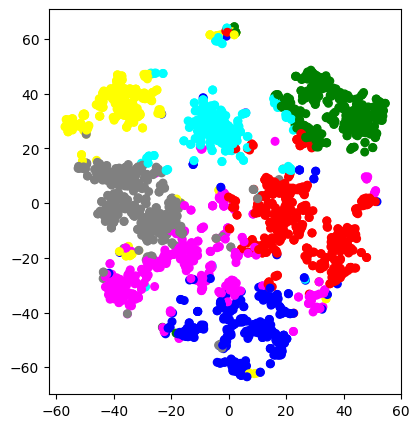

epoch 1: nmi 0.4951, ari 0.4338, acc 0.6754, f1 0.6677


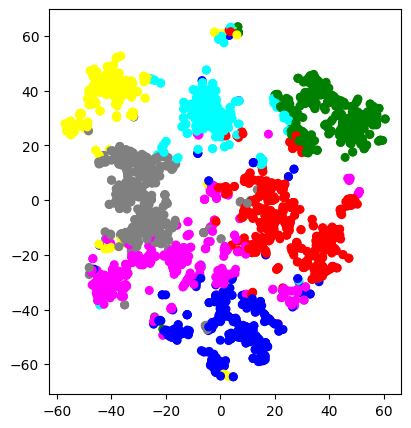

epoch 2: nmi 0.4938, ari 0.4370, acc 0.6776, f1 0.6686


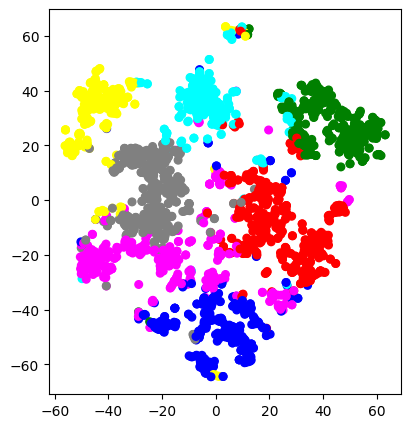

epoch 3: nmi 0.4928, ari 0.4382, acc 0.6780, f1 0.6685


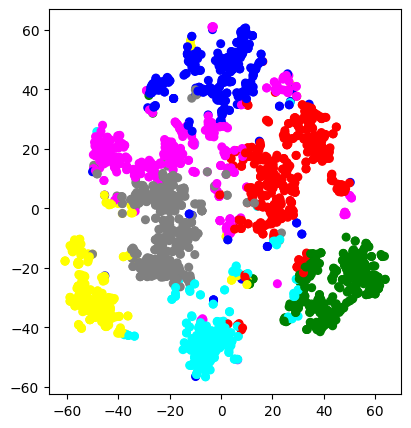

epoch 4: nmi 0.4967, ari 0.4427, acc 0.6809, f1 0.6707


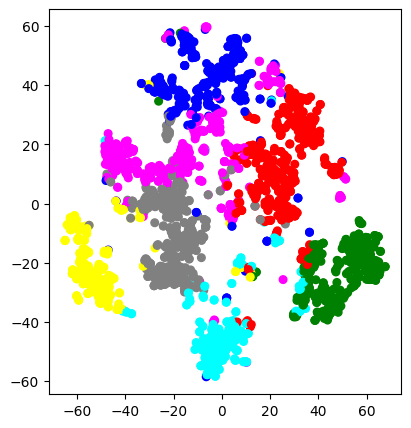

epoch 5: nmi 0.4947, ari 0.4450, acc 0.6824, f1 0.6709


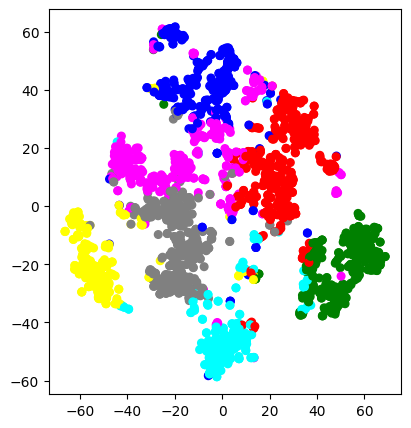

epoch 6: nmi 0.4940, ari 0.4454, acc 0.6828, f1 0.6706


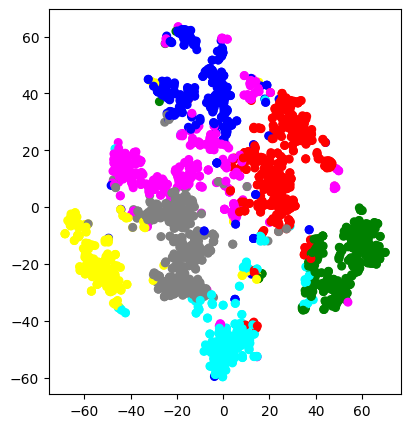

epoch 7: nmi 0.4941, ari 0.4483, acc 0.6846, f1 0.6716


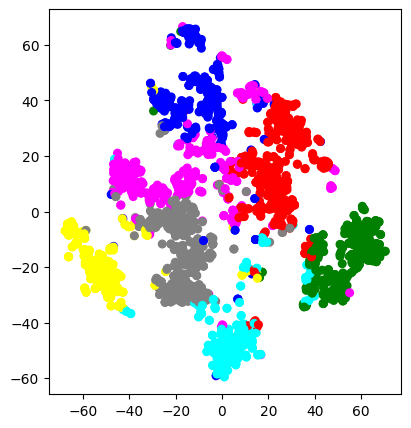

epoch 8: nmi 0.4969, ari 0.4558, acc 0.6887, f1 0.6745


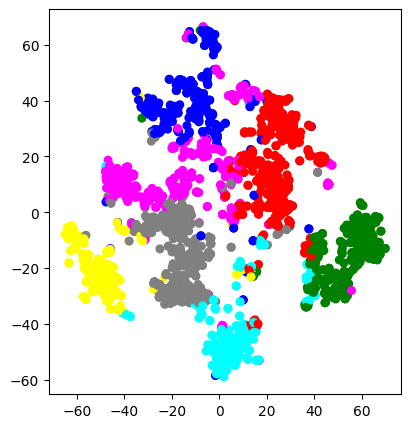

epoch 9: nmi 0.4979, ari 0.4583, acc 0.6905, f1 0.6761


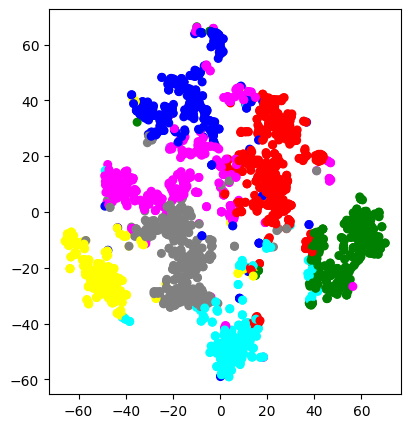

epoch 10: nmi 0.4999, ari 0.4642, acc 0.6939, f1 0.6784


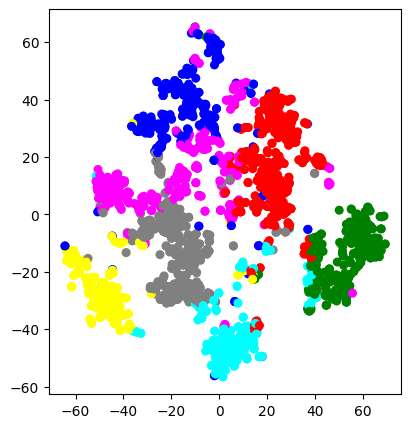

epoch 11: nmi 0.5012, ari 0.4675, acc 0.6953, f1 0.6794


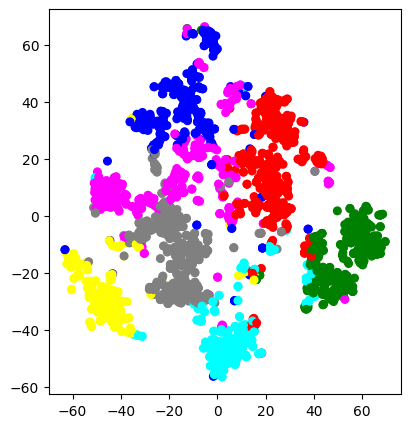

epoch 12: nmi 0.5011, ari 0.4683, acc 0.6961, f1 0.6799


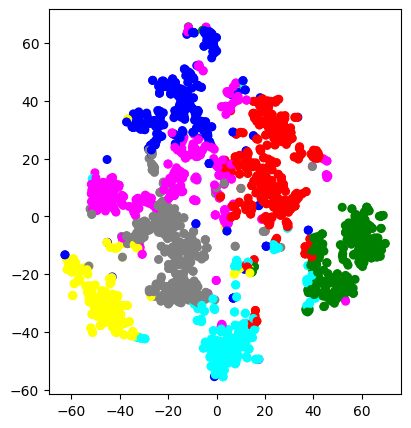

epoch 13: nmi 0.4971, ari 0.4675, acc 0.6950, f1 0.6778


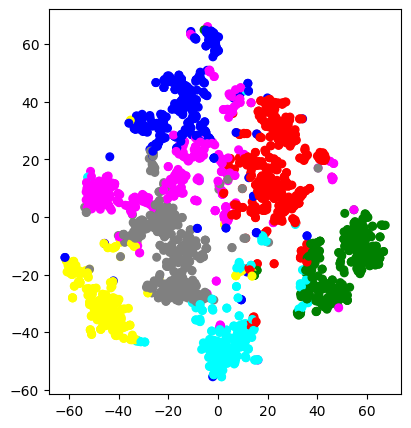

epoch 14: nmi 0.4988, ari 0.4694, acc 0.6965, f1 0.6792


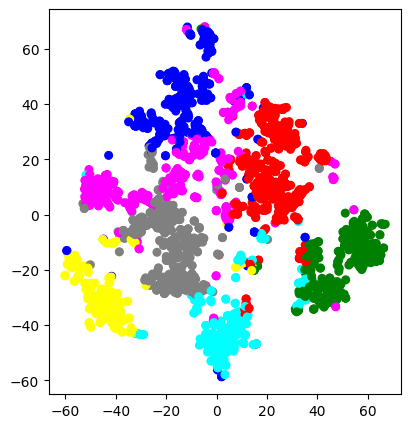

epoch 15: nmi 0.4996, ari 0.4714, acc 0.6972, f1 0.6795


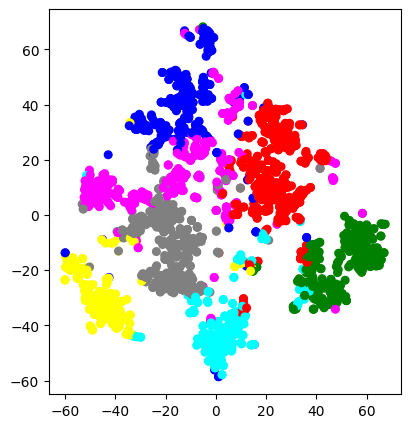

epoch 16: nmi 0.5004, ari 0.4725, acc 0.6976, f1 0.6797


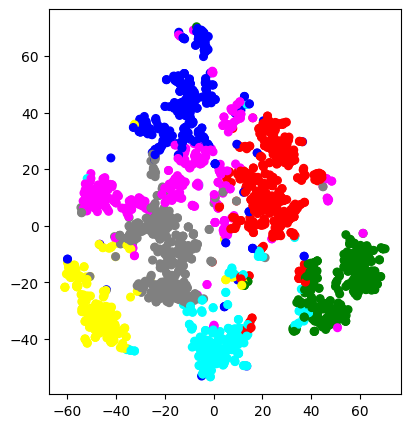

epoch 17: nmi 0.5021, ari 0.4757, acc 0.6987, f1 0.6802


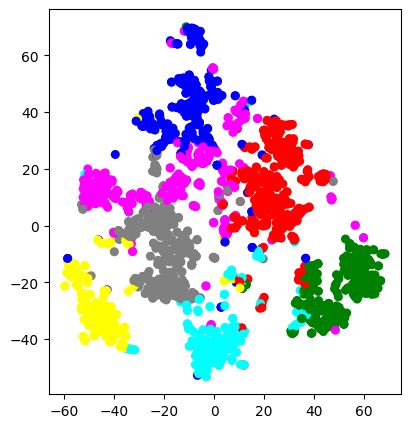

epoch 18: nmi 0.5012, ari 0.4743, acc 0.6976, f1 0.6792


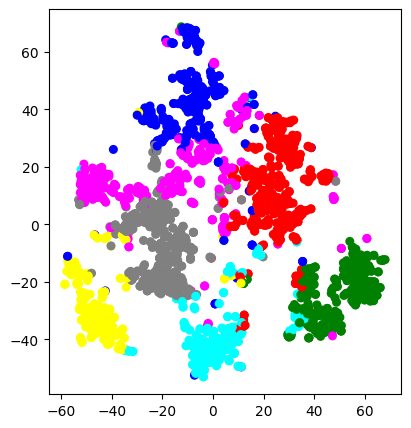

epoch 19: nmi 0.5023, ari 0.4741, acc 0.6965, f1 0.6778


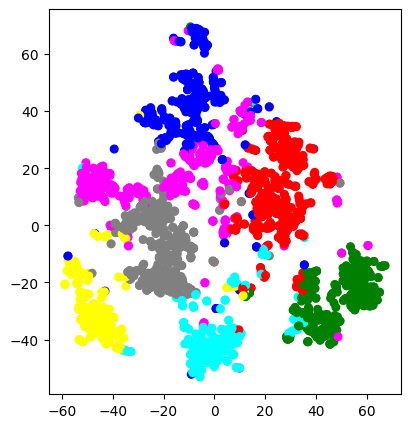

epoch 20: nmi 0.5017, ari 0.4736, acc 0.6957, f1 0.6771


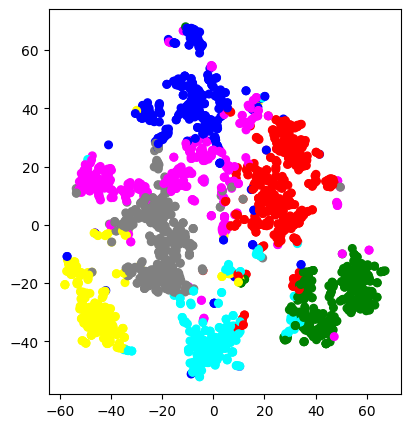

epoch 21: nmi 0.5017, ari 0.4749, acc 0.6961, f1 0.6770


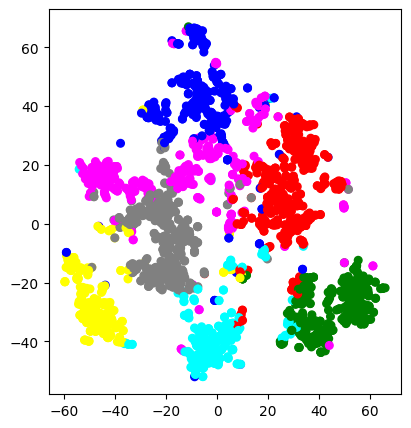

epoch 22: nmi 0.5041, ari 0.4756, acc 0.6961, f1 0.6776


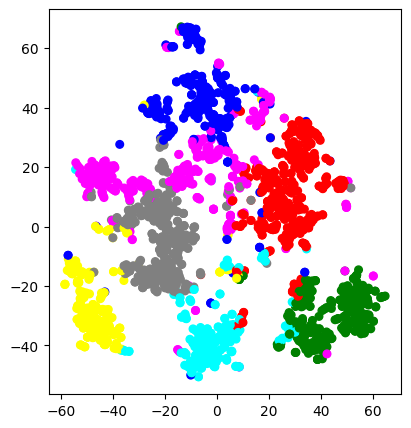

epoch 23: nmi 0.5034, ari 0.4743, acc 0.6957, f1 0.6774


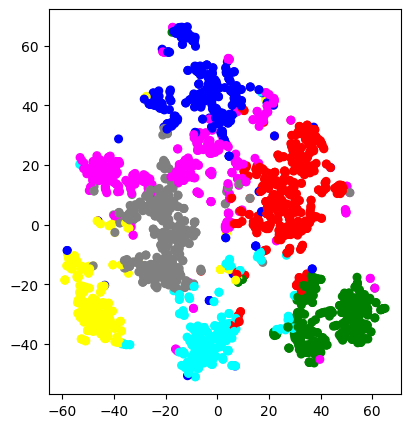

epoch 24: nmi 0.5041, ari 0.4747, acc 0.6957, f1 0.6776


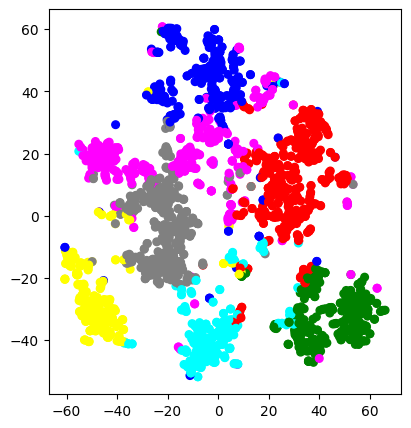

epoch 25: nmi 0.5036, ari 0.4747, acc 0.6965, f1 0.6782


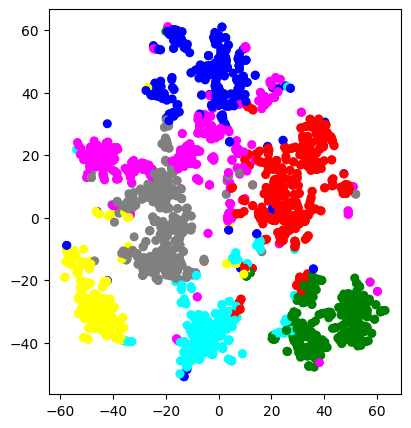

epoch 26: nmi 0.5034, ari 0.4755, acc 0.6968, f1 0.6786


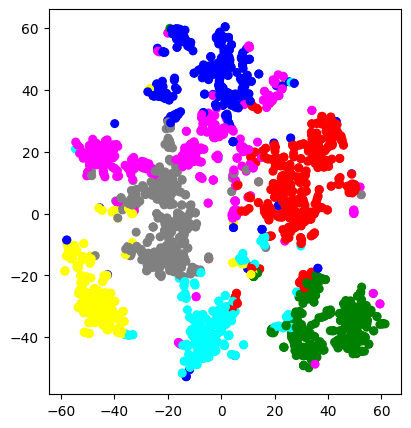

epoch 27: nmi 0.5044, ari 0.4773, acc 0.6979, f1 0.6794


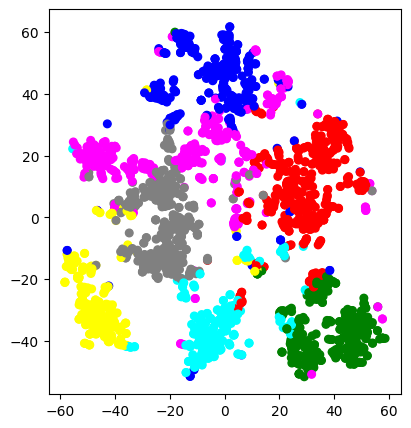

epoch 28: nmi 0.5059, ari 0.4789, acc 0.6983, f1 0.6797


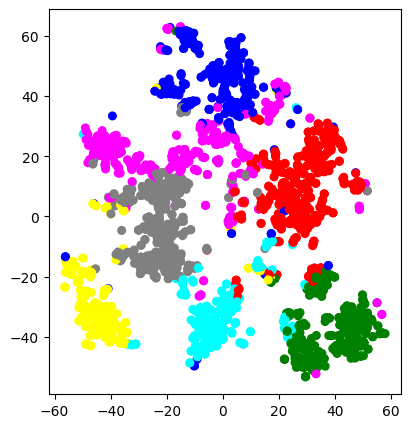

epoch 29: nmi 0.5067, ari 0.4794, acc 0.6983, f1 0.6796


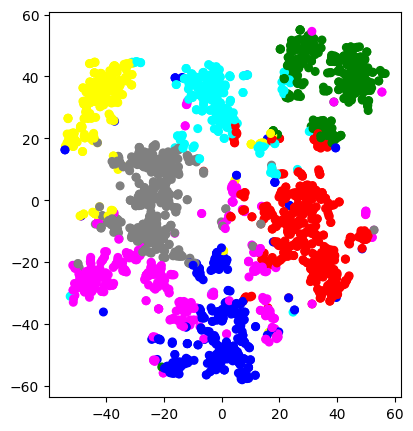

epoch 30: nmi 0.5070, ari 0.4779, acc 0.6976, f1 0.6792


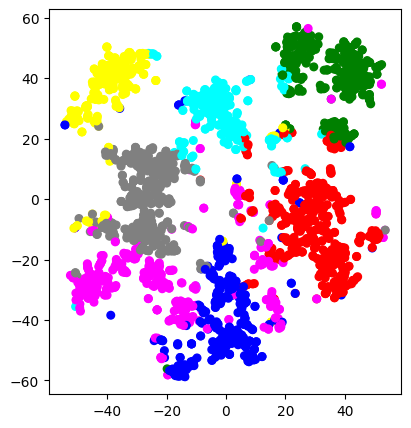

epoch 31: nmi 0.5080, ari 0.4792, acc 0.6987, f1 0.6802


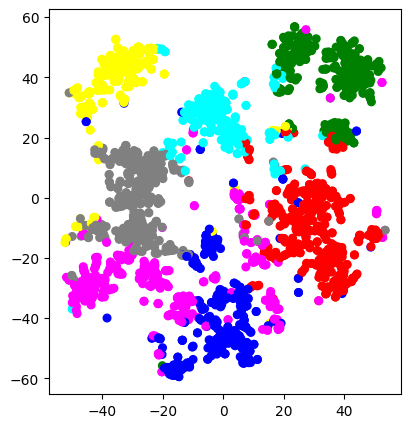

epoch 32: nmi 0.5076, ari 0.4791, acc 0.6987, f1 0.6802


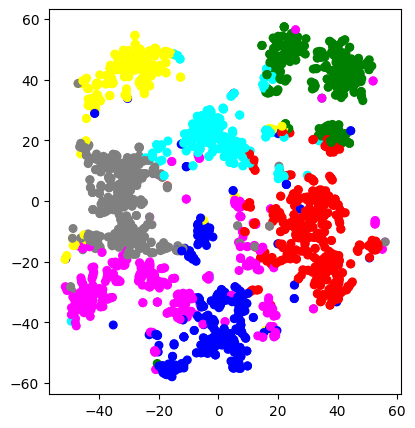

epoch 33: nmi 0.5081, ari 0.4804, acc 0.6987, f1 0.6795


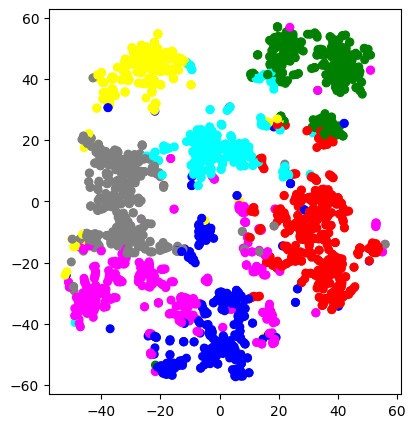

epoch 34: nmi 0.5090, ari 0.4799, acc 0.6987, f1 0.6800


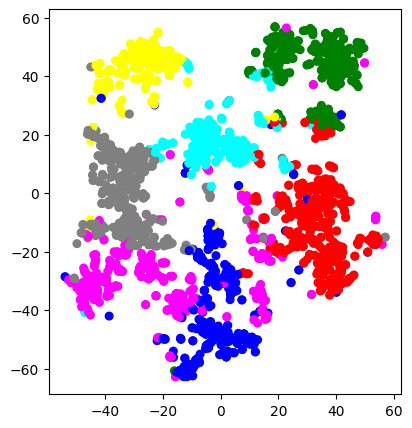

epoch 35: nmi 0.5090, ari 0.4799, acc 0.6983, f1 0.6794


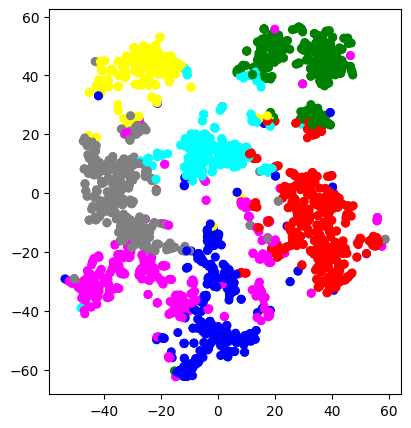

epoch 36: nmi 0.5103, ari 0.4825, acc 0.6990, f1 0.6798


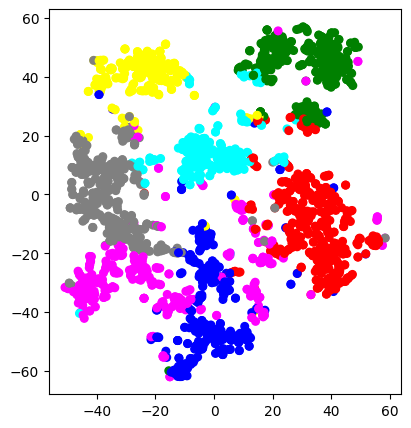

epoch 37: nmi 0.5087, ari 0.4822, acc 0.6987, f1 0.6789


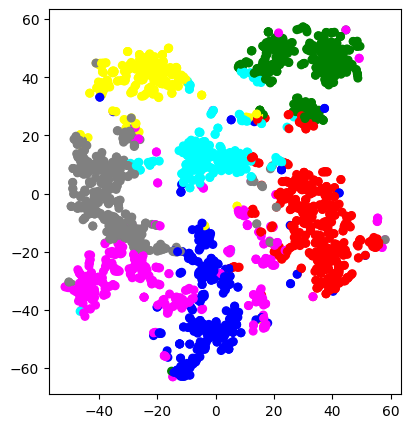

epoch 38: nmi 0.5078, ari 0.4823, acc 0.6983, f1 0.6782


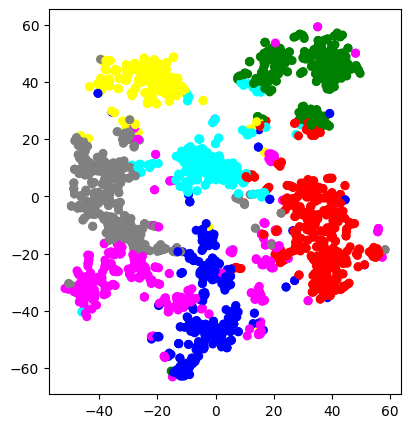

epoch 39: nmi 0.5089, ari 0.4849, acc 0.6998, f1 0.6792


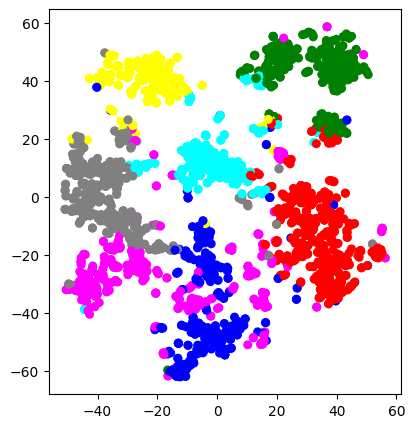

epoch 40: nmi 0.5122, ari 0.4884, acc 0.7005, f1 0.6792


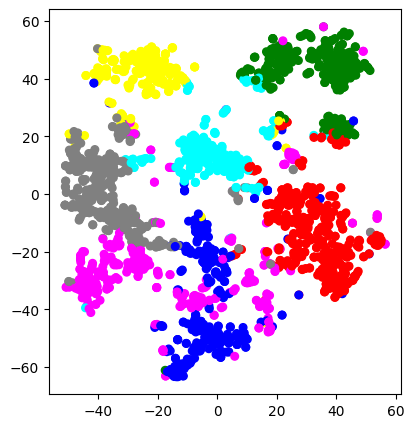

epoch 41: nmi 0.5112, ari 0.4882, acc 0.7009, f1 0.6794


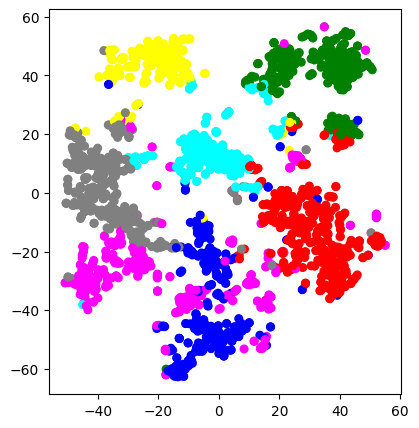

epoch 42: nmi 0.5110, ari 0.4881, acc 0.6994, f1 0.6771


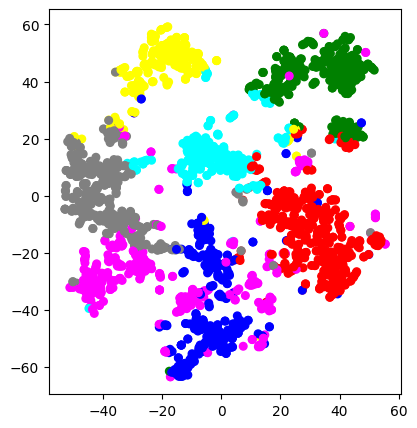

epoch 43: nmi 0.5124, ari 0.4900, acc 0.6998, f1 0.6772


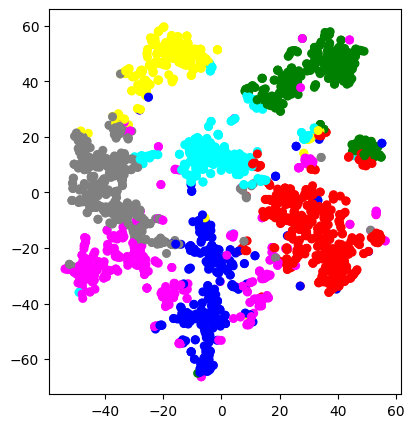

epoch 44: nmi 0.5139, ari 0.4917, acc 0.7001, f1 0.6772


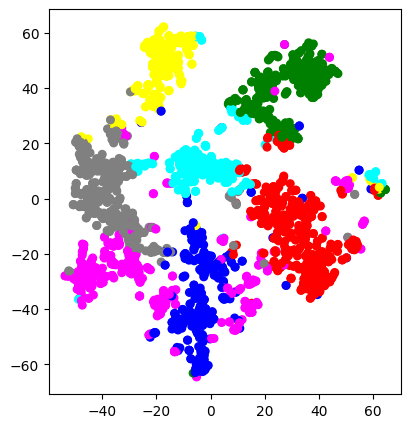

epoch 45: nmi 0.5158, ari 0.4945, acc 0.7005, f1 0.6770


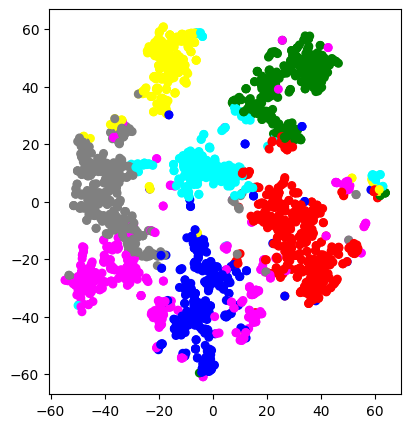

epoch 46: nmi 0.5159, ari 0.4956, acc 0.6998, f1 0.6753


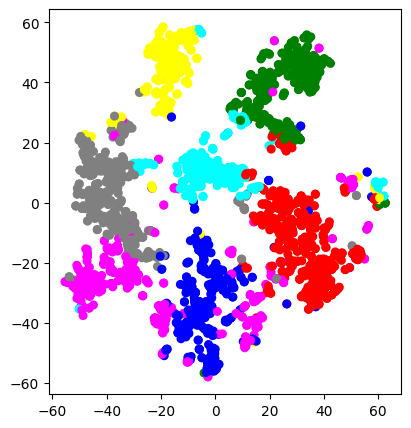

epoch 47: nmi 0.5181, ari 0.4974, acc 0.7009, f1 0.6763


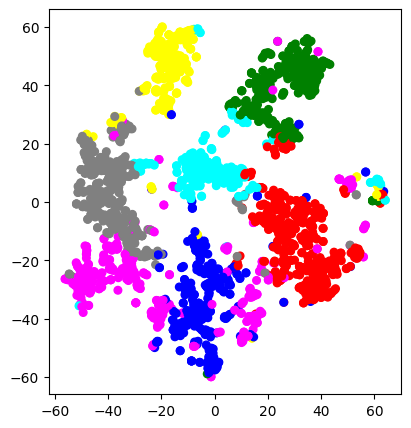

epoch 48: nmi 0.5187, ari 0.4986, acc 0.7013, f1 0.6763


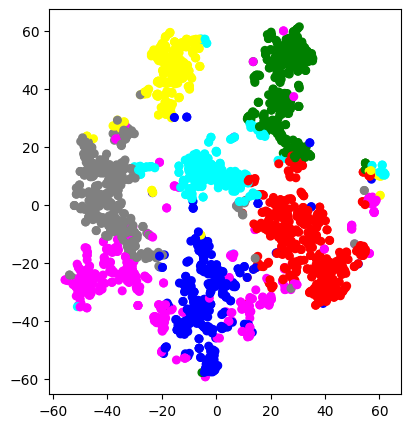

epoch 49: nmi 0.5180, ari 0.4982, acc 0.7009, f1 0.6756


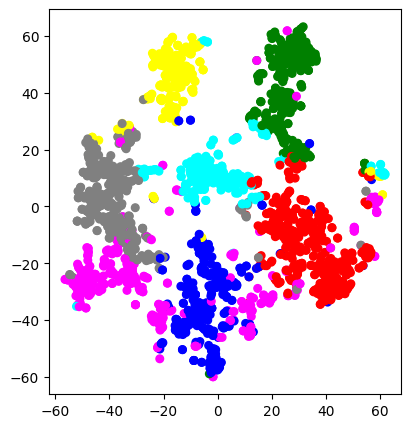

max :acc 0.7013, nmi 0.5187, ari 0.4986, f1 0.6802


In [ ]:
import argparse
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.optim import Adam
import matplotlib.pyplot as plt
from torch_geometric.datasets import Planetoid
import utils
# from model import GATE
# from model import Modula
# from evaluation import eva
# from sklearn.manifold import TSNE
import pandas as pd
from torch.nn import init
import matplotlib.pyplot as plt

# init.normal_(net[0].weight, mean=0, std=0.01)
# init.constant_(net[0].bias, val=0)  # 也可以直接修改bias的data: net[0].bias.data.fill_(0)
#
# net = nn.Sequential(
#     nn.Linear(num_inputs, 1)
#     # 此处还可以传入其他层
#     )
# print(net)
# print(net[0])
# from visiuation import plot_embedding


def maxmetr(acc, nmi, ari, f1):
    print(f"max :acc {acc:.4f}, nmi {nmi:.4f}, ari {ari:.4f}, f1 {f1:.4f}")
    return


class CDBNE(nn.Module):
    def __init__(self, num_features, middle_size, representation_size, alpha, clusters_number, v=1):
        super(CDBNE, self).__init__()
        self.clusters_number = clusters_number
        self.v = v

        # get model
        self.gate = GATE(num_features, middle_size, representation_size, alpha)
        self.gate.load_state_dict(torch.load(args.pathes, map_location='cpu'))

        # cluster layer   # cluster layer，簇头embed
        self.cluster_layer = Parameter(torch.Tensor(clusters_number, representation_size))
        torch.nn.init.xavier_normal_(self.cluster_layer.data)

    def forward(self, x, adj, M):
        # 得到reconstruct的邻接和[N, feat_size]的节点embedding Z
        A_pred, z_embedding = self.gate(x, adj, M)
        q = self.modularity(z_embedding)
        return A_pred, z_embedding, q

    def modularity(self, z_embedding):
        dist = torch.sum(torch.pow(z_embedding.unsqueeze(1) - self.cluster_layer, 2), 2)
        q = 1.0 / (1.0 + dist / self.v) ** ((self.v + 1.0) / 2.0)
        q = q.pow((self.v + 1.0) / 2.0)
        q = (q.t() / torch.sum(q, 1)).t()
        return q


def target_fenbu(q):
    weight = q ** 2 / q.sum(0)
    return (weight.t() / weight.sum(1)).t()


def trainer(shujuji):
    model = CDBNE(num_features=args.input_dim, middle_size=args.middle_size,
                  representation_size=args.representation_size, alpha=args.alpha, clusters_number=args.n_clusters).to(
        device)
    # print(model)

    optimizer = Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)
    # optimizer1 = optim.SGD(net.parameters(), lr=0.03)
    # data process
    shujuji = utils.data_preprocessing(shujuji)
    adj = shujuji.adj.to(device)
    adj_label = shujuji.adj_label.to(device)
    M = utils.get_M(adj).to(device)

    # data label
    data = torch.Tensor(shujuji.x).to(device)
    y = shujuji.y.cpu().numpy()
    # y的尺寸为2708 [3 4 4 ... 3 3 3]

    with torch.no_grad():
        # 相当epoch的模型做一eval
        _, z_embedding = model.gate(data, adj, M)

    # get kmeans and pre result
    # 这里是用pre结果来初始化kmean中心
    kmeans = KMeans(n_clusters=args.n_clusters, n_init=20)
    kmeans.fit(z_embedding.data.cpu())
    # vis.plot_embedding(z_embedding.data.cpu())
    y_pred = kmeans.fit_predict(z_embedding.data.cpu().numpy())  # 得到label
    # y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
    # plt.scatter(z_embedding.data.cpu().numpy()[:, 0], z_embedding.data.cpu().numpy()[:, 1], c=y_pred)
    # plt.show()
    # y_pred = DBSCAN().fit_predict(z_embedding.data.cpu().numpy())
    # eva(y, y_pred, 'pre')
    # model.cluster_layer.data = torch.tensor(kmeans.cluster_centers_).to(device)
    model.cluster_layer.data = torch.tensor(kmeans.cluster_centers_).to(device)
    # print(kmeans.cluster_centers_)
    ADj = np.array(utils.data_preprocessing(shujuji).adj)  # 得到正常邻接矩阵
    listacc = []
    listnmi = []
    listari = []
    listf1 = []

    # i = 1
    for epoch in range(args.max_epoch):
        model.train()
        if epoch % args.update_interval == 0:
            # update_interval
            A_pred, z_embedding, Q = model(data, adj, M)
            q = Q.detach().data.cpu().numpy().argmax(1)
            acc, nmi, ari, f1 = eva(y, q, epoch)
            listacc.append(acc)
            listnmi.append(nmi)
            listari.append(ari)
            listf1.append(f1)

        A_pred, z_embedding, q = model(data, adj, M)
        # 输入 2708*16
        z_embeddin = TSNE(n_components=2).fit_transform(z_embedding.data.cpu().numpy())
        '''分隔符'''  # 这里是聚类可视化
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        # plt.scatter(z_embeddin[:, 0], z_embeddin[:, 1], c=y_pred, s=20)
        color_set = ('gray', 'green', 'red', 'cyan', 'magenta', 'yellow', 'blue')
        color_list = [color_set[int(label)] for label in y_pred]
        plt.scatter(z_embeddin[:, 0], z_embeddin[:, 1], c=color_list, s=30)
        plt.show()
        '''分隔符'''
        # fig = plot_embedding(z_embeddin, y, 'julei')
        # 显示图像
        # plt.show()
        p = target_fenbu(Q.detach())
        kl_loss = F.kl_div(q.log(), p, reduction='batchmean')
        re_loss = F.binary_cross_entropy(A_pred.view(-1), adj_label.view(-1))
        MU_loss = Modula(adj.detach().numpy(), A_pred.detach().numpy())

        loss = 0.001 * kl_loss + re_loss - 0.1 * MU_loss

        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # optimizer1.step()
    print(f"max :acc {max(listacc):.4f}, nmi {max(listnmi):.4f}, ari {max(listari):.4f}, f1 {max(listf1):.4f}")


def GetPrearr(x, num_cluster):
    matrix = np.zeros((len(x), num_cluster))
    for i in range(len(x)):
        for j in range(num_cluster):
            matrix[i][j] = 0
            matrix[i][x[i]] = 1
    return matrix

if __name__ == "__main__":

    parser = argparse.ArgumentParser(
        description='train',
        formatter_class=argparse.ArgumentDefaultsHelpFormatter)

    parser.add_argument('--weight_decay', type=int, default=5e-3)
    parser.add_argument('--alpha', type=float, default=0.2, help='Alpha for the leaky_relu.')
    parser.add_argument('--alpha1', type=float, default=1, help="p and q")
    parser.add_argument('--name', type=str, default='Cora')
    parser.add_argument('--epoch', type=int, default=30)
    parser.add_argument('--max_epoch', type=int, default=50) # default=500
    parser.add_argument('--lr', type=float, default=0.0001)
    parser.add_argument('--n_clusters', default=6, type=int)
    parser.add_argument('--update_interval', default=1, type=int)  # [1,3,5]
    parser.add_argument('--middle_size', default=256, type=int)
    parser.add_argument('--representation_size', default=16, type=int)
    parser.add_argument("-f", required=False)

    args = parser.parse_args()
    args.cuda = torch.cuda.is_available()
    device = torch.device("cuda" if args.cuda else "cpu")
    datasets = utils.get_dataset(args.name)
    shujuji = datasets[0]

    if args.name == 'Cora':
        args.lr = 0.0001
        args.k = None
        args.n_clusters = 7
        args.epoch = 1
        args.v = 1
    else:
        args.k = None

    args.pathes = f'/content/CDBNE/pre/preCDBNE_{args.name}_{args.epoch}.pkl'
    args.input_dim = shujuji.num_features

    print(args)
    trainer(shujuji)

## One2Multi Model ✔️

### Settings

In [ ]:
!git clone https://github.com/googlebaba/WWW2020-O2MAC.git

Cloning into 'WWW2020-O2MAC'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 106 (delta 32), reused 63 (delta 13), pack-reused 0
Receiving objects: 100% (106/106), 2.03 MiB | 6.87 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [ ]:
import sys
sys.path.append('/content/WWW2020-O2MAC')

In [ ]:
!pip install munkres

### Code

#### inits

In [ ]:
import tensorflow as tf
import numpy as np

# DISCLAIMER:
# Parts of this code file are derived from
# https://github.com/tkipf/gcn
# which is under an identical MIT license as GraphSAGE

def uniform(shape, scale=0.05, name=None):
    """Uniform init."""
    initial = tf.compat.v1.random_uniform(shape, minval=-scale, maxval=scale, dtype=tf.float32)
    return tf.Variable(initial, name=name)


def glorot(shape, name=None):
    """Glorot & Bengio (AISTATS 2010) init."""
    init_range = np.sqrt(6.0/(shape[0]+shape[1]))
    initial = tf.compat.v1.random_uniform(shape, minval=-init_range, maxval=init_range, dtype=tf.float32)
    return tf.Variable(initial, name=name)


def zeros(shape, name=None):
    """All zeros."""
    initial = tf.zeros(shape, dtype=tf.float32)
    return tf.Variable(initial, name=name)

def ones(shape, name=None):
    """All ones."""
    initial = tf.ones(shape, dtype=tf.float32)
    return tf.Variable(initial, name=name)

def weight_variable_glorot(input_dim, output_dim, name=""):
    """Create a weight variable with Glorot & Bengio (AISTATS 2010)
    initialization.
    """
    init_range = np.sqrt(6.0 / (input_dim + output_dim))
    initial = tf.compat.v1.random_uniform([input_dim, output_dim], minval=-init_range,
                                maxval=init_range, dtype=tf.float32)
    return tf.Variable(initial, name=name)

#### Code Settings

In [ ]:
import tensorflow as tf
import numpy as np
flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.compat.v1.flags.FLAGS)


flags.DEFINE_integer('hidden3', 64, 'Number of units in hidden layer 3.')
flags.DEFINE_float('learning_rate', .5*0.001, 'Initial learning rate.')
flags.DEFINE_integer('hidden1', 32, 'Number of units in hidden layer 1.')
flags.DEFINE_integer('hidden2', 32, 'Number of units in hidden layer 2.')
flags.DEFINE_integer('input_view', 0, 'View No. informative view, ACM:0, DBLP:1')
flags.DEFINE_float('weight_decay', 0.0001, 'Weight for L2 loss on embedding matrix.')
flags.DEFINE_float('fea_decay', 0.5, 'feature decay.')
flags.DEFINE_float('weight_R', 0.001, 'Weight for R loss on embedding matrix.')
flags.DEFINE_float('dropout', 0., 'Dropout rate (1 - keep probability).')
flags.DEFINE_float('attn_drop', 0., 'Dropout rate (1 - keep probability).')
flags.DEFINE_float('ffd_drop', 0., 'Dropout rate (1 - keep probability).')
flags.DEFINE_integer('features', 1, 'Whether to use features (1) or not (0).')
flags.DEFINE_integer('seed', 50, 'seed for fixing the results.')
flags.DEFINE_integer('iterations', 50, 'number of iterations.')
flags.DEFINE_integer('n_clusters', 3, 'predict label early stop.')
flags.DEFINE_float('kl_decay', 0.1, 'kl loss decay.')




'''
infor: number of clusters
'''
infor = {'ACM':3, 'DBLP':4}


'''
We did not set any seed when we conducted the experiments described in the paper;
We set a seed here to steadily reveal better performance of ARGA
'''
#seed = 7
#np.random.seed(seed)
#tf.set_random_seed(seed)

def get_settings(dataname, model, task):
    if  dataname != 'ACM' and dataname != 'DBLP':
        print('error: wrong data set name')
    if model != 'arga_ae' and model != 'arga_vae':
        print('error: wrong model name')
    if task != 'clustering' and task != 'link_prediction':
        print('error: wrong task name')

    if task == 'clustering':
        iterations = FLAGS['iterations'].value
        clustering_num = infor[dataname]
        re = {'data_name': dataname, 'iterations' : iterations, 'clustering_num' :clustering_num, 'model' : model}
    elif task == 'link_prediction':
        iterations = 4 * FLAG['iterations'].value
        re = {'data_name': dataname, 'iterations' : iterations,'model' : model}

    return re

#### Preprocessing

In [ ]:
import numpy as np
import scipy.sparse as sp


def sparse_to_tuple(sparse_mx):
    if not sp.isspmatrix_coo(sparse_mx):
        sparse_mx = sparse_mx.tocoo()
    coords = np.vstack((sparse_mx.row, sparse_mx.col)).transpose()
    values = sparse_mx.data
    shape = sparse_mx.shape
    return coords, values, shape


def get_multi_sampled_index(adjs, size, center_num=3):
    numView = len(adjs)
    nodes = adjs[0].shape[0]
    indices = set(np.random.choice(nodes, center_num, False))
    indice = []
    for n in range(numView):
        indice.append(get_sampled_index(adjs[n], size, center_num, indices))
    indice_set = set(indice[0])
    for in_set in indice:
        indice_set = indice_set & set(in_set)
    return sorted(indice_set)


def get_sampled_index(adj, size, center_num, indices):
    n = adj.shape[0]
    pre_indices = set()
    #indices = set(np.random.choice(n, center_num, False))
    while len(indices) < size:
        if len(pre_indices) != len(indices):
            new_add = indices - pre_indices
            pre_indices = indices
            candidates = get_candidates(adj, new_add) - indices
        else:
            candidates = random_num(n, center_num, indices)
        sample_size = min(len(candidates), size-len(indices))
        if not sample_size:
            break
        if len(candidates) > size - len(indices):
            candidates = set(np.random.choice(list(candidates), size-len(indices), False))
        indices.update(candidates)
    return sorted(indices)


def get_candidates(adj, new_add):
    tmp = adj[sorted(new_add)].sum(axis=0)

    tmp1 = adj[sorted(new_add)].sum(axis=0).nonzero()[0]
    return set(adj[sorted(new_add)].sum(axis=0).nonzero()[0])


def random_num(n, num, indices):
    cans = set(np.arange(n)) - indices
    num = min(num, len(cans))
    if len(cans) == 0:
        return set()
    new_add = set(np.random.choice(list(cans), num, replace=False))
    return new_add

def preprocess_graph(adjs):
    numView = len(adjs)
    adjs_normarlized = []
    for v in range(numView):
        adj = sp.coo_matrix(adjs[v])
        adj_ = adj + sp.eye(adj.shape[0])
        rowsum = np.array(adj_.sum(1))
        degree_mat_inv_sqrt = sp.diags(np.power(rowsum, -0.5).flatten())
        adj_normalized = adj_.dot(degree_mat_inv_sqrt).transpose().dot(degree_mat_inv_sqrt).toarray()
        adjs_normarlized.append(adj_normalized.tolist())
    return np.array(adjs_normarlized)


def construct_feed_dict(adj_normalized, adj, features, placeholders):
    # construct feed dictionary
    feed_dict = dict()
    feed_dict.update({placeholders['features']: features})
    feed_dict.update({placeholders['adjs']: adj_normalized})
    feed_dict.update({placeholders['adjs_orig']: adj})
    return feed_dict


def mask_test_edges(adj):
    # Function to build test set with 10% positive links
    # NOTE: Splits are randomized and results might slightly deviate from reported numbers in the paper.
    # TODO: Clean up.

    # Remove diagonal elements
    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
    adj.eliminate_zeros()
    # Check that diag is zero:
    assert np.diag(adj.todense()).sum() == 0

    adj_triu = sp.triu(adj)
    adj_tuple = sparse_to_tuple(adj_triu)
    edges = adj_tuple[0]
    edges_all = sparse_to_tuple(adj)[0]
    num_test = int(np.floor(edges.shape[0] / 10.))
    num_val = int(np.floor(edges.shape[0] / 20.))

    all_edge_idx = range(edges.shape[0])
    np.random.shuffle(all_edge_idx)
    val_edge_idx = all_edge_idx[:num_val]
    test_edge_idx = all_edge_idx[num_val:(num_val + num_test)]
    test_edges = edges[test_edge_idx]
    val_edges = edges[val_edge_idx]
    train_edges = np.delete(edges, np.hstack([test_edge_idx, val_edge_idx]), axis=0)

    def ismember(a, b, tol=5):
        rows_close = np.all(np.round(a - b[:, None], tol) == 0, axis=-1)
        return (np.all(np.any(rows_close, axis=-1), axis=-1) and
                np.all(np.any(rows_close, axis=0), axis=0))

    test_edges_false = []
    while len(test_edges_false) < len(test_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue
        if ismember([idx_i, idx_j], edges_all):
            continue
        if test_edges_false:
            if ismember([idx_j, idx_i], np.array(test_edges_false)):
                continue
            if ismember([idx_i, idx_j], np.array(test_edges_false)):
                continue
        test_edges_false.append([idx_i, idx_j])

    val_edges_false = []
    while len(val_edges_false) < len(val_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue
        if ismember([idx_i, idx_j], train_edges):
            continue
        if ismember([idx_j, idx_i], train_edges):
            continue
        if ismember([idx_i, idx_j], val_edges):
            continue
        if ismember([idx_j, idx_i], val_edges):
            continue
        if val_edges_false:
            if ismember([idx_j, idx_i], np.array(val_edges_false)):
                continue
            if ismember([idx_i, idx_j], np.array(val_edges_false)):
                continue
        val_edges_false.append([idx_i, idx_j])

    assert ~ismember(test_edges_false, edges_all)
    assert ~ismember(val_edges_false, edges_all)
    assert ~ismember(val_edges, train_edges)
    assert ~ismember(test_edges, train_edges)
    assert ~ismember(val_edges, test_edges)

    data = np.ones(train_edges.shape[0])

    # Re-build adj matrix
    adj_train = sp.csr_matrix((data, (train_edges[:, 0], train_edges[:, 1])), shape=adj.shape)
    adj_train = adj_train + adj_train.T

    # NOTE: these edge lists only contain single direction of edge!
    return adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false

#### Input Data

In [ ]:
import numpy as np
import pickle as pkl
import networkx as nx
import scipy.sparse as sp
import scipy.io as sio

def parse_index_file(filename):
    index = []
    for line in open(filename):
        index.append(int(line.strip()))
    return index

def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)

def label_mask(labels):
    num = labels.shape[1]
    label_mask = np.dot(labels, np.array(range(num)).reshape((num, 1))).reshape((labels.shape[0]))
    return label_mask

def load_data(dataset):
    # load the data: x, tx, allx, graph
    if dataset == "ACM":
        dataset_path = "/content/WWW2020-O2MAC/data/ACM3025.mat"
    elif dataset == "DBLP":
        dataset_path = "/content/WWW2020-O2MAC/data/DBLP4057_GAT_with_idx.mat"

    data = sio.loadmat(dataset_path)
        #rownetworks = np.array([(data['PLP'] - np.eye(N)).tolist()]) #, (data['PLP'] - np.eye(N)).tolist() , (data['PTP'] - np.eye(N)).tolist()])
    print(dataset)
    if dataset == "ACM":
        truelabels, truefeatures = data['label'], data['feature'].astype(float)
        N = truefeatures.shape[0]
        rownetworks = np.array([(data['PAP']).tolist(), (data['PLP']).tolist()])
    elif dataset == "DBLP":
        truelabels, truefeatures = data['label'], data['features'].astype(float)
        N = truefeatures.shape[0]
        rownetworks = np.array([(data['net_APA']).tolist(), (data['net_APCPA']).tolist(), (data['net_APTPA']).tolist()])
    numView = rownetworks.shape[0]
    y = truelabels
    train_idx = data['train_idx']
    val_idx = data['val_idx']
    test_idx = data['test_idx']
    train_mask = sample_mask(train_idx, y.shape[0])
    val_mask = sample_mask(val_idx, y.shape[0])
    test_mask = sample_mask(test_idx, y.shape[0])

    y_train = np.zeros(y.shape)
    y_val = np.zeros(y.shape)
    y_test = np.zeros(y.shape)
    y_train[train_mask, :] = y[train_mask, :]
    y_val[val_mask, :] = y[val_mask, :]
    y_test[test_mask, :] = y[test_mask, :]

    # return selected_idx, selected_idx_2
    print('y_train:{}, y_val:{}, y_test:{}, train_idx:{}, val_idx:{}, test_idx:{}'.format(y_train.shape,
                                                                                          y_val.shape,
                                                                                          y_test.shape,
                                                                                          train_idx.shape,
                                                                                          val_idx.shape,
                                                                                          test_idx.shape))
    return np.array(rownetworks), numView, truefeatures, truelabels, y_train, y_val, y_test, train_mask, val_mask, test_mask

#### Metrics

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn import metrics
from munkres import Munkres, print_matrix
import numpy as np

class linkpred_metrics():
    def __init__(self, edges_pos, edges_neg):
        self.edges_pos = edges_pos
        self.edges_neg = edges_neg

    def get_roc_score(self, emb, feas):
        # if emb is None:
        #     feed_dict.update({placeholders['dropout']: 0})
        #     emb = sess.run(model.z_mean, feed_dict=feed_dict)

        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        # Predict on test set of edges
        adj_rec = np.dot(emb, emb.T)
        preds = []
        pos = []
        for e in self.edges_pos:
            preds.append(sigmoid(adj_rec[e[0], e[1]]))
            pos.append(feas['adj_orig'][e[0], e[1]])

        preds_neg = []
        neg = []
        for e in self.edges_neg:
            preds_neg.append(sigmoid(adj_rec[e[0], e[1]]))
            neg.append(feas['adj_orig'][e[0], e[1]])

        preds_all = np.hstack([preds, preds_neg])
        labels_all = np.hstack([np.ones(len(preds)), np.zeros(len(preds))])
        roc_score = roc_auc_score(labels_all, preds_all)
        ap_score = average_precision_score(labels_all, preds_all)

        return roc_score, ap_score, emb


class clustering_metrics():
    def __init__(self, true_label, predict_label):
        self.true_label = true_label
        self.pred_label = predict_label


    def clusteringAcc(self):
        # best mapping between true_label and predict label
        l1 = list(set(self.true_label))
        numclass1 = len(l1)

        l2 = list(set(self.pred_label))
        numclass2 = len(l2)
        if numclass1 != numclass2:
            print('Class Not equal, Error!!!!')
            return 0, 0, 0, 0, 0, 0, 0

        cost = np.zeros((numclass1, numclass2), dtype=int)
        for i, c1 in enumerate(l1):
            mps = [i1 for i1, e1 in enumerate(self.true_label) if e1 == c1]
            for j, c2 in enumerate(l2):
                mps_d = [i1 for i1 in mps if self.pred_label[i1] == c2]
                cost[i][j] = len(mps_d)

        # match two clustering results by Munkres algorithm
        m = Munkres()
        cost = cost.__neg__().tolist()

        indexes = m.compute(cost)
        idx = indexes[2][1]
        # get the match results
        new_predict = np.zeros(len(self.pred_label))
        for i, c in enumerate(l1):
            # correponding label in l2:
            c2 = l2[indexes[i][1]]
            # ai is the index with label==c2 in the pred_label list
            ai = [ind for ind, elm in enumerate(self.pred_label) if elm == c2]
            new_predict[ai] = c

        acc = metrics.accuracy_score(self.true_label, new_predict)
        f1_macro = metrics.f1_score(self.true_label, new_predict, average='macro')
        precision_macro = metrics.precision_score(self.true_label, new_predict, average='macro')
        recall_macro = metrics.recall_score(self.true_label, new_predict, average='macro')
        f1_micro = metrics.f1_score(self.true_label, new_predict, average='micro')
        precision_micro = metrics.precision_score(self.true_label, new_predict, average='micro')
        recall_micro = metrics.recall_score(self.true_label, new_predict, average='micro')
        return acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro, idx

    def evaluationClusterModelFromLabel(self):
        nmi = metrics.normalized_mutual_info_score(self.true_label, self.pred_label)
        adjscore = metrics.adjusted_rand_score(self.true_label, self.pred_label)
        acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro, idx = self.clusteringAcc()

        print('ACC=%f, f1_macro=%f, precision_macro=%f, recall_macro=%f, f1_micro=%f, precision_micro=%f, recall_micro=%f, NMI=%f, ADJ_RAND_SCORE=%f' % (acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro, nmi, adjscore))

        fh = open('recoder.txt', 'a')

        fh.write('ACC=%f, f1_macro=%f, precision_macro=%f, recall_macro=%f, f1_micro=%f, precision_micro=%f, recall_micro=%f, NMI=%f, ADJ_RAND_SCORE=%f' % (acc, f1_macro, precision_macro, recall_macro, f1_micro, precision_micro, recall_micro, nmi, adjscore) )
        fh.write('\r\n')
        fh.flush()
        fh.close()

        return acc, f1_macro, precision_macro, nmi, adjscore, idx

#### Optimizer

In [ ]:
import tensorflow as tf
flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS


class OptimizerAE(object):
    def __init__(self, model, preds_fuze, p, labels,  numView,\
         pos_weights, fea_pos_weights, norm):
    #labels 为adj_origin
        labels_sub = labels

        self.cost = 0
        self.cost_list = []
        all_variables = tf.compat.v1.trainable_variables()

        self.l2_loss = 0
        for var in all_variables:
            self.l2_loss += FLAGS['weight_decay'].value * tf.nn.l2_loss(var)
        for v in range(numView):
            self.cost += tf.compat.v1.reduce_mean(tf.compat.v1.nn.weighted_cross_entropy_with_logits(logits=tf.reshape(preds_fuze[v], [-1]), targets=tf.reshape(labels_sub[v], [-1]), pos_weight=pos_weights[v]))
        self.optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS['learning_rate'].value,
                                           beta1=0.9, name='adam')  # Adam Optimizer
        self.cost = self.cost + self.l2_loss
        q = model.cluster_layer_q
        kl_loss = tf.compat.v1.reduce_sum(p * tf.compat.v1.log(p/q))
        self.cost_kl = self.cost + FLAGS['kl_decay'].value* kl_loss

        self.opt_op = self.optimizer.minimize(self.cost)

        self.opt_op_kl = self.optimizer.minimize(self.cost_kl)


    def target_distribution(self, q):
        weight = tf.pow(q, 2) / tf.reduce_sum(q, axis=0)
        return tf.transpose((tf.transpose(weight)/tf.compat.v1.reduce_sum(weight, axis=1)))




class OptimizerVAE(object):
    def __init__(self, preds, labels, model, num_nodes, pos_weight, norm, d_real, d_fake):
        preds_sub = preds
        labels_sub = labels

        # Discrimminator Loss
        dc_loss_real = tf.compat.v1.reduce_mean(
            tf.compat.v1.nn.sigmoid_cross_entropy_with_logits(labels=tf.compat.v1.ones_like(d_real), logits=d_real))
        dc_loss_fake = tf.compat.v1.reduce_mean(
            tf.compat.v1.nn.sigmoid_cross_entropy_with_logits(labels=tf.compat.v1.zeros_like(d_fake), logits=d_fake))
        self.dc_loss = dc_loss_fake + dc_loss_real

        # Generator loss
        self.generator_loss = tf.compat.v1.reduce_mean(
            tf.compat.v1.nn.sigmoid_cross_entropy_with_logits(labels=tf.compat.v1.ones_like(d_fake), logits=d_fake))

        self.cost = norm * tf.compat.v1.reduce_mean(
            tf.compat.v1.nn.weighted_cross_entropy_with_logits(logits=preds_sub, targets=labels_sub, pos_weight=pos_weight))
        self.optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS['learning_rate'].value)  # Adam Optimizer

        all_variables = tf.compat.v1.trainable_variables()
        dc_var = [var for var in all_variables if 'dc_' in var.op.name]
        en_var = [var for var in all_variables if 'e_' in var.op.name]


        with tf.compat.v1.variable_scope(tf.compat.v1.get_variable_scope(), reuse=False):
            self.discriminator_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS['discriminator_learning_rate'].value,
                                                                  beta1=0.9, name='adam1').minimize(self.dc_loss, var_list=dc_var)#minimize(dc_loss_real, var_list=dc_var)

            self.generator_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS['discriminator_learning_rate'].value,
                                                              beta1=0.9, name='adam2').minimize(self.generator_loss,
                                                                                                var_list=en_var)

        self.cost = norm * tf.compat.v1.reduce_mean(tf.compat.v1.nn.weighted_cross_entropy_with_logits(logits=preds_sub, targets=labels_sub, pos_weight=pos_weight))
        self.optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=FLAGS['learning_rate'].value)  # Adam Optimizer

        # Latent loss
        self.log_lik = self.cost
        self.kl = (0.5 / num_nodes) * tf.compat.v1.reduce_mean(tf.compat.v1.reduce_sum(1 + 2 * model.z_log_std - tf.square(model.z_mean) -
                                                                   tf.square(tf.exp(model.z_log_std)), 1))
        self.cost -= self.kl

        self.opt_op = self.optimizer.minimize(self.cost)
        self.grads_vars = self.optimizer.compute_gradients(self.cost)

#### Layers

In [ ]:
# from initializations import *
import tensorflow as tf

flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

# global unique layer ID dictionary for layer name assignment
_LAYER_UIDS = {}


def get_layer_uid(layer_name=''):
    """Helper function, assigns unique layer IDs
    """
    if layer_name not in _LAYER_UIDS:
        _LAYER_UIDS[layer_name] = 1
        return 1
    else:
        _LAYER_UIDS[layer_name] += 1
        return _LAYER_UIDS[layer_name]


def dropout_sparse(x, keep_prob, num_nonzero_elems):
    """Dropout for sparse tensors. Currently fails for very large sparse tensors (>1M elements)
    """
    noise_shape = [num_nonzero_elems]
    random_tensor = keep_prob
    random_tensor += tf.compat.v1.random_uniform(noise_shape)
    dropout_mask = tf.cast(tf.floor(random_tensor), dtype=tf.bool)
    pre_out = tf.compat.v1.sparse_retain(x, dropout_mask)
    return pre_out * (1./keep_prob)


class Layer(object):
    """Base layer class. Defines basic API for all layer objects.

    # Properties
        name: String, defines the variable scope of the layer.

    # Methods
        _call(inputs): Defines computation graph of layer
            (i.e. takes input, returns output)
        __call__(inputs): Wrapper for _call()
    """
    def __init__(self, **kwargs):
        allowed_kwargs = {'name', 'logging'}
        for kwarg in kwargs.keys():
            assert kwarg in allowed_kwargs, 'Invalid keyword argument: ' + kwarg
        name = kwargs.get('name')
        if not name:
            layer = self.__class__.__name__.lower()
            name = layer + '_' + str(get_layer_uid(layer))
        self.name = name
        self.vars = {}
        logging = kwargs.get('logging', False)
        self.logging = logging
        self.issparse = False

    def _call(self, inputs):
        return inputs

    def __call__(self, inputs):
        with tf.compat.v1.name_scope(self.name):
            outputs = self._call(inputs)
            return outputs


class GraphConvolution(Layer):
    """Basic graph convolution layer for undirected graph without edge labels."""
    def __init__(self, input_dim, output_dim, adj, dropout=0., act=tf.nn.relu, **kwargs):
        super(GraphConvolution, self).__init__(**kwargs)
        with tf.compat.v1.variable_scope(self.name + '_vars'):
            self.vars['weights'] = weight_variable_glorot(input_dim, output_dim, name="weights")
            print('self.vars', self.vars['weights'])
        self.dropout = dropout
        self.adj = adj
        self.act = act

    def _call(self, inputs):
        x = inputs
        #x = tf.nn.dropout(x, 1-self.dropout)
        x = tf.matmul(x, self.vars['weights'])
        x = tf.matmul(self.adj, x)
        outputs = self.act(x)
        return outputs


class GraphConvolutionSparse(Layer):
    """Graph convolution layer for sparse inputs."""
    def __init__(self, input_dim, output_dim, adj, dropout=0., act=tf.nn.relu, **kwargs):
        super(GraphConvolutionSparse, self).__init__(**kwargs)
        with tf.compat.v1.variable_scope(self.name + '_vars'):
            self.vars['weights'] = weight_variable_glorot(input_dim, output_dim, name="weights")
        self.dropout = dropout
        self.adj = adj
        self.act = act
        self.issparse = True
        #self.features_nonzero = features_nonzero

    def _call(self, inputs):
        x = inputs
        #x = dropout_sparse(x, 1-self.dropout, self.features_nonzero)

        x = tf.compat.v1.sparse_tensor_dense_matmul(x, self.vars['weights'])
        x = tf.compat.v1.sparse_tensor_dense_matmul(self.adj, x)
        outputs = self.act(x)
        return outputs


class InnerProductDecoder(Layer):
    """Decoder model layer for link prediction."""
    def __init__(self, input_dim, name, v = 0, dropout=0.2, act=tf.nn.sigmoid, **kwargs):
        super(InnerProductDecoder, self).__init__(**kwargs)
        with tf.compat.v1.variable_scope('view', reuse=tf.compat.v1.AUTO_REUSE):
            self.vars['view_weights'] = tf.compat.v1.get_variable(name=name+str(v), shape=[input_dim, input_dim], trainable=True)
            print('self.vars:', self.vars['view_weights'])
        self.dropout = dropout
        self.act = act

    def _call(self, inputs):

        inputs = tf.nn.dropout(inputs, 1-self.dropout)
        #v_inputs = tf.layers.dense(inputs, 32, activation = tf.nn.relu)
        x = tf.transpose(inputs)
        tmp = tf.matmul(inputs, self.vars['view_weights'])
        x = tf.matmul(tmp, x)
        #x = tf.reshape(x, [-1])
        outputs = self.act(x)
        '''
        inputs = tf.nn.dropout(inputs, 1-self.dropout)
        x = tf.transpose(inputs)
        #tmp = tf.matmul(inputs, self.vars['view_weights'])
        x = tf.matmul(inputs, x)
        x = tf.reshape(x, [-1])
        outputs = self.act(x)
        '''
        return outputs

class InnerProductDecoderSingle(Layer):
    """Decoder model layer for link prediction."""
    def __init__(self, input_dim, name, v = 0, dropout=0., act=tf.nn.sigmoid, **kwargs):
        super(InnerProductDecoderSingle, self).__init__(**kwargs)
        with tf.compat.v1.variable_scope('view', reuse=tf.compat.v1.AUTO_REUSE):
            self.vars['view_weights'] = tf.compat.v1.get_variable(name=name+str(v), shape=[input_dim, input_dim], trainable=True)
            print('self.vars:', self.vars['view_weights'])
        self.dropout = dropout
        self.act = act

    def _call(self, inputs):

        inputs = tf.nn.dropout(inputs, 1-self.dropout)
        #v_inputs = tf.layers.dense(inputs, 32, activation = tf.nn.relu)
        x = tf.transpose(inputs)
        x = tf.matmul(inputs, x)
        #x = tf.reshape(x, [-1])
        outputs = self.act(x)
        '''
        inputs = tf.nn.dropout(inputs, 1-self.dropout)
        x = tf.transpose(inputs)
        #tmp = tf.matmul(inputs, self.vars['view_weights'])
        x = tf.matmul(inputs, x)
        x = tf.reshape(x, [-1])
        outputs = self.act(x)
        '''
        return outputs


class MLP(Layer):
    """Decoder model layer for link prediction."""
    def __init__(self, input_dim, v = 0, dropout=0., act=tf.nn.sigmoid, **kwargs):
        super(InnerProductDecoder_MLP, self).__init__(**kwargs)
        with tf.compat.v1.variable_scope('view', reuse=tf.AUTO_REUSE):
            self.vars['view_weights'] = tf.compat.v1.get_variable(name="weight_view_"+str(v), shape=[input_dim, input_dim])
            self.vars['view_bais'] = tf.compat.v1.get_variable(name="weight_bais_"+str(v), shape=[input_dim])

        self.dropout = dropout
        self.act = act

    def _call(self, inputs):
        inputs = tf.nn.dropout(inputs, 1-self.dropout)
        x = tf.transpose(inputs)
        tmp = tf.matmul(inputs, self.vars['view_weights'])+ self.vars['view_bais']
        x = tf.matmul(tmp, tf.transpose(tmp))
        x = tf.reshape(x, [-1])
        outputs = self.act(x)

        return outputs


class ClusteringLayer(Layer):
    """Clustering layer."""
    def __init__(self, input_dim, n_clusters=3, weights=None, alpha=1.0, **kwargs):
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.vars['clusters'] = weight_variable_glorot(self.n_clusters, input_dim, name="cluster_weight")
        #self.vars['clusters'].assign(self.initial_weights)

    def _call(self, inputs):
        q = tf.constant(1.0) / (tf.constant(1.0) + tf.compat.v1.reduce_sum(tf.square(tf.expand_dims(inputs,
            axis=1) - self.vars['clusters']), axis = 2)/tf.constant(self.alpha))
        q = tf.pow(q, tf.constant((self.alpha + 1.0) / 2.0))
        q = tf.transpose(tf.transpose(q) / tf.compat.v1.reduce_sum(q, axis=1))

        return q

#### Model

In [ ]:
# from layers import GraphConvolution, GraphConvolutionSparse, InnerProductDecoder, ClusteringLayer
import tensorflow as tf
flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS


class Model(object):
    def __init__(self, **kwargs):
        allowed_kwargs = {'name', 'logging'}
        for kwarg in kwargs.keys():
            assert kwarg in allowed_kwargs, 'Invalid keyword argument: ' + kwarg

        for kwarg in kwargs.keys():
            assert kwarg in allowed_kwargs, 'Invalid keyword argument: ' + kwarg
        name = kwargs.get('name')
        if not name:
            name = self.__class__.__name__.lower()
        self.name = name

        logging = kwargs.get('logging', False)
        self.logging = logging

        self.vars = {}

    def _build(self):
        raise NotImplementedError

    def build(self):
        """ Wrapper for _build() """
        with tf.compat.v1.variable_scope(self.name):
            self._build()
        variables = tf.compat.v1.get_collection(tf.compat.v1.GraphKeys.GLOBAL_VARIABLES, scope=self.name)
        self.vars = {var.name: var for var in variables}

    def fit(self):
        pass

    def predict(self):
        pass
def dense_to_sparse(a_t):
    #a_t = tf.constant(arr)
    idx = tf.where(tf.not_equal(a_t, 0))
    # Use tf.shape(a_t, out_type=tf.int64) instead of a_t.get_shape() if tensor shape is dynamic
    sparse = tf.SparseTensor(idx, tf.gather_nd(a_t, idx), tf.shape(a_t, out_type=tf.int64))
    return sparse
class ARGA(Model):
    def __init__(self, placeholders, numView, num_features, num_clusters, **kwargs):
        super(ARGA, self).__init__(**kwargs)

        self.inputs = placeholders['features']
        self.num_features = num_features
        #self.features_nonzero = features_nonzero
        self.adjs = placeholders['adjs']
        self.dropout = placeholders['dropout']
        self.attn_drop = placeholders['attn_drop']
        self.ffd_drop = placeholders['ffd_drop']
        self.num_clusters = num_clusters
        self.numView = numView
        self.build()

    def _build(self):

        with tf.compat.v1.variable_scope('Encoder', reuse=None):
            self.hidden1 = GraphConvolution(input_dim=self.num_features,
                                              output_dim=FLAGS['hidden1'].value,
                                              adj=self.adjs[FLAGS['input_view'].value],
                                              act=tf.nn.relu,
                                              dropout=self.dropout,
                                              logging=self.logging,
                                              name='e_dense_1_'+str(FLAGS['input_view'].value))(self.inputs)

            self.noise = gaussian_noise_layer(self.hidden1, 0.1)

            self.embeddings = GraphConvolution(input_dim=FLAGS['hidden1'].value,
                                       output_dim=FLAGS['hidden2'].value,
                                       adj=self.adjs[FLAGS['input_view'].value],
                                       act=lambda x: x,
                                       dropout=self.dropout,
                                       logging=self.logging,
                                       name='e_dense_2_'+str(FLAGS['input_view'].value))(self.noise)

        self.cluster_layer = ClusteringLayer(input_dim=FLAGS['hidden2'].value, n_clusters=self.num_clusters, name='clustering')
        self.cluster_layer_q = self.cluster_layer(self.embeddings)

        '''
        self.reconstructions = []
        for v in range(self.numView):
            view_reconstruction = MP(input_dim=FLAGS.hidden2, v = v,
                                          act=lambda x: x,
                                          logging=self.logging)(embeddings)
            self.reconstructions_fuze.append(view_reconstruction)
        '''

        self.reconstructions_fuze = []
        for v in range(self.numView):
            view_reconstruction = InnerProductDecoder(input_dim=FLAGS['hidden2'].value, name = 'e_weight_multi_', v = v,
                                          act=lambda x: x,
                                          logging=self.logging)(self.embeddings)
            self.reconstructions_fuze.append(view_reconstruction)
        # feature reconstruct


class ARVGA(Model):
    def __init__(self, placeholders, num_features, num_nodes, features_nonzero, **kwargs):
        super(ARVGA, self).__init__(**kwargs)

        self.inputs = placeholders['features']
        self.input_dim = num_features
        self.features_nonzero = features_nonzero
        self.n_samples = num_nodes
        self.adj = placeholders['adj']
        self.dropout = placeholders['dropout']
        self.build()

    def _build(self):
        with tf.compat.v1.variable_scope('Encoder'):
            self.hidden1 = GraphConvolutionSparse(input_dim=self.input_dim,
                                                  output_dim=FLAGS['hidden1'].value,
                                                  adj=self.adj,
                                                  features_nonzero=self.features_nonzero,
                                                  act=tf.nn.relu,
                                                  dropout=self.dropout,
                                                  logging=self.logging,
                                                  name='e_dense_1')(self.inputs)


            self.z_mean = GraphConvolution(input_dim=FLAGS['hidden1'].value,
                                           output_dim=FLAGS['hidden2'].value,
                                           adj=self.adj,
                                           act=lambda x: x,
                                           dropout=self.dropout,
                                           logging=self.logging,
                                           name='e_dense_2')(self.hidden1)

            self.z_log_std = GraphConvolution(input_dim=FLAGS['hidden1'].value,
                                              output_dim=FLAGS['hidden2'].value,
                                              adj=self.adj,
                                              act=lambda x: x,
                                              dropout=self.dropout,
                                              logging=self.logging,
                                              name='e_dense_3')(self.hidden1)

            self.z = self.z_mean + tf.compat.v1.random_normal([self.n_samples, FLAGS['hidden2'].value]) * tf.exp(self.z_log_std)

            self.reconstructions = InnerProductDecoder(input_dim=FLAGS['hidden2'].value,
                                          act=lambda x: x,
                                          logging=self.logging)(self.z)
            self.embeddings = self.z


def dense(x, n1, n2, name):
    """
    Used to create a dense layer.
    :param x: input tensor to the dense layer
    :param n1: no. of input neurons
    :param n2: no. of output neurons
    :param name: name of the entire dense layer.i.e, variable scope name.
    :return: tensor with shape [batch_size, n2]
    """
    with tf.compat.v1.variable_scope(name, reuse=None):
        # np.random.seed(1)
        tf.compat.v1.set_random_seed(1)
        weights = tf.compat.v1.get_variable("weights", shape=[n1, n2],
                                  initializer=tf.compat.v1.random_normal_initializer(mean=0., stddev=0.01))
        bias = tf.compat.v1.get_variable("bias", shape=[n2], initializer=tf.compat.v1.constant_initializer(0.0))
        out = tf.add(tf.matmul(x, weights), bias, name='matmul')
        return out

def gaussian_noise_layer(input_layer, std):
    noise = tf.compat.v1.random_normal(shape=tf.shape(input_layer), mean=0.0, stddev=std, dtype=tf.float32)
    return input_layer + noise

#### Link Prediction

In [ ]:
from __future__ import division
from __future__ import print_function
import os
# Train on CPU (hide GPU) due to memory constraints
os.environ['CUDA_VISIBLE_DEVICES'] = ""

import tensorflow as tf
# import settings
# from constructor import get_placeholder, get_model, format_data, get_optimizer, update
# from metrics import linkpred_metrics

# Settings
flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

class Link_pred_Runner():
    def __init__(self, settings):
        self.data_name = settings['data_name']
        self.iteration = settings['iterations']
        self.model = settings['model']

    def erun(self):
        model_str = self.model
        # formatted data
        feas = format_data(self.data_name)

        # Define placeholders
        placeholders = get_placeholder(feas['adj'])

        # construct model
        d_real, discriminator, ae_model = get_model(model_str, placeholders, feas['num_features'], feas['num_nodes'], feas['features_nonzero'])

        # Optimizer
        opt = get_optimizer(model_str, ae_model, discriminator, placeholders, feas['pos_weight'], feas['norm'], d_real, feas['num_nodes'])

        # Initialize session
        sess = tf.Session()
        sess.run(tf.compat.v1.global_variables_initializer())

        val_roc_score = []

        # Train model
        for epoch in range(self.iteration):

            emb, avg_cost = update(ae_model, opt, sess, feas['adj_norm'], feas['adj_label'], feas['features'], placeholders, feas['adj'])

            lm_train = linkpred_metrics(feas['val_edges'], feas['val_edges_false'])
            roc_curr, ap_curr, _ = lm_train.get_roc_score(emb, feas)
            val_roc_score.append(roc_curr)

            print("Epoch:", '%04d' % (epoch + 1), "train_loss=", "{:.5f}".format(avg_cost), "val_roc=", "{:.5f}".format(val_roc_score[-1]), "val_ap=", "{:.5f}".format(ap_curr))

            if (epoch+1) % 10 == 0:
                lm_test = linkpred_metrics(feas['test_edges'], feas['test_edges_false'])
                roc_score, ap_score,_ = lm_test.get_roc_score(emb, feas)
                print('Test ROC score: ' + str(roc_score))
                print('Test AP score: ' + str(ap_score))

#### Constructor

In [ ]:
import tensorflow as tf
import numpy as np
# from model import ARGA, ARVGA
# from optimizer import OptimizerAE, OptimizerVAE
import scipy.sparse as sp
# from input_data import load_data
import inspect
# from preprocessing import preprocess_graph, sparse_to_tuple, mask_test_edges, construct_feed_dict
flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

def get_placeholder(adjs_in, numView):

    placeholders = {
        'features': tf.compat.v1.placeholder(tf.float32),
        'adjs': tf.compat.v1.placeholder(tf.float32),
        'adjs_orig': tf.compat.v1.placeholder(tf.float32),
        'dropout': tf.compat.v1.placeholder_with_default(0., shape=()),
        'attn_drop': tf.compat.v1.placeholder_with_default(0., shape=()),
        'ffd_drop': tf.compat.v1.placeholder_with_default(0., shape=()),
        'pos_weights': tf.compat.v1.placeholder(tf.float32),
        'fea_pos_weights': tf.compat.v1.placeholder(tf.float32),
        'p': tf.compat.v1.placeholder(tf.float32),
        'norm':tf.compat.v1.placeholder(tf.float32),
    }

    return placeholders


def get_model(model_str, placeholders, numView, num_features, num_nodes, num_clusters):
    #model = None
    if model_str == 'arga_ae':
        model = ARGA(placeholders, numView, num_features, num_clusters)

    elif model_str == 'arga_vae':
        model = ARVGA(placeholders, num_features, num_nodes, features_nonzero)

    return model


def format_data(data_name):
    # Load data
    #adj, features, y_test, tx, ty, test_maks, true_labels = load_data(data_name)
    print("&&&&&&&&&&&&&&&&&",data_name)
    rownetworks, numView, features, truelabels, y_train, y_val, y_test, train_mask, val_mask, test_mask = load_data(data_name)
    adjs_orig = []
    for v in range(numView):
        adj_orig = rownetworks[v]
        adj_orig = adj_orig - sp.dia_matrix((adj_orig.diagonal()[np.newaxis, :], [0]), shape=adj_orig.shape)
        #adj_orig.eliminate_zeros()
        adjs_orig.append(adj_orig)
    adjs_label = rownetworks

    adjs_orig = np.array(adjs_orig)
    adjs = adjs_orig
    if FLAGS['features'].value == 0:
        features = sp.identity(features.shape[0])  # featureless

    # Some preprocessing
    adjs_norm = preprocess_graph(adjs)

    num_nodes = adjs[0].shape[0]

    features = features
    num_features = features.shape[1]
    #features_nonzero = features[1].shape[0]
    fea_pos_weights = float(features.shape[0] * features.shape[1] - features.sum()) / features.sum()
    pos_weights = []
    norms = []
    for v in range(numView):
        pos_weight = float(adjs[v].shape[0] * adjs[v].shape[0] - adjs[v].sum()) / adjs[v].sum()
        norm = adjs[v].shape[0] * adjs[v].shape[0] / float((adjs[v].shape[0] * adjs[v].shape[0] - adjs[v].sum()) * 2)
        pos_weights.append(pos_weight)
        norms.append(norm)
    true_labels = truelabels
    feas = {'adjs':adjs_norm, 'adjs_label':adjs_label, 'num_features':num_features, 'num_nodes':num_nodes, 'true_labels':true_labels, 'pos_weights':pos_weights, 'norms':np.array(norms), 'adjs_norm':adjs_norm, 'features':features, 'fea_pos_weights':fea_pos_weights, 'numView':numView}
    return feas


def get_optimizer(model_str, model, numView, placeholders, num_nodes):
    if model_str == 'arga_ae':
        opt = OptimizerAE(model=model, preds_fuze=model.reconstructions_fuze,
                          labels=placeholders['adjs_orig'],
                          p = placeholders['p'],
                          numView=numView,
                          pos_weights=placeholders['pos_weights'],
                          fea_pos_weights=placeholders['fea_pos_weights'],
                          norm=placeholders['norm'])
    elif model_str == 'arga_vae':
        opt = OptimizerVAE(preds=model.reconstructions,
                           labels=tf.reshape(tf.compat.v1.sparse_tensor_to_dense(placeholders['adj'],
                                                                       validate_indices=False), [-1]),
                           model=model, num_nodes=num_nodes,
                           pos_weight=pos_weight,
                           norm=norm,
                           d_real=d_real,
                           d_fake=discriminator.construct(model.embeddings, reuse=True))
    return opt

def update_test(model, opt, sess, adj_norm, adj_label, features, placeholders, pos_weights, fea_pos_weights, norm, attn_drop, ffd_drop):
    # Construct feed dictionary
    feed_dict = construct_feed_dict(adj_norm, adj_label, features, placeholders)
    feed_dict.update({placeholders['dropout']: FLAGS['dropout'].value})
    feed_dict.update({placeholders['pos_weights']: pos_weights})

    feed_dict.update({placeholders['fea_pos_weights']: fea_pos_weights})
    feed_dict.update({placeholders['norm']: norm})


    feed_dict.update({placeholders['attn_drop']: attn_drop})
    feed_dict.update({placeholders['ffd_drop']: ffd_drop})



    #feed_dict.update({placeholders['dropout']: 0})
    '''
    for key in feed_dict.keys():
        print('key', key)
        print('value', feed_dict[key])
    '''
    emb_ind = sess.run(model.embeddings, feed_dict=feed_dict)
    return emb_ind

def warm_update_test(model, opt, sess, adj_norm, adj_label, features, placeholders, pos_weights, fea_pos_weights, norm, attn_drop, ffd_drop):
    # Construct feed dictionary
    feed_dict = construct_feed_dict(adj_norm, adj_label, features, placeholders)
    feed_dict.update({placeholders['dropout']: FLAGS['dropout'].value})
    feed_dict.update({placeholders['pos_weights']: pos_weights})

    feed_dict.update({placeholders['fea_pos_weights']: fea_pos_weights})
    feed_dict.update({placeholders['norm']: norm})


    feed_dict.update({placeholders['attn_drop']: attn_drop})
    feed_dict.update({placeholders['ffd_drop']: ffd_drop})

    emb = sess.run(model.embeddings, feed_dict=feed_dict)
    return emb

def warm_update(model, opt, sess, num_view, adj_norm, adj_label, features, placeholders, pos_weights, fea_pos_weights, norm, attn_drop, ffd_drop):
    # Construct feed dictionary
    feed_dict = construct_feed_dict(adj_norm, adj_label, features, placeholders)
    feed_dict.update({placeholders['dropout']: FLAGS['dropout'].value})

    feed_dict.update({placeholders['attn_drop']: attn_drop})
    feed_dict.update({placeholders['ffd_drop']: ffd_drop})
    feed_dict.update({placeholders['pos_weights']: pos_weights})
    feed_dict.update({placeholders['fea_pos_weights']: fea_pos_weights})
    feed_dict.update({placeholders['norm']: norm})


    #z_real_dist = np.random.randn(adj[0].shape[0], FLAGS.hidden2)
    #feed_dict.update({placeholders['real_distribution']: z_real_dist})
    avg_cost = []
    for j in range(5):
        for num in range(num_view):
            _, reconstruct_loss1 = sess.run([opt.opt_op_list[num], opt.cost_list[num]], feed_dict=feed_dict)
            avg_cost.append(reconstruct_loss1)

    return avg_cost

def update(model, opt, sess, adj_norm, adj_label, features, placeholders, pos_weights, fea_pos_weights, norm, attn_drop, ffd_drop):
    # Construct feed dictionary
    feed_dict = construct_feed_dict(adj_norm, adj_label, features, placeholders)
    feed_dict.update({placeholders['dropout']: FLAGS['dropout'].value})

    feed_dict.update({placeholders['attn_drop']: attn_drop})
    feed_dict.update({placeholders['ffd_drop']: ffd_drop})
    feed_dict.update({placeholders['pos_weights']: pos_weights})
    feed_dict.update({placeholders['fea_pos_weights']: fea_pos_weights})
    feed_dict.update({placeholders['norm']: norm})


    reconstruct_loss = 0
    for j in range(5):
        _, reconstruct_loss = sess.run([opt.opt_op, opt.cost], feed_dict=feed_dict)
    d_loss = 0
    g_loss = 0
    avg_cost = reconstruct_loss

    return avg_cost

def compute_q(model, opt, sess, adj_norm, adj_label, features, placeholders, pos_weights, fea_pos_weights, norm, attn_drop, ffd_drop):
    # construct feed dictionary
    feed_dict = construct_feed_dict(adj_norm, adj_label, features, placeholders)
    feed_dict.update({placeholders['dropout']: FLAGS['dropout'].value})
    feed_dict.update({placeholders['attn_drop']: attn_drop})
    feed_dict.update({placeholders['ffd_drop']: ffd_drop})
    feed_dict.update({placeholders['pos_weights']: pos_weights})
    feed_dict.update({placeholders['fea_pos_weights']: fea_pos_weights})
    feed_dict.update({placeholders['norm']: norm})


    #feed_dict.update({placeholders['dropout']: 0})
    '''
    for key in feed_dict.keys():
        print('key', key)
        print('value', feed_dict[key])
    '''

    #feed_dict.update({placeholders['real_distribution']: z_real_dist})

    q = sess.run(model.cluster_layer_q, feed_dict=feed_dict)

    return q


def update_kl(model, opt, sess, adj_norm, adj_label, features, p, placeholders, pos_weights, fea_pos_weights, norm, attn_drop, ffd_drop, idx, label):
    # construct feed dictionary
    feed_dict = construct_feed_dict(adj_norm, adj_label, features, placeholders)
    feed_dict.update({placeholders['dropout']: FLAGS['dropout'].value})
    feed_dict.update({placeholders['attn_drop']: attn_drop})
    feed_dict.update({placeholders['ffd_drop']: ffd_drop})
    feed_dict.update({placeholders['pos_weights']: pos_weights})
    feed_dict.update({placeholders['fea_pos_weights']: fea_pos_weights})
    feed_dict.update({placeholders['norm']: norm})

    feed_dict.update({placeholders['p']: p})


    #feed_dict.update({placeholders['dropout']: 0})
    '''
    for key in feed_dict.keys():
        print('key', key)
        print('value', feed_dict[key])
    '''

    #feed_dict.update({placeholders['real_distribution']: z_real_dist})
    for j in range(5):
        _, kl_loss = sess.run([opt.opt_op_kl, opt.cost_kl], feed_dict=feed_dict)
    '''
    vars_embed = sess.run(opt.grads_vars, feed_dict=feed_dict)
    norms = []
    for n in range(vars_embed[0][0].shape[0]):
        norms.append(np.linalg.norm(vars_embed[0][0][n]))
    cluster_layer_q = sess.run(model.cluster_layer_q, feed_dict=feed_dict)
    y_pred = cluster_layer_q.argmax(1)
    idx_list = []
    for n in range(len(y_pred)):
        if y_pred[n]==idx:
            idx_list.append(n)
    norms = np.array(norms)
    norms_tmp = norms[idx_list]
    label = np.array(label)[idx_list]
    tmp_q = cluster_layer_q[idx_list][:, idx]
    print('idx', idx)
    fw = open('./norm_q.txt', 'w')
    for n in range(len(norms_tmp)):
        str1 = str(norms_tmp[n]) + ' ' + str(tmp_q[n]) + ' ' + str(label[n])
        fw.write(str1)
        fw.write('\n')
    fw.close()
    '''
    emb = sess.run(model.embeddings, feed_dict=feed_dict)
    avg_cost = kl_loss

    return emb,avg_cost

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

#### O2MAC (Training)

In [ ]:
from __future__ import division
from __future__ import print_function
from sklearn.cluster import KMeans
# import settings
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
import os
import numpy as np
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
#os.environ['CUDA_VISIBLE_DEVICES'] = 1
os.environ['CUDA_VISIBLE_DEVICES'] = "0,1,2"
import tensorflow as tf
# from metrics import clustering_metrics
# from constructor import get_placeholder, get_model, compute_q, format_data, get_optimizer, warm_update, warm_update_test, update, update_test, update_kl
#from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn import preprocessing
import scipy.io as scio


# Settings
flags = tf.compat.v1.app.flags
FLAGS = flags.FLAGS

tf.compat.v1.disable_eager_execution()

def label_mask(labels):
    num = labels.shape[1]
    label_mask = np.dot(labels, np.array(range(num)).reshape((num, 1))).reshape((labels.shape[0]))
    return label_mask

def target_distribution(q):
    weight = q**2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

def count_num(labels):
    label_num = {}
    for label in labels:
        if label not in label_num:
            label_num[label] = 1
        else:
            label_num[label] += 1
    return label_num

def save_embed(emb, filename):
    fw = open(filename, 'w')
    for line in emb:
        fw.write(' '.join([str(s) for s in line]))
        fw.write('\n')
    fw.close()

loss = []
NMIs = []
class Clustering_Runner():
    def __init__(self, settings):

        print("Clustering on dataset: %s, model: %s, number of iteration: %3d" % (settings['data_name'], settings['model'], settings['iterations']))

        self.data_name = settings['data_name']
        self.iterations = 50
        self.kl_iterations = 0
        self.model = settings['model']
        self.n_clusters = settings['clustering_num']
        self.tol = 0.001
        self.time = 5

    def erun(self):
        tf.compat.v1.reset_default_graph()
        model_str = self.model
        # formatted data
        feas = format_data(self.data_name)
        placeholders = get_placeholder(feas['adjs'], feas['numView'])
        # construct model
        ae_model = get_model(model_str, placeholders, feas['numView'], feas['num_features'], feas['num_nodes'], self.n_clusters)
        # Optimizer
        opt = get_optimizer(model_str, ae_model, feas['numView'], placeholders, feas['num_nodes'])
        # Initialize session
        config = tf.compat.v1.ConfigProto()
        config.gpu_options.allow_growth=True  #设置tf模式为按需赠长模式
        sess = tf.compat.v1.Session(config=config)

        sess.run(tf.compat.v1.global_variables_initializer())
        # Train model

        pos_weights = feas['pos_weights']
        fea_pos_weights = feas['fea_pos_weights']

        for epoch in range(self.iterations):
            reconstruct_loss  = update(ae_model, opt, sess, feas['adjs'], feas['adjs_label'], feas['features'], placeholders, pos_weights, fea_pos_weights, feas['norms'], attn_drop=0., ffd_drop=0.)

            print('reconstruct_loss', reconstruct_loss)

            if (epoch+1) % 10 == 0:
                emb_ind = update_test(ae_model, opt, sess, feas['adjs'], feas['adjs_label'], feas['features'], placeholders,  pos_weights = pos_weights, fea_pos_weights = fea_pos_weights, norm = feas['norms'], attn_drop=0, ffd_drop=0)
                kmeans = KMeans(n_clusters=self.n_clusters).fit(emb_ind)
                print("PAP Epoch:", '%04d' % (epoch + 1))
                predict_labels = kmeans.predict(emb_ind)
                #print('emb1', emb_ind[1])
                label_num = count_num(predict_labels)
                print('view1 label_num:', label_num)
                cm = clustering_metrics(label_mask(feas['true_labels']), predict_labels)
                acc, f1_macro, precision_macro, nmi, adjscore,_ = cm.evaluationClusterModelFromLabel()
                NMIs.append(nmi)
                loss.append(reconstruct_loss)
        kmeans = KMeans(n_clusters=self.n_clusters).fit(emb_ind)
        y_pred_last = kmeans.labels_
        cm = clustering_metrics(label_mask(feas['true_labels']), y_pred_last)
        acc, f1_macro, precision_macro, nmi, adjscore, idx= cm.evaluationClusterModelFromLabel()
        init_cluster = tf.constant(kmeans.cluster_centers_)
        sess.run(
        tf.compat.v1.assign(ae_model.cluster_layer.vars['clusters'], init_cluster))
        q  = compute_q(ae_model, opt, sess, feas['adjs'], feas['adjs_label'], feas['features'], placeholders, pos_weights, fea_pos_weights, feas['norms'], attn_drop=0., ffd_drop=0.)
        p = target_distribution(q)
        for epoch in range(self.kl_iterations):
            emb, kl_loss = update_kl(ae_model, opt, sess, feas['adjs'], feas['adjs_label'], feas['features'], p, placeholders, pos_weights, fea_pos_weights, feas['norms'], attn_drop=0., ffd_drop=0., idx=idx, label = label_mask(feas['true_labels']))
            if epoch%10 == 0:
                kmeans = KMeans(n_clusters=self.n_clusters).fit(emb)
                predict_labels = kmeans.predict(emb)
                cm = clustering_metrics(label_mask(feas['true_labels']), predict_labels)
                acc, f1_macro, precision_macro, nmi, adjscore, _ = cm.evaluationClusterModelFromLabel()
                NMIs.append(nmi)
                loss.append(kl_loss)
            if epoch%5 == 0:
                q  = compute_q(ae_model, opt, sess, feas['adjs'], feas['adjs_label'], feas['features'], placeholders, pos_weights, fea_pos_weights, feas['norms'], attn_drop=0., ffd_drop=0.)
                p = target_distribution(q)
                y_pred = q.argmax(1)
                delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
                y_pred_last = y_pred
                print('delta_label', delta_label)
                print("Epoch:", '%04d' % (epoch + 1))
                kmeans = KMeans(n_clusters=self.n_clusters).fit(emb)
                predict_labels = kmeans.predict(emb)
                cm = clustering_metrics(label_mask(feas['true_labels']), predict_labels)
                acc, f1_macro, precision_macro, nmi, adjscore, _ = cm.evaluationClusterModelFromLabel()
                if epoch > 0 and delta_label < self.tol:
                    print("early_stop")
                    break
        print('NMI', NMIs)
        print('loss', loss)
        return acc, f1_macro, precision_macro, nmi, adjscore

if __name__ == '__main__':

    dataname = 'ACM'    # "ACM" or "DBLP"
    #dataname = './data/DBLP4057_GAT_with_idx.mat'
    model = 'arga_ae'          # 'arga_ae' or 'arga_vae'
    task = 'clustering'         # 'clustering' or 'link_prediction'
    times = 10

    accs = []
    f1_macros = []
    precision_macros = []
    nmis = []
    adjscores = []
    settings = get_settings(dataname, model, task)
    for t in range(times):
        print('times:%d'%t)
        if task == 'clustering':
            runner = Clustering_Runner(settings)
        acc, f1_macro, precision_macro, nmi, adjscore = runner.erun()
        accs.append(acc)
        f1_macros.append(f1_macro)
        precision_macros.append(precision_macro)
        nmis.append(nmi)
        adjscores.append(adjscore)

    acc_mean = np.mean(np.array(accs))
    acc_std = np.std(np.array(accs), ddof=1)
    f1_mean = np.mean(np.array(f1_macros))
    f1_std = np.std(np.array(f1_macros), ddof=1)
    precision_mean = np.mean(np.array(precision_macros))
    precision_std = np.std(np.array(precision_macros), ddof=1)
    nmi_mean = np.mean(np.array(nmis))
    nmi_std = np.std(np.array(nmis), ddof=1)
    ari_mean = np.mean(np.array(adjscores))
    ari_std = np.std(np.array(adjscores), ddof=1)

    print('ACC_mean=%f, ACC_std=%f, f1_mean=%f, f1_std=%f, precision_mean=%f, precision_std=%f, nmi_mean=%f, nmi_std=%f, ari_mean=%f, ari_std=%f' % (acc_mean, acc_std, f1_mean, f1_std, precision_mean, precision_std, nmi_mean, nmi_std, ari_mean, ari_std))

times:0
Clustering on dataset: ACM, model: arga_ae, number of iteration:  50
&&&&&&&&&&&&&&&&& ACM
ACM
y_train:(3025, 3), y_val:(3025, 3), y_test:(3025, 3), train_idx:(1, 600), val_idx:(1, 300), test_idx:(1, 2125)
self.vars <tf.Variable 'arga/Encoder/e_dense_1_0_vars/weights:0' shape=(1870, 32) dtype=float32>
self.vars <tf.Variable 'arga/Encoder/e_dense_2_0_vars/weights:0' shape=(32, 32) dtype=float32>
self.vars: <tf.Variable 'arga/view/e_weight_multi_0:0' shape=(32, 32) dtype=float32>
self.vars: <tf.Variable 'arga/view/e_weight_multi_1:0' shape=(32, 32) dtype=float32>
reconstruct_loss 2.539802
reconstruct_loss 2.5297961
reconstruct_loss 2.528467
reconstruct_loss 2.5265923
reconstruct_loss 2.5256658
reconstruct_loss 2.5257196
reconstruct_loss 2.5253189
reconstruct_loss 2.5252013
reconstruct_loss 2.5240147
reconstruct_loss 2.5241675
PAP Epoch: 0010
view1 label_num: {2: 640, 0: 1721, 1: 664}
ACC=0.364959, f1_macro=0.346199, precision_macro=0.368688, recall_macro=0.366280, f1_micro=0.3649

## CSEA Model